In [1]:
from catboost import CatBoostClassifier
import catboost as catboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from random import sample
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss
from sklearn.metrics import matthews_corrcoef

In [2]:
data = pd.read_csv("dat_15-09-2022_morgan_chiral_2048FP.csv")


In [3]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
#df

In [4]:
y= df.Target
X=df.drop('Target', axis=1)

In [5]:
cat_features=list(range(0,X.shape[1]))
#print(cat_features)

In [6]:
df.Target.value_counts()

0    1109
1    1102
Name: Target, dtype: int64

In [7]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

Split the dataset

In [8]:
#x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1, stratify = y)

In [8]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T

In [9]:
y_train.value_counts()

0    1109
1    1102
Name: Target, dtype: int64

In [10]:
#Read the validation set
v_test_data = pd.read_csv("val_15-09-2022_morgan_chiral_2048FP.csv")
#v_test_data = pd.read_csv("val_mol_desc.csv")
#v_test_data = pd.read_csv("15-09-2022_val_Substructure.csv")
#v_test_data = pd.read_csv("15-09-2022_val_PubChem.csv")
#v_test_data = pd.read_csv("15-09-2022_val_MACCS.csv")
#v_test_data = pd.read_csv("15-09-2022_val_KlekotaRoth.csv")
#v_test_data = pd.read_csv("15-09-2022_val_CDKgraph.csv")
#v_test_data = pd.read_csv("15-09-2022_val_EState.csv")
#v_test_data = pd.read_csv("15-09-2022_val_AtomPairs2D.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(367, 2049)

In [11]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)

In [13]:
#Without hyperparameters
#cb = catboost.CatBoostClassifier()
#############################################################
#from sklearn.ensemble import RandomForestClassifier
#cb = RandomForestClassifier()
#############################################################
#import xgboost as xgb
#cb = xgb.XGBRFClassifier()
#############################################################
#from sklearn.svm import SVC
#cb = SVC(kernel='rbf',probability=True)
#############################################################
#cb = xgb.XGBClassifier()
#############################################################
#cb.fit(x_train.T, y_train.T)
#Model building
#v_predictions = cb.predict(X_v_test_data)
#acc_train=cb.score(x_train.T,y_train.T)*100
#v_acc_test = cb.score(X_v_test_data, Y_v_test_data)*100
#print("Training accuracy without hyperparameters:",acc_train)
#print("Validation accuracy without hyperparameters:",v_acc_test)

In [12]:
#cb = catboost.CatBoostClassifier()
#With hyperparameters
#Parameters for 1024_2048_fp
cb = catboost.CatBoostClassifier(
    learning_rate = 0.0001,
    iterations=2000,
    random_strength = 42,
    depth = 12,
    leaf_estimation_iterations=12
)
################################################################################################################
#Parameters for desc
#cb = catboost.CatBoostClassifier(
#    learning_rate = 0.0001,
#    iterations=3000,
#    random_strength = 42,
#    depth = 10,
#    leaf_estimation_iterations=3
#)
cb.fit(x_train.T, y_train.T, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [13]:
v_predictions = cb.predict(X_v_test_data)
acc_train=cb.score(x_train.T,y_train.T)*100
v_acc_test = cb.score(X_v_test_data, Y_v_test_data)*100
print("Training accuracy with hyperparameters:",acc_train)
print("Validation accuracy with hyperparameters:",v_acc_test)

Training accuracy with hyperparameters: 83.71777476255087
Validation accuracy with hyperparameters: 67.8474114441417


In [14]:
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
#mcc = matthews_corrcoef(Y_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
#r_auc_score = roc_auc_score(Y_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
#bloss = brier_score_loss(Y_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
#kappa = cohen_kappa_score(Y_test_data, v_predictions)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:67.847
Sensitivity:0.605
Specificity:0.714
Balance accuracy:0.659
MCC: 0.306
AUC: 0.659
Brier_loss: 0.322
False Postive rate: 0.286
False Negative rate: 0.395
Precision: 0.503
Recall: 0.605
F1: 0.550
Kappa: 0.303


In [15]:
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       248
           1       0.50      0.61      0.55       119

    accuracy                           0.68       367
   macro avg       0.65      0.66      0.65       367
weighted avg       0.70      0.68      0.69       367



<AxesSubplot:xlabel='Predicted Value', ylabel='True Value'>

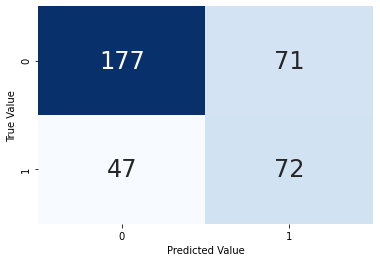

In [16]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [17]:
r_probs = [0 for _ in range(len(Y_v_test_data))]
cb_prob = cb.predict_proba(X_v_test_data)
cb_prob = cb_prob[:,1]
#cb_prob

In [18]:
prediction_val=cb.predict(X_v_test_data)

In [19]:
prediction_val=pd.DataFrame(prediction_val)

In [20]:
prediction_val.to_csv("CB_2048_Valitation_Prediction.csv")

In [21]:
r_auc_score = roc_auc_score(Y_v_test_data, cb_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, cb_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.7225196530224993


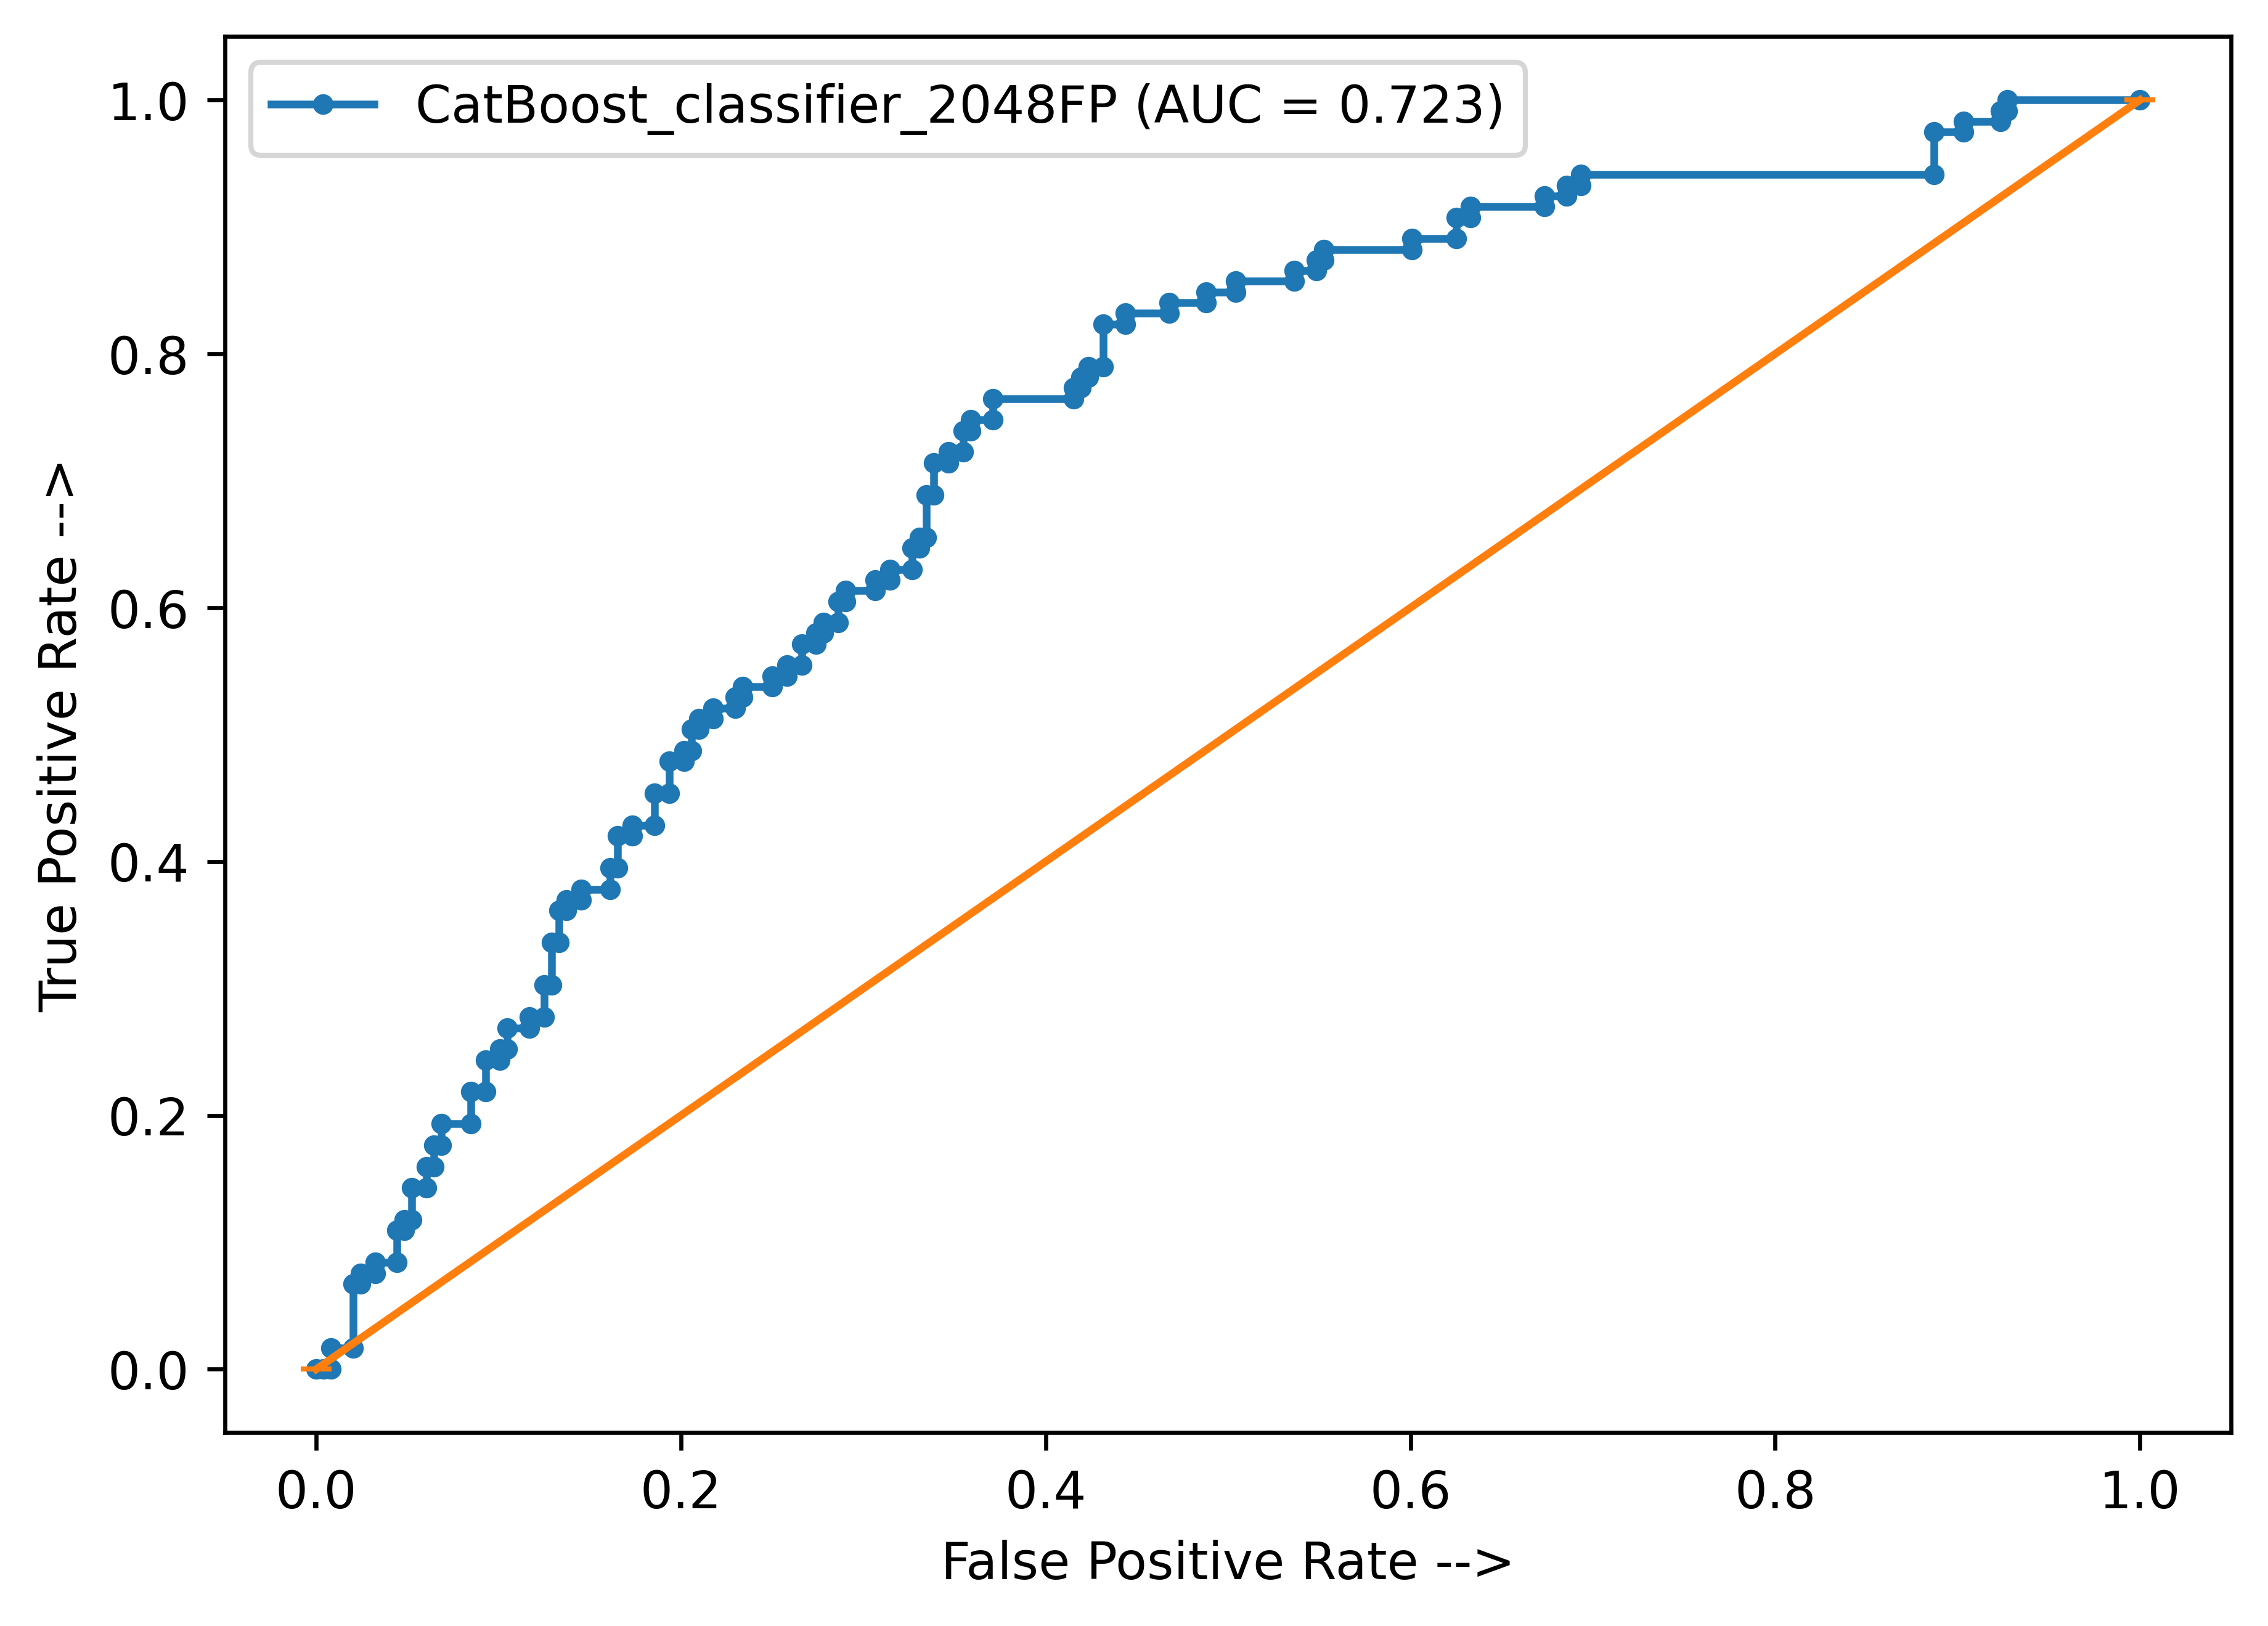

In [22]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='CatBoost_classifier_2048FP (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()
#plt.savefig('CB_AUC_1024.png', dpi=600, bbox_inches='tight')

In [23]:
#Read external set
external_data = pd.read_csv("cyclic_ind_16-09-2022_morgan_chiral_2048FP.csv")
data_for_screening = pd.DataFrame(external_data)
data_for_screening

FP1  FP2  FP3  FP4  FP5  FP6  FP7  FP8  FP9  FP10  ...  FP2039  FP2040  \
0        0    0    0    0    0    0    0    0    0     0  ...       0       0   
1        0    0    0    0    0    0    0    0    1     0  ...       0       0   
2        0    0    0    0    0    0    0    0    0     0  ...       1       0   
3        0    1    0    0    0    0    0    1    0     0  ...       0       0   
4        0    0    0    0    0    0    0    0    0     0  ...       0       0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...     ...   
11141    0    0    0    0    0    0    0    0    0     0  ...       0       0   
11142    0    0    0    0    0    0    0    0    0     0  ...       0       0   
11143    0    0    1    0    0    0    0    0    0     1  ...       0       0   
11144    0    1    0    0    0    0    0    0    0     0  ...       0       0   
11145    0    1    0    0    0    0    0    0    0     0  ...       0       0   

       FP2041  FP2042  FP2043  FP2044  FP2045  FP2046  FP2047  FP2048  
0           0       0       0       0       0       0       0       0  
1           0       0       0       0       0       0       0       0  
2           0       0       0       0       0       0       0       0  
3           0       0       0       0       0       0       0       0  
4           0       0       0       0       0       1       0       0  
...       ...     ...     ...     ...     ...     ...     ...     ...  
11141       0       0       0       0       0       0       0       0  
11142       1       0       0       0       0       0       1       0  
11143       0       0       0       0       0       0       0       0  
11144       0       0       0       0       0       0       0       0  
11145       0       0       0       0       0       0       0       0  

[11146 rows x 2048 columns]

In [24]:
#test external data
test_prob = cb.predict_proba(data_for_screening)
test_prob_F = pd.DataFrame(test_prob)
test_prob_F.to_csv('CB_2048FP_External_probability.csv')

In [25]:
prediction_ext=cb.predict(data_for_screening)
prediction_ext=pd.DataFrame(prediction_ext)
prediction_ext.to_csv("CB_2048_External_Prediction.csv")

## Cross validation AUC 

In [26]:
from sklearn.metrics import RocCurveDisplay

In [27]:
from scipy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

0:	learn: 0.6931405	total: 217ms	remaining: 7m 13s
1:	learn: 0.6931405	total: 474ms	remaining: 7m 53s
2:	learn: 0.6931359	total: 715ms	remaining: 7m 56s
3:	learn: 0.6931325	total: 742ms	remaining: 6m 10s
4:	learn: 0.6931289	total: 1.04s	remaining: 6m 54s
5:	learn: 0.6931248	total: 1.25s	remaining: 6m 56s
6:	learn: 0.6931153	total: 1.44s	remaining: 6m 50s
7:	learn: 0.6931074	total: 1.62s	remaining: 6m 43s
8:	learn: 0.6930997	total: 1.82s	remaining: 6m 43s
9:	learn: 0.6930972	total: 2s	remaining: 6m 39s
10:	learn: 0.6930928	total: 2.33s	remaining: 7m 1s
11:	learn: 0.6930886	total: 2.55s	remaining: 7m 1s
12:	learn: 0.6930857	total: 2.79s	remaining: 7m 6s
13:	learn: 0.6930827	total: 2.99s	remaining: 7m 3s
14:	learn: 0.6930779	total: 3.18s	remaining: 7m 1s
15:	learn: 0.6930741	total: 3.38s	remaining: 6m 59s
16:	learn: 0.6930707	total: 3.57s	remaining: 6m 57s
17:	learn: 0.6930682	total: 3.78s	remaining: 6m 56s
18:	learn: 0.6930642	total: 4.04s	remaining: 7m 1s
19:	learn: 0.6930618	total: 4.2

161:	learn: 0.6923904	total: 31s	remaining: 5m 51s
162:	learn: 0.6923856	total: 31.1s	remaining: 5m 50s
163:	learn: 0.6923809	total: 31.3s	remaining: 5m 50s
164:	learn: 0.6923726	total: 31.5s	remaining: 5m 50s
165:	learn: 0.6923694	total: 31.7s	remaining: 5m 50s
166:	learn: 0.6923637	total: 31.9s	remaining: 5m 50s
167:	learn: 0.6923577	total: 32.1s	remaining: 5m 50s
168:	learn: 0.6923535	total: 32.3s	remaining: 5m 49s
169:	learn: 0.6923487	total: 32.4s	remaining: 5m 49s
170:	learn: 0.6923423	total: 32.6s	remaining: 5m 48s
171:	learn: 0.6923375	total: 32.8s	remaining: 5m 48s
172:	learn: 0.6923334	total: 33s	remaining: 5m 48s
173:	learn: 0.6923300	total: 33.1s	remaining: 5m 47s
174:	learn: 0.6923261	total: 33.3s	remaining: 5m 47s
175:	learn: 0.6923218	total: 33.5s	remaining: 5m 47s
176:	learn: 0.6923164	total: 33.6s	remaining: 5m 46s
177:	learn: 0.6923131	total: 33.8s	remaining: 5m 45s
178:	learn: 0.6923102	total: 34s	remaining: 5m 45s
179:	learn: 0.6923020	total: 34.1s	remaining: 5m 45s

318:	learn: 0.6916869	total: 59.5s	remaining: 5m 13s
319:	learn: 0.6916831	total: 59.7s	remaining: 5m 13s
320:	learn: 0.6916771	total: 59.9s	remaining: 5m 13s
321:	learn: 0.6916672	total: 1m	remaining: 5m 12s
322:	learn: 0.6916625	total: 1m	remaining: 5m 12s
323:	learn: 0.6916590	total: 1m	remaining: 5m 12s
324:	learn: 0.6916548	total: 1m	remaining: 5m 12s
325:	learn: 0.6916499	total: 1m	remaining: 5m 12s
326:	learn: 0.6916448	total: 1m 1s	remaining: 5m 12s
327:	learn: 0.6916413	total: 1m 1s	remaining: 5m 12s
328:	learn: 0.6916344	total: 1m 1s	remaining: 5m 12s
329:	learn: 0.6916292	total: 1m 1s	remaining: 5m 11s
330:	learn: 0.6916235	total: 1m 1s	remaining: 5m 11s
331:	learn: 0.6916188	total: 1m 2s	remaining: 5m 11s
332:	learn: 0.6916131	total: 1m 2s	remaining: 5m 11s
333:	learn: 0.6916074	total: 1m 2s	remaining: 5m 11s
334:	learn: 0.6916020	total: 1m 2s	remaining: 5m 11s
335:	learn: 0.6915970	total: 1m 2s	remaining: 5m 11s
336:	learn: 0.6915924	total: 1m 3s	remaining: 5m 11s
337:	lea

473:	learn: 0.6909679	total: 1m 27s	remaining: 4m 42s
474:	learn: 0.6909620	total: 1m 28s	remaining: 4m 42s
475:	learn: 0.6909578	total: 1m 28s	remaining: 4m 42s
476:	learn: 0.6909558	total: 1m 28s	remaining: 4m 42s
477:	learn: 0.6909519	total: 1m 28s	remaining: 4m 42s
478:	learn: 0.6909486	total: 1m 28s	remaining: 4m 41s
479:	learn: 0.6909424	total: 1m 28s	remaining: 4m 41s
480:	learn: 0.6909393	total: 1m 29s	remaining: 4m 41s
481:	learn: 0.6909332	total: 1m 29s	remaining: 4m 41s
482:	learn: 0.6909291	total: 1m 29s	remaining: 4m 41s
483:	learn: 0.6909235	total: 1m 29s	remaining: 4m 41s
484:	learn: 0.6909184	total: 1m 29s	remaining: 4m 40s
485:	learn: 0.6909151	total: 1m 29s	remaining: 4m 40s
486:	learn: 0.6909116	total: 1m 30s	remaining: 4m 40s
487:	learn: 0.6909073	total: 1m 30s	remaining: 4m 39s
488:	learn: 0.6909026	total: 1m 30s	remaining: 4m 39s
489:	learn: 0.6908952	total: 1m 30s	remaining: 4m 39s
490:	learn: 0.6908914	total: 1m 30s	remaining: 4m 39s
491:	learn: 0.6908866	total:

625:	learn: 0.6903279	total: 1m 55s	remaining: 4m 12s
626:	learn: 0.6903225	total: 1m 55s	remaining: 4m 12s
627:	learn: 0.6903188	total: 1m 55s	remaining: 4m 12s
628:	learn: 0.6903140	total: 1m 55s	remaining: 4m 12s
629:	learn: 0.6903104	total: 1m 55s	remaining: 4m 11s
630:	learn: 0.6903057	total: 1m 56s	remaining: 4m 11s
631:	learn: 0.6903015	total: 1m 56s	remaining: 4m 11s
632:	learn: 0.6902965	total: 1m 56s	remaining: 4m 11s
633:	learn: 0.6902925	total: 1m 56s	remaining: 4m 11s
634:	learn: 0.6902891	total: 1m 56s	remaining: 4m 11s
635:	learn: 0.6902854	total: 1m 57s	remaining: 4m 10s
636:	learn: 0.6902819	total: 1m 57s	remaining: 4m 10s
637:	learn: 0.6902784	total: 1m 57s	remaining: 4m 10s
638:	learn: 0.6902699	total: 1m 57s	remaining: 4m 10s
639:	learn: 0.6902635	total: 1m 57s	remaining: 4m 10s
640:	learn: 0.6902602	total: 1m 57s	remaining: 4m 9s
641:	learn: 0.6902538	total: 1m 58s	remaining: 4m 9s
642:	learn: 0.6902486	total: 1m 58s	remaining: 4m 9s
643:	learn: 0.6902436	total: 1m

780:	learn: 0.6896298	total: 2m 23s	remaining: 3m 43s
781:	learn: 0.6896190	total: 2m 23s	remaining: 3m 43s
782:	learn: 0.6896164	total: 2m 23s	remaining: 3m 43s
783:	learn: 0.6896118	total: 2m 24s	remaining: 3m 43s
784:	learn: 0.6896081	total: 2m 24s	remaining: 3m 43s
785:	learn: 0.6896036	total: 2m 24s	remaining: 3m 42s
786:	learn: 0.6896006	total: 2m 24s	remaining: 3m 42s
787:	learn: 0.6895967	total: 2m 24s	remaining: 3m 42s
788:	learn: 0.6895930	total: 2m 24s	remaining: 3m 42s
789:	learn: 0.6895905	total: 2m 25s	remaining: 3m 42s
790:	learn: 0.6895861	total: 2m 25s	remaining: 3m 42s
791:	learn: 0.6895825	total: 2m 25s	remaining: 3m 42s
792:	learn: 0.6895778	total: 2m 25s	remaining: 3m 41s
793:	learn: 0.6895720	total: 2m 25s	remaining: 3m 41s
794:	learn: 0.6895680	total: 2m 26s	remaining: 3m 41s
795:	learn: 0.6895641	total: 2m 26s	remaining: 3m 41s
796:	learn: 0.6895602	total: 2m 26s	remaining: 3m 41s
797:	learn: 0.6895540	total: 2m 26s	remaining: 3m 41s
798:	learn: 0.6895507	total:

932:	learn: 0.6889762	total: 2m 51s	remaining: 3m 15s
933:	learn: 0.6889729	total: 2m 51s	remaining: 3m 15s
934:	learn: 0.6889667	total: 2m 51s	remaining: 3m 15s
935:	learn: 0.6889627	total: 2m 51s	remaining: 3m 15s
936:	learn: 0.6889563	total: 2m 51s	remaining: 3m 14s
937:	learn: 0.6889518	total: 2m 51s	remaining: 3m 14s
938:	learn: 0.6889481	total: 2m 52s	remaining: 3m 14s
939:	learn: 0.6889446	total: 2m 52s	remaining: 3m 14s
940:	learn: 0.6889398	total: 2m 52s	remaining: 3m 14s
941:	learn: 0.6889368	total: 2m 52s	remaining: 3m 13s
942:	learn: 0.6889317	total: 2m 52s	remaining: 3m 13s
943:	learn: 0.6889277	total: 2m 52s	remaining: 3m 13s
944:	learn: 0.6889189	total: 2m 53s	remaining: 3m 13s
945:	learn: 0.6889137	total: 2m 53s	remaining: 3m 12s
946:	learn: 0.6889107	total: 2m 53s	remaining: 3m 12s
947:	learn: 0.6889080	total: 2m 53s	remaining: 3m 12s
948:	learn: 0.6889045	total: 2m 53s	remaining: 3m 12s
949:	learn: 0.6888988	total: 2m 53s	remaining: 3m 12s
950:	learn: 0.6888950	total:

1085:	learn: 0.6882692	total: 3m 19s	remaining: 2m 47s
1086:	learn: 0.6882642	total: 3m 19s	remaining: 2m 47s
1087:	learn: 0.6882613	total: 3m 19s	remaining: 2m 47s
1088:	learn: 0.6882586	total: 3m 19s	remaining: 2m 47s
1089:	learn: 0.6882534	total: 3m 20s	remaining: 2m 46s
1090:	learn: 0.6882480	total: 3m 20s	remaining: 2m 46s
1091:	learn: 0.6882440	total: 3m 20s	remaining: 2m 46s
1092:	learn: 0.6882395	total: 3m 20s	remaining: 2m 46s
1093:	learn: 0.6882383	total: 3m 20s	remaining: 2m 46s
1094:	learn: 0.6882344	total: 3m 20s	remaining: 2m 45s
1095:	learn: 0.6882310	total: 3m 20s	remaining: 2m 45s
1096:	learn: 0.6882279	total: 3m 21s	remaining: 2m 45s
1097:	learn: 0.6882221	total: 3m 21s	remaining: 2m 45s
1098:	learn: 0.6882184	total: 3m 21s	remaining: 2m 45s
1099:	learn: 0.6882147	total: 3m 21s	remaining: 2m 45s
1100:	learn: 0.6882109	total: 3m 21s	remaining: 2m 44s
1101:	learn: 0.6881999	total: 3m 22s	remaining: 2m 44s
1102:	learn: 0.6881956	total: 3m 22s	remaining: 2m 44s
1103:	lear

1234:	learn: 0.6875975	total: 3m 47s	remaining: 2m 21s
1235:	learn: 0.6875946	total: 3m 48s	remaining: 2m 21s
1236:	learn: 0.6875910	total: 3m 48s	remaining: 2m 20s
1237:	learn: 0.6875873	total: 3m 48s	remaining: 2m 20s
1238:	learn: 0.6875817	total: 3m 48s	remaining: 2m 20s
1239:	learn: 0.6875768	total: 3m 49s	remaining: 2m 20s
1240:	learn: 0.6875719	total: 3m 49s	remaining: 2m 20s
1241:	learn: 0.6875629	total: 3m 49s	remaining: 2m 20s
1242:	learn: 0.6875569	total: 3m 49s	remaining: 2m 19s
1243:	learn: 0.6875507	total: 3m 49s	remaining: 2m 19s
1244:	learn: 0.6875473	total: 3m 50s	remaining: 2m 19s
1245:	learn: 0.6875442	total: 3m 50s	remaining: 2m 19s
1246:	learn: 0.6875401	total: 3m 50s	remaining: 2m 19s
1247:	learn: 0.6875357	total: 3m 50s	remaining: 2m 18s
1248:	learn: 0.6875327	total: 3m 50s	remaining: 2m 18s
1249:	learn: 0.6875296	total: 3m 50s	remaining: 2m 18s
1250:	learn: 0.6875262	total: 3m 51s	remaining: 2m 18s
1251:	learn: 0.6875220	total: 3m 51s	remaining: 2m 18s
1252:	lear

1387:	learn: 0.6869311	total: 4m 17s	remaining: 1m 53s
1388:	learn: 0.6869265	total: 4m 17s	remaining: 1m 53s
1389:	learn: 0.6869201	total: 4m 17s	remaining: 1m 53s
1390:	learn: 0.6869119	total: 4m 17s	remaining: 1m 52s
1391:	learn: 0.6869076	total: 4m 17s	remaining: 1m 52s
1392:	learn: 0.6869040	total: 4m 18s	remaining: 1m 52s
1393:	learn: 0.6869000	total: 4m 18s	remaining: 1m 52s
1394:	learn: 0.6868976	total: 4m 18s	remaining: 1m 52s
1395:	learn: 0.6868856	total: 4m 18s	remaining: 1m 51s
1396:	learn: 0.6868809	total: 4m 18s	remaining: 1m 51s
1397:	learn: 0.6868756	total: 4m 19s	remaining: 1m 51s
1398:	learn: 0.6868703	total: 4m 19s	remaining: 1m 51s
1399:	learn: 0.6868648	total: 4m 19s	remaining: 1m 51s
1400:	learn: 0.6868611	total: 4m 19s	remaining: 1m 51s
1401:	learn: 0.6868558	total: 4m 19s	remaining: 1m 50s
1402:	learn: 0.6868526	total: 4m 20s	remaining: 1m 50s
1403:	learn: 0.6868477	total: 4m 20s	remaining: 1m 50s
1404:	learn: 0.6868448	total: 4m 20s	remaining: 1m 50s
1405:	lear

1536:	learn: 0.6862556	total: 4m 43s	remaining: 1m 25s
1537:	learn: 0.6862498	total: 4m 44s	remaining: 1m 25s
1538:	learn: 0.6862458	total: 4m 44s	remaining: 1m 25s
1539:	learn: 0.6862425	total: 4m 44s	remaining: 1m 24s
1540:	learn: 0.6862384	total: 4m 44s	remaining: 1m 24s
1541:	learn: 0.6862340	total: 4m 44s	remaining: 1m 24s
1542:	learn: 0.6862287	total: 4m 45s	remaining: 1m 24s
1543:	learn: 0.6862254	total: 4m 45s	remaining: 1m 24s
1544:	learn: 0.6862198	total: 4m 45s	remaining: 1m 24s
1545:	learn: 0.6862153	total: 4m 45s	remaining: 1m 23s
1546:	learn: 0.6862112	total: 4m 46s	remaining: 1m 23s
1547:	learn: 0.6862065	total: 4m 46s	remaining: 1m 23s
1548:	learn: 0.6862029	total: 4m 46s	remaining: 1m 23s
1549:	learn: 0.6861998	total: 4m 46s	remaining: 1m 23s
1550:	learn: 0.6861921	total: 4m 46s	remaining: 1m 22s
1551:	learn: 0.6861895	total: 4m 46s	remaining: 1m 22s
1552:	learn: 0.6861856	total: 4m 47s	remaining: 1m 22s
1553:	learn: 0.6861826	total: 4m 47s	remaining: 1m 22s
1554:	lear

1688:	learn: 0.6855978	total: 5m 12s	remaining: 57.5s
1689:	learn: 0.6855943	total: 5m 12s	remaining: 57.3s
1690:	learn: 0.6855851	total: 5m 12s	remaining: 57.1s
1691:	learn: 0.6855798	total: 5m 12s	remaining: 56.9s
1692:	learn: 0.6855747	total: 5m 13s	remaining: 56.8s
1693:	learn: 0.6855707	total: 5m 13s	remaining: 56.6s
1694:	learn: 0.6855667	total: 5m 13s	remaining: 56.4s
1695:	learn: 0.6855580	total: 5m 13s	remaining: 56.2s
1696:	learn: 0.6855552	total: 5m 13s	remaining: 56s
1697:	learn: 0.6855524	total: 5m 14s	remaining: 55.9s
1698:	learn: 0.6855485	total: 5m 14s	remaining: 55.7s
1699:	learn: 0.6855448	total: 5m 14s	remaining: 55.5s
1700:	learn: 0.6855413	total: 5m 14s	remaining: 55.3s
1701:	learn: 0.6855373	total: 5m 14s	remaining: 55.1s
1702:	learn: 0.6855248	total: 5m 15s	remaining: 54.9s
1703:	learn: 0.6855189	total: 5m 15s	remaining: 54.8s
1704:	learn: 0.6855138	total: 5m 15s	remaining: 54.6s
1705:	learn: 0.6855093	total: 5m 15s	remaining: 54.4s
1706:	learn: 0.6855050	total: 

1842:	learn: 0.6848892	total: 5m 39s	remaining: 28.9s
1843:	learn: 0.6848866	total: 5m 40s	remaining: 28.8s
1844:	learn: 0.6848834	total: 5m 40s	remaining: 28.6s
1845:	learn: 0.6848780	total: 5m 40s	remaining: 28.4s
1846:	learn: 0.6848728	total: 5m 40s	remaining: 28.2s
1847:	learn: 0.6848686	total: 5m 40s	remaining: 28s
1848:	learn: 0.6848644	total: 5m 40s	remaining: 27.8s
1849:	learn: 0.6848580	total: 5m 41s	remaining: 27.6s
1850:	learn: 0.6848533	total: 5m 41s	remaining: 27.5s
1851:	learn: 0.6848502	total: 5m 41s	remaining: 27.3s
1852:	learn: 0.6848452	total: 5m 41s	remaining: 27.1s
1853:	learn: 0.6848411	total: 5m 41s	remaining: 26.9s
1854:	learn: 0.6848374	total: 5m 42s	remaining: 26.7s
1855:	learn: 0.6848284	total: 5m 42s	remaining: 26.6s
1856:	learn: 0.6848247	total: 5m 42s	remaining: 26.4s
1857:	learn: 0.6848196	total: 5m 42s	remaining: 26.2s
1858:	learn: 0.6848168	total: 5m 42s	remaining: 26s
1859:	learn: 0.6848123	total: 5m 42s	remaining: 25.8s
1860:	learn: 0.6848090	total: 5m

1996:	learn: 0.6842287	total: 6m 9s	remaining: 554ms
1997:	learn: 0.6842249	total: 6m 9s	remaining: 370ms
1998:	learn: 0.6842220	total: 6m 9s	remaining: 185ms
1999:	learn: 0.6842164	total: 6m 9s	remaining: 0us


<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931430	total: 196ms	remaining: 6m 31s
1:	learn: 0.6931375	total: 370ms	remaining: 6m 9s
2:	learn: 0.6931305	total: 611ms	remaining: 6m 46s
3:	learn: 0.6931291	total: 807ms	remaining: 6m 42s
4:	learn: 0.6931240	total: 1.04s	remaining: 6m 57s
5:	learn: 0.6931173	total: 1.21s	remaining: 6m 40s
6:	learn: 0.6931134	total: 1.38s	remaining: 6m 32s
7:	learn: 0.6931088	total: 1.55s	remaining: 6m 26s
8:	learn: 0.6931052	total: 1.74s	remaining: 6m 25s
9:	learn: 0.6931012	total: 1.92s	remaining: 6m 22s
10:	learn: 0.6930953	total: 2.12s	remaining: 6m 22s
11:	learn: 0.6930900	total: 2.32s	remaining: 6m 24s
12:	learn: 0.6930830	total: 2.5s	remaining: 6m 22s
13:	learn: 0.6930795	total: 2.69s	remaining: 6m 21s
14:	learn: 0.6930759	total: 2.89s	remaining: 6m 21s
15:	learn: 0.6930739	total: 3.05s	remaining: 6m 18s
16:	learn: 0.6930714	total: 3.23s	remaining: 6m 16s
17:	learn: 0.6930659	total: 3.42s	remaining: 6m 17s
18:	learn: 0.6930616	total: 3.59s	remaining: 6m 14s
19:	learn: 0.6930584	tot

159:	learn: 0.6924306	total: 30.8s	remaining: 5m 53s
160:	learn: 0.6924263	total: 31s	remaining: 5m 54s
161:	learn: 0.6924222	total: 31.2s	remaining: 5m 54s
162:	learn: 0.6924103	total: 31.4s	remaining: 5m 54s
163:	learn: 0.6924061	total: 31.6s	remaining: 5m 53s
164:	learn: 0.6924019	total: 31.8s	remaining: 5m 53s
165:	learn: 0.6923990	total: 32s	remaining: 5m 53s
166:	learn: 0.6923960	total: 32.1s	remaining: 5m 52s
167:	learn: 0.6923920	total: 32.3s	remaining: 5m 52s
168:	learn: 0.6923844	total: 32.5s	remaining: 5m 52s
169:	learn: 0.6923818	total: 32.7s	remaining: 5m 51s
170:	learn: 0.6923786	total: 32.9s	remaining: 5m 51s
171:	learn: 0.6923740	total: 33.1s	remaining: 5m 51s
172:	learn: 0.6923698	total: 33.3s	remaining: 5m 51s
173:	learn: 0.6923670	total: 33.5s	remaining: 5m 51s
174:	learn: 0.6923627	total: 33.6s	remaining: 5m 50s
175:	learn: 0.6923599	total: 33.8s	remaining: 5m 50s
176:	learn: 0.6923541	total: 34s	remaining: 5m 50s
177:	learn: 0.6923478	total: 34.3s	remaining: 5m 50s

316:	learn: 0.6917142	total: 1m	remaining: 5m 22s
317:	learn: 0.6917107	total: 1m	remaining: 5m 21s
318:	learn: 0.6917069	total: 1m 1s	remaining: 5m 21s
319:	learn: 0.6917017	total: 1m 1s	remaining: 5m 21s
320:	learn: 0.6916977	total: 1m 1s	remaining: 5m 21s
321:	learn: 0.6916944	total: 1m 1s	remaining: 5m 21s
322:	learn: 0.6916830	total: 1m 1s	remaining: 5m 20s
323:	learn: 0.6916784	total: 1m 1s	remaining: 5m 20s
324:	learn: 0.6916737	total: 1m 2s	remaining: 5m 20s
325:	learn: 0.6916691	total: 1m 2s	remaining: 5m 20s
326:	learn: 0.6916647	total: 1m 2s	remaining: 5m 20s
327:	learn: 0.6916618	total: 1m 2s	remaining: 5m 19s
328:	learn: 0.6916568	total: 1m 2s	remaining: 5m 19s
329:	learn: 0.6916533	total: 1m 3s	remaining: 5m 19s
330:	learn: 0.6916481	total: 1m 3s	remaining: 5m 19s
331:	learn: 0.6916433	total: 1m 3s	remaining: 5m 19s
332:	learn: 0.6916361	total: 1m 3s	remaining: 5m 19s
333:	learn: 0.6916317	total: 1m 3s	remaining: 5m 19s
334:	learn: 0.6916275	total: 1m 4s	remaining: 5m 18s

470:	learn: 0.6910387	total: 1m 29s	remaining: 4m 50s
471:	learn: 0.6910358	total: 1m 29s	remaining: 4m 50s
472:	learn: 0.6910263	total: 1m 29s	remaining: 4m 49s
473:	learn: 0.6910230	total: 1m 29s	remaining: 4m 49s
474:	learn: 0.6910190	total: 1m 30s	remaining: 4m 49s
475:	learn: 0.6910135	total: 1m 30s	remaining: 4m 49s
476:	learn: 0.6910103	total: 1m 30s	remaining: 4m 48s
477:	learn: 0.6910060	total: 1m 30s	remaining: 4m 48s
478:	learn: 0.6910038	total: 1m 30s	remaining: 4m 48s
479:	learn: 0.6909993	total: 1m 31s	remaining: 4m 48s
480:	learn: 0.6909911	total: 1m 31s	remaining: 4m 48s
481:	learn: 0.6909875	total: 1m 31s	remaining: 4m 48s
482:	learn: 0.6909843	total: 1m 31s	remaining: 4m 48s
483:	learn: 0.6909785	total: 1m 31s	remaining: 4m 47s
484:	learn: 0.6909737	total: 1m 32s	remaining: 4m 47s
485:	learn: 0.6909708	total: 1m 32s	remaining: 4m 47s
486:	learn: 0.6909652	total: 1m 32s	remaining: 4m 47s
487:	learn: 0.6909603	total: 1m 32s	remaining: 4m 47s
488:	learn: 0.6909553	total:

622:	learn: 0.6903855	total: 1m 58s	remaining: 4m 21s
623:	learn: 0.6903816	total: 1m 58s	remaining: 4m 21s
624:	learn: 0.6903778	total: 1m 58s	remaining: 4m 21s
625:	learn: 0.6903740	total: 1m 58s	remaining: 4m 21s
626:	learn: 0.6903707	total: 1m 59s	remaining: 4m 20s
627:	learn: 0.6903619	total: 1m 59s	remaining: 4m 20s
628:	learn: 0.6903591	total: 1m 59s	remaining: 4m 20s
629:	learn: 0.6903563	total: 1m 59s	remaining: 4m 20s
630:	learn: 0.6903526	total: 1m 59s	remaining: 4m 20s
631:	learn: 0.6903501	total: 2m	remaining: 4m 19s
632:	learn: 0.6903471	total: 2m	remaining: 4m 19s
633:	learn: 0.6903421	total: 2m	remaining: 4m 19s
634:	learn: 0.6903395	total: 2m	remaining: 4m 19s
635:	learn: 0.6903353	total: 2m	remaining: 4m 19s
636:	learn: 0.6903293	total: 2m	remaining: 4m 18s
637:	learn: 0.6903259	total: 2m 1s	remaining: 4m 18s
638:	learn: 0.6903234	total: 2m 1s	remaining: 4m 18s
639:	learn: 0.6903196	total: 2m 1s	remaining: 4m 18s
640:	learn: 0.6903166	total: 2m 1s	remaining: 4m 17s
64

778:	learn: 0.6897139	total: 2m 27s	remaining: 3m 50s
779:	learn: 0.6897112	total: 2m 27s	remaining: 3m 50s
780:	learn: 0.6897047	total: 2m 27s	remaining: 3m 50s
781:	learn: 0.6896990	total: 2m 27s	remaining: 3m 50s
782:	learn: 0.6896955	total: 2m 28s	remaining: 3m 50s
783:	learn: 0.6896912	total: 2m 28s	remaining: 3m 49s
784:	learn: 0.6896838	total: 2m 28s	remaining: 3m 49s
785:	learn: 0.6896786	total: 2m 28s	remaining: 3m 49s
786:	learn: 0.6896749	total: 2m 28s	remaining: 3m 49s
787:	learn: 0.6896705	total: 2m 29s	remaining: 3m 49s
788:	learn: 0.6896677	total: 2m 29s	remaining: 3m 49s
789:	learn: 0.6896645	total: 2m 29s	remaining: 3m 48s
790:	learn: 0.6896610	total: 2m 29s	remaining: 3m 48s
791:	learn: 0.6896567	total: 2m 29s	remaining: 3m 48s
792:	learn: 0.6896523	total: 2m 29s	remaining: 3m 48s
793:	learn: 0.6896486	total: 2m 30s	remaining: 3m 48s
794:	learn: 0.6896437	total: 2m 30s	remaining: 3m 47s
795:	learn: 0.6896369	total: 2m 30s	remaining: 3m 47s
796:	learn: 0.6896330	total:

930:	learn: 0.6890582	total: 2m 55s	remaining: 3m 21s
931:	learn: 0.6890536	total: 2m 55s	remaining: 3m 21s
932:	learn: 0.6890507	total: 2m 56s	remaining: 3m 21s
933:	learn: 0.6890469	total: 2m 56s	remaining: 3m 21s
934:	learn: 0.6890436	total: 2m 56s	remaining: 3m 21s
935:	learn: 0.6890373	total: 2m 56s	remaining: 3m 20s
936:	learn: 0.6890347	total: 2m 56s	remaining: 3m 20s
937:	learn: 0.6890319	total: 2m 57s	remaining: 3m 20s
938:	learn: 0.6890287	total: 2m 57s	remaining: 3m 20s
939:	learn: 0.6890233	total: 2m 57s	remaining: 3m 20s
940:	learn: 0.6890189	total: 2m 57s	remaining: 3m 20s
941:	learn: 0.6890143	total: 2m 57s	remaining: 3m 19s
942:	learn: 0.6890103	total: 2m 58s	remaining: 3m 19s
943:	learn: 0.6890074	total: 2m 58s	remaining: 3m 19s
944:	learn: 0.6890039	total: 2m 58s	remaining: 3m 19s
945:	learn: 0.6889993	total: 2m 58s	remaining: 3m 19s
946:	learn: 0.6889950	total: 2m 58s	remaining: 3m 19s
947:	learn: 0.6889905	total: 2m 59s	remaining: 3m 18s
948:	learn: 0.6889868	total:

1084:	learn: 0.6884068	total: 3m 25s	remaining: 2m 53s
1085:	learn: 0.6884012	total: 3m 25s	remaining: 2m 53s
1086:	learn: 0.6883979	total: 3m 25s	remaining: 2m 52s
1087:	learn: 0.6883941	total: 3m 26s	remaining: 2m 52s
1088:	learn: 0.6883886	total: 3m 26s	remaining: 2m 52s
1089:	learn: 0.6883859	total: 3m 26s	remaining: 2m 52s
1090:	learn: 0.6883827	total: 3m 26s	remaining: 2m 52s
1091:	learn: 0.6883771	total: 3m 26s	remaining: 2m 52s
1092:	learn: 0.6883739	total: 3m 27s	remaining: 2m 51s
1093:	learn: 0.6883706	total: 3m 27s	remaining: 2m 51s
1094:	learn: 0.6883672	total: 3m 27s	remaining: 2m 51s
1095:	learn: 0.6883659	total: 3m 27s	remaining: 2m 51s
1096:	learn: 0.6883614	total: 3m 27s	remaining: 2m 50s
1097:	learn: 0.6883578	total: 3m 27s	remaining: 2m 50s
1098:	learn: 0.6883559	total: 3m 28s	remaining: 2m 50s
1099:	learn: 0.6883515	total: 3m 28s	remaining: 2m 50s
1100:	learn: 0.6883458	total: 3m 28s	remaining: 2m 50s
1101:	learn: 0.6883422	total: 3m 28s	remaining: 2m 50s
1102:	lear

1234:	learn: 0.6877542	total: 3m 54s	remaining: 2m 24s
1235:	learn: 0.6877500	total: 3m 54s	remaining: 2m 24s
1236:	learn: 0.6877489	total: 3m 54s	remaining: 2m 24s
1237:	learn: 0.6877429	total: 3m 54s	remaining: 2m 24s
1238:	learn: 0.6877384	total: 3m 54s	remaining: 2m 24s
1239:	learn: 0.6877334	total: 3m 54s	remaining: 2m 23s
1240:	learn: 0.6877288	total: 3m 54s	remaining: 2m 23s
1241:	learn: 0.6877239	total: 3m 55s	remaining: 2m 23s
1242:	learn: 0.6877204	total: 3m 55s	remaining: 2m 23s
1243:	learn: 0.6877168	total: 3m 55s	remaining: 2m 23s
1244:	learn: 0.6877126	total: 3m 55s	remaining: 2m 22s
1245:	learn: 0.6877096	total: 3m 55s	remaining: 2m 22s
1246:	learn: 0.6877039	total: 3m 56s	remaining: 2m 22s
1247:	learn: 0.6877004	total: 3m 56s	remaining: 2m 22s
1248:	learn: 0.6876955	total: 3m 56s	remaining: 2m 22s
1249:	learn: 0.6876908	total: 3m 56s	remaining: 2m 22s
1250:	learn: 0.6876871	total: 3m 56s	remaining: 2m 21s
1251:	learn: 0.6876832	total: 3m 57s	remaining: 2m 21s
1252:	lear

1386:	learn: 0.6870881	total: 4m 23s	remaining: 1m 56s
1387:	learn: 0.6870847	total: 4m 24s	remaining: 1m 56s
1388:	learn: 0.6870793	total: 4m 24s	remaining: 1m 56s
1389:	learn: 0.6870756	total: 4m 24s	remaining: 1m 56s
1390:	learn: 0.6870709	total: 4m 24s	remaining: 1m 55s
1391:	learn: 0.6870645	total: 4m 24s	remaining: 1m 55s
1392:	learn: 0.6870595	total: 4m 24s	remaining: 1m 55s
1393:	learn: 0.6870561	total: 4m 25s	remaining: 1m 55s
1394:	learn: 0.6870516	total: 4m 25s	remaining: 1m 55s
1395:	learn: 0.6870489	total: 4m 25s	remaining: 1m 54s
1396:	learn: 0.6870458	total: 4m 25s	remaining: 1m 54s
1397:	learn: 0.6870422	total: 4m 25s	remaining: 1m 54s
1398:	learn: 0.6870345	total: 4m 26s	remaining: 1m 54s
1399:	learn: 0.6870309	total: 4m 26s	remaining: 1m 54s
1400:	learn: 0.6870258	total: 4m 26s	remaining: 1m 53s
1401:	learn: 0.6870223	total: 4m 26s	remaining: 1m 53s
1402:	learn: 0.6870185	total: 4m 26s	remaining: 1m 53s
1403:	learn: 0.6870150	total: 4m 26s	remaining: 1m 53s
1404:	lear

1535:	learn: 0.6864378	total: 4m 52s	remaining: 1m 28s
1536:	learn: 0.6864340	total: 4m 52s	remaining: 1m 28s
1537:	learn: 0.6864292	total: 4m 52s	remaining: 1m 27s
1538:	learn: 0.6864247	total: 4m 52s	remaining: 1m 27s
1539:	learn: 0.6864196	total: 4m 52s	remaining: 1m 27s
1540:	learn: 0.6864151	total: 4m 53s	remaining: 1m 27s
1541:	learn: 0.6864104	total: 4m 53s	remaining: 1m 27s
1542:	learn: 0.6864058	total: 4m 53s	remaining: 1m 26s
1543:	learn: 0.6864029	total: 4m 53s	remaining: 1m 26s
1544:	learn: 0.6863978	total: 4m 53s	remaining: 1m 26s
1545:	learn: 0.6863925	total: 4m 54s	remaining: 1m 26s
1546:	learn: 0.6863901	total: 4m 54s	remaining: 1m 26s
1547:	learn: 0.6863872	total: 4m 54s	remaining: 1m 25s
1548:	learn: 0.6863837	total: 4m 54s	remaining: 1m 25s
1549:	learn: 0.6863743	total: 4m 54s	remaining: 1m 25s
1550:	learn: 0.6863703	total: 4m 55s	remaining: 1m 25s
1551:	learn: 0.6863660	total: 4m 55s	remaining: 1m 25s
1552:	learn: 0.6863622	total: 4m 55s	remaining: 1m 25s
1553:	lear

1687:	learn: 0.6857330	total: 5m 20s	remaining: 59.3s
1688:	learn: 0.6857274	total: 5m 21s	remaining: 59.1s
1689:	learn: 0.6857239	total: 5m 21s	remaining: 58.9s
1690:	learn: 0.6857204	total: 5m 21s	remaining: 58.8s
1691:	learn: 0.6857155	total: 5m 21s	remaining: 58.6s
1692:	learn: 0.6857121	total: 5m 21s	remaining: 58.4s
1693:	learn: 0.6857078	total: 5m 22s	remaining: 58.2s
1694:	learn: 0.6857040	total: 5m 22s	remaining: 58s
1695:	learn: 0.6856981	total: 5m 22s	remaining: 57.8s
1696:	learn: 0.6856942	total: 5m 22s	remaining: 57.6s
1697:	learn: 0.6856909	total: 5m 22s	remaining: 57.4s
1698:	learn: 0.6856864	total: 5m 23s	remaining: 57.2s
1699:	learn: 0.6856826	total: 5m 23s	remaining: 57.1s
1700:	learn: 0.6856791	total: 5m 23s	remaining: 56.9s
1701:	learn: 0.6856747	total: 5m 23s	remaining: 56.7s
1702:	learn: 0.6856715	total: 5m 23s	remaining: 56.5s
1703:	learn: 0.6856687	total: 5m 24s	remaining: 56.3s
1704:	learn: 0.6856660	total: 5m 24s	remaining: 56.1s
1705:	learn: 0.6856598	total: 

1840:	learn: 0.6850866	total: 5m 50s	remaining: 30.3s
1841:	learn: 0.6850792	total: 5m 50s	remaining: 30.1s
1842:	learn: 0.6850723	total: 5m 50s	remaining: 29.9s
1843:	learn: 0.6850654	total: 5m 51s	remaining: 29.7s
1844:	learn: 0.6850609	total: 5m 51s	remaining: 29.5s
1845:	learn: 0.6850558	total: 5m 51s	remaining: 29.3s
1846:	learn: 0.6850498	total: 5m 51s	remaining: 29.1s
1847:	learn: 0.6850467	total: 5m 51s	remaining: 28.9s
1848:	learn: 0.6850428	total: 5m 51s	remaining: 28.7s
1849:	learn: 0.6850370	total: 5m 52s	remaining: 28.5s
1850:	learn: 0.6850339	total: 5m 52s	remaining: 28.4s
1851:	learn: 0.6850279	total: 5m 52s	remaining: 28.2s
1852:	learn: 0.6850223	total: 5m 52s	remaining: 28s
1853:	learn: 0.6850190	total: 5m 52s	remaining: 27.8s
1854:	learn: 0.6850153	total: 5m 52s	remaining: 27.6s
1855:	learn: 0.6850112	total: 5m 53s	remaining: 27.4s
1856:	learn: 0.6850028	total: 5m 53s	remaining: 27.2s
1857:	learn: 0.6849980	total: 5m 53s	remaining: 27s
1858:	learn: 0.6849908	total: 5m

1994:	learn: 0.6843935	total: 6m 20s	remaining: 952ms
1995:	learn: 0.6843895	total: 6m 20s	remaining: 762ms
1996:	learn: 0.6843846	total: 6m 20s	remaining: 572ms
1997:	learn: 0.6843803	total: 6m 20s	remaining: 381ms
1998:	learn: 0.6843756	total: 6m 20s	remaining: 191ms
1999:	learn: 0.6843674	total: 6m 21s	remaining: 0us


<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931409	total: 187ms	remaining: 6m 13s
1:	learn: 0.6931347	total: 370ms	remaining: 6m 10s
2:	learn: 0.6931332	total: 617ms	remaining: 6m 50s
3:	learn: 0.6931274	total: 788ms	remaining: 6m 33s
4:	learn: 0.6931238	total: 988ms	remaining: 6m 34s
5:	learn: 0.6931163	total: 1.18s	remaining: 6m 32s
6:	learn: 0.6931122	total: 1.38s	remaining: 6m 32s
7:	learn: 0.6931077	total: 1.56s	remaining: 6m 29s
8:	learn: 0.6931031	total: 1.74s	remaining: 6m 24s
9:	learn: 0.6930989	total: 1.96s	remaining: 6m 29s
10:	learn: 0.6930933	total: 2.17s	remaining: 6m 32s
11:	learn: 0.6930904	total: 2.35s	remaining: 6m 28s
12:	learn: 0.6930863	total: 2.51s	remaining: 6m 23s
13:	learn: 0.6930795	total: 2.68s	remaining: 6m 20s
14:	learn: 0.6930748	total: 2.88s	remaining: 6m 20s
15:	learn: 0.6930717	total: 3.04s	remaining: 6m 16s
16:	learn: 0.6930648	total: 3.21s	remaining: 6m 14s
17:	learn: 0.6930590	total: 3.4s	remaining: 6m 14s
18:	learn: 0.6930557	total: 3.65s	remaining: 6m 20s
19:	learn: 0.6930508	to

158:	learn: 0.6924554	total: 29.2s	remaining: 5m 38s
159:	learn: 0.6924499	total: 29.4s	remaining: 5m 38s
160:	learn: 0.6924449	total: 29.6s	remaining: 5m 38s
161:	learn: 0.6924393	total: 29.8s	remaining: 5m 38s
162:	learn: 0.6924344	total: 30s	remaining: 5m 38s
163:	learn: 0.6924307	total: 30.1s	remaining: 5m 37s
164:	learn: 0.6924236	total: 30.3s	remaining: 5m 37s
165:	learn: 0.6924173	total: 30.6s	remaining: 5m 37s
166:	learn: 0.6924117	total: 30.7s	remaining: 5m 37s
167:	learn: 0.6924094	total: 30.9s	remaining: 5m 37s
168:	learn: 0.6924022	total: 31.1s	remaining: 5m 36s
169:	learn: 0.6923968	total: 31.3s	remaining: 5m 36s
170:	learn: 0.6923924	total: 31.5s	remaining: 5m 36s
171:	learn: 0.6923870	total: 31.7s	remaining: 5m 36s
172:	learn: 0.6923817	total: 31.8s	remaining: 5m 36s
173:	learn: 0.6923791	total: 32s	remaining: 5m 36s
174:	learn: 0.6923745	total: 32.2s	remaining: 5m 35s
175:	learn: 0.6923713	total: 32.4s	remaining: 5m 36s
176:	learn: 0.6923655	total: 32.6s	remaining: 5m 3

315:	learn: 0.6917332	total: 59.2s	remaining: 5m 15s
316:	learn: 0.6917294	total: 59.4s	remaining: 5m 15s
317:	learn: 0.6917212	total: 59.6s	remaining: 5m 15s
318:	learn: 0.6917177	total: 59.9s	remaining: 5m 15s
319:	learn: 0.6917116	total: 1m	remaining: 5m 15s
320:	learn: 0.6917078	total: 1m	remaining: 5m 15s
321:	learn: 0.6917027	total: 1m	remaining: 5m 15s
322:	learn: 0.6916969	total: 1m	remaining: 5m 15s
323:	learn: 0.6916925	total: 1m	remaining: 5m 15s
324:	learn: 0.6916883	total: 1m 1s	remaining: 5m 14s
325:	learn: 0.6916823	total: 1m 1s	remaining: 5m 14s
326:	learn: 0.6916786	total: 1m 1s	remaining: 5m 14s
327:	learn: 0.6916751	total: 1m 1s	remaining: 5m 14s
328:	learn: 0.6916696	total: 1m 1s	remaining: 5m 14s
329:	learn: 0.6916661	total: 1m 2s	remaining: 5m 13s
330:	learn: 0.6916627	total: 1m 2s	remaining: 5m 13s
331:	learn: 0.6916571	total: 1m 2s	remaining: 5m 13s
332:	learn: 0.6916487	total: 1m 2s	remaining: 5m 13s
333:	learn: 0.6916428	total: 1m 2s	remaining: 5m 13s
334:	lea

470:	learn: 0.6910216	total: 1m 27s	remaining: 4m 44s
471:	learn: 0.6910167	total: 1m 27s	remaining: 4m 44s
472:	learn: 0.6910146	total: 1m 27s	remaining: 4m 43s
473:	learn: 0.6910103	total: 1m 28s	remaining: 4m 43s
474:	learn: 0.6910054	total: 1m 28s	remaining: 4m 43s
475:	learn: 0.6910014	total: 1m 28s	remaining: 4m 43s
476:	learn: 0.6909985	total: 1m 28s	remaining: 4m 42s
477:	learn: 0.6909938	total: 1m 28s	remaining: 4m 42s
478:	learn: 0.6909913	total: 1m 28s	remaining: 4m 42s
479:	learn: 0.6909869	total: 1m 29s	remaining: 4m 41s
480:	learn: 0.6909831	total: 1m 29s	remaining: 4m 41s
481:	learn: 0.6909766	total: 1m 29s	remaining: 4m 41s
482:	learn: 0.6909712	total: 1m 29s	remaining: 4m 41s
483:	learn: 0.6909666	total: 1m 29s	remaining: 4m 40s
484:	learn: 0.6909623	total: 1m 29s	remaining: 4m 40s
485:	learn: 0.6909583	total: 1m 29s	remaining: 4m 40s
486:	learn: 0.6909555	total: 1m 30s	remaining: 4m 40s
487:	learn: 0.6909497	total: 1m 30s	remaining: 4m 39s
488:	learn: 0.6909469	total:

623:	learn: 0.6903265	total: 1m 51s	remaining: 4m 6s
624:	learn: 0.6903229	total: 1m 51s	remaining: 4m 6s
625:	learn: 0.6903188	total: 1m 52s	remaining: 4m 5s
626:	learn: 0.6903127	total: 1m 52s	remaining: 4m 5s
627:	learn: 0.6903112	total: 1m 52s	remaining: 4m 5s
628:	learn: 0.6903044	total: 1m 52s	remaining: 4m 5s
629:	learn: 0.6902996	total: 1m 52s	remaining: 4m 4s
630:	learn: 0.6902967	total: 1m 52s	remaining: 4m 4s
631:	learn: 0.6902923	total: 1m 52s	remaining: 4m 4s
632:	learn: 0.6902861	total: 1m 52s	remaining: 4m 4s
633:	learn: 0.6902817	total: 1m 53s	remaining: 4m 3s
634:	learn: 0.6902800	total: 1m 53s	remaining: 4m 3s
635:	learn: 0.6902752	total: 1m 53s	remaining: 4m 3s
636:	learn: 0.6902692	total: 1m 53s	remaining: 4m 2s
637:	learn: 0.6902650	total: 1m 53s	remaining: 4m 2s
638:	learn: 0.6902601	total: 1m 53s	remaining: 4m 2s
639:	learn: 0.6902538	total: 1m 53s	remaining: 4m 2s
640:	learn: 0.6902515	total: 1m 53s	remaining: 4m 1s
641:	learn: 0.6902475	total: 1m 54s	remaining:

777:	learn: 0.6896332	total: 2m 15s	remaining: 3m 32s
778:	learn: 0.6896294	total: 2m 15s	remaining: 3m 32s
779:	learn: 0.6896224	total: 2m 15s	remaining: 3m 32s
780:	learn: 0.6896208	total: 2m 16s	remaining: 3m 32s
781:	learn: 0.6896170	total: 2m 16s	remaining: 3m 32s
782:	learn: 0.6896132	total: 2m 16s	remaining: 3m 31s
783:	learn: 0.6896086	total: 2m 16s	remaining: 3m 31s
784:	learn: 0.6896049	total: 2m 16s	remaining: 3m 31s
785:	learn: 0.6896021	total: 2m 16s	remaining: 3m 31s
786:	learn: 0.6895984	total: 2m 16s	remaining: 3m 31s
787:	learn: 0.6895925	total: 2m 17s	remaining: 3m 30s
788:	learn: 0.6895878	total: 2m 17s	remaining: 3m 30s
789:	learn: 0.6895827	total: 2m 17s	remaining: 3m 30s
790:	learn: 0.6895788	total: 2m 17s	remaining: 3m 30s
791:	learn: 0.6895734	total: 2m 17s	remaining: 3m 30s
792:	learn: 0.6895665	total: 2m 17s	remaining: 3m 30s
793:	learn: 0.6895630	total: 2m 18s	remaining: 3m 29s
794:	learn: 0.6895581	total: 2m 18s	remaining: 3m 29s
795:	learn: 0.6895538	total:

930:	learn: 0.6889814	total: 2m 41s	remaining: 3m 5s
931:	learn: 0.6889757	total: 2m 41s	remaining: 3m 4s
932:	learn: 0.6889714	total: 2m 41s	remaining: 3m 4s
933:	learn: 0.6889658	total: 2m 41s	remaining: 3m 4s
934:	learn: 0.6889625	total: 2m 41s	remaining: 3m 4s
935:	learn: 0.6889594	total: 2m 41s	remaining: 3m 4s
936:	learn: 0.6889531	total: 2m 42s	remaining: 3m 3s
937:	learn: 0.6889490	total: 2m 42s	remaining: 3m 3s
938:	learn: 0.6889453	total: 2m 42s	remaining: 3m 3s
939:	learn: 0.6889428	total: 2m 42s	remaining: 3m 3s
940:	learn: 0.6889391	total: 2m 42s	remaining: 3m 3s
941:	learn: 0.6889358	total: 2m 42s	remaining: 3m 2s
942:	learn: 0.6889272	total: 2m 42s	remaining: 3m 2s
943:	learn: 0.6889218	total: 2m 43s	remaining: 3m 2s
944:	learn: 0.6889178	total: 2m 43s	remaining: 3m 2s
945:	learn: 0.6889123	total: 2m 43s	remaining: 3m 2s
946:	learn: 0.6889090	total: 2m 43s	remaining: 3m 1s
947:	learn: 0.6889059	total: 2m 43s	remaining: 3m 1s
948:	learn: 0.6889002	total: 2m 43s	remaining:

1083:	learn: 0.6883003	total: 3m 4s	remaining: 2m 35s
1084:	learn: 0.6882984	total: 3m 4s	remaining: 2m 35s
1085:	learn: 0.6882941	total: 3m 4s	remaining: 2m 35s
1086:	learn: 0.6882891	total: 3m 4s	remaining: 2m 35s
1087:	learn: 0.6882859	total: 3m 5s	remaining: 2m 35s
1088:	learn: 0.6882809	total: 3m 5s	remaining: 2m 34s
1089:	learn: 0.6882775	total: 3m 5s	remaining: 2m 34s
1090:	learn: 0.6882729	total: 3m 5s	remaining: 2m 34s
1091:	learn: 0.6882691	total: 3m 5s	remaining: 2m 34s
1092:	learn: 0.6882650	total: 3m 5s	remaining: 2m 34s
1093:	learn: 0.6882615	total: 3m 5s	remaining: 2m 33s
1094:	learn: 0.6882569	total: 3m 6s	remaining: 2m 33s
1095:	learn: 0.6882518	total: 3m 6s	remaining: 2m 33s
1096:	learn: 0.6882474	total: 3m 6s	remaining: 2m 33s
1097:	learn: 0.6882430	total: 3m 6s	remaining: 2m 33s
1098:	learn: 0.6882411	total: 3m 6s	remaining: 2m 32s
1099:	learn: 0.6882363	total: 3m 6s	remaining: 2m 32s
1100:	learn: 0.6882330	total: 3m 6s	remaining: 2m 32s
1101:	learn: 0.6882260	total

1234:	learn: 0.6876485	total: 3m 30s	remaining: 2m 10s
1235:	learn: 0.6876433	total: 3m 30s	remaining: 2m 10s
1236:	learn: 0.6876379	total: 3m 30s	remaining: 2m 9s
1237:	learn: 0.6876336	total: 3m 30s	remaining: 2m 9s
1238:	learn: 0.6876307	total: 3m 30s	remaining: 2m 9s
1239:	learn: 0.6876259	total: 3m 31s	remaining: 2m 9s
1240:	learn: 0.6876209	total: 3m 31s	remaining: 2m 9s
1241:	learn: 0.6876200	total: 3m 31s	remaining: 2m 8s
1242:	learn: 0.6876156	total: 3m 31s	remaining: 2m 8s
1243:	learn: 0.6876126	total: 3m 31s	remaining: 2m 8s
1244:	learn: 0.6876091	total: 3m 31s	remaining: 2m 8s
1245:	learn: 0.6876055	total: 3m 31s	remaining: 2m 8s
1246:	learn: 0.6875978	total: 3m 32s	remaining: 2m 8s
1247:	learn: 0.6875922	total: 3m 32s	remaining: 2m 7s
1248:	learn: 0.6875876	total: 3m 32s	remaining: 2m 7s
1249:	learn: 0.6875834	total: 3m 32s	remaining: 2m 7s
1250:	learn: 0.6875784	total: 3m 32s	remaining: 2m 7s
1251:	learn: 0.6875759	total: 3m 32s	remaining: 2m 7s
1252:	learn: 0.6875727	tot

1385:	learn: 0.6869931	total: 3m 55s	remaining: 1m 44s
1386:	learn: 0.6869892	total: 3m 55s	remaining: 1m 44s
1387:	learn: 0.6869861	total: 3m 56s	remaining: 1m 44s
1388:	learn: 0.6869820	total: 3m 56s	remaining: 1m 43s
1389:	learn: 0.6869781	total: 3m 56s	remaining: 1m 43s
1390:	learn: 0.6869743	total: 3m 56s	remaining: 1m 43s
1391:	learn: 0.6869674	total: 3m 56s	remaining: 1m 43s
1392:	learn: 0.6869645	total: 3m 56s	remaining: 1m 43s
1393:	learn: 0.6869612	total: 3m 57s	remaining: 1m 43s
1394:	learn: 0.6869586	total: 3m 57s	remaining: 1m 42s
1395:	learn: 0.6869556	total: 3m 57s	remaining: 1m 42s
1396:	learn: 0.6869519	total: 3m 57s	remaining: 1m 42s
1397:	learn: 0.6869457	total: 3m 57s	remaining: 1m 42s
1398:	learn: 0.6869430	total: 3m 58s	remaining: 1m 42s
1399:	learn: 0.6869390	total: 3m 58s	remaining: 1m 42s
1400:	learn: 0.6869349	total: 3m 58s	remaining: 1m 41s
1401:	learn: 0.6869313	total: 3m 58s	remaining: 1m 41s
1402:	learn: 0.6869284	total: 3m 58s	remaining: 1m 41s
1403:	lear

1537:	learn: 0.6863035	total: 4m 22s	remaining: 1m 18s
1538:	learn: 0.6862995	total: 4m 22s	remaining: 1m 18s
1539:	learn: 0.6862934	total: 4m 22s	remaining: 1m 18s
1540:	learn: 0.6862867	total: 4m 23s	remaining: 1m 18s
1541:	learn: 0.6862803	total: 4m 23s	remaining: 1m 18s
1542:	learn: 0.6862760	total: 4m 23s	remaining: 1m 18s
1543:	learn: 0.6862718	total: 4m 23s	remaining: 1m 17s
1544:	learn: 0.6862659	total: 4m 23s	remaining: 1m 17s
1545:	learn: 0.6862617	total: 4m 23s	remaining: 1m 17s
1546:	learn: 0.6862579	total: 4m 24s	remaining: 1m 17s
1547:	learn: 0.6862535	total: 4m 24s	remaining: 1m 17s
1548:	learn: 0.6862506	total: 4m 24s	remaining: 1m 17s
1549:	learn: 0.6862476	total: 4m 24s	remaining: 1m 16s
1550:	learn: 0.6862441	total: 4m 24s	remaining: 1m 16s
1551:	learn: 0.6862387	total: 4m 25s	remaining: 1m 16s
1552:	learn: 0.6862354	total: 4m 25s	remaining: 1m 16s
1553:	learn: 0.6862325	total: 4m 25s	remaining: 1m 16s
1554:	learn: 0.6862284	total: 4m 25s	remaining: 1m 16s
1555:	lear

1689:	learn: 0.6856447	total: 4m 48s	remaining: 53s
1690:	learn: 0.6856375	total: 4m 48s	remaining: 52.8s
1691:	learn: 0.6856339	total: 4m 49s	remaining: 52.6s
1692:	learn: 0.6856292	total: 4m 49s	remaining: 52.5s
1693:	learn: 0.6856239	total: 4m 49s	remaining: 52.3s
1694:	learn: 0.6856190	total: 4m 49s	remaining: 52.1s
1695:	learn: 0.6856150	total: 4m 49s	remaining: 52s
1696:	learn: 0.6856114	total: 4m 50s	remaining: 51.8s
1697:	learn: 0.6856068	total: 4m 50s	remaining: 51.6s
1698:	learn: 0.6855987	total: 4m 50s	remaining: 51.5s
1699:	learn: 0.6855943	total: 4m 50s	remaining: 51.3s
1700:	learn: 0.6855908	total: 4m 50s	remaining: 51.1s
1701:	learn: 0.6855872	total: 4m 51s	remaining: 51s
1702:	learn: 0.6855851	total: 4m 51s	remaining: 50.8s
1703:	learn: 0.6855809	total: 4m 51s	remaining: 50.6s
1704:	learn: 0.6855766	total: 4m 51s	remaining: 50.4s
1705:	learn: 0.6855699	total: 4m 51s	remaining: 50.3s
1706:	learn: 0.6855661	total: 4m 51s	remaining: 50.1s
1707:	learn: 0.6855623	total: 4m 5

1843:	learn: 0.6849824	total: 5m 15s	remaining: 26.7s
1844:	learn: 0.6849791	total: 5m 15s	remaining: 26.5s
1845:	learn: 0.6849752	total: 5m 15s	remaining: 26.3s
1846:	learn: 0.6849707	total: 5m 15s	remaining: 26.2s
1847:	learn: 0.6849672	total: 5m 16s	remaining: 26s
1848:	learn: 0.6849613	total: 5m 16s	remaining: 25.8s
1849:	learn: 0.6849578	total: 5m 16s	remaining: 25.7s
1850:	learn: 0.6849542	total: 5m 16s	remaining: 25.5s
1851:	learn: 0.6849498	total: 5m 16s	remaining: 25.3s
1852:	learn: 0.6849468	total: 5m 16s	remaining: 25.1s
1853:	learn: 0.6849441	total: 5m 17s	remaining: 25s
1854:	learn: 0.6849381	total: 5m 17s	remaining: 24.8s
1855:	learn: 0.6849354	total: 5m 17s	remaining: 24.6s
1856:	learn: 0.6849320	total: 5m 17s	remaining: 24.5s
1857:	learn: 0.6849267	total: 5m 17s	remaining: 24.3s
1858:	learn: 0.6849231	total: 5m 17s	remaining: 24.1s
1859:	learn: 0.6849188	total: 5m 18s	remaining: 23.9s
1860:	learn: 0.6849138	total: 5m 18s	remaining: 23.8s
1861:	learn: 0.6849110	total: 5m

1996:	learn: 0.6843421	total: 5m 42s	remaining: 514ms
1997:	learn: 0.6843347	total: 5m 42s	remaining: 343ms
1998:	learn: 0.6843296	total: 5m 42s	remaining: 171ms
1999:	learn: 0.6843264	total: 5m 42s	remaining: 0us


<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931386	total: 180ms	remaining: 5m 59s
1:	learn: 0.6931321	total: 393ms	remaining: 6m 32s
2:	learn: 0.6931321	total: 587ms	remaining: 6m 30s
3:	learn: 0.6931266	total: 752ms	remaining: 6m 15s
4:	learn: 0.6931203	total: 910ms	remaining: 6m 3s
5:	learn: 0.6931174	total: 1.12s	remaining: 6m 12s
6:	learn: 0.6931128	total: 1.32s	remaining: 6m 14s
7:	learn: 0.6931085	total: 1.49s	remaining: 6m 11s
8:	learn: 0.6931022	total: 1.69s	remaining: 6m 13s
9:	learn: 0.6930979	total: 1.89s	remaining: 6m 15s
10:	learn: 0.6930946	total: 2.05s	remaining: 6m 9s
11:	learn: 0.6930907	total: 2.24s	remaining: 6m 10s
12:	learn: 0.6930857	total: 2.45s	remaining: 6m 14s
13:	learn: 0.6930825	total: 2.69s	remaining: 6m 22s
14:	learn: 0.6930788	total: 2.88s	remaining: 6m 20s
15:	learn: 0.6930764	total: 3.09s	remaining: 6m 23s
16:	learn: 0.6930734	total: 3.35s	remaining: 6m 30s
17:	learn: 0.6930697	total: 3.52s	remaining: 6m 28s
18:	learn: 0.6930668	total: 3.72s	remaining: 6m 28s
19:	learn: 0.6930601	tot

158:	learn: 0.6924616	total: 31.9s	remaining: 6m 8s
159:	learn: 0.6924575	total: 32s	remaining: 6m 8s
160:	learn: 0.6924519	total: 32.2s	remaining: 6m 7s
161:	learn: 0.6924482	total: 32.3s	remaining: 6m 6s
162:	learn: 0.6924428	total: 32.5s	remaining: 6m 6s
163:	learn: 0.6924401	total: 32.7s	remaining: 6m 5s
164:	learn: 0.6924359	total: 32.8s	remaining: 6m 5s
165:	learn: 0.6924328	total: 33s	remaining: 6m 4s
166:	learn: 0.6924289	total: 33.2s	remaining: 6m 4s
167:	learn: 0.6924240	total: 33.4s	remaining: 6m 3s
168:	learn: 0.6924205	total: 33.6s	remaining: 6m 3s
169:	learn: 0.6924172	total: 33.7s	remaining: 6m 3s
170:	learn: 0.6924127	total: 33.9s	remaining: 6m 2s
171:	learn: 0.6924084	total: 34s	remaining: 6m 1s
172:	learn: 0.6924042	total: 34.2s	remaining: 6m 1s
173:	learn: 0.6924014	total: 34.4s	remaining: 6m 1s
174:	learn: 0.6923990	total: 34.6s	remaining: 6m
175:	learn: 0.6923932	total: 34.8s	remaining: 6m
176:	learn: 0.6923878	total: 34.9s	remaining: 5m 59s
177:	learn: 0.6923844	t

314:	learn: 0.6917665	total: 1m	remaining: 5m 25s
315:	learn: 0.6917626	total: 1m	remaining: 5m 24s
316:	learn: 0.6917587	total: 1m 1s	remaining: 5m 24s
317:	learn: 0.6917550	total: 1m 1s	remaining: 5m 24s
318:	learn: 0.6917514	total: 1m 1s	remaining: 5m 24s
319:	learn: 0.6917481	total: 1m 1s	remaining: 5m 24s
320:	learn: 0.6917430	total: 1m 1s	remaining: 5m 24s
321:	learn: 0.6917392	total: 1m 2s	remaining: 5m 24s
322:	learn: 0.6917370	total: 1m 2s	remaining: 5m 23s
323:	learn: 0.6917338	total: 1m 2s	remaining: 5m 23s
324:	learn: 0.6917302	total: 1m 2s	remaining: 5m 22s
325:	learn: 0.6917166	total: 1m 2s	remaining: 5m 22s
326:	learn: 0.6917113	total: 1m 2s	remaining: 5m 21s
327:	learn: 0.6917070	total: 1m 3s	remaining: 5m 21s
328:	learn: 0.6916999	total: 1m 3s	remaining: 5m 21s
329:	learn: 0.6916950	total: 1m 3s	remaining: 5m 20s
330:	learn: 0.6916887	total: 1m 3s	remaining: 5m 20s
331:	learn: 0.6916811	total: 1m 3s	remaining: 5m 20s
332:	learn: 0.6916757	total: 1m 3s	remaining: 5m 19s

469:	learn: 0.6910681	total: 1m 28s	remaining: 4m 47s
470:	learn: 0.6910650	total: 1m 28s	remaining: 4m 46s
471:	learn: 0.6910614	total: 1m 28s	remaining: 4m 46s
472:	learn: 0.6910581	total: 1m 28s	remaining: 4m 46s
473:	learn: 0.6910539	total: 1m 28s	remaining: 4m 46s
474:	learn: 0.6910478	total: 1m 29s	remaining: 4m 46s
475:	learn: 0.6910440	total: 1m 29s	remaining: 4m 45s
476:	learn: 0.6910397	total: 1m 29s	remaining: 4m 45s
477:	learn: 0.6910333	total: 1m 29s	remaining: 4m 45s
478:	learn: 0.6910273	total: 1m 29s	remaining: 4m 45s
479:	learn: 0.6910238	total: 1m 29s	remaining: 4m 44s
480:	learn: 0.6910201	total: 1m 30s	remaining: 4m 44s
481:	learn: 0.6910156	total: 1m 30s	remaining: 4m 44s
482:	learn: 0.6910110	total: 1m 30s	remaining: 4m 44s
483:	learn: 0.6910062	total: 1m 30s	remaining: 4m 44s
484:	learn: 0.6910006	total: 1m 30s	remaining: 4m 43s
485:	learn: 0.6909977	total: 1m 30s	remaining: 4m 43s
486:	learn: 0.6909939	total: 1m 31s	remaining: 4m 42s
487:	learn: 0.6909899	total:

621:	learn: 0.6904446	total: 1m 52s	remaining: 4m 8s
622:	learn: 0.6904421	total: 1m 52s	remaining: 4m 8s
623:	learn: 0.6904380	total: 1m 52s	remaining: 4m 8s
624:	learn: 0.6904328	total: 1m 52s	remaining: 4m 8s
625:	learn: 0.6904286	total: 1m 52s	remaining: 4m 7s
626:	learn: 0.6904239	total: 1m 53s	remaining: 4m 7s
627:	learn: 0.6904178	total: 1m 53s	remaining: 4m 7s
628:	learn: 0.6904137	total: 1m 53s	remaining: 4m 7s
629:	learn: 0.6904080	total: 1m 53s	remaining: 4m 7s
630:	learn: 0.6904048	total: 1m 53s	remaining: 4m 7s
631:	learn: 0.6903997	total: 1m 53s	remaining: 4m 6s
632:	learn: 0.6903958	total: 1m 54s	remaining: 4m 6s
633:	learn: 0.6903911	total: 1m 54s	remaining: 4m 6s
634:	learn: 0.6903832	total: 1m 54s	remaining: 4m 6s
635:	learn: 0.6903782	total: 1m 54s	remaining: 4m 5s
636:	learn: 0.6903752	total: 1m 54s	remaining: 4m 5s
637:	learn: 0.6903703	total: 1m 54s	remaining: 4m 5s
638:	learn: 0.6903661	total: 1m 55s	remaining: 4m 5s
639:	learn: 0.6903625	total: 1m 55s	remaining:

775:	learn: 0.6898005	total: 2m 19s	remaining: 3m 40s
776:	learn: 0.6897973	total: 2m 20s	remaining: 3m 40s
777:	learn: 0.6897937	total: 2m 20s	remaining: 3m 40s
778:	learn: 0.6897903	total: 2m 20s	remaining: 3m 40s
779:	learn: 0.6897851	total: 2m 20s	remaining: 3m 39s
780:	learn: 0.6897815	total: 2m 20s	remaining: 3m 39s
781:	learn: 0.6897785	total: 2m 20s	remaining: 3m 39s
782:	learn: 0.6897739	total: 2m 21s	remaining: 3m 39s
783:	learn: 0.6897707	total: 2m 21s	remaining: 3m 39s
784:	learn: 0.6897659	total: 2m 21s	remaining: 3m 38s
785:	learn: 0.6897630	total: 2m 21s	remaining: 3m 38s
786:	learn: 0.6897598	total: 2m 21s	remaining: 3m 38s
787:	learn: 0.6897562	total: 2m 22s	remaining: 3m 38s
788:	learn: 0.6897523	total: 2m 22s	remaining: 3m 38s
789:	learn: 0.6897470	total: 2m 22s	remaining: 3m 38s
790:	learn: 0.6897432	total: 2m 22s	remaining: 3m 38s
791:	learn: 0.6897399	total: 2m 22s	remaining: 3m 37s
792:	learn: 0.6897366	total: 2m 23s	remaining: 3m 37s
793:	learn: 0.6897299	total:

927:	learn: 0.6891400	total: 2m 47s	remaining: 3m 13s
928:	learn: 0.6891371	total: 2m 47s	remaining: 3m 13s
929:	learn: 0.6891339	total: 2m 48s	remaining: 3m 13s
930:	learn: 0.6891286	total: 2m 48s	remaining: 3m 13s
931:	learn: 0.6891245	total: 2m 48s	remaining: 3m 13s
932:	learn: 0.6891210	total: 2m 48s	remaining: 3m 12s
933:	learn: 0.6891168	total: 2m 48s	remaining: 3m 12s
934:	learn: 0.6891123	total: 2m 48s	remaining: 3m 12s
935:	learn: 0.6891069	total: 2m 49s	remaining: 3m 12s
936:	learn: 0.6891016	total: 2m 49s	remaining: 3m 12s
937:	learn: 0.6890980	total: 2m 49s	remaining: 3m 11s
938:	learn: 0.6890930	total: 2m 49s	remaining: 3m 11s
939:	learn: 0.6890897	total: 2m 49s	remaining: 3m 11s
940:	learn: 0.6890853	total: 2m 49s	remaining: 3m 11s
941:	learn: 0.6890824	total: 2m 50s	remaining: 3m 11s
942:	learn: 0.6890776	total: 2m 50s	remaining: 3m 10s
943:	learn: 0.6890714	total: 2m 50s	remaining: 3m 10s
944:	learn: 0.6890686	total: 2m 50s	remaining: 3m 10s
945:	learn: 0.6890657	total:

1080:	learn: 0.6884909	total: 3m 15s	remaining: 2m 45s
1081:	learn: 0.6884862	total: 3m 15s	remaining: 2m 45s
1082:	learn: 0.6884847	total: 3m 15s	remaining: 2m 45s
1083:	learn: 0.6884804	total: 3m 15s	remaining: 2m 45s
1084:	learn: 0.6884771	total: 3m 15s	remaining: 2m 45s
1085:	learn: 0.6884697	total: 3m 16s	remaining: 2m 45s
1086:	learn: 0.6884644	total: 3m 16s	remaining: 2m 44s
1087:	learn: 0.6884572	total: 3m 16s	remaining: 2m 44s
1088:	learn: 0.6884513	total: 3m 16s	remaining: 2m 44s
1089:	learn: 0.6884465	total: 3m 16s	remaining: 2m 44s
1090:	learn: 0.6884413	total: 3m 17s	remaining: 2m 44s
1091:	learn: 0.6884385	total: 3m 17s	remaining: 2m 44s
1092:	learn: 0.6884325	total: 3m 17s	remaining: 2m 43s
1093:	learn: 0.6884272	total: 3m 17s	remaining: 2m 43s
1094:	learn: 0.6884236	total: 3m 17s	remaining: 2m 43s
1095:	learn: 0.6884194	total: 3m 18s	remaining: 2m 43s
1096:	learn: 0.6884128	total: 3m 18s	remaining: 2m 43s
1097:	learn: 0.6884088	total: 3m 18s	remaining: 2m 42s
1098:	lear

1230:	learn: 0.6878484	total: 3m 44s	remaining: 2m 20s
1231:	learn: 0.6878449	total: 3m 44s	remaining: 2m 20s
1232:	learn: 0.6878417	total: 3m 44s	remaining: 2m 19s
1233:	learn: 0.6878326	total: 3m 44s	remaining: 2m 19s
1234:	learn: 0.6878284	total: 3m 45s	remaining: 2m 19s
1235:	learn: 0.6878254	total: 3m 45s	remaining: 2m 19s
1236:	learn: 0.6878231	total: 3m 45s	remaining: 2m 19s
1237:	learn: 0.6878205	total: 3m 45s	remaining: 2m 18s
1238:	learn: 0.6878156	total: 3m 45s	remaining: 2m 18s
1239:	learn: 0.6878115	total: 3m 45s	remaining: 2m 18s
1240:	learn: 0.6878067	total: 3m 46s	remaining: 2m 18s
1241:	learn: 0.6878031	total: 3m 46s	remaining: 2m 18s
1242:	learn: 0.6877994	total: 3m 46s	remaining: 2m 17s
1243:	learn: 0.6877962	total: 3m 46s	remaining: 2m 17s
1244:	learn: 0.6877911	total: 3m 46s	remaining: 2m 17s
1245:	learn: 0.6877868	total: 3m 46s	remaining: 2m 17s
1246:	learn: 0.6877833	total: 3m 46s	remaining: 2m 17s
1247:	learn: 0.6877793	total: 3m 47s	remaining: 2m 16s
1248:	lear

1382:	learn: 0.6871994	total: 4m 10s	remaining: 1m 51s
1383:	learn: 0.6871950	total: 4m 10s	remaining: 1m 51s
1384:	learn: 0.6871909	total: 4m 11s	remaining: 1m 51s
1385:	learn: 0.6871865	total: 4m 11s	remaining: 1m 51s
1386:	learn: 0.6871826	total: 4m 11s	remaining: 1m 51s
1387:	learn: 0.6871768	total: 4m 11s	remaining: 1m 50s
1388:	learn: 0.6871728	total: 4m 11s	remaining: 1m 50s
1389:	learn: 0.6871701	total: 4m 11s	remaining: 1m 50s
1390:	learn: 0.6871660	total: 4m 12s	remaining: 1m 50s
1391:	learn: 0.6871620	total: 4m 12s	remaining: 1m 50s
1392:	learn: 0.6871573	total: 4m 12s	remaining: 1m 49s
1393:	learn: 0.6871543	total: 4m 12s	remaining: 1m 49s
1394:	learn: 0.6871517	total: 4m 12s	remaining: 1m 49s
1395:	learn: 0.6871456	total: 4m 12s	remaining: 1m 49s
1396:	learn: 0.6871403	total: 4m 13s	remaining: 1m 49s
1397:	learn: 0.6871374	total: 4m 13s	remaining: 1m 49s
1398:	learn: 0.6871351	total: 4m 13s	remaining: 1m 48s
1399:	learn: 0.6871321	total: 4m 13s	remaining: 1m 48s
1400:	lear

1531:	learn: 0.6865568	total: 4m 35s	remaining: 1m 24s
1532:	learn: 0.6865538	total: 4m 35s	remaining: 1m 24s
1533:	learn: 0.6865506	total: 4m 36s	remaining: 1m 23s
1534:	learn: 0.6865477	total: 4m 36s	remaining: 1m 23s
1535:	learn: 0.6865447	total: 4m 36s	remaining: 1m 23s
1536:	learn: 0.6865394	total: 4m 36s	remaining: 1m 23s
1537:	learn: 0.6865357	total: 4m 36s	remaining: 1m 23s
1538:	learn: 0.6865302	total: 4m 36s	remaining: 1m 22s
1539:	learn: 0.6865273	total: 4m 37s	remaining: 1m 22s
1540:	learn: 0.6865222	total: 4m 37s	remaining: 1m 22s
1541:	learn: 0.6865179	total: 4m 37s	remaining: 1m 22s
1542:	learn: 0.6865089	total: 4m 37s	remaining: 1m 22s
1543:	learn: 0.6865054	total: 4m 37s	remaining: 1m 22s
1544:	learn: 0.6865030	total: 4m 38s	remaining: 1m 21s
1545:	learn: 0.6864988	total: 4m 38s	remaining: 1m 21s
1546:	learn: 0.6864942	total: 4m 38s	remaining: 1m 21s
1547:	learn: 0.6864875	total: 4m 38s	remaining: 1m 21s
1548:	learn: 0.6864844	total: 4m 38s	remaining: 1m 21s
1549:	lear

1684:	learn: 0.6859024	total: 5m 1s	remaining: 56.4s
1685:	learn: 0.6858990	total: 5m 1s	remaining: 56.2s
1686:	learn: 0.6858922	total: 5m 1s	remaining: 56s
1687:	learn: 0.6858883	total: 5m 2s	remaining: 55.8s
1688:	learn: 0.6858851	total: 5m 2s	remaining: 55.6s
1689:	learn: 0.6858810	total: 5m 2s	remaining: 55.5s
1690:	learn: 0.6858742	total: 5m 2s	remaining: 55.3s
1691:	learn: 0.6858683	total: 5m 2s	remaining: 55.1s
1692:	learn: 0.6858643	total: 5m 2s	remaining: 54.9s
1693:	learn: 0.6858603	total: 5m 2s	remaining: 54.7s
1694:	learn: 0.6858560	total: 5m 3s	remaining: 54.5s
1695:	learn: 0.6858524	total: 5m 3s	remaining: 54.4s
1696:	learn: 0.6858477	total: 5m 3s	remaining: 54.2s
1697:	learn: 0.6858454	total: 5m 3s	remaining: 54s
1698:	learn: 0.6858421	total: 5m 3s	remaining: 53.8s
1699:	learn: 0.6858345	total: 5m 3s	remaining: 53.6s
1700:	learn: 0.6858283	total: 5m 4s	remaining: 53.5s
1701:	learn: 0.6858252	total: 5m 4s	remaining: 53.3s
1702:	learn: 0.6858230	total: 5m 4s	remaining: 53.

1838:	learn: 0.6852660	total: 5m 30s	remaining: 29s
1839:	learn: 0.6852614	total: 5m 30s	remaining: 28.8s
1840:	learn: 0.6852541	total: 5m 31s	remaining: 28.6s
1841:	learn: 0.6852514	total: 5m 31s	remaining: 28.4s
1842:	learn: 0.6852471	total: 5m 31s	remaining: 28.2s
1843:	learn: 0.6852427	total: 5m 31s	remaining: 28.1s
1844:	learn: 0.6852374	total: 5m 31s	remaining: 27.9s
1845:	learn: 0.6852343	total: 5m 31s	remaining: 27.7s
1846:	learn: 0.6852313	total: 5m 32s	remaining: 27.5s
1847:	learn: 0.6852261	total: 5m 32s	remaining: 27.3s
1848:	learn: 0.6852212	total: 5m 32s	remaining: 27.2s
1849:	learn: 0.6852161	total: 5m 32s	remaining: 27s
1850:	learn: 0.6852129	total: 5m 32s	remaining: 26.8s
1851:	learn: 0.6852085	total: 5m 33s	remaining: 26.6s
1852:	learn: 0.6852061	total: 5m 33s	remaining: 26.4s
1853:	learn: 0.6852032	total: 5m 33s	remaining: 26.3s
1854:	learn: 0.6851978	total: 5m 33s	remaining: 26.1s
1855:	learn: 0.6851931	total: 5m 34s	remaining: 25.9s
1856:	learn: 0.6851855	total: 5m

1992:	learn: 0.6846285	total: 5m 59s	remaining: 1.26s
1993:	learn: 0.6846231	total: 6m	remaining: 1.08s
1994:	learn: 0.6846186	total: 6m	remaining: 903ms
1995:	learn: 0.6846153	total: 6m	remaining: 722ms
1996:	learn: 0.6846105	total: 6m	remaining: 542ms
1997:	learn: 0.6846059	total: 6m	remaining: 361ms
1998:	learn: 0.6846001	total: 6m 1s	remaining: 181ms
1999:	learn: 0.6845980	total: 6m 1s	remaining: 0us


<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931416	total: 187ms	remaining: 6m 14s
1:	learn: 0.6931424	total: 351ms	remaining: 5m 50s
2:	learn: 0.6931357	total: 515ms	remaining: 5m 43s
3:	learn: 0.6931313	total: 684ms	remaining: 5m 41s
4:	learn: 0.6931260	total: 839ms	remaining: 5m 34s
5:	learn: 0.6931179	total: 1.06s	remaining: 5m 52s
6:	learn: 0.6931133	total: 1.27s	remaining: 6m 2s
7:	learn: 0.6931093	total: 1.45s	remaining: 6m
8:	learn: 0.6931053	total: 1.61s	remaining: 5m 56s
9:	learn: 0.6931017	total: 1.83s	remaining: 6m 4s
10:	learn: 0.6930937	total: 1.99s	remaining: 5m 59s
11:	learn: 0.6930878	total: 2.24s	remaining: 6m 10s
12:	learn: 0.6930839	total: 2.4s	remaining: 6m 7s
13:	learn: 0.6930756	total: 2.59s	remaining: 6m 7s
14:	learn: 0.6930708	total: 2.79s	remaining: 6m 9s
15:	learn: 0.6930650	total: 3.01s	remaining: 6m 12s
16:	learn: 0.6930611	total: 3.19s	remaining: 6m 11s
17:	learn: 0.6930575	total: 3.39s	remaining: 6m 12s
18:	learn: 0.6930524	total: 3.58s	remaining: 6m 13s
19:	learn: 0.6930420	total: 3.76

161:	learn: 0.6923907	total: 31.7s	remaining: 5m 59s
162:	learn: 0.6923817	total: 31.9s	remaining: 5m 59s
163:	learn: 0.6923766	total: 32.1s	remaining: 5m 59s
164:	learn: 0.6923721	total: 32.3s	remaining: 5m 59s
165:	learn: 0.6923681	total: 32.5s	remaining: 5m 58s
166:	learn: 0.6923640	total: 32.6s	remaining: 5m 58s
167:	learn: 0.6923577	total: 32.8s	remaining: 5m 58s
168:	learn: 0.6923530	total: 33s	remaining: 5m 57s
169:	learn: 0.6923491	total: 33.2s	remaining: 5m 57s
170:	learn: 0.6923440	total: 33.4s	remaining: 5m 57s
171:	learn: 0.6923395	total: 33.6s	remaining: 5m 57s
172:	learn: 0.6923348	total: 33.9s	remaining: 5m 57s
173:	learn: 0.6923302	total: 34s	remaining: 5m 57s
174:	learn: 0.6923245	total: 34.2s	remaining: 5m 57s
175:	learn: 0.6923181	total: 34.4s	remaining: 5m 56s
176:	learn: 0.6923144	total: 34.6s	remaining: 5m 56s
177:	learn: 0.6923104	total: 34.8s	remaining: 5m 56s
178:	learn: 0.6923070	total: 35s	remaining: 5m 56s
179:	learn: 0.6923032	total: 35.2s	remaining: 5m 55s

318:	learn: 0.6916482	total: 1m	remaining: 5m 16s
319:	learn: 0.6916443	total: 1m	remaining: 5m 16s
320:	learn: 0.6916397	total: 1m	remaining: 5m 16s
321:	learn: 0.6916360	total: 1m	remaining: 5m 15s
322:	learn: 0.6916306	total: 1m	remaining: 5m 15s
323:	learn: 0.6916273	total: 1m 1s	remaining: 5m 15s
324:	learn: 0.6916227	total: 1m 1s	remaining: 5m 15s
325:	learn: 0.6916187	total: 1m 1s	remaining: 5m 14s
326:	learn: 0.6916140	total: 1m 1s	remaining: 5m 14s
327:	learn: 0.6916106	total: 1m 1s	remaining: 5m 14s
328:	learn: 0.6916093	total: 1m 1s	remaining: 5m 13s
329:	learn: 0.6916089	total: 1m 1s	remaining: 5m 12s
330:	learn: 0.6916038	total: 1m 1s	remaining: 5m 12s
331:	learn: 0.6916009	total: 1m 2s	remaining: 5m 12s
332:	learn: 0.6915974	total: 1m 2s	remaining: 5m 12s
333:	learn: 0.6915909	total: 1m 2s	remaining: 5m 11s
334:	learn: 0.6915856	total: 1m 2s	remaining: 5m 11s
335:	learn: 0.6915839	total: 1m 2s	remaining: 5m 11s
336:	learn: 0.6915805	total: 1m 3s	remaining: 5m 11s
337:	lea

473:	learn: 0.6909524	total: 1m 26s	remaining: 4m 38s
474:	learn: 0.6909452	total: 1m 26s	remaining: 4m 38s
475:	learn: 0.6909401	total: 1m 26s	remaining: 4m 37s
476:	learn: 0.6909351	total: 1m 27s	remaining: 4m 37s
477:	learn: 0.6909321	total: 1m 27s	remaining: 4m 37s
478:	learn: 0.6909263	total: 1m 27s	remaining: 4m 37s
479:	learn: 0.6909209	total: 1m 27s	remaining: 4m 37s
480:	learn: 0.6909170	total: 1m 27s	remaining: 4m 37s
481:	learn: 0.6909125	total: 1m 28s	remaining: 4m 37s
482:	learn: 0.6909091	total: 1m 28s	remaining: 4m 36s
483:	learn: 0.6908988	total: 1m 28s	remaining: 4m 36s
484:	learn: 0.6908920	total: 1m 28s	remaining: 4m 36s
485:	learn: 0.6908867	total: 1m 28s	remaining: 4m 36s
486:	learn: 0.6908824	total: 1m 28s	remaining: 4m 36s
487:	learn: 0.6908757	total: 1m 29s	remaining: 4m 36s
488:	learn: 0.6908722	total: 1m 29s	remaining: 4m 35s
489:	learn: 0.6908691	total: 1m 29s	remaining: 4m 35s
490:	learn: 0.6908664	total: 1m 29s	remaining: 4m 35s
491:	learn: 0.6908642	total:

626:	learn: 0.6902498	total: 1m 54s	remaining: 4m 11s
627:	learn: 0.6902442	total: 1m 54s	remaining: 4m 10s
628:	learn: 0.6902403	total: 1m 54s	remaining: 4m 10s
629:	learn: 0.6902357	total: 1m 55s	remaining: 4m 10s
630:	learn: 0.6902308	total: 1m 55s	remaining: 4m 10s
631:	learn: 0.6902270	total: 1m 55s	remaining: 4m 10s
632:	learn: 0.6902184	total: 1m 55s	remaining: 4m 9s
633:	learn: 0.6902151	total: 1m 55s	remaining: 4m 9s
634:	learn: 0.6902094	total: 1m 56s	remaining: 4m 9s
635:	learn: 0.6902035	total: 1m 56s	remaining: 4m 9s
636:	learn: 0.6901982	total: 1m 56s	remaining: 4m 9s
637:	learn: 0.6901931	total: 1m 56s	remaining: 4m 9s
638:	learn: 0.6901809	total: 1m 56s	remaining: 4m 8s
639:	learn: 0.6901767	total: 1m 57s	remaining: 4m 8s
640:	learn: 0.6901726	total: 1m 57s	remaining: 4m 8s
641:	learn: 0.6901691	total: 1m 57s	remaining: 4m 8s
642:	learn: 0.6901645	total: 1m 57s	remaining: 4m 8s
643:	learn: 0.6901609	total: 1m 57s	remaining: 4m 8s
644:	learn: 0.6901556	total: 1m 58s	rema

781:	learn: 0.6895643	total: 2m 21s	remaining: 3m 40s
782:	learn: 0.6895605	total: 2m 21s	remaining: 3m 39s
783:	learn: 0.6895577	total: 2m 21s	remaining: 3m 39s
784:	learn: 0.6895544	total: 2m 21s	remaining: 3m 39s
785:	learn: 0.6895515	total: 2m 21s	remaining: 3m 39s
786:	learn: 0.6895473	total: 2m 22s	remaining: 3m 39s
787:	learn: 0.6895403	total: 2m 22s	remaining: 3m 38s
788:	learn: 0.6895353	total: 2m 22s	remaining: 3m 38s
789:	learn: 0.6895307	total: 2m 22s	remaining: 3m 38s
790:	learn: 0.6895254	total: 2m 22s	remaining: 3m 38s
791:	learn: 0.6895195	total: 2m 23s	remaining: 3m 38s
792:	learn: 0.6895142	total: 2m 23s	remaining: 3m 37s
793:	learn: 0.6895090	total: 2m 23s	remaining: 3m 37s
794:	learn: 0.6895037	total: 2m 23s	remaining: 3m 37s
795:	learn: 0.6894985	total: 2m 23s	remaining: 3m 37s
796:	learn: 0.6894956	total: 2m 23s	remaining: 3m 37s
797:	learn: 0.6894889	total: 2m 24s	remaining: 3m 36s
798:	learn: 0.6894856	total: 2m 24s	remaining: 3m 36s
799:	learn: 0.6894807	total:

933:	learn: 0.6888849	total: 2m 47s	remaining: 3m 10s
934:	learn: 0.6888808	total: 2m 47s	remaining: 3m 10s
935:	learn: 0.6888764	total: 2m 47s	remaining: 3m 10s
936:	learn: 0.6888684	total: 2m 47s	remaining: 3m 10s
937:	learn: 0.6888649	total: 2m 47s	remaining: 3m 9s
938:	learn: 0.6888567	total: 2m 47s	remaining: 3m 9s
939:	learn: 0.6888515	total: 2m 48s	remaining: 3m 9s
940:	learn: 0.6888491	total: 2m 48s	remaining: 3m 9s
941:	learn: 0.6888450	total: 2m 48s	remaining: 3m 9s
942:	learn: 0.6888414	total: 2m 48s	remaining: 3m 9s
943:	learn: 0.6888360	total: 2m 48s	remaining: 3m 8s
944:	learn: 0.6888312	total: 2m 49s	remaining: 3m 8s
945:	learn: 0.6888259	total: 2m 49s	remaining: 3m 8s
946:	learn: 0.6888212	total: 2m 49s	remaining: 3m 8s
947:	learn: 0.6888171	total: 2m 49s	remaining: 3m 8s
948:	learn: 0.6888142	total: 2m 49s	remaining: 3m 8s
949:	learn: 0.6888092	total: 2m 49s	remaining: 3m 7s
950:	learn: 0.6888052	total: 2m 50s	remaining: 3m 7s
951:	learn: 0.6888023	total: 2m 50s	remain

1086:	learn: 0.6882177	total: 3m 12s	remaining: 2m 41s
1087:	learn: 0.6882132	total: 3m 12s	remaining: 2m 41s
1088:	learn: 0.6882088	total: 3m 12s	remaining: 2m 41s
1089:	learn: 0.6882084	total: 3m 12s	remaining: 2m 40s
1090:	learn: 0.6882044	total: 3m 12s	remaining: 2m 40s
1091:	learn: 0.6881982	total: 3m 12s	remaining: 2m 40s
1092:	learn: 0.6881951	total: 3m 13s	remaining: 2m 40s
1093:	learn: 0.6881912	total: 3m 13s	remaining: 2m 40s
1094:	learn: 0.6881875	total: 3m 13s	remaining: 2m 39s
1095:	learn: 0.6881818	total: 3m 13s	remaining: 2m 39s
1096:	learn: 0.6881767	total: 3m 13s	remaining: 2m 39s
1097:	learn: 0.6881739	total: 3m 14s	remaining: 2m 39s
1098:	learn: 0.6881691	total: 3m 14s	remaining: 2m 39s
1099:	learn: 0.6881644	total: 3m 14s	remaining: 2m 39s
1100:	learn: 0.6881610	total: 3m 14s	remaining: 2m 38s
1101:	learn: 0.6881556	total: 3m 14s	remaining: 2m 38s
1102:	learn: 0.6881523	total: 3m 14s	remaining: 2m 38s
1103:	learn: 0.6881469	total: 3m 15s	remaining: 2m 38s
1104:	lear

1236:	learn: 0.6875600	total: 3m 37s	remaining: 2m 14s
1237:	learn: 0.6875512	total: 3m 37s	remaining: 2m 13s
1238:	learn: 0.6875427	total: 3m 37s	remaining: 2m 13s
1239:	learn: 0.6875397	total: 3m 38s	remaining: 2m 13s
1240:	learn: 0.6875353	total: 3m 38s	remaining: 2m 13s
1241:	learn: 0.6875326	total: 3m 38s	remaining: 2m 13s
1242:	learn: 0.6875283	total: 3m 38s	remaining: 2m 13s
1243:	learn: 0.6875230	total: 3m 38s	remaining: 2m 12s
1244:	learn: 0.6875167	total: 3m 38s	remaining: 2m 12s
1245:	learn: 0.6875118	total: 3m 39s	remaining: 2m 12s
1246:	learn: 0.6875076	total: 3m 39s	remaining: 2m 12s
1247:	learn: 0.6875025	total: 3m 39s	remaining: 2m 12s
1248:	learn: 0.6874989	total: 3m 39s	remaining: 2m 12s
1249:	learn: 0.6874954	total: 3m 39s	remaining: 2m 11s
1250:	learn: 0.6874917	total: 3m 39s	remaining: 2m 11s
1251:	learn: 0.6874874	total: 3m 40s	remaining: 2m 11s
1252:	learn: 0.6874806	total: 3m 40s	remaining: 2m 11s
1253:	learn: 0.6874756	total: 3m 40s	remaining: 2m 11s
1254:	lear

1388:	learn: 0.6868576	total: 4m 6s	remaining: 1m 48s
1389:	learn: 0.6868530	total: 4m 6s	remaining: 1m 48s
1390:	learn: 0.6868495	total: 4m 6s	remaining: 1m 47s
1391:	learn: 0.6868450	total: 4m 6s	remaining: 1m 47s
1392:	learn: 0.6868442	total: 4m 6s	remaining: 1m 47s
1393:	learn: 0.6868383	total: 4m 6s	remaining: 1m 47s
1394:	learn: 0.6868353	total: 4m 7s	remaining: 1m 47s
1395:	learn: 0.6868302	total: 4m 7s	remaining: 1m 46s
1396:	learn: 0.6868255	total: 4m 7s	remaining: 1m 46s
1397:	learn: 0.6868210	total: 4m 7s	remaining: 1m 46s
1398:	learn: 0.6868130	total: 4m 7s	remaining: 1m 46s
1399:	learn: 0.6868095	total: 4m 8s	remaining: 1m 46s
1400:	learn: 0.6868059	total: 4m 8s	remaining: 1m 46s
1401:	learn: 0.6868030	total: 4m 8s	remaining: 1m 45s
1402:	learn: 0.6867987	total: 4m 8s	remaining: 1m 45s
1403:	learn: 0.6867948	total: 4m 8s	remaining: 1m 45s
1404:	learn: 0.6867914	total: 4m 9s	remaining: 1m 45s
1405:	learn: 0.6867868	total: 4m 9s	remaining: 1m 45s
1406:	learn: 0.6867841	total

1538:	learn: 0.6862004	total: 4m 33s	remaining: 1m 21s
1539:	learn: 0.6861956	total: 4m 33s	remaining: 1m 21s
1540:	learn: 0.6861936	total: 4m 33s	remaining: 1m 21s
1541:	learn: 0.6861881	total: 4m 33s	remaining: 1m 21s
1542:	learn: 0.6861830	total: 4m 34s	remaining: 1m 21s
1543:	learn: 0.6861794	total: 4m 34s	remaining: 1m 20s
1544:	learn: 0.6861761	total: 4m 34s	remaining: 1m 20s
1545:	learn: 0.6861709	total: 4m 34s	remaining: 1m 20s
1546:	learn: 0.6861677	total: 4m 34s	remaining: 1m 20s
1547:	learn: 0.6861624	total: 4m 34s	remaining: 1m 20s
1548:	learn: 0.6861579	total: 4m 35s	remaining: 1m 20s
1549:	learn: 0.6861521	total: 4m 35s	remaining: 1m 19s
1550:	learn: 0.6861489	total: 4m 35s	remaining: 1m 19s
1551:	learn: 0.6861460	total: 4m 35s	remaining: 1m 19s
1552:	learn: 0.6861419	total: 4m 35s	remaining: 1m 19s
1553:	learn: 0.6861405	total: 4m 35s	remaining: 1m 19s
1554:	learn: 0.6861346	total: 4m 35s	remaining: 1m 18s
1555:	learn: 0.6861227	total: 4m 36s	remaining: 1m 18s
1556:	lear

1690:	learn: 0.6855401	total: 4m 58s	remaining: 54.6s
1691:	learn: 0.6855358	total: 4m 58s	remaining: 54.4s
1692:	learn: 0.6855310	total: 4m 59s	remaining: 54.2s
1693:	learn: 0.6855282	total: 4m 59s	remaining: 54.1s
1694:	learn: 0.6855224	total: 4m 59s	remaining: 53.9s
1695:	learn: 0.6855196	total: 4m 59s	remaining: 53.7s
1696:	learn: 0.6855144	total: 4m 59s	remaining: 53.5s
1697:	learn: 0.6855099	total: 4m 59s	remaining: 53.3s
1698:	learn: 0.6855072	total: 5m	remaining: 53.2s
1699:	learn: 0.6855017	total: 5m	remaining: 53s
1700:	learn: 0.6854945	total: 5m	remaining: 52.8s
1701:	learn: 0.6854917	total: 5m	remaining: 52.6s
1702:	learn: 0.6854881	total: 5m	remaining: 52.5s
1703:	learn: 0.6854847	total: 5m	remaining: 52.3s
1704:	learn: 0.6854814	total: 5m 1s	remaining: 52.1s
1705:	learn: 0.6854789	total: 5m 1s	remaining: 51.9s
1706:	learn: 0.6854742	total: 5m 1s	remaining: 51.7s
1707:	learn: 0.6854703	total: 5m 1s	remaining: 51.5s
1708:	learn: 0.6854673	total: 5m 1s	remaining: 51.4s
1709:

1844:	learn: 0.6848975	total: 5m 26s	remaining: 27.4s
1845:	learn: 0.6848949	total: 5m 26s	remaining: 27.3s
1846:	learn: 0.6848908	total: 5m 27s	remaining: 27.1s
1847:	learn: 0.6848866	total: 5m 27s	remaining: 26.9s
1848:	learn: 0.6848807	total: 5m 27s	remaining: 26.7s
1849:	learn: 0.6848788	total: 5m 27s	remaining: 26.6s
1850:	learn: 0.6848743	total: 5m 27s	remaining: 26.4s
1851:	learn: 0.6848708	total: 5m 28s	remaining: 26.2s
1852:	learn: 0.6848645	total: 5m 28s	remaining: 26s
1853:	learn: 0.6848606	total: 5m 28s	remaining: 25.9s
1854:	learn: 0.6848564	total: 5m 28s	remaining: 25.7s
1855:	learn: 0.6848527	total: 5m 28s	remaining: 25.5s
1856:	learn: 0.6848492	total: 5m 29s	remaining: 25.3s
1857:	learn: 0.6848459	total: 5m 29s	remaining: 25.2s
1858:	learn: 0.6848402	total: 5m 29s	remaining: 25s
1859:	learn: 0.6848330	total: 5m 29s	remaining: 24.8s
1860:	learn: 0.6848324	total: 5m 29s	remaining: 24.6s
1861:	learn: 0.6848258	total: 5m 30s	remaining: 24.5s
1862:	learn: 0.6848203	total: 5m

1997:	learn: 0.6842478	total: 5m 53s	remaining: 354ms
1998:	learn: 0.6842429	total: 5m 54s	remaining: 177ms
1999:	learn: 0.6842388	total: 5m 54s	remaining: 0us


<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931378	total: 178ms	remaining: 5m 55s
1:	learn: 0.6931365	total: 355ms	remaining: 5m 54s
2:	learn: 0.6931320	total: 558ms	remaining: 6m 11s
3:	learn: 0.6931296	total: 753ms	remaining: 6m 15s
4:	learn: 0.6931236	total: 956ms	remaining: 6m 21s
5:	learn: 0.6931187	total: 1.11s	remaining: 6m 8s
6:	learn: 0.6931085	total: 1.34s	remaining: 6m 23s
7:	learn: 0.6931058	total: 1.55s	remaining: 6m 25s
8:	learn: 0.6930996	total: 1.75s	remaining: 6m 27s
9:	learn: 0.6930969	total: 1.95s	remaining: 6m 27s
10:	learn: 0.6930876	total: 2.1s	remaining: 6m 19s
11:	learn: 0.6930836	total: 2.26s	remaining: 6m 15s
12:	learn: 0.6930783	total: 2.41s	remaining: 6m 9s
13:	learn: 0.6930739	total: 2.57s	remaining: 6m 4s
14:	learn: 0.6930725	total: 2.73s	remaining: 6m 1s
15:	learn: 0.6930706	total: 2.91s	remaining: 6m 1s
16:	learn: 0.6930674	total: 3.11s	remaining: 6m 2s
17:	learn: 0.6930639	total: 3.28s	remaining: 6m
18:	learn: 0.6930598	total: 3.43s	remaining: 5m 57s
19:	learn: 0.6930552	total: 3.63s

158:	learn: 0.6924280	total: 28.7s	remaining: 5m 32s
159:	learn: 0.6924243	total: 28.9s	remaining: 5m 31s
160:	learn: 0.6924201	total: 29s	remaining: 5m 31s
161:	learn: 0.6924144	total: 29.2s	remaining: 5m 31s
162:	learn: 0.6924098	total: 29.4s	remaining: 5m 30s
163:	learn: 0.6924068	total: 29.5s	remaining: 5m 30s
164:	learn: 0.6924047	total: 29.8s	remaining: 5m 30s
165:	learn: 0.6924010	total: 30s	remaining: 5m 31s
166:	learn: 0.6923970	total: 30.1s	remaining: 5m 30s
167:	learn: 0.6923936	total: 30.3s	remaining: 5m 30s
168:	learn: 0.6923912	total: 30.4s	remaining: 5m 29s
169:	learn: 0.6923858	total: 30.6s	remaining: 5m 29s
170:	learn: 0.6923810	total: 30.8s	remaining: 5m 28s
171:	learn: 0.6923776	total: 30.9s	remaining: 5m 28s
172:	learn: 0.6923742	total: 31.1s	remaining: 5m 28s
173:	learn: 0.6923715	total: 31.3s	remaining: 5m 28s
174:	learn: 0.6923651	total: 31.4s	remaining: 5m 27s
175:	learn: 0.6923619	total: 31.6s	remaining: 5m 27s
176:	learn: 0.6923592	total: 31.9s	remaining: 5m 2

315:	learn: 0.6917419	total: 57.6s	remaining: 5m 7s
316:	learn: 0.6917375	total: 57.8s	remaining: 5m 6s
317:	learn: 0.6917343	total: 57.9s	remaining: 5m 6s
318:	learn: 0.6917289	total: 58.1s	remaining: 5m 6s
319:	learn: 0.6917231	total: 58.3s	remaining: 5m 6s
320:	learn: 0.6917202	total: 58.5s	remaining: 5m 6s
321:	learn: 0.6917162	total: 58.6s	remaining: 5m 5s
322:	learn: 0.6917126	total: 58.7s	remaining: 5m 4s
323:	learn: 0.6917091	total: 58.9s	remaining: 5m 4s
324:	learn: 0.6917051	total: 59s	remaining: 5m 3s
325:	learn: 0.6916978	total: 59.2s	remaining: 5m 3s
326:	learn: 0.6916957	total: 59.2s	remaining: 5m 2s
327:	learn: 0.6916923	total: 59.3s	remaining: 5m 2s
328:	learn: 0.6916885	total: 59.5s	remaining: 5m 2s
329:	learn: 0.6916837	total: 59.7s	remaining: 5m 2s
330:	learn: 0.6916787	total: 59.9s	remaining: 5m 2s
331:	learn: 0.6916743	total: 1m	remaining: 5m 1s
332:	learn: 0.6916687	total: 1m	remaining: 5m 1s
333:	learn: 0.6916659	total: 1m	remaining: 5m 1s
334:	learn: 0.6916564	t

470:	learn: 0.6910452	total: 1m 25s	remaining: 4m 38s
471:	learn: 0.6910418	total: 1m 26s	remaining: 4m 38s
472:	learn: 0.6910354	total: 1m 26s	remaining: 4m 38s
473:	learn: 0.6910331	total: 1m 26s	remaining: 4m 38s
474:	learn: 0.6910276	total: 1m 26s	remaining: 4m 37s
475:	learn: 0.6910246	total: 1m 26s	remaining: 4m 37s
476:	learn: 0.6910217	total: 1m 26s	remaining: 4m 37s
477:	learn: 0.6910172	total: 1m 27s	remaining: 4m 37s
478:	learn: 0.6910111	total: 1m 27s	remaining: 4m 37s
479:	learn: 0.6910078	total: 1m 27s	remaining: 4m 36s
480:	learn: 0.6910045	total: 1m 27s	remaining: 4m 36s
481:	learn: 0.6910006	total: 1m 27s	remaining: 4m 36s
482:	learn: 0.6909956	total: 1m 28s	remaining: 4m 36s
483:	learn: 0.6909891	total: 1m 28s	remaining: 4m 36s
484:	learn: 0.6909870	total: 1m 28s	remaining: 4m 35s
485:	learn: 0.6909830	total: 1m 28s	remaining: 4m 35s
486:	learn: 0.6909806	total: 1m 28s	remaining: 4m 35s
487:	learn: 0.6909796	total: 1m 28s	remaining: 4m 34s
488:	learn: 0.6909730	total:

622:	learn: 0.6903821	total: 1m 51s	remaining: 4m 7s
623:	learn: 0.6903787	total: 1m 51s	remaining: 4m 6s
624:	learn: 0.6903747	total: 1m 52s	remaining: 4m 6s
625:	learn: 0.6903683	total: 1m 52s	remaining: 4m 6s
626:	learn: 0.6903649	total: 1m 52s	remaining: 4m 6s
627:	learn: 0.6903614	total: 1m 52s	remaining: 4m 5s
628:	learn: 0.6903541	total: 1m 52s	remaining: 4m 5s
629:	learn: 0.6903490	total: 1m 52s	remaining: 4m 5s
630:	learn: 0.6903433	total: 1m 53s	remaining: 4m 5s
631:	learn: 0.6903413	total: 1m 53s	remaining: 4m 5s
632:	learn: 0.6903366	total: 1m 53s	remaining: 4m 4s
633:	learn: 0.6903325	total: 1m 53s	remaining: 4m 4s
634:	learn: 0.6903271	total: 1m 53s	remaining: 4m 4s
635:	learn: 0.6903222	total: 1m 53s	remaining: 4m 4s
636:	learn: 0.6903161	total: 1m 54s	remaining: 4m 4s
637:	learn: 0.6903113	total: 1m 54s	remaining: 4m 3s
638:	learn: 0.6903071	total: 1m 54s	remaining: 4m 3s
639:	learn: 0.6903038	total: 1m 54s	remaining: 4m 3s
640:	learn: 0.6902995	total: 1m 54s	remaining:

777:	learn: 0.6897167	total: 2m 17s	remaining: 3m 35s
778:	learn: 0.6897132	total: 2m 17s	remaining: 3m 35s
779:	learn: 0.6897068	total: 2m 17s	remaining: 3m 34s
780:	learn: 0.6897031	total: 2m 17s	remaining: 3m 34s
781:	learn: 0.6897007	total: 2m 17s	remaining: 3m 34s
782:	learn: 0.6896971	total: 2m 17s	remaining: 3m 34s
783:	learn: 0.6896929	total: 2m 18s	remaining: 3m 34s
784:	learn: 0.6896880	total: 2m 18s	remaining: 3m 33s
785:	learn: 0.6896845	total: 2m 18s	remaining: 3m 33s
786:	learn: 0.6896793	total: 2m 18s	remaining: 3m 33s
787:	learn: 0.6896682	total: 2m 18s	remaining: 3m 33s
788:	learn: 0.6896622	total: 2m 18s	remaining: 3m 33s
789:	learn: 0.6896571	total: 2m 18s	remaining: 3m 32s
790:	learn: 0.6896543	total: 2m 19s	remaining: 3m 32s
791:	learn: 0.6896521	total: 2m 19s	remaining: 3m 32s
792:	learn: 0.6896473	total: 2m 19s	remaining: 3m 32s
793:	learn: 0.6896431	total: 2m 19s	remaining: 3m 32s
794:	learn: 0.6896403	total: 2m 19s	remaining: 3m 31s
795:	learn: 0.6896355	total:

930:	learn: 0.6890587	total: 2m 44s	remaining: 3m 9s
931:	learn: 0.6890564	total: 2m 44s	remaining: 3m 8s
932:	learn: 0.6890488	total: 2m 44s	remaining: 3m 8s
933:	learn: 0.6890410	total: 2m 45s	remaining: 3m 8s
934:	learn: 0.6890359	total: 2m 45s	remaining: 3m 8s
935:	learn: 0.6890311	total: 2m 45s	remaining: 3m 8s
936:	learn: 0.6890258	total: 2m 45s	remaining: 3m 8s
937:	learn: 0.6890205	total: 2m 45s	remaining: 3m 7s
938:	learn: 0.6890174	total: 2m 46s	remaining: 3m 7s
939:	learn: 0.6890128	total: 2m 46s	remaining: 3m 7s
940:	learn: 0.6890105	total: 2m 46s	remaining: 3m 7s
941:	learn: 0.6890069	total: 2m 46s	remaining: 3m 7s
942:	learn: 0.6890026	total: 2m 47s	remaining: 3m 7s
943:	learn: 0.6889995	total: 2m 47s	remaining: 3m 7s
944:	learn: 0.6889924	total: 2m 47s	remaining: 3m 6s
945:	learn: 0.6889887	total: 2m 47s	remaining: 3m 6s
946:	learn: 0.6889846	total: 2m 47s	remaining: 3m 6s
947:	learn: 0.6889763	total: 2m 48s	remaining: 3m 6s
948:	learn: 0.6889712	total: 2m 48s	remaining:

1083:	learn: 0.6883486	total: 3m 12s	remaining: 2m 42s
1084:	learn: 0.6883454	total: 3m 12s	remaining: 2m 42s
1085:	learn: 0.6883427	total: 3m 12s	remaining: 2m 42s
1086:	learn: 0.6883383	total: 3m 13s	remaining: 2m 42s
1087:	learn: 0.6883332	total: 3m 13s	remaining: 2m 41s
1088:	learn: 0.6883298	total: 3m 13s	remaining: 2m 41s
1089:	learn: 0.6883294	total: 3m 13s	remaining: 2m 41s
1090:	learn: 0.6883257	total: 3m 13s	remaining: 2m 41s
1091:	learn: 0.6883211	total: 3m 13s	remaining: 2m 41s
1092:	learn: 0.6883187	total: 3m 13s	remaining: 2m 40s
1093:	learn: 0.6883146	total: 3m 14s	remaining: 2m 40s
1094:	learn: 0.6883111	total: 3m 14s	remaining: 2m 40s
1095:	learn: 0.6883074	total: 3m 14s	remaining: 2m 40s
1096:	learn: 0.6883045	total: 3m 14s	remaining: 2m 40s
1097:	learn: 0.6882964	total: 3m 14s	remaining: 2m 40s
1098:	learn: 0.6882933	total: 3m 15s	remaining: 2m 39s
1099:	learn: 0.6882896	total: 3m 15s	remaining: 2m 39s
1100:	learn: 0.6882827	total: 3m 15s	remaining: 2m 39s
1101:	lear

1233:	learn: 0.6877233	total: 3m 38s	remaining: 2m 15s
1234:	learn: 0.6877195	total: 3m 38s	remaining: 2m 15s
1235:	learn: 0.6877130	total: 3m 39s	remaining: 2m 15s
1236:	learn: 0.6877109	total: 3m 39s	remaining: 2m 15s
1237:	learn: 0.6877060	total: 3m 39s	remaining: 2m 15s
1238:	learn: 0.6877029	total: 3m 39s	remaining: 2m 14s
1239:	learn: 0.6877002	total: 3m 39s	remaining: 2m 14s
1240:	learn: 0.6876971	total: 3m 39s	remaining: 2m 14s
1241:	learn: 0.6876923	total: 3m 40s	remaining: 2m 14s
1242:	learn: 0.6876892	total: 3m 40s	remaining: 2m 14s
1243:	learn: 0.6876866	total: 3m 40s	remaining: 2m 14s
1244:	learn: 0.6876808	total: 3m 40s	remaining: 2m 13s
1245:	learn: 0.6876735	total: 3m 40s	remaining: 2m 13s
1246:	learn: 0.6876694	total: 3m 41s	remaining: 2m 13s
1247:	learn: 0.6876524	total: 3m 41s	remaining: 2m 13s
1248:	learn: 0.6876480	total: 3m 41s	remaining: 2m 13s
1249:	learn: 0.6876433	total: 3m 41s	remaining: 2m 13s
1250:	learn: 0.6876375	total: 3m 41s	remaining: 2m 12s
1251:	lear

1385:	learn: 0.6870537	total: 4m 5s	remaining: 1m 48s
1386:	learn: 0.6870503	total: 4m 5s	remaining: 1m 48s
1387:	learn: 0.6870478	total: 4m 6s	remaining: 1m 48s
1388:	learn: 0.6870399	total: 4m 6s	remaining: 1m 48s
1389:	learn: 0.6870356	total: 4m 6s	remaining: 1m 48s
1390:	learn: 0.6870299	total: 4m 6s	remaining: 1m 48s
1391:	learn: 0.6870257	total: 4m 6s	remaining: 1m 47s
1392:	learn: 0.6870219	total: 4m 7s	remaining: 1m 47s
1393:	learn: 0.6870182	total: 4m 7s	remaining: 1m 47s
1394:	learn: 0.6870164	total: 4m 7s	remaining: 1m 47s
1395:	learn: 0.6870126	total: 4m 7s	remaining: 1m 47s
1396:	learn: 0.6870090	total: 4m 7s	remaining: 1m 46s
1397:	learn: 0.6870058	total: 4m 7s	remaining: 1m 46s
1398:	learn: 0.6870021	total: 4m 8s	remaining: 1m 46s
1399:	learn: 0.6869994	total: 4m 8s	remaining: 1m 46s
1400:	learn: 0.6869957	total: 4m 8s	remaining: 1m 46s
1401:	learn: 0.6869914	total: 4m 8s	remaining: 1m 46s
1402:	learn: 0.6869873	total: 4m 8s	remaining: 1m 45s
1403:	learn: 0.6869821	total

1535:	learn: 0.6864184	total: 4m 34s	remaining: 1m 22s
1536:	learn: 0.6864146	total: 4m 34s	remaining: 1m 22s
1537:	learn: 0.6864023	total: 4m 35s	remaining: 1m 22s
1538:	learn: 0.6863946	total: 4m 35s	remaining: 1m 22s
1539:	learn: 0.6863905	total: 4m 35s	remaining: 1m 22s
1540:	learn: 0.6863876	total: 4m 35s	remaining: 1m 22s
1541:	learn: 0.6863834	total: 4m 35s	remaining: 1m 21s
1542:	learn: 0.6863782	total: 4m 36s	remaining: 1m 21s
1543:	learn: 0.6863750	total: 4m 36s	remaining: 1m 21s
1544:	learn: 0.6863684	total: 4m 36s	remaining: 1m 21s
1545:	learn: 0.6863653	total: 4m 36s	remaining: 1m 21s
1546:	learn: 0.6863625	total: 4m 37s	remaining: 1m 21s
1547:	learn: 0.6863581	total: 4m 37s	remaining: 1m 20s
1548:	learn: 0.6863563	total: 4m 37s	remaining: 1m 20s
1549:	learn: 0.6863512	total: 4m 37s	remaining: 1m 20s
1550:	learn: 0.6863448	total: 4m 37s	remaining: 1m 20s
1551:	learn: 0.6863405	total: 4m 38s	remaining: 1m 20s
1552:	learn: 0.6863362	total: 4m 38s	remaining: 1m 20s
1553:	lear

1688:	learn: 0.6857414	total: 5m 3s	remaining: 55.9s
1689:	learn: 0.6857369	total: 5m 3s	remaining: 55.7s
1690:	learn: 0.6857334	total: 5m 3s	remaining: 55.5s
1691:	learn: 0.6857268	total: 5m 4s	remaining: 55.4s
1692:	learn: 0.6857220	total: 5m 4s	remaining: 55.2s
1693:	learn: 0.6857181	total: 5m 4s	remaining: 55s
1694:	learn: 0.6857143	total: 5m 4s	remaining: 54.8s
1695:	learn: 0.6857105	total: 5m 4s	remaining: 54.6s
1696:	learn: 0.6857044	total: 5m 4s	remaining: 54.4s
1697:	learn: 0.6857006	total: 5m 5s	remaining: 54.3s
1698:	learn: 0.6856952	total: 5m 5s	remaining: 54.1s
1699:	learn: 0.6856908	total: 5m 5s	remaining: 53.9s
1700:	learn: 0.6856827	total: 5m 5s	remaining: 53.7s
1701:	learn: 0.6856774	total: 5m 5s	remaining: 53.5s
1702:	learn: 0.6856734	total: 5m 5s	remaining: 53.4s
1703:	learn: 0.6856673	total: 5m 6s	remaining: 53.2s
1704:	learn: 0.6856610	total: 5m 6s	remaining: 53s
1705:	learn: 0.6856572	total: 5m 6s	remaining: 52.8s
1706:	learn: 0.6856538	total: 5m 6s	remaining: 52.

1841:	learn: 0.6850669	total: 5m 29s	remaining: 28.3s
1842:	learn: 0.6850614	total: 5m 30s	remaining: 28.1s
1843:	learn: 0.6850573	total: 5m 30s	remaining: 27.9s
1844:	learn: 0.6850524	total: 5m 30s	remaining: 27.7s
1845:	learn: 0.6850486	total: 5m 30s	remaining: 27.6s
1846:	learn: 0.6850453	total: 5m 30s	remaining: 27.4s
1847:	learn: 0.6850414	total: 5m 30s	remaining: 27.2s
1848:	learn: 0.6850390	total: 5m 31s	remaining: 27s
1849:	learn: 0.6850339	total: 5m 31s	remaining: 26.9s
1850:	learn: 0.6850284	total: 5m 31s	remaining: 26.7s
1851:	learn: 0.6850248	total: 5m 31s	remaining: 26.5s
1852:	learn: 0.6850158	total: 5m 31s	remaining: 26.3s
1853:	learn: 0.6850106	total: 5m 31s	remaining: 26.1s
1854:	learn: 0.6850085	total: 5m 32s	remaining: 26s
1855:	learn: 0.6850016	total: 5m 32s	remaining: 25.8s
1856:	learn: 0.6849970	total: 5m 32s	remaining: 25.6s
1857:	learn: 0.6849934	total: 5m 32s	remaining: 25.4s
1858:	learn: 0.6849874	total: 5m 32s	remaining: 25.2s
1859:	learn: 0.6849819	total: 5m

1995:	learn: 0.6843961	total: 5m 54s	remaining: 711ms
1996:	learn: 0.6843920	total: 5m 55s	remaining: 534ms
1997:	learn: 0.6843869	total: 5m 55s	remaining: 356ms
1998:	learn: 0.6843836	total: 5m 55s	remaining: 178ms
1999:	learn: 0.6843798	total: 5m 55s	remaining: 0us


<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931419	total: 141ms	remaining: 4m 42s
1:	learn: 0.6931375	total: 289ms	remaining: 4m 48s
2:	learn: 0.6931341	total: 512ms	remaining: 5m 40s
3:	learn: 0.6931282	total: 684ms	remaining: 5m 41s
4:	learn: 0.6931266	total: 908ms	remaining: 6m 2s
5:	learn: 0.6931160	total: 1.11s	remaining: 6m 9s
6:	learn: 0.6931110	total: 1.25s	remaining: 5m 56s
7:	learn: 0.6931078	total: 1.44s	remaining: 5m 57s
8:	learn: 0.6931037	total: 1.64s	remaining: 6m 2s
9:	learn: 0.6930992	total: 1.79s	remaining: 5m 56s
10:	learn: 0.6930899	total: 1.99s	remaining: 5m 58s
11:	learn: 0.6930866	total: 2.14s	remaining: 5m 54s
12:	learn: 0.6930818	total: 2.32s	remaining: 5m 54s
13:	learn: 0.6930775	total: 2.47s	remaining: 5m 50s
14:	learn: 0.6930736	total: 2.67s	remaining: 5m 53s
15:	learn: 0.6930689	total: 2.81s	remaining: 5m 48s
16:	learn: 0.6930648	total: 2.99s	remaining: 5m 49s
17:	learn: 0.6930646	total: 3.02s	remaining: 5m 32s
18:	learn: 0.6930613	total: 3.16s	remaining: 5m 29s
19:	learn: 0.6930542	tota

158:	learn: 0.6924191	total: 27.4s	remaining: 5m 17s
159:	learn: 0.6924128	total: 27.6s	remaining: 5m 17s
160:	learn: 0.6924094	total: 27.8s	remaining: 5m 17s
161:	learn: 0.6924061	total: 27.9s	remaining: 5m 16s
162:	learn: 0.6924024	total: 28.1s	remaining: 5m 16s
163:	learn: 0.6923994	total: 28.2s	remaining: 5m 16s
164:	learn: 0.6923941	total: 28.4s	remaining: 5m 15s
165:	learn: 0.6923884	total: 28.5s	remaining: 5m 15s
166:	learn: 0.6923830	total: 28.7s	remaining: 5m 14s
167:	learn: 0.6923812	total: 28.9s	remaining: 5m 14s
168:	learn: 0.6923771	total: 29s	remaining: 5m 14s
169:	learn: 0.6923718	total: 29.2s	remaining: 5m 14s
170:	learn: 0.6923664	total: 29.3s	remaining: 5m 13s
171:	learn: 0.6923617	total: 29.5s	remaining: 5m 13s
172:	learn: 0.6923567	total: 29.6s	remaining: 5m 12s
173:	learn: 0.6923522	total: 29.8s	remaining: 5m 12s
174:	learn: 0.6923465	total: 30s	remaining: 5m 12s
175:	learn: 0.6923424	total: 30.1s	remaining: 5m 12s
176:	learn: 0.6923378	total: 30.3s	remaining: 5m 1

316:	learn: 0.6917414	total: 54.6s	remaining: 4m 49s
317:	learn: 0.6917347	total: 54.8s	remaining: 4m 49s
318:	learn: 0.6917302	total: 54.9s	remaining: 4m 49s
319:	learn: 0.6917264	total: 55.1s	remaining: 4m 49s
320:	learn: 0.6917194	total: 55.3s	remaining: 4m 48s
321:	learn: 0.6917160	total: 55.4s	remaining: 4m 48s
322:	learn: 0.6917109	total: 55.6s	remaining: 4m 48s
323:	learn: 0.6917069	total: 55.8s	remaining: 4m 48s
324:	learn: 0.6917032	total: 56s	remaining: 4m 48s
325:	learn: 0.6916972	total: 56.1s	remaining: 4m 48s
326:	learn: 0.6916927	total: 56.3s	remaining: 4m 47s
327:	learn: 0.6916894	total: 56.5s	remaining: 4m 47s
328:	learn: 0.6916835	total: 56.6s	remaining: 4m 47s
329:	learn: 0.6916802	total: 56.8s	remaining: 4m 47s
330:	learn: 0.6916770	total: 57s	remaining: 4m 47s
331:	learn: 0.6916738	total: 57.1s	remaining: 4m 47s
332:	learn: 0.6916684	total: 57.3s	remaining: 4m 47s
333:	learn: 0.6916643	total: 57.5s	remaining: 4m 46s
334:	learn: 0.6916600	total: 57.7s	remaining: 4m 4

471:	learn: 0.6910432	total: 1m 20s	remaining: 4m 21s
472:	learn: 0.6910367	total: 1m 20s	remaining: 4m 21s
473:	learn: 0.6910333	total: 1m 21s	remaining: 4m 21s
474:	learn: 0.6910301	total: 1m 21s	remaining: 4m 20s
475:	learn: 0.6910263	total: 1m 21s	remaining: 4m 20s
476:	learn: 0.6910223	total: 1m 21s	remaining: 4m 20s
477:	learn: 0.6910158	total: 1m 21s	remaining: 4m 20s
478:	learn: 0.6910130	total: 1m 21s	remaining: 4m 20s
479:	learn: 0.6910103	total: 1m 22s	remaining: 4m 19s
480:	learn: 0.6910065	total: 1m 22s	remaining: 4m 19s
481:	learn: 0.6910027	total: 1m 22s	remaining: 4m 19s
482:	learn: 0.6909958	total: 1m 22s	remaining: 4m 19s
483:	learn: 0.6909915	total: 1m 22s	remaining: 4m 19s
484:	learn: 0.6909878	total: 1m 23s	remaining: 4m 19s
485:	learn: 0.6909851	total: 1m 23s	remaining: 4m 19s
486:	learn: 0.6909814	total: 1m 23s	remaining: 4m 18s
487:	learn: 0.6909777	total: 1m 23s	remaining: 4m 18s
488:	learn: 0.6909741	total: 1m 23s	remaining: 4m 18s
489:	learn: 0.6909708	total:

625:	learn: 0.6903795	total: 1m 47s	remaining: 3m 55s
626:	learn: 0.6903751	total: 1m 47s	remaining: 3m 54s
627:	learn: 0.6903623	total: 1m 47s	remaining: 3m 54s
628:	learn: 0.6903590	total: 1m 47s	remaining: 3m 54s
629:	learn: 0.6903559	total: 1m 47s	remaining: 3m 54s
630:	learn: 0.6903516	total: 1m 47s	remaining: 3m 54s
631:	learn: 0.6903482	total: 1m 48s	remaining: 3m 54s
632:	learn: 0.6903436	total: 1m 48s	remaining: 3m 54s
633:	learn: 0.6903354	total: 1m 48s	remaining: 3m 53s
634:	learn: 0.6903305	total: 1m 48s	remaining: 3m 53s
635:	learn: 0.6903272	total: 1m 48s	remaining: 3m 53s
636:	learn: 0.6903236	total: 1m 49s	remaining: 3m 53s
637:	learn: 0.6903184	total: 1m 49s	remaining: 3m 53s
638:	learn: 0.6903146	total: 1m 49s	remaining: 3m 53s
639:	learn: 0.6903088	total: 1m 49s	remaining: 3m 52s
640:	learn: 0.6903054	total: 1m 49s	remaining: 3m 52s
641:	learn: 0.6902964	total: 1m 50s	remaining: 3m 52s
642:	learn: 0.6902923	total: 1m 50s	remaining: 3m 52s
643:	learn: 0.6902840	total:

780:	learn: 0.6896936	total: 2m 15s	remaining: 3m 30s
781:	learn: 0.6896893	total: 2m 15s	remaining: 3m 30s
782:	learn: 0.6896873	total: 2m 15s	remaining: 3m 30s
783:	learn: 0.6896826	total: 2m 15s	remaining: 3m 30s
784:	learn: 0.6896805	total: 2m 15s	remaining: 3m 30s
785:	learn: 0.6896762	total: 2m 16s	remaining: 3m 30s
786:	learn: 0.6896755	total: 2m 16s	remaining: 3m 29s
787:	learn: 0.6896702	total: 2m 16s	remaining: 3m 29s
788:	learn: 0.6896649	total: 2m 16s	remaining: 3m 29s
789:	learn: 0.6896612	total: 2m 16s	remaining: 3m 29s
790:	learn: 0.6896562	total: 2m 16s	remaining: 3m 29s
791:	learn: 0.6896517	total: 2m 17s	remaining: 3m 29s
792:	learn: 0.6896460	total: 2m 17s	remaining: 3m 28s
793:	learn: 0.6896455	total: 2m 17s	remaining: 3m 28s
794:	learn: 0.6896421	total: 2m 17s	remaining: 3m 28s
795:	learn: 0.6896390	total: 2m 17s	remaining: 3m 28s
796:	learn: 0.6896381	total: 2m 17s	remaining: 3m 27s
797:	learn: 0.6896331	total: 2m 17s	remaining: 3m 27s
798:	learn: 0.6896275	total:

934:	learn: 0.6890551	total: 2m 44s	remaining: 3m 6s
935:	learn: 0.6890524	total: 2m 44s	remaining: 3m 6s
936:	learn: 0.6890482	total: 2m 44s	remaining: 3m 6s
937:	learn: 0.6890430	total: 2m 44s	remaining: 3m 6s
938:	learn: 0.6890395	total: 2m 44s	remaining: 3m 6s
939:	learn: 0.6890347	total: 2m 45s	remaining: 3m 6s
940:	learn: 0.6890318	total: 2m 45s	remaining: 3m 6s
941:	learn: 0.6890259	total: 2m 45s	remaining: 3m 5s
942:	learn: 0.6890208	total: 2m 45s	remaining: 3m 5s
943:	learn: 0.6890189	total: 2m 45s	remaining: 3m 5s
944:	learn: 0.6890152	total: 2m 46s	remaining: 3m 5s
945:	learn: 0.6890103	total: 2m 46s	remaining: 3m 5s
946:	learn: 0.6890065	total: 2m 46s	remaining: 3m 5s
947:	learn: 0.6889964	total: 2m 46s	remaining: 3m 4s
948:	learn: 0.6889927	total: 2m 46s	remaining: 3m 4s
949:	learn: 0.6889865	total: 2m 47s	remaining: 3m 4s
950:	learn: 0.6889814	total: 2m 47s	remaining: 3m 4s
951:	learn: 0.6889752	total: 2m 47s	remaining: 3m 4s
952:	learn: 0.6889715	total: 2m 47s	remaining:

1087:	learn: 0.6883914	total: 3m 13s	remaining: 2m 42s
1088:	learn: 0.6883879	total: 3m 13s	remaining: 2m 41s
1089:	learn: 0.6883849	total: 3m 13s	remaining: 2m 41s
1090:	learn: 0.6883820	total: 3m 13s	remaining: 2m 41s
1091:	learn: 0.6883790	total: 3m 14s	remaining: 2m 41s
1092:	learn: 0.6883747	total: 3m 14s	remaining: 2m 41s
1093:	learn: 0.6883698	total: 3m 14s	remaining: 2m 41s
1094:	learn: 0.6883675	total: 3m 14s	remaining: 2m 40s
1095:	learn: 0.6883632	total: 3m 14s	remaining: 2m 40s
1096:	learn: 0.6883588	total: 3m 15s	remaining: 2m 40s
1097:	learn: 0.6883555	total: 3m 15s	remaining: 2m 40s
1098:	learn: 0.6883494	total: 3m 15s	remaining: 2m 40s
1099:	learn: 0.6883449	total: 3m 15s	remaining: 2m 40s
1100:	learn: 0.6883418	total: 3m 15s	remaining: 2m 39s
1101:	learn: 0.6883380	total: 3m 16s	remaining: 2m 39s
1102:	learn: 0.6883322	total: 3m 16s	remaining: 2m 39s
1103:	learn: 0.6883247	total: 3m 16s	remaining: 2m 39s
1104:	learn: 0.6883192	total: 3m 16s	remaining: 2m 39s
1105:	lear

1237:	learn: 0.6877575	total: 3m 41s	remaining: 2m 16s
1238:	learn: 0.6877540	total: 3m 41s	remaining: 2m 15s
1239:	learn: 0.6877434	total: 3m 41s	remaining: 2m 15s
1240:	learn: 0.6877399	total: 3m 41s	remaining: 2m 15s
1241:	learn: 0.6877349	total: 3m 41s	remaining: 2m 15s
1242:	learn: 0.6877308	total: 3m 41s	remaining: 2m 15s
1243:	learn: 0.6877251	total: 3m 42s	remaining: 2m 14s
1244:	learn: 0.6877214	total: 3m 42s	remaining: 2m 14s
1245:	learn: 0.6877188	total: 3m 42s	remaining: 2m 14s
1246:	learn: 0.6877150	total: 3m 42s	remaining: 2m 14s
1247:	learn: 0.6877096	total: 3m 42s	remaining: 2m 14s
1248:	learn: 0.6877060	total: 3m 43s	remaining: 2m 14s
1249:	learn: 0.6877032	total: 3m 43s	remaining: 2m 13s
1250:	learn: 0.6876993	total: 3m 43s	remaining: 2m 13s
1251:	learn: 0.6876966	total: 3m 43s	remaining: 2m 13s
1252:	learn: 0.6876909	total: 3m 43s	remaining: 2m 13s
1253:	learn: 0.6876845	total: 3m 43s	remaining: 2m 13s
1254:	learn: 0.6876790	total: 3m 44s	remaining: 2m 13s
1255:	lear

1388:	learn: 0.6870907	total: 4m 1s	remaining: 1m 46s
1389:	learn: 0.6870880	total: 4m 1s	remaining: 1m 46s
1390:	learn: 0.6870831	total: 4m 1s	remaining: 1m 45s
1391:	learn: 0.6870792	total: 4m 1s	remaining: 1m 45s
1392:	learn: 0.6870765	total: 4m 1s	remaining: 1m 45s
1393:	learn: 0.6870737	total: 4m 2s	remaining: 1m 45s
1394:	learn: 0.6870699	total: 4m 2s	remaining: 1m 45s
1395:	learn: 0.6870663	total: 4m 2s	remaining: 1m 44s
1396:	learn: 0.6870631	total: 4m 2s	remaining: 1m 44s
1397:	learn: 0.6870595	total: 4m 2s	remaining: 1m 44s
1398:	learn: 0.6870560	total: 4m 2s	remaining: 1m 44s
1399:	learn: 0.6870515	total: 4m 2s	remaining: 1m 44s
1400:	learn: 0.6870480	total: 4m 2s	remaining: 1m 43s
1401:	learn: 0.6870437	total: 4m 2s	remaining: 1m 43s
1402:	learn: 0.6870406	total: 4m 3s	remaining: 1m 43s
1403:	learn: 0.6870375	total: 4m 3s	remaining: 1m 43s
1404:	learn: 0.6870317	total: 4m 3s	remaining: 1m 43s
1405:	learn: 0.6870286	total: 4m 3s	remaining: 1m 42s
1406:	learn: 0.6870246	total

1539:	learn: 0.6864428	total: 4m 18s	remaining: 1m 17s
1540:	learn: 0.6864370	total: 4m 18s	remaining: 1m 17s
1541:	learn: 0.6864313	total: 4m 18s	remaining: 1m 16s
1542:	learn: 0.6864281	total: 4m 19s	remaining: 1m 16s
1543:	learn: 0.6864248	total: 4m 19s	remaining: 1m 16s
1544:	learn: 0.6864162	total: 4m 19s	remaining: 1m 16s
1545:	learn: 0.6864135	total: 4m 19s	remaining: 1m 16s
1546:	learn: 0.6864124	total: 4m 19s	remaining: 1m 16s
1547:	learn: 0.6864098	total: 4m 19s	remaining: 1m 15s
1548:	learn: 0.6864051	total: 4m 19s	remaining: 1m 15s
1549:	learn: 0.6864020	total: 4m 20s	remaining: 1m 15s
1550:	learn: 0.6863975	total: 4m 20s	remaining: 1m 15s
1551:	learn: 0.6863938	total: 4m 20s	remaining: 1m 15s
1552:	learn: 0.6863893	total: 4m 20s	remaining: 1m 14s
1553:	learn: 0.6863845	total: 4m 20s	remaining: 1m 14s
1554:	learn: 0.6863823	total: 4m 20s	remaining: 1m 14s
1555:	learn: 0.6863787	total: 4m 20s	remaining: 1m 14s
1556:	learn: 0.6863758	total: 4m 21s	remaining: 1m 14s
1557:	lear

1693:	learn: 0.6857465	total: 4m 44s	remaining: 51.4s
1694:	learn: 0.6857426	total: 4m 44s	remaining: 51.2s
1695:	learn: 0.6857364	total: 4m 44s	remaining: 51.1s
1696:	learn: 0.6857314	total: 4m 45s	remaining: 50.9s
1697:	learn: 0.6857272	total: 4m 45s	remaining: 50.8s
1698:	learn: 0.6857232	total: 4m 45s	remaining: 50.6s
1699:	learn: 0.6857196	total: 4m 45s	remaining: 50.4s
1700:	learn: 0.6857159	total: 4m 45s	remaining: 50.3s
1701:	learn: 0.6857125	total: 4m 46s	remaining: 50.1s
1702:	learn: 0.6857082	total: 4m 46s	remaining: 49.9s
1703:	learn: 0.6857048	total: 4m 46s	remaining: 49.8s
1704:	learn: 0.6857004	total: 4m 46s	remaining: 49.6s
1705:	learn: 0.6856966	total: 4m 46s	remaining: 49.4s
1706:	learn: 0.6856914	total: 4m 47s	remaining: 49.3s
1707:	learn: 0.6856875	total: 4m 47s	remaining: 49.1s
1708:	learn: 0.6856843	total: 4m 47s	remaining: 48.9s
1709:	learn: 0.6856774	total: 4m 47s	remaining: 48.8s
1710:	learn: 0.6856719	total: 4m 47s	remaining: 48.6s
1711:	learn: 0.6856686	total

1848:	learn: 0.6850865	total: 5m 10s	remaining: 25.4s
1849:	learn: 0.6850824	total: 5m 10s	remaining: 25.2s
1850:	learn: 0.6850773	total: 5m 10s	remaining: 25s
1851:	learn: 0.6850726	total: 5m 11s	remaining: 24.9s
1852:	learn: 0.6850683	total: 5m 11s	remaining: 24.7s
1853:	learn: 0.6850645	total: 5m 11s	remaining: 24.5s
1854:	learn: 0.6850609	total: 5m 11s	remaining: 24.4s
1855:	learn: 0.6850571	total: 5m 11s	remaining: 24.2s
1856:	learn: 0.6850536	total: 5m 11s	remaining: 24s
1857:	learn: 0.6850509	total: 5m 12s	remaining: 23.9s
1858:	learn: 0.6850472	total: 5m 12s	remaining: 23.7s
1859:	learn: 0.6850433	total: 5m 12s	remaining: 23.5s
1860:	learn: 0.6850401	total: 5m 12s	remaining: 23.3s
1861:	learn: 0.6850352	total: 5m 12s	remaining: 23.2s
1862:	learn: 0.6850313	total: 5m 12s	remaining: 23s
1863:	learn: 0.6850269	total: 5m 13s	remaining: 22.8s
1864:	learn: 0.6850257	total: 5m 13s	remaining: 22.7s
1865:	learn: 0.6850221	total: 5m 13s	remaining: 22.5s
1866:	learn: 0.6850187	total: 5m 1

<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931409	total: 176ms	remaining: 5m 51s
1:	learn: 0.6931364	total: 310ms	remaining: 5m 9s
2:	learn: 0.6931330	total: 483ms	remaining: 5m 21s
3:	learn: 0.6931271	total: 681ms	remaining: 5m 40s
4:	learn: 0.6931233	total: 853ms	remaining: 5m 40s
5:	learn: 0.6931198	total: 874ms	remaining: 4m 50s
6:	learn: 0.6931164	total: 1.06s	remaining: 5m 2s
7:	learn: 0.6931095	total: 1.24s	remaining: 5m 7s
8:	learn: 0.6931043	total: 1.39s	remaining: 5m 6s
9:	learn: 0.6931007	total: 1.53s	remaining: 5m 4s
10:	learn: 0.6930939	total: 1.71s	remaining: 5m 8s
11:	learn: 0.6930896	total: 1.88s	remaining: 5m 11s
12:	learn: 0.6930856	total: 2.02s	remaining: 5m 9s
13:	learn: 0.6930818	total: 2.18s	remaining: 5m 9s
14:	learn: 0.6930777	total: 2.37s	remaining: 5m 13s
15:	learn: 0.6930734	total: 2.52s	remaining: 5m 12s
16:	learn: 0.6930699	total: 2.69s	remaining: 5m 13s
17:	learn: 0.6930576	total: 2.83s	remaining: 5m 11s
18:	learn: 0.6930552	total: 3s	remaining: 5m 12s
19:	learn: 0.6930520	total: 3.21s

160:	learn: 0.6924271	total: 25.6s	remaining: 4m 52s
161:	learn: 0.6924228	total: 25.8s	remaining: 4m 52s
162:	learn: 0.6924170	total: 26s	remaining: 4m 52s
163:	learn: 0.6924133	total: 26.1s	remaining: 4m 52s
164:	learn: 0.6924093	total: 26.3s	remaining: 4m 52s
165:	learn: 0.6924020	total: 26.4s	remaining: 4m 51s
166:	learn: 0.6923959	total: 26.6s	remaining: 4m 51s
167:	learn: 0.6923919	total: 26.8s	remaining: 4m 52s
168:	learn: 0.6923857	total: 27s	remaining: 4m 52s
169:	learn: 0.6923826	total: 27.1s	remaining: 4m 51s
170:	learn: 0.6923792	total: 27.3s	remaining: 4m 52s
171:	learn: 0.6923755	total: 27.5s	remaining: 4m 52s
172:	learn: 0.6923686	total: 27.6s	remaining: 4m 52s
173:	learn: 0.6923638	total: 27.9s	remaining: 4m 52s
174:	learn: 0.6923594	total: 28s	remaining: 4m 51s
175:	learn: 0.6923567	total: 28.1s	remaining: 4m 51s
176:	learn: 0.6923520	total: 28.3s	remaining: 4m 51s
177:	learn: 0.6923482	total: 28.5s	remaining: 4m 51s
178:	learn: 0.6923450	total: 28.6s	remaining: 4m 51s

316:	learn: 0.6917334	total: 51.9s	remaining: 4m 35s
317:	learn: 0.6917288	total: 52s	remaining: 4m 35s
318:	learn: 0.6917242	total: 52.2s	remaining: 4m 35s
319:	learn: 0.6917190	total: 52.4s	remaining: 4m 34s
320:	learn: 0.6917140	total: 52.6s	remaining: 4m 35s
321:	learn: 0.6917102	total: 52.7s	remaining: 4m 34s
322:	learn: 0.6917049	total: 52.9s	remaining: 4m 34s
323:	learn: 0.6916978	total: 53.1s	remaining: 4m 34s
324:	learn: 0.6916916	total: 53.3s	remaining: 4m 34s
325:	learn: 0.6916889	total: 53.4s	remaining: 4m 34s
326:	learn: 0.6916861	total: 53.6s	remaining: 4m 34s
327:	learn: 0.6916808	total: 53.7s	remaining: 4m 33s
328:	learn: 0.6916769	total: 53.9s	remaining: 4m 33s
329:	learn: 0.6916722	total: 54.1s	remaining: 4m 33s
330:	learn: 0.6916700	total: 54.3s	remaining: 4m 33s
331:	learn: 0.6916661	total: 54.4s	remaining: 4m 33s
332:	learn: 0.6916620	total: 54.6s	remaining: 4m 33s
333:	learn: 0.6916575	total: 54.7s	remaining: 4m 33s
334:	learn: 0.6916539	total: 54.9s	remaining: 4m

471:	learn: 0.6910512	total: 1m 19s	remaining: 4m 18s
472:	learn: 0.6910479	total: 1m 20s	remaining: 4m 18s
473:	learn: 0.6910459	total: 1m 20s	remaining: 4m 18s
474:	learn: 0.6910416	total: 1m 20s	remaining: 4m 18s
475:	learn: 0.6910390	total: 1m 20s	remaining: 4m 18s
476:	learn: 0.6910352	total: 1m 20s	remaining: 4m 17s
477:	learn: 0.6910310	total: 1m 20s	remaining: 4m 17s
478:	learn: 0.6910270	total: 1m 21s	remaining: 4m 17s
479:	learn: 0.6910232	total: 1m 21s	remaining: 4m 17s
480:	learn: 0.6910176	total: 1m 21s	remaining: 4m 17s
481:	learn: 0.6910134	total: 1m 21s	remaining: 4m 17s
482:	learn: 0.6910094	total: 1m 21s	remaining: 4m 16s
483:	learn: 0.6910047	total: 1m 21s	remaining: 4m 16s
484:	learn: 0.6910017	total: 1m 22s	remaining: 4m 16s
485:	learn: 0.6909990	total: 1m 22s	remaining: 4m 16s
486:	learn: 0.6909962	total: 1m 22s	remaining: 4m 16s
487:	learn: 0.6909927	total: 1m 22s	remaining: 4m 16s
488:	learn: 0.6909866	total: 1m 22s	remaining: 4m 16s
489:	learn: 0.6909830	total:

624:	learn: 0.6903431	total: 1m 44s	remaining: 3m 50s
625:	learn: 0.6903396	total: 1m 44s	remaining: 3m 50s
626:	learn: 0.6903362	total: 1m 45s	remaining: 3m 50s
627:	learn: 0.6903326	total: 1m 45s	remaining: 3m 49s
628:	learn: 0.6903278	total: 1m 45s	remaining: 3m 49s
629:	learn: 0.6903242	total: 1m 45s	remaining: 3m 49s
630:	learn: 0.6903202	total: 1m 45s	remaining: 3m 49s
631:	learn: 0.6903170	total: 1m 45s	remaining: 3m 49s
632:	learn: 0.6903065	total: 1m 46s	remaining: 3m 49s
633:	learn: 0.6903011	total: 1m 46s	remaining: 3m 48s
634:	learn: 0.6902981	total: 1m 46s	remaining: 3m 48s
635:	learn: 0.6902935	total: 1m 46s	remaining: 3m 48s
636:	learn: 0.6902873	total: 1m 46s	remaining: 3m 48s
637:	learn: 0.6902814	total: 1m 46s	remaining: 3m 48s
638:	learn: 0.6902778	total: 1m 47s	remaining: 3m 47s
639:	learn: 0.6902738	total: 1m 47s	remaining: 3m 47s
640:	learn: 0.6902671	total: 1m 47s	remaining: 3m 47s
641:	learn: 0.6902610	total: 1m 47s	remaining: 3m 47s
642:	learn: 0.6902564	total:

779:	learn: 0.6896561	total: 2m 9s	remaining: 3m 22s
780:	learn: 0.6896509	total: 2m 9s	remaining: 3m 22s
781:	learn: 0.6896480	total: 2m 9s	remaining: 3m 22s
782:	learn: 0.6896437	total: 2m 10s	remaining: 3m 22s
783:	learn: 0.6896399	total: 2m 10s	remaining: 3m 21s
784:	learn: 0.6896362	total: 2m 10s	remaining: 3m 21s
785:	learn: 0.6896317	total: 2m 10s	remaining: 3m 21s
786:	learn: 0.6896288	total: 2m 10s	remaining: 3m 21s
787:	learn: 0.6896247	total: 2m 10s	remaining: 3m 21s
788:	learn: 0.6896186	total: 2m 11s	remaining: 3m 21s
789:	learn: 0.6896140	total: 2m 11s	remaining: 3m 21s
790:	learn: 0.6896104	total: 2m 11s	remaining: 3m 21s
791:	learn: 0.6896064	total: 2m 11s	remaining: 3m 20s
792:	learn: 0.6896009	total: 2m 11s	remaining: 3m 20s
793:	learn: 0.6895961	total: 2m 12s	remaining: 3m 20s
794:	learn: 0.6895940	total: 2m 12s	remaining: 3m 20s
795:	learn: 0.6895903	total: 2m 12s	remaining: 3m 20s
796:	learn: 0.6895857	total: 2m 12s	remaining: 3m 20s
797:	learn: 0.6895823	total: 2m

933:	learn: 0.6889910	total: 2m 36s	remaining: 2m 58s
934:	learn: 0.6889869	total: 2m 36s	remaining: 2m 58s
935:	learn: 0.6889823	total: 2m 36s	remaining: 2m 57s
936:	learn: 0.6889783	total: 2m 36s	remaining: 2m 57s
937:	learn: 0.6889725	total: 2m 36s	remaining: 2m 57s
938:	learn: 0.6889694	total: 2m 37s	remaining: 2m 57s
939:	learn: 0.6889650	total: 2m 37s	remaining: 2m 57s
940:	learn: 0.6889650	total: 2m 37s	remaining: 2m 56s
941:	learn: 0.6889607	total: 2m 37s	remaining: 2m 56s
942:	learn: 0.6889546	total: 2m 37s	remaining: 2m 56s
943:	learn: 0.6889499	total: 2m 37s	remaining: 2m 56s
944:	learn: 0.6889456	total: 2m 37s	remaining: 2m 56s
945:	learn: 0.6889424	total: 2m 38s	remaining: 2m 56s
946:	learn: 0.6889371	total: 2m 38s	remaining: 2m 55s
947:	learn: 0.6889344	total: 2m 38s	remaining: 2m 55s
948:	learn: 0.6889300	total: 2m 38s	remaining: 2m 55s
949:	learn: 0.6889253	total: 2m 38s	remaining: 2m 55s
950:	learn: 0.6889191	total: 2m 39s	remaining: 2m 55s
951:	learn: 0.6889167	total:

1085:	learn: 0.6883143	total: 3m 4s	remaining: 2m 35s
1086:	learn: 0.6883112	total: 3m 4s	remaining: 2m 34s
1087:	learn: 0.6883057	total: 3m 4s	remaining: 2m 34s
1088:	learn: 0.6883004	total: 3m 4s	remaining: 2m 34s
1089:	learn: 0.6882961	total: 3m 4s	remaining: 2m 34s
1090:	learn: 0.6882930	total: 3m 4s	remaining: 2m 34s
1091:	learn: 0.6882885	total: 3m 5s	remaining: 2m 33s
1092:	learn: 0.6882845	total: 3m 5s	remaining: 2m 33s
1093:	learn: 0.6882815	total: 3m 5s	remaining: 2m 33s
1094:	learn: 0.6882770	total: 3m 5s	remaining: 2m 33s
1095:	learn: 0.6882722	total: 3m 5s	remaining: 2m 33s
1096:	learn: 0.6882696	total: 3m 5s	remaining: 2m 33s
1097:	learn: 0.6882664	total: 3m 6s	remaining: 2m 32s
1098:	learn: 0.6882631	total: 3m 6s	remaining: 2m 32s
1099:	learn: 0.6882599	total: 3m 6s	remaining: 2m 32s
1100:	learn: 0.6882543	total: 3m 6s	remaining: 2m 32s
1101:	learn: 0.6882491	total: 3m 6s	remaining: 2m 32s
1102:	learn: 0.6882454	total: 3m 6s	remaining: 2m 31s
1103:	learn: 0.6882411	total

1236:	learn: 0.6876686	total: 3m 27s	remaining: 2m 8s
1237:	learn: 0.6876653	total: 3m 28s	remaining: 2m 8s
1238:	learn: 0.6876621	total: 3m 28s	remaining: 2m 7s
1239:	learn: 0.6876574	total: 3m 28s	remaining: 2m 7s
1240:	learn: 0.6876541	total: 3m 28s	remaining: 2m 7s
1241:	learn: 0.6876499	total: 3m 28s	remaining: 2m 7s
1242:	learn: 0.6876465	total: 3m 28s	remaining: 2m 7s
1243:	learn: 0.6876395	total: 3m 28s	remaining: 2m 6s
1244:	learn: 0.6876359	total: 3m 29s	remaining: 2m 6s
1245:	learn: 0.6876302	total: 3m 29s	remaining: 2m 6s
1246:	learn: 0.6876249	total: 3m 29s	remaining: 2m 6s
1247:	learn: 0.6876218	total: 3m 29s	remaining: 2m 6s
1248:	learn: 0.6876190	total: 3m 29s	remaining: 2m 6s
1249:	learn: 0.6876148	total: 3m 29s	remaining: 2m 5s
1250:	learn: 0.6876117	total: 3m 30s	remaining: 2m 5s
1251:	learn: 0.6876079	total: 3m 30s	remaining: 2m 5s
1252:	learn: 0.6876034	total: 3m 30s	remaining: 2m 5s
1253:	learn: 0.6875981	total: 3m 30s	remaining: 2m 5s
1254:	learn: 0.6875931	total

1387:	learn: 0.6869779	total: 3m 53s	remaining: 1m 42s
1388:	learn: 0.6869743	total: 3m 53s	remaining: 1m 42s
1389:	learn: 0.6869627	total: 3m 53s	remaining: 1m 42s
1390:	learn: 0.6869587	total: 3m 53s	remaining: 1m 42s
1391:	learn: 0.6869540	total: 3m 53s	remaining: 1m 42s
1392:	learn: 0.6869506	total: 3m 54s	remaining: 1m 42s
1393:	learn: 0.6869458	total: 3m 54s	remaining: 1m 41s
1394:	learn: 0.6869417	total: 3m 54s	remaining: 1m 41s
1395:	learn: 0.6869355	total: 3m 54s	remaining: 1m 41s
1396:	learn: 0.6869315	total: 3m 54s	remaining: 1m 41s
1397:	learn: 0.6869272	total: 3m 54s	remaining: 1m 41s
1398:	learn: 0.6869243	total: 3m 55s	remaining: 1m 41s
1399:	learn: 0.6869196	total: 3m 55s	remaining: 1m 40s
1400:	learn: 0.6869145	total: 3m 55s	remaining: 1m 40s
1401:	learn: 0.6869116	total: 3m 55s	remaining: 1m 40s
1402:	learn: 0.6869078	total: 3m 55s	remaining: 1m 40s
1403:	learn: 0.6869058	total: 3m 55s	remaining: 1m 40s
1404:	learn: 0.6869010	total: 3m 56s	remaining: 1m 39s
1405:	lear

1539:	learn: 0.6863219	total: 4m 20s	remaining: 1m 17s
1540:	learn: 0.6863181	total: 4m 20s	remaining: 1m 17s
1541:	learn: 0.6863136	total: 4m 20s	remaining: 1m 17s
1542:	learn: 0.6863088	total: 4m 20s	remaining: 1m 17s
1543:	learn: 0.6863055	total: 4m 20s	remaining: 1m 17s
1544:	learn: 0.6863013	total: 4m 21s	remaining: 1m 16s
1545:	learn: 0.6862982	total: 4m 21s	remaining: 1m 16s
1546:	learn: 0.6862935	total: 4m 21s	remaining: 1m 16s
1547:	learn: 0.6862899	total: 4m 21s	remaining: 1m 16s
1548:	learn: 0.6862853	total: 4m 21s	remaining: 1m 16s
1549:	learn: 0.6862776	total: 4m 21s	remaining: 1m 16s
1550:	learn: 0.6862746	total: 4m 22s	remaining: 1m 15s
1551:	learn: 0.6862687	total: 4m 22s	remaining: 1m 15s
1552:	learn: 0.6862597	total: 4m 22s	remaining: 1m 15s
1553:	learn: 0.6862562	total: 4m 22s	remaining: 1m 15s
1554:	learn: 0.6862530	total: 4m 22s	remaining: 1m 15s
1555:	learn: 0.6862489	total: 4m 22s	remaining: 1m 15s
1556:	learn: 0.6862461	total: 4m 23s	remaining: 1m 14s
1557:	lear

1692:	learn: 0.6856755	total: 4m 46s	remaining: 51.9s
1693:	learn: 0.6856716	total: 4m 46s	remaining: 51.7s
1694:	learn: 0.6856686	total: 4m 46s	remaining: 51.6s
1695:	learn: 0.6856644	total: 4m 46s	remaining: 51.4s
1696:	learn: 0.6856605	total: 4m 46s	remaining: 51.2s
1697:	learn: 0.6856556	total: 4m 47s	remaining: 51.1s
1698:	learn: 0.6856511	total: 4m 47s	remaining: 50.9s
1699:	learn: 0.6856484	total: 4m 47s	remaining: 50.7s
1700:	learn: 0.6856454	total: 4m 47s	remaining: 50.5s
1701:	learn: 0.6856421	total: 4m 47s	remaining: 50.4s
1702:	learn: 0.6856390	total: 4m 47s	remaining: 50.2s
1703:	learn: 0.6856369	total: 4m 48s	remaining: 50s
1704:	learn: 0.6856334	total: 4m 48s	remaining: 49.9s
1705:	learn: 0.6856283	total: 4m 48s	remaining: 49.7s
1706:	learn: 0.6856249	total: 4m 48s	remaining: 49.5s
1707:	learn: 0.6856207	total: 4m 48s	remaining: 49.3s
1708:	learn: 0.6856154	total: 4m 48s	remaining: 49.2s
1709:	learn: 0.6856131	total: 4m 48s	remaining: 49s
1710:	learn: 0.6856085	total: 4m

1847:	learn: 0.6850334	total: 5m 11s	remaining: 25.6s
1848:	learn: 0.6850298	total: 5m 12s	remaining: 25.5s
1849:	learn: 0.6850245	total: 5m 12s	remaining: 25.3s
1850:	learn: 0.6850213	total: 5m 12s	remaining: 25.1s
1851:	learn: 0.6850164	total: 5m 12s	remaining: 25s
1852:	learn: 0.6850118	total: 5m 12s	remaining: 24.8s
1853:	learn: 0.6850078	total: 5m 12s	remaining: 24.6s
1854:	learn: 0.6850049	total: 5m 13s	remaining: 24.5s
1855:	learn: 0.6850005	total: 5m 13s	remaining: 24.3s
1856:	learn: 0.6849973	total: 5m 13s	remaining: 24.1s
1857:	learn: 0.6849932	total: 5m 13s	remaining: 24s
1858:	learn: 0.6849902	total: 5m 13s	remaining: 23.8s
1859:	learn: 0.6849877	total: 5m 13s	remaining: 23.6s
1860:	learn: 0.6849849	total: 5m 13s	remaining: 23.4s
1861:	learn: 0.6849816	total: 5m 14s	remaining: 23.3s
1862:	learn: 0.6849771	total: 5m 14s	remaining: 23.1s
1863:	learn: 0.6849712	total: 5m 14s	remaining: 22.9s
1864:	learn: 0.6849669	total: 5m 14s	remaining: 22.8s
1865:	learn: 0.6849639	total: 5m

<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931373	total: 169ms	remaining: 5m 37s
1:	learn: 0.6931322	total: 352ms	remaining: 5m 52s
2:	learn: 0.6931271	total: 516ms	remaining: 5m 43s
3:	learn: 0.6931217	total: 761ms	remaining: 6m 19s
4:	learn: 0.6931175	total: 914ms	remaining: 6m 4s
5:	learn: 0.6931116	total: 1.08s	remaining: 5m 59s
6:	learn: 0.6931058	total: 1.24s	remaining: 5m 52s
7:	learn: 0.6930994	total: 1.47s	remaining: 6m 7s
8:	learn: 0.6930943	total: 1.76s	remaining: 6m 28s
9:	learn: 0.6930895	total: 1.95s	remaining: 6m 28s
10:	learn: 0.6930867	total: 2.16s	remaining: 6m 31s
11:	learn: 0.6930807	total: 2.33s	remaining: 6m 26s
12:	learn: 0.6930782	total: 2.54s	remaining: 6m 27s
13:	learn: 0.6930745	total: 2.7s	remaining: 6m 22s
14:	learn: 0.6930701	total: 2.87s	remaining: 6m 20s
15:	learn: 0.6930660	total: 3.04s	remaining: 6m 16s
16:	learn: 0.6930603	total: 3.2s	remaining: 6m 13s
17:	learn: 0.6930544	total: 3.37s	remaining: 6m 11s
18:	learn: 0.6930493	total: 3.56s	remaining: 6m 10s
19:	learn: 0.6930449	total

159:	learn: 0.6924338	total: 28.4s	remaining: 5m 27s
160:	learn: 0.6924307	total: 28.6s	remaining: 5m 27s
161:	learn: 0.6924257	total: 28.8s	remaining: 5m 26s
162:	learn: 0.6924226	total: 29s	remaining: 5m 26s
163:	learn: 0.6924196	total: 29.2s	remaining: 5m 26s
164:	learn: 0.6924162	total: 29.4s	remaining: 5m 26s
165:	learn: 0.6924131	total: 29.5s	remaining: 5m 26s
166:	learn: 0.6924087	total: 29.7s	remaining: 5m 25s
167:	learn: 0.6924046	total: 29.9s	remaining: 5m 25s
168:	learn: 0.6924016	total: 30s	remaining: 5m 25s
169:	learn: 0.6923976	total: 30.2s	remaining: 5m 24s
170:	learn: 0.6923933	total: 30.3s	remaining: 5m 24s
171:	learn: 0.6923911	total: 30.4s	remaining: 5m 22s
172:	learn: 0.6923863	total: 30.5s	remaining: 5m 22s
173:	learn: 0.6923811	total: 30.7s	remaining: 5m 22s
174:	learn: 0.6923782	total: 30.9s	remaining: 5m 21s
175:	learn: 0.6923716	total: 31.1s	remaining: 5m 22s
176:	learn: 0.6923667	total: 31.3s	remaining: 5m 21s
177:	learn: 0.6923611	total: 31.4s	remaining: 5m 2

316:	learn: 0.6917382	total: 58.3s	remaining: 5m 9s
317:	learn: 0.6917321	total: 58.5s	remaining: 5m 9s
318:	learn: 0.6917292	total: 58.7s	remaining: 5m 9s
319:	learn: 0.6917262	total: 58.8s	remaining: 5m 8s
320:	learn: 0.6917212	total: 59s	remaining: 5m 8s
321:	learn: 0.6917184	total: 59.2s	remaining: 5m 8s
322:	learn: 0.6917144	total: 59.5s	remaining: 5m 8s
323:	learn: 0.6917103	total: 59.7s	remaining: 5m 8s
324:	learn: 0.6917053	total: 1m	remaining: 5m 9s
325:	learn: 0.6917024	total: 1m	remaining: 5m 9s
326:	learn: 0.6916989	total: 1m	remaining: 5m 9s
327:	learn: 0.6916952	total: 1m	remaining: 5m 9s
328:	learn: 0.6916911	total: 1m	remaining: 5m 8s
329:	learn: 0.6916882	total: 1m 1s	remaining: 5m 8s
330:	learn: 0.6916828	total: 1m 1s	remaining: 5m 8s
331:	learn: 0.6916779	total: 1m 1s	remaining: 5m 8s
332:	learn: 0.6916740	total: 1m 1s	remaining: 5m 8s
333:	learn: 0.6916698	total: 1m 1s	remaining: 5m 8s
334:	learn: 0.6916672	total: 1m 2s	remaining: 5m 8s
335:	learn: 0.6916626	total: 

472:	learn: 0.6910542	total: 1m 27s	remaining: 4m 42s
473:	learn: 0.6910494	total: 1m 27s	remaining: 4m 42s
474:	learn: 0.6910468	total: 1m 27s	remaining: 4m 42s
475:	learn: 0.6910409	total: 1m 28s	remaining: 4m 42s
476:	learn: 0.6910346	total: 1m 28s	remaining: 4m 42s
477:	learn: 0.6910289	total: 1m 28s	remaining: 4m 41s
478:	learn: 0.6910263	total: 1m 28s	remaining: 4m 41s
479:	learn: 0.6910172	total: 1m 28s	remaining: 4m 41s
480:	learn: 0.6910124	total: 1m 29s	remaining: 4m 41s
481:	learn: 0.6910085	total: 1m 29s	remaining: 4m 40s
482:	learn: 0.6910051	total: 1m 29s	remaining: 4m 40s
483:	learn: 0.6910021	total: 1m 29s	remaining: 4m 40s
484:	learn: 0.6909986	total: 1m 29s	remaining: 4m 40s
485:	learn: 0.6909936	total: 1m 29s	remaining: 4m 40s
486:	learn: 0.6909902	total: 1m 30s	remaining: 4m 39s
487:	learn: 0.6909852	total: 1m 30s	remaining: 4m 39s
488:	learn: 0.6909817	total: 1m 30s	remaining: 4m 39s
489:	learn: 0.6909760	total: 1m 30s	remaining: 4m 39s
490:	learn: 0.6909672	total:

625:	learn: 0.6903528	total: 1m 55s	remaining: 4m 12s
626:	learn: 0.6903485	total: 1m 55s	remaining: 4m 12s
627:	learn: 0.6903455	total: 1m 55s	remaining: 4m 12s
628:	learn: 0.6903403	total: 1m 55s	remaining: 4m 11s
629:	learn: 0.6903363	total: 1m 55s	remaining: 4m 11s
630:	learn: 0.6903328	total: 1m 55s	remaining: 4m 11s
631:	learn: 0.6903290	total: 1m 56s	remaining: 4m 11s
632:	learn: 0.6903266	total: 1m 56s	remaining: 4m 11s
633:	learn: 0.6903228	total: 1m 56s	remaining: 4m 11s
634:	learn: 0.6903199	total: 1m 56s	remaining: 4m 10s
635:	learn: 0.6903161	total: 1m 56s	remaining: 4m 10s
636:	learn: 0.6903112	total: 1m 57s	remaining: 4m 10s
637:	learn: 0.6903087	total: 1m 57s	remaining: 4m 10s
638:	learn: 0.6903050	total: 1m 57s	remaining: 4m 10s
639:	learn: 0.6903003	total: 1m 57s	remaining: 4m 9s
640:	learn: 0.6902916	total: 1m 57s	remaining: 4m 9s
641:	learn: 0.6902860	total: 1m 57s	remaining: 4m 9s
642:	learn: 0.6902766	total: 1m 58s	remaining: 4m 9s
643:	learn: 0.6902728	total: 1m 

781:	learn: 0.6896719	total: 2m 23s	remaining: 3m 43s
782:	learn: 0.6896662	total: 2m 23s	remaining: 3m 43s
783:	learn: 0.6896625	total: 2m 24s	remaining: 3m 43s
784:	learn: 0.6896586	total: 2m 24s	remaining: 3m 43s
785:	learn: 0.6896549	total: 2m 24s	remaining: 3m 43s
786:	learn: 0.6896502	total: 2m 24s	remaining: 3m 43s
787:	learn: 0.6896456	total: 2m 24s	remaining: 3m 42s
788:	learn: 0.6896413	total: 2m 25s	remaining: 3m 42s
789:	learn: 0.6896359	total: 2m 25s	remaining: 3m 42s
790:	learn: 0.6896318	total: 2m 25s	remaining: 3m 42s
791:	learn: 0.6896287	total: 2m 25s	remaining: 3m 42s
792:	learn: 0.6896257	total: 2m 25s	remaining: 3m 42s
793:	learn: 0.6896213	total: 2m 26s	remaining: 3m 41s
794:	learn: 0.6896171	total: 2m 26s	remaining: 3m 41s
795:	learn: 0.6896100	total: 2m 26s	remaining: 3m 41s
796:	learn: 0.6896033	total: 2m 26s	remaining: 3m 41s
797:	learn: 0.6895975	total: 2m 26s	remaining: 3m 41s
798:	learn: 0.6895935	total: 2m 26s	remaining: 3m 40s
799:	learn: 0.6895899	total:

934:	learn: 0.6890243	total: 2m 52s	remaining: 3m 16s
935:	learn: 0.6890179	total: 2m 53s	remaining: 3m 16s
936:	learn: 0.6890152	total: 2m 53s	remaining: 3m 16s
937:	learn: 0.6890123	total: 2m 53s	remaining: 3m 16s
938:	learn: 0.6890069	total: 2m 53s	remaining: 3m 16s
939:	learn: 0.6889982	total: 2m 53s	remaining: 3m 16s
940:	learn: 0.6889944	total: 2m 54s	remaining: 3m 16s
941:	learn: 0.6889889	total: 2m 54s	remaining: 3m 15s
942:	learn: 0.6889866	total: 2m 54s	remaining: 3m 15s
943:	learn: 0.6889830	total: 2m 54s	remaining: 3m 15s
944:	learn: 0.6889804	total: 2m 54s	remaining: 3m 15s
945:	learn: 0.6889769	total: 2m 55s	remaining: 3m 15s
946:	learn: 0.6889733	total: 2m 55s	remaining: 3m 14s
947:	learn: 0.6889697	total: 2m 55s	remaining: 3m 14s
948:	learn: 0.6889665	total: 2m 55s	remaining: 3m 14s
949:	learn: 0.6889652	total: 2m 55s	remaining: 3m 14s
950:	learn: 0.6889582	total: 2m 55s	remaining: 3m 14s
951:	learn: 0.6889547	total: 2m 56s	remaining: 3m 13s
952:	learn: 0.6889494	total:

1088:	learn: 0.6883383	total: 3m 20s	remaining: 2m 47s
1089:	learn: 0.6883340	total: 3m 20s	remaining: 2m 47s
1090:	learn: 0.6883313	total: 3m 20s	remaining: 2m 47s
1091:	learn: 0.6883271	total: 3m 21s	remaining: 2m 47s
1092:	learn: 0.6883215	total: 3m 21s	remaining: 2m 47s
1093:	learn: 0.6883189	total: 3m 21s	remaining: 2m 46s
1094:	learn: 0.6883139	total: 3m 21s	remaining: 2m 46s
1095:	learn: 0.6883098	total: 3m 21s	remaining: 2m 46s
1096:	learn: 0.6883068	total: 3m 21s	remaining: 2m 46s
1097:	learn: 0.6883040	total: 3m 22s	remaining: 2m 46s
1098:	learn: 0.6883004	total: 3m 22s	remaining: 2m 45s
1099:	learn: 0.6882960	total: 3m 22s	remaining: 2m 45s
1100:	learn: 0.6882921	total: 3m 22s	remaining: 2m 45s
1101:	learn: 0.6882880	total: 3m 22s	remaining: 2m 45s
1102:	learn: 0.6882838	total: 3m 22s	remaining: 2m 45s
1103:	learn: 0.6882806	total: 3m 23s	remaining: 2m 44s
1104:	learn: 0.6882753	total: 3m 23s	remaining: 2m 44s
1105:	learn: 0.6882719	total: 3m 23s	remaining: 2m 44s
1106:	lear

1238:	learn: 0.6876799	total: 3m 48s	remaining: 2m 20s
1239:	learn: 0.6876771	total: 3m 48s	remaining: 2m 20s
1240:	learn: 0.6876731	total: 3m 49s	remaining: 2m 20s
1241:	learn: 0.6876698	total: 3m 49s	remaining: 2m 19s
1242:	learn: 0.6876667	total: 3m 49s	remaining: 2m 19s
1243:	learn: 0.6876634	total: 3m 49s	remaining: 2m 19s
1244:	learn: 0.6876602	total: 3m 49s	remaining: 2m 19s
1245:	learn: 0.6876557	total: 3m 50s	remaining: 2m 19s
1246:	learn: 0.6876472	total: 3m 50s	remaining: 2m 19s
1247:	learn: 0.6876439	total: 3m 50s	remaining: 2m 18s
1248:	learn: 0.6876401	total: 3m 50s	remaining: 2m 18s
1249:	learn: 0.6876337	total: 3m 50s	remaining: 2m 18s
1250:	learn: 0.6876313	total: 3m 51s	remaining: 2m 18s
1251:	learn: 0.6876230	total: 3m 51s	remaining: 2m 18s
1252:	learn: 0.6876195	total: 3m 51s	remaining: 2m 17s
1253:	learn: 0.6876165	total: 3m 51s	remaining: 2m 17s
1254:	learn: 0.6876122	total: 3m 51s	remaining: 2m 17s
1255:	learn: 0.6876096	total: 3m 51s	remaining: 2m 17s
1256:	lear

1391:	learn: 0.6870277	total: 4m 16s	remaining: 1m 52s
1392:	learn: 0.6870243	total: 4m 16s	remaining: 1m 51s
1393:	learn: 0.6870174	total: 4m 16s	remaining: 1m 51s
1394:	learn: 0.6870129	total: 4m 17s	remaining: 1m 51s
1395:	learn: 0.6870091	total: 4m 17s	remaining: 1m 51s
1396:	learn: 0.6870048	total: 4m 17s	remaining: 1m 51s
1397:	learn: 0.6870009	total: 4m 17s	remaining: 1m 50s
1398:	learn: 0.6869955	total: 4m 17s	remaining: 1m 50s
1399:	learn: 0.6869908	total: 4m 18s	remaining: 1m 50s
1400:	learn: 0.6869870	total: 4m 18s	remaining: 1m 50s
1401:	learn: 0.6869824	total: 4m 18s	remaining: 1m 50s
1402:	learn: 0.6869773	total: 4m 18s	remaining: 1m 50s
1403:	learn: 0.6869723	total: 4m 18s	remaining: 1m 49s
1404:	learn: 0.6869680	total: 4m 18s	remaining: 1m 49s
1405:	learn: 0.6869595	total: 4m 19s	remaining: 1m 49s
1406:	learn: 0.6869556	total: 4m 19s	remaining: 1m 49s
1407:	learn: 0.6869510	total: 4m 19s	remaining: 1m 49s
1408:	learn: 0.6869481	total: 4m 19s	remaining: 1m 48s
1409:	lear

1540:	learn: 0.6863619	total: 4m 43s	remaining: 1m 24s
1541:	learn: 0.6863558	total: 4m 43s	remaining: 1m 24s
1542:	learn: 0.6863515	total: 4m 43s	remaining: 1m 23s
1543:	learn: 0.6863463	total: 4m 43s	remaining: 1m 23s
1544:	learn: 0.6863421	total: 4m 43s	remaining: 1m 23s
1545:	learn: 0.6863387	total: 4m 44s	remaining: 1m 23s
1546:	learn: 0.6863333	total: 4m 44s	remaining: 1m 23s
1547:	learn: 0.6863300	total: 4m 44s	remaining: 1m 23s
1548:	learn: 0.6863245	total: 4m 44s	remaining: 1m 22s
1549:	learn: 0.6863218	total: 4m 44s	remaining: 1m 22s
1550:	learn: 0.6863090	total: 4m 45s	remaining: 1m 22s
1551:	learn: 0.6863057	total: 4m 45s	remaining: 1m 22s
1552:	learn: 0.6863006	total: 4m 45s	remaining: 1m 22s
1553:	learn: 0.6862963	total: 4m 45s	remaining: 1m 22s
1554:	learn: 0.6862931	total: 4m 45s	remaining: 1m 21s
1555:	learn: 0.6862900	total: 4m 46s	remaining: 1m 21s
1556:	learn: 0.6862856	total: 4m 46s	remaining: 1m 21s
1557:	learn: 0.6862817	total: 4m 46s	remaining: 1m 21s
1558:	lear

1692:	learn: 0.6856682	total: 5m 13s	remaining: 56.8s
1693:	learn: 0.6856642	total: 5m 13s	remaining: 56.7s
1694:	learn: 0.6856592	total: 5m 13s	remaining: 56.5s
1695:	learn: 0.6856559	total: 5m 14s	remaining: 56.3s
1696:	learn: 0.6856523	total: 5m 14s	remaining: 56.1s
1697:	learn: 0.6856488	total: 5m 14s	remaining: 55.9s
1698:	learn: 0.6856451	total: 5m 14s	remaining: 55.7s
1699:	learn: 0.6856401	total: 5m 14s	remaining: 55.6s
1700:	learn: 0.6856364	total: 5m 15s	remaining: 55.4s
1701:	learn: 0.6856294	total: 5m 15s	remaining: 55.2s
1702:	learn: 0.6856265	total: 5m 15s	remaining: 55s
1703:	learn: 0.6856234	total: 5m 15s	remaining: 54.8s
1704:	learn: 0.6856197	total: 5m 15s	remaining: 54.7s
1705:	learn: 0.6856163	total: 5m 16s	remaining: 54.5s
1706:	learn: 0.6856132	total: 5m 16s	remaining: 54.3s
1707:	learn: 0.6856094	total: 5m 16s	remaining: 54.1s
1708:	learn: 0.6856045	total: 5m 16s	remaining: 53.9s
1709:	learn: 0.6856015	total: 5m 16s	remaining: 53.8s
1710:	learn: 0.6855979	total: 

1845:	learn: 0.6850043	total: 5m 44s	remaining: 28.8s
1846:	learn: 0.6849999	total: 5m 44s	remaining: 28.6s
1847:	learn: 0.6849951	total: 5m 45s	remaining: 28.4s
1848:	learn: 0.6849918	total: 5m 45s	remaining: 28.2s
1849:	learn: 0.6849883	total: 5m 45s	remaining: 28s
1850:	learn: 0.6849810	total: 5m 45s	remaining: 27.8s
1851:	learn: 0.6849783	total: 5m 46s	remaining: 27.7s
1852:	learn: 0.6849751	total: 5m 46s	remaining: 27.5s
1853:	learn: 0.6849706	total: 5m 46s	remaining: 27.3s
1854:	learn: 0.6849662	total: 5m 46s	remaining: 27.1s
1855:	learn: 0.6849620	total: 5m 46s	remaining: 26.9s
1856:	learn: 0.6849580	total: 5m 47s	remaining: 26.7s
1857:	learn: 0.6849541	total: 5m 47s	remaining: 26.5s
1858:	learn: 0.6849485	total: 5m 47s	remaining: 26.4s
1859:	learn: 0.6849432	total: 5m 47s	remaining: 26.2s
1860:	learn: 0.6849403	total: 5m 47s	remaining: 26s
1861:	learn: 0.6849371	total: 5m 48s	remaining: 25.8s
1862:	learn: 0.6849330	total: 5m 48s	remaining: 25.6s
1863:	learn: 0.6849283	total: 5m

1999:	learn: 0.6843659	total: 6m 14s	remaining: 0us


<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931426	total: 167ms	remaining: 5m 34s
1:	learn: 0.6931344	total: 332ms	remaining: 5m 31s
2:	learn: 0.6931288	total: 503ms	remaining: 5m 34s
3:	learn: 0.6931254	total: 663ms	remaining: 5m 30s
4:	learn: 0.6931220	total: 799ms	remaining: 5m 18s
5:	learn: 0.6931153	total: 948ms	remaining: 5m 15s
6:	learn: 0.6931070	total: 1.11s	remaining: 5m 16s
7:	learn: 0.6931031	total: 1.28s	remaining: 5m 19s
8:	learn: 0.6930993	total: 1.47s	remaining: 5m 25s
9:	learn: 0.6930866	total: 1.63s	remaining: 5m 23s
10:	learn: 0.6930825	total: 1.8s	remaining: 5m 26s
11:	learn: 0.6930776	total: 1.98s	remaining: 5m 27s
12:	learn: 0.6930734	total: 2.13s	remaining: 5m 25s
13:	learn: 0.6930688	total: 2.29s	remaining: 5m 25s
14:	learn: 0.6930661	total: 2.38s	remaining: 5m 15s
15:	learn: 0.6930587	total: 2.53s	remaining: 5m 14s
16:	learn: 0.6930533	total: 2.71s	remaining: 5m 16s
17:	learn: 0.6930488	total: 2.9s	remaining: 5m 19s
18:	learn: 0.6930448	total: 3.09s	remaining: 5m 22s
19:	learn: 0.6930407	tot

158:	learn: 0.6924023	total: 30.3s	remaining: 5m 51s
159:	learn: 0.6923990	total: 30.5s	remaining: 5m 51s
160:	learn: 0.6923957	total: 30.7s	remaining: 5m 50s
161:	learn: 0.6923901	total: 31s	remaining: 5m 51s
162:	learn: 0.6923851	total: 31.2s	remaining: 5m 51s
163:	learn: 0.6923824	total: 31.3s	remaining: 5m 50s
164:	learn: 0.6923776	total: 31.5s	remaining: 5m 50s
165:	learn: 0.6923735	total: 31.7s	remaining: 5m 50s
166:	learn: 0.6923663	total: 31.9s	remaining: 5m 50s
167:	learn: 0.6923617	total: 32s	remaining: 5m 49s
168:	learn: 0.6923585	total: 32.2s	remaining: 5m 49s
169:	learn: 0.6923526	total: 32.4s	remaining: 5m 49s
170:	learn: 0.6923482	total: 32.6s	remaining: 5m 48s
171:	learn: 0.6923443	total: 32.8s	remaining: 5m 48s
172:	learn: 0.6923385	total: 33s	remaining: 5m 48s
173:	learn: 0.6923348	total: 33.1s	remaining: 5m 47s
174:	learn: 0.6923316	total: 33.3s	remaining: 5m 47s
175:	learn: 0.6923272	total: 33.5s	remaining: 5m 47s
176:	learn: 0.6923226	total: 33.7s	remaining: 5m 46s

314:	learn: 0.6916797	total: 58.3s	remaining: 5m 11s
315:	learn: 0.6916758	total: 58.5s	remaining: 5m 11s
316:	learn: 0.6916723	total: 58.7s	remaining: 5m 11s
317:	learn: 0.6916669	total: 58.9s	remaining: 5m 11s
318:	learn: 0.6916621	total: 59s	remaining: 5m 11s
319:	learn: 0.6916566	total: 59.2s	remaining: 5m 10s
320:	learn: 0.6916521	total: 59.4s	remaining: 5m 10s
321:	learn: 0.6916485	total: 59.6s	remaining: 5m 10s
322:	learn: 0.6916390	total: 59.8s	remaining: 5m 10s
323:	learn: 0.6916349	total: 59.9s	remaining: 5m 9s
324:	learn: 0.6916310	total: 1m	remaining: 5m 9s
325:	learn: 0.6916266	total: 1m	remaining: 5m 9s
326:	learn: 0.6916228	total: 1m	remaining: 5m 9s
327:	learn: 0.6916199	total: 1m	remaining: 5m 8s
328:	learn: 0.6916145	total: 1m	remaining: 5m 8s
329:	learn: 0.6916087	total: 1m	remaining: 5m 8s
330:	learn: 0.6916047	total: 1m 1s	remaining: 5m 8s
331:	learn: 0.6915982	total: 1m 1s	remaining: 5m 8s
332:	learn: 0.6915941	total: 1m 1s	remaining: 5m 8s
333:	learn: 0.6915899	t

469:	learn: 0.6910099	total: 1m 26s	remaining: 4m 43s
470:	learn: 0.6910063	total: 1m 27s	remaining: 4m 42s
471:	learn: 0.6910040	total: 1m 27s	remaining: 4m 42s
472:	learn: 0.6910001	total: 1m 27s	remaining: 4m 42s
473:	learn: 0.6909977	total: 1m 27s	remaining: 4m 42s
474:	learn: 0.6909927	total: 1m 27s	remaining: 4m 42s
475:	learn: 0.6909869	total: 1m 28s	remaining: 4m 41s
476:	learn: 0.6909830	total: 1m 28s	remaining: 4m 41s
477:	learn: 0.6909773	total: 1m 28s	remaining: 4m 41s
478:	learn: 0.6909716	total: 1m 28s	remaining: 4m 41s
479:	learn: 0.6909671	total: 1m 28s	remaining: 4m 41s
480:	learn: 0.6909622	total: 1m 28s	remaining: 4m 41s
481:	learn: 0.6909578	total: 1m 29s	remaining: 4m 41s
482:	learn: 0.6909467	total: 1m 29s	remaining: 4m 40s
483:	learn: 0.6909424	total: 1m 29s	remaining: 4m 40s
484:	learn: 0.6909388	total: 1m 29s	remaining: 4m 40s
485:	learn: 0.6909353	total: 1m 30s	remaining: 4m 40s
486:	learn: 0.6909303	total: 1m 30s	remaining: 4m 40s
487:	learn: 0.6909266	total:

622:	learn: 0.6903213	total: 1m 52s	remaining: 4m 9s
623:	learn: 0.6903192	total: 1m 53s	remaining: 4m 9s
624:	learn: 0.6903154	total: 1m 53s	remaining: 4m 9s
625:	learn: 0.6903119	total: 1m 53s	remaining: 4m 8s
626:	learn: 0.6903089	total: 1m 53s	remaining: 4m 8s
627:	learn: 0.6903029	total: 1m 53s	remaining: 4m 8s
628:	learn: 0.6902988	total: 1m 53s	remaining: 4m 8s
629:	learn: 0.6902944	total: 1m 54s	remaining: 4m 8s
630:	learn: 0.6902893	total: 1m 54s	remaining: 4m 7s
631:	learn: 0.6902841	total: 1m 54s	remaining: 4m 7s
632:	learn: 0.6902784	total: 1m 54s	remaining: 4m 7s
633:	learn: 0.6902727	total: 1m 54s	remaining: 4m 7s
634:	learn: 0.6902693	total: 1m 55s	remaining: 4m 7s
635:	learn: 0.6902644	total: 1m 55s	remaining: 4m 7s
636:	learn: 0.6902611	total: 1m 55s	remaining: 4m 6s
637:	learn: 0.6902575	total: 1m 55s	remaining: 4m 6s
638:	learn: 0.6902535	total: 1m 55s	remaining: 4m 6s
639:	learn: 0.6902502	total: 1m 55s	remaining: 4m 6s
640:	learn: 0.6902406	total: 1m 56s	remaining:

778:	learn: 0.6896652	total: 2m 19s	remaining: 3m 38s
779:	learn: 0.6896604	total: 2m 19s	remaining: 3m 38s
780:	learn: 0.6896574	total: 2m 19s	remaining: 3m 38s
781:	learn: 0.6896531	total: 2m 20s	remaining: 3m 38s
782:	learn: 0.6896482	total: 2m 20s	remaining: 3m 38s
783:	learn: 0.6896443	total: 2m 20s	remaining: 3m 38s
784:	learn: 0.6896386	total: 2m 20s	remaining: 3m 37s
785:	learn: 0.6896343	total: 2m 21s	remaining: 3m 37s
786:	learn: 0.6896318	total: 2m 21s	remaining: 3m 37s
787:	learn: 0.6896276	total: 2m 21s	remaining: 3m 37s
788:	learn: 0.6896246	total: 2m 21s	remaining: 3m 37s
789:	learn: 0.6896175	total: 2m 21s	remaining: 3m 37s
790:	learn: 0.6896100	total: 2m 21s	remaining: 3m 36s
791:	learn: 0.6896046	total: 2m 22s	remaining: 3m 36s
792:	learn: 0.6896011	total: 2m 22s	remaining: 3m 36s
793:	learn: 0.6895982	total: 2m 22s	remaining: 3m 36s
794:	learn: 0.6895934	total: 2m 22s	remaining: 3m 36s
795:	learn: 0.6895903	total: 2m 22s	remaining: 3m 35s
796:	learn: 0.6895857	total:

930:	learn: 0.6890012	total: 2m 48s	remaining: 3m 13s
931:	learn: 0.6889980	total: 2m 48s	remaining: 3m 13s
932:	learn: 0.6889946	total: 2m 48s	remaining: 3m 12s
933:	learn: 0.6889912	total: 2m 48s	remaining: 3m 12s
934:	learn: 0.6889862	total: 2m 49s	remaining: 3m 12s
935:	learn: 0.6889835	total: 2m 49s	remaining: 3m 12s
936:	learn: 0.6889801	total: 2m 49s	remaining: 3m 12s
937:	learn: 0.6889768	total: 2m 49s	remaining: 3m 11s
938:	learn: 0.6889713	total: 2m 49s	remaining: 3m 11s
939:	learn: 0.6889692	total: 2m 49s	remaining: 3m 11s
940:	learn: 0.6889653	total: 2m 50s	remaining: 3m 11s
941:	learn: 0.6889596	total: 2m 50s	remaining: 3m 11s
942:	learn: 0.6889565	total: 2m 50s	remaining: 3m 11s
943:	learn: 0.6889527	total: 2m 50s	remaining: 3m 10s
944:	learn: 0.6889494	total: 2m 50s	remaining: 3m 10s
945:	learn: 0.6889467	total: 2m 50s	remaining: 3m 10s
946:	learn: 0.6889410	total: 2m 51s	remaining: 3m 10s
947:	learn: 0.6889375	total: 2m 51s	remaining: 3m 10s
948:	learn: 0.6889330	total:

1083:	learn: 0.6883170	total: 3m 16s	remaining: 2m 45s
1084:	learn: 0.6883113	total: 3m 16s	remaining: 2m 45s
1085:	learn: 0.6883061	total: 3m 16s	remaining: 2m 45s
1086:	learn: 0.6883038	total: 3m 17s	remaining: 2m 45s
1087:	learn: 0.6882892	total: 3m 17s	remaining: 2m 45s
1088:	learn: 0.6882858	total: 3m 17s	remaining: 2m 45s
1089:	learn: 0.6882823	total: 3m 17s	remaining: 2m 44s
1090:	learn: 0.6882769	total: 3m 17s	remaining: 2m 44s
1091:	learn: 0.6882743	total: 3m 17s	remaining: 2m 44s
1092:	learn: 0.6882692	total: 3m 18s	remaining: 2m 44s
1093:	learn: 0.6882600	total: 3m 18s	remaining: 2m 44s
1094:	learn: 0.6882561	total: 3m 18s	remaining: 2m 44s
1095:	learn: 0.6882521	total: 3m 18s	remaining: 2m 43s
1096:	learn: 0.6882487	total: 3m 18s	remaining: 2m 43s
1097:	learn: 0.6882451	total: 3m 19s	remaining: 2m 43s
1098:	learn: 0.6882392	total: 3m 19s	remaining: 2m 43s
1099:	learn: 0.6882338	total: 3m 19s	remaining: 2m 43s
1100:	learn: 0.6882302	total: 3m 19s	remaining: 2m 43s
1101:	lear

1233:	learn: 0.6876557	total: 3m 46s	remaining: 2m 20s
1234:	learn: 0.6876536	total: 3m 46s	remaining: 2m 20s
1235:	learn: 0.6876413	total: 3m 47s	remaining: 2m 20s
1236:	learn: 0.6876359	total: 3m 47s	remaining: 2m 20s
1237:	learn: 0.6876310	total: 3m 47s	remaining: 2m 20s
1238:	learn: 0.6876265	total: 3m 47s	remaining: 2m 19s
1239:	learn: 0.6876212	total: 3m 47s	remaining: 2m 19s
1240:	learn: 0.6876175	total: 3m 48s	remaining: 2m 19s
1241:	learn: 0.6876125	total: 3m 48s	remaining: 2m 19s
1242:	learn: 0.6876087	total: 3m 48s	remaining: 2m 19s
1243:	learn: 0.6876046	total: 3m 48s	remaining: 2m 18s
1244:	learn: 0.6875996	total: 3m 48s	remaining: 2m 18s
1245:	learn: 0.6875945	total: 3m 49s	remaining: 2m 18s
1246:	learn: 0.6875895	total: 3m 49s	remaining: 2m 18s
1247:	learn: 0.6875843	total: 3m 49s	remaining: 2m 18s
1248:	learn: 0.6875807	total: 3m 49s	remaining: 2m 18s
1249:	learn: 0.6875773	total: 3m 49s	remaining: 2m 17s
1250:	learn: 0.6875751	total: 3m 49s	remaining: 2m 17s
1251:	lear

1385:	learn: 0.6869468	total: 4m 14s	remaining: 1m 52s
1386:	learn: 0.6869452	total: 4m 14s	remaining: 1m 52s
1387:	learn: 0.6869407	total: 4m 14s	remaining: 1m 52s
1388:	learn: 0.6869325	total: 4m 14s	remaining: 1m 52s
1389:	learn: 0.6869284	total: 4m 14s	remaining: 1m 51s
1390:	learn: 0.6869220	total: 4m 15s	remaining: 1m 51s
1391:	learn: 0.6869187	total: 4m 15s	remaining: 1m 51s
1392:	learn: 0.6869114	total: 4m 15s	remaining: 1m 51s
1393:	learn: 0.6869080	total: 4m 15s	remaining: 1m 51s
1394:	learn: 0.6869049	total: 4m 16s	remaining: 1m 51s
1395:	learn: 0.6869008	total: 4m 16s	remaining: 1m 50s
1396:	learn: 0.6868973	total: 4m 16s	remaining: 1m 50s
1397:	learn: 0.6868925	total: 4m 16s	remaining: 1m 50s
1398:	learn: 0.6868866	total: 4m 16s	remaining: 1m 50s
1399:	learn: 0.6868835	total: 4m 16s	remaining: 1m 50s
1400:	learn: 0.6868777	total: 4m 17s	remaining: 1m 49s
1401:	learn: 0.6868734	total: 4m 17s	remaining: 1m 49s
1402:	learn: 0.6868683	total: 4m 17s	remaining: 1m 49s
1403:	lear

1534:	learn: 0.6862830	total: 4m 40s	remaining: 1m 24s
1535:	learn: 0.6862784	total: 4m 40s	remaining: 1m 24s
1536:	learn: 0.6862756	total: 4m 40s	remaining: 1m 24s
1537:	learn: 0.6862729	total: 4m 40s	remaining: 1m 24s
1538:	learn: 0.6862679	total: 4m 41s	remaining: 1m 24s
1539:	learn: 0.6862633	total: 4m 41s	remaining: 1m 24s
1540:	learn: 0.6862585	total: 4m 41s	remaining: 1m 23s
1541:	learn: 0.6862541	total: 4m 41s	remaining: 1m 23s
1542:	learn: 0.6862488	total: 4m 41s	remaining: 1m 23s
1543:	learn: 0.6862443	total: 4m 42s	remaining: 1m 23s
1544:	learn: 0.6862438	total: 4m 42s	remaining: 1m 23s
1545:	learn: 0.6862405	total: 4m 42s	remaining: 1m 22s
1546:	learn: 0.6862354	total: 4m 42s	remaining: 1m 22s
1547:	learn: 0.6862319	total: 4m 42s	remaining: 1m 22s
1548:	learn: 0.6862269	total: 4m 42s	remaining: 1m 22s
1549:	learn: 0.6862220	total: 4m 43s	remaining: 1m 22s
1550:	learn: 0.6862173	total: 4m 43s	remaining: 1m 22s
1551:	learn: 0.6862135	total: 4m 43s	remaining: 1m 21s
1552:	lear

1687:	learn: 0.6856207	total: 5m 10s	remaining: 57.4s
1688:	learn: 0.6856167	total: 5m 10s	remaining: 57.2s
1689:	learn: 0.6856100	total: 5m 10s	remaining: 57s
1690:	learn: 0.6856081	total: 5m 11s	remaining: 56.8s
1691:	learn: 0.6856060	total: 5m 11s	remaining: 56.7s
1692:	learn: 0.6855994	total: 5m 11s	remaining: 56.5s
1693:	learn: 0.6855975	total: 5m 11s	remaining: 56.3s
1694:	learn: 0.6855940	total: 5m 11s	remaining: 56.1s
1695:	learn: 0.6855903	total: 5m 12s	remaining: 55.9s
1696:	learn: 0.6855826	total: 5m 12s	remaining: 55.7s
1697:	learn: 0.6855782	total: 5m 12s	remaining: 55.6s
1698:	learn: 0.6855757	total: 5m 12s	remaining: 55.4s
1699:	learn: 0.6855689	total: 5m 12s	remaining: 55.2s
1700:	learn: 0.6855650	total: 5m 13s	remaining: 55s
1701:	learn: 0.6855611	total: 5m 13s	remaining: 54.8s
1702:	learn: 0.6855569	total: 5m 13s	remaining: 54.7s
1703:	learn: 0.6855521	total: 5m 13s	remaining: 54.5s
1704:	learn: 0.6855477	total: 5m 13s	remaining: 54.3s
1705:	learn: 0.6855446	total: 5m

1840:	learn: 0.6849600	total: 5m 38s	remaining: 29.2s
1841:	learn: 0.6849532	total: 5m 38s	remaining: 29s
1842:	learn: 0.6849492	total: 5m 38s	remaining: 28.8s
1843:	learn: 0.6849446	total: 5m 38s	remaining: 28.7s
1844:	learn: 0.6849399	total: 5m 38s	remaining: 28.5s
1845:	learn: 0.6849369	total: 5m 39s	remaining: 28.3s
1846:	learn: 0.6849327	total: 5m 39s	remaining: 28.1s
1847:	learn: 0.6849279	total: 5m 39s	remaining: 27.9s
1848:	learn: 0.6849246	total: 5m 39s	remaining: 27.7s
1849:	learn: 0.6849190	total: 5m 39s	remaining: 27.6s
1850:	learn: 0.6849159	total: 5m 40s	remaining: 27.4s
1851:	learn: 0.6849113	total: 5m 40s	remaining: 27.2s
1852:	learn: 0.6849068	total: 5m 40s	remaining: 27s
1853:	learn: 0.6848993	total: 5m 40s	remaining: 26.8s
1854:	learn: 0.6848946	total: 5m 40s	remaining: 26.6s
1855:	learn: 0.6848902	total: 5m 41s	remaining: 26.5s
1856:	learn: 0.6848808	total: 5m 41s	remaining: 26.3s
1857:	learn: 0.6848749	total: 5m 41s	remaining: 26.1s
1858:	learn: 0.6848713	total: 5m

1995:	learn: 0.6842919	total: 6m 8s	remaining: 738ms
1996:	learn: 0.6842882	total: 6m 8s	remaining: 553ms
1997:	learn: 0.6842836	total: 6m 8s	remaining: 369ms
1998:	learn: 0.6842785	total: 6m 8s	remaining: 184ms
1999:	learn: 0.6842741	total: 6m 8s	remaining: 0us


<ipython-input-28-711c9ed0cbb5>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


<Figure size 4200x3000 with 0 Axes>

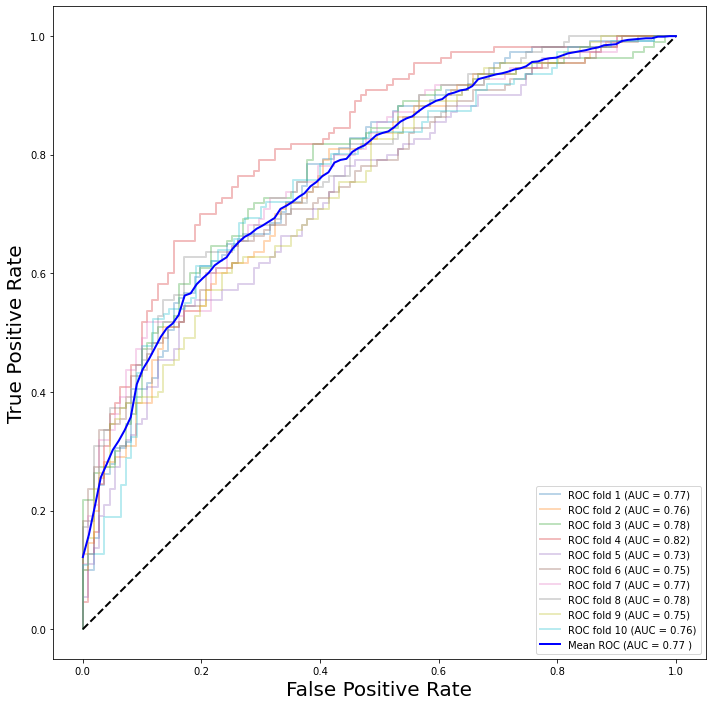

In [28]:
# plot k fold ROC
plt.figure(figsize=(7, 5), dpi=600)
x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = cb.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.show()
#plt.savefig('CrossVal-AUC_CB_1024.png', dpi=600, bbox_inches='tight')

In [ ]:
##Y-randomization

In [29]:
accuracy_list = []
mcc_list = []
for i in range(50):
    y_train = y_train.sample(frac=1, replace=False, random_state=i)
    cb.fit(x_train, y_train)
    scrmb_predictions = cb.predict(X_v_test_data)
    accuracy = roc_auc_score(Y_v_test_data, scrmb_predictions)
    accuracy_list.append(accuracy)
    mcc_v = matthews_corrcoef(Y_v_test_data, scrmb_predictions)
    mcc_list.append(mcc_v)
    print(i)
print(accuracy_list)
print(mcc_list)

0:	learn: 0.6931445	total: 213ms	remaining: 7m 5s
1:	learn: 0.6931417	total: 444ms	remaining: 7m 23s
2:	learn: 0.6931389	total: 695ms	remaining: 7m 42s
3:	learn: 0.6931366	total: 884ms	remaining: 7m 21s
4:	learn: 0.6931339	total: 1.09s	remaining: 7m 14s
5:	learn: 0.6931318	total: 1.29s	remaining: 7m 8s
6:	learn: 0.6931287	total: 1.49s	remaining: 7m 3s
7:	learn: 0.6931266	total: 1.67s	remaining: 6m 55s
8:	learn: 0.6931241	total: 1.91s	remaining: 7m 1s
9:	learn: 0.6931222	total: 2.1s	remaining: 6m 58s
10:	learn: 0.6931194	total: 2.31s	remaining: 6m 56s
11:	learn: 0.6931175	total: 2.59s	remaining: 7m 9s
12:	learn: 0.6931167	total: 2.78s	remaining: 7m 5s
13:	learn: 0.6931150	total: 2.96s	remaining: 7m
14:	learn: 0.6931127	total: 3.15s	remaining: 6m 56s
15:	learn: 0.6931100	total: 3.33s	remaining: 6m 53s
16:	learn: 0.6931084	total: 3.51s	remaining: 6m 49s
17:	learn: 0.6931063	total: 3.7s	remaining: 6m 47s
18:	learn: 0.6931038	total: 3.92s	remaining: 6m 48s
19:	learn: 0.6931017	total: 4.12s	

158:	learn: 0.6927708	total: 32.4s	remaining: 6m 14s
159:	learn: 0.6927691	total: 32.5s	remaining: 6m 14s
160:	learn: 0.6927668	total: 32.8s	remaining: 6m 14s
161:	learn: 0.6927643	total: 33s	remaining: 6m 14s
162:	learn: 0.6927619	total: 33.1s	remaining: 6m 13s
163:	learn: 0.6927603	total: 33.3s	remaining: 6m 13s
164:	learn: 0.6927582	total: 33.5s	remaining: 6m 12s
165:	learn: 0.6927555	total: 33.7s	remaining: 6m 12s
166:	learn: 0.6927525	total: 33.9s	remaining: 6m 12s
167:	learn: 0.6927509	total: 34.1s	remaining: 6m 11s
168:	learn: 0.6927487	total: 34.3s	remaining: 6m 11s
169:	learn: 0.6927451	total: 34.5s	remaining: 6m 10s
170:	learn: 0.6927418	total: 34.6s	remaining: 6m 10s
171:	learn: 0.6927398	total: 34.8s	remaining: 6m 10s
172:	learn: 0.6927373	total: 35s	remaining: 6m 9s
173:	learn: 0.6927354	total: 35.2s	remaining: 6m 9s
174:	learn: 0.6927325	total: 35.3s	remaining: 6m 8s
175:	learn: 0.6927293	total: 35.6s	remaining: 6m 8s
176:	learn: 0.6927270	total: 35.8s	remaining: 6m 8s
17

315:	learn: 0.6924077	total: 1m 1s	remaining: 5m 25s
316:	learn: 0.6924062	total: 1m 1s	remaining: 5m 25s
317:	learn: 0.6924043	total: 1m 1s	remaining: 5m 25s
318:	learn: 0.6924028	total: 1m 1s	remaining: 5m 25s
319:	learn: 0.6924008	total: 1m 1s	remaining: 5m 24s
320:	learn: 0.6923981	total: 1m 2s	remaining: 5m 24s
321:	learn: 0.6923959	total: 1m 2s	remaining: 5m 24s
322:	learn: 0.6923940	total: 1m 2s	remaining: 5m 24s
323:	learn: 0.6923914	total: 1m 2s	remaining: 5m 24s
324:	learn: 0.6923897	total: 1m 2s	remaining: 5m 24s
325:	learn: 0.6923878	total: 1m 3s	remaining: 5m 23s
326:	learn: 0.6923855	total: 1m 3s	remaining: 5m 24s
327:	learn: 0.6923828	total: 1m 3s	remaining: 5m 24s
328:	learn: 0.6923821	total: 1m 3s	remaining: 5m 23s
329:	learn: 0.6923816	total: 1m 3s	remaining: 5m 22s
330:	learn: 0.6923799	total: 1m 3s	remaining: 5m 21s
331:	learn: 0.6923780	total: 1m 3s	remaining: 5m 21s
332:	learn: 0.6923759	total: 1m 4s	remaining: 5m 21s
333:	learn: 0.6923731	total: 1m 4s	remaining: 

469:	learn: 0.6920698	total: 1m 28s	remaining: 4m 48s
470:	learn: 0.6920672	total: 1m 28s	remaining: 4m 48s
471:	learn: 0.6920651	total: 1m 29s	remaining: 4m 48s
472:	learn: 0.6920628	total: 1m 29s	remaining: 4m 48s
473:	learn: 0.6920608	total: 1m 29s	remaining: 4m 48s
474:	learn: 0.6920595	total: 1m 29s	remaining: 4m 47s
475:	learn: 0.6920571	total: 1m 29s	remaining: 4m 47s
476:	learn: 0.6920539	total: 1m 29s	remaining: 4m 47s
477:	learn: 0.6920505	total: 1m 30s	remaining: 4m 46s
478:	learn: 0.6920479	total: 1m 30s	remaining: 4m 46s
479:	learn: 0.6920460	total: 1m 30s	remaining: 4m 46s
480:	learn: 0.6920433	total: 1m 30s	remaining: 4m 46s
481:	learn: 0.6920411	total: 1m 30s	remaining: 4m 45s
482:	learn: 0.6920388	total: 1m 30s	remaining: 4m 45s
483:	learn: 0.6920360	total: 1m 31s	remaining: 4m 45s
484:	learn: 0.6920339	total: 1m 31s	remaining: 4m 45s
485:	learn: 0.6920309	total: 1m 31s	remaining: 4m 45s
486:	learn: 0.6920291	total: 1m 31s	remaining: 4m 44s
487:	learn: 0.6920276	total:

621:	learn: 0.6917215	total: 1m 57s	remaining: 4m 20s
622:	learn: 0.6917198	total: 1m 57s	remaining: 4m 20s
623:	learn: 0.6917175	total: 1m 57s	remaining: 4m 20s
624:	learn: 0.6917158	total: 1m 58s	remaining: 4m 19s
625:	learn: 0.6917140	total: 1m 58s	remaining: 4m 19s
626:	learn: 0.6917111	total: 1m 58s	remaining: 4m 19s
627:	learn: 0.6917090	total: 1m 58s	remaining: 4m 19s
628:	learn: 0.6917065	total: 1m 58s	remaining: 4m 19s
629:	learn: 0.6917040	total: 1m 59s	remaining: 4m 18s
630:	learn: 0.6917019	total: 1m 59s	remaining: 4m 18s
631:	learn: 0.6916999	total: 1m 59s	remaining: 4m 18s
632:	learn: 0.6916969	total: 1m 59s	remaining: 4m 18s
633:	learn: 0.6916951	total: 1m 59s	remaining: 4m 18s
634:	learn: 0.6916925	total: 2m	remaining: 4m 18s
635:	learn: 0.6916910	total: 2m	remaining: 4m 17s
636:	learn: 0.6916890	total: 2m	remaining: 4m 17s
637:	learn: 0.6916871	total: 2m	remaining: 4m 17s
638:	learn: 0.6916853	total: 2m	remaining: 4m 17s
639:	learn: 0.6916833	total: 2m	remaining: 4m 16

776:	learn: 0.6913754	total: 2m 25s	remaining: 3m 49s
777:	learn: 0.6913728	total: 2m 26s	remaining: 3m 49s
778:	learn: 0.6913707	total: 2m 26s	remaining: 3m 49s
779:	learn: 0.6913679	total: 2m 26s	remaining: 3m 49s
780:	learn: 0.6913659	total: 2m 26s	remaining: 3m 49s
781:	learn: 0.6913637	total: 2m 26s	remaining: 3m 48s
782:	learn: 0.6913618	total: 2m 27s	remaining: 3m 48s
783:	learn: 0.6913592	total: 2m 27s	remaining: 3m 48s
784:	learn: 0.6913568	total: 2m 27s	remaining: 3m 48s
785:	learn: 0.6913559	total: 2m 27s	remaining: 3m 47s
786:	learn: 0.6913537	total: 2m 27s	remaining: 3m 47s
787:	learn: 0.6913516	total: 2m 28s	remaining: 3m 47s
788:	learn: 0.6913493	total: 2m 28s	remaining: 3m 47s
789:	learn: 0.6913469	total: 2m 28s	remaining: 3m 47s
790:	learn: 0.6913451	total: 2m 28s	remaining: 3m 47s
791:	learn: 0.6913431	total: 2m 28s	remaining: 3m 47s
792:	learn: 0.6913405	total: 2m 29s	remaining: 3m 46s
793:	learn: 0.6913389	total: 2m 29s	remaining: 3m 46s
794:	learn: 0.6913369	total:

928:	learn: 0.6910295	total: 2m 56s	remaining: 3m 23s
929:	learn: 0.6910268	total: 2m 57s	remaining: 3m 23s
930:	learn: 0.6910250	total: 2m 57s	remaining: 3m 23s
931:	learn: 0.6910226	total: 2m 57s	remaining: 3m 23s
932:	learn: 0.6910202	total: 2m 57s	remaining: 3m 23s
933:	learn: 0.6910173	total: 2m 57s	remaining: 3m 23s
934:	learn: 0.6910146	total: 2m 58s	remaining: 3m 22s
935:	learn: 0.6910136	total: 2m 58s	remaining: 3m 22s
936:	learn: 0.6910117	total: 2m 58s	remaining: 3m 22s
937:	learn: 0.6910100	total: 2m 58s	remaining: 3m 22s
938:	learn: 0.6910079	total: 2m 58s	remaining: 3m 22s
939:	learn: 0.6910062	total: 2m 58s	remaining: 3m 21s
940:	learn: 0.6910031	total: 2m 59s	remaining: 3m 21s
941:	learn: 0.6910009	total: 2m 59s	remaining: 3m 21s
942:	learn: 0.6909988	total: 2m 59s	remaining: 3m 21s
943:	learn: 0.6909960	total: 2m 59s	remaining: 3m 21s
944:	learn: 0.6909926	total: 2m 59s	remaining: 3m 20s
945:	learn: 0.6909907	total: 3m	remaining: 3m 20s
946:	learn: 0.6909890	total: 3m	

1081:	learn: 0.6906854	total: 3m 27s	remaining: 2m 56s
1082:	learn: 0.6906833	total: 3m 27s	remaining: 2m 55s
1083:	learn: 0.6906802	total: 3m 28s	remaining: 2m 55s
1084:	learn: 0.6906782	total: 3m 28s	remaining: 2m 55s
1085:	learn: 0.6906759	total: 3m 28s	remaining: 2m 55s
1086:	learn: 0.6906727	total: 3m 28s	remaining: 2m 55s
1087:	learn: 0.6906701	total: 3m 29s	remaining: 2m 55s
1088:	learn: 0.6906672	total: 3m 29s	remaining: 2m 55s
1089:	learn: 0.6906649	total: 3m 29s	remaining: 2m 54s
1090:	learn: 0.6906625	total: 3m 29s	remaining: 2m 54s
1091:	learn: 0.6906595	total: 3m 29s	remaining: 2m 54s
1092:	learn: 0.6906578	total: 3m 30s	remaining: 2m 54s
1093:	learn: 0.6906554	total: 3m 30s	remaining: 2m 54s
1094:	learn: 0.6906550	total: 3m 30s	remaining: 2m 53s
1095:	learn: 0.6906528	total: 3m 30s	remaining: 2m 53s
1096:	learn: 0.6906509	total: 3m 30s	remaining: 2m 53s
1097:	learn: 0.6906478	total: 3m 31s	remaining: 2m 53s
1098:	learn: 0.6906457	total: 3m 31s	remaining: 2m 53s
1099:	lear

1230:	learn: 0.6903522	total: 3m 57s	remaining: 2m 28s
1231:	learn: 0.6903497	total: 3m 57s	remaining: 2m 28s
1232:	learn: 0.6903479	total: 3m 57s	remaining: 2m 27s
1233:	learn: 0.6903459	total: 3m 57s	remaining: 2m 27s
1234:	learn: 0.6903423	total: 3m 58s	remaining: 2m 27s
1235:	learn: 0.6903396	total: 3m 58s	remaining: 2m 27s
1236:	learn: 0.6903377	total: 3m 58s	remaining: 2m 27s
1237:	learn: 0.6903354	total: 3m 58s	remaining: 2m 26s
1238:	learn: 0.6903325	total: 3m 58s	remaining: 2m 26s
1239:	learn: 0.6903299	total: 3m 59s	remaining: 2m 26s
1240:	learn: 0.6903272	total: 3m 59s	remaining: 2m 26s
1241:	learn: 0.6903254	total: 3m 59s	remaining: 2m 26s
1242:	learn: 0.6903235	total: 3m 59s	remaining: 2m 25s
1243:	learn: 0.6903214	total: 3m 59s	remaining: 2m 25s
1244:	learn: 0.6903192	total: 3m 59s	remaining: 2m 25s
1245:	learn: 0.6903178	total: 4m	remaining: 2m 25s
1246:	learn: 0.6903155	total: 4m	remaining: 2m 25s
1247:	learn: 0.6903134	total: 4m	remaining: 2m 24s
1248:	learn: 0.6903112

1383:	learn: 0.6900044	total: 4m 27s	remaining: 1m 58s
1384:	learn: 0.6900025	total: 4m 27s	remaining: 1m 58s
1385:	learn: 0.6900004	total: 4m 27s	remaining: 1m 58s
1386:	learn: 0.6899965	total: 4m 27s	remaining: 1m 58s
1387:	learn: 0.6899944	total: 4m 27s	remaining: 1m 58s
1388:	learn: 0.6899917	total: 4m 28s	remaining: 1m 57s
1389:	learn: 0.6899900	total: 4m 28s	remaining: 1m 57s
1390:	learn: 0.6899884	total: 4m 28s	remaining: 1m 57s
1391:	learn: 0.6899857	total: 4m 28s	remaining: 1m 57s
1392:	learn: 0.6899837	total: 4m 29s	remaining: 1m 57s
1393:	learn: 0.6899819	total: 4m 29s	remaining: 1m 57s
1394:	learn: 0.6899800	total: 4m 29s	remaining: 1m 56s
1395:	learn: 0.6899777	total: 4m 29s	remaining: 1m 56s
1396:	learn: 0.6899758	total: 4m 29s	remaining: 1m 56s
1397:	learn: 0.6899744	total: 4m 30s	remaining: 1m 56s
1398:	learn: 0.6899717	total: 4m 30s	remaining: 1m 56s
1399:	learn: 0.6899697	total: 4m 30s	remaining: 1m 55s
1400:	learn: 0.6899669	total: 4m 30s	remaining: 1m 55s
1401:	lear

1533:	learn: 0.6896658	total: 4m 55s	remaining: 1m 29s
1534:	learn: 0.6896627	total: 4m 55s	remaining: 1m 29s
1535:	learn: 0.6896584	total: 4m 55s	remaining: 1m 29s
1536:	learn: 0.6896561	total: 4m 56s	remaining: 1m 29s
1537:	learn: 0.6896547	total: 4m 56s	remaining: 1m 29s
1538:	learn: 0.6896504	total: 4m 56s	remaining: 1m 28s
1539:	learn: 0.6896482	total: 4m 56s	remaining: 1m 28s
1540:	learn: 0.6896464	total: 4m 56s	remaining: 1m 28s
1541:	learn: 0.6896445	total: 4m 57s	remaining: 1m 28s
1542:	learn: 0.6896424	total: 4m 57s	remaining: 1m 28s
1543:	learn: 0.6896396	total: 4m 57s	remaining: 1m 27s
1544:	learn: 0.6896372	total: 4m 57s	remaining: 1m 27s
1545:	learn: 0.6896344	total: 4m 57s	remaining: 1m 27s
1546:	learn: 0.6896326	total: 4m 58s	remaining: 1m 27s
1547:	learn: 0.6896306	total: 4m 58s	remaining: 1m 27s
1548:	learn: 0.6896279	total: 4m 58s	remaining: 1m 26s
1549:	learn: 0.6896264	total: 4m 58s	remaining: 1m 26s
1550:	learn: 0.6896234	total: 4m 58s	remaining: 1m 26s
1551:	lear

1685:	learn: 0.6893280	total: 5m 23s	remaining: 1m
1686:	learn: 0.6893256	total: 5m 23s	remaining: 1m
1687:	learn: 0.6893234	total: 5m 23s	remaining: 59.8s
1688:	learn: 0.6893212	total: 5m 23s	remaining: 59.6s
1689:	learn: 0.6893193	total: 5m 24s	remaining: 59.4s
1690:	learn: 0.6893166	total: 5m 24s	remaining: 59.3s
1691:	learn: 0.6893140	total: 5m 24s	remaining: 59.1s
1692:	learn: 0.6893113	total: 5m 24s	remaining: 58.9s
1693:	learn: 0.6893088	total: 5m 24s	remaining: 58.7s
1694:	learn: 0.6893069	total: 5m 25s	remaining: 58.5s
1695:	learn: 0.6893046	total: 5m 25s	remaining: 58.3s
1696:	learn: 0.6893018	total: 5m 25s	remaining: 58.1s
1697:	learn: 0.6893004	total: 5m 25s	remaining: 57.9s
1698:	learn: 0.6892981	total: 5m 25s	remaining: 57.7s
1699:	learn: 0.6892951	total: 5m 25s	remaining: 57.5s
1700:	learn: 0.6892929	total: 5m 26s	remaining: 57.3s
1701:	learn: 0.6892914	total: 5m 26s	remaining: 57.1s
1702:	learn: 0.6892897	total: 5m 26s	remaining: 57s
1703:	learn: 0.6892869	total: 5m 26s

1838:	learn: 0.6889817	total: 5m 53s	remaining: 31s
1839:	learn: 0.6889793	total: 5m 53s	remaining: 30.8s
1840:	learn: 0.6889774	total: 5m 53s	remaining: 30.6s
1841:	learn: 0.6889748	total: 5m 54s	remaining: 30.4s
1842:	learn: 0.6889728	total: 5m 54s	remaining: 30.2s
1843:	learn: 0.6889702	total: 5m 54s	remaining: 30s
1844:	learn: 0.6889686	total: 5m 54s	remaining: 29.8s
1845:	learn: 0.6889662	total: 5m 55s	remaining: 29.6s
1846:	learn: 0.6889646	total: 5m 55s	remaining: 29.4s
1847:	learn: 0.6889628	total: 5m 55s	remaining: 29.2s
1848:	learn: 0.6889587	total: 5m 55s	remaining: 29s
1849:	learn: 0.6889570	total: 5m 55s	remaining: 28.9s
1850:	learn: 0.6889547	total: 5m 56s	remaining: 28.7s
1851:	learn: 0.6889525	total: 5m 56s	remaining: 28.5s
1852:	learn: 0.6889500	total: 5m 56s	remaining: 28.3s
1853:	learn: 0.6889477	total: 5m 56s	remaining: 28.1s
1854:	learn: 0.6889467	total: 5m 57s	remaining: 27.9s
1855:	learn: 0.6889441	total: 5m 57s	remaining: 27.7s
1856:	learn: 0.6889425	total: 5m 5

1992:	learn: 0.6886382	total: 6m 27s	remaining: 1.36s
1993:	learn: 0.6886366	total: 6m 27s	remaining: 1.17s
1994:	learn: 0.6886344	total: 6m 27s	remaining: 971ms
1995:	learn: 0.6886329	total: 6m 27s	remaining: 777ms
1996:	learn: 0.6886306	total: 6m 28s	remaining: 583ms
1997:	learn: 0.6886277	total: 6m 28s	remaining: 389ms
1998:	learn: 0.6886255	total: 6m 28s	remaining: 194ms
1999:	learn: 0.6886224	total: 6m 28s	remaining: 0us
0
0:	learn: 0.6931438	total: 224ms	remaining: 7m 27s
1:	learn: 0.6931415	total: 458ms	remaining: 7m 37s
2:	learn: 0.6931383	total: 711ms	remaining: 7m 53s
3:	learn: 0.6931361	total: 989ms	remaining: 8m 13s
4:	learn: 0.6931336	total: 1.19s	remaining: 7m 55s
5:	learn: 0.6931306	total: 1.42s	remaining: 7m 51s
6:	learn: 0.6931281	total: 1.59s	remaining: 7m 31s
7:	learn: 0.6931264	total: 1.76s	remaining: 7m 18s
8:	learn: 0.6931234	total: 1.98s	remaining: 7m 17s
9:	learn: 0.6931219	total: 2.16s	remaining: 7m 10s
10:	learn: 0.6931203	total: 2.34s	remaining: 7m 2s
11:	lea

151:	learn: 0.6927881	total: 30.9s	remaining: 6m 16s
152:	learn: 0.6927862	total: 31.2s	remaining: 6m 16s
153:	learn: 0.6927847	total: 31.4s	remaining: 6m 15s
154:	learn: 0.6927823	total: 31.6s	remaining: 6m 15s
155:	learn: 0.6927802	total: 31.8s	remaining: 6m 15s
156:	learn: 0.6927785	total: 32s	remaining: 6m 15s
157:	learn: 0.6927757	total: 32.2s	remaining: 6m 15s
158:	learn: 0.6927725	total: 32.4s	remaining: 6m 15s
159:	learn: 0.6927703	total: 32.6s	remaining: 6m 14s
160:	learn: 0.6927693	total: 32.6s	remaining: 6m 12s
161:	learn: 0.6927673	total: 32.8s	remaining: 6m 12s
162:	learn: 0.6927652	total: 33s	remaining: 6m 11s
163:	learn: 0.6927628	total: 33.2s	remaining: 6m 11s
164:	learn: 0.6927602	total: 33.4s	remaining: 6m 11s
165:	learn: 0.6927580	total: 33.6s	remaining: 6m 10s
166:	learn: 0.6927553	total: 33.8s	remaining: 6m 10s
167:	learn: 0.6927529	total: 34s	remaining: 6m 10s
168:	learn: 0.6927514	total: 34.2s	remaining: 6m 10s
169:	learn: 0.6927491	total: 34.3s	remaining: 6m 9s


308:	learn: 0.6924307	total: 1m 2s	remaining: 5m 40s
309:	learn: 0.6924274	total: 1m 2s	remaining: 5m 40s
310:	learn: 0.6924257	total: 1m 2s	remaining: 5m 40s
311:	learn: 0.6924234	total: 1m 2s	remaining: 5m 40s
312:	learn: 0.6924208	total: 1m 3s	remaining: 5m 39s
313:	learn: 0.6924182	total: 1m 3s	remaining: 5m 39s
314:	learn: 0.6924160	total: 1m 3s	remaining: 5m 39s
315:	learn: 0.6924136	total: 1m 3s	remaining: 5m 38s
316:	learn: 0.6924122	total: 1m 3s	remaining: 5m 38s
317:	learn: 0.6924098	total: 1m 4s	remaining: 5m 38s
318:	learn: 0.6924075	total: 1m 4s	remaining: 5m 38s
319:	learn: 0.6924061	total: 1m 4s	remaining: 5m 38s
320:	learn: 0.6924042	total: 1m 4s	remaining: 5m 38s
321:	learn: 0.6924020	total: 1m 4s	remaining: 5m 38s
322:	learn: 0.6923993	total: 1m 5s	remaining: 5m 37s
323:	learn: 0.6923971	total: 1m 5s	remaining: 5m 37s
324:	learn: 0.6923949	total: 1m 5s	remaining: 5m 37s
325:	learn: 0.6923929	total: 1m 5s	remaining: 5m 37s
326:	learn: 0.6923903	total: 1m 5s	remaining: 

462:	learn: 0.6920742	total: 1m 32s	remaining: 5m 8s
463:	learn: 0.6920714	total: 1m 33s	remaining: 5m 8s
464:	learn: 0.6920689	total: 1m 33s	remaining: 5m 8s
465:	learn: 0.6920664	total: 1m 33s	remaining: 5m 8s
466:	learn: 0.6920643	total: 1m 33s	remaining: 5m 7s
467:	learn: 0.6920623	total: 1m 33s	remaining: 5m 7s
468:	learn: 0.6920602	total: 1m 34s	remaining: 5m 7s
469:	learn: 0.6920582	total: 1m 34s	remaining: 5m 7s
470:	learn: 0.6920560	total: 1m 34s	remaining: 5m 6s
471:	learn: 0.6920533	total: 1m 34s	remaining: 5m 6s
472:	learn: 0.6920524	total: 1m 34s	remaining: 5m 6s
473:	learn: 0.6920502	total: 1m 35s	remaining: 5m 6s
474:	learn: 0.6920469	total: 1m 35s	remaining: 5m 5s
475:	learn: 0.6920452	total: 1m 35s	remaining: 5m 5s
476:	learn: 0.6920427	total: 1m 35s	remaining: 5m 5s
477:	learn: 0.6920407	total: 1m 35s	remaining: 5m 5s
478:	learn: 0.6920388	total: 1m 36s	remaining: 5m 5s
479:	learn: 0.6920357	total: 1m 36s	remaining: 5m 4s
480:	learn: 0.6920330	total: 1m 36s	remaining:

616:	learn: 0.6917163	total: 2m 2s	remaining: 4m 34s
617:	learn: 0.6917141	total: 2m 2s	remaining: 4m 34s
618:	learn: 0.6917122	total: 2m 2s	remaining: 4m 33s
619:	learn: 0.6917101	total: 2m 2s	remaining: 4m 33s
620:	learn: 0.6917077	total: 2m 3s	remaining: 4m 33s
621:	learn: 0.6917049	total: 2m 3s	remaining: 4m 33s
622:	learn: 0.6917025	total: 2m 3s	remaining: 4m 33s
623:	learn: 0.6917006	total: 2m 3s	remaining: 4m 32s
624:	learn: 0.6916985	total: 2m 4s	remaining: 4m 32s
625:	learn: 0.6916959	total: 2m 4s	remaining: 4m 32s
626:	learn: 0.6916943	total: 2m 4s	remaining: 4m 32s
627:	learn: 0.6916921	total: 2m 4s	remaining: 4m 32s
628:	learn: 0.6916901	total: 2m 5s	remaining: 4m 32s
629:	learn: 0.6916871	total: 2m 5s	remaining: 4m 32s
630:	learn: 0.6916848	total: 2m 5s	remaining: 4m 32s
631:	learn: 0.6916831	total: 2m 5s	remaining: 4m 31s
632:	learn: 0.6916795	total: 2m 5s	remaining: 4m 31s
633:	learn: 0.6916774	total: 2m 6s	remaining: 4m 31s
634:	learn: 0.6916755	total: 2m 6s	remaining: 

769:	learn: 0.6913714	total: 2m 32s	remaining: 4m 3s
770:	learn: 0.6913695	total: 2m 32s	remaining: 4m 3s
771:	learn: 0.6913671	total: 2m 33s	remaining: 4m 3s
772:	learn: 0.6913652	total: 2m 33s	remaining: 4m 3s
773:	learn: 0.6913637	total: 2m 33s	remaining: 4m 3s
774:	learn: 0.6913610	total: 2m 33s	remaining: 4m 2s
775:	learn: 0.6913591	total: 2m 33s	remaining: 4m 2s
776:	learn: 0.6913571	total: 2m 34s	remaining: 4m 2s
777:	learn: 0.6913553	total: 2m 34s	remaining: 4m 2s
778:	learn: 0.6913532	total: 2m 34s	remaining: 4m 2s
779:	learn: 0.6913514	total: 2m 34s	remaining: 4m 1s
780:	learn: 0.6913490	total: 2m 34s	remaining: 4m 1s
781:	learn: 0.6913466	total: 2m 35s	remaining: 4m 1s
782:	learn: 0.6913442	total: 2m 35s	remaining: 4m 1s
783:	learn: 0.6913412	total: 2m 35s	remaining: 4m 1s
784:	learn: 0.6913393	total: 2m 35s	remaining: 4m
785:	learn: 0.6913377	total: 2m 35s	remaining: 4m
786:	learn: 0.6913358	total: 2m 35s	remaining: 4m
787:	learn: 0.6913331	total: 2m 36s	remaining: 4m
788:	

923:	learn: 0.6910304	total: 3m 2s	remaining: 3m 32s
924:	learn: 0.6910287	total: 3m 2s	remaining: 3m 31s
925:	learn: 0.6910261	total: 3m 2s	remaining: 3m 31s
926:	learn: 0.6910244	total: 3m 2s	remaining: 3m 31s
927:	learn: 0.6910217	total: 3m 2s	remaining: 3m 31s
928:	learn: 0.6910198	total: 3m 2s	remaining: 3m 30s
929:	learn: 0.6910176	total: 3m 3s	remaining: 3m 30s
930:	learn: 0.6910140	total: 3m 3s	remaining: 3m 30s
931:	learn: 0.6910113	total: 3m 3s	remaining: 3m 30s
932:	learn: 0.6910090	total: 3m 3s	remaining: 3m 30s
933:	learn: 0.6910067	total: 3m 3s	remaining: 3m 29s
934:	learn: 0.6910044	total: 3m 4s	remaining: 3m 29s
935:	learn: 0.6910020	total: 3m 4s	remaining: 3m 29s
936:	learn: 0.6909998	total: 3m 4s	remaining: 3m 29s
937:	learn: 0.6909983	total: 3m 4s	remaining: 3m 29s
938:	learn: 0.6909966	total: 3m 4s	remaining: 3m 28s
939:	learn: 0.6909947	total: 3m 4s	remaining: 3m 28s
940:	learn: 0.6909918	total: 3m 5s	remaining: 3m 28s
941:	learn: 0.6909870	total: 3m 5s	remaining: 

1075:	learn: 0.6906844	total: 3m 30s	remaining: 3m 1s
1076:	learn: 0.6906819	total: 3m 31s	remaining: 3m
1077:	learn: 0.6906794	total: 3m 31s	remaining: 3m
1078:	learn: 0.6906765	total: 3m 31s	remaining: 3m
1079:	learn: 0.6906745	total: 3m 31s	remaining: 3m
1080:	learn: 0.6906718	total: 3m 31s	remaining: 3m
1081:	learn: 0.6906694	total: 3m 31s	remaining: 2m 59s
1082:	learn: 0.6906674	total: 3m 32s	remaining: 2m 59s
1083:	learn: 0.6906639	total: 3m 32s	remaining: 2m 59s
1084:	learn: 0.6906621	total: 3m 32s	remaining: 2m 59s
1085:	learn: 0.6906610	total: 3m 32s	remaining: 2m 58s
1086:	learn: 0.6906586	total: 3m 32s	remaining: 2m 58s
1087:	learn: 0.6906564	total: 3m 32s	remaining: 2m 58s
1088:	learn: 0.6906542	total: 3m 33s	remaining: 2m 58s
1089:	learn: 0.6906520	total: 3m 33s	remaining: 2m 58s
1090:	learn: 0.6906493	total: 3m 33s	remaining: 2m 57s
1091:	learn: 0.6906464	total: 3m 33s	remaining: 2m 57s
1092:	learn: 0.6906437	total: 3m 33s	remaining: 2m 57s
1093:	learn: 0.6906416	total: 3

1226:	learn: 0.6903358	total: 3m 58s	remaining: 2m 30s
1227:	learn: 0.6903336	total: 3m 58s	remaining: 2m 30s
1228:	learn: 0.6903314	total: 3m 58s	remaining: 2m 29s
1229:	learn: 0.6903282	total: 3m 59s	remaining: 2m 29s
1230:	learn: 0.6903256	total: 3m 59s	remaining: 2m 29s
1231:	learn: 0.6903232	total: 3m 59s	remaining: 2m 29s
1232:	learn: 0.6903201	total: 3m 59s	remaining: 2m 29s
1233:	learn: 0.6903181	total: 4m	remaining: 2m 28s
1234:	learn: 0.6903159	total: 4m	remaining: 2m 28s
1235:	learn: 0.6903139	total: 4m	remaining: 2m 28s
1236:	learn: 0.6903116	total: 4m	remaining: 2m 28s
1237:	learn: 0.6903096	total: 4m	remaining: 2m 28s
1238:	learn: 0.6903068	total: 4m 1s	remaining: 2m 28s
1239:	learn: 0.6903030	total: 4m 1s	remaining: 2m 27s
1240:	learn: 0.6903010	total: 4m 1s	remaining: 2m 27s
1241:	learn: 0.6902992	total: 4m 1s	remaining: 2m 27s
1242:	learn: 0.6902965	total: 4m 1s	remaining: 2m 27s
1243:	learn: 0.6902951	total: 4m 2s	remaining: 2m 27s
1244:	learn: 0.6902930	total: 4m 2s	

1377:	learn: 0.6899805	total: 4m 28s	remaining: 2m 1s
1378:	learn: 0.6899778	total: 4m 28s	remaining: 2m 1s
1379:	learn: 0.6899755	total: 4m 29s	remaining: 2m
1380:	learn: 0.6899736	total: 4m 29s	remaining: 2m
1381:	learn: 0.6899721	total: 4m 29s	remaining: 2m
1382:	learn: 0.6899695	total: 4m 29s	remaining: 2m
1383:	learn: 0.6899669	total: 4m 30s	remaining: 2m
1384:	learn: 0.6899649	total: 4m 30s	remaining: 2m
1385:	learn: 0.6899617	total: 4m 30s	remaining: 1m 59s
1386:	learn: 0.6899599	total: 4m 30s	remaining: 1m 59s
1387:	learn: 0.6899578	total: 4m 30s	remaining: 1m 59s
1388:	learn: 0.6899549	total: 4m 31s	remaining: 1m 59s
1389:	learn: 0.6899527	total: 4m 31s	remaining: 1m 59s
1390:	learn: 0.6899503	total: 4m 31s	remaining: 1m 58s
1391:	learn: 0.6899471	total: 4m 31s	remaining: 1m 58s
1392:	learn: 0.6899456	total: 4m 31s	remaining: 1m 58s
1393:	learn: 0.6899433	total: 4m 32s	remaining: 1m 58s
1394:	learn: 0.6899408	total: 4m 32s	remaining: 1m 58s
1395:	learn: 0.6899379	total: 4m 32s

1527:	learn: 0.6896295	total: 4m 59s	remaining: 1m 32s
1528:	learn: 0.6896280	total: 4m 59s	remaining: 1m 32s
1529:	learn: 0.6896260	total: 4m 59s	remaining: 1m 32s
1530:	learn: 0.6896234	total: 4m 59s	remaining: 1m 31s
1531:	learn: 0.6896212	total: 4m 59s	remaining: 1m 31s
1532:	learn: 0.6896171	total: 5m	remaining: 1m 31s
1533:	learn: 0.6896146	total: 5m	remaining: 1m 31s
1534:	learn: 0.6896122	total: 5m	remaining: 1m 31s
1535:	learn: 0.6896083	total: 5m	remaining: 1m 30s
1536:	learn: 0.6896061	total: 5m	remaining: 1m 30s
1537:	learn: 0.6896034	total: 5m 1s	remaining: 1m 30s
1538:	learn: 0.6896018	total: 5m 1s	remaining: 1m 30s
1539:	learn: 0.6895992	total: 5m 1s	remaining: 1m 30s
1540:	learn: 0.6895971	total: 5m 1s	remaining: 1m 29s
1541:	learn: 0.6895941	total: 5m 1s	remaining: 1m 29s
1542:	learn: 0.6895912	total: 5m 1s	remaining: 1m 29s
1543:	learn: 0.6895890	total: 5m 2s	remaining: 1m 29s
1544:	learn: 0.6895865	total: 5m 2s	remaining: 1m 29s
1545:	learn: 0.6895834	total: 5m 2s	re

1678:	learn: 0.6892803	total: 5m 27s	remaining: 1m 2s
1679:	learn: 0.6892794	total: 5m 27s	remaining: 1m 2s
1680:	learn: 0.6892776	total: 5m 27s	remaining: 1m 2s
1681:	learn: 0.6892752	total: 5m 28s	remaining: 1m 2s
1682:	learn: 0.6892726	total: 5m 28s	remaining: 1m 1s
1683:	learn: 0.6892703	total: 5m 28s	remaining: 1m 1s
1684:	learn: 0.6892681	total: 5m 28s	remaining: 1m 1s
1685:	learn: 0.6892654	total: 5m 28s	remaining: 1m 1s
1686:	learn: 0.6892628	total: 5m 29s	remaining: 1m 1s
1687:	learn: 0.6892609	total: 5m 29s	remaining: 1m
1688:	learn: 0.6892562	total: 5m 29s	remaining: 1m
1689:	learn: 0.6892541	total: 5m 29s	remaining: 1m
1690:	learn: 0.6892520	total: 5m 29s	remaining: 1m
1691:	learn: 0.6892501	total: 5m 29s	remaining: 1m
1692:	learn: 0.6892478	total: 5m 30s	remaining: 59.9s
1693:	learn: 0.6892476	total: 5m 30s	remaining: 59.6s
1694:	learn: 0.6892460	total: 5m 30s	remaining: 59.4s
1695:	learn: 0.6892437	total: 5m 30s	remaining: 59.3s
1696:	learn: 0.6892409	total: 5m 30s	remain

1831:	learn: 0.6889392	total: 5m 55s	remaining: 32.6s
1832:	learn: 0.6889364	total: 5m 55s	remaining: 32.4s
1833:	learn: 0.6889344	total: 5m 56s	remaining: 32.2s
1834:	learn: 0.6889326	total: 5m 56s	remaining: 32s
1835:	learn: 0.6889308	total: 5m 56s	remaining: 31.8s
1836:	learn: 0.6889286	total: 5m 56s	remaining: 31.7s
1837:	learn: 0.6889272	total: 5m 56s	remaining: 31.5s
1838:	learn: 0.6889258	total: 5m 57s	remaining: 31.3s
1839:	learn: 0.6889232	total: 5m 57s	remaining: 31.1s
1840:	learn: 0.6889206	total: 5m 57s	remaining: 30.9s
1841:	learn: 0.6889185	total: 5m 57s	remaining: 30.7s
1842:	learn: 0.6889171	total: 5m 57s	remaining: 30.5s
1843:	learn: 0.6889149	total: 5m 57s	remaining: 30.3s
1844:	learn: 0.6889127	total: 5m 58s	remaining: 30.1s
1845:	learn: 0.6889111	total: 5m 58s	remaining: 29.9s
1846:	learn: 0.6889084	total: 5m 58s	remaining: 29.7s
1847:	learn: 0.6889061	total: 5m 58s	remaining: 29.5s
1848:	learn: 0.6889031	total: 5m 58s	remaining: 29.3s
1849:	learn: 0.6889009	total: 

1985:	learn: 0.6885860	total: 6m 25s	remaining: 2.72s
1986:	learn: 0.6885831	total: 6m 26s	remaining: 2.52s
1987:	learn: 0.6885817	total: 6m 26s	remaining: 2.33s
1988:	learn: 0.6885805	total: 6m 26s	remaining: 2.14s
1989:	learn: 0.6885782	total: 6m 26s	remaining: 1.94s
1990:	learn: 0.6885756	total: 6m 26s	remaining: 1.75s
1991:	learn: 0.6885737	total: 6m 26s	remaining: 1.55s
1992:	learn: 0.6885718	total: 6m 27s	remaining: 1.36s
1993:	learn: 0.6885692	total: 6m 27s	remaining: 1.17s
1994:	learn: 0.6885667	total: 6m 27s	remaining: 971ms
1995:	learn: 0.6885668	total: 6m 27s	remaining: 776ms
1996:	learn: 0.6885650	total: 6m 27s	remaining: 582ms
1997:	learn: 0.6885629	total: 6m 27s	remaining: 388ms
1998:	learn: 0.6885606	total: 6m 28s	remaining: 194ms
1999:	learn: 0.6885572	total: 6m 28s	remaining: 0us
1
0:	learn: 0.6931439	total: 190ms	remaining: 6m 19s
1:	learn: 0.6931420	total: 357ms	remaining: 5m 56s
2:	learn: 0.6931388	total: 549ms	remaining: 6m 5s
3:	learn: 0.6931359	total: 720ms	remai

144:	learn: 0.6928046	total: 29.8s	remaining: 6m 20s
145:	learn: 0.6928020	total: 30s	remaining: 6m 20s
146:	learn: 0.6927998	total: 30.2s	remaining: 6m 20s
147:	learn: 0.6927976	total: 30.3s	remaining: 6m 19s
148:	learn: 0.6927952	total: 30.6s	remaining: 6m 19s
149:	learn: 0.6927923	total: 30.7s	remaining: 6m 19s
150:	learn: 0.6927895	total: 30.9s	remaining: 6m 18s
151:	learn: 0.6927867	total: 31.1s	remaining: 6m 18s
152:	learn: 0.6927847	total: 31.3s	remaining: 6m 17s
153:	learn: 0.6927831	total: 31.5s	remaining: 6m 17s
154:	learn: 0.6927806	total: 31.7s	remaining: 6m 17s
155:	learn: 0.6927783	total: 31.9s	remaining: 6m 16s
156:	learn: 0.6927763	total: 32.1s	remaining: 6m 16s
157:	learn: 0.6927744	total: 32.2s	remaining: 6m 15s
158:	learn: 0.6927719	total: 32.4s	remaining: 6m 15s
159:	learn: 0.6927699	total: 32.6s	remaining: 6m 14s
160:	learn: 0.6927670	total: 32.8s	remaining: 6m 14s
161:	learn: 0.6927635	total: 33s	remaining: 6m 14s
162:	learn: 0.6927615	total: 33.2s	remaining: 6m 1

300:	learn: 0.6924582	total: 58.6s	remaining: 5m 30s
301:	learn: 0.6924557	total: 58.7s	remaining: 5m 30s
302:	learn: 0.6924531	total: 58.9s	remaining: 5m 29s
303:	learn: 0.6924506	total: 59.1s	remaining: 5m 29s
304:	learn: 0.6924482	total: 59.3s	remaining: 5m 29s
305:	learn: 0.6924465	total: 59.5s	remaining: 5m 29s
306:	learn: 0.6924444	total: 59.6s	remaining: 5m 28s
307:	learn: 0.6924416	total: 59.8s	remaining: 5m 28s
308:	learn: 0.6924386	total: 1m	remaining: 5m 28s
309:	learn: 0.6924367	total: 1m	remaining: 5m 28s
310:	learn: 0.6924345	total: 1m	remaining: 5m 28s
311:	learn: 0.6924317	total: 1m	remaining: 5m 27s
312:	learn: 0.6924294	total: 1m	remaining: 5m 27s
313:	learn: 0.6924271	total: 1m	remaining: 5m 27s
314:	learn: 0.6924245	total: 1m 1s	remaining: 5m 27s
315:	learn: 0.6924226	total: 1m 1s	remaining: 5m 26s
316:	learn: 0.6924208	total: 1m 1s	remaining: 5m 26s
317:	learn: 0.6924192	total: 1m 1s	remaining: 5m 26s
318:	learn: 0.6924181	total: 1m 1s	remaining: 5m 26s
319:	learn:

456:	learn: 0.6921235	total: 1m 25s	remaining: 4m 48s
457:	learn: 0.6921218	total: 1m 25s	remaining: 4m 48s
458:	learn: 0.6921193	total: 1m 25s	remaining: 4m 48s
459:	learn: 0.6921171	total: 1m 26s	remaining: 4m 48s
460:	learn: 0.6921155	total: 1m 26s	remaining: 4m 47s
461:	learn: 0.6921132	total: 1m 26s	remaining: 4m 47s
462:	learn: 0.6921096	total: 1m 26s	remaining: 4m 47s
463:	learn: 0.6921069	total: 1m 26s	remaining: 4m 47s
464:	learn: 0.6921053	total: 1m 26s	remaining: 4m 47s
465:	learn: 0.6921027	total: 1m 27s	remaining: 4m 46s
466:	learn: 0.6921007	total: 1m 27s	remaining: 4m 46s
467:	learn: 0.6920988	total: 1m 27s	remaining: 4m 46s
468:	learn: 0.6920958	total: 1m 27s	remaining: 4m 46s
469:	learn: 0.6920942	total: 1m 27s	remaining: 4m 46s
470:	learn: 0.6920925	total: 1m 28s	remaining: 4m 46s
471:	learn: 0.6920909	total: 1m 28s	remaining: 4m 45s
472:	learn: 0.6920895	total: 1m 28s	remaining: 4m 45s
473:	learn: 0.6920866	total: 1m 28s	remaining: 4m 45s
474:	learn: 0.6920834	total:

608:	learn: 0.6917699	total: 1m 55s	remaining: 4m 22s
609:	learn: 0.6917677	total: 1m 55s	remaining: 4m 22s
610:	learn: 0.6917657	total: 1m 55s	remaining: 4m 22s
611:	learn: 0.6917633	total: 1m 55s	remaining: 4m 22s
612:	learn: 0.6917613	total: 1m 55s	remaining: 4m 22s
613:	learn: 0.6917595	total: 1m 56s	remaining: 4m 22s
614:	learn: 0.6917565	total: 1m 56s	remaining: 4m 21s
615:	learn: 0.6917540	total: 1m 56s	remaining: 4m 21s
616:	learn: 0.6917513	total: 1m 56s	remaining: 4m 21s
617:	learn: 0.6917492	total: 1m 56s	remaining: 4m 21s
618:	learn: 0.6917471	total: 1m 56s	remaining: 4m 20s
619:	learn: 0.6917447	total: 1m 57s	remaining: 4m 20s
620:	learn: 0.6917420	total: 1m 57s	remaining: 4m 20s
621:	learn: 0.6917393	total: 1m 57s	remaining: 4m 20s
622:	learn: 0.6917368	total: 1m 57s	remaining: 4m 20s
623:	learn: 0.6917345	total: 1m 57s	remaining: 4m 20s
624:	learn: 0.6917325	total: 1m 58s	remaining: 4m 19s
625:	learn: 0.6917307	total: 1m 58s	remaining: 4m 19s
626:	learn: 0.6917288	total:

764:	learn: 0.6914188	total: 2m 23s	remaining: 3m 51s
765:	learn: 0.6914167	total: 2m 23s	remaining: 3m 50s
766:	learn: 0.6914144	total: 2m 23s	remaining: 3m 50s
767:	learn: 0.6914123	total: 2m 23s	remaining: 3m 50s
768:	learn: 0.6914099	total: 2m 23s	remaining: 3m 50s
769:	learn: 0.6914075	total: 2m 24s	remaining: 3m 50s
770:	learn: 0.6914053	total: 2m 24s	remaining: 3m 49s
771:	learn: 0.6914034	total: 2m 24s	remaining: 3m 49s
772:	learn: 0.6914008	total: 2m 24s	remaining: 3m 49s
773:	learn: 0.6913990	total: 2m 24s	remaining: 3m 49s
774:	learn: 0.6913970	total: 2m 24s	remaining: 3m 49s
775:	learn: 0.6913947	total: 2m 25s	remaining: 3m 49s
776:	learn: 0.6913922	total: 2m 25s	remaining: 3m 48s
777:	learn: 0.6913901	total: 2m 25s	remaining: 3m 48s
778:	learn: 0.6913883	total: 2m 25s	remaining: 3m 48s
779:	learn: 0.6913865	total: 2m 25s	remaining: 3m 48s
780:	learn: 0.6913846	total: 2m 26s	remaining: 3m 48s
781:	learn: 0.6913821	total: 2m 26s	remaining: 3m 47s
782:	learn: 0.6913801	total:

916:	learn: 0.6910832	total: 2m 52s	remaining: 3m 23s
917:	learn: 0.6910812	total: 2m 52s	remaining: 3m 23s
918:	learn: 0.6910791	total: 2m 52s	remaining: 3m 22s
919:	learn: 0.6910770	total: 2m 52s	remaining: 3m 22s
920:	learn: 0.6910742	total: 2m 52s	remaining: 3m 22s
921:	learn: 0.6910724	total: 2m 53s	remaining: 3m 22s
922:	learn: 0.6910705	total: 2m 53s	remaining: 3m 22s
923:	learn: 0.6910675	total: 2m 53s	remaining: 3m 22s
924:	learn: 0.6910657	total: 2m 53s	remaining: 3m 21s
925:	learn: 0.6910644	total: 2m 53s	remaining: 3m 21s
926:	learn: 0.6910623	total: 2m 54s	remaining: 3m 21s
927:	learn: 0.6910593	total: 2m 54s	remaining: 3m 21s
928:	learn: 0.6910576	total: 2m 54s	remaining: 3m 21s
929:	learn: 0.6910552	total: 2m 54s	remaining: 3m 20s
930:	learn: 0.6910509	total: 2m 54s	remaining: 3m 20s
931:	learn: 0.6910489	total: 2m 55s	remaining: 3m 20s
932:	learn: 0.6910468	total: 2m 55s	remaining: 3m 20s
933:	learn: 0.6910453	total: 2m 55s	remaining: 3m 20s
934:	learn: 0.6910433	total:

1070:	learn: 0.6907434	total: 3m 21s	remaining: 2m 54s
1071:	learn: 0.6907413	total: 3m 21s	remaining: 2m 54s
1072:	learn: 0.6907392	total: 3m 21s	remaining: 2m 54s
1073:	learn: 0.6907367	total: 3m 21s	remaining: 2m 53s
1074:	learn: 0.6907347	total: 3m 21s	remaining: 2m 53s
1075:	learn: 0.6907327	total: 3m 22s	remaining: 2m 53s
1076:	learn: 0.6907306	total: 3m 22s	remaining: 2m 53s
1077:	learn: 0.6907282	total: 3m 22s	remaining: 2m 53s
1078:	learn: 0.6907260	total: 3m 22s	remaining: 2m 53s
1079:	learn: 0.6907236	total: 3m 22s	remaining: 2m 52s
1080:	learn: 0.6907214	total: 3m 23s	remaining: 2m 52s
1081:	learn: 0.6907192	total: 3m 23s	remaining: 2m 52s
1082:	learn: 0.6907169	total: 3m 23s	remaining: 2m 52s
1083:	learn: 0.6907151	total: 3m 23s	remaining: 2m 52s
1084:	learn: 0.6907136	total: 3m 23s	remaining: 2m 51s
1085:	learn: 0.6907126	total: 3m 23s	remaining: 2m 51s
1086:	learn: 0.6907101	total: 3m 24s	remaining: 2m 51s
1087:	learn: 0.6907085	total: 3m 24s	remaining: 2m 51s
1088:	lear

1219:	learn: 0.6904153	total: 3m 48s	remaining: 2m 26s
1220:	learn: 0.6904131	total: 3m 48s	remaining: 2m 25s
1221:	learn: 0.6904111	total: 3m 48s	remaining: 2m 25s
1222:	learn: 0.6904086	total: 3m 49s	remaining: 2m 25s
1223:	learn: 0.6904067	total: 3m 49s	remaining: 2m 25s
1224:	learn: 0.6904048	total: 3m 49s	remaining: 2m 25s
1225:	learn: 0.6904033	total: 3m 49s	remaining: 2m 25s
1226:	learn: 0.6904016	total: 3m 49s	remaining: 2m 24s
1227:	learn: 0.6903981	total: 3m 50s	remaining: 2m 24s
1228:	learn: 0.6903955	total: 3m 50s	remaining: 2m 24s
1229:	learn: 0.6903934	total: 3m 50s	remaining: 2m 24s
1230:	learn: 0.6903917	total: 3m 50s	remaining: 2m 24s
1231:	learn: 0.6903890	total: 3m 50s	remaining: 2m 23s
1232:	learn: 0.6903872	total: 3m 51s	remaining: 2m 23s
1233:	learn: 0.6903854	total: 3m 51s	remaining: 2m 23s
1234:	learn: 0.6903831	total: 3m 51s	remaining: 2m 23s
1235:	learn: 0.6903808	total: 3m 51s	remaining: 2m 23s
1236:	learn: 0.6903787	total: 3m 51s	remaining: 2m 23s
1237:	lear

1371:	learn: 0.6900744	total: 4m 17s	remaining: 1m 57s
1372:	learn: 0.6900712	total: 4m 17s	remaining: 1m 57s
1373:	learn: 0.6900687	total: 4m 17s	remaining: 1m 57s
1374:	learn: 0.6900672	total: 4m 17s	remaining: 1m 57s
1375:	learn: 0.6900656	total: 4m 18s	remaining: 1m 57s
1376:	learn: 0.6900633	total: 4m 18s	remaining: 1m 56s
1377:	learn: 0.6900607	total: 4m 18s	remaining: 1m 56s
1378:	learn: 0.6900595	total: 4m 18s	remaining: 1m 56s
1379:	learn: 0.6900574	total: 4m 18s	remaining: 1m 56s
1380:	learn: 0.6900548	total: 4m 19s	remaining: 1m 56s
1381:	learn: 0.6900528	total: 4m 19s	remaining: 1m 55s
1382:	learn: 0.6900506	total: 4m 19s	remaining: 1m 55s
1383:	learn: 0.6900477	total: 4m 19s	remaining: 1m 55s
1384:	learn: 0.6900447	total: 4m 19s	remaining: 1m 55s
1385:	learn: 0.6900419	total: 4m 20s	remaining: 1m 55s
1386:	learn: 0.6900406	total: 4m 20s	remaining: 1m 55s
1387:	learn: 0.6900376	total: 4m 20s	remaining: 1m 54s
1388:	learn: 0.6900350	total: 4m 20s	remaining: 1m 54s
1389:	lear

1521:	learn: 0.6897328	total: 4m 45s	remaining: 1m 29s
1522:	learn: 0.6897299	total: 4m 45s	remaining: 1m 29s
1523:	learn: 0.6897276	total: 4m 45s	remaining: 1m 29s
1524:	learn: 0.6897255	total: 4m 45s	remaining: 1m 28s
1525:	learn: 0.6897235	total: 4m 45s	remaining: 1m 28s
1526:	learn: 0.6897213	total: 4m 45s	remaining: 1m 28s
1527:	learn: 0.6897189	total: 4m 46s	remaining: 1m 28s
1528:	learn: 0.6897161	total: 4m 46s	remaining: 1m 28s
1529:	learn: 0.6897139	total: 4m 46s	remaining: 1m 28s
1530:	learn: 0.6897108	total: 4m 46s	remaining: 1m 27s
1531:	learn: 0.6897088	total: 4m 46s	remaining: 1m 27s
1532:	learn: 0.6897070	total: 4m 47s	remaining: 1m 27s
1533:	learn: 0.6897043	total: 4m 47s	remaining: 1m 27s
1534:	learn: 0.6897022	total: 4m 47s	remaining: 1m 27s
1535:	learn: 0.6896995	total: 4m 47s	remaining: 1m 26s
1536:	learn: 0.6896976	total: 4m 47s	remaining: 1m 26s
1537:	learn: 0.6896958	total: 4m 48s	remaining: 1m 26s
1538:	learn: 0.6896941	total: 4m 48s	remaining: 1m 26s
1539:	lear

1673:	learn: 0.6893971	total: 5m 12s	remaining: 1m
1674:	learn: 0.6893950	total: 5m 12s	remaining: 1m
1675:	learn: 0.6893919	total: 5m 12s	remaining: 1m
1676:	learn: 0.6893887	total: 5m 13s	remaining: 1m
1677:	learn: 0.6893866	total: 5m 13s	remaining: 1m
1678:	learn: 0.6893847	total: 5m 13s	remaining: 59.9s
1679:	learn: 0.6893821	total: 5m 13s	remaining: 59.7s
1680:	learn: 0.6893804	total: 5m 13s	remaining: 59.6s
1681:	learn: 0.6893778	total: 5m 14s	remaining: 59.4s
1682:	learn: 0.6893752	total: 5m 14s	remaining: 59.2s
1683:	learn: 0.6893727	total: 5m 14s	remaining: 59s
1684:	learn: 0.6893706	total: 5m 14s	remaining: 58.8s
1685:	learn: 0.6893681	total: 5m 14s	remaining: 58.6s
1686:	learn: 0.6893659	total: 5m 15s	remaining: 58.4s
1687:	learn: 0.6893633	total: 5m 15s	remaining: 58.3s
1688:	learn: 0.6893604	total: 5m 15s	remaining: 58.1s
1689:	learn: 0.6893578	total: 5m 15s	remaining: 57.9s
1690:	learn: 0.6893556	total: 5m 15s	remaining: 57.7s
1691:	learn: 0.6893540	total: 5m 16s	remainin

1826:	learn: 0.6890567	total: 5m 44s	remaining: 32.6s
1827:	learn: 0.6890545	total: 5m 44s	remaining: 32.4s
1828:	learn: 0.6890521	total: 5m 44s	remaining: 32.2s
1829:	learn: 0.6890493	total: 5m 44s	remaining: 32s
1830:	learn: 0.6890472	total: 5m 44s	remaining: 31.8s
1831:	learn: 0.6890450	total: 5m 45s	remaining: 31.7s
1832:	learn: 0.6890429	total: 5m 45s	remaining: 31.5s
1833:	learn: 0.6890407	total: 5m 45s	remaining: 31.3s
1834:	learn: 0.6890384	total: 5m 45s	remaining: 31.1s
1835:	learn: 0.6890366	total: 5m 46s	remaining: 30.9s
1836:	learn: 0.6890346	total: 5m 46s	remaining: 30.7s
1837:	learn: 0.6890323	total: 5m 46s	remaining: 30.5s
1838:	learn: 0.6890300	total: 5m 46s	remaining: 30.4s
1839:	learn: 0.6890282	total: 5m 46s	remaining: 30.2s
1840:	learn: 0.6890259	total: 5m 47s	remaining: 30s
1841:	learn: 0.6890238	total: 5m 47s	remaining: 29.8s
1842:	learn: 0.6890219	total: 5m 47s	remaining: 29.6s
1843:	learn: 0.6890204	total: 5m 47s	remaining: 29.4s
1844:	learn: 0.6890180	total: 5m

1981:	learn: 0.6887161	total: 6m 17s	remaining: 3.43s
1982:	learn: 0.6887136	total: 6m 17s	remaining: 3.24s
1983:	learn: 0.6887101	total: 6m 17s	remaining: 3.05s
1984:	learn: 0.6887083	total: 6m 17s	remaining: 2.85s
1985:	learn: 0.6887063	total: 6m 18s	remaining: 2.67s
1986:	learn: 0.6887046	total: 6m 18s	remaining: 2.48s
1987:	learn: 0.6887009	total: 6m 18s	remaining: 2.29s
1988:	learn: 0.6886991	total: 6m 18s	remaining: 2.1s
1989:	learn: 0.6886976	total: 6m 19s	remaining: 1.9s
1990:	learn: 0.6886961	total: 6m 19s	remaining: 1.71s
1991:	learn: 0.6886944	total: 6m 19s	remaining: 1.52s
1992:	learn: 0.6886922	total: 6m 19s	remaining: 1.33s
1993:	learn: 0.6886903	total: 6m 20s	remaining: 1.14s
1994:	learn: 0.6886882	total: 6m 20s	remaining: 953ms
1995:	learn: 0.6886856	total: 6m 20s	remaining: 762ms
1996:	learn: 0.6886837	total: 6m 20s	remaining: 572ms
1997:	learn: 0.6886815	total: 6m 20s	remaining: 381ms
1998:	learn: 0.6886795	total: 6m 21s	remaining: 191ms
1999:	learn: 0.6886773	total: 

140:	learn: 0.6928221	total: 30.5s	remaining: 6m 41s
141:	learn: 0.6928206	total: 30.7s	remaining: 6m 42s
142:	learn: 0.6928190	total: 30.9s	remaining: 6m 41s
143:	learn: 0.6928162	total: 31.2s	remaining: 6m 42s
144:	learn: 0.6928141	total: 31.4s	remaining: 6m 41s
145:	learn: 0.6928111	total: 31.6s	remaining: 6m 41s
146:	learn: 0.6928077	total: 31.9s	remaining: 6m 41s
147:	learn: 0.6928058	total: 32.1s	remaining: 6m 41s
148:	learn: 0.6928034	total: 32.3s	remaining: 6m 40s
149:	learn: 0.6927986	total: 32.5s	remaining: 6m 40s
150:	learn: 0.6927959	total: 32.7s	remaining: 6m 40s
151:	learn: 0.6927935	total: 32.9s	remaining: 6m 40s
152:	learn: 0.6927911	total: 33.2s	remaining: 6m 40s
153:	learn: 0.6927893	total: 33.4s	remaining: 6m 40s
154:	learn: 0.6927874	total: 33.6s	remaining: 6m 40s
155:	learn: 0.6927858	total: 33.9s	remaining: 6m 40s
156:	learn: 0.6927837	total: 34.1s	remaining: 6m 40s
157:	learn: 0.6927814	total: 34.3s	remaining: 6m 39s
158:	learn: 0.6927780	total: 34.5s	remaining: 

296:	learn: 0.6924614	total: 1m 4s	remaining: 6m 10s
297:	learn: 0.6924586	total: 1m 4s	remaining: 6m 10s
298:	learn: 0.6924577	total: 1m 5s	remaining: 6m 10s
299:	learn: 0.6924550	total: 1m 5s	remaining: 6m 9s
300:	learn: 0.6924535	total: 1m 5s	remaining: 6m 9s
301:	learn: 0.6924515	total: 1m 5s	remaining: 6m 9s
302:	learn: 0.6924492	total: 1m 5s	remaining: 6m 8s
303:	learn: 0.6924467	total: 1m 6s	remaining: 6m 8s
304:	learn: 0.6924440	total: 1m 6s	remaining: 6m 7s
305:	learn: 0.6924420	total: 1m 6s	remaining: 6m 7s
306:	learn: 0.6924409	total: 1m 6s	remaining: 6m 7s
307:	learn: 0.6924387	total: 1m 6s	remaining: 6m 7s
308:	learn: 0.6924362	total: 1m 7s	remaining: 6m 7s
309:	learn: 0.6924344	total: 1m 7s	remaining: 6m 6s
310:	learn: 0.6924313	total: 1m 7s	remaining: 6m 6s
311:	learn: 0.6924292	total: 1m 7s	remaining: 6m 5s
312:	learn: 0.6924261	total: 1m 7s	remaining: 6m 5s
313:	learn: 0.6924240	total: 1m 8s	remaining: 6m 5s
314:	learn: 0.6924212	total: 1m 8s	remaining: 6m 4s
315:	lear

449:	learn: 0.6921280	total: 1m 32s	remaining: 5m 17s
450:	learn: 0.6921265	total: 1m 32s	remaining: 5m 16s
451:	learn: 0.6921238	total: 1m 32s	remaining: 5m 16s
452:	learn: 0.6921223	total: 1m 32s	remaining: 5m 15s
453:	learn: 0.6921201	total: 1m 32s	remaining: 5m 15s
454:	learn: 0.6921183	total: 1m 32s	remaining: 5m 15s
455:	learn: 0.6921162	total: 1m 33s	remaining: 5m 15s
456:	learn: 0.6921140	total: 1m 33s	remaining: 5m 15s
457:	learn: 0.6921115	total: 1m 33s	remaining: 5m 14s
458:	learn: 0.6921087	total: 1m 33s	remaining: 5m 14s
459:	learn: 0.6921066	total: 1m 33s	remaining: 5m 14s
460:	learn: 0.6921042	total: 1m 34s	remaining: 5m 14s
461:	learn: 0.6921021	total: 1m 34s	remaining: 5m 14s
462:	learn: 0.6920999	total: 1m 34s	remaining: 5m 13s
463:	learn: 0.6920973	total: 1m 34s	remaining: 5m 13s
464:	learn: 0.6920951	total: 1m 34s	remaining: 5m 13s
465:	learn: 0.6920926	total: 1m 35s	remaining: 5m 13s
466:	learn: 0.6920898	total: 1m 35s	remaining: 5m 12s
467:	learn: 0.6920875	total:

602:	learn: 0.6917741	total: 2m	remaining: 4m 38s
603:	learn: 0.6917722	total: 2m	remaining: 4m 37s
604:	learn: 0.6917694	total: 2m	remaining: 4m 37s
605:	learn: 0.6917666	total: 2m	remaining: 4m 37s
606:	learn: 0.6917647	total: 2m	remaining: 4m 37s
607:	learn: 0.6917631	total: 2m	remaining: 4m 36s
608:	learn: 0.6917609	total: 2m 1s	remaining: 4m 36s
609:	learn: 0.6917591	total: 2m 1s	remaining: 4m 36s
610:	learn: 0.6917568	total: 2m 1s	remaining: 4m 36s
611:	learn: 0.6917547	total: 2m 1s	remaining: 4m 36s
612:	learn: 0.6917521	total: 2m 1s	remaining: 4m 35s
613:	learn: 0.6917494	total: 2m 2s	remaining: 4m 35s
614:	learn: 0.6917465	total: 2m 2s	remaining: 4m 35s
615:	learn: 0.6917436	total: 2m 2s	remaining: 4m 35s
616:	learn: 0.6917416	total: 2m 2s	remaining: 4m 35s
617:	learn: 0.6917395	total: 2m 2s	remaining: 4m 34s
618:	learn: 0.6917378	total: 2m 3s	remaining: 4m 34s
619:	learn: 0.6917356	total: 2m 3s	remaining: 4m 34s
620:	learn: 0.6917332	total: 2m 3s	remaining: 4m 34s
621:	learn:

757:	learn: 0.6914145	total: 2m 28s	remaining: 4m 2s
758:	learn: 0.6914131	total: 2m 28s	remaining: 4m 2s
759:	learn: 0.6914109	total: 2m 28s	remaining: 4m 2s
760:	learn: 0.6914090	total: 2m 28s	remaining: 4m 2s
761:	learn: 0.6914065	total: 2m 28s	remaining: 4m 1s
762:	learn: 0.6914046	total: 2m 29s	remaining: 4m 1s
763:	learn: 0.6914029	total: 2m 29s	remaining: 4m 1s
764:	learn: 0.6914003	total: 2m 29s	remaining: 4m 1s
765:	learn: 0.6913986	total: 2m 29s	remaining: 4m
766:	learn: 0.6913969	total: 2m 29s	remaining: 4m
767:	learn: 0.6913944	total: 2m 29s	remaining: 4m
768:	learn: 0.6913914	total: 2m 30s	remaining: 4m
769:	learn: 0.6913892	total: 2m 30s	remaining: 4m
770:	learn: 0.6913871	total: 2m 30s	remaining: 4m
771:	learn: 0.6913849	total: 2m 30s	remaining: 3m 59s
772:	learn: 0.6913827	total: 2m 30s	remaining: 3m 59s
773:	learn: 0.6913809	total: 2m 31s	remaining: 3m 59s
774:	learn: 0.6913792	total: 2m 31s	remaining: 3m 59s
775:	learn: 0.6913766	total: 2m 31s	remaining: 3m 58s
776:	l

911:	learn: 0.6910737	total: 2m 57s	remaining: 3m 31s
912:	learn: 0.6910713	total: 2m 57s	remaining: 3m 31s
913:	learn: 0.6910694	total: 2m 57s	remaining: 3m 31s
914:	learn: 0.6910679	total: 2m 58s	remaining: 3m 31s
915:	learn: 0.6910658	total: 2m 58s	remaining: 3m 30s
916:	learn: 0.6910635	total: 2m 58s	remaining: 3m 30s
917:	learn: 0.6910624	total: 2m 58s	remaining: 3m 30s
918:	learn: 0.6910606	total: 2m 58s	remaining: 3m 30s
919:	learn: 0.6910585	total: 2m 59s	remaining: 3m 30s
920:	learn: 0.6910567	total: 2m 59s	remaining: 3m 30s
921:	learn: 0.6910544	total: 2m 59s	remaining: 3m 29s
922:	learn: 0.6910531	total: 2m 59s	remaining: 3m 29s
923:	learn: 0.6910507	total: 2m 59s	remaining: 3m 29s
924:	learn: 0.6910482	total: 3m	remaining: 3m 29s
925:	learn: 0.6910462	total: 3m	remaining: 3m 29s
926:	learn: 0.6910446	total: 3m	remaining: 3m 28s
927:	learn: 0.6910427	total: 3m	remaining: 3m 28s
928:	learn: 0.6910406	total: 3m	remaining: 3m 28s
929:	learn: 0.6910374	total: 3m 1s	remaining: 3m

1065:	learn: 0.6907349	total: 3m 27s	remaining: 3m 1s
1066:	learn: 0.6907337	total: 3m 27s	remaining: 3m 1s
1067:	learn: 0.6907315	total: 3m 27s	remaining: 3m 1s
1068:	learn: 0.6907299	total: 3m 28s	remaining: 3m 1s
1069:	learn: 0.6907279	total: 3m 28s	remaining: 3m 1s
1070:	learn: 0.6907256	total: 3m 28s	remaining: 3m
1071:	learn: 0.6907233	total: 3m 28s	remaining: 3m
1072:	learn: 0.6907211	total: 3m 28s	remaining: 3m
1073:	learn: 0.6907185	total: 3m 29s	remaining: 3m
1074:	learn: 0.6907157	total: 3m 29s	remaining: 3m
1075:	learn: 0.6907134	total: 3m 29s	remaining: 2m 59s
1076:	learn: 0.6907108	total: 3m 29s	remaining: 2m 59s
1077:	learn: 0.6907092	total: 3m 29s	remaining: 2m 59s
1078:	learn: 0.6907055	total: 3m 30s	remaining: 2m 59s
1079:	learn: 0.6907033	total: 3m 30s	remaining: 2m 59s
1080:	learn: 0.6907016	total: 3m 30s	remaining: 2m 58s
1081:	learn: 0.6906993	total: 3m 30s	remaining: 2m 58s
1082:	learn: 0.6906964	total: 3m 30s	remaining: 2m 58s
1083:	learn: 0.6906943	total: 3m 31

1215:	learn: 0.6904003	total: 3m 57s	remaining: 2m 33s
1216:	learn: 0.6903975	total: 3m 57s	remaining: 2m 33s
1217:	learn: 0.6903956	total: 3m 58s	remaining: 2m 32s
1218:	learn: 0.6903936	total: 3m 58s	remaining: 2m 32s
1219:	learn: 0.6903910	total: 3m 58s	remaining: 2m 32s
1220:	learn: 0.6903892	total: 3m 58s	remaining: 2m 32s
1221:	learn: 0.6903874	total: 3m 58s	remaining: 2m 32s
1222:	learn: 0.6903847	total: 3m 59s	remaining: 2m 31s
1223:	learn: 0.6903831	total: 3m 59s	remaining: 2m 31s
1224:	learn: 0.6903808	total: 3m 59s	remaining: 2m 31s
1225:	learn: 0.6903783	total: 3m 59s	remaining: 2m 31s
1226:	learn: 0.6903766	total: 3m 59s	remaining: 2m 31s
1227:	learn: 0.6903741	total: 4m	remaining: 2m 30s
1228:	learn: 0.6903723	total: 4m	remaining: 2m 30s
1229:	learn: 0.6903699	total: 4m	remaining: 2m 30s
1230:	learn: 0.6903680	total: 4m	remaining: 2m 30s
1231:	learn: 0.6903652	total: 4m	remaining: 2m 30s
1232:	learn: 0.6903625	total: 4m	remaining: 2m 29s
1233:	learn: 0.6903607	total: 4m 1

1366:	learn: 0.6900534	total: 4m 28s	remaining: 2m 4s
1367:	learn: 0.6900520	total: 4m 28s	remaining: 2m 3s
1368:	learn: 0.6900490	total: 4m 28s	remaining: 2m 3s
1369:	learn: 0.6900470	total: 4m 28s	remaining: 2m 3s
1370:	learn: 0.6900450	total: 4m 28s	remaining: 2m 3s
1371:	learn: 0.6900426	total: 4m 29s	remaining: 2m 3s
1372:	learn: 0.6900392	total: 4m 29s	remaining: 2m 2s
1373:	learn: 0.6900370	total: 4m 29s	remaining: 2m 2s
1374:	learn: 0.6900357	total: 4m 29s	remaining: 2m 2s
1375:	learn: 0.6900332	total: 4m 29s	remaining: 2m 2s
1376:	learn: 0.6900311	total: 4m 30s	remaining: 2m 2s
1377:	learn: 0.6900293	total: 4m 30s	remaining: 2m 1s
1378:	learn: 0.6900272	total: 4m 30s	remaining: 2m 1s
1379:	learn: 0.6900251	total: 4m 30s	remaining: 2m 1s
1380:	learn: 0.6900228	total: 4m 30s	remaining: 2m 1s
1381:	learn: 0.6900205	total: 4m 31s	remaining: 2m 1s
1382:	learn: 0.6900178	total: 4m 31s	remaining: 2m 1s
1383:	learn: 0.6900147	total: 4m 31s	remaining: 2m
1384:	learn: 0.6900117	total: 4

1517:	learn: 0.6897068	total: 4m 56s	remaining: 1m 34s
1518:	learn: 0.6897049	total: 4m 57s	remaining: 1m 34s
1519:	learn: 0.6897028	total: 4m 57s	remaining: 1m 33s
1520:	learn: 0.6897010	total: 4m 57s	remaining: 1m 33s
1521:	learn: 0.6896996	total: 4m 57s	remaining: 1m 33s
1522:	learn: 0.6896968	total: 4m 58s	remaining: 1m 33s
1523:	learn: 0.6896938	total: 4m 58s	remaining: 1m 33s
1524:	learn: 0.6896929	total: 4m 58s	remaining: 1m 32s
1525:	learn: 0.6896901	total: 4m 58s	remaining: 1m 32s
1526:	learn: 0.6896880	total: 4m 58s	remaining: 1m 32s
1527:	learn: 0.6896858	total: 4m 59s	remaining: 1m 32s
1528:	learn: 0.6896819	total: 4m 59s	remaining: 1m 32s
1529:	learn: 0.6896796	total: 4m 59s	remaining: 1m 32s
1530:	learn: 0.6896775	total: 4m 59s	remaining: 1m 31s
1531:	learn: 0.6896753	total: 4m 59s	remaining: 1m 31s
1532:	learn: 0.6896732	total: 5m	remaining: 1m 31s
1533:	learn: 0.6896693	total: 5m	remaining: 1m 31s
1534:	learn: 0.6896669	total: 5m	remaining: 1m 31s
1535:	learn: 0.6896644

1669:	learn: 0.6893675	total: 5m 28s	remaining: 1m 4s
1670:	learn: 0.6893663	total: 5m 28s	remaining: 1m 4s
1671:	learn: 0.6893643	total: 5m 28s	remaining: 1m 4s
1672:	learn: 0.6893621	total: 5m 28s	remaining: 1m 4s
1673:	learn: 0.6893597	total: 5m 28s	remaining: 1m 4s
1674:	learn: 0.6893574	total: 5m 28s	remaining: 1m 3s
1675:	learn: 0.6893553	total: 5m 29s	remaining: 1m 3s
1676:	learn: 0.6893517	total: 5m 29s	remaining: 1m 3s
1677:	learn: 0.6893494	total: 5m 29s	remaining: 1m 3s
1678:	learn: 0.6893463	total: 5m 29s	remaining: 1m 3s
1679:	learn: 0.6893447	total: 5m 29s	remaining: 1m 2s
1680:	learn: 0.6893430	total: 5m 30s	remaining: 1m 2s
1681:	learn: 0.6893408	total: 5m 30s	remaining: 1m 2s
1682:	learn: 0.6893389	total: 5m 30s	remaining: 1m 2s
1683:	learn: 0.6893367	total: 5m 30s	remaining: 1m 2s
1684:	learn: 0.6893347	total: 5m 30s	remaining: 1m 1s
1685:	learn: 0.6893320	total: 5m 31s	remaining: 1m 1s
1686:	learn: 0.6893306	total: 5m 31s	remaining: 1m 1s
1687:	learn: 0.6893278	total

1822:	learn: 0.6890291	total: 5m 57s	remaining: 34.7s
1823:	learn: 0.6890267	total: 5m 57s	remaining: 34.5s
1824:	learn: 0.6890248	total: 5m 58s	remaining: 34.3s
1825:	learn: 0.6890219	total: 5m 58s	remaining: 34.2s
1826:	learn: 0.6890197	total: 5m 58s	remaining: 34s
1827:	learn: 0.6890175	total: 5m 58s	remaining: 33.8s
1828:	learn: 0.6890153	total: 5m 59s	remaining: 33.6s
1829:	learn: 0.6890119	total: 5m 59s	remaining: 33.4s
1830:	learn: 0.6890101	total: 5m 59s	remaining: 33.2s
1831:	learn: 0.6890070	total: 5m 59s	remaining: 33s
1832:	learn: 0.6890049	total: 5m 59s	remaining: 32.8s
1833:	learn: 0.6890027	total: 6m	remaining: 32.6s
1834:	learn: 0.6890005	total: 6m	remaining: 32.4s
1835:	learn: 0.6889983	total: 6m	remaining: 32.2s
1836:	learn: 0.6889963	total: 6m	remaining: 32s
1837:	learn: 0.6889943	total: 6m 1s	remaining: 31.8s
1838:	learn: 0.6889923	total: 6m 1s	remaining: 31.6s
1839:	learn: 0.6889910	total: 6m 1s	remaining: 31.4s
1840:	learn: 0.6889883	total: 6m 1s	remaining: 31.2s


1976:	learn: 0.6886835	total: 6m 30s	remaining: 4.54s
1977:	learn: 0.6886811	total: 6m 30s	remaining: 4.34s
1978:	learn: 0.6886793	total: 6m 30s	remaining: 4.15s
1979:	learn: 0.6886776	total: 6m 31s	remaining: 3.95s
1980:	learn: 0.6886745	total: 6m 31s	remaining: 3.75s
1981:	learn: 0.6886720	total: 6m 31s	remaining: 3.56s
1982:	learn: 0.6886695	total: 6m 31s	remaining: 3.36s
1983:	learn: 0.6886669	total: 6m 31s	remaining: 3.16s
1984:	learn: 0.6886652	total: 6m 32s	remaining: 2.96s
1985:	learn: 0.6886627	total: 6m 32s	remaining: 2.77s
1986:	learn: 0.6886609	total: 6m 32s	remaining: 2.57s
1987:	learn: 0.6886590	total: 6m 32s	remaining: 2.37s
1988:	learn: 0.6886577	total: 6m 33s	remaining: 2.17s
1989:	learn: 0.6886571	total: 6m 33s	remaining: 1.98s
1990:	learn: 0.6886550	total: 6m 33s	remaining: 1.78s
1991:	learn: 0.6886528	total: 6m 33s	remaining: 1.58s
1992:	learn: 0.6886512	total: 6m 33s	remaining: 1.38s
1993:	learn: 0.6886488	total: 6m 33s	remaining: 1.19s
1994:	learn: 0.6886464	total

134:	learn: 0.6928411	total: 27.6s	remaining: 6m 21s
135:	learn: 0.6928390	total: 27.8s	remaining: 6m 21s
136:	learn: 0.6928356	total: 28s	remaining: 6m 20s
137:	learn: 0.6928334	total: 28.2s	remaining: 6m 20s
138:	learn: 0.6928310	total: 28.5s	remaining: 6m 21s
139:	learn: 0.6928285	total: 28.6s	remaining: 6m 20s
140:	learn: 0.6928266	total: 28.8s	remaining: 6m 20s
141:	learn: 0.6928237	total: 29s	remaining: 6m 19s
142:	learn: 0.6928219	total: 29.2s	remaining: 6m 18s
143:	learn: 0.6928200	total: 29.4s	remaining: 6m 18s
144:	learn: 0.6928171	total: 29.5s	remaining: 6m 17s
145:	learn: 0.6928138	total: 29.7s	remaining: 6m 17s
146:	learn: 0.6928096	total: 29.9s	remaining: 6m 17s
147:	learn: 0.6928063	total: 30.1s	remaining: 6m 16s
148:	learn: 0.6928038	total: 30.3s	remaining: 6m 15s
149:	learn: 0.6928016	total: 30.5s	remaining: 6m 15s
150:	learn: 0.6927994	total: 30.6s	remaining: 6m 15s
151:	learn: 0.6927967	total: 30.8s	remaining: 6m 14s
152:	learn: 0.6927945	total: 31s	remaining: 6m 14s

290:	learn: 0.6924729	total: 56.5s	remaining: 5m 31s
291:	learn: 0.6924710	total: 56.7s	remaining: 5m 31s
292:	learn: 0.6924690	total: 56.9s	remaining: 5m 31s
293:	learn: 0.6924663	total: 57.1s	remaining: 5m 31s
294:	learn: 0.6924641	total: 57.3s	remaining: 5m 30s
295:	learn: 0.6924619	total: 57.5s	remaining: 5m 30s
296:	learn: 0.6924599	total: 57.7s	remaining: 5m 30s
297:	learn: 0.6924571	total: 57.8s	remaining: 5m 30s
298:	learn: 0.6924548	total: 58s	remaining: 5m 30s
299:	learn: 0.6924532	total: 58.2s	remaining: 5m 29s
300:	learn: 0.6924513	total: 58.4s	remaining: 5m 29s
301:	learn: 0.6924489	total: 58.6s	remaining: 5m 29s
302:	learn: 0.6924468	total: 58.8s	remaining: 5m 29s
303:	learn: 0.6924443	total: 59.1s	remaining: 5m 29s
304:	learn: 0.6924421	total: 59.3s	remaining: 5m 29s
305:	learn: 0.6924397	total: 59.5s	remaining: 5m 29s
306:	learn: 0.6924382	total: 59.7s	remaining: 5m 29s
307:	learn: 0.6924365	total: 59.8s	remaining: 5m 28s
308:	learn: 0.6924335	total: 1m	remaining: 5m 28

445:	learn: 0.6921223	total: 1m 26s	remaining: 5m 2s
446:	learn: 0.6921207	total: 1m 27s	remaining: 5m 2s
447:	learn: 0.6921183	total: 1m 27s	remaining: 5m 2s
448:	learn: 0.6921150	total: 1m 27s	remaining: 5m 2s
449:	learn: 0.6921125	total: 1m 27s	remaining: 5m 2s
450:	learn: 0.6921104	total: 1m 27s	remaining: 5m 1s
451:	learn: 0.6921076	total: 1m 28s	remaining: 5m 1s
452:	learn: 0.6921056	total: 1m 28s	remaining: 5m
453:	learn: 0.6921037	total: 1m 28s	remaining: 5m
454:	learn: 0.6921021	total: 1m 28s	remaining: 5m
455:	learn: 0.6921004	total: 1m 28s	remaining: 5m
456:	learn: 0.6920986	total: 1m 28s	remaining: 4m 59s
457:	learn: 0.6920966	total: 1m 29s	remaining: 4m 59s
458:	learn: 0.6920936	total: 1m 29s	remaining: 4m 59s
459:	learn: 0.6920917	total: 1m 29s	remaining: 4m 59s
460:	learn: 0.6920881	total: 1m 29s	remaining: 4m 59s
461:	learn: 0.6920856	total: 1m 29s	remaining: 4m 58s
462:	learn: 0.6920824	total: 1m 30s	remaining: 4m 58s
463:	learn: 0.6920795	total: 1m 30s	remaining: 4m 5

598:	learn: 0.6917632	total: 1m 57s	remaining: 4m 35s
599:	learn: 0.6917603	total: 1m 57s	remaining: 4m 35s
600:	learn: 0.6917580	total: 1m 58s	remaining: 4m 35s
601:	learn: 0.6917548	total: 1m 58s	remaining: 4m 34s
602:	learn: 0.6917525	total: 1m 58s	remaining: 4m 34s
603:	learn: 0.6917503	total: 1m 58s	remaining: 4m 34s
604:	learn: 0.6917481	total: 1m 58s	remaining: 4m 34s
605:	learn: 0.6917460	total: 1m 59s	remaining: 4m 33s
606:	learn: 0.6917443	total: 1m 59s	remaining: 4m 33s
607:	learn: 0.6917428	total: 1m 59s	remaining: 4m 33s
608:	learn: 0.6917408	total: 1m 59s	remaining: 4m 33s
609:	learn: 0.6917383	total: 1m 59s	remaining: 4m 33s
610:	learn: 0.6917361	total: 2m	remaining: 4m 32s
611:	learn: 0.6917333	total: 2m	remaining: 4m 32s
612:	learn: 0.6917316	total: 2m	remaining: 4m 32s
613:	learn: 0.6917293	total: 2m	remaining: 4m 32s
614:	learn: 0.6917265	total: 2m	remaining: 4m 32s
615:	learn: 0.6917240	total: 2m	remaining: 4m 31s
616:	learn: 0.6917223	total: 2m 1s	remaining: 4m 31s

752:	learn: 0.6914175	total: 2m 26s	remaining: 4m 2s
753:	learn: 0.6914137	total: 2m 26s	remaining: 4m 1s
754:	learn: 0.6914115	total: 2m 26s	remaining: 4m 1s
755:	learn: 0.6914094	total: 2m 26s	remaining: 4m 1s
756:	learn: 0.6914066	total: 2m 26s	remaining: 4m 1s
757:	learn: 0.6914041	total: 2m 27s	remaining: 4m 1s
758:	learn: 0.6914022	total: 2m 27s	remaining: 4m
759:	learn: 0.6913997	total: 2m 27s	remaining: 4m
760:	learn: 0.6913976	total: 2m 27s	remaining: 4m
761:	learn: 0.6913954	total: 2m 27s	remaining: 4m
762:	learn: 0.6913938	total: 2m 28s	remaining: 3m 59s
763:	learn: 0.6913917	total: 2m 28s	remaining: 3m 59s
764:	learn: 0.6913887	total: 2m 28s	remaining: 3m 59s
765:	learn: 0.6913870	total: 2m 28s	remaining: 3m 59s
766:	learn: 0.6913853	total: 2m 28s	remaining: 3m 59s
767:	learn: 0.6913828	total: 2m 28s	remaining: 3m 58s
768:	learn: 0.6913807	total: 2m 29s	remaining: 3m 58s
769:	learn: 0.6913790	total: 2m 29s	remaining: 3m 58s
770:	learn: 0.6913768	total: 2m 29s	remaining: 3m 

906:	learn: 0.6910669	total: 2m 57s	remaining: 3m 33s
907:	learn: 0.6910644	total: 2m 57s	remaining: 3m 33s
908:	learn: 0.6910642	total: 2m 57s	remaining: 3m 33s
909:	learn: 0.6910621	total: 2m 57s	remaining: 3m 32s
910:	learn: 0.6910587	total: 2m 57s	remaining: 3m 32s
911:	learn: 0.6910568	total: 2m 58s	remaining: 3m 32s
912:	learn: 0.6910547	total: 2m 58s	remaining: 3m 32s
913:	learn: 0.6910527	total: 2m 58s	remaining: 3m 32s
914:	learn: 0.6910511	total: 2m 58s	remaining: 3m 32s
915:	learn: 0.6910493	total: 2m 58s	remaining: 3m 31s
916:	learn: 0.6910472	total: 2m 59s	remaining: 3m 31s
917:	learn: 0.6910457	total: 2m 59s	remaining: 3m 31s
918:	learn: 0.6910437	total: 2m 59s	remaining: 3m 31s
919:	learn: 0.6910419	total: 2m 59s	remaining: 3m 31s
920:	learn: 0.6910396	total: 2m 59s	remaining: 3m 30s
921:	learn: 0.6910374	total: 3m	remaining: 3m 30s
922:	learn: 0.6910357	total: 3m	remaining: 3m 30s
923:	learn: 0.6910339	total: 3m	remaining: 3m 30s
924:	learn: 0.6910318	total: 3m	remainin

1059:	learn: 0.6907245	total: 3m 29s	remaining: 3m 5s
1060:	learn: 0.6907229	total: 3m 29s	remaining: 3m 5s
1061:	learn: 0.6907217	total: 3m 29s	remaining: 3m 5s
1062:	learn: 0.6907203	total: 3m 30s	remaining: 3m 5s
1063:	learn: 0.6907174	total: 3m 30s	remaining: 3m 4s
1064:	learn: 0.6907138	total: 3m 30s	remaining: 3m 4s
1065:	learn: 0.6907117	total: 3m 30s	remaining: 3m 4s
1066:	learn: 0.6907099	total: 3m 30s	remaining: 3m 4s
1067:	learn: 0.6907088	total: 3m 31s	remaining: 3m 4s
1068:	learn: 0.6907067	total: 3m 31s	remaining: 3m 4s
1069:	learn: 0.6907048	total: 3m 31s	remaining: 3m 3s
1070:	learn: 0.6907027	total: 3m 31s	remaining: 3m 3s
1071:	learn: 0.6907010	total: 3m 31s	remaining: 3m 3s
1072:	learn: 0.6906993	total: 3m 32s	remaining: 3m 3s
1073:	learn: 0.6906965	total: 3m 32s	remaining: 3m 3s
1074:	learn: 0.6906939	total: 3m 32s	remaining: 3m 3s
1075:	learn: 0.6906915	total: 3m 32s	remaining: 3m 2s
1076:	learn: 0.6906886	total: 3m 33s	remaining: 3m 2s
1077:	learn: 0.6906864	total

1211:	learn: 0.6903799	total: 4m 2s	remaining: 2m 37s
1212:	learn: 0.6903775	total: 4m 2s	remaining: 2m 37s
1213:	learn: 0.6903757	total: 4m 2s	remaining: 2m 37s
1214:	learn: 0.6903732	total: 4m 3s	remaining: 2m 37s
1215:	learn: 0.6903702	total: 4m 3s	remaining: 2m 36s
1216:	learn: 0.6903676	total: 4m 3s	remaining: 2m 36s
1217:	learn: 0.6903651	total: 4m 3s	remaining: 2m 36s
1218:	learn: 0.6903640	total: 4m 4s	remaining: 2m 36s
1219:	learn: 0.6903617	total: 4m 4s	remaining: 2m 36s
1220:	learn: 0.6903594	total: 4m 4s	remaining: 2m 36s
1221:	learn: 0.6903573	total: 4m 4s	remaining: 2m 35s
1222:	learn: 0.6903552	total: 4m 4s	remaining: 2m 35s
1223:	learn: 0.6903532	total: 4m 5s	remaining: 2m 35s
1224:	learn: 0.6903513	total: 4m 5s	remaining: 2m 35s
1225:	learn: 0.6903483	total: 4m 5s	remaining: 2m 35s
1226:	learn: 0.6903468	total: 4m 5s	remaining: 2m 34s
1227:	learn: 0.6903443	total: 4m 6s	remaining: 2m 34s
1228:	learn: 0.6903429	total: 4m 6s	remaining: 2m 34s
1229:	learn: 0.6903399	total

1361:	learn: 0.6900406	total: 4m 36s	remaining: 2m 9s
1362:	learn: 0.6900380	total: 4m 36s	remaining: 2m 9s
1363:	learn: 0.6900346	total: 4m 36s	remaining: 2m 9s
1364:	learn: 0.6900332	total: 4m 37s	remaining: 2m 8s
1365:	learn: 0.6900315	total: 4m 37s	remaining: 2m 8s
1366:	learn: 0.6900296	total: 4m 37s	remaining: 2m 8s
1367:	learn: 0.6900277	total: 4m 37s	remaining: 2m 8s
1368:	learn: 0.6900246	total: 4m 38s	remaining: 2m 8s
1369:	learn: 0.6900224	total: 4m 38s	remaining: 2m 7s
1370:	learn: 0.6900203	total: 4m 38s	remaining: 2m 7s
1371:	learn: 0.6900179	total: 4m 38s	remaining: 2m 7s
1372:	learn: 0.6900154	total: 4m 38s	remaining: 2m 7s
1373:	learn: 0.6900130	total: 4m 39s	remaining: 2m 7s
1374:	learn: 0.6900110	total: 4m 39s	remaining: 2m 6s
1375:	learn: 0.6900089	total: 4m 39s	remaining: 2m 6s
1376:	learn: 0.6900072	total: 4m 39s	remaining: 2m 6s
1377:	learn: 0.6900042	total: 4m 39s	remaining: 2m 6s
1378:	learn: 0.6900024	total: 4m 39s	remaining: 2m 6s
1379:	learn: 0.6900004	total

1512:	learn: 0.6897021	total: 4m 56s	remaining: 1m 35s
1513:	learn: 0.6897008	total: 4m 57s	remaining: 1m 35s
1514:	learn: 0.6896981	total: 4m 57s	remaining: 1m 35s
1515:	learn: 0.6896964	total: 4m 57s	remaining: 1m 34s
1516:	learn: 0.6896941	total: 4m 57s	remaining: 1m 34s
1517:	learn: 0.6896917	total: 4m 57s	remaining: 1m 34s
1518:	learn: 0.6896890	total: 4m 57s	remaining: 1m 34s
1519:	learn: 0.6896873	total: 4m 57s	remaining: 1m 34s
1520:	learn: 0.6896852	total: 4m 57s	remaining: 1m 33s
1521:	learn: 0.6896825	total: 4m 58s	remaining: 1m 33s
1522:	learn: 0.6896812	total: 4m 58s	remaining: 1m 33s
1523:	learn: 0.6896783	total: 4m 58s	remaining: 1m 33s
1524:	learn: 0.6896758	total: 4m 58s	remaining: 1m 32s
1525:	learn: 0.6896740	total: 4m 58s	remaining: 1m 32s
1526:	learn: 0.6896720	total: 4m 58s	remaining: 1m 32s
1527:	learn: 0.6896687	total: 4m 58s	remaining: 1m 32s
1528:	learn: 0.6896646	total: 4m 58s	remaining: 1m 32s
1529:	learn: 0.6896617	total: 4m 59s	remaining: 1m 31s
1530:	lear

1664:	learn: 0.6893646	total: 5m 16s	remaining: 1m 3s
1665:	learn: 0.6893639	total: 5m 16s	remaining: 1m 3s
1666:	learn: 0.6893610	total: 5m 16s	remaining: 1m 3s
1667:	learn: 0.6893580	total: 5m 16s	remaining: 1m 2s
1668:	learn: 0.6893557	total: 5m 16s	remaining: 1m 2s
1669:	learn: 0.6893545	total: 5m 16s	remaining: 1m 2s
1670:	learn: 0.6893523	total: 5m 16s	remaining: 1m 2s
1671:	learn: 0.6893499	total: 5m 16s	remaining: 1m 2s
1672:	learn: 0.6893474	total: 5m 16s	remaining: 1m 1s
1673:	learn: 0.6893452	total: 5m 16s	remaining: 1m 1s
1674:	learn: 0.6893427	total: 5m 17s	remaining: 1m 1s
1675:	learn: 0.6893392	total: 5m 17s	remaining: 1m 1s
1676:	learn: 0.6893370	total: 5m 17s	remaining: 1m 1s
1677:	learn: 0.6893341	total: 5m 17s	remaining: 1m
1678:	learn: 0.6893324	total: 5m 17s	remaining: 1m
1679:	learn: 0.6893301	total: 5m 17s	remaining: 1m
1680:	learn: 0.6893277	total: 5m 17s	remaining: 1m
1681:	learn: 0.6893256	total: 5m 17s	remaining: 1m
1682:	learn: 0.6893236	total: 5m 18s	remain

1818:	learn: 0.6890204	total: 5m 35s	remaining: 33.4s
1819:	learn: 0.6890177	total: 5m 35s	remaining: 33.2s
1820:	learn: 0.6890148	total: 5m 35s	remaining: 33s
1821:	learn: 0.6890134	total: 5m 35s	remaining: 32.8s
1822:	learn: 0.6890112	total: 5m 35s	remaining: 32.6s
1823:	learn: 0.6890092	total: 5m 35s	remaining: 32.4s
1824:	learn: 0.6890074	total: 5m 36s	remaining: 32.2s
1825:	learn: 0.6890057	total: 5m 36s	remaining: 32s
1826:	learn: 0.6890030	total: 5m 36s	remaining: 31.8s
1827:	learn: 0.6890004	total: 5m 36s	remaining: 31.7s
1828:	learn: 0.6889975	total: 5m 36s	remaining: 31.5s
1829:	learn: 0.6889944	total: 5m 36s	remaining: 31.3s
1830:	learn: 0.6889927	total: 5m 36s	remaining: 31.1s
1831:	learn: 0.6889902	total: 5m 36s	remaining: 30.9s
1832:	learn: 0.6889879	total: 5m 37s	remaining: 30.7s
1833:	learn: 0.6889857	total: 5m 37s	remaining: 30.5s
1834:	learn: 0.6889828	total: 5m 37s	remaining: 30.3s
1835:	learn: 0.6889806	total: 5m 37s	remaining: 30.1s
1836:	learn: 0.6889784	total: 5m

1972:	learn: 0.6886761	total: 5m 54s	remaining: 4.86s
1973:	learn: 0.6886745	total: 5m 54s	remaining: 4.67s
1974:	learn: 0.6886724	total: 5m 55s	remaining: 4.49s
1975:	learn: 0.6886702	total: 5m 55s	remaining: 4.31s
1976:	learn: 0.6886684	total: 5m 55s	remaining: 4.13s
1977:	learn: 0.6886656	total: 5m 55s	remaining: 3.95s
1978:	learn: 0.6886641	total: 5m 55s	remaining: 3.77s
1979:	learn: 0.6886622	total: 5m 55s	remaining: 3.59s
1980:	learn: 0.6886600	total: 5m 55s	remaining: 3.41s
1981:	learn: 0.6886579	total: 5m 56s	remaining: 3.23s
1982:	learn: 0.6886554	total: 5m 56s	remaining: 3.05s
1983:	learn: 0.6886532	total: 5m 56s	remaining: 2.87s
1984:	learn: 0.6886510	total: 5m 56s	remaining: 2.69s
1985:	learn: 0.6886489	total: 5m 56s	remaining: 2.51s
1986:	learn: 0.6886471	total: 5m 56s	remaining: 2.33s
1987:	learn: 0.6886448	total: 5m 56s	remaining: 2.15s
1988:	learn: 0.6886433	total: 5m 56s	remaining: 1.97s
1989:	learn: 0.6886412	total: 5m 57s	remaining: 1.79s
1990:	learn: 0.6886392	total

131:	learn: 0.6928665	total: 16.7s	remaining: 3m 56s
132:	learn: 0.6928639	total: 16.8s	remaining: 3m 55s
133:	learn: 0.6928612	total: 16.9s	remaining: 3m 55s
134:	learn: 0.6928593	total: 17.1s	remaining: 3m 55s
135:	learn: 0.6928567	total: 17.2s	remaining: 3m 55s
136:	learn: 0.6928532	total: 17.3s	remaining: 3m 55s
137:	learn: 0.6928514	total: 17.5s	remaining: 3m 55s
138:	learn: 0.6928488	total: 17.6s	remaining: 3m 55s
139:	learn: 0.6928471	total: 17.7s	remaining: 3m 55s
140:	learn: 0.6928455	total: 17.8s	remaining: 3m 55s
141:	learn: 0.6928430	total: 18s	remaining: 3m 55s
142:	learn: 0.6928409	total: 18.1s	remaining: 3m 55s
143:	learn: 0.6928396	total: 18.2s	remaining: 3m 54s
144:	learn: 0.6928367	total: 18.3s	remaining: 3m 54s
145:	learn: 0.6928341	total: 18.5s	remaining: 3m 54s
146:	learn: 0.6928303	total: 18.6s	remaining: 3m 54s
147:	learn: 0.6928271	total: 18.7s	remaining: 3m 54s
148:	learn: 0.6928245	total: 18.8s	remaining: 3m 54s
149:	learn: 0.6928226	total: 19s	remaining: 3m 5

288:	learn: 0.6925200	total: 36.4s	remaining: 3m 35s
289:	learn: 0.6925178	total: 36.6s	remaining: 3m 35s
290:	learn: 0.6925154	total: 36.7s	remaining: 3m 35s
291:	learn: 0.6925137	total: 36.8s	remaining: 3m 35s
292:	learn: 0.6925116	total: 36.9s	remaining: 3m 35s
293:	learn: 0.6925098	total: 37.1s	remaining: 3m 35s
294:	learn: 0.6925078	total: 37.2s	remaining: 3m 34s
295:	learn: 0.6925049	total: 37.3s	remaining: 3m 34s
296:	learn: 0.6925034	total: 37.4s	remaining: 3m 34s
297:	learn: 0.6925017	total: 37.6s	remaining: 3m 34s
298:	learn: 0.6924995	total: 37.7s	remaining: 3m 34s
299:	learn: 0.6924979	total: 37.8s	remaining: 3m 34s
300:	learn: 0.6924958	total: 38s	remaining: 3m 34s
301:	learn: 0.6924936	total: 38.1s	remaining: 3m 34s
302:	learn: 0.6924910	total: 38.2s	remaining: 3m 33s
303:	learn: 0.6924893	total: 38.3s	remaining: 3m 33s
304:	learn: 0.6924870	total: 38.5s	remaining: 3m 33s
305:	learn: 0.6924850	total: 38.6s	remaining: 3m 33s
306:	learn: 0.6924828	total: 38.7s	remaining: 3m

444:	learn: 0.6921852	total: 55.9s	remaining: 3m 15s
445:	learn: 0.6921829	total: 56s	remaining: 3m 15s
446:	learn: 0.6921808	total: 56.1s	remaining: 3m 15s
447:	learn: 0.6921794	total: 56.3s	remaining: 3m 14s
448:	learn: 0.6921769	total: 56.3s	remaining: 3m 14s
449:	learn: 0.6921736	total: 56.5s	remaining: 3m 14s
450:	learn: 0.6921718	total: 56.6s	remaining: 3m 14s
451:	learn: 0.6921696	total: 56.7s	remaining: 3m 14s
452:	learn: 0.6921680	total: 56.7s	remaining: 3m 13s
453:	learn: 0.6921657	total: 56.9s	remaining: 3m 13s
454:	learn: 0.6921638	total: 57s	remaining: 3m 13s
455:	learn: 0.6921615	total: 57.1s	remaining: 3m 13s
456:	learn: 0.6921593	total: 57.3s	remaining: 3m 13s
457:	learn: 0.6921577	total: 57.4s	remaining: 3m 13s
458:	learn: 0.6921553	total: 57.5s	remaining: 3m 13s
459:	learn: 0.6921535	total: 57.6s	remaining: 3m 12s
460:	learn: 0.6921516	total: 57.8s	remaining: 3m 12s
461:	learn: 0.6921491	total: 57.9s	remaining: 3m 12s
462:	learn: 0.6921467	total: 58s	remaining: 3m 12s

601:	learn: 0.6918354	total: 1m 15s	remaining: 2m 54s
602:	learn: 0.6918326	total: 1m 15s	remaining: 2m 54s
603:	learn: 0.6918306	total: 1m 15s	remaining: 2m 54s
604:	learn: 0.6918281	total: 1m 15s	remaining: 2m 54s
605:	learn: 0.6918258	total: 1m 15s	remaining: 2m 54s
606:	learn: 0.6918235	total: 1m 15s	remaining: 2m 54s
607:	learn: 0.6918215	total: 1m 16s	remaining: 2m 54s
608:	learn: 0.6918194	total: 1m 16s	remaining: 2m 53s
609:	learn: 0.6918174	total: 1m 16s	remaining: 2m 53s
610:	learn: 0.6918160	total: 1m 16s	remaining: 2m 53s
611:	learn: 0.6918123	total: 1m 16s	remaining: 2m 53s
612:	learn: 0.6918100	total: 1m 16s	remaining: 2m 53s
613:	learn: 0.6918078	total: 1m 16s	remaining: 2m 53s
614:	learn: 0.6918044	total: 1m 16s	remaining: 2m 53s
615:	learn: 0.6918019	total: 1m 17s	remaining: 2m 53s
616:	learn: 0.6917997	total: 1m 17s	remaining: 2m 52s
617:	learn: 0.6917976	total: 1m 17s	remaining: 2m 52s
618:	learn: 0.6917956	total: 1m 17s	remaining: 2m 52s
619:	learn: 0.6917935	total:

753:	learn: 0.6915010	total: 1m 33s	remaining: 2m 34s
754:	learn: 0.6914992	total: 1m 33s	remaining: 2m 34s
755:	learn: 0.6914966	total: 1m 33s	remaining: 2m 34s
756:	learn: 0.6914941	total: 1m 33s	remaining: 2m 34s
757:	learn: 0.6914914	total: 1m 34s	remaining: 2m 34s
758:	learn: 0.6914896	total: 1m 34s	remaining: 2m 33s
759:	learn: 0.6914877	total: 1m 34s	remaining: 2m 33s
760:	learn: 0.6914856	total: 1m 34s	remaining: 2m 33s
761:	learn: 0.6914832	total: 1m 34s	remaining: 2m 33s
762:	learn: 0.6914814	total: 1m 34s	remaining: 2m 33s
763:	learn: 0.6914796	total: 1m 34s	remaining: 2m 33s
764:	learn: 0.6914769	total: 1m 34s	remaining: 2m 33s
765:	learn: 0.6914754	total: 1m 35s	remaining: 2m 33s
766:	learn: 0.6914736	total: 1m 35s	remaining: 2m 32s
767:	learn: 0.6914717	total: 1m 35s	remaining: 2m 32s
768:	learn: 0.6914687	total: 1m 35s	remaining: 2m 32s
769:	learn: 0.6914667	total: 1m 35s	remaining: 2m 32s
770:	learn: 0.6914643	total: 1m 35s	remaining: 2m 32s
771:	learn: 0.6914623	total:

906:	learn: 0.6911717	total: 1m 51s	remaining: 2m 14s
907:	learn: 0.6911700	total: 1m 52s	remaining: 2m 14s
908:	learn: 0.6911675	total: 1m 52s	remaining: 2m 14s
909:	learn: 0.6911651	total: 1m 52s	remaining: 2m 14s
910:	learn: 0.6911635	total: 1m 52s	remaining: 2m 14s
911:	learn: 0.6911614	total: 1m 52s	remaining: 2m 14s
912:	learn: 0.6911587	total: 1m 52s	remaining: 2m 14s
913:	learn: 0.6911571	total: 1m 52s	remaining: 2m 13s
914:	learn: 0.6911543	total: 1m 52s	remaining: 2m 13s
915:	learn: 0.6911526	total: 1m 52s	remaining: 2m 13s
916:	learn: 0.6911510	total: 1m 53s	remaining: 2m 13s
917:	learn: 0.6911484	total: 1m 53s	remaining: 2m 13s
918:	learn: 0.6911462	total: 1m 53s	remaining: 2m 13s
919:	learn: 0.6911445	total: 1m 53s	remaining: 2m 13s
920:	learn: 0.6911419	total: 1m 53s	remaining: 2m 13s
921:	learn: 0.6911397	total: 1m 53s	remaining: 2m 12s
922:	learn: 0.6911378	total: 1m 53s	remaining: 2m 12s
923:	learn: 0.6911364	total: 1m 53s	remaining: 2m 12s
924:	learn: 0.6911329	total:

1061:	learn: 0.6908365	total: 2m 10s	remaining: 1m 54s
1062:	learn: 0.6908347	total: 2m 10s	remaining: 1m 54s
1063:	learn: 0.6908314	total: 2m 10s	remaining: 1m 54s
1064:	learn: 0.6908298	total: 2m 10s	remaining: 1m 54s
1065:	learn: 0.6908279	total: 2m 10s	remaining: 1m 54s
1066:	learn: 0.6908254	total: 2m 10s	remaining: 1m 54s
1067:	learn: 0.6908232	total: 2m 10s	remaining: 1m 54s
1068:	learn: 0.6908210	total: 2m 11s	remaining: 1m 54s
1069:	learn: 0.6908188	total: 2m 11s	remaining: 1m 53s
1070:	learn: 0.6908172	total: 2m 11s	remaining: 1m 53s
1071:	learn: 0.6908146	total: 2m 11s	remaining: 1m 53s
1072:	learn: 0.6908129	total: 2m 11s	remaining: 1m 53s
1073:	learn: 0.6908110	total: 2m 11s	remaining: 1m 53s
1074:	learn: 0.6908092	total: 2m 11s	remaining: 1m 53s
1075:	learn: 0.6908069	total: 2m 11s	remaining: 1m 53s
1076:	learn: 0.6908048	total: 2m 11s	remaining: 1m 53s
1077:	learn: 0.6908023	total: 2m 12s	remaining: 1m 52s
1078:	learn: 0.6908004	total: 2m 12s	remaining: 1m 52s
1079:	lear

1211:	learn: 0.6905209	total: 2m 27s	remaining: 1m 36s
1212:	learn: 0.6905180	total: 2m 27s	remaining: 1m 35s
1213:	learn: 0.6905152	total: 2m 27s	remaining: 1m 35s
1214:	learn: 0.6905129	total: 2m 28s	remaining: 1m 35s
1215:	learn: 0.6905110	total: 2m 28s	remaining: 1m 35s
1216:	learn: 0.6905085	total: 2m 28s	remaining: 1m 35s
1217:	learn: 0.6905057	total: 2m 28s	remaining: 1m 35s
1218:	learn: 0.6905042	total: 2m 28s	remaining: 1m 35s
1219:	learn: 0.6905020	total: 2m 28s	remaining: 1m 35s
1220:	learn: 0.6904995	total: 2m 28s	remaining: 1m 34s
1221:	learn: 0.6904975	total: 2m 28s	remaining: 1m 34s
1222:	learn: 0.6904950	total: 2m 28s	remaining: 1m 34s
1223:	learn: 0.6904925	total: 2m 29s	remaining: 1m 34s
1224:	learn: 0.6904903	total: 2m 29s	remaining: 1m 34s
1225:	learn: 0.6904871	total: 2m 29s	remaining: 1m 34s
1226:	learn: 0.6904857	total: 2m 29s	remaining: 1m 34s
1227:	learn: 0.6904834	total: 2m 29s	remaining: 1m 34s
1228:	learn: 0.6904812	total: 2m 29s	remaining: 1m 33s
1229:	lear

1362:	learn: 0.6901910	total: 2m 45s	remaining: 1m 17s
1363:	learn: 0.6901884	total: 2m 45s	remaining: 1m 17s
1364:	learn: 0.6901867	total: 2m 45s	remaining: 1m 16s
1365:	learn: 0.6901850	total: 2m 45s	remaining: 1m 16s
1366:	learn: 0.6901835	total: 2m 45s	remaining: 1m 16s
1367:	learn: 0.6901818	total: 2m 45s	remaining: 1m 16s
1368:	learn: 0.6901799	total: 2m 45s	remaining: 1m 16s
1369:	learn: 0.6901773	total: 2m 46s	remaining: 1m 16s
1370:	learn: 0.6901754	total: 2m 46s	remaining: 1m 16s
1371:	learn: 0.6901736	total: 2m 46s	remaining: 1m 16s
1372:	learn: 0.6901718	total: 2m 46s	remaining: 1m 16s
1373:	learn: 0.6901691	total: 2m 46s	remaining: 1m 15s
1374:	learn: 0.6901670	total: 2m 46s	remaining: 1m 15s
1375:	learn: 0.6901652	total: 2m 46s	remaining: 1m 15s
1376:	learn: 0.6901629	total: 2m 46s	remaining: 1m 15s
1377:	learn: 0.6901607	total: 2m 47s	remaining: 1m 15s
1378:	learn: 0.6901585	total: 2m 47s	remaining: 1m 15s
1379:	learn: 0.6901563	total: 2m 47s	remaining: 1m 15s
1380:	lear

1515:	learn: 0.6898626	total: 3m 3s	remaining: 58.6s
1516:	learn: 0.6898601	total: 3m 3s	remaining: 58.5s
1517:	learn: 0.6898578	total: 3m 3s	remaining: 58.3s
1518:	learn: 0.6898552	total: 3m 3s	remaining: 58.2s
1519:	learn: 0.6898526	total: 3m 3s	remaining: 58.1s
1520:	learn: 0.6898513	total: 3m 4s	remaining: 58s
1521:	learn: 0.6898489	total: 3m 4s	remaining: 57.9s
1522:	learn: 0.6898468	total: 3m 4s	remaining: 57.7s
1523:	learn: 0.6898450	total: 3m 4s	remaining: 57.6s
1524:	learn: 0.6898423	total: 3m 4s	remaining: 57.5s
1525:	learn: 0.6898398	total: 3m 4s	remaining: 57.4s
1526:	learn: 0.6898377	total: 3m 4s	remaining: 57.3s
1527:	learn: 0.6898351	total: 3m 4s	remaining: 57.1s
1528:	learn: 0.6898327	total: 3m 5s	remaining: 57s
1529:	learn: 0.6898295	total: 3m 5s	remaining: 56.9s
1530:	learn: 0.6898268	total: 3m 5s	remaining: 56.8s
1531:	learn: 0.6898251	total: 3m 5s	remaining: 56.7s
1532:	learn: 0.6898230	total: 3m 5s	remaining: 56.5s
1533:	learn: 0.6898201	total: 3m 5s	remaining: 56.

1671:	learn: 0.6895256	total: 3m 21s	remaining: 39.5s
1672:	learn: 0.6895234	total: 3m 21s	remaining: 39.4s
1673:	learn: 0.6895207	total: 3m 21s	remaining: 39.3s
1674:	learn: 0.6895189	total: 3m 21s	remaining: 39.2s
1675:	learn: 0.6895170	total: 3m 22s	remaining: 39.1s
1676:	learn: 0.6895129	total: 3m 22s	remaining: 38.9s
1677:	learn: 0.6895108	total: 3m 22s	remaining: 38.8s
1678:	learn: 0.6895080	total: 3m 22s	remaining: 38.7s
1679:	learn: 0.6895065	total: 3m 22s	remaining: 38.6s
1680:	learn: 0.6895037	total: 3m 22s	remaining: 38.5s
1681:	learn: 0.6895008	total: 3m 22s	remaining: 38.3s
1682:	learn: 0.6894989	total: 3m 22s	remaining: 38.2s
1683:	learn: 0.6894970	total: 3m 22s	remaining: 38.1s
1684:	learn: 0.6894952	total: 3m 23s	remaining: 38s
1685:	learn: 0.6894925	total: 3m 23s	remaining: 37.8s
1686:	learn: 0.6894910	total: 3m 23s	remaining: 37.7s
1687:	learn: 0.6894887	total: 3m 23s	remaining: 37.6s
1688:	learn: 0.6894862	total: 3m 23s	remaining: 37.5s
1689:	learn: 0.6894840	total: 

1825:	learn: 0.6891862	total: 3m 39s	remaining: 21s
1826:	learn: 0.6891843	total: 3m 40s	remaining: 20.8s
1827:	learn: 0.6891824	total: 3m 40s	remaining: 20.7s
1828:	learn: 0.6891803	total: 3m 40s	remaining: 20.6s
1829:	learn: 0.6891775	total: 3m 40s	remaining: 20.5s
1830:	learn: 0.6891753	total: 3m 40s	remaining: 20.4s
1831:	learn: 0.6891731	total: 3m 40s	remaining: 20.2s
1832:	learn: 0.6891702	total: 3m 40s	remaining: 20.1s
1833:	learn: 0.6891682	total: 3m 40s	remaining: 20s
1834:	learn: 0.6891658	total: 3m 41s	remaining: 19.9s
1835:	learn: 0.6891637	total: 3m 41s	remaining: 19.8s
1836:	learn: 0.6891615	total: 3m 41s	remaining: 19.6s
1837:	learn: 0.6891594	total: 3m 41s	remaining: 19.5s
1838:	learn: 0.6891567	total: 3m 41s	remaining: 19.4s
1839:	learn: 0.6891542	total: 3m 41s	remaining: 19.3s
1840:	learn: 0.6891524	total: 3m 41s	remaining: 19.2s
1841:	learn: 0.6891496	total: 3m 41s	remaining: 19s
1842:	learn: 0.6891480	total: 3m 41s	remaining: 18.9s
1843:	learn: 0.6891456	total: 3m 4

1978:	learn: 0.6888510	total: 3m 58s	remaining: 2.53s
1979:	learn: 0.6888495	total: 3m 58s	remaining: 2.41s
1980:	learn: 0.6888470	total: 3m 58s	remaining: 2.29s
1981:	learn: 0.6888449	total: 3m 58s	remaining: 2.17s
1982:	learn: 0.6888424	total: 3m 58s	remaining: 2.04s
1983:	learn: 0.6888397	total: 3m 58s	remaining: 1.93s
1984:	learn: 0.6888375	total: 3m 58s	remaining: 1.8s
1985:	learn: 0.6888346	total: 3m 58s	remaining: 1.68s
1986:	learn: 0.6888327	total: 3m 59s	remaining: 1.56s
1987:	learn: 0.6888310	total: 3m 59s	remaining: 1.44s
1988:	learn: 0.6888279	total: 3m 59s	remaining: 1.32s
1989:	learn: 0.6888258	total: 3m 59s	remaining: 1.2s
1990:	learn: 0.6888246	total: 3m 59s	remaining: 1.08s
1991:	learn: 0.6888224	total: 3m 59s	remaining: 963ms
1992:	learn: 0.6888203	total: 3m 59s	remaining: 842ms
1993:	learn: 0.6888190	total: 3m 59s	remaining: 722ms
1994:	learn: 0.6888169	total: 4m	remaining: 602ms
1995:	learn: 0.6888150	total: 4m	remaining: 481ms
1996:	learn: 0.6888134	total: 4m	remai

136:	learn: 0.6928278	total: 16.4s	remaining: 3m 43s
137:	learn: 0.6928265	total: 16.6s	remaining: 3m 43s
138:	learn: 0.6928241	total: 16.7s	remaining: 3m 43s
139:	learn: 0.6928216	total: 16.8s	remaining: 3m 43s
140:	learn: 0.6928199	total: 16.9s	remaining: 3m 43s
141:	learn: 0.6928183	total: 17s	remaining: 3m 43s
142:	learn: 0.6928163	total: 17.2s	remaining: 3m 42s
143:	learn: 0.6928135	total: 17.3s	remaining: 3m 42s
144:	learn: 0.6928116	total: 17.4s	remaining: 3m 42s
145:	learn: 0.6928093	total: 17.5s	remaining: 3m 42s
146:	learn: 0.6928067	total: 17.6s	remaining: 3m 42s
147:	learn: 0.6928047	total: 17.8s	remaining: 3m 42s
148:	learn: 0.6928025	total: 17.9s	remaining: 3m 41s
149:	learn: 0.6927993	total: 18s	remaining: 3m 41s
150:	learn: 0.6927961	total: 18.1s	remaining: 3m 41s
151:	learn: 0.6927931	total: 18.2s	remaining: 3m 41s
152:	learn: 0.6927911	total: 18.3s	remaining: 3m 41s
153:	learn: 0.6927897	total: 18.5s	remaining: 3m 41s
154:	learn: 0.6927872	total: 18.6s	remaining: 3m 4

292:	learn: 0.6924811	total: 34.9s	remaining: 3m 23s
293:	learn: 0.6924791	total: 35s	remaining: 3m 22s
294:	learn: 0.6924771	total: 35.1s	remaining: 3m 22s
295:	learn: 0.6924749	total: 35.2s	remaining: 3m 22s
296:	learn: 0.6924727	total: 35.3s	remaining: 3m 22s
297:	learn: 0.6924708	total: 35.5s	remaining: 3m 22s
298:	learn: 0.6924687	total: 35.6s	remaining: 3m 22s
299:	learn: 0.6924668	total: 35.7s	remaining: 3m 22s
300:	learn: 0.6924648	total: 35.8s	remaining: 3m 22s
301:	learn: 0.6924626	total: 35.9s	remaining: 3m 22s
302:	learn: 0.6924607	total: 36.1s	remaining: 3m 22s
303:	learn: 0.6924590	total: 36.2s	remaining: 3m 21s
304:	learn: 0.6924558	total: 36.3s	remaining: 3m 21s
305:	learn: 0.6924540	total: 36.4s	remaining: 3m 21s
306:	learn: 0.6924522	total: 36.6s	remaining: 3m 21s
307:	learn: 0.6924500	total: 36.7s	remaining: 3m 21s
308:	learn: 0.6924474	total: 36.8s	remaining: 3m 21s
309:	learn: 0.6924453	total: 36.9s	remaining: 3m 21s
310:	learn: 0.6924435	total: 37s	remaining: 3m 2

450:	learn: 0.6921300	total: 53.1s	remaining: 3m 2s
451:	learn: 0.6921284	total: 53.2s	remaining: 3m 2s
452:	learn: 0.6921266	total: 53.3s	remaining: 3m 1s
453:	learn: 0.6921246	total: 53.4s	remaining: 3m 1s
454:	learn: 0.6921230	total: 53.5s	remaining: 3m 1s
455:	learn: 0.6921204	total: 53.6s	remaining: 3m 1s
456:	learn: 0.6921182	total: 53.8s	remaining: 3m 1s
457:	learn: 0.6921156	total: 53.9s	remaining: 3m 1s
458:	learn: 0.6921142	total: 54s	remaining: 3m 1s
459:	learn: 0.6921119	total: 54.1s	remaining: 3m 1s
460:	learn: 0.6921098	total: 54.2s	remaining: 3m 1s
461:	learn: 0.6921062	total: 54.3s	remaining: 3m
462:	learn: 0.6921036	total: 54.5s	remaining: 3m
463:	learn: 0.6921009	total: 54.6s	remaining: 3m
464:	learn: 0.6920990	total: 54.7s	remaining: 3m
465:	learn: 0.6920970	total: 54.8s	remaining: 3m
466:	learn: 0.6920946	total: 54.9s	remaining: 3m
467:	learn: 0.6920917	total: 55.1s	remaining: 3m
468:	learn: 0.6920891	total: 55.2s	remaining: 3m
469:	learn: 0.6920870	total: 55.3s	rem

606:	learn: 0.6917734	total: 1m 11s	remaining: 2m 43s
607:	learn: 0.6917716	total: 1m 11s	remaining: 2m 42s
608:	learn: 0.6917696	total: 1m 11s	remaining: 2m 42s
609:	learn: 0.6917675	total: 1m 11s	remaining: 2m 42s
610:	learn: 0.6917651	total: 1m 11s	remaining: 2m 42s
611:	learn: 0.6917629	total: 1m 11s	remaining: 2m 42s
612:	learn: 0.6917597	total: 1m 11s	remaining: 2m 42s
613:	learn: 0.6917571	total: 1m 11s	remaining: 2m 42s
614:	learn: 0.6917548	total: 1m 11s	remaining: 2m 42s
615:	learn: 0.6917529	total: 1m 12s	remaining: 2m 41s
616:	learn: 0.6917506	total: 1m 12s	remaining: 2m 41s
617:	learn: 0.6917486	total: 1m 12s	remaining: 2m 41s
618:	learn: 0.6917465	total: 1m 12s	remaining: 2m 41s
619:	learn: 0.6917434	total: 1m 12s	remaining: 2m 41s
620:	learn: 0.6917409	total: 1m 12s	remaining: 2m 41s
621:	learn: 0.6917388	total: 1m 12s	remaining: 2m 41s
622:	learn: 0.6917367	total: 1m 12s	remaining: 2m 41s
623:	learn: 0.6917348	total: 1m 12s	remaining: 2m 40s
624:	learn: 0.6917325	total:

758:	learn: 0.6914360	total: 1m 27s	remaining: 2m 23s
759:	learn: 0.6914340	total: 1m 27s	remaining: 2m 23s
760:	learn: 0.6914313	total: 1m 27s	remaining: 2m 23s
761:	learn: 0.6914293	total: 1m 28s	remaining: 2m 23s
762:	learn: 0.6914273	total: 1m 28s	remaining: 2m 22s
763:	learn: 0.6914251	total: 1m 28s	remaining: 2m 22s
764:	learn: 0.6914235	total: 1m 28s	remaining: 2m 22s
765:	learn: 0.6914211	total: 1m 28s	remaining: 2m 22s
766:	learn: 0.6914197	total: 1m 28s	remaining: 2m 22s
767:	learn: 0.6914167	total: 1m 28s	remaining: 2m 22s
768:	learn: 0.6914141	total: 1m 28s	remaining: 2m 22s
769:	learn: 0.6914116	total: 1m 28s	remaining: 2m 22s
770:	learn: 0.6914088	total: 1m 29s	remaining: 2m 21s
771:	learn: 0.6914072	total: 1m 29s	remaining: 2m 21s
772:	learn: 0.6914053	total: 1m 29s	remaining: 2m 21s
773:	learn: 0.6914033	total: 1m 29s	remaining: 2m 21s
774:	learn: 0.6914020	total: 1m 29s	remaining: 2m 21s
775:	learn: 0.6913998	total: 1m 29s	remaining: 2m 21s
776:	learn: 0.6913976	total:

911:	learn: 0.6911017	total: 1m 44s	remaining: 2m 4s
912:	learn: 0.6910997	total: 1m 44s	remaining: 2m 4s
913:	learn: 0.6910976	total: 1m 44s	remaining: 2m 4s
914:	learn: 0.6910949	total: 1m 44s	remaining: 2m 4s
915:	learn: 0.6910934	total: 1m 45s	remaining: 2m 4s
916:	learn: 0.6910922	total: 1m 45s	remaining: 2m 4s
917:	learn: 0.6910892	total: 1m 45s	remaining: 2m 4s
918:	learn: 0.6910854	total: 1m 45s	remaining: 2m 4s
919:	learn: 0.6910837	total: 1m 45s	remaining: 2m 3s
920:	learn: 0.6910819	total: 1m 45s	remaining: 2m 3s
921:	learn: 0.6910800	total: 1m 45s	remaining: 2m 3s
922:	learn: 0.6910765	total: 1m 45s	remaining: 2m 3s
923:	learn: 0.6910746	total: 1m 45s	remaining: 2m 3s
924:	learn: 0.6910724	total: 1m 46s	remaining: 2m 3s
925:	learn: 0.6910712	total: 1m 46s	remaining: 2m 3s
926:	learn: 0.6910692	total: 1m 46s	remaining: 2m 3s
927:	learn: 0.6910663	total: 1m 46s	remaining: 2m 2s
928:	learn: 0.6910637	total: 1m 46s	remaining: 2m 2s
929:	learn: 0.6910615	total: 1m 46s	remaining:

1065:	learn: 0.6907623	total: 2m 1s	remaining: 1m 46s
1066:	learn: 0.6907606	total: 2m 1s	remaining: 1m 46s
1067:	learn: 0.6907580	total: 2m 1s	remaining: 1m 46s
1068:	learn: 0.6907557	total: 2m 1s	remaining: 1m 46s
1069:	learn: 0.6907528	total: 2m 1s	remaining: 1m 45s
1070:	learn: 0.6907509	total: 2m 2s	remaining: 1m 45s
1071:	learn: 0.6907492	total: 2m 2s	remaining: 1m 45s
1072:	learn: 0.6907466	total: 2m 2s	remaining: 1m 45s
1073:	learn: 0.6907446	total: 2m 2s	remaining: 1m 45s
1074:	learn: 0.6907427	total: 2m 2s	remaining: 1m 45s
1075:	learn: 0.6907410	total: 2m 2s	remaining: 1m 45s
1076:	learn: 0.6907381	total: 2m 2s	remaining: 1m 45s
1077:	learn: 0.6907353	total: 2m 2s	remaining: 1m 45s
1078:	learn: 0.6907333	total: 2m 2s	remaining: 1m 44s
1079:	learn: 0.6907307	total: 2m 3s	remaining: 1m 44s
1080:	learn: 0.6907289	total: 2m 3s	remaining: 1m 44s
1081:	learn: 0.6907266	total: 2m 3s	remaining: 1m 44s
1082:	learn: 0.6907240	total: 2m 3s	remaining: 1m 44s
1083:	learn: 0.6907215	total

1216:	learn: 0.6904277	total: 2m 17s	remaining: 1m 28s
1217:	learn: 0.6904260	total: 2m 17s	remaining: 1m 28s
1218:	learn: 0.6904235	total: 2m 17s	remaining: 1m 28s
1219:	learn: 0.6904216	total: 2m 18s	remaining: 1m 28s
1220:	learn: 0.6904193	total: 2m 18s	remaining: 1m 28s
1221:	learn: 0.6904170	total: 2m 18s	remaining: 1m 28s
1222:	learn: 0.6904152	total: 2m 18s	remaining: 1m 27s
1223:	learn: 0.6904134	total: 2m 18s	remaining: 1m 27s
1224:	learn: 0.6904116	total: 2m 18s	remaining: 1m 27s
1225:	learn: 0.6904104	total: 2m 18s	remaining: 1m 27s
1226:	learn: 0.6904077	total: 2m 18s	remaining: 1m 27s
1227:	learn: 0.6904057	total: 2m 18s	remaining: 1m 27s
1228:	learn: 0.6904028	total: 2m 19s	remaining: 1m 27s
1229:	learn: 0.6904010	total: 2m 19s	remaining: 1m 27s
1230:	learn: 0.6903985	total: 2m 19s	remaining: 1m 27s
1231:	learn: 0.6903963	total: 2m 19s	remaining: 1m 26s
1232:	learn: 0.6903943	total: 2m 19s	remaining: 1m 26s
1233:	learn: 0.6903923	total: 2m 19s	remaining: 1m 26s
1234:	lear

1366:	learn: 0.6900996	total: 2m 34s	remaining: 1m 11s
1367:	learn: 0.6900977	total: 2m 34s	remaining: 1m 11s
1368:	learn: 0.6900956	total: 2m 34s	remaining: 1m 11s
1369:	learn: 0.6900940	total: 2m 34s	remaining: 1m 10s
1370:	learn: 0.6900918	total: 2m 34s	remaining: 1m 10s
1371:	learn: 0.6900885	total: 2m 34s	remaining: 1m 10s
1372:	learn: 0.6900863	total: 2m 34s	remaining: 1m 10s
1373:	learn: 0.6900844	total: 2m 34s	remaining: 1m 10s
1374:	learn: 0.6900816	total: 2m 34s	remaining: 1m 10s
1375:	learn: 0.6900796	total: 2m 35s	remaining: 1m 10s
1376:	learn: 0.6900774	total: 2m 35s	remaining: 1m 10s
1377:	learn: 0.6900752	total: 2m 35s	remaining: 1m 10s
1378:	learn: 0.6900730	total: 2m 35s	remaining: 1m 9s
1379:	learn: 0.6900710	total: 2m 35s	remaining: 1m 9s
1380:	learn: 0.6900690	total: 2m 35s	remaining: 1m 9s
1381:	learn: 0.6900669	total: 2m 35s	remaining: 1m 9s
1382:	learn: 0.6900642	total: 2m 35s	remaining: 1m 9s
1383:	learn: 0.6900609	total: 2m 35s	remaining: 1m 9s
1384:	learn: 0.6

1519:	learn: 0.6897539	total: 2m 50s	remaining: 53.8s
1520:	learn: 0.6897515	total: 2m 50s	remaining: 53.7s
1521:	learn: 0.6897491	total: 2m 50s	remaining: 53.6s
1522:	learn: 0.6897458	total: 2m 50s	remaining: 53.5s
1523:	learn: 0.6897450	total: 2m 50s	remaining: 53.3s
1524:	learn: 0.6897428	total: 2m 50s	remaining: 53.2s
1525:	learn: 0.6897403	total: 2m 50s	remaining: 53.1s
1526:	learn: 0.6897386	total: 2m 51s	remaining: 53s
1527:	learn: 0.6897351	total: 2m 51s	remaining: 52.9s
1528:	learn: 0.6897323	total: 2m 51s	remaining: 52.7s
1529:	learn: 0.6897302	total: 2m 51s	remaining: 52.6s
1530:	learn: 0.6897286	total: 2m 51s	remaining: 52.5s
1531:	learn: 0.6897264	total: 2m 51s	remaining: 52.4s
1532:	learn: 0.6897233	total: 2m 51s	remaining: 52.3s
1533:	learn: 0.6897214	total: 2m 51s	remaining: 52.2s
1534:	learn: 0.6897195	total: 2m 51s	remaining: 52.1s
1535:	learn: 0.6897159	total: 2m 51s	remaining: 52s
1536:	learn: 0.6897133	total: 2m 52s	remaining: 51.8s
1537:	learn: 0.6897113	total: 2m

1675:	learn: 0.6893988	total: 3m 7s	remaining: 36.2s
1676:	learn: 0.6893962	total: 3m 7s	remaining: 36.1s
1677:	learn: 0.6893945	total: 3m 7s	remaining: 35.9s
1678:	learn: 0.6893928	total: 3m 7s	remaining: 35.8s
1679:	learn: 0.6893909	total: 3m 7s	remaining: 35.7s
1680:	learn: 0.6893882	total: 3m 7s	remaining: 35.6s
1681:	learn: 0.6893854	total: 3m 7s	remaining: 35.5s
1682:	learn: 0.6893830	total: 3m 7s	remaining: 35.4s
1683:	learn: 0.6893809	total: 3m 7s	remaining: 35.3s
1684:	learn: 0.6893786	total: 3m 8s	remaining: 35.2s
1685:	learn: 0.6893763	total: 3m 8s	remaining: 35s
1686:	learn: 0.6893747	total: 3m 8s	remaining: 34.9s
1687:	learn: 0.6893720	total: 3m 8s	remaining: 34.8s
1688:	learn: 0.6893701	total: 3m 8s	remaining: 34.7s
1689:	learn: 0.6893681	total: 3m 8s	remaining: 34.6s
1690:	learn: 0.6893641	total: 3m 8s	remaining: 34.5s
1691:	learn: 0.6893626	total: 3m 8s	remaining: 34.4s
1692:	learn: 0.6893600	total: 3m 8s	remaining: 34.3s
1693:	learn: 0.6893583	total: 3m 9s	remaining: 3

1829:	learn: 0.6890641	total: 3m 23s	remaining: 18.9s
1830:	learn: 0.6890618	total: 3m 23s	remaining: 18.8s
1831:	learn: 0.6890592	total: 3m 24s	remaining: 18.7s
1832:	learn: 0.6890575	total: 3m 24s	remaining: 18.6s
1833:	learn: 0.6890555	total: 3m 24s	remaining: 18.5s
1834:	learn: 0.6890537	total: 3m 24s	remaining: 18.4s
1835:	learn: 0.6890518	total: 3m 24s	remaining: 18.3s
1836:	learn: 0.6890501	total: 3m 24s	remaining: 18.1s
1837:	learn: 0.6890484	total: 3m 24s	remaining: 18s
1838:	learn: 0.6890463	total: 3m 24s	remaining: 17.9s
1839:	learn: 0.6890441	total: 3m 24s	remaining: 17.8s
1840:	learn: 0.6890409	total: 3m 24s	remaining: 17.7s
1841:	learn: 0.6890389	total: 3m 25s	remaining: 17.6s
1842:	learn: 0.6890371	total: 3m 25s	remaining: 17.5s
1843:	learn: 0.6890353	total: 3m 25s	remaining: 17.4s
1844:	learn: 0.6890338	total: 3m 25s	remaining: 17.3s
1845:	learn: 0.6890325	total: 3m 25s	remaining: 17.1s
1846:	learn: 0.6890301	total: 3m 25s	remaining: 17s
1847:	learn: 0.6890283	total: 3m

1983:	learn: 0.6887317	total: 3m 40s	remaining: 1.78s
1984:	learn: 0.6887296	total: 3m 40s	remaining: 1.67s
1985:	learn: 0.6887280	total: 3m 40s	remaining: 1.55s
1986:	learn: 0.6887263	total: 3m 40s	remaining: 1.44s
1987:	learn: 0.6887247	total: 3m 40s	remaining: 1.33s
1988:	learn: 0.6887242	total: 3m 40s	remaining: 1.22s
1989:	learn: 0.6887214	total: 3m 40s	remaining: 1.11s
1990:	learn: 0.6887182	total: 3m 41s	remaining: 999ms
1991:	learn: 0.6887160	total: 3m 41s	remaining: 888ms
1992:	learn: 0.6887144	total: 3m 41s	remaining: 777ms
1993:	learn: 0.6887119	total: 3m 41s	remaining: 666ms
1994:	learn: 0.6887100	total: 3m 41s	remaining: 555ms
1995:	learn: 0.6887099	total: 3m 41s	remaining: 444ms
1996:	learn: 0.6887084	total: 3m 41s	remaining: 333ms
1997:	learn: 0.6887064	total: 3m 41s	remaining: 222ms
1998:	learn: 0.6887047	total: 3m 41s	remaining: 111ms
1999:	learn: 0.6887025	total: 3m 41s	remaining: 0us
6
0:	learn: 0.6931437	total: 122ms	remaining: 4m 4s
1:	learn: 0.6931417	total: 227ms

140:	learn: 0.6928233	total: 15.3s	remaining: 3m 21s
141:	learn: 0.6928211	total: 15.4s	remaining: 3m 21s
142:	learn: 0.6928186	total: 15.5s	remaining: 3m 21s
143:	learn: 0.6928172	total: 15.7s	remaining: 3m 21s
144:	learn: 0.6928140	total: 15.8s	remaining: 3m 21s
145:	learn: 0.6928111	total: 15.9s	remaining: 3m 21s
146:	learn: 0.6928080	total: 16s	remaining: 3m 21s
147:	learn: 0.6928052	total: 16.1s	remaining: 3m 21s
148:	learn: 0.6928025	total: 16.2s	remaining: 3m 21s
149:	learn: 0.6927995	total: 16.3s	remaining: 3m 21s
150:	learn: 0.6927976	total: 16.4s	remaining: 3m 21s
151:	learn: 0.6927955	total: 16.5s	remaining: 3m 20s
152:	learn: 0.6927942	total: 16.6s	remaining: 3m 20s
153:	learn: 0.6927928	total: 16.7s	remaining: 3m 20s
154:	learn: 0.6927910	total: 16.8s	remaining: 3m 20s
155:	learn: 0.6927887	total: 17s	remaining: 3m 20s
156:	learn: 0.6927870	total: 17.1s	remaining: 3m 20s
157:	learn: 0.6927846	total: 17.2s	remaining: 3m 20s
158:	learn: 0.6927819	total: 17.3s	remaining: 3m 2

297:	learn: 0.6924700	total: 32.2s	remaining: 3m 4s
298:	learn: 0.6924676	total: 32.3s	remaining: 3m 4s
299:	learn: 0.6924657	total: 32.5s	remaining: 3m 3s
300:	learn: 0.6924636	total: 32.6s	remaining: 3m 3s
301:	learn: 0.6924618	total: 32.7s	remaining: 3m 3s
302:	learn: 0.6924593	total: 32.8s	remaining: 3m 3s
303:	learn: 0.6924574	total: 32.9s	remaining: 3m 3s
304:	learn: 0.6924555	total: 33s	remaining: 3m 3s
305:	learn: 0.6924534	total: 33.1s	remaining: 3m 3s
306:	learn: 0.6924514	total: 33.2s	remaining: 3m 3s
307:	learn: 0.6924493	total: 33.3s	remaining: 3m 3s
308:	learn: 0.6924467	total: 33.4s	remaining: 3m 2s
309:	learn: 0.6924449	total: 33.5s	remaining: 3m 2s
310:	learn: 0.6924425	total: 33.6s	remaining: 3m 2s
311:	learn: 0.6924410	total: 33.8s	remaining: 3m 2s
312:	learn: 0.6924390	total: 33.9s	remaining: 3m 2s
313:	learn: 0.6924361	total: 34s	remaining: 3m 2s
314:	learn: 0.6924336	total: 34.1s	remaining: 3m 2s
315:	learn: 0.6924312	total: 34.2s	remaining: 3m 2s
316:	learn: 0.69

455:	learn: 0.6921315	total: 48.8s	remaining: 2m 45s
456:	learn: 0.6921295	total: 48.9s	remaining: 2m 45s
457:	learn: 0.6921274	total: 49s	remaining: 2m 44s
458:	learn: 0.6921253	total: 49.1s	remaining: 2m 44s
459:	learn: 0.6921217	total: 49.2s	remaining: 2m 44s
460:	learn: 0.6921198	total: 49.3s	remaining: 2m 44s
461:	learn: 0.6921174	total: 49.4s	remaining: 2m 44s
462:	learn: 0.6921154	total: 49.5s	remaining: 2m 44s
463:	learn: 0.6921132	total: 49.6s	remaining: 2m 44s
464:	learn: 0.6921101	total: 49.7s	remaining: 2m 44s
465:	learn: 0.6921074	total: 49.9s	remaining: 2m 44s
466:	learn: 0.6921060	total: 50s	remaining: 2m 43s
467:	learn: 0.6921037	total: 50.1s	remaining: 2m 43s
468:	learn: 0.6921014	total: 50.2s	remaining: 2m 43s
469:	learn: 0.6920991	total: 50.3s	remaining: 2m 43s
470:	learn: 0.6920972	total: 50.4s	remaining: 2m 43s
471:	learn: 0.6920954	total: 50.5s	remaining: 2m 43s
472:	learn: 0.6920923	total: 50.6s	remaining: 2m 43s
473:	learn: 0.6920911	total: 50.6s	remaining: 2m 4

612:	learn: 0.6917633	total: 1m 5s	remaining: 2m 28s
613:	learn: 0.6917612	total: 1m 5s	remaining: 2m 28s
614:	learn: 0.6917592	total: 1m 5s	remaining: 2m 28s
615:	learn: 0.6917575	total: 1m 6s	remaining: 2m 28s
616:	learn: 0.6917549	total: 1m 6s	remaining: 2m 28s
617:	learn: 0.6917527	total: 1m 6s	remaining: 2m 28s
618:	learn: 0.6917508	total: 1m 6s	remaining: 2m 28s
619:	learn: 0.6917487	total: 1m 6s	remaining: 2m 28s
620:	learn: 0.6917463	total: 1m 6s	remaining: 2m 27s
621:	learn: 0.6917434	total: 1m 6s	remaining: 2m 27s
622:	learn: 0.6917399	total: 1m 6s	remaining: 2m 27s
623:	learn: 0.6917370	total: 1m 6s	remaining: 2m 27s
624:	learn: 0.6917349	total: 1m 7s	remaining: 2m 27s
625:	learn: 0.6917329	total: 1m 7s	remaining: 2m 27s
626:	learn: 0.6917306	total: 1m 7s	remaining: 2m 27s
627:	learn: 0.6917285	total: 1m 7s	remaining: 2m 27s
628:	learn: 0.6917266	total: 1m 7s	remaining: 2m 27s
629:	learn: 0.6917235	total: 1m 7s	remaining: 2m 27s
630:	learn: 0.6917212	total: 1m 7s	remaining: 

765:	learn: 0.6914135	total: 1m 22s	remaining: 2m 12s
766:	learn: 0.6914113	total: 1m 22s	remaining: 2m 12s
767:	learn: 0.6914092	total: 1m 22s	remaining: 2m 12s
768:	learn: 0.6914073	total: 1m 22s	remaining: 2m 11s
769:	learn: 0.6914046	total: 1m 22s	remaining: 2m 11s
770:	learn: 0.6914022	total: 1m 22s	remaining: 2m 11s
771:	learn: 0.6914001	total: 1m 22s	remaining: 2m 11s
772:	learn: 0.6913976	total: 1m 22s	remaining: 2m 11s
773:	learn: 0.6913957	total: 1m 22s	remaining: 2m 11s
774:	learn: 0.6913936	total: 1m 23s	remaining: 2m 11s
775:	learn: 0.6913919	total: 1m 23s	remaining: 2m 11s
776:	learn: 0.6913901	total: 1m 23s	remaining: 2m 11s
777:	learn: 0.6913874	total: 1m 23s	remaining: 2m 11s
778:	learn: 0.6913856	total: 1m 23s	remaining: 2m 10s
779:	learn: 0.6913831	total: 1m 23s	remaining: 2m 10s
780:	learn: 0.6913814	total: 1m 23s	remaining: 2m 10s
781:	learn: 0.6913799	total: 1m 23s	remaining: 2m 10s
782:	learn: 0.6913775	total: 1m 23s	remaining: 2m 10s
783:	learn: 0.6913751	total:

919:	learn: 0.6910724	total: 1m 38s	remaining: 1m 55s
920:	learn: 0.6910709	total: 1m 38s	remaining: 1m 55s
921:	learn: 0.6910680	total: 1m 38s	remaining: 1m 55s
922:	learn: 0.6910657	total: 1m 38s	remaining: 1m 55s
923:	learn: 0.6910627	total: 1m 38s	remaining: 1m 55s
924:	learn: 0.6910603	total: 1m 39s	remaining: 1m 55s
925:	learn: 0.6910582	total: 1m 39s	remaining: 1m 55s
926:	learn: 0.6910540	total: 1m 39s	remaining: 1m 54s
927:	learn: 0.6910520	total: 1m 39s	remaining: 1m 54s
928:	learn: 0.6910491	total: 1m 39s	remaining: 1m 54s
929:	learn: 0.6910473	total: 1m 39s	remaining: 1m 54s
930:	learn: 0.6910455	total: 1m 39s	remaining: 1m 54s
931:	learn: 0.6910431	total: 1m 39s	remaining: 1m 54s
932:	learn: 0.6910407	total: 1m 39s	remaining: 1m 54s
933:	learn: 0.6910385	total: 1m 40s	remaining: 1m 54s
934:	learn: 0.6910364	total: 1m 40s	remaining: 1m 54s
935:	learn: 0.6910342	total: 1m 40s	remaining: 1m 53s
936:	learn: 0.6910309	total: 1m 40s	remaining: 1m 53s
937:	learn: 0.6910278	total:

1070:	learn: 0.6907351	total: 1m 54s	remaining: 1m 39s
1071:	learn: 0.6907334	total: 1m 54s	remaining: 1m 39s
1072:	learn: 0.6907308	total: 1m 54s	remaining: 1m 39s
1073:	learn: 0.6907272	total: 1m 54s	remaining: 1m 38s
1074:	learn: 0.6907249	total: 1m 54s	remaining: 1m 38s
1075:	learn: 0.6907238	total: 1m 54s	remaining: 1m 38s
1076:	learn: 0.6907207	total: 1m 55s	remaining: 1m 38s
1077:	learn: 0.6907186	total: 1m 55s	remaining: 1m 38s
1078:	learn: 0.6907164	total: 1m 55s	remaining: 1m 38s
1079:	learn: 0.6907141	total: 1m 55s	remaining: 1m 38s
1080:	learn: 0.6907113	total: 1m 55s	remaining: 1m 38s
1081:	learn: 0.6907088	total: 1m 55s	remaining: 1m 38s
1082:	learn: 0.6907069	total: 1m 55s	remaining: 1m 38s
1083:	learn: 0.6907046	total: 1m 55s	remaining: 1m 37s
1084:	learn: 0.6907023	total: 1m 56s	remaining: 1m 37s
1085:	learn: 0.6907001	total: 1m 56s	remaining: 1m 37s
1086:	learn: 0.6906985	total: 1m 56s	remaining: 1m 37s
1087:	learn: 0.6906957	total: 1m 56s	remaining: 1m 37s
1088:	lear

1223:	learn: 0.6903918	total: 2m 10s	remaining: 1m 22s
1224:	learn: 0.6903884	total: 2m 10s	remaining: 1m 22s
1225:	learn: 0.6903854	total: 2m 11s	remaining: 1m 22s
1226:	learn: 0.6903822	total: 2m 11s	remaining: 1m 22s
1227:	learn: 0.6903805	total: 2m 11s	remaining: 1m 22s
1228:	learn: 0.6903783	total: 2m 11s	remaining: 1m 22s
1229:	learn: 0.6903767	total: 2m 11s	remaining: 1m 22s
1230:	learn: 0.6903737	total: 2m 11s	remaining: 1m 22s
1231:	learn: 0.6903711	total: 2m 11s	remaining: 1m 22s
1232:	learn: 0.6903678	total: 2m 11s	remaining: 1m 21s
1233:	learn: 0.6903655	total: 2m 11s	remaining: 1m 21s
1234:	learn: 0.6903637	total: 2m 12s	remaining: 1m 21s
1235:	learn: 0.6903615	total: 2m 12s	remaining: 1m 21s
1236:	learn: 0.6903594	total: 2m 12s	remaining: 1m 21s
1237:	learn: 0.6903591	total: 2m 12s	remaining: 1m 21s
1238:	learn: 0.6903575	total: 2m 12s	remaining: 1m 21s
1239:	learn: 0.6903546	total: 2m 12s	remaining: 1m 21s
1240:	learn: 0.6903522	total: 2m 12s	remaining: 1m 21s
1241:	lear

1374:	learn: 0.6900553	total: 2m 26s	remaining: 1m 6s
1375:	learn: 0.6900539	total: 2m 27s	remaining: 1m 6s
1376:	learn: 0.6900521	total: 2m 27s	remaining: 1m 6s
1377:	learn: 0.6900489	total: 2m 27s	remaining: 1m 6s
1378:	learn: 0.6900472	total: 2m 27s	remaining: 1m 6s
1379:	learn: 0.6900451	total: 2m 27s	remaining: 1m 6s
1380:	learn: 0.6900432	total: 2m 27s	remaining: 1m 6s
1381:	learn: 0.6900407	total: 2m 27s	remaining: 1m 6s
1382:	learn: 0.6900383	total: 2m 27s	remaining: 1m 5s
1383:	learn: 0.6900356	total: 2m 27s	remaining: 1m 5s
1384:	learn: 0.6900336	total: 2m 28s	remaining: 1m 5s
1385:	learn: 0.6900313	total: 2m 28s	remaining: 1m 5s
1386:	learn: 0.6900289	total: 2m 28s	remaining: 1m 5s
1387:	learn: 0.6900268	total: 2m 28s	remaining: 1m 5s
1388:	learn: 0.6900248	total: 2m 28s	remaining: 1m 5s
1389:	learn: 0.6900218	total: 2m 28s	remaining: 1m 5s
1390:	learn: 0.6900179	total: 2m 28s	remaining: 1m 5s
1391:	learn: 0.6900163	total: 2m 28s	remaining: 1m 4s
1392:	learn: 0.6900148	total

1528:	learn: 0.6897037	total: 2m 43s	remaining: 50.4s
1529:	learn: 0.6897012	total: 2m 43s	remaining: 50.3s
1530:	learn: 0.6896984	total: 2m 43s	remaining: 50.2s
1531:	learn: 0.6896955	total: 2m 43s	remaining: 50.1s
1532:	learn: 0.6896938	total: 2m 44s	remaining: 50s
1533:	learn: 0.6896908	total: 2m 44s	remaining: 49.9s
1534:	learn: 0.6896886	total: 2m 44s	remaining: 49.8s
1535:	learn: 0.6896869	total: 2m 44s	remaining: 49.7s
1536:	learn: 0.6896840	total: 2m 44s	remaining: 49.5s
1537:	learn: 0.6896815	total: 2m 44s	remaining: 49.4s
1538:	learn: 0.6896801	total: 2m 44s	remaining: 49.3s
1539:	learn: 0.6896778	total: 2m 44s	remaining: 49.2s
1540:	learn: 0.6896750	total: 2m 44s	remaining: 49.1s
1541:	learn: 0.6896721	total: 2m 45s	remaining: 49s
1542:	learn: 0.6896698	total: 2m 45s	remaining: 48.9s
1543:	learn: 0.6896675	total: 2m 45s	remaining: 48.8s
1544:	learn: 0.6896652	total: 2m 45s	remaining: 48.7s
1545:	learn: 0.6896630	total: 2m 45s	remaining: 48.6s
1546:	learn: 0.6896606	total: 2m

1682:	learn: 0.6893579	total: 2m 59s	remaining: 33.8s
1683:	learn: 0.6893558	total: 2m 59s	remaining: 33.7s
1684:	learn: 0.6893530	total: 2m 59s	remaining: 33.6s
1685:	learn: 0.6893503	total: 2m 59s	remaining: 33.5s
1686:	learn: 0.6893473	total: 3m	remaining: 33.4s
1687:	learn: 0.6893456	total: 3m	remaining: 33.3s
1688:	learn: 0.6893432	total: 3m	remaining: 33.2s
1689:	learn: 0.6893403	total: 3m	remaining: 33.1s
1690:	learn: 0.6893376	total: 3m	remaining: 33s
1691:	learn: 0.6893350	total: 3m	remaining: 32.9s
1692:	learn: 0.6893316	total: 3m	remaining: 32.8s
1693:	learn: 0.6893294	total: 3m	remaining: 32.7s
1694:	learn: 0.6893270	total: 3m	remaining: 32.6s
1695:	learn: 0.6893244	total: 3m 1s	remaining: 32.5s
1696:	learn: 0.6893223	total: 3m 1s	remaining: 32.3s
1697:	learn: 0.6893197	total: 3m 1s	remaining: 32.2s
1698:	learn: 0.6893181	total: 3m 1s	remaining: 32.1s
1699:	learn: 0.6893162	total: 3m 1s	remaining: 32s
1700:	learn: 0.6893145	total: 3m 1s	remaining: 31.9s
1701:	learn: 0.68931

1837:	learn: 0.6890107	total: 3m 16s	remaining: 17.3s
1838:	learn: 0.6890091	total: 3m 16s	remaining: 17.2s
1839:	learn: 0.6890063	total: 3m 16s	remaining: 17.1s
1840:	learn: 0.6890048	total: 3m 16s	remaining: 17s
1841:	learn: 0.6890021	total: 3m 16s	remaining: 16.9s
1842:	learn: 0.6889999	total: 3m 16s	remaining: 16.8s
1843:	learn: 0.6889977	total: 3m 16s	remaining: 16.7s
1844:	learn: 0.6889957	total: 3m 17s	remaining: 16.6s
1845:	learn: 0.6889930	total: 3m 17s	remaining: 16.4s
1846:	learn: 0.6889912	total: 3m 17s	remaining: 16.3s
1847:	learn: 0.6889894	total: 3m 17s	remaining: 16.2s
1848:	learn: 0.6889859	total: 3m 17s	remaining: 16.1s
1849:	learn: 0.6889838	total: 3m 17s	remaining: 16s
1850:	learn: 0.6889811	total: 3m 17s	remaining: 15.9s
1851:	learn: 0.6889797	total: 3m 17s	remaining: 15.8s
1852:	learn: 0.6889778	total: 3m 17s	remaining: 15.7s
1853:	learn: 0.6889762	total: 3m 18s	remaining: 15.6s
1854:	learn: 0.6889737	total: 3m 18s	remaining: 15.5s
1855:	learn: 0.6889717	total: 3m

1990:	learn: 0.6886718	total: 3m 32s	remaining: 960ms
1991:	learn: 0.6886700	total: 3m 32s	remaining: 853ms
1992:	learn: 0.6886680	total: 3m 32s	remaining: 747ms
1993:	learn: 0.6886664	total: 3m 32s	remaining: 640ms
1994:	learn: 0.6886642	total: 3m 32s	remaining: 533ms
1995:	learn: 0.6886627	total: 3m 32s	remaining: 427ms
1996:	learn: 0.6886598	total: 3m 32s	remaining: 320ms
1997:	learn: 0.6886576	total: 3m 33s	remaining: 213ms
1998:	learn: 0.6886546	total: 3m 33s	remaining: 107ms
1999:	learn: 0.6886523	total: 3m 33s	remaining: 0us
7
0:	learn: 0.6931437	total: 103ms	remaining: 3m 25s
1:	learn: 0.6931412	total: 207ms	remaining: 3m 26s
2:	learn: 0.6931390	total: 313ms	remaining: 3m 28s
3:	learn: 0.6931357	total: 420ms	remaining: 3m 29s
4:	learn: 0.6931339	total: 527ms	remaining: 3m 30s
5:	learn: 0.6931308	total: 638ms	remaining: 3m 32s
6:	learn: 0.6931273	total: 744ms	remaining: 3m 31s
7:	learn: 0.6931253	total: 849ms	remaining: 3m 31s
8:	learn: 0.6931232	total: 945ms	remaining: 3m 29s
9

148:	learn: 0.6927998	total: 15.9s	remaining: 3m 17s
149:	learn: 0.6927978	total: 16s	remaining: 3m 17s
150:	learn: 0.6927962	total: 16.1s	remaining: 3m 17s
151:	learn: 0.6927932	total: 16.2s	remaining: 3m 17s
152:	learn: 0.6927915	total: 16.3s	remaining: 3m 16s
153:	learn: 0.6927900	total: 16.4s	remaining: 3m 16s
154:	learn: 0.6927887	total: 16.5s	remaining: 3m 16s
155:	learn: 0.6927858	total: 16.6s	remaining: 3m 16s
156:	learn: 0.6927836	total: 16.8s	remaining: 3m 16s
157:	learn: 0.6927815	total: 16.9s	remaining: 3m 16s
158:	learn: 0.6927783	total: 17s	remaining: 3m 16s
159:	learn: 0.6927760	total: 17.1s	remaining: 3m 16s
160:	learn: 0.6927751	total: 17.1s	remaining: 3m 15s
161:	learn: 0.6927731	total: 17.2s	remaining: 3m 15s
162:	learn: 0.6927703	total: 17.3s	remaining: 3m 15s
163:	learn: 0.6927678	total: 17.4s	remaining: 3m 15s
164:	learn: 0.6927656	total: 17.5s	remaining: 3m 15s
165:	learn: 0.6927615	total: 17.6s	remaining: 3m 14s
166:	learn: 0.6927579	total: 17.7s	remaining: 3m 1

305:	learn: 0.6924337	total: 32.6s	remaining: 3m
306:	learn: 0.6924318	total: 32.7s	remaining: 3m
307:	learn: 0.6924299	total: 32.8s	remaining: 3m
308:	learn: 0.6924275	total: 32.9s	remaining: 2m 59s
309:	learn: 0.6924247	total: 33s	remaining: 2m 59s
310:	learn: 0.6924228	total: 33.1s	remaining: 2m 59s
311:	learn: 0.6924204	total: 33.2s	remaining: 2m 59s
312:	learn: 0.6924184	total: 33.3s	remaining: 2m 59s
313:	learn: 0.6924154	total: 33.4s	remaining: 2m 59s
314:	learn: 0.6924131	total: 33.6s	remaining: 2m 59s
315:	learn: 0.6924103	total: 33.7s	remaining: 2m 59s
316:	learn: 0.6924085	total: 33.8s	remaining: 2m 59s
317:	learn: 0.6924069	total: 33.9s	remaining: 2m 59s
318:	learn: 0.6924048	total: 34s	remaining: 2m 59s
319:	learn: 0.6924030	total: 34.1s	remaining: 2m 58s
320:	learn: 0.6924012	total: 34.2s	remaining: 2m 58s
321:	learn: 0.6923986	total: 34.3s	remaining: 2m 58s
322:	learn: 0.6923963	total: 34.4s	remaining: 2m 58s
323:	learn: 0.6923938	total: 34.5s	remaining: 2m 58s
324:	lear

461:	learn: 0.6920702	total: 49s	remaining: 2m 43s
462:	learn: 0.6920676	total: 49.1s	remaining: 2m 43s
463:	learn: 0.6920652	total: 49.2s	remaining: 2m 42s
464:	learn: 0.6920622	total: 49.3s	remaining: 2m 42s
465:	learn: 0.6920599	total: 49.4s	remaining: 2m 42s
466:	learn: 0.6920581	total: 49.5s	remaining: 2m 42s
467:	learn: 0.6920562	total: 49.6s	remaining: 2m 42s
468:	learn: 0.6920542	total: 49.7s	remaining: 2m 42s
469:	learn: 0.6920524	total: 49.9s	remaining: 2m 42s
470:	learn: 0.6920505	total: 50s	remaining: 2m 42s
471:	learn: 0.6920486	total: 50.1s	remaining: 2m 42s
472:	learn: 0.6920469	total: 50.1s	remaining: 2m 41s
473:	learn: 0.6920444	total: 50.2s	remaining: 2m 41s
474:	learn: 0.6920414	total: 50.3s	remaining: 2m 41s
475:	learn: 0.6920391	total: 50.4s	remaining: 2m 41s
476:	learn: 0.6920363	total: 50.5s	remaining: 2m 41s
477:	learn: 0.6920330	total: 50.6s	remaining: 2m 41s
478:	learn: 0.6920312	total: 50.7s	remaining: 2m 41s
479:	learn: 0.6920280	total: 50.8s	remaining: 2m 4

618:	learn: 0.6916990	total: 1m 5s	remaining: 2m 26s
619:	learn: 0.6916968	total: 1m 5s	remaining: 2m 26s
620:	learn: 0.6916948	total: 1m 5s	remaining: 2m 26s
621:	learn: 0.6916920	total: 1m 6s	remaining: 2m 26s
622:	learn: 0.6916896	total: 1m 6s	remaining: 2m 26s
623:	learn: 0.6916878	total: 1m 6s	remaining: 2m 26s
624:	learn: 0.6916856	total: 1m 6s	remaining: 2m 25s
625:	learn: 0.6916837	total: 1m 6s	remaining: 2m 25s
626:	learn: 0.6916815	total: 1m 6s	remaining: 2m 25s
627:	learn: 0.6916796	total: 1m 6s	remaining: 2m 25s
628:	learn: 0.6916775	total: 1m 6s	remaining: 2m 25s
629:	learn: 0.6916749	total: 1m 6s	remaining: 2m 25s
630:	learn: 0.6916731	total: 1m 7s	remaining: 2m 25s
631:	learn: 0.6916708	total: 1m 7s	remaining: 2m 25s
632:	learn: 0.6916681	total: 1m 7s	remaining: 2m 25s
633:	learn: 0.6916662	total: 1m 7s	remaining: 2m 25s
634:	learn: 0.6916633	total: 1m 7s	remaining: 2m 24s
635:	learn: 0.6916612	total: 1m 7s	remaining: 2m 24s
636:	learn: 0.6916589	total: 1m 7s	remaining: 

771:	learn: 0.6913547	total: 1m 21s	remaining: 2m 10s
772:	learn: 0.6913521	total: 1m 22s	remaining: 2m 10s
773:	learn: 0.6913495	total: 1m 22s	remaining: 2m 10s
774:	learn: 0.6913473	total: 1m 22s	remaining: 2m 10s
775:	learn: 0.6913447	total: 1m 22s	remaining: 2m 9s
776:	learn: 0.6913424	total: 1m 22s	remaining: 2m 9s
777:	learn: 0.6913394	total: 1m 22s	remaining: 2m 9s
778:	learn: 0.6913376	total: 1m 22s	remaining: 2m 9s
779:	learn: 0.6913355	total: 1m 22s	remaining: 2m 9s
780:	learn: 0.6913343	total: 1m 22s	remaining: 2m 9s
781:	learn: 0.6913316	total: 1m 22s	remaining: 2m 9s
782:	learn: 0.6913295	total: 1m 23s	remaining: 2m 9s
783:	learn: 0.6913257	total: 1m 23s	remaining: 2m 9s
784:	learn: 0.6913233	total: 1m 23s	remaining: 2m 8s
785:	learn: 0.6913220	total: 1m 23s	remaining: 2m 8s
786:	learn: 0.6913195	total: 1m 23s	remaining: 2m 8s
787:	learn: 0.6913172	total: 1m 23s	remaining: 2m 8s
788:	learn: 0.6913154	total: 1m 23s	remaining: 2m 8s
789:	learn: 0.6913138	total: 1m 23s	remain

927:	learn: 0.6909956	total: 1m 38s	remaining: 1m 53s
928:	learn: 0.6909929	total: 1m 38s	remaining: 1m 53s
929:	learn: 0.6909902	total: 1m 38s	remaining: 1m 53s
930:	learn: 0.6909865	total: 1m 38s	remaining: 1m 53s
931:	learn: 0.6909849	total: 1m 38s	remaining: 1m 53s
932:	learn: 0.6909821	total: 1m 39s	remaining: 1m 53s
933:	learn: 0.6909805	total: 1m 39s	remaining: 1m 53s
934:	learn: 0.6909789	total: 1m 39s	remaining: 1m 53s
935:	learn: 0.6909767	total: 1m 39s	remaining: 1m 52s
936:	learn: 0.6909741	total: 1m 39s	remaining: 1m 52s
937:	learn: 0.6909723	total: 1m 39s	remaining: 1m 52s
938:	learn: 0.6909708	total: 1m 39s	remaining: 1m 52s
939:	learn: 0.6909684	total: 1m 39s	remaining: 1m 52s
940:	learn: 0.6909657	total: 1m 39s	remaining: 1m 52s
941:	learn: 0.6909631	total: 1m 39s	remaining: 1m 52s
942:	learn: 0.6909604	total: 1m 40s	remaining: 1m 52s
943:	learn: 0.6909581	total: 1m 40s	remaining: 1m 52s
944:	learn: 0.6909561	total: 1m 40s	remaining: 1m 51s
945:	learn: 0.6909528	total:

1078:	learn: 0.6906488	total: 1m 54s	remaining: 1m 37s
1079:	learn: 0.6906473	total: 1m 54s	remaining: 1m 37s
1080:	learn: 0.6906451	total: 1m 54s	remaining: 1m 37s
1081:	learn: 0.6906421	total: 1m 54s	remaining: 1m 37s
1082:	learn: 0.6906398	total: 1m 55s	remaining: 1m 37s
1083:	learn: 0.6906373	total: 1m 55s	remaining: 1m 37s
1084:	learn: 0.6906355	total: 1m 55s	remaining: 1m 37s
1085:	learn: 0.6906343	total: 1m 55s	remaining: 1m 37s
1086:	learn: 0.6906321	total: 1m 55s	remaining: 1m 36s
1087:	learn: 0.6906296	total: 1m 55s	remaining: 1m 36s
1088:	learn: 0.6906273	total: 1m 55s	remaining: 1m 36s
1089:	learn: 0.6906250	total: 1m 55s	remaining: 1m 36s
1090:	learn: 0.6906228	total: 1m 55s	remaining: 1m 36s
1091:	learn: 0.6906204	total: 1m 55s	remaining: 1m 36s
1092:	learn: 0.6906178	total: 1m 56s	remaining: 1m 36s
1093:	learn: 0.6906158	total: 1m 56s	remaining: 1m 36s
1094:	learn: 0.6906135	total: 1m 56s	remaining: 1m 36s
1095:	learn: 0.6906108	total: 1m 56s	remaining: 1m 36s
1096:	lear

1231:	learn: 0.6902939	total: 2m 10s	remaining: 1m 21s
1232:	learn: 0.6902921	total: 2m 11s	remaining: 1m 21s
1233:	learn: 0.6902898	total: 2m 11s	remaining: 1m 21s
1234:	learn: 0.6902872	total: 2m 11s	remaining: 1m 21s
1235:	learn: 0.6902857	total: 2m 11s	remaining: 1m 21s
1236:	learn: 0.6902832	total: 2m 11s	remaining: 1m 21s
1237:	learn: 0.6902809	total: 2m 11s	remaining: 1m 20s
1238:	learn: 0.6902787	total: 2m 11s	remaining: 1m 20s
1239:	learn: 0.6902763	total: 2m 11s	remaining: 1m 20s
1240:	learn: 0.6902737	total: 2m 11s	remaining: 1m 20s
1241:	learn: 0.6902718	total: 2m 11s	remaining: 1m 20s
1242:	learn: 0.6902684	total: 2m 12s	remaining: 1m 20s
1243:	learn: 0.6902666	total: 2m 12s	remaining: 1m 20s
1244:	learn: 0.6902645	total: 2m 12s	remaining: 1m 20s
1245:	learn: 0.6902622	total: 2m 12s	remaining: 1m 20s
1246:	learn: 0.6902607	total: 2m 12s	remaining: 1m 20s
1247:	learn: 0.6902579	total: 2m 12s	remaining: 1m 19s
1248:	learn: 0.6902556	total: 2m 12s	remaining: 1m 19s
1249:	lear

1382:	learn: 0.6899350	total: 2m 27s	remaining: 1m 5s
1383:	learn: 0.6899324	total: 2m 27s	remaining: 1m 5s
1384:	learn: 0.6899300	total: 2m 27s	remaining: 1m 5s
1385:	learn: 0.6899271	total: 2m 27s	remaining: 1m 5s
1386:	learn: 0.6899256	total: 2m 27s	remaining: 1m 5s
1387:	learn: 0.6899236	total: 2m 27s	remaining: 1m 5s
1388:	learn: 0.6899207	total: 2m 27s	remaining: 1m 4s
1389:	learn: 0.6899180	total: 2m 27s	remaining: 1m 4s
1390:	learn: 0.6899158	total: 2m 27s	remaining: 1m 4s
1391:	learn: 0.6899136	total: 2m 28s	remaining: 1m 4s
1392:	learn: 0.6899124	total: 2m 28s	remaining: 1m 4s
1393:	learn: 0.6899095	total: 2m 28s	remaining: 1m 4s
1394:	learn: 0.6899071	total: 2m 28s	remaining: 1m 4s
1395:	learn: 0.6899052	total: 2m 28s	remaining: 1m 4s
1396:	learn: 0.6899028	total: 2m 28s	remaining: 1m 4s
1397:	learn: 0.6899001	total: 2m 28s	remaining: 1m 4s
1398:	learn: 0.6898972	total: 2m 28s	remaining: 1m 3s
1399:	learn: 0.6898943	total: 2m 28s	remaining: 1m 3s
1400:	learn: 0.6898926	total

1536:	learn: 0.6895735	total: 2m 43s	remaining: 49.3s
1537:	learn: 0.6895712	total: 2m 43s	remaining: 49.2s
1538:	learn: 0.6895687	total: 2m 43s	remaining: 49.1s
1539:	learn: 0.6895669	total: 2m 43s	remaining: 48.9s
1540:	learn: 0.6895641	total: 2m 43s	remaining: 48.8s
1541:	learn: 0.6895624	total: 2m 44s	remaining: 48.7s
1542:	learn: 0.6895596	total: 2m 44s	remaining: 48.6s
1543:	learn: 0.6895572	total: 2m 44s	remaining: 48.5s
1544:	learn: 0.6895551	total: 2m 44s	remaining: 48.4s
1545:	learn: 0.6895519	total: 2m 44s	remaining: 48.3s
1546:	learn: 0.6895506	total: 2m 44s	remaining: 48.2s
1547:	learn: 0.6895482	total: 2m 44s	remaining: 48.1s
1548:	learn: 0.6895448	total: 2m 44s	remaining: 48s
1549:	learn: 0.6895426	total: 2m 44s	remaining: 47.9s
1550:	learn: 0.6895398	total: 2m 45s	remaining: 47.8s
1551:	learn: 0.6895380	total: 2m 45s	remaining: 47.7s
1552:	learn: 0.6895362	total: 2m 45s	remaining: 47.6s
1553:	learn: 0.6895346	total: 2m 45s	remaining: 47.5s
1554:	learn: 0.6895326	total: 

1689:	learn: 0.6892198	total: 2m 59s	remaining: 33s
1690:	learn: 0.6892169	total: 2m 59s	remaining: 32.9s
1691:	learn: 0.6892156	total: 3m	remaining: 32.8s
1692:	learn: 0.6892139	total: 3m	remaining: 32.7s
1693:	learn: 0.6892119	total: 3m	remaining: 32.6s
1694:	learn: 0.6892098	total: 3m	remaining: 32.5s
1695:	learn: 0.6892079	total: 3m	remaining: 32.3s
1696:	learn: 0.6892053	total: 3m	remaining: 32.2s
1697:	learn: 0.6892032	total: 3m	remaining: 32.1s
1698:	learn: 0.6892017	total: 3m	remaining: 32s
1699:	learn: 0.6891997	total: 3m	remaining: 31.9s
1700:	learn: 0.6891974	total: 3m	remaining: 31.8s
1701:	learn: 0.6891957	total: 3m 1s	remaining: 31.7s
1702:	learn: 0.6891939	total: 3m 1s	remaining: 31.6s
1703:	learn: 0.6891904	total: 3m 1s	remaining: 31.5s
1704:	learn: 0.6891892	total: 3m 1s	remaining: 31.4s
1705:	learn: 0.6891863	total: 3m 1s	remaining: 31.3s
1706:	learn: 0.6891838	total: 3m 1s	remaining: 31.2s
1707:	learn: 0.6891811	total: 3m 1s	remaining: 31.1s
1708:	learn: 0.6891778	to

1845:	learn: 0.6888740	total: 3m 16s	remaining: 16.4s
1846:	learn: 0.6888703	total: 3m 16s	remaining: 16.3s
1847:	learn: 0.6888689	total: 3m 16s	remaining: 16.2s
1848:	learn: 0.6888663	total: 3m 16s	remaining: 16.1s
1849:	learn: 0.6888645	total: 3m 17s	remaining: 16s
1850:	learn: 0.6888632	total: 3m 17s	remaining: 15.9s
1851:	learn: 0.6888611	total: 3m 17s	remaining: 15.8s
1852:	learn: 0.6888586	total: 3m 17s	remaining: 15.7s
1853:	learn: 0.6888560	total: 3m 17s	remaining: 15.6s
1854:	learn: 0.6888544	total: 3m 17s	remaining: 15.4s
1855:	learn: 0.6888515	total: 3m 17s	remaining: 15.3s
1856:	learn: 0.6888496	total: 3m 17s	remaining: 15.2s
1857:	learn: 0.6888479	total: 3m 17s	remaining: 15.1s
1858:	learn: 0.6888456	total: 3m 18s	remaining: 15s
1859:	learn: 0.6888429	total: 3m 18s	remaining: 14.9s
1860:	learn: 0.6888401	total: 3m 18s	remaining: 14.8s
1861:	learn: 0.6888382	total: 3m 18s	remaining: 14.7s
1862:	learn: 0.6888367	total: 3m 18s	remaining: 14.6s
1863:	learn: 0.6888344	total: 3m

1998:	learn: 0.6885156	total: 3m 32s	remaining: 107ms
1999:	learn: 0.6885131	total: 3m 33s	remaining: 0us
8
0:	learn: 0.6931438	total: 117ms	remaining: 3m 53s
1:	learn: 0.6931415	total: 222ms	remaining: 3m 41s
2:	learn: 0.6931395	total: 339ms	remaining: 3m 45s
3:	learn: 0.6931365	total: 443ms	remaining: 3m 41s
4:	learn: 0.6931347	total: 552ms	remaining: 3m 40s
5:	learn: 0.6931313	total: 660ms	remaining: 3m 39s
6:	learn: 0.6931301	total: 773ms	remaining: 3m 40s
7:	learn: 0.6931278	total: 884ms	remaining: 3m 40s
8:	learn: 0.6931251	total: 991ms	remaining: 3m 39s
9:	learn: 0.6931231	total: 1.11s	remaining: 3m 40s
10:	learn: 0.6931213	total: 1.22s	remaining: 3m 41s
11:	learn: 0.6931188	total: 1.33s	remaining: 3m 40s
12:	learn: 0.6931175	total: 1.43s	remaining: 3m 38s
13:	learn: 0.6931153	total: 1.54s	remaining: 3m 38s
14:	learn: 0.6931130	total: 1.66s	remaining: 3m 39s
15:	learn: 0.6931104	total: 1.77s	remaining: 3m 38s
16:	learn: 0.6931080	total: 1.87s	remaining: 3m 38s
17:	learn: 0.69310

156:	learn: 0.6927907	total: 17.1s	remaining: 3m 20s
157:	learn: 0.6927885	total: 17.2s	remaining: 3m 20s
158:	learn: 0.6927853	total: 17.3s	remaining: 3m 20s
159:	learn: 0.6927835	total: 17.4s	remaining: 3m 20s
160:	learn: 0.6927819	total: 17.5s	remaining: 3m 20s
161:	learn: 0.6927790	total: 17.6s	remaining: 3m 20s
162:	learn: 0.6927764	total: 17.7s	remaining: 3m 19s
163:	learn: 0.6927741	total: 17.8s	remaining: 3m 19s
164:	learn: 0.6927711	total: 17.9s	remaining: 3m 19s
165:	learn: 0.6927689	total: 18.1s	remaining: 3m 19s
166:	learn: 0.6927667	total: 18.2s	remaining: 3m 19s
167:	learn: 0.6927645	total: 18.3s	remaining: 3m 19s
168:	learn: 0.6927617	total: 18.4s	remaining: 3m 19s
169:	learn: 0.6927589	total: 18.5s	remaining: 3m 19s
170:	learn: 0.6927567	total: 18.6s	remaining: 3m 19s
171:	learn: 0.6927542	total: 18.7s	remaining: 3m 19s
172:	learn: 0.6927519	total: 18.8s	remaining: 3m 18s
173:	learn: 0.6927504	total: 19s	remaining: 3m 18s
174:	learn: 0.6927477	total: 19.1s	remaining: 3m

313:	learn: 0.6924384	total: 34s	remaining: 3m 2s
314:	learn: 0.6924357	total: 34.1s	remaining: 3m 2s
315:	learn: 0.6924341	total: 34.2s	remaining: 3m 2s
316:	learn: 0.6924325	total: 34.3s	remaining: 3m 2s
317:	learn: 0.6924298	total: 34.4s	remaining: 3m 2s
318:	learn: 0.6924281	total: 34.6s	remaining: 3m 2s
319:	learn: 0.6924264	total: 34.7s	remaining: 3m 1s
320:	learn: 0.6924234	total: 34.8s	remaining: 3m 1s
321:	learn: 0.6924208	total: 34.9s	remaining: 3m 1s
322:	learn: 0.6924185	total: 35s	remaining: 3m 1s
323:	learn: 0.6924166	total: 35.1s	remaining: 3m 1s
324:	learn: 0.6924147	total: 35.2s	remaining: 3m 1s
325:	learn: 0.6924127	total: 35.3s	remaining: 3m 1s
326:	learn: 0.6924100	total: 35.4s	remaining: 3m 1s
327:	learn: 0.6924078	total: 35.6s	remaining: 3m 1s
328:	learn: 0.6924064	total: 35.7s	remaining: 3m 1s
329:	learn: 0.6924041	total: 35.8s	remaining: 3m 1s
330:	learn: 0.6924011	total: 35.9s	remaining: 3m 1s
331:	learn: 0.6923995	total: 36s	remaining: 3m
332:	learn: 0.6923978

470:	learn: 0.6920957	total: 50.6s	remaining: 2m 44s
471:	learn: 0.6920946	total: 50.7s	remaining: 2m 43s
472:	learn: 0.6920920	total: 50.8s	remaining: 2m 43s
473:	learn: 0.6920887	total: 50.9s	remaining: 2m 43s
474:	learn: 0.6920869	total: 51s	remaining: 2m 43s
475:	learn: 0.6920844	total: 51.1s	remaining: 2m 43s
476:	learn: 0.6920825	total: 51.2s	remaining: 2m 43s
477:	learn: 0.6920803	total: 51.3s	remaining: 2m 43s
478:	learn: 0.6920782	total: 51.4s	remaining: 2m 43s
479:	learn: 0.6920759	total: 51.5s	remaining: 2m 43s
480:	learn: 0.6920740	total: 51.6s	remaining: 2m 43s
481:	learn: 0.6920712	total: 51.7s	remaining: 2m 42s
482:	learn: 0.6920696	total: 51.8s	remaining: 2m 42s
483:	learn: 0.6920676	total: 51.9s	remaining: 2m 42s
484:	learn: 0.6920642	total: 52.1s	remaining: 2m 42s
485:	learn: 0.6920621	total: 52.2s	remaining: 2m 42s
486:	learn: 0.6920604	total: 52.3s	remaining: 2m 42s
487:	learn: 0.6920582	total: 52.4s	remaining: 2m 42s
488:	learn: 0.6920564	total: 52.5s	remaining: 2m

627:	learn: 0.6917443	total: 1m 7s	remaining: 2m 27s
628:	learn: 0.6917420	total: 1m 7s	remaining: 2m 27s
629:	learn: 0.6917394	total: 1m 7s	remaining: 2m 27s
630:	learn: 0.6917373	total: 1m 7s	remaining: 2m 27s
631:	learn: 0.6917347	total: 1m 7s	remaining: 2m 26s
632:	learn: 0.6917330	total: 1m 7s	remaining: 2m 26s
633:	learn: 0.6917308	total: 1m 8s	remaining: 2m 26s
634:	learn: 0.6917286	total: 1m 8s	remaining: 2m 26s
635:	learn: 0.6917265	total: 1m 8s	remaining: 2m 26s
636:	learn: 0.6917244	total: 1m 8s	remaining: 2m 26s
637:	learn: 0.6917210	total: 1m 8s	remaining: 2m 26s
638:	learn: 0.6917185	total: 1m 8s	remaining: 2m 26s
639:	learn: 0.6917163	total: 1m 8s	remaining: 2m 26s
640:	learn: 0.6917150	total: 1m 8s	remaining: 2m 25s
641:	learn: 0.6917123	total: 1m 8s	remaining: 2m 25s
642:	learn: 0.6917113	total: 1m 8s	remaining: 2m 25s
643:	learn: 0.6917095	total: 1m 9s	remaining: 2m 25s
644:	learn: 0.6917067	total: 1m 9s	remaining: 2m 25s
645:	learn: 0.6917045	total: 1m 9s	remaining: 

780:	learn: 0.6914119	total: 1m 23s	remaining: 2m 10s
781:	learn: 0.6914099	total: 1m 23s	remaining: 2m 10s
782:	learn: 0.6914053	total: 1m 23s	remaining: 2m 10s
783:	learn: 0.6914031	total: 1m 23s	remaining: 2m 10s
784:	learn: 0.6914016	total: 1m 23s	remaining: 2m 9s
785:	learn: 0.6913997	total: 1m 24s	remaining: 2m 9s
786:	learn: 0.6913977	total: 1m 24s	remaining: 2m 9s
787:	learn: 0.6913960	total: 1m 24s	remaining: 2m 9s
788:	learn: 0.6913940	total: 1m 24s	remaining: 2m 9s
789:	learn: 0.6913921	total: 1m 24s	remaining: 2m 9s
790:	learn: 0.6913906	total: 1m 24s	remaining: 2m 9s
791:	learn: 0.6913884	total: 1m 24s	remaining: 2m 9s
792:	learn: 0.6913859	total: 1m 24s	remaining: 2m 9s
793:	learn: 0.6913848	total: 1m 24s	remaining: 2m 8s
794:	learn: 0.6913828	total: 1m 25s	remaining: 2m 8s
795:	learn: 0.6913798	total: 1m 25s	remaining: 2m 8s
796:	learn: 0.6913769	total: 1m 25s	remaining: 2m 8s
797:	learn: 0.6913741	total: 1m 25s	remaining: 2m 8s
798:	learn: 0.6913719	total: 1m 25s	remain

935:	learn: 0.6910738	total: 1m 40s	remaining: 1m 53s
936:	learn: 0.6910717	total: 1m 40s	remaining: 1m 53s
937:	learn: 0.6910694	total: 1m 40s	remaining: 1m 53s
938:	learn: 0.6910668	total: 1m 40s	remaining: 1m 53s
939:	learn: 0.6910645	total: 1m 40s	remaining: 1m 53s
940:	learn: 0.6910619	total: 1m 40s	remaining: 1m 53s
941:	learn: 0.6910584	total: 1m 40s	remaining: 1m 53s
942:	learn: 0.6910563	total: 1m 40s	remaining: 1m 53s
943:	learn: 0.6910550	total: 1m 40s	remaining: 1m 52s
944:	learn: 0.6910521	total: 1m 41s	remaining: 1m 52s
945:	learn: 0.6910501	total: 1m 41s	remaining: 1m 52s
946:	learn: 0.6910479	total: 1m 41s	remaining: 1m 52s
947:	learn: 0.6910448	total: 1m 41s	remaining: 1m 52s
948:	learn: 0.6910430	total: 1m 41s	remaining: 1m 52s
949:	learn: 0.6910408	total: 1m 41s	remaining: 1m 52s
950:	learn: 0.6910381	total: 1m 41s	remaining: 1m 52s
951:	learn: 0.6910358	total: 1m 41s	remaining: 1m 52s
952:	learn: 0.6910323	total: 1m 41s	remaining: 1m 52s
953:	learn: 0.6910308	total:

1087:	learn: 0.6907420	total: 1m 56s	remaining: 1m 37s
1088:	learn: 0.6907401	total: 1m 56s	remaining: 1m 37s
1089:	learn: 0.6907376	total: 1m 56s	remaining: 1m 37s
1090:	learn: 0.6907340	total: 1m 56s	remaining: 1m 37s
1091:	learn: 0.6907316	total: 1m 56s	remaining: 1m 36s
1092:	learn: 0.6907296	total: 1m 56s	remaining: 1m 36s
1093:	learn: 0.6907278	total: 1m 56s	remaining: 1m 36s
1094:	learn: 0.6907258	total: 1m 56s	remaining: 1m 36s
1095:	learn: 0.6907237	total: 1m 57s	remaining: 1m 36s
1096:	learn: 0.6907205	total: 1m 57s	remaining: 1m 36s
1097:	learn: 0.6907182	total: 1m 57s	remaining: 1m 36s
1098:	learn: 0.6907147	total: 1m 57s	remaining: 1m 36s
1099:	learn: 0.6907125	total: 1m 57s	remaining: 1m 36s
1100:	learn: 0.6907096	total: 1m 57s	remaining: 1m 36s
1101:	learn: 0.6907073	total: 1m 57s	remaining: 1m 35s
1102:	learn: 0.6907046	total: 1m 57s	remaining: 1m 35s
1103:	learn: 0.6907012	total: 1m 57s	remaining: 1m 35s
1104:	learn: 0.6906988	total: 1m 58s	remaining: 1m 35s
1105:	lear

1240:	learn: 0.6903960	total: 2m 12s	remaining: 1m 21s
1241:	learn: 0.6903930	total: 2m 12s	remaining: 1m 21s
1242:	learn: 0.6903904	total: 2m 12s	remaining: 1m 20s
1243:	learn: 0.6903885	total: 2m 13s	remaining: 1m 20s
1244:	learn: 0.6903868	total: 2m 13s	remaining: 1m 20s
1245:	learn: 0.6903849	total: 2m 13s	remaining: 1m 20s
1246:	learn: 0.6903824	total: 2m 13s	remaining: 1m 20s
1247:	learn: 0.6903808	total: 2m 13s	remaining: 1m 20s
1248:	learn: 0.6903791	total: 2m 13s	remaining: 1m 20s
1249:	learn: 0.6903757	total: 2m 13s	remaining: 1m 20s
1250:	learn: 0.6903716	total: 2m 13s	remaining: 1m 20s
1251:	learn: 0.6903685	total: 2m 13s	remaining: 1m 20s
1252:	learn: 0.6903659	total: 2m 14s	remaining: 1m 19s
1253:	learn: 0.6903635	total: 2m 14s	remaining: 1m 19s
1254:	learn: 0.6903618	total: 2m 14s	remaining: 1m 19s
1255:	learn: 0.6903594	total: 2m 14s	remaining: 1m 19s
1256:	learn: 0.6903573	total: 2m 14s	remaining: 1m 19s
1257:	learn: 0.6903552	total: 2m 14s	remaining: 1m 19s
1258:	lear

1390:	learn: 0.6900565	total: 2m 28s	remaining: 1m 5s
1391:	learn: 0.6900546	total: 2m 28s	remaining: 1m 5s
1392:	learn: 0.6900525	total: 2m 29s	remaining: 1m 4s
1393:	learn: 0.6900504	total: 2m 29s	remaining: 1m 4s
1394:	learn: 0.6900483	total: 2m 29s	remaining: 1m 4s
1395:	learn: 0.6900458	total: 2m 29s	remaining: 1m 4s
1396:	learn: 0.6900413	total: 2m 29s	remaining: 1m 4s
1397:	learn: 0.6900390	total: 2m 29s	remaining: 1m 4s
1398:	learn: 0.6900371	total: 2m 29s	remaining: 1m 4s
1399:	learn: 0.6900355	total: 2m 29s	remaining: 1m 4s
1400:	learn: 0.6900331	total: 2m 29s	remaining: 1m 4s
1401:	learn: 0.6900300	total: 2m 30s	remaining: 1m 4s
1402:	learn: 0.6900273	total: 2m 30s	remaining: 1m 3s
1403:	learn: 0.6900256	total: 2m 30s	remaining: 1m 3s
1404:	learn: 0.6900235	total: 2m 30s	remaining: 1m 3s
1405:	learn: 0.6900200	total: 2m 30s	remaining: 1m 3s
1406:	learn: 0.6900180	total: 2m 30s	remaining: 1m 3s
1407:	learn: 0.6900161	total: 2m 30s	remaining: 1m 3s
1408:	learn: 0.6900140	total

1544:	learn: 0.6897080	total: 2m 45s	remaining: 48.7s
1545:	learn: 0.6897064	total: 2m 45s	remaining: 48.6s
1546:	learn: 0.6897043	total: 2m 45s	remaining: 48.5s
1547:	learn: 0.6897010	total: 2m 45s	remaining: 48.4s
1548:	learn: 0.6896985	total: 2m 45s	remaining: 48.3s
1549:	learn: 0.6896960	total: 2m 45s	remaining: 48.2s
1550:	learn: 0.6896942	total: 2m 45s	remaining: 48s
1551:	learn: 0.6896928	total: 2m 46s	remaining: 47.9s
1552:	learn: 0.6896907	total: 2m 46s	remaining: 47.8s
1553:	learn: 0.6896879	total: 2m 46s	remaining: 47.7s
1554:	learn: 0.6896866	total: 2m 46s	remaining: 47.6s
1555:	learn: 0.6896841	total: 2m 46s	remaining: 47.5s
1556:	learn: 0.6896819	total: 2m 46s	remaining: 47.4s
1557:	learn: 0.6896792	total: 2m 46s	remaining: 47.3s
1558:	learn: 0.6896768	total: 2m 46s	remaining: 47.2s
1559:	learn: 0.6896743	total: 2m 46s	remaining: 47.1s
1560:	learn: 0.6896725	total: 2m 46s	remaining: 47s
1561:	learn: 0.6896694	total: 2m 47s	remaining: 46.9s
1562:	learn: 0.6896672	total: 2m

1699:	learn: 0.6893683	total: 3m 1s	remaining: 32.1s
1700:	learn: 0.6893650	total: 3m 1s	remaining: 32s
1701:	learn: 0.6893629	total: 3m 2s	remaining: 31.9s
1702:	learn: 0.6893600	total: 3m 2s	remaining: 31.8s
1703:	learn: 0.6893586	total: 3m 2s	remaining: 31.7s
1704:	learn: 0.6893553	total: 3m 2s	remaining: 31.6s
1705:	learn: 0.6893530	total: 3m 2s	remaining: 31.4s
1706:	learn: 0.6893508	total: 3m 2s	remaining: 31.3s
1707:	learn: 0.6893483	total: 3m 2s	remaining: 31.2s
1708:	learn: 0.6893457	total: 3m 2s	remaining: 31.1s
1709:	learn: 0.6893438	total: 3m 2s	remaining: 31s
1710:	learn: 0.6893413	total: 3m 3s	remaining: 30.9s
1711:	learn: 0.6893388	total: 3m 3s	remaining: 30.8s
1712:	learn: 0.6893372	total: 3m 3s	remaining: 30.7s
1713:	learn: 0.6893348	total: 3m 3s	remaining: 30.6s
1714:	learn: 0.6893322	total: 3m 3s	remaining: 30.5s
1715:	learn: 0.6893295	total: 3m 3s	remaining: 30.4s
1716:	learn: 0.6893274	total: 3m 3s	remaining: 30.3s
1717:	learn: 0.6893254	total: 3m 3s	remaining: 30.

1853:	learn: 0.6890319	total: 3m 18s	remaining: 15.6s
1854:	learn: 0.6890288	total: 3m 18s	remaining: 15.5s
1855:	learn: 0.6890265	total: 3m 18s	remaining: 15.4s
1856:	learn: 0.6890234	total: 3m 18s	remaining: 15.3s
1857:	learn: 0.6890213	total: 3m 18s	remaining: 15.2s
1858:	learn: 0.6890198	total: 3m 18s	remaining: 15.1s
1859:	learn: 0.6890168	total: 3m 19s	remaining: 15s
1860:	learn: 0.6890151	total: 3m 19s	remaining: 14.9s
1861:	learn: 0.6890136	total: 3m 19s	remaining: 14.8s
1862:	learn: 0.6890120	total: 3m 19s	remaining: 14.7s
1863:	learn: 0.6890087	total: 3m 19s	remaining: 14.6s
1864:	learn: 0.6890072	total: 3m 19s	remaining: 14.4s
1865:	learn: 0.6890057	total: 3m 19s	remaining: 14.3s
1866:	learn: 0.6890040	total: 3m 19s	remaining: 14.2s
1867:	learn: 0.6890018	total: 3m 19s	remaining: 14.1s
1868:	learn: 0.6889998	total: 3m 19s	remaining: 14s
1869:	learn: 0.6889980	total: 3m 20s	remaining: 13.9s
1870:	learn: 0.6889954	total: 3m 20s	remaining: 13.8s
1871:	learn: 0.6889931	total: 3m

6:	learn: 0.6931301	total: 759ms	remaining: 3m 35s
7:	learn: 0.6931280	total: 870ms	remaining: 3m 36s
8:	learn: 0.6931259	total: 980ms	remaining: 3m 36s
9:	learn: 0.6931244	total: 1.08s	remaining: 3m 35s
10:	learn: 0.6931221	total: 1.2s	remaining: 3m 36s
11:	learn: 0.6931199	total: 1.3s	remaining: 3m 35s
12:	learn: 0.6931181	total: 1.41s	remaining: 3m 35s
13:	learn: 0.6931156	total: 1.53s	remaining: 3m 36s
14:	learn: 0.6931141	total: 1.64s	remaining: 3m 36s
15:	learn: 0.6931114	total: 1.76s	remaining: 3m 37s
16:	learn: 0.6931091	total: 1.87s	remaining: 3m 37s
17:	learn: 0.6931082	total: 1.97s	remaining: 3m 37s
18:	learn: 0.6931058	total: 2.07s	remaining: 3m 36s
19:	learn: 0.6931027	total: 2.18s	remaining: 3m 35s
20:	learn: 0.6930999	total: 2.29s	remaining: 3m 35s
21:	learn: 0.6930979	total: 2.4s	remaining: 3m 36s
22:	learn: 0.6930955	total: 2.52s	remaining: 3m 36s
23:	learn: 0.6930935	total: 2.65s	remaining: 3m 37s
24:	learn: 0.6930901	total: 2.76s	remaining: 3m 38s
25:	learn: 0.693087

164:	learn: 0.6927739	total: 17.8s	remaining: 3m 18s
165:	learn: 0.6927715	total: 18s	remaining: 3m 18s
166:	learn: 0.6927683	total: 18.1s	remaining: 3m 18s
167:	learn: 0.6927648	total: 18.2s	remaining: 3m 18s
168:	learn: 0.6927627	total: 18.3s	remaining: 3m 18s
169:	learn: 0.6927605	total: 18.4s	remaining: 3m 17s
170:	learn: 0.6927574	total: 18.5s	remaining: 3m 17s
171:	learn: 0.6927547	total: 18.6s	remaining: 3m 17s
172:	learn: 0.6927521	total: 18.7s	remaining: 3m 17s
173:	learn: 0.6927490	total: 18.8s	remaining: 3m 17s
174:	learn: 0.6927473	total: 18.9s	remaining: 3m 17s
175:	learn: 0.6927445	total: 19.1s	remaining: 3m 17s
176:	learn: 0.6927407	total: 19.2s	remaining: 3m 17s
177:	learn: 0.6927388	total: 19.3s	remaining: 3m 17s
178:	learn: 0.6927361	total: 19.4s	remaining: 3m 17s
179:	learn: 0.6927345	total: 19.5s	remaining: 3m 16s
180:	learn: 0.6927313	total: 19.6s	remaining: 3m 16s
181:	learn: 0.6927273	total: 19.7s	remaining: 3m 16s
182:	learn: 0.6927245	total: 19.8s	remaining: 3m

322:	learn: 0.6924068	total: 34.9s	remaining: 3m 1s
323:	learn: 0.6924039	total: 35s	remaining: 3m 1s
324:	learn: 0.6924017	total: 35.1s	remaining: 3m 1s
325:	learn: 0.6923991	total: 35.2s	remaining: 3m
326:	learn: 0.6923977	total: 35.3s	remaining: 3m
327:	learn: 0.6923950	total: 35.5s	remaining: 3m
328:	learn: 0.6923926	total: 35.6s	remaining: 3m
329:	learn: 0.6923906	total: 35.7s	remaining: 3m
330:	learn: 0.6923881	total: 35.8s	remaining: 3m
331:	learn: 0.6923856	total: 35.9s	remaining: 3m
332:	learn: 0.6923833	total: 36s	remaining: 3m
333:	learn: 0.6923811	total: 36.1s	remaining: 3m
334:	learn: 0.6923789	total: 36.2s	remaining: 3m
335:	learn: 0.6923770	total: 36.4s	remaining: 3m
336:	learn: 0.6923748	total: 36.5s	remaining: 2m 59s
337:	learn: 0.6923720	total: 36.6s	remaining: 2m 59s
338:	learn: 0.6923692	total: 36.7s	remaining: 2m 59s
339:	learn: 0.6923668	total: 36.8s	remaining: 2m 59s
340:	learn: 0.6923629	total: 36.9s	remaining: 2m 59s
341:	learn: 0.6923601	total: 37s	remaining: 

480:	learn: 0.6920378	total: 51.7s	remaining: 2m 43s
481:	learn: 0.6920350	total: 51.8s	remaining: 2m 43s
482:	learn: 0.6920323	total: 51.9s	remaining: 2m 42s
483:	learn: 0.6920301	total: 52s	remaining: 2m 42s
484:	learn: 0.6920278	total: 52.1s	remaining: 2m 42s
485:	learn: 0.6920250	total: 52.2s	remaining: 2m 42s
486:	learn: 0.6920228	total: 52.3s	remaining: 2m 42s
487:	learn: 0.6920213	total: 52.4s	remaining: 2m 42s
488:	learn: 0.6920191	total: 52.5s	remaining: 2m 42s
489:	learn: 0.6920168	total: 52.7s	remaining: 2m 42s
490:	learn: 0.6920124	total: 52.8s	remaining: 2m 42s
491:	learn: 0.6920101	total: 52.9s	remaining: 2m 42s
492:	learn: 0.6920082	total: 53s	remaining: 2m 41s
493:	learn: 0.6920063	total: 53.1s	remaining: 2m 41s
494:	learn: 0.6920039	total: 53.2s	remaining: 2m 41s
495:	learn: 0.6920020	total: 53.3s	remaining: 2m 41s
496:	learn: 0.6920000	total: 53.4s	remaining: 2m 41s
497:	learn: 0.6919969	total: 53.5s	remaining: 2m 41s
498:	learn: 0.6919945	total: 53.6s	remaining: 2m 4

637:	learn: 0.6916712	total: 1m 8s	remaining: 2m 26s
638:	learn: 0.6916690	total: 1m 8s	remaining: 2m 26s
639:	learn: 0.6916655	total: 1m 8s	remaining: 2m 26s
640:	learn: 0.6916624	total: 1m 9s	remaining: 2m 26s
641:	learn: 0.6916605	total: 1m 9s	remaining: 2m 26s
642:	learn: 0.6916583	total: 1m 9s	remaining: 2m 26s
643:	learn: 0.6916574	total: 1m 9s	remaining: 2m 25s
644:	learn: 0.6916549	total: 1m 9s	remaining: 2m 25s
645:	learn: 0.6916521	total: 1m 9s	remaining: 2m 25s
646:	learn: 0.6916499	total: 1m 9s	remaining: 2m 25s
647:	learn: 0.6916473	total: 1m 9s	remaining: 2m 25s
648:	learn: 0.6916449	total: 1m 9s	remaining: 2m 25s
649:	learn: 0.6916427	total: 1m 9s	remaining: 2m 25s
650:	learn: 0.6916402	total: 1m 10s	remaining: 2m 25s
651:	learn: 0.6916375	total: 1m 10s	remaining: 2m 25s
652:	learn: 0.6916354	total: 1m 10s	remaining: 2m 24s
653:	learn: 0.6916337	total: 1m 10s	remaining: 2m 24s
654:	learn: 0.6916324	total: 1m 10s	remaining: 2m 24s
655:	learn: 0.6916300	total: 1m 10s	remai

790:	learn: 0.6913259	total: 1m 25s	remaining: 2m 9s
791:	learn: 0.6913240	total: 1m 25s	remaining: 2m 9s
792:	learn: 0.6913221	total: 1m 25s	remaining: 2m 9s
793:	learn: 0.6913200	total: 1m 25s	remaining: 2m 9s
794:	learn: 0.6913187	total: 1m 25s	remaining: 2m 9s
795:	learn: 0.6913170	total: 1m 25s	remaining: 2m 9s
796:	learn: 0.6913149	total: 1m 25s	remaining: 2m 9s
797:	learn: 0.6913124	total: 1m 25s	remaining: 2m 9s
798:	learn: 0.6913099	total: 1m 25s	remaining: 2m 9s
799:	learn: 0.6913083	total: 1m 26s	remaining: 2m 9s
800:	learn: 0.6913053	total: 1m 26s	remaining: 2m 8s
801:	learn: 0.6913029	total: 1m 26s	remaining: 2m 8s
802:	learn: 0.6913009	total: 1m 26s	remaining: 2m 8s
803:	learn: 0.6912993	total: 1m 26s	remaining: 2m 8s
804:	learn: 0.6912973	total: 1m 26s	remaining: 2m 8s
805:	learn: 0.6912945	total: 1m 26s	remaining: 2m 8s
806:	learn: 0.6912911	total: 1m 26s	remaining: 2m 8s
807:	learn: 0.6912883	total: 1m 26s	remaining: 2m 8s
808:	learn: 0.6912859	total: 1m 26s	remaining:

945:	learn: 0.6909742	total: 1m 41s	remaining: 1m 53s
946:	learn: 0.6909717	total: 1m 41s	remaining: 1m 53s
947:	learn: 0.6909697	total: 1m 41s	remaining: 1m 53s
948:	learn: 0.6909675	total: 1m 42s	remaining: 1m 53s
949:	learn: 0.6909657	total: 1m 42s	remaining: 1m 52s
950:	learn: 0.6909633	total: 1m 42s	remaining: 1m 52s
951:	learn: 0.6909612	total: 1m 42s	remaining: 1m 52s
952:	learn: 0.6909576	total: 1m 42s	remaining: 1m 52s
953:	learn: 0.6909543	total: 1m 42s	remaining: 1m 52s
954:	learn: 0.6909528	total: 1m 42s	remaining: 1m 52s
955:	learn: 0.6909498	total: 1m 42s	remaining: 1m 52s
956:	learn: 0.6909481	total: 1m 42s	remaining: 1m 52s
957:	learn: 0.6909454	total: 1m 43s	remaining: 1m 52s
958:	learn: 0.6909431	total: 1m 43s	remaining: 1m 51s
959:	learn: 0.6909419	total: 1m 43s	remaining: 1m 51s
960:	learn: 0.6909390	total: 1m 43s	remaining: 1m 51s
961:	learn: 0.6909374	total: 1m 43s	remaining: 1m 51s
962:	learn: 0.6909357	total: 1m 43s	remaining: 1m 51s
963:	learn: 0.6909320	total:

1096:	learn: 0.6906375	total: 1m 57s	remaining: 1m 36s
1097:	learn: 0.6906341	total: 1m 57s	remaining: 1m 36s
1098:	learn: 0.6906325	total: 1m 58s	remaining: 1m 36s
1099:	learn: 0.6906289	total: 1m 58s	remaining: 1m 36s
1100:	learn: 0.6906266	total: 1m 58s	remaining: 1m 36s
1101:	learn: 0.6906239	total: 1m 58s	remaining: 1m 36s
1102:	learn: 0.6906219	total: 1m 58s	remaining: 1m 36s
1103:	learn: 0.6906190	total: 1m 58s	remaining: 1m 36s
1104:	learn: 0.6906169	total: 1m 58s	remaining: 1m 36s
1105:	learn: 0.6906141	total: 1m 58s	remaining: 1m 36s
1106:	learn: 0.6906119	total: 1m 58s	remaining: 1m 35s
1107:	learn: 0.6906103	total: 1m 59s	remaining: 1m 35s
1108:	learn: 0.6906080	total: 1m 59s	remaining: 1m 35s
1109:	learn: 0.6906058	total: 1m 59s	remaining: 1m 35s
1110:	learn: 0.6906032	total: 1m 59s	remaining: 1m 35s
1111:	learn: 0.6906012	total: 1m 59s	remaining: 1m 35s
1112:	learn: 0.6905991	total: 1m 59s	remaining: 1m 35s
1113:	learn: 0.6905969	total: 1m 59s	remaining: 1m 35s
1114:	lear

1249:	learn: 0.6902855	total: 2m 14s	remaining: 1m 20s
1250:	learn: 0.6902823	total: 2m 14s	remaining: 1m 20s
1251:	learn: 0.6902798	total: 2m 14s	remaining: 1m 20s
1252:	learn: 0.6902769	total: 2m 14s	remaining: 1m 20s
1253:	learn: 0.6902750	total: 2m 14s	remaining: 1m 20s
1254:	learn: 0.6902736	total: 2m 14s	remaining: 1m 19s
1255:	learn: 0.6902716	total: 2m 14s	remaining: 1m 19s
1256:	learn: 0.6902697	total: 2m 14s	remaining: 1m 19s
1257:	learn: 0.6902675	total: 2m 15s	remaining: 1m 19s
1258:	learn: 0.6902655	total: 2m 15s	remaining: 1m 19s
1259:	learn: 0.6902630	total: 2m 15s	remaining: 1m 19s
1260:	learn: 0.6902611	total: 2m 15s	remaining: 1m 19s
1261:	learn: 0.6902596	total: 2m 15s	remaining: 1m 19s
1262:	learn: 0.6902576	total: 2m 15s	remaining: 1m 19s
1263:	learn: 0.6902552	total: 2m 15s	remaining: 1m 19s
1264:	learn: 0.6902530	total: 2m 15s	remaining: 1m 18s
1265:	learn: 0.6902504	total: 2m 15s	remaining: 1m 18s
1266:	learn: 0.6902477	total: 2m 16s	remaining: 1m 18s
1267:	lear

1399:	learn: 0.6899452	total: 2m 30s	remaining: 1m 4s
1400:	learn: 0.6899432	total: 2m 30s	remaining: 1m 4s
1401:	learn: 0.6899409	total: 2m 30s	remaining: 1m 4s
1402:	learn: 0.6899378	total: 2m 30s	remaining: 1m 4s
1403:	learn: 0.6899356	total: 2m 30s	remaining: 1m 3s
1404:	learn: 0.6899341	total: 2m 30s	remaining: 1m 3s
1405:	learn: 0.6899314	total: 2m 30s	remaining: 1m 3s
1406:	learn: 0.6899282	total: 2m 30s	remaining: 1m 3s
1407:	learn: 0.6899262	total: 2m 31s	remaining: 1m 3s
1408:	learn: 0.6899236	total: 2m 31s	remaining: 1m 3s
1409:	learn: 0.6899222	total: 2m 31s	remaining: 1m 3s
1410:	learn: 0.6899196	total: 2m 31s	remaining: 1m 3s
1411:	learn: 0.6899184	total: 2m 31s	remaining: 1m 3s
1412:	learn: 0.6899158	total: 2m 31s	remaining: 1m 2s
1413:	learn: 0.6899124	total: 2m 31s	remaining: 1m 2s
1414:	learn: 0.6899097	total: 2m 31s	remaining: 1m 2s
1415:	learn: 0.6899072	total: 2m 31s	remaining: 1m 2s
1416:	learn: 0.6899058	total: 2m 31s	remaining: 1m 2s
1417:	learn: 0.6899041	total

1553:	learn: 0.6896020	total: 2m 46s	remaining: 47.7s
1554:	learn: 0.6895999	total: 2m 46s	remaining: 47.6s
1555:	learn: 0.6895971	total: 2m 46s	remaining: 47.5s
1556:	learn: 0.6895948	total: 2m 46s	remaining: 47.4s
1557:	learn: 0.6895928	total: 2m 46s	remaining: 47.3s
1558:	learn: 0.6895893	total: 2m 46s	remaining: 47.2s
1559:	learn: 0.6895872	total: 2m 46s	remaining: 47.1s
1560:	learn: 0.6895845	total: 2m 47s	remaining: 47s
1561:	learn: 0.6895815	total: 2m 47s	remaining: 46.9s
1562:	learn: 0.6895797	total: 2m 47s	remaining: 46.8s
1563:	learn: 0.6895767	total: 2m 47s	remaining: 46.6s
1564:	learn: 0.6895748	total: 2m 47s	remaining: 46.5s
1565:	learn: 0.6895727	total: 2m 47s	remaining: 46.4s
1566:	learn: 0.6895705	total: 2m 47s	remaining: 46.3s
1567:	learn: 0.6895685	total: 2m 47s	remaining: 46.2s
1568:	learn: 0.6895662	total: 2m 47s	remaining: 46.1s
1569:	learn: 0.6895642	total: 2m 48s	remaining: 46s
1570:	learn: 0.6895623	total: 2m 48s	remaining: 45.9s
1571:	learn: 0.6895598	total: 2m

1707:	learn: 0.6892549	total: 3m 2s	remaining: 31.2s
1708:	learn: 0.6892531	total: 3m 2s	remaining: 31.1s
1709:	learn: 0.6892511	total: 3m 2s	remaining: 31s
1710:	learn: 0.6892484	total: 3m 2s	remaining: 30.9s
1711:	learn: 0.6892458	total: 3m 3s	remaining: 30.8s
1712:	learn: 0.6892436	total: 3m 3s	remaining: 30.7s
1713:	learn: 0.6892414	total: 3m 3s	remaining: 30.6s
1714:	learn: 0.6892396	total: 3m 3s	remaining: 30.5s
1715:	learn: 0.6892372	total: 3m 3s	remaining: 30.4s
1716:	learn: 0.6892337	total: 3m 3s	remaining: 30.3s
1717:	learn: 0.6892311	total: 3m 3s	remaining: 30.1s
1718:	learn: 0.6892291	total: 3m 3s	remaining: 30s
1719:	learn: 0.6892259	total: 3m 3s	remaining: 29.9s
1720:	learn: 0.6892238	total: 3m 3s	remaining: 29.8s
1721:	learn: 0.6892211	total: 3m 4s	remaining: 29.7s
1722:	learn: 0.6892190	total: 3m 4s	remaining: 29.6s
1723:	learn: 0.6892177	total: 3m 4s	remaining: 29.5s
1724:	learn: 0.6892153	total: 3m 4s	remaining: 29.4s
1725:	learn: 0.6892136	total: 3m 4s	remaining: 29.

1862:	learn: 0.6889099	total: 3m 19s	remaining: 14.6s
1863:	learn: 0.6889079	total: 3m 19s	remaining: 14.5s
1864:	learn: 0.6889052	total: 3m 19s	remaining: 14.4s
1865:	learn: 0.6889030	total: 3m 19s	remaining: 14.3s
1866:	learn: 0.6889002	total: 3m 19s	remaining: 14.2s
1867:	learn: 0.6888981	total: 3m 19s	remaining: 14.1s
1868:	learn: 0.6888965	total: 3m 19s	remaining: 14s
1869:	learn: 0.6888948	total: 3m 19s	remaining: 13.9s
1870:	learn: 0.6888924	total: 3m 20s	remaining: 13.8s
1871:	learn: 0.6888900	total: 3m 20s	remaining: 13.7s
1872:	learn: 0.6888875	total: 3m 20s	remaining: 13.6s
1873:	learn: 0.6888848	total: 3m 20s	remaining: 13.5s
1874:	learn: 0.6888830	total: 3m 20s	remaining: 13.4s
1875:	learn: 0.6888806	total: 3m 20s	remaining: 13.3s
1876:	learn: 0.6888789	total: 3m 20s	remaining: 13.1s
1877:	learn: 0.6888745	total: 3m 20s	remaining: 13s
1878:	learn: 0.6888729	total: 3m 20s	remaining: 12.9s
1879:	learn: 0.6888710	total: 3m 20s	remaining: 12.8s
1880:	learn: 0.6888683	total: 3m

16:	learn: 0.6931066	total: 1.86s	remaining: 3m 37s
17:	learn: 0.6931059	total: 1.97s	remaining: 3m 37s
18:	learn: 0.6931040	total: 2.08s	remaining: 3m 37s
19:	learn: 0.6931020	total: 2.19s	remaining: 3m 36s
20:	learn: 0.6930994	total: 2.29s	remaining: 3m 36s
21:	learn: 0.6930967	total: 2.4s	remaining: 3m 36s
22:	learn: 0.6930938	total: 2.52s	remaining: 3m 36s
23:	learn: 0.6930914	total: 2.62s	remaining: 3m 35s
24:	learn: 0.6930865	total: 2.73s	remaining: 3m 36s
25:	learn: 0.6930844	total: 2.84s	remaining: 3m 35s
26:	learn: 0.6930831	total: 2.95s	remaining: 3m 35s
27:	learn: 0.6930806	total: 3.06s	remaining: 3m 35s
28:	learn: 0.6930784	total: 3.17s	remaining: 3m 35s
29:	learn: 0.6930758	total: 3.28s	remaining: 3m 35s
30:	learn: 0.6930731	total: 3.39s	remaining: 3m 35s
31:	learn: 0.6930708	total: 3.49s	remaining: 3m 34s
32:	learn: 0.6930689	total: 3.6s	remaining: 3m 34s
33:	learn: 0.6930669	total: 3.71s	remaining: 3m 34s
34:	learn: 0.6930644	total: 3.82s	remaining: 3m 34s
35:	learn: 0.6

174:	learn: 0.6927203	total: 19.2s	remaining: 3m 20s
175:	learn: 0.6927171	total: 19.3s	remaining: 3m 19s
176:	learn: 0.6927150	total: 19.4s	remaining: 3m 19s
177:	learn: 0.6927131	total: 19.5s	remaining: 3m 19s
178:	learn: 0.6927111	total: 19.6s	remaining: 3m 19s
179:	learn: 0.6927086	total: 19.7s	remaining: 3m 19s
180:	learn: 0.6927057	total: 19.8s	remaining: 3m 19s
181:	learn: 0.6927020	total: 19.9s	remaining: 3m 19s
182:	learn: 0.6926999	total: 20s	remaining: 3m 18s
183:	learn: 0.6926982	total: 20.1s	remaining: 3m 18s
184:	learn: 0.6926953	total: 20.3s	remaining: 3m 18s
185:	learn: 0.6926933	total: 20.4s	remaining: 3m 18s
186:	learn: 0.6926908	total: 20.5s	remaining: 3m 18s
187:	learn: 0.6926886	total: 20.6s	remaining: 3m 18s
188:	learn: 0.6926859	total: 20.7s	remaining: 3m 18s
189:	learn: 0.6926840	total: 20.8s	remaining: 3m 18s
190:	learn: 0.6926811	total: 20.9s	remaining: 3m 17s
191:	learn: 0.6926794	total: 21s	remaining: 3m 17s
192:	learn: 0.6926769	total: 21.1s	remaining: 3m 1

331:	learn: 0.6923579	total: 36s	remaining: 3m
332:	learn: 0.6923548	total: 36.1s	remaining: 3m
333:	learn: 0.6923524	total: 36.2s	remaining: 3m
334:	learn: 0.6923508	total: 36.3s	remaining: 3m
335:	learn: 0.6923480	total: 36.4s	remaining: 3m
336:	learn: 0.6923453	total: 36.5s	remaining: 3m
337:	learn: 0.6923425	total: 36.6s	remaining: 3m
338:	learn: 0.6923407	total: 36.7s	remaining: 3m
339:	learn: 0.6923384	total: 36.9s	remaining: 2m 59s
340:	learn: 0.6923368	total: 37s	remaining: 2m 59s
341:	learn: 0.6923333	total: 37.1s	remaining: 2m 59s
342:	learn: 0.6923305	total: 37.2s	remaining: 2m 59s
343:	learn: 0.6923284	total: 37.3s	remaining: 2m 59s
344:	learn: 0.6923264	total: 37.4s	remaining: 2m 59s
345:	learn: 0.6923245	total: 37.5s	remaining: 2m 59s
346:	learn: 0.6923229	total: 37.6s	remaining: 2m 59s
347:	learn: 0.6923211	total: 37.7s	remaining: 2m 59s
348:	learn: 0.6923187	total: 37.8s	remaining: 2m 58s
349:	learn: 0.6923158	total: 37.9s	remaining: 2m 58s
350:	learn: 0.6923136	total: 

487:	learn: 0.6919997	total: 52.4s	remaining: 2m 42s
488:	learn: 0.6919970	total: 52.5s	remaining: 2m 42s
489:	learn: 0.6919926	total: 52.6s	remaining: 2m 42s
490:	learn: 0.6919901	total: 52.8s	remaining: 2m 42s
491:	learn: 0.6919880	total: 52.9s	remaining: 2m 42s
492:	learn: 0.6919863	total: 53s	remaining: 2m 41s
493:	learn: 0.6919841	total: 53.1s	remaining: 2m 41s
494:	learn: 0.6919824	total: 53.2s	remaining: 2m 41s
495:	learn: 0.6919803	total: 53.3s	remaining: 2m 41s
496:	learn: 0.6919779	total: 53.4s	remaining: 2m 41s
497:	learn: 0.6919753	total: 53.5s	remaining: 2m 41s
498:	learn: 0.6919726	total: 53.6s	remaining: 2m 41s
499:	learn: 0.6919710	total: 53.7s	remaining: 2m 41s
500:	learn: 0.6919680	total: 53.8s	remaining: 2m 41s
501:	learn: 0.6919653	total: 53.9s	remaining: 2m 40s
502:	learn: 0.6919631	total: 54s	remaining: 2m 40s
503:	learn: 0.6919606	total: 54.1s	remaining: 2m 40s
504:	learn: 0.6919578	total: 54.2s	remaining: 2m 40s
505:	learn: 0.6919543	total: 54.3s	remaining: 2m 4

644:	learn: 0.6916179	total: 1m 9s	remaining: 2m 25s
645:	learn: 0.6916161	total: 1m 9s	remaining: 2m 25s
646:	learn: 0.6916115	total: 1m 9s	remaining: 2m 25s
647:	learn: 0.6916094	total: 1m 9s	remaining: 2m 25s
648:	learn: 0.6916068	total: 1m 9s	remaining: 2m 25s
649:	learn: 0.6916039	total: 1m 9s	remaining: 2m 25s
650:	learn: 0.6916026	total: 1m 10s	remaining: 2m 25s
651:	learn: 0.6916002	total: 1m 10s	remaining: 2m 25s
652:	learn: 0.6915984	total: 1m 10s	remaining: 2m 24s
653:	learn: 0.6915965	total: 1m 10s	remaining: 2m 24s
654:	learn: 0.6915951	total: 1m 10s	remaining: 2m 24s
655:	learn: 0.6915932	total: 1m 10s	remaining: 2m 24s
656:	learn: 0.6915912	total: 1m 10s	remaining: 2m 24s
657:	learn: 0.6915895	total: 1m 10s	remaining: 2m 24s
658:	learn: 0.6915871	total: 1m 10s	remaining: 2m 24s
659:	learn: 0.6915853	total: 1m 11s	remaining: 2m 24s
660:	learn: 0.6915835	total: 1m 11s	remaining: 2m 24s
661:	learn: 0.6915817	total: 1m 11s	remaining: 2m 24s
662:	learn: 0.6915790	total: 1m 11

796:	learn: 0.6912722	total: 1m 25s	remaining: 2m 9s
797:	learn: 0.6912685	total: 1m 26s	remaining: 2m 9s
798:	learn: 0.6912661	total: 1m 26s	remaining: 2m 9s
799:	learn: 0.6912644	total: 1m 26s	remaining: 2m 9s
800:	learn: 0.6912616	total: 1m 26s	remaining: 2m 9s
801:	learn: 0.6912588	total: 1m 26s	remaining: 2m 9s
802:	learn: 0.6912570	total: 1m 26s	remaining: 2m 9s
803:	learn: 0.6912549	total: 1m 26s	remaining: 2m 9s
804:	learn: 0.6912520	total: 1m 26s	remaining: 2m 8s
805:	learn: 0.6912485	total: 1m 26s	remaining: 2m 8s
806:	learn: 0.6912467	total: 1m 27s	remaining: 2m 8s
807:	learn: 0.6912441	total: 1m 27s	remaining: 2m 8s
808:	learn: 0.6912425	total: 1m 27s	remaining: 2m 8s
809:	learn: 0.6912406	total: 1m 27s	remaining: 2m 8s
810:	learn: 0.6912377	total: 1m 27s	remaining: 2m 8s
811:	learn: 0.6912372	total: 1m 27s	remaining: 2m 8s
812:	learn: 0.6912345	total: 1m 27s	remaining: 2m 8s
813:	learn: 0.6912321	total: 1m 27s	remaining: 2m 7s
814:	learn: 0.6912303	total: 1m 27s	remaining:

952:	learn: 0.6909066	total: 1m 43s	remaining: 1m 53s
953:	learn: 0.6909049	total: 1m 43s	remaining: 1m 53s
954:	learn: 0.6909030	total: 1m 43s	remaining: 1m 53s
955:	learn: 0.6909011	total: 1m 43s	remaining: 1m 52s
956:	learn: 0.6908982	total: 1m 43s	remaining: 1m 52s
957:	learn: 0.6908959	total: 1m 43s	remaining: 1m 52s
958:	learn: 0.6908948	total: 1m 43s	remaining: 1m 52s
959:	learn: 0.6908922	total: 1m 43s	remaining: 1m 52s
960:	learn: 0.6908907	total: 1m 43s	remaining: 1m 52s
961:	learn: 0.6908882	total: 1m 44s	remaining: 1m 52s
962:	learn: 0.6908861	total: 1m 44s	remaining: 1m 52s
963:	learn: 0.6908841	total: 1m 44s	remaining: 1m 52s
964:	learn: 0.6908823	total: 1m 44s	remaining: 1m 51s
965:	learn: 0.6908796	total: 1m 44s	remaining: 1m 51s
966:	learn: 0.6908778	total: 1m 44s	remaining: 1m 51s
967:	learn: 0.6908754	total: 1m 44s	remaining: 1m 51s
968:	learn: 0.6908738	total: 1m 44s	remaining: 1m 51s
969:	learn: 0.6908718	total: 1m 44s	remaining: 1m 51s
970:	learn: 0.6908697	total:

1103:	learn: 0.6905668	total: 1m 59s	remaining: 1m 37s
1104:	learn: 0.6905639	total: 1m 59s	remaining: 1m 36s
1105:	learn: 0.6905613	total: 1m 59s	remaining: 1m 36s
1106:	learn: 0.6905597	total: 1m 59s	remaining: 1m 36s
1107:	learn: 0.6905579	total: 1m 59s	remaining: 1m 36s
1108:	learn: 0.6905564	total: 2m	remaining: 1m 36s
1109:	learn: 0.6905550	total: 2m	remaining: 1m 36s
1110:	learn: 0.6905532	total: 2m	remaining: 1m 36s
1111:	learn: 0.6905505	total: 2m	remaining: 1m 36s
1112:	learn: 0.6905482	total: 2m	remaining: 1m 36s
1113:	learn: 0.6905453	total: 2m	remaining: 1m 35s
1114:	learn: 0.6905424	total: 2m	remaining: 1m 35s
1115:	learn: 0.6905393	total: 2m	remaining: 1m 35s
1116:	learn: 0.6905379	total: 2m	remaining: 1m 35s
1117:	learn: 0.6905360	total: 2m 1s	remaining: 1m 35s
1118:	learn: 0.6905340	total: 2m 1s	remaining: 1m 35s
1119:	learn: 0.6905326	total: 2m 1s	remaining: 1m 35s
1120:	learn: 0.6905299	total: 2m 1s	remaining: 1m 35s
1121:	learn: 0.6905278	total: 2m 1s	remaining: 1m 

1255:	learn: 0.6902163	total: 2m 16s	remaining: 1m 20s
1256:	learn: 0.6902140	total: 2m 16s	remaining: 1m 20s
1257:	learn: 0.6902121	total: 2m 16s	remaining: 1m 20s
1258:	learn: 0.6902103	total: 2m 16s	remaining: 1m 20s
1259:	learn: 0.6902091	total: 2m 16s	remaining: 1m 20s
1260:	learn: 0.6902071	total: 2m 16s	remaining: 1m 20s
1261:	learn: 0.6902052	total: 2m 16s	remaining: 1m 20s
1262:	learn: 0.6902030	total: 2m 17s	remaining: 1m 19s
1263:	learn: 0.6902004	total: 2m 17s	remaining: 1m 19s
1264:	learn: 0.6901987	total: 2m 17s	remaining: 1m 19s
1265:	learn: 0.6901956	total: 2m 17s	remaining: 1m 19s
1266:	learn: 0.6901931	total: 2m 17s	remaining: 1m 19s
1267:	learn: 0.6901900	total: 2m 17s	remaining: 1m 19s
1268:	learn: 0.6901881	total: 2m 17s	remaining: 1m 19s
1269:	learn: 0.6901852	total: 2m 17s	remaining: 1m 19s
1270:	learn: 0.6901831	total: 2m 17s	remaining: 1m 19s
1271:	learn: 0.6901809	total: 2m 18s	remaining: 1m 19s
1272:	learn: 0.6901780	total: 2m 18s	remaining: 1m 18s
1273:	lear

1405:	learn: 0.6898642	total: 2m 32s	remaining: 1m 4s
1406:	learn: 0.6898624	total: 2m 33s	remaining: 1m 4s
1407:	learn: 0.6898598	total: 2m 33s	remaining: 1m 4s
1408:	learn: 0.6898580	total: 2m 33s	remaining: 1m 4s
1409:	learn: 0.6898552	total: 2m 33s	remaining: 1m 4s
1410:	learn: 0.6898527	total: 2m 33s	remaining: 1m 4s
1411:	learn: 0.6898507	total: 2m 33s	remaining: 1m 3s
1412:	learn: 0.6898463	total: 2m 33s	remaining: 1m 3s
1413:	learn: 0.6898440	total: 2m 33s	remaining: 1m 3s
1414:	learn: 0.6898412	total: 2m 33s	remaining: 1m 3s
1415:	learn: 0.6898396	total: 2m 34s	remaining: 1m 3s
1416:	learn: 0.6898373	total: 2m 34s	remaining: 1m 3s
1417:	learn: 0.6898348	total: 2m 34s	remaining: 1m 3s
1418:	learn: 0.6898329	total: 2m 34s	remaining: 1m 3s
1419:	learn: 0.6898302	total: 2m 34s	remaining: 1m 3s
1420:	learn: 0.6898285	total: 2m 34s	remaining: 1m 3s
1421:	learn: 0.6898246	total: 2m 34s	remaining: 1m 2s
1422:	learn: 0.6898225	total: 2m 34s	remaining: 1m 2s
1423:	learn: 0.6898205	total

1559:	learn: 0.6894993	total: 2m 49s	remaining: 47.9s
1560:	learn: 0.6894963	total: 2m 49s	remaining: 47.8s
1561:	learn: 0.6894940	total: 2m 49s	remaining: 47.7s
1562:	learn: 0.6894912	total: 2m 50s	remaining: 47.5s
1563:	learn: 0.6894894	total: 2m 50s	remaining: 47.4s
1564:	learn: 0.6894874	total: 2m 50s	remaining: 47.3s
1565:	learn: 0.6894857	total: 2m 50s	remaining: 47.2s
1566:	learn: 0.6894832	total: 2m 50s	remaining: 47.1s
1567:	learn: 0.6894813	total: 2m 50s	remaining: 47s
1568:	learn: 0.6894795	total: 2m 50s	remaining: 46.9s
1569:	learn: 0.6894773	total: 2m 50s	remaining: 46.8s
1570:	learn: 0.6894743	total: 2m 50s	remaining: 46.7s
1571:	learn: 0.6894726	total: 2m 51s	remaining: 46.6s
1572:	learn: 0.6894703	total: 2m 51s	remaining: 46.5s
1573:	learn: 0.6894684	total: 2m 51s	remaining: 46.4s
1574:	learn: 0.6894659	total: 2m 51s	remaining: 46.2s
1575:	learn: 0.6894624	total: 2m 51s	remaining: 46.1s
1576:	learn: 0.6894598	total: 2m 51s	remaining: 46s
1577:	learn: 0.6894575	total: 2m

1714:	learn: 0.6891473	total: 3m 6s	remaining: 31s
1715:	learn: 0.6891439	total: 3m 6s	remaining: 30.9s
1716:	learn: 0.6891417	total: 3m 6s	remaining: 30.8s
1717:	learn: 0.6891385	total: 3m 7s	remaining: 30.7s
1718:	learn: 0.6891361	total: 3m 7s	remaining: 30.6s
1719:	learn: 0.6891337	total: 3m 7s	remaining: 30.5s
1720:	learn: 0.6891314	total: 3m 7s	remaining: 30.4s
1721:	learn: 0.6891288	total: 3m 7s	remaining: 30.3s
1722:	learn: 0.6891266	total: 3m 7s	remaining: 30.2s
1723:	learn: 0.6891240	total: 3m 7s	remaining: 30.1s
1724:	learn: 0.6891223	total: 3m 7s	remaining: 29.9s
1725:	learn: 0.6891207	total: 3m 7s	remaining: 29.8s
1726:	learn: 0.6891186	total: 3m 8s	remaining: 29.7s
1727:	learn: 0.6891166	total: 3m 8s	remaining: 29.6s
1728:	learn: 0.6891144	total: 3m 8s	remaining: 29.5s
1729:	learn: 0.6891126	total: 3m 8s	remaining: 29.4s
1730:	learn: 0.6891092	total: 3m 8s	remaining: 29.3s
1731:	learn: 0.6891065	total: 3m 8s	remaining: 29.2s
1732:	learn: 0.6891045	total: 3m 8s	remaining: 2

1869:	learn: 0.6887966	total: 3m 23s	remaining: 14.2s
1870:	learn: 0.6887947	total: 3m 23s	remaining: 14.1s
1871:	learn: 0.6887927	total: 3m 24s	remaining: 13.9s
1872:	learn: 0.6887896	total: 3m 24s	remaining: 13.8s
1873:	learn: 0.6887871	total: 3m 24s	remaining: 13.7s
1874:	learn: 0.6887852	total: 3m 24s	remaining: 13.6s
1875:	learn: 0.6887825	total: 3m 24s	remaining: 13.5s
1876:	learn: 0.6887797	total: 3m 24s	remaining: 13.4s
1877:	learn: 0.6887775	total: 3m 24s	remaining: 13.3s
1878:	learn: 0.6887738	total: 3m 24s	remaining: 13.2s
1879:	learn: 0.6887711	total: 3m 24s	remaining: 13.1s
1880:	learn: 0.6887690	total: 3m 25s	remaining: 13s
1881:	learn: 0.6887671	total: 3m 25s	remaining: 12.9s
1882:	learn: 0.6887640	total: 3m 25s	remaining: 12.8s
1883:	learn: 0.6887617	total: 3m 25s	remaining: 12.6s
1884:	learn: 0.6887599	total: 3m 25s	remaining: 12.5s
1885:	learn: 0.6887574	total: 3m 25s	remaining: 12.4s
1886:	learn: 0.6887545	total: 3m 25s	remaining: 12.3s
1887:	learn: 0.6887524	total: 

24:	learn: 0.6930889	total: 2.81s	remaining: 3m 42s
25:	learn: 0.6930874	total: 2.93s	remaining: 3m 42s
26:	learn: 0.6930857	total: 3.04s	remaining: 3m 42s
27:	learn: 0.6930836	total: 3.15s	remaining: 3m 41s
28:	learn: 0.6930819	total: 3.26s	remaining: 3m 41s
29:	learn: 0.6930802	total: 3.37s	remaining: 3m 41s
30:	learn: 0.6930779	total: 3.47s	remaining: 3m 40s
31:	learn: 0.6930757	total: 3.58s	remaining: 3m 40s
32:	learn: 0.6930733	total: 3.7s	remaining: 3m 40s
33:	learn: 0.6930715	total: 3.8s	remaining: 3m 39s
34:	learn: 0.6930694	total: 3.9s	remaining: 3m 39s
35:	learn: 0.6930678	total: 4.01s	remaining: 3m 38s
36:	learn: 0.6930646	total: 4.14s	remaining: 3m 39s
37:	learn: 0.6930625	total: 4.25s	remaining: 3m 39s
38:	learn: 0.6930601	total: 4.35s	remaining: 3m 38s
39:	learn: 0.6930583	total: 4.46s	remaining: 3m 38s
40:	learn: 0.6930565	total: 4.58s	remaining: 3m 38s
41:	learn: 0.6930543	total: 4.69s	remaining: 3m 38s
42:	learn: 0.6930521	total: 4.82s	remaining: 3m 39s
43:	learn: 0.69

182:	learn: 0.6927248	total: 20.4s	remaining: 3m 22s
183:	learn: 0.6927229	total: 20.5s	remaining: 3m 22s
184:	learn: 0.6927211	total: 20.6s	remaining: 3m 22s
185:	learn: 0.6927190	total: 20.7s	remaining: 3m 22s
186:	learn: 0.6927160	total: 20.8s	remaining: 3m 22s
187:	learn: 0.6927135	total: 21s	remaining: 3m 22s
188:	learn: 0.6927107	total: 21.1s	remaining: 3m 21s
189:	learn: 0.6927086	total: 21.2s	remaining: 3m 21s
190:	learn: 0.6927064	total: 21.3s	remaining: 3m 21s
191:	learn: 0.6927043	total: 21.4s	remaining: 3m 21s
192:	learn: 0.6927021	total: 21.5s	remaining: 3m 21s
193:	learn: 0.6926996	total: 21.6s	remaining: 3m 21s
194:	learn: 0.6926965	total: 21.7s	remaining: 3m 21s
195:	learn: 0.6926943	total: 21.9s	remaining: 3m 21s
196:	learn: 0.6926919	total: 22s	remaining: 3m 21s
197:	learn: 0.6926897	total: 22.1s	remaining: 3m 21s
198:	learn: 0.6926875	total: 22.2s	remaining: 3m 20s
199:	learn: 0.6926847	total: 22.3s	remaining: 3m 20s
200:	learn: 0.6926832	total: 22.4s	remaining: 3m 2

339:	learn: 0.6923655	total: 37.7s	remaining: 3m 4s
340:	learn: 0.6923633	total: 37.9s	remaining: 3m 4s
341:	learn: 0.6923598	total: 38s	remaining: 3m 4s
342:	learn: 0.6923570	total: 38.1s	remaining: 3m 4s
343:	learn: 0.6923542	total: 38.2s	remaining: 3m 3s
344:	learn: 0.6923526	total: 38.3s	remaining: 3m 3s
345:	learn: 0.6923510	total: 38.4s	remaining: 3m 3s
346:	learn: 0.6923486	total: 38.5s	remaining: 3m 3s
347:	learn: 0.6923470	total: 38.6s	remaining: 3m 3s
348:	learn: 0.6923453	total: 38.8s	remaining: 3m 3s
349:	learn: 0.6923428	total: 38.9s	remaining: 3m 3s
350:	learn: 0.6923411	total: 39s	remaining: 3m 3s
351:	learn: 0.6923392	total: 39.1s	remaining: 3m 3s
352:	learn: 0.6923363	total: 39.2s	remaining: 3m 3s
353:	learn: 0.6923343	total: 39.3s	remaining: 3m 2s
354:	learn: 0.6923320	total: 39.5s	remaining: 3m 2s
355:	learn: 0.6923285	total: 39.6s	remaining: 3m 2s
356:	learn: 0.6923257	total: 39.7s	remaining: 3m 2s
357:	learn: 0.6923235	total: 39.8s	remaining: 3m 2s
358:	learn: 0.69

497:	learn: 0.6920021	total: 55s	remaining: 2m 45s
498:	learn: 0.6919998	total: 55.1s	remaining: 2m 45s
499:	learn: 0.6919977	total: 55.2s	remaining: 2m 45s
500:	learn: 0.6919951	total: 55.3s	remaining: 2m 45s
501:	learn: 0.6919931	total: 55.4s	remaining: 2m 45s
502:	learn: 0.6919908	total: 55.5s	remaining: 2m 45s
503:	learn: 0.6919889	total: 55.6s	remaining: 2m 45s
504:	learn: 0.6919865	total: 55.7s	remaining: 2m 45s
505:	learn: 0.6919835	total: 55.9s	remaining: 2m 44s
506:	learn: 0.6919814	total: 56s	remaining: 2m 44s
507:	learn: 0.6919790	total: 56.1s	remaining: 2m 44s
508:	learn: 0.6919758	total: 56.2s	remaining: 2m 44s
509:	learn: 0.6919735	total: 56.3s	remaining: 2m 44s
510:	learn: 0.6919717	total: 56.4s	remaining: 2m 44s
511:	learn: 0.6919690	total: 56.5s	remaining: 2m 44s
512:	learn: 0.6919669	total: 56.7s	remaining: 2m 44s
513:	learn: 0.6919634	total: 56.8s	remaining: 2m 44s
514:	learn: 0.6919614	total: 56.9s	remaining: 2m 44s
515:	learn: 0.6919592	total: 57s	remaining: 2m 43s

653:	learn: 0.6916462	total: 1m 12s	remaining: 2m 28s
654:	learn: 0.6916440	total: 1m 12s	remaining: 2m 28s
655:	learn: 0.6916420	total: 1m 12s	remaining: 2m 28s
656:	learn: 0.6916399	total: 1m 12s	remaining: 2m 28s
657:	learn: 0.6916382	total: 1m 12s	remaining: 2m 28s
658:	learn: 0.6916352	total: 1m 12s	remaining: 2m 28s
659:	learn: 0.6916335	total: 1m 13s	remaining: 2m 28s
660:	learn: 0.6916322	total: 1m 13s	remaining: 2m 28s
661:	learn: 0.6916291	total: 1m 13s	remaining: 2m 28s
662:	learn: 0.6916271	total: 1m 13s	remaining: 2m 27s
663:	learn: 0.6916245	total: 1m 13s	remaining: 2m 27s
664:	learn: 0.6916220	total: 1m 13s	remaining: 2m 27s
665:	learn: 0.6916199	total: 1m 13s	remaining: 2m 27s
666:	learn: 0.6916175	total: 1m 13s	remaining: 2m 27s
667:	learn: 0.6916156	total: 1m 13s	remaining: 2m 27s
668:	learn: 0.6916134	total: 1m 14s	remaining: 2m 27s
669:	learn: 0.6916105	total: 1m 14s	remaining: 2m 27s
670:	learn: 0.6916082	total: 1m 14s	remaining: 2m 27s
671:	learn: 0.6916058	total:

805:	learn: 0.6913024	total: 1m 29s	remaining: 2m 12s
806:	learn: 0.6913007	total: 1m 29s	remaining: 2m 11s
807:	learn: 0.6912991	total: 1m 29s	remaining: 2m 11s
808:	learn: 0.6912971	total: 1m 29s	remaining: 2m 11s
809:	learn: 0.6912938	total: 1m 29s	remaining: 2m 11s
810:	learn: 0.6912915	total: 1m 29s	remaining: 2m 11s
811:	learn: 0.6912910	total: 1m 29s	remaining: 2m 11s
812:	learn: 0.6912885	total: 1m 29s	remaining: 2m 11s
813:	learn: 0.6912861	total: 1m 29s	remaining: 2m 11s
814:	learn: 0.6912847	total: 1m 30s	remaining: 2m 10s
815:	learn: 0.6912828	total: 1m 30s	remaining: 2m 10s
816:	learn: 0.6912800	total: 1m 30s	remaining: 2m 10s
817:	learn: 0.6912781	total: 1m 30s	remaining: 2m 10s
818:	learn: 0.6912754	total: 1m 30s	remaining: 2m 10s
819:	learn: 0.6912730	total: 1m 30s	remaining: 2m 10s
820:	learn: 0.6912709	total: 1m 30s	remaining: 2m 10s
821:	learn: 0.6912690	total: 1m 30s	remaining: 2m 10s
822:	learn: 0.6912670	total: 1m 30s	remaining: 2m 10s
823:	learn: 0.6912649	total:

960:	learn: 0.6909611	total: 1m 46s	remaining: 1m 54s
961:	learn: 0.6909591	total: 1m 46s	remaining: 1m 54s
962:	learn: 0.6909568	total: 1m 46s	remaining: 1m 54s
963:	learn: 0.6909549	total: 1m 46s	remaining: 1m 54s
964:	learn: 0.6909535	total: 1m 46s	remaining: 1m 54s
965:	learn: 0.6909513	total: 1m 46s	remaining: 1m 54s
966:	learn: 0.6909490	total: 1m 47s	remaining: 1m 54s
967:	learn: 0.6909463	total: 1m 47s	remaining: 1m 54s
968:	learn: 0.6909444	total: 1m 47s	remaining: 1m 54s
969:	learn: 0.6909422	total: 1m 47s	remaining: 1m 54s
970:	learn: 0.6909398	total: 1m 47s	remaining: 1m 53s
971:	learn: 0.6909383	total: 1m 47s	remaining: 1m 53s
972:	learn: 0.6909364	total: 1m 47s	remaining: 1m 53s
973:	learn: 0.6909332	total: 1m 47s	remaining: 1m 53s
974:	learn: 0.6909326	total: 1m 47s	remaining: 1m 53s
975:	learn: 0.6909307	total: 1m 47s	remaining: 1m 53s
976:	learn: 0.6909281	total: 1m 48s	remaining: 1m 53s
977:	learn: 0.6909248	total: 1m 48s	remaining: 1m 53s
978:	learn: 0.6909214	total:

1111:	learn: 0.6906240	total: 2m 3s	remaining: 1m 38s
1112:	learn: 0.6906215	total: 2m 3s	remaining: 1m 38s
1113:	learn: 0.6906189	total: 2m 3s	remaining: 1m 38s
1114:	learn: 0.6906162	total: 2m 3s	remaining: 1m 38s
1115:	learn: 0.6906137	total: 2m 3s	remaining: 1m 38s
1116:	learn: 0.6906120	total: 2m 3s	remaining: 1m 37s
1117:	learn: 0.6906104	total: 2m 4s	remaining: 1m 37s
1118:	learn: 0.6906084	total: 2m 4s	remaining: 1m 37s
1119:	learn: 0.6906071	total: 2m 4s	remaining: 1m 37s
1120:	learn: 0.6906036	total: 2m 4s	remaining: 1m 37s
1121:	learn: 0.6906011	total: 2m 4s	remaining: 1m 37s
1122:	learn: 0.6905984	total: 2m 4s	remaining: 1m 37s
1123:	learn: 0.6905960	total: 2m 4s	remaining: 1m 37s
1124:	learn: 0.6905930	total: 2m 4s	remaining: 1m 37s
1125:	learn: 0.6905912	total: 2m 4s	remaining: 1m 36s
1126:	learn: 0.6905888	total: 2m 5s	remaining: 1m 36s
1127:	learn: 0.6905861	total: 2m 5s	remaining: 1m 36s
1128:	learn: 0.6905838	total: 2m 5s	remaining: 1m 36s
1129:	learn: 0.6905812	total

1263:	learn: 0.6902766	total: 2m 20s	remaining: 1m 21s
1264:	learn: 0.6902742	total: 2m 20s	remaining: 1m 21s
1265:	learn: 0.6902721	total: 2m 20s	remaining: 1m 21s
1266:	learn: 0.6902702	total: 2m 20s	remaining: 1m 21s
1267:	learn: 0.6902676	total: 2m 20s	remaining: 1m 21s
1268:	learn: 0.6902650	total: 2m 21s	remaining: 1m 21s
1269:	learn: 0.6902625	total: 2m 21s	remaining: 1m 21s
1270:	learn: 0.6902609	total: 2m 21s	remaining: 1m 21s
1271:	learn: 0.6902578	total: 2m 21s	remaining: 1m 20s
1272:	learn: 0.6902555	total: 2m 21s	remaining: 1m 20s
1273:	learn: 0.6902527	total: 2m 21s	remaining: 1m 20s
1274:	learn: 0.6902510	total: 2m 21s	remaining: 1m 20s
1275:	learn: 0.6902489	total: 2m 21s	remaining: 1m 20s
1276:	learn: 0.6902459	total: 2m 21s	remaining: 1m 20s
1277:	learn: 0.6902441	total: 2m 22s	remaining: 1m 20s
1278:	learn: 0.6902420	total: 2m 22s	remaining: 1m 20s
1279:	learn: 0.6902402	total: 2m 22s	remaining: 1m 20s
1280:	learn: 0.6902378	total: 2m 22s	remaining: 1m 19s
1281:	lear

1413:	learn: 0.6899274	total: 2m 37s	remaining: 1m 5s
1414:	learn: 0.6899249	total: 2m 37s	remaining: 1m 5s
1415:	learn: 0.6899224	total: 2m 37s	remaining: 1m 5s
1416:	learn: 0.6899209	total: 2m 37s	remaining: 1m 4s
1417:	learn: 0.6899185	total: 2m 37s	remaining: 1m 4s
1418:	learn: 0.6899163	total: 2m 38s	remaining: 1m 4s
1419:	learn: 0.6899136	total: 2m 38s	remaining: 1m 4s
1420:	learn: 0.6899114	total: 2m 38s	remaining: 1m 4s
1421:	learn: 0.6899088	total: 2m 38s	remaining: 1m 4s
1422:	learn: 0.6899069	total: 2m 38s	remaining: 1m 4s
1423:	learn: 0.6899043	total: 2m 38s	remaining: 1m 4s
1424:	learn: 0.6899022	total: 2m 38s	remaining: 1m 4s
1425:	learn: 0.6899008	total: 2m 38s	remaining: 1m 3s
1426:	learn: 0.6898987	total: 2m 39s	remaining: 1m 3s
1427:	learn: 0.6898964	total: 2m 39s	remaining: 1m 3s
1428:	learn: 0.6898936	total: 2m 39s	remaining: 1m 3s
1429:	learn: 0.6898908	total: 2m 39s	remaining: 1m 3s
1430:	learn: 0.6898879	total: 2m 39s	remaining: 1m 3s
1431:	learn: 0.6898855	total

1567:	learn: 0.6895819	total: 2m 54s	remaining: 48.1s
1568:	learn: 0.6895799	total: 2m 54s	remaining: 48s
1569:	learn: 0.6895782	total: 2m 54s	remaining: 47.9s
1570:	learn: 0.6895766	total: 2m 54s	remaining: 47.8s
1571:	learn: 0.6895745	total: 2m 55s	remaining: 47.7s
1572:	learn: 0.6895718	total: 2m 55s	remaining: 47.5s
1573:	learn: 0.6895704	total: 2m 55s	remaining: 47.4s
1574:	learn: 0.6895676	total: 2m 55s	remaining: 47.3s
1575:	learn: 0.6895655	total: 2m 55s	remaining: 47.2s
1576:	learn: 0.6895630	total: 2m 55s	remaining: 47.1s
1577:	learn: 0.6895613	total: 2m 55s	remaining: 47s
1578:	learn: 0.6895597	total: 2m 55s	remaining: 46.9s
1579:	learn: 0.6895574	total: 2m 55s	remaining: 46.8s
1580:	learn: 0.6895553	total: 2m 56s	remaining: 46.7s
1581:	learn: 0.6895531	total: 2m 56s	remaining: 46.5s
1582:	learn: 0.6895530	total: 2m 56s	remaining: 46.4s
1583:	learn: 0.6895499	total: 2m 56s	remaining: 46.3s
1584:	learn: 0.6895480	total: 2m 56s	remaining: 46.2s
1585:	learn: 0.6895457	total: 2m

1722:	learn: 0.6892381	total: 3m 12s	remaining: 30.9s
1723:	learn: 0.6892357	total: 3m 12s	remaining: 30.8s
1724:	learn: 0.6892337	total: 3m 12s	remaining: 30.6s
1725:	learn: 0.6892319	total: 3m 12s	remaining: 30.5s
1726:	learn: 0.6892293	total: 3m 12s	remaining: 30.4s
1727:	learn: 0.6892271	total: 3m 12s	remaining: 30.3s
1728:	learn: 0.6892250	total: 3m 12s	remaining: 30.2s
1729:	learn: 0.6892226	total: 3m 12s	remaining: 30.1s
1730:	learn: 0.6892207	total: 3m 12s	remaining: 30s
1731:	learn: 0.6892179	total: 3m 13s	remaining: 29.9s
1732:	learn: 0.6892156	total: 3m 13s	remaining: 29.8s
1733:	learn: 0.6892139	total: 3m 13s	remaining: 29.6s
1734:	learn: 0.6892124	total: 3m 13s	remaining: 29.5s
1735:	learn: 0.6892099	total: 3m 13s	remaining: 29.4s
1736:	learn: 0.6892074	total: 3m 13s	remaining: 29.3s
1737:	learn: 0.6892051	total: 3m 13s	remaining: 29.2s
1738:	learn: 0.6892029	total: 3m 13s	remaining: 29.1s
1739:	learn: 0.6892003	total: 3m 14s	remaining: 29s
1740:	learn: 0.6891976	total: 3m

1875:	learn: 0.6889017	total: 3m 29s	remaining: 13.8s
1876:	learn: 0.6888996	total: 3m 29s	remaining: 13.7s
1877:	learn: 0.6888967	total: 3m 29s	remaining: 13.6s
1878:	learn: 0.6888941	total: 3m 29s	remaining: 13.5s
1879:	learn: 0.6888922	total: 3m 29s	remaining: 13.4s
1880:	learn: 0.6888901	total: 3m 29s	remaining: 13.3s
1881:	learn: 0.6888886	total: 3m 29s	remaining: 13.1s
1882:	learn: 0.6888855	total: 3m 29s	remaining: 13s
1883:	learn: 0.6888838	total: 3m 29s	remaining: 12.9s
1884:	learn: 0.6888815	total: 3m 30s	remaining: 12.8s
1885:	learn: 0.6888791	total: 3m 30s	remaining: 12.7s
1886:	learn: 0.6888769	total: 3m 30s	remaining: 12.6s
1887:	learn: 0.6888750	total: 3m 30s	remaining: 12.5s
1888:	learn: 0.6888723	total: 3m 30s	remaining: 12.4s
1889:	learn: 0.6888696	total: 3m 30s	remaining: 12.3s
1890:	learn: 0.6888675	total: 3m 30s	remaining: 12.1s
1891:	learn: 0.6888661	total: 3m 30s	remaining: 12s
1892:	learn: 0.6888644	total: 3m 30s	remaining: 11.9s
1893:	learn: 0.6888623	total: 3m

30:	learn: 0.6930757	total: 3.54s	remaining: 3m 44s
31:	learn: 0.6930741	total: 3.66s	remaining: 3m 45s
32:	learn: 0.6930717	total: 3.79s	remaining: 3m 45s
33:	learn: 0.6930698	total: 3.9s	remaining: 3m 45s
34:	learn: 0.6930677	total: 4.04s	remaining: 3m 46s
35:	learn: 0.6930662	total: 4.14s	remaining: 3m 46s
36:	learn: 0.6930629	total: 4.26s	remaining: 3m 46s
37:	learn: 0.6930607	total: 4.37s	remaining: 3m 45s
38:	learn: 0.6930578	total: 4.5s	remaining: 3m 46s
39:	learn: 0.6930560	total: 4.61s	remaining: 3m 45s
40:	learn: 0.6930546	total: 4.73s	remaining: 3m 45s
41:	learn: 0.6930525	total: 4.84s	remaining: 3m 45s
42:	learn: 0.6930505	total: 4.96s	remaining: 3m 45s
43:	learn: 0.6930477	total: 5.07s	remaining: 3m 45s
44:	learn: 0.6930460	total: 5.18s	remaining: 3m 45s
45:	learn: 0.6930437	total: 5.3s	remaining: 3m 45s
46:	learn: 0.6930418	total: 5.41s	remaining: 3m 44s
47:	learn: 0.6930396	total: 5.53s	remaining: 3m 44s
48:	learn: 0.6930353	total: 5.64s	remaining: 3m 44s
49:	learn: 0.69

188:	learn: 0.6927154	total: 21.6s	remaining: 3m 26s
189:	learn: 0.6927139	total: 21.7s	remaining: 3m 26s
190:	learn: 0.6927117	total: 21.8s	remaining: 3m 26s
191:	learn: 0.6927093	total: 21.9s	remaining: 3m 26s
192:	learn: 0.6927076	total: 22s	remaining: 3m 26s
193:	learn: 0.6927058	total: 22.2s	remaining: 3m 26s
194:	learn: 0.6927029	total: 22.3s	remaining: 3m 26s
195:	learn: 0.6927013	total: 22.4s	remaining: 3m 26s
196:	learn: 0.6926989	total: 22.5s	remaining: 3m 26s
197:	learn: 0.6926967	total: 22.6s	remaining: 3m 26s
198:	learn: 0.6926940	total: 22.7s	remaining: 3m 25s
199:	learn: 0.6926915	total: 22.9s	remaining: 3m 25s
200:	learn: 0.6926892	total: 23s	remaining: 3m 25s
201:	learn: 0.6926861	total: 23.1s	remaining: 3m 25s
202:	learn: 0.6926831	total: 23.2s	remaining: 3m 25s
203:	learn: 0.6926807	total: 23.3s	remaining: 3m 25s
204:	learn: 0.6926783	total: 23.4s	remaining: 3m 25s
205:	learn: 0.6926765	total: 23.5s	remaining: 3m 25s
206:	learn: 0.6926745	total: 23.7s	remaining: 3m 2

345:	learn: 0.6923768	total: 39.3s	remaining: 3m 7s
346:	learn: 0.6923753	total: 39.4s	remaining: 3m 7s
347:	learn: 0.6923733	total: 39.5s	remaining: 3m 7s
348:	learn: 0.6923714	total: 39.6s	remaining: 3m 7s
349:	learn: 0.6923689	total: 39.8s	remaining: 3m 7s
350:	learn: 0.6923670	total: 39.9s	remaining: 3m 7s
351:	learn: 0.6923649	total: 40s	remaining: 3m 7s
352:	learn: 0.6923631	total: 40.1s	remaining: 3m 7s
353:	learn: 0.6923602	total: 40.2s	remaining: 3m 7s
354:	learn: 0.6923588	total: 40.3s	remaining: 3m 6s
355:	learn: 0.6923561	total: 40.4s	remaining: 3m 6s
356:	learn: 0.6923532	total: 40.6s	remaining: 3m 6s
357:	learn: 0.6923503	total: 40.7s	remaining: 3m 6s
358:	learn: 0.6923485	total: 40.8s	remaining: 3m 6s
359:	learn: 0.6923461	total: 40.9s	remaining: 3m 6s
360:	learn: 0.6923443	total: 41s	remaining: 3m 6s
361:	learn: 0.6923426	total: 41.1s	remaining: 3m 6s
362:	learn: 0.6923409	total: 41.2s	remaining: 3m 5s
363:	learn: 0.6923385	total: 41.4s	remaining: 3m 5s
364:	learn: 0.69

503:	learn: 0.6920283	total: 56.9s	remaining: 2m 48s
504:	learn: 0.6920263	total: 57s	remaining: 2m 48s
505:	learn: 0.6920231	total: 57.1s	remaining: 2m 48s
506:	learn: 0.6920205	total: 57.2s	remaining: 2m 48s
507:	learn: 0.6920185	total: 57.3s	remaining: 2m 48s
508:	learn: 0.6920153	total: 57.4s	remaining: 2m 48s
509:	learn: 0.6920135	total: 57.6s	remaining: 2m 48s
510:	learn: 0.6920108	total: 57.7s	remaining: 2m 48s
511:	learn: 0.6920078	total: 57.8s	remaining: 2m 47s
512:	learn: 0.6920056	total: 57.9s	remaining: 2m 47s
513:	learn: 0.6920033	total: 58s	remaining: 2m 47s
514:	learn: 0.6920012	total: 58.1s	remaining: 2m 47s
515:	learn: 0.6919994	total: 58.2s	remaining: 2m 47s
516:	learn: 0.6919980	total: 58.4s	remaining: 2m 47s
517:	learn: 0.6919957	total: 58.5s	remaining: 2m 47s
518:	learn: 0.6919933	total: 58.6s	remaining: 2m 47s
519:	learn: 0.6919904	total: 58.7s	remaining: 2m 47s
520:	learn: 0.6919882	total: 58.8s	remaining: 2m 46s
521:	learn: 0.6919861	total: 58.9s	remaining: 2m 4

658:	learn: 0.6916682	total: 1m 14s	remaining: 2m 31s
659:	learn: 0.6916668	total: 1m 14s	remaining: 2m 31s
660:	learn: 0.6916655	total: 1m 14s	remaining: 2m 30s
661:	learn: 0.6916638	total: 1m 14s	remaining: 2m 30s
662:	learn: 0.6916620	total: 1m 14s	remaining: 2m 30s
663:	learn: 0.6916592	total: 1m 14s	remaining: 2m 30s
664:	learn: 0.6916566	total: 1m 14s	remaining: 2m 30s
665:	learn: 0.6916542	total: 1m 15s	remaining: 2m 30s
666:	learn: 0.6916514	total: 1m 15s	remaining: 2m 30s
667:	learn: 0.6916490	total: 1m 15s	remaining: 2m 30s
668:	learn: 0.6916473	total: 1m 15s	remaining: 2m 30s
669:	learn: 0.6916444	total: 1m 15s	remaining: 2m 29s
670:	learn: 0.6916426	total: 1m 15s	remaining: 2m 29s
671:	learn: 0.6916400	total: 1m 15s	remaining: 2m 29s
672:	learn: 0.6916378	total: 1m 15s	remaining: 2m 29s
673:	learn: 0.6916363	total: 1m 16s	remaining: 2m 29s
674:	learn: 0.6916333	total: 1m 16s	remaining: 2m 29s
675:	learn: 0.6916310	total: 1m 16s	remaining: 2m 29s
676:	learn: 0.6916287	total:

810:	learn: 0.6913279	total: 1m 31s	remaining: 2m 14s
811:	learn: 0.6913275	total: 1m 31s	remaining: 2m 13s
812:	learn: 0.6913248	total: 1m 31s	remaining: 2m 13s
813:	learn: 0.6913232	total: 1m 31s	remaining: 2m 13s
814:	learn: 0.6913196	total: 1m 31s	remaining: 2m 13s
815:	learn: 0.6913176	total: 1m 31s	remaining: 2m 13s
816:	learn: 0.6913149	total: 1m 32s	remaining: 2m 13s
817:	learn: 0.6913120	total: 1m 32s	remaining: 2m 13s
818:	learn: 0.6913093	total: 1m 32s	remaining: 2m 13s
819:	learn: 0.6913072	total: 1m 32s	remaining: 2m 12s
820:	learn: 0.6913057	total: 1m 32s	remaining: 2m 12s
821:	learn: 0.6913046	total: 1m 32s	remaining: 2m 12s
822:	learn: 0.6913027	total: 1m 32s	remaining: 2m 12s
823:	learn: 0.6913014	total: 1m 32s	remaining: 2m 12s
824:	learn: 0.6912991	total: 1m 32s	remaining: 2m 12s
825:	learn: 0.6912971	total: 1m 33s	remaining: 2m 12s
826:	learn: 0.6912951	total: 1m 33s	remaining: 2m 12s
827:	learn: 0.6912932	total: 1m 33s	remaining: 2m 12s
828:	learn: 0.6912914	total:

965:	learn: 0.6909843	total: 1m 49s	remaining: 1m 56s
966:	learn: 0.6909826	total: 1m 49s	remaining: 1m 56s
967:	learn: 0.6909799	total: 1m 49s	remaining: 1m 56s
968:	learn: 0.6909779	total: 1m 49s	remaining: 1m 56s
969:	learn: 0.6909761	total: 1m 49s	remaining: 1m 56s
970:	learn: 0.6909738	total: 1m 49s	remaining: 1m 56s
971:	learn: 0.6909713	total: 1m 49s	remaining: 1m 56s
972:	learn: 0.6909688	total: 1m 49s	remaining: 1m 56s
973:	learn: 0.6909666	total: 1m 50s	remaining: 1m 55s
974:	learn: 0.6909657	total: 1m 50s	remaining: 1m 55s
975:	learn: 0.6909635	total: 1m 50s	remaining: 1m 55s
976:	learn: 0.6909616	total: 1m 50s	remaining: 1m 55s
977:	learn: 0.6909583	total: 1m 50s	remaining: 1m 55s
978:	learn: 0.6909556	total: 1m 50s	remaining: 1m 55s
979:	learn: 0.6909534	total: 1m 50s	remaining: 1m 55s
980:	learn: 0.6909507	total: 1m 50s	remaining: 1m 55s
981:	learn: 0.6909484	total: 1m 50s	remaining: 1m 54s
982:	learn: 0.6909462	total: 1m 50s	remaining: 1m 54s
983:	learn: 0.6909442	total:

1118:	learn: 0.6906440	total: 2m 6s	remaining: 1m 39s
1119:	learn: 0.6906425	total: 2m 6s	remaining: 1m 39s
1120:	learn: 0.6906396	total: 2m 6s	remaining: 1m 39s
1121:	learn: 0.6906375	total: 2m 7s	remaining: 1m 39s
1122:	learn: 0.6906358	total: 2m 7s	remaining: 1m 39s
1123:	learn: 0.6906334	total: 2m 7s	remaining: 1m 39s
1124:	learn: 0.6906307	total: 2m 7s	remaining: 1m 39s
1125:	learn: 0.6906280	total: 2m 7s	remaining: 1m 39s
1126:	learn: 0.6906258	total: 2m 7s	remaining: 1m 38s
1127:	learn: 0.6906226	total: 2m 7s	remaining: 1m 38s
1128:	learn: 0.6906202	total: 2m 7s	remaining: 1m 38s
1129:	learn: 0.6906180	total: 2m 8s	remaining: 1m 38s
1130:	learn: 0.6906152	total: 2m 8s	remaining: 1m 38s
1131:	learn: 0.6906123	total: 2m 8s	remaining: 1m 38s
1132:	learn: 0.6906101	total: 2m 8s	remaining: 1m 38s
1133:	learn: 0.6906071	total: 2m 8s	remaining: 1m 38s
1134:	learn: 0.6906069	total: 2m 8s	remaining: 1m 37s
1135:	learn: 0.6906058	total: 2m 8s	remaining: 1m 37s
1136:	learn: 0.6906037	total

1268:	learn: 0.6903097	total: 2m 23s	remaining: 1m 22s
1269:	learn: 0.6903081	total: 2m 24s	remaining: 1m 22s
1270:	learn: 0.6903057	total: 2m 24s	remaining: 1m 22s
1271:	learn: 0.6903043	total: 2m 24s	remaining: 1m 22s
1272:	learn: 0.6903013	total: 2m 24s	remaining: 1m 22s
1273:	learn: 0.6902982	total: 2m 24s	remaining: 1m 22s
1274:	learn: 0.6902949	total: 2m 24s	remaining: 1m 22s
1275:	learn: 0.6902934	total: 2m 24s	remaining: 1m 22s
1276:	learn: 0.6902913	total: 2m 24s	remaining: 1m 22s
1277:	learn: 0.6902889	total: 2m 24s	remaining: 1m 21s
1278:	learn: 0.6902867	total: 2m 25s	remaining: 1m 21s
1279:	learn: 0.6902832	total: 2m 25s	remaining: 1m 21s
1280:	learn: 0.6902813	total: 2m 25s	remaining: 1m 21s
1281:	learn: 0.6902791	total: 2m 25s	remaining: 1m 21s
1282:	learn: 0.6902781	total: 2m 25s	remaining: 1m 21s
1283:	learn: 0.6902762	total: 2m 25s	remaining: 1m 21s
1284:	learn: 0.6902727	total: 2m 25s	remaining: 1m 21s
1285:	learn: 0.6902727	total: 2m 25s	remaining: 1m 20s
1286:	lear

1418:	learn: 0.6899628	total: 2m 41s	remaining: 1m 5s
1419:	learn: 0.6899613	total: 2m 41s	remaining: 1m 5s
1420:	learn: 0.6899582	total: 2m 41s	remaining: 1m 5s
1421:	learn: 0.6899558	total: 2m 41s	remaining: 1m 5s
1422:	learn: 0.6899531	total: 2m 41s	remaining: 1m 5s
1423:	learn: 0.6899509	total: 2m 41s	remaining: 1m 5s
1424:	learn: 0.6899493	total: 2m 41s	remaining: 1m 5s
1425:	learn: 0.6899473	total: 2m 41s	remaining: 1m 5s
1426:	learn: 0.6899456	total: 2m 42s	remaining: 1m 5s
1427:	learn: 0.6899433	total: 2m 42s	remaining: 1m 4s
1428:	learn: 0.6899408	total: 2m 42s	remaining: 1m 4s
1429:	learn: 0.6899387	total: 2m 42s	remaining: 1m 4s
1430:	learn: 0.6899368	total: 2m 42s	remaining: 1m 4s
1431:	learn: 0.6899339	total: 2m 42s	remaining: 1m 4s
1432:	learn: 0.6899309	total: 2m 42s	remaining: 1m 4s
1433:	learn: 0.6899295	total: 2m 42s	remaining: 1m 4s
1434:	learn: 0.6899271	total: 2m 43s	remaining: 1m 4s
1435:	learn: 0.6899243	total: 2m 43s	remaining: 1m 4s
1436:	learn: 0.6899211	total

1572:	learn: 0.6896271	total: 2m 58s	remaining: 48.4s
1573:	learn: 0.6896246	total: 2m 58s	remaining: 48.3s
1574:	learn: 0.6896232	total: 2m 58s	remaining: 48.2s
1575:	learn: 0.6896211	total: 2m 58s	remaining: 48.1s
1576:	learn: 0.6896190	total: 2m 58s	remaining: 48s
1577:	learn: 0.6896159	total: 2m 59s	remaining: 47.9s
1578:	learn: 0.6896138	total: 2m 59s	remaining: 47.8s
1579:	learn: 0.6896114	total: 2m 59s	remaining: 47.7s
1580:	learn: 0.6896094	total: 2m 59s	remaining: 47.5s
1581:	learn: 0.6896080	total: 2m 59s	remaining: 47.4s
1582:	learn: 0.6896062	total: 2m 59s	remaining: 47.3s
1583:	learn: 0.6896058	total: 2m 59s	remaining: 47.2s
1584:	learn: 0.6896037	total: 2m 59s	remaining: 47.1s
1585:	learn: 0.6896018	total: 2m 59s	remaining: 47s
1586:	learn: 0.6895996	total: 2m 59s	remaining: 46.8s
1587:	learn: 0.6895973	total: 3m	remaining: 46.7s
1588:	learn: 0.6895950	total: 3m	remaining: 46.6s
1589:	learn: 0.6895933	total: 3m	remaining: 46.5s
1590:	learn: 0.6895911	total: 3m	remaining: 

1727:	learn: 0.6892912	total: 3m 16s	remaining: 30.9s
1728:	learn: 0.6892881	total: 3m 16s	remaining: 30.8s
1729:	learn: 0.6892860	total: 3m 16s	remaining: 30.6s
1730:	learn: 0.6892840	total: 3m 16s	remaining: 30.5s
1731:	learn: 0.6892805	total: 3m 16s	remaining: 30.4s
1732:	learn: 0.6892789	total: 3m 16s	remaining: 30.3s
1733:	learn: 0.6892765	total: 3m 16s	remaining: 30.2s
1734:	learn: 0.6892744	total: 3m 16s	remaining: 30.1s
1735:	learn: 0.6892728	total: 3m 17s	remaining: 30s
1736:	learn: 0.6892708	total: 3m 17s	remaining: 29.9s
1737:	learn: 0.6892707	total: 3m 17s	remaining: 29.7s
1738:	learn: 0.6892689	total: 3m 17s	remaining: 29.6s
1739:	learn: 0.6892664	total: 3m 17s	remaining: 29.5s
1740:	learn: 0.6892642	total: 3m 17s	remaining: 29.4s
1741:	learn: 0.6892612	total: 3m 17s	remaining: 29.3s
1742:	learn: 0.6892592	total: 3m 17s	remaining: 29.2s
1743:	learn: 0.6892569	total: 3m 17s	remaining: 29s
1744:	learn: 0.6892544	total: 3m 17s	remaining: 28.9s
1745:	learn: 0.6892519	total: 3m

1880:	learn: 0.6889499	total: 3m 33s	remaining: 13.5s
1881:	learn: 0.6889478	total: 3m 33s	remaining: 13.4s
1882:	learn: 0.6889450	total: 3m 33s	remaining: 13.3s
1883:	learn: 0.6889430	total: 3m 34s	remaining: 13.2s
1884:	learn: 0.6889406	total: 3m 34s	remaining: 13.1s
1885:	learn: 0.6889389	total: 3m 34s	remaining: 13s
1886:	learn: 0.6889365	total: 3m 34s	remaining: 12.8s
1887:	learn: 0.6889342	total: 3m 34s	remaining: 12.7s
1888:	learn: 0.6889322	total: 3m 34s	remaining: 12.6s
1889:	learn: 0.6889305	total: 3m 34s	remaining: 12.5s
1890:	learn: 0.6889277	total: 3m 34s	remaining: 12.4s
1891:	learn: 0.6889256	total: 3m 35s	remaining: 12.3s
1892:	learn: 0.6889232	total: 3m 35s	remaining: 12.2s
1893:	learn: 0.6889210	total: 3m 35s	remaining: 12s
1894:	learn: 0.6889178	total: 3m 35s	remaining: 11.9s
1895:	learn: 0.6889153	total: 3m 35s	remaining: 11.8s
1896:	learn: 0.6889137	total: 3m 35s	remaining: 11.7s
1897:	learn: 0.6889111	total: 3m 35s	remaining: 11.6s
1898:	learn: 0.6889087	total: 3m

34:	learn: 0.6930668	total: 4.03s	remaining: 3m 46s
35:	learn: 0.6930651	total: 4.15s	remaining: 3m 46s
36:	learn: 0.6930622	total: 4.26s	remaining: 3m 45s
37:	learn: 0.6930604	total: 4.37s	remaining: 3m 45s
38:	learn: 0.6930580	total: 4.49s	remaining: 3m 45s
39:	learn: 0.6930562	total: 4.6s	remaining: 3m 45s
40:	learn: 0.6930544	total: 4.71s	remaining: 3m 44s
41:	learn: 0.6930525	total: 4.83s	remaining: 3m 45s
42:	learn: 0.6930507	total: 4.94s	remaining: 3m 45s
43:	learn: 0.6930466	total: 5.06s	remaining: 3m 45s
44:	learn: 0.6930450	total: 5.18s	remaining: 3m 45s
45:	learn: 0.6930428	total: 5.3s	remaining: 3m 45s
46:	learn: 0.6930406	total: 5.42s	remaining: 3m 45s
47:	learn: 0.6930386	total: 5.52s	remaining: 3m 44s
48:	learn: 0.6930358	total: 5.63s	remaining: 3m 44s
49:	learn: 0.6930342	total: 5.74s	remaining: 3m 43s
50:	learn: 0.6930323	total: 5.85s	remaining: 3m 43s
51:	learn: 0.6930292	total: 5.98s	remaining: 3m 43s
52:	learn: 0.6930273	total: 6.08s	remaining: 3m 43s
53:	learn: 0.6

191:	learn: 0.6927158	total: 21.8s	remaining: 3m 25s
192:	learn: 0.6927136	total: 21.9s	remaining: 3m 25s
193:	learn: 0.6927118	total: 22s	remaining: 3m 24s
194:	learn: 0.6927094	total: 22.1s	remaining: 3m 24s
195:	learn: 0.6927063	total: 22.2s	remaining: 3m 24s
196:	learn: 0.6927043	total: 22.4s	remaining: 3m 24s
197:	learn: 0.6927026	total: 22.5s	remaining: 3m 24s
198:	learn: 0.6927000	total: 22.6s	remaining: 3m 24s
199:	learn: 0.6926974	total: 22.7s	remaining: 3m 24s
200:	learn: 0.6926952	total: 22.8s	remaining: 3m 24s
201:	learn: 0.6926933	total: 22.9s	remaining: 3m 24s
202:	learn: 0.6926912	total: 23.1s	remaining: 3m 24s
203:	learn: 0.6926888	total: 23.2s	remaining: 3m 24s
204:	learn: 0.6926861	total: 23.3s	remaining: 3m 24s
205:	learn: 0.6926842	total: 23.4s	remaining: 3m 23s
206:	learn: 0.6926818	total: 23.5s	remaining: 3m 23s
207:	learn: 0.6926792	total: 23.7s	remaining: 3m 23s
208:	learn: 0.6926764	total: 23.8s	remaining: 3m 23s
209:	learn: 0.6926741	total: 23.9s	remaining: 3m

348:	learn: 0.6923714	total: 39.8s	remaining: 3m 8s
349:	learn: 0.6923692	total: 39.9s	remaining: 3m 8s
350:	learn: 0.6923668	total: 40s	remaining: 3m 8s
351:	learn: 0.6923647	total: 40.2s	remaining: 3m 8s
352:	learn: 0.6923625	total: 40.3s	remaining: 3m 7s
353:	learn: 0.6923600	total: 40.4s	remaining: 3m 7s
354:	learn: 0.6923575	total: 40.5s	remaining: 3m 7s
355:	learn: 0.6923550	total: 40.6s	remaining: 3m 7s
356:	learn: 0.6923525	total: 40.8s	remaining: 3m 7s
357:	learn: 0.6923497	total: 40.9s	remaining: 3m 7s
358:	learn: 0.6923479	total: 41s	remaining: 3m 7s
359:	learn: 0.6923461	total: 41.1s	remaining: 3m 7s
360:	learn: 0.6923431	total: 41.2s	remaining: 3m 7s
361:	learn: 0.6923411	total: 41.3s	remaining: 3m 7s
362:	learn: 0.6923390	total: 41.5s	remaining: 3m 6s
363:	learn: 0.6923365	total: 41.6s	remaining: 3m 6s
364:	learn: 0.6923342	total: 41.7s	remaining: 3m 6s
365:	learn: 0.6923320	total: 41.8s	remaining: 3m 6s
366:	learn: 0.6923294	total: 41.9s	remaining: 3m 6s
367:	learn: 0.69

506:	learn: 0.6920251	total: 57.7s	remaining: 2m 49s
507:	learn: 0.6920229	total: 57.8s	remaining: 2m 49s
508:	learn: 0.6920204	total: 57.9s	remaining: 2m 49s
509:	learn: 0.6920175	total: 58s	remaining: 2m 49s
510:	learn: 0.6920154	total: 58.1s	remaining: 2m 49s
511:	learn: 0.6920134	total: 58.2s	remaining: 2m 49s
512:	learn: 0.6920107	total: 58.3s	remaining: 2m 49s
513:	learn: 0.6920086	total: 58.5s	remaining: 2m 49s
514:	learn: 0.6920058	total: 58.6s	remaining: 2m 48s
515:	learn: 0.6920039	total: 58.7s	remaining: 2m 48s
516:	learn: 0.6920020	total: 58.8s	remaining: 2m 48s
517:	learn: 0.6920003	total: 58.9s	remaining: 2m 48s
518:	learn: 0.6919982	total: 59s	remaining: 2m 48s
519:	learn: 0.6919956	total: 59.1s	remaining: 2m 48s
520:	learn: 0.6919917	total: 59.3s	remaining: 2m 48s
521:	learn: 0.6919894	total: 59.4s	remaining: 2m 48s
522:	learn: 0.6919873	total: 59.5s	remaining: 2m 48s
523:	learn: 0.6919850	total: 59.6s	remaining: 2m 47s
524:	learn: 0.6919825	total: 59.7s	remaining: 2m 4

661:	learn: 0.6916791	total: 1m 15s	remaining: 2m 32s
662:	learn: 0.6916764	total: 1m 15s	remaining: 2m 32s
663:	learn: 0.6916747	total: 1m 15s	remaining: 2m 32s
664:	learn: 0.6916724	total: 1m 15s	remaining: 2m 32s
665:	learn: 0.6916702	total: 1m 15s	remaining: 2m 32s
666:	learn: 0.6916683	total: 1m 16s	remaining: 2m 32s
667:	learn: 0.6916657	total: 1m 16s	remaining: 2m 31s
668:	learn: 0.6916638	total: 1m 16s	remaining: 2m 31s
669:	learn: 0.6916620	total: 1m 16s	remaining: 2m 31s
670:	learn: 0.6916593	total: 1m 16s	remaining: 2m 31s
671:	learn: 0.6916568	total: 1m 16s	remaining: 2m 31s
672:	learn: 0.6916548	total: 1m 16s	remaining: 2m 31s
673:	learn: 0.6916521	total: 1m 16s	remaining: 2m 31s
674:	learn: 0.6916504	total: 1m 16s	remaining: 2m 31s
675:	learn: 0.6916475	total: 1m 17s	remaining: 2m 31s
676:	learn: 0.6916444	total: 1m 17s	remaining: 2m 30s
677:	learn: 0.6916412	total: 1m 17s	remaining: 2m 30s
678:	learn: 0.6916397	total: 1m 17s	remaining: 2m 30s
679:	learn: 0.6916379	total:

814:	learn: 0.6913401	total: 1m 33s	remaining: 2m 15s
815:	learn: 0.6913385	total: 1m 33s	remaining: 2m 15s
816:	learn: 0.6913363	total: 1m 33s	remaining: 2m 15s
817:	learn: 0.6913345	total: 1m 33s	remaining: 2m 15s
818:	learn: 0.6913322	total: 1m 33s	remaining: 2m 14s
819:	learn: 0.6913286	total: 1m 33s	remaining: 2m 14s
820:	learn: 0.6913267	total: 1m 33s	remaining: 2m 14s
821:	learn: 0.6913252	total: 1m 33s	remaining: 2m 14s
822:	learn: 0.6913236	total: 1m 34s	remaining: 2m 14s
823:	learn: 0.6913219	total: 1m 34s	remaining: 2m 14s
824:	learn: 0.6913201	total: 1m 34s	remaining: 2m 14s
825:	learn: 0.6913166	total: 1m 34s	remaining: 2m 14s
826:	learn: 0.6913142	total: 1m 34s	remaining: 2m 14s
827:	learn: 0.6913123	total: 1m 34s	remaining: 2m 13s
828:	learn: 0.6913100	total: 1m 34s	remaining: 2m 13s
829:	learn: 0.6913065	total: 1m 34s	remaining: 2m 13s
830:	learn: 0.6913040	total: 1m 34s	remaining: 2m 13s
831:	learn: 0.6913016	total: 1m 35s	remaining: 2m 13s
832:	learn: 0.6912994	total:

968:	learn: 0.6910090	total: 1m 51s	remaining: 1m 58s
969:	learn: 0.6910073	total: 1m 51s	remaining: 1m 58s
970:	learn: 0.6910061	total: 1m 51s	remaining: 1m 58s
971:	learn: 0.6910039	total: 1m 51s	remaining: 1m 57s
972:	learn: 0.6910011	total: 1m 51s	remaining: 1m 57s
973:	learn: 0.6909995	total: 1m 51s	remaining: 1m 57s
974:	learn: 0.6909965	total: 1m 51s	remaining: 1m 57s
975:	learn: 0.6909956	total: 1m 51s	remaining: 1m 57s
976:	learn: 0.6909930	total: 1m 51s	remaining: 1m 57s
977:	learn: 0.6909905	total: 1m 52s	remaining: 1m 57s
978:	learn: 0.6909867	total: 1m 52s	remaining: 1m 57s
979:	learn: 0.6909835	total: 1m 52s	remaining: 1m 56s
980:	learn: 0.6909818	total: 1m 52s	remaining: 1m 56s
981:	learn: 0.6909794	total: 1m 52s	remaining: 1m 56s
982:	learn: 0.6909772	total: 1m 52s	remaining: 1m 56s
983:	learn: 0.6909743	total: 1m 52s	remaining: 1m 56s
984:	learn: 0.6909721	total: 1m 52s	remaining: 1m 56s
985:	learn: 0.6909703	total: 1m 53s	remaining: 1m 56s
986:	learn: 0.6909690	total:

1121:	learn: 0.6906736	total: 2m 9s	remaining: 1m 40s
1122:	learn: 0.6906716	total: 2m 9s	remaining: 1m 40s
1123:	learn: 0.6906701	total: 2m 9s	remaining: 1m 40s
1124:	learn: 0.6906676	total: 2m 9s	remaining: 1m 40s
1125:	learn: 0.6906656	total: 2m 9s	remaining: 1m 40s
1126:	learn: 0.6906619	total: 2m 9s	remaining: 1m 40s
1127:	learn: 0.6906598	total: 2m 9s	remaining: 1m 40s
1128:	learn: 0.6906582	total: 2m 9s	remaining: 1m 40s
1129:	learn: 0.6906560	total: 2m 9s	remaining: 1m 40s
1130:	learn: 0.6906538	total: 2m 10s	remaining: 1m 39s
1131:	learn: 0.6906512	total: 2m 10s	remaining: 1m 39s
1132:	learn: 0.6906489	total: 2m 10s	remaining: 1m 39s
1133:	learn: 0.6906458	total: 2m 10s	remaining: 1m 39s
1134:	learn: 0.6906435	total: 2m 10s	remaining: 1m 39s
1135:	learn: 0.6906435	total: 2m 10s	remaining: 1m 39s
1136:	learn: 0.6906420	total: 2m 10s	remaining: 1m 39s
1137:	learn: 0.6906396	total: 2m 10s	remaining: 1m 39s
1138:	learn: 0.6906379	total: 2m 10s	remaining: 1m 38s
1139:	learn: 0.6906

1271:	learn: 0.6903309	total: 2m 26s	remaining: 1m 23s
1272:	learn: 0.6903289	total: 2m 26s	remaining: 1m 23s
1273:	learn: 0.6903251	total: 2m 26s	remaining: 1m 23s
1274:	learn: 0.6903220	total: 2m 26s	remaining: 1m 23s
1275:	learn: 0.6903207	total: 2m 27s	remaining: 1m 23s
1276:	learn: 0.6903193	total: 2m 27s	remaining: 1m 23s
1277:	learn: 0.6903165	total: 2m 27s	remaining: 1m 23s
1278:	learn: 0.6903145	total: 2m 27s	remaining: 1m 23s
1279:	learn: 0.6903125	total: 2m 27s	remaining: 1m 22s
1280:	learn: 0.6903104	total: 2m 27s	remaining: 1m 22s
1281:	learn: 0.6903083	total: 2m 27s	remaining: 1m 22s
1282:	learn: 0.6903067	total: 2m 27s	remaining: 1m 22s
1283:	learn: 0.6903051	total: 2m 28s	remaining: 1m 22s
1284:	learn: 0.6903019	total: 2m 28s	remaining: 1m 22s
1285:	learn: 0.6903019	total: 2m 28s	remaining: 1m 22s
1286:	learn: 0.6902999	total: 2m 28s	remaining: 1m 22s
1287:	learn: 0.6902964	total: 2m 28s	remaining: 1m 22s
1288:	learn: 0.6902946	total: 2m 28s	remaining: 1m 21s
1289:	lear

1421:	learn: 0.6899994	total: 2m 44s	remaining: 1m 6s
1422:	learn: 0.6899970	total: 2m 44s	remaining: 1m 6s
1423:	learn: 0.6899946	total: 2m 44s	remaining: 1m 6s
1424:	learn: 0.6899920	total: 2m 44s	remaining: 1m 6s
1425:	learn: 0.6899900	total: 2m 44s	remaining: 1m 6s
1426:	learn: 0.6899886	total: 2m 44s	remaining: 1m 6s
1427:	learn: 0.6899863	total: 2m 44s	remaining: 1m 6s
1428:	learn: 0.6899839	total: 2m 45s	remaining: 1m 5s
1429:	learn: 0.6899810	total: 2m 45s	remaining: 1m 5s
1430:	learn: 0.6899786	total: 2m 45s	remaining: 1m 5s
1431:	learn: 0.6899756	total: 2m 45s	remaining: 1m 5s
1432:	learn: 0.6899731	total: 2m 45s	remaining: 1m 5s
1433:	learn: 0.6899712	total: 2m 45s	remaining: 1m 5s
1434:	learn: 0.6899685	total: 2m 45s	remaining: 1m 5s
1435:	learn: 0.6899658	total: 2m 45s	remaining: 1m 5s
1436:	learn: 0.6899640	total: 2m 46s	remaining: 1m 5s
1437:	learn: 0.6899620	total: 2m 46s	remaining: 1m 4s
1438:	learn: 0.6899588	total: 2m 46s	remaining: 1m 4s
1439:	learn: 0.6899564	total

1575:	learn: 0.6896511	total: 3m 1s	remaining: 48.9s
1576:	learn: 0.6896490	total: 3m 2s	remaining: 48.8s
1577:	learn: 0.6896465	total: 3m 2s	remaining: 48.7s
1578:	learn: 0.6896446	total: 3m 2s	remaining: 48.6s
1579:	learn: 0.6896428	total: 3m 2s	remaining: 48.5s
1580:	learn: 0.6896408	total: 3m 2s	remaining: 48.4s
1581:	learn: 0.6896389	total: 3m 2s	remaining: 48.3s
1582:	learn: 0.6896366	total: 3m 2s	remaining: 48.1s
1583:	learn: 0.6896360	total: 3m 2s	remaining: 48s
1584:	learn: 0.6896337	total: 3m 2s	remaining: 47.9s
1585:	learn: 0.6896319	total: 3m 2s	remaining: 47.8s
1586:	learn: 0.6896293	total: 3m 3s	remaining: 47.6s
1587:	learn: 0.6896269	total: 3m 3s	remaining: 47.5s
1588:	learn: 0.6896250	total: 3m 3s	remaining: 47.4s
1589:	learn: 0.6896232	total: 3m 3s	remaining: 47.3s
1590:	learn: 0.6896214	total: 3m 3s	remaining: 47.2s
1591:	learn: 0.6896184	total: 3m 3s	remaining: 47.1s
1592:	learn: 0.6896169	total: 3m 3s	remaining: 47s
1593:	learn: 0.6896153	total: 3m 3s	remaining: 46.

1730:	learn: 0.6893088	total: 3m 20s	remaining: 31.1s
1731:	learn: 0.6893048	total: 3m 20s	remaining: 31s
1732:	learn: 0.6893022	total: 3m 20s	remaining: 30.9s
1733:	learn: 0.6893008	total: 3m 20s	remaining: 30.8s
1734:	learn: 0.6892992	total: 3m 20s	remaining: 30.6s
1735:	learn: 0.6892974	total: 3m 20s	remaining: 30.5s
1736:	learn: 0.6892944	total: 3m 20s	remaining: 30.4s
1737:	learn: 0.6892945	total: 3m 20s	remaining: 30.3s
1738:	learn: 0.6892926	total: 3m 20s	remaining: 30.2s
1739:	learn: 0.6892897	total: 3m 21s	remaining: 30s
1740:	learn: 0.6892877	total: 3m 21s	remaining: 29.9s
1741:	learn: 0.6892851	total: 3m 21s	remaining: 29.8s
1742:	learn: 0.6892823	total: 3m 21s	remaining: 29.7s
1743:	learn: 0.6892807	total: 3m 21s	remaining: 29.6s
1744:	learn: 0.6892784	total: 3m 21s	remaining: 29.5s
1745:	learn: 0.6892759	total: 3m 21s	remaining: 29.4s
1746:	learn: 0.6892736	total: 3m 21s	remaining: 29.2s
1747:	learn: 0.6892716	total: 3m 22s	remaining: 29.1s
1748:	learn: 0.6892693	total: 3m

1883:	learn: 0.6889717	total: 3m 38s	remaining: 13.4s
1884:	learn: 0.6889694	total: 3m 38s	remaining: 13.3s
1885:	learn: 0.6889676	total: 3m 38s	remaining: 13.2s
1886:	learn: 0.6889657	total: 3m 38s	remaining: 13.1s
1887:	learn: 0.6889633	total: 3m 38s	remaining: 13s
1888:	learn: 0.6889615	total: 3m 38s	remaining: 12.8s
1889:	learn: 0.6889585	total: 3m 38s	remaining: 12.7s
1890:	learn: 0.6889567	total: 3m 38s	remaining: 12.6s
1891:	learn: 0.6889546	total: 3m 39s	remaining: 12.5s
1892:	learn: 0.6889521	total: 3m 39s	remaining: 12.4s
1893:	learn: 0.6889503	total: 3m 39s	remaining: 12.3s
1894:	learn: 0.6889471	total: 3m 39s	remaining: 12.2s
1895:	learn: 0.6889446	total: 3m 39s	remaining: 12s
1896:	learn: 0.6889432	total: 3m 39s	remaining: 11.9s
1897:	learn: 0.6889411	total: 3m 39s	remaining: 11.8s
1898:	learn: 0.6889386	total: 3m 39s	remaining: 11.7s
1899:	learn: 0.6889363	total: 3m 39s	remaining: 11.6s
1900:	learn: 0.6889346	total: 3m 40s	remaining: 11.5s
1901:	learn: 0.6889320	total: 3m

38:	learn: 0.6930552	total: 4.65s	remaining: 3m 53s
39:	learn: 0.6930538	total: 4.76s	remaining: 3m 53s
40:	learn: 0.6930522	total: 4.88s	remaining: 3m 53s
41:	learn: 0.6930488	total: 4.99s	remaining: 3m 52s
42:	learn: 0.6930460	total: 5.11s	remaining: 3m 52s
43:	learn: 0.6930430	total: 5.23s	remaining: 3m 52s
44:	learn: 0.6930406	total: 5.35s	remaining: 3m 52s
45:	learn: 0.6930388	total: 5.48s	remaining: 3m 52s
46:	learn: 0.6930362	total: 5.59s	remaining: 3m 52s
47:	learn: 0.6930332	total: 5.72s	remaining: 3m 52s
48:	learn: 0.6930295	total: 5.84s	remaining: 3m 52s
49:	learn: 0.6930271	total: 5.95s	remaining: 3m 52s
50:	learn: 0.6930250	total: 6.07s	remaining: 3m 52s
51:	learn: 0.6930224	total: 6.19s	remaining: 3m 51s
52:	learn: 0.6930201	total: 6.3s	remaining: 3m 51s
53:	learn: 0.6930179	total: 6.42s	remaining: 3m 51s
54:	learn: 0.6930160	total: 6.53s	remaining: 3m 51s
55:	learn: 0.6930140	total: 6.66s	remaining: 3m 51s
56:	learn: 0.6930114	total: 6.77s	remaining: 3m 50s
57:	learn: 0.

195:	learn: 0.6926857	total: 23.1s	remaining: 3m 32s
196:	learn: 0.6926838	total: 23.2s	remaining: 3m 32s
197:	learn: 0.6926822	total: 23.3s	remaining: 3m 32s
198:	learn: 0.6926792	total: 23.4s	remaining: 3m 32s
199:	learn: 0.6926765	total: 23.6s	remaining: 3m 32s
200:	learn: 0.6926742	total: 23.7s	remaining: 3m 32s
201:	learn: 0.6926722	total: 23.8s	remaining: 3m 31s
202:	learn: 0.6926699	total: 23.9s	remaining: 3m 31s
203:	learn: 0.6926671	total: 24s	remaining: 3m 31s
204:	learn: 0.6926645	total: 24.2s	remaining: 3m 31s
205:	learn: 0.6926617	total: 24.3s	remaining: 3m 31s
206:	learn: 0.6926594	total: 24.4s	remaining: 3m 31s
207:	learn: 0.6926578	total: 24.5s	remaining: 3m 31s
208:	learn: 0.6926552	total: 24.6s	remaining: 3m 31s
209:	learn: 0.6926520	total: 24.8s	remaining: 3m 30s
210:	learn: 0.6926492	total: 24.9s	remaining: 3m 30s
211:	learn: 0.6926469	total: 25s	remaining: 3m 30s
212:	learn: 0.6926447	total: 25.1s	remaining: 3m 30s
213:	learn: 0.6926428	total: 25.2s	remaining: 3m 3

351:	learn: 0.6923322	total: 41.2s	remaining: 3m 12s
352:	learn: 0.6923298	total: 41.3s	remaining: 3m 12s
353:	learn: 0.6923278	total: 41.4s	remaining: 3m 12s
354:	learn: 0.6923261	total: 41.5s	remaining: 3m 12s
355:	learn: 0.6923239	total: 41.7s	remaining: 3m 12s
356:	learn: 0.6923217	total: 41.8s	remaining: 3m 12s
357:	learn: 0.6923196	total: 41.9s	remaining: 3m 12s
358:	learn: 0.6923164	total: 42s	remaining: 3m 12s
359:	learn: 0.6923143	total: 42.1s	remaining: 3m 12s
360:	learn: 0.6923118	total: 42.3s	remaining: 3m 11s
361:	learn: 0.6923103	total: 42.4s	remaining: 3m 11s
362:	learn: 0.6923084	total: 42.5s	remaining: 3m 11s
363:	learn: 0.6923065	total: 42.6s	remaining: 3m 11s
364:	learn: 0.6923047	total: 42.7s	remaining: 3m 11s
365:	learn: 0.6923018	total: 42.9s	remaining: 3m 11s
366:	learn: 0.6922996	total: 43s	remaining: 3m 11s
367:	learn: 0.6922970	total: 43.1s	remaining: 3m 11s
368:	learn: 0.6922938	total: 43.2s	remaining: 3m 10s
369:	learn: 0.6922918	total: 43.3s	remaining: 3m 1

509:	learn: 0.6919789	total: 59.3s	remaining: 2m 53s
510:	learn: 0.6919752	total: 59.4s	remaining: 2m 53s
511:	learn: 0.6919724	total: 59.5s	remaining: 2m 53s
512:	learn: 0.6919708	total: 59.7s	remaining: 2m 52s
513:	learn: 0.6919685	total: 59.8s	remaining: 2m 52s
514:	learn: 0.6919662	total: 59.9s	remaining: 2m 52s
515:	learn: 0.6919633	total: 1m	remaining: 2m 52s
516:	learn: 0.6919610	total: 1m	remaining: 2m 52s
517:	learn: 0.6919587	total: 1m	remaining: 2m 52s
518:	learn: 0.6919569	total: 1m	remaining: 2m 52s
519:	learn: 0.6919549	total: 1m	remaining: 2m 52s
520:	learn: 0.6919506	total: 1m	remaining: 2m 52s
521:	learn: 0.6919472	total: 1m	remaining: 2m 52s
522:	learn: 0.6919444	total: 1m	remaining: 2m 51s
523:	learn: 0.6919419	total: 1m 1s	remaining: 2m 51s
524:	learn: 0.6919394	total: 1m 1s	remaining: 2m 51s
525:	learn: 0.6919370	total: 1m 1s	remaining: 2m 51s
526:	learn: 0.6919349	total: 1m 1s	remaining: 2m 51s
527:	learn: 0.6919321	total: 1m 1s	remaining: 2m 51s
528:	learn: 0.691

664:	learn: 0.6916118	total: 1m 17s	remaining: 2m 35s
665:	learn: 0.6916093	total: 1m 17s	remaining: 2m 35s
666:	learn: 0.6916069	total: 1m 17s	remaining: 2m 35s
667:	learn: 0.6916047	total: 1m 17s	remaining: 2m 35s
668:	learn: 0.6916027	total: 1m 18s	remaining: 2m 35s
669:	learn: 0.6916013	total: 1m 18s	remaining: 2m 35s
670:	learn: 0.6915989	total: 1m 18s	remaining: 2m 35s
671:	learn: 0.6915965	total: 1m 18s	remaining: 2m 34s
672:	learn: 0.6915939	total: 1m 18s	remaining: 2m 34s
673:	learn: 0.6915918	total: 1m 18s	remaining: 2m 34s
674:	learn: 0.6915891	total: 1m 18s	remaining: 2m 34s
675:	learn: 0.6915865	total: 1m 18s	remaining: 2m 34s
676:	learn: 0.6915847	total: 1m 19s	remaining: 2m 34s
677:	learn: 0.6915825	total: 1m 19s	remaining: 2m 34s
678:	learn: 0.6915798	total: 1m 19s	remaining: 2m 34s
679:	learn: 0.6915777	total: 1m 19s	remaining: 2m 34s
680:	learn: 0.6915757	total: 1m 19s	remaining: 2m 33s
681:	learn: 0.6915733	total: 1m 19s	remaining: 2m 33s
682:	learn: 0.6915710	total:

816:	learn: 0.6912634	total: 1m 35s	remaining: 2m 17s
817:	learn: 0.6912614	total: 1m 35s	remaining: 2m 17s
818:	learn: 0.6912588	total: 1m 35s	remaining: 2m 17s
819:	learn: 0.6912556	total: 1m 35s	remaining: 2m 17s
820:	learn: 0.6912527	total: 1m 35s	remaining: 2m 17s
821:	learn: 0.6912506	total: 1m 35s	remaining: 2m 17s
822:	learn: 0.6912474	total: 1m 35s	remaining: 2m 17s
823:	learn: 0.6912455	total: 1m 36s	remaining: 2m 17s
824:	learn: 0.6912439	total: 1m 36s	remaining: 2m 16s
825:	learn: 0.6912421	total: 1m 36s	remaining: 2m 16s
826:	learn: 0.6912401	total: 1m 36s	remaining: 2m 16s
827:	learn: 0.6912378	total: 1m 36s	remaining: 2m 16s
828:	learn: 0.6912357	total: 1m 36s	remaining: 2m 16s
829:	learn: 0.6912327	total: 1m 36s	remaining: 2m 16s
830:	learn: 0.6912301	total: 1m 36s	remaining: 2m 16s
831:	learn: 0.6912270	total: 1m 37s	remaining: 2m 16s
832:	learn: 0.6912252	total: 1m 37s	remaining: 2m 16s
833:	learn: 0.6912233	total: 1m 37s	remaining: 2m 15s
834:	learn: 0.6912207	total:

970:	learn: 0.6909095	total: 1m 53s	remaining: 2m
971:	learn: 0.6909074	total: 1m 53s	remaining: 2m
972:	learn: 0.6909050	total: 1m 53s	remaining: 1m 59s
973:	learn: 0.6909036	total: 1m 53s	remaining: 1m 59s
974:	learn: 0.6909010	total: 1m 53s	remaining: 1m 59s
975:	learn: 0.6908984	total: 1m 53s	remaining: 1m 59s
976:	learn: 0.6908976	total: 1m 54s	remaining: 1m 59s
977:	learn: 0.6908951	total: 1m 54s	remaining: 1m 59s
978:	learn: 0.6908924	total: 1m 54s	remaining: 1m 59s
979:	learn: 0.6908890	total: 1m 54s	remaining: 1m 59s
980:	learn: 0.6908871	total: 1m 54s	remaining: 1m 58s
981:	learn: 0.6908848	total: 1m 54s	remaining: 1m 58s
982:	learn: 0.6908827	total: 1m 54s	remaining: 1m 58s
983:	learn: 0.6908800	total: 1m 54s	remaining: 1m 58s
984:	learn: 0.6908774	total: 1m 54s	remaining: 1m 58s
985:	learn: 0.6908750	total: 1m 55s	remaining: 1m 58s
986:	learn: 0.6908733	total: 1m 55s	remaining: 1m 58s
987:	learn: 0.6908715	total: 1m 55s	remaining: 1m 58s
988:	learn: 0.6908691	total: 1m 55s	

1123:	learn: 0.6905565	total: 2m 11s	remaining: 1m 42s
1124:	learn: 0.6905542	total: 2m 11s	remaining: 1m 42s
1125:	learn: 0.6905520	total: 2m 11s	remaining: 1m 42s
1126:	learn: 0.6905491	total: 2m 11s	remaining: 1m 42s
1127:	learn: 0.6905467	total: 2m 11s	remaining: 1m 42s
1128:	learn: 0.6905448	total: 2m 12s	remaining: 1m 41s
1129:	learn: 0.6905423	total: 2m 12s	remaining: 1m 41s
1130:	learn: 0.6905401	total: 2m 12s	remaining: 1m 41s
1131:	learn: 0.6905384	total: 2m 12s	remaining: 1m 41s
1132:	learn: 0.6905363	total: 2m 12s	remaining: 1m 41s
1133:	learn: 0.6905345	total: 2m 12s	remaining: 1m 41s
1134:	learn: 0.6905310	total: 2m 12s	remaining: 1m 41s
1135:	learn: 0.6905284	total: 2m 12s	remaining: 1m 41s
1136:	learn: 0.6905282	total: 2m 12s	remaining: 1m 40s
1137:	learn: 0.6905260	total: 2m 13s	remaining: 1m 40s
1138:	learn: 0.6905241	total: 2m 13s	remaining: 1m 40s
1139:	learn: 0.6905226	total: 2m 13s	remaining: 1m 40s
1140:	learn: 0.6905201	total: 2m 13s	remaining: 1m 40s
1141:	lear

1273:	learn: 0.6902074	total: 2m 29s	remaining: 1m 25s
1274:	learn: 0.6902047	total: 2m 29s	remaining: 1m 25s
1275:	learn: 0.6902015	total: 2m 29s	remaining: 1m 24s
1276:	learn: 0.6901996	total: 2m 29s	remaining: 1m 24s
1277:	learn: 0.6901980	total: 2m 29s	remaining: 1m 24s
1278:	learn: 0.6901948	total: 2m 30s	remaining: 1m 24s
1279:	learn: 0.6901923	total: 2m 30s	remaining: 1m 24s
1280:	learn: 0.6901899	total: 2m 30s	remaining: 1m 24s
1281:	learn: 0.6901876	total: 2m 30s	remaining: 1m 24s
1282:	learn: 0.6901845	total: 2m 30s	remaining: 1m 24s
1283:	learn: 0.6901827	total: 2m 30s	remaining: 1m 24s
1284:	learn: 0.6901808	total: 2m 30s	remaining: 1m 23s
1285:	learn: 0.6901776	total: 2m 30s	remaining: 1m 23s
1286:	learn: 0.6901774	total: 2m 30s	remaining: 1m 23s
1287:	learn: 0.6901757	total: 2m 31s	remaining: 1m 23s
1288:	learn: 0.6901727	total: 2m 31s	remaining: 1m 23s
1289:	learn: 0.6901708	total: 2m 31s	remaining: 1m 23s
1290:	learn: 0.6901694	total: 2m 31s	remaining: 1m 23s
1291:	lear

1423:	learn: 0.6898570	total: 2m 47s	remaining: 1m 7s
1424:	learn: 0.6898552	total: 2m 47s	remaining: 1m 7s
1425:	learn: 0.6898530	total: 2m 47s	remaining: 1m 7s
1426:	learn: 0.6898504	total: 2m 47s	remaining: 1m 7s
1427:	learn: 0.6898487	total: 2m 47s	remaining: 1m 7s
1428:	learn: 0.6898460	total: 2m 48s	remaining: 1m 7s
1429:	learn: 0.6898434	total: 2m 48s	remaining: 1m 7s
1430:	learn: 0.6898407	total: 2m 48s	remaining: 1m 6s
1431:	learn: 0.6898381	total: 2m 48s	remaining: 1m 6s
1432:	learn: 0.6898351	total: 2m 48s	remaining: 1m 6s
1433:	learn: 0.6898324	total: 2m 48s	remaining: 1m 6s
1434:	learn: 0.6898308	total: 2m 48s	remaining: 1m 6s
1435:	learn: 0.6898287	total: 2m 48s	remaining: 1m 6s
1436:	learn: 0.6898268	total: 2m 48s	remaining: 1m 6s
1437:	learn: 0.6898248	total: 2m 49s	remaining: 1m 6s
1438:	learn: 0.6898222	total: 2m 49s	remaining: 1m 5s
1439:	learn: 0.6898190	total: 2m 49s	remaining: 1m 5s
1440:	learn: 0.6898159	total: 2m 49s	remaining: 1m 5s
1441:	learn: 0.6898141	total

1577:	learn: 0.6894994	total: 3m 5s	remaining: 49.6s
1578:	learn: 0.6894964	total: 3m 5s	remaining: 49.5s
1579:	learn: 0.6894946	total: 3m 5s	remaining: 49.3s
1580:	learn: 0.6894927	total: 3m 5s	remaining: 49.2s
1581:	learn: 0.6894900	total: 3m 5s	remaining: 49.1s
1582:	learn: 0.6894883	total: 3m 6s	remaining: 49s
1583:	learn: 0.6894862	total: 3m 6s	remaining: 48.9s
1584:	learn: 0.6894856	total: 3m 6s	remaining: 48.7s
1585:	learn: 0.6894833	total: 3m 6s	remaining: 48.6s
1586:	learn: 0.6894813	total: 3m 6s	remaining: 48.5s
1587:	learn: 0.6894790	total: 3m 6s	remaining: 48.4s
1588:	learn: 0.6894763	total: 3m 6s	remaining: 48.3s
1589:	learn: 0.6894746	total: 3m 6s	remaining: 48.1s
1590:	learn: 0.6894724	total: 3m 6s	remaining: 48s
1591:	learn: 0.6894707	total: 3m 6s	remaining: 47.9s
1592:	learn: 0.6894681	total: 3m 7s	remaining: 47.8s
1593:	learn: 0.6894657	total: 3m 7s	remaining: 47.7s
1594:	learn: 0.6894638	total: 3m 7s	remaining: 47.6s
1595:	learn: 0.6894618	total: 3m 7s	remaining: 47.

1732:	learn: 0.6891536	total: 3m 23s	remaining: 31.4s
1733:	learn: 0.6891513	total: 3m 23s	remaining: 31.3s
1734:	learn: 0.6891494	total: 3m 24s	remaining: 31.2s
1735:	learn: 0.6891467	total: 3m 24s	remaining: 31s
1736:	learn: 0.6891446	total: 3m 24s	remaining: 30.9s
1737:	learn: 0.6891423	total: 3m 24s	remaining: 30.8s
1738:	learn: 0.6891423	total: 3m 24s	remaining: 30.7s
1739:	learn: 0.6891393	total: 3m 24s	remaining: 30.6s
1740:	learn: 0.6891365	total: 3m 24s	remaining: 30.4s
1741:	learn: 0.6891331	total: 3m 24s	remaining: 30.3s
1742:	learn: 0.6891310	total: 3m 24s	remaining: 30.2s
1743:	learn: 0.6891284	total: 3m 24s	remaining: 30.1s
1744:	learn: 0.6891260	total: 3m 25s	remaining: 30s
1745:	learn: 0.6891239	total: 3m 25s	remaining: 29.9s
1746:	learn: 0.6891216	total: 3m 25s	remaining: 29.7s
1747:	learn: 0.6891192	total: 3m 25s	remaining: 29.6s
1748:	learn: 0.6891153	total: 3m 25s	remaining: 29.5s
1749:	learn: 0.6891150	total: 3m 25s	remaining: 29.4s
1750:	learn: 0.6891119	total: 3m

1885:	learn: 0.6888041	total: 3m 41s	remaining: 13.4s
1886:	learn: 0.6888010	total: 3m 42s	remaining: 13.3s
1887:	learn: 0.6887988	total: 3m 42s	remaining: 13.2s
1888:	learn: 0.6887960	total: 3m 42s	remaining: 13.1s
1889:	learn: 0.6887935	total: 3m 42s	remaining: 12.9s
1890:	learn: 0.6887911	total: 3m 42s	remaining: 12.8s
1891:	learn: 0.6887888	total: 3m 42s	remaining: 12.7s
1892:	learn: 0.6887865	total: 3m 42s	remaining: 12.6s
1893:	learn: 0.6887846	total: 3m 42s	remaining: 12.5s
1894:	learn: 0.6887835	total: 3m 42s	remaining: 12.3s
1895:	learn: 0.6887809	total: 3m 43s	remaining: 12.2s
1896:	learn: 0.6887785	total: 3m 43s	remaining: 12.1s
1897:	learn: 0.6887754	total: 3m 43s	remaining: 12s
1898:	learn: 0.6887731	total: 3m 43s	remaining: 11.9s
1899:	learn: 0.6887711	total: 3m 43s	remaining: 11.8s
1900:	learn: 0.6887679	total: 3m 43s	remaining: 11.6s
1901:	learn: 0.6887655	total: 3m 43s	remaining: 11.5s
1902:	learn: 0.6887632	total: 3m 43s	remaining: 11.4s
1903:	learn: 0.6887614	total: 

40:	learn: 0.6930567	total: 5.06s	remaining: 4m 1s
41:	learn: 0.6930545	total: 5.21s	remaining: 4m 2s
42:	learn: 0.6930524	total: 5.37s	remaining: 4m 4s
43:	learn: 0.6930501	total: 5.5s	remaining: 4m 4s
44:	learn: 0.6930484	total: 5.65s	remaining: 4m 5s
45:	learn: 0.6930468	total: 5.79s	remaining: 4m 6s
46:	learn: 0.6930447	total: 5.94s	remaining: 4m 7s
47:	learn: 0.6930414	total: 6.08s	remaining: 4m 7s
48:	learn: 0.6930386	total: 6.23s	remaining: 4m 8s
49:	learn: 0.6930368	total: 6.37s	remaining: 4m 8s
50:	learn: 0.6930349	total: 6.51s	remaining: 4m 8s
51:	learn: 0.6930320	total: 6.65s	remaining: 4m 9s
52:	learn: 0.6930298	total: 6.78s	remaining: 4m 9s
53:	learn: 0.6930274	total: 6.92s	remaining: 4m 9s
54:	learn: 0.6930257	total: 7.07s	remaining: 4m 10s
55:	learn: 0.6930234	total: 7.21s	remaining: 4m 10s
56:	learn: 0.6930215	total: 7.35s	remaining: 4m 10s
57:	learn: 0.6930198	total: 7.51s	remaining: 4m 11s
58:	learn: 0.6930179	total: 7.67s	remaining: 4m 12s
59:	learn: 0.6930156	total:

198:	learn: 0.6927103	total: 27.6s	remaining: 4m 9s
199:	learn: 0.6927088	total: 27.8s	remaining: 4m 9s
200:	learn: 0.6927061	total: 27.9s	remaining: 4m 9s
201:	learn: 0.6927038	total: 28s	remaining: 4m 9s
202:	learn: 0.6927022	total: 28.2s	remaining: 4m 9s
203:	learn: 0.6926978	total: 28.3s	remaining: 4m 9s
204:	learn: 0.6926945	total: 28.5s	remaining: 4m 9s
205:	learn: 0.6926925	total: 28.6s	remaining: 4m 9s
206:	learn: 0.6926908	total: 28.8s	remaining: 4m 9s
207:	learn: 0.6926892	total: 28.9s	remaining: 4m 9s
208:	learn: 0.6926861	total: 29.1s	remaining: 4m 8s
209:	learn: 0.6926841	total: 29.2s	remaining: 4m 8s
210:	learn: 0.6926808	total: 29.4s	remaining: 4m 8s
211:	learn: 0.6926778	total: 29.5s	remaining: 4m 8s
212:	learn: 0.6926749	total: 29.7s	remaining: 4m 8s
213:	learn: 0.6926730	total: 29.8s	remaining: 4m 8s
214:	learn: 0.6926701	total: 29.9s	remaining: 4m 8s
215:	learn: 0.6926679	total: 30s	remaining: 4m 8s
216:	learn: 0.6926656	total: 30.2s	remaining: 4m 8s
217:	learn: 0.69

357:	learn: 0.6923559	total: 50.6s	remaining: 3m 52s
358:	learn: 0.6923533	total: 50.7s	remaining: 3m 51s
359:	learn: 0.6923513	total: 50.9s	remaining: 3m 51s
360:	learn: 0.6923491	total: 51s	remaining: 3m 51s
361:	learn: 0.6923464	total: 51.2s	remaining: 3m 51s
362:	learn: 0.6923444	total: 51.3s	remaining: 3m 51s
363:	learn: 0.6923423	total: 51.4s	remaining: 3m 51s
364:	learn: 0.6923407	total: 51.5s	remaining: 3m 50s
365:	learn: 0.6923385	total: 51.7s	remaining: 3m 50s
366:	learn: 0.6923363	total: 51.8s	remaining: 3m 50s
367:	learn: 0.6923344	total: 52s	remaining: 3m 50s
368:	learn: 0.6923328	total: 52.1s	remaining: 3m 50s
369:	learn: 0.6923306	total: 52.2s	remaining: 3m 50s
370:	learn: 0.6923286	total: 52.4s	remaining: 3m 49s
371:	learn: 0.6923258	total: 52.5s	remaining: 3m 49s
372:	learn: 0.6923231	total: 52.7s	remaining: 3m 49s
373:	learn: 0.6923211	total: 52.8s	remaining: 3m 49s
374:	learn: 0.6923195	total: 53s	remaining: 3m 49s
375:	learn: 0.6923172	total: 53.1s	remaining: 3m 49s

512:	learn: 0.6920176	total: 1m 12s	remaining: 3m 29s
513:	learn: 0.6920153	total: 1m 12s	remaining: 3m 29s
514:	learn: 0.6920126	total: 1m 12s	remaining: 3m 29s
515:	learn: 0.6920110	total: 1m 12s	remaining: 3m 29s
516:	learn: 0.6920096	total: 1m 13s	remaining: 3m 29s
517:	learn: 0.6920078	total: 1m 13s	remaining: 3m 29s
518:	learn: 0.6920059	total: 1m 13s	remaining: 3m 29s
519:	learn: 0.6920035	total: 1m 13s	remaining: 3m 29s
520:	learn: 0.6919999	total: 1m 13s	remaining: 3m 28s
521:	learn: 0.6919981	total: 1m 13s	remaining: 3m 28s
522:	learn: 0.6919960	total: 1m 13s	remaining: 3m 28s
523:	learn: 0.6919930	total: 1m 14s	remaining: 3m 28s
524:	learn: 0.6919911	total: 1m 14s	remaining: 3m 28s
525:	learn: 0.6919888	total: 1m 14s	remaining: 3m 28s
526:	learn: 0.6919866	total: 1m 14s	remaining: 3m 28s
527:	learn: 0.6919834	total: 1m 14s	remaining: 3m 27s
528:	learn: 0.6919810	total: 1m 14s	remaining: 3m 27s
529:	learn: 0.6919785	total: 1m 14s	remaining: 3m 27s
530:	learn: 0.6919773	total:

665:	learn: 0.6916772	total: 1m 34s	remaining: 3m 9s
666:	learn: 0.6916746	total: 1m 34s	remaining: 3m 9s
667:	learn: 0.6916725	total: 1m 34s	remaining: 3m 8s
668:	learn: 0.6916703	total: 1m 34s	remaining: 3m 8s
669:	learn: 0.6916683	total: 1m 35s	remaining: 3m 8s
670:	learn: 0.6916664	total: 1m 35s	remaining: 3m 8s
671:	learn: 0.6916644	total: 1m 35s	remaining: 3m 8s
672:	learn: 0.6916619	total: 1m 35s	remaining: 3m 8s
673:	learn: 0.6916590	total: 1m 35s	remaining: 3m 8s
674:	learn: 0.6916568	total: 1m 35s	remaining: 3m 8s
675:	learn: 0.6916543	total: 1m 35s	remaining: 3m 7s
676:	learn: 0.6916518	total: 1m 36s	remaining: 3m 7s
677:	learn: 0.6916492	total: 1m 36s	remaining: 3m 7s
678:	learn: 0.6916474	total: 1m 36s	remaining: 3m 7s
679:	learn: 0.6916456	total: 1m 36s	remaining: 3m 7s
680:	learn: 0.6916425	total: 1m 36s	remaining: 3m 7s
681:	learn: 0.6916397	total: 1m 36s	remaining: 3m 7s
682:	learn: 0.6916387	total: 1m 36s	remaining: 3m 6s
683:	learn: 0.6916369	total: 1m 36s	remaining:

819:	learn: 0.6913390	total: 1m 56s	remaining: 2m 47s
820:	learn: 0.6913370	total: 1m 56s	remaining: 2m 47s
821:	learn: 0.6913348	total: 1m 56s	remaining: 2m 47s
822:	learn: 0.6913332	total: 1m 56s	remaining: 2m 47s
823:	learn: 0.6913312	total: 1m 57s	remaining: 2m 47s
824:	learn: 0.6913294	total: 1m 57s	remaining: 2m 46s
825:	learn: 0.6913278	total: 1m 57s	remaining: 2m 46s
826:	learn: 0.6913260	total: 1m 57s	remaining: 2m 46s
827:	learn: 0.6913240	total: 1m 57s	remaining: 2m 46s
828:	learn: 0.6913207	total: 1m 57s	remaining: 2m 46s
829:	learn: 0.6913183	total: 1m 57s	remaining: 2m 46s
830:	learn: 0.6913152	total: 1m 58s	remaining: 2m 46s
831:	learn: 0.6913135	total: 1m 58s	remaining: 2m 45s
832:	learn: 0.6913115	total: 1m 58s	remaining: 2m 45s
833:	learn: 0.6913092	total: 1m 58s	remaining: 2m 45s
834:	learn: 0.6913072	total: 1m 58s	remaining: 2m 45s
835:	learn: 0.6913049	total: 1m 58s	remaining: 2m 45s
836:	learn: 0.6913032	total: 1m 58s	remaining: 2m 45s
837:	learn: 0.6913016	total:

973:	learn: 0.6910197	total: 2m 18s	remaining: 2m 26s
974:	learn: 0.6910172	total: 2m 18s	remaining: 2m 25s
975:	learn: 0.6910160	total: 2m 18s	remaining: 2m 25s
976:	learn: 0.6910137	total: 2m 18s	remaining: 2m 25s
977:	learn: 0.6910114	total: 2m 19s	remaining: 2m 25s
978:	learn: 0.6910078	total: 2m 19s	remaining: 2m 25s
979:	learn: 0.6910044	total: 2m 19s	remaining: 2m 25s
980:	learn: 0.6910029	total: 2m 19s	remaining: 2m 24s
981:	learn: 0.6910009	total: 2m 19s	remaining: 2m 24s
982:	learn: 0.6909990	total: 2m 19s	remaining: 2m 24s
983:	learn: 0.6909966	total: 2m 19s	remaining: 2m 24s
984:	learn: 0.6909941	total: 2m 20s	remaining: 2m 24s
985:	learn: 0.6909915	total: 2m 20s	remaining: 2m 24s
986:	learn: 0.6909896	total: 2m 20s	remaining: 2m 24s
987:	learn: 0.6909869	total: 2m 20s	remaining: 2m 23s
988:	learn: 0.6909851	total: 2m 20s	remaining: 2m 23s
989:	learn: 0.6909833	total: 2m 20s	remaining: 2m 23s
990:	learn: 0.6909816	total: 2m 20s	remaining: 2m 23s
991:	learn: 0.6909793	total:

1124:	learn: 0.6906911	total: 2m 40s	remaining: 2m 4s
1125:	learn: 0.6906879	total: 2m 40s	remaining: 2m 4s
1126:	learn: 0.6906857	total: 2m 40s	remaining: 2m 4s
1127:	learn: 0.6906838	total: 2m 40s	remaining: 2m 4s
1128:	learn: 0.6906817	total: 2m 40s	remaining: 2m 4s
1129:	learn: 0.6906797	total: 2m 40s	remaining: 2m 3s
1130:	learn: 0.6906777	total: 2m 41s	remaining: 2m 3s
1131:	learn: 0.6906750	total: 2m 41s	remaining: 2m 3s
1132:	learn: 0.6906721	total: 2m 41s	remaining: 2m 3s
1133:	learn: 0.6906700	total: 2m 41s	remaining: 2m 3s
1134:	learn: 0.6906677	total: 2m 41s	remaining: 2m 3s
1135:	learn: 0.6906676	total: 2m 41s	remaining: 2m 2s
1136:	learn: 0.6906662	total: 2m 41s	remaining: 2m 2s
1137:	learn: 0.6906641	total: 2m 41s	remaining: 2m 2s
1138:	learn: 0.6906624	total: 2m 42s	remaining: 2m 2s
1139:	learn: 0.6906603	total: 2m 42s	remaining: 2m 2s
1140:	learn: 0.6906579	total: 2m 42s	remaining: 2m 2s
1141:	learn: 0.6906557	total: 2m 42s	remaining: 2m 2s
1142:	learn: 0.6906529	total

1275:	learn: 0.6903525	total: 3m 1s	remaining: 1m 43s
1276:	learn: 0.6903510	total: 3m 2s	remaining: 1m 43s
1277:	learn: 0.6903479	total: 3m 2s	remaining: 1m 42s
1278:	learn: 0.6903458	total: 3m 2s	remaining: 1m 42s
1279:	learn: 0.6903432	total: 3m 2s	remaining: 1m 42s
1280:	learn: 0.6903410	total: 3m 2s	remaining: 1m 42s
1281:	learn: 0.6903380	total: 3m 2s	remaining: 1m 42s
1282:	learn: 0.6903367	total: 3m 2s	remaining: 1m 42s
1283:	learn: 0.6903350	total: 3m 3s	remaining: 1m 42s
1284:	learn: 0.6903312	total: 3m 3s	remaining: 1m 41s
1285:	learn: 0.6903310	total: 3m 3s	remaining: 1m 41s
1286:	learn: 0.6903287	total: 3m 3s	remaining: 1m 41s
1287:	learn: 0.6903257	total: 3m 3s	remaining: 1m 41s
1288:	learn: 0.6903245	total: 3m 3s	remaining: 1m 41s
1289:	learn: 0.6903221	total: 3m 3s	remaining: 1m 41s
1290:	learn: 0.6903206	total: 3m 3s	remaining: 1m 41s
1291:	learn: 0.6903184	total: 3m 4s	remaining: 1m 40s
1292:	learn: 0.6903160	total: 3m 4s	remaining: 1m 40s
1293:	learn: 0.6903136	total

1427:	learn: 0.6900117	total: 3m 23s	remaining: 1m 21s
1428:	learn: 0.6900091	total: 3m 23s	remaining: 1m 21s
1429:	learn: 0.6900065	total: 3m 24s	remaining: 1m 21s
1430:	learn: 0.6900044	total: 3m 24s	remaining: 1m 21s
1431:	learn: 0.6900021	total: 3m 24s	remaining: 1m 21s
1432:	learn: 0.6899993	total: 3m 24s	remaining: 1m 20s
1433:	learn: 0.6899974	total: 3m 24s	remaining: 1m 20s
1434:	learn: 0.6899947	total: 3m 24s	remaining: 1m 20s
1435:	learn: 0.6899924	total: 3m 24s	remaining: 1m 20s
1436:	learn: 0.6899898	total: 3m 25s	remaining: 1m 20s
1437:	learn: 0.6899874	total: 3m 25s	remaining: 1m 20s
1438:	learn: 0.6899843	total: 3m 25s	remaining: 1m 20s
1439:	learn: 0.6899820	total: 3m 25s	remaining: 1m 19s
1440:	learn: 0.6899795	total: 3m 25s	remaining: 1m 19s
1441:	learn: 0.6899772	total: 3m 25s	remaining: 1m 19s
1442:	learn: 0.6899740	total: 3m 25s	remaining: 1m 19s
1443:	learn: 0.6899713	total: 3m 26s	remaining: 1m 19s
1444:	learn: 0.6899688	total: 3m 26s	remaining: 1m 19s
1445:	lear

1579:	learn: 0.6896774	total: 3m 45s	remaining: 59.9s
1580:	learn: 0.6896757	total: 3m 45s	remaining: 59.8s
1581:	learn: 0.6896737	total: 3m 45s	remaining: 59.6s
1582:	learn: 0.6896719	total: 3m 45s	remaining: 59.5s
1583:	learn: 0.6896715	total: 3m 45s	remaining: 59.3s
1584:	learn: 0.6896694	total: 3m 45s	remaining: 59.2s
1585:	learn: 0.6896677	total: 3m 46s	remaining: 59s
1586:	learn: 0.6896644	total: 3m 46s	remaining: 58.9s
1587:	learn: 0.6896618	total: 3m 46s	remaining: 58.7s
1588:	learn: 0.6896594	total: 3m 46s	remaining: 58.6s
1589:	learn: 0.6896577	total: 3m 46s	remaining: 58.4s
1590:	learn: 0.6896561	total: 3m 46s	remaining: 58.3s
1591:	learn: 0.6896539	total: 3m 46s	remaining: 58.2s
1592:	learn: 0.6896517	total: 3m 47s	remaining: 58s
1593:	learn: 0.6896499	total: 3m 47s	remaining: 57.9s
1594:	learn: 0.6896474	total: 3m 47s	remaining: 57.7s
1595:	learn: 0.6896455	total: 3m 47s	remaining: 57.6s
1596:	learn: 0.6896436	total: 3m 47s	remaining: 57.5s
1597:	learn: 0.6896430	total: 3m

1734:	learn: 0.6893384	total: 4m 7s	remaining: 37.8s
1735:	learn: 0.6893369	total: 4m 7s	remaining: 37.7s
1736:	learn: 0.6893354	total: 4m 8s	remaining: 37.6s
1737:	learn: 0.6893352	total: 4m 8s	remaining: 37.4s
1738:	learn: 0.6893333	total: 4m 8s	remaining: 37.3s
1739:	learn: 0.6893311	total: 4m 8s	remaining: 37.1s
1740:	learn: 0.6893283	total: 4m 8s	remaining: 37s
1741:	learn: 0.6893267	total: 4m 8s	remaining: 36.8s
1742:	learn: 0.6893247	total: 4m 8s	remaining: 36.7s
1743:	learn: 0.6893231	total: 4m 9s	remaining: 36.6s
1744:	learn: 0.6893201	total: 4m 9s	remaining: 36.4s
1745:	learn: 0.6893180	total: 4m 9s	remaining: 36.3s
1746:	learn: 0.6893159	total: 4m 9s	remaining: 36.1s
1747:	learn: 0.6893135	total: 4m 9s	remaining: 36s
1748:	learn: 0.6893130	total: 4m 9s	remaining: 35.8s
1749:	learn: 0.6893106	total: 4m 9s	remaining: 35.7s
1750:	learn: 0.6893086	total: 4m 9s	remaining: 35.5s
1751:	learn: 0.6893063	total: 4m 10s	remaining: 35.4s
1752:	learn: 0.6893045	total: 4m 10s	remaining: 3

1888:	learn: 0.6890092	total: 4m 30s	remaining: 15.9s
1889:	learn: 0.6890074	total: 4m 30s	remaining: 15.7s
1890:	learn: 0.6890050	total: 4m 30s	remaining: 15.6s
1891:	learn: 0.6890029	total: 4m 30s	remaining: 15.4s
1892:	learn: 0.6890005	total: 4m 30s	remaining: 15.3s
1893:	learn: 0.6889981	total: 4m 30s	remaining: 15.2s
1894:	learn: 0.6889955	total: 4m 31s	remaining: 15s
1895:	learn: 0.6889925	total: 4m 31s	remaining: 14.9s
1896:	learn: 0.6889902	total: 4m 31s	remaining: 14.7s
1897:	learn: 0.6889886	total: 4m 31s	remaining: 14.6s
1898:	learn: 0.6889870	total: 4m 31s	remaining: 14.4s
1899:	learn: 0.6889839	total: 4m 31s	remaining: 14.3s
1900:	learn: 0.6889828	total: 4m 31s	remaining: 14.2s
1901:	learn: 0.6889812	total: 4m 32s	remaining: 14s
1902:	learn: 0.6889786	total: 4m 32s	remaining: 13.9s
1903:	learn: 0.6889760	total: 4m 32s	remaining: 13.7s
1904:	learn: 0.6889739	total: 4m 32s	remaining: 13.6s
1905:	learn: 0.6889710	total: 4m 32s	remaining: 13.4s
1906:	learn: 0.6889690	total: 4m

44:	learn: 0.6930434	total: 6.6s	remaining: 4m 46s
45:	learn: 0.6930416	total: 6.74s	remaining: 4m 46s
46:	learn: 0.6930395	total: 6.88s	remaining: 4m 46s
47:	learn: 0.6930372	total: 7.04s	remaining: 4m 46s
48:	learn: 0.6930341	total: 7.17s	remaining: 4m 45s
49:	learn: 0.6930315	total: 7.31s	remaining: 4m 45s
50:	learn: 0.6930299	total: 7.46s	remaining: 4m 45s
51:	learn: 0.6930269	total: 7.62s	remaining: 4m 45s
52:	learn: 0.6930241	total: 7.77s	remaining: 4m 45s
53:	learn: 0.6930223	total: 7.92s	remaining: 4m 45s
54:	learn: 0.6930196	total: 8.08s	remaining: 4m 45s
55:	learn: 0.6930173	total: 8.23s	remaining: 4m 45s
56:	learn: 0.6930151	total: 8.38s	remaining: 4m 45s
57:	learn: 0.6930133	total: 8.54s	remaining: 4m 45s
58:	learn: 0.6930107	total: 8.69s	remaining: 4m 45s
59:	learn: 0.6930087	total: 8.82s	remaining: 4m 45s
60:	learn: 0.6930063	total: 8.95s	remaining: 4m 44s
61:	learn: 0.6930044	total: 9.09s	remaining: 4m 44s
62:	learn: 0.6930030	total: 9.23s	remaining: 4m 43s
63:	learn: 0.

202:	learn: 0.6926735	total: 29.6s	remaining: 4m 22s
203:	learn: 0.6926713	total: 29.8s	remaining: 4m 22s
204:	learn: 0.6926672	total: 29.9s	remaining: 4m 21s
205:	learn: 0.6926658	total: 30.1s	remaining: 4m 21s
206:	learn: 0.6926637	total: 30.2s	remaining: 4m 21s
207:	learn: 0.6926614	total: 30.3s	remaining: 4m 21s
208:	learn: 0.6926587	total: 30.5s	remaining: 4m 21s
209:	learn: 0.6926563	total: 30.6s	remaining: 4m 21s
210:	learn: 0.6926544	total: 30.8s	remaining: 4m 20s
211:	learn: 0.6926522	total: 30.9s	remaining: 4m 20s
212:	learn: 0.6926507	total: 31.1s	remaining: 4m 20s
213:	learn: 0.6926470	total: 31.2s	remaining: 4m 20s
214:	learn: 0.6926451	total: 31.3s	remaining: 4m 19s
215:	learn: 0.6926431	total: 31.4s	remaining: 4m 19s
216:	learn: 0.6926416	total: 31.6s	remaining: 4m 19s
217:	learn: 0.6926402	total: 31.7s	remaining: 4m 19s
218:	learn: 0.6926373	total: 31.9s	remaining: 4m 19s
219:	learn: 0.6926352	total: 32s	remaining: 4m 19s
220:	learn: 0.6926334	total: 32.2s	remaining: 4m

359:	learn: 0.6923208	total: 52.1s	remaining: 3m 57s
360:	learn: 0.6923189	total: 52.2s	remaining: 3m 57s
361:	learn: 0.6923167	total: 52.4s	remaining: 3m 56s
362:	learn: 0.6923150	total: 52.5s	remaining: 3m 56s
363:	learn: 0.6923130	total: 52.7s	remaining: 3m 56s
364:	learn: 0.6923110	total: 52.8s	remaining: 3m 56s
365:	learn: 0.6923085	total: 53s	remaining: 3m 56s
366:	learn: 0.6923057	total: 53.1s	remaining: 3m 56s
367:	learn: 0.6923036	total: 53.3s	remaining: 3m 56s
368:	learn: 0.6923020	total: 53.4s	remaining: 3m 56s
369:	learn: 0.6923004	total: 53.6s	remaining: 3m 56s
370:	learn: 0.6922978	total: 53.7s	remaining: 3m 55s
371:	learn: 0.6922960	total: 53.9s	remaining: 3m 55s
372:	learn: 0.6922937	total: 54s	remaining: 3m 55s
373:	learn: 0.6922920	total: 54.1s	remaining: 3m 55s
374:	learn: 0.6922904	total: 54.3s	remaining: 3m 55s
375:	learn: 0.6922882	total: 54.4s	remaining: 3m 55s
376:	learn: 0.6922854	total: 54.6s	remaining: 3m 55s
377:	learn: 0.6922833	total: 54.7s	remaining: 3m 5

514:	learn: 0.6919812	total: 1m 14s	remaining: 3m 33s
515:	learn: 0.6919790	total: 1m 14s	remaining: 3m 33s
516:	learn: 0.6919772	total: 1m 14s	remaining: 3m 33s
517:	learn: 0.6919755	total: 1m 14s	remaining: 3m 33s
518:	learn: 0.6919739	total: 1m 14s	remaining: 3m 33s
519:	learn: 0.6919717	total: 1m 14s	remaining: 3m 33s
520:	learn: 0.6919684	total: 1m 15s	remaining: 3m 33s
521:	learn: 0.6919662	total: 1m 15s	remaining: 3m 32s
522:	learn: 0.6919643	total: 1m 15s	remaining: 3m 32s
523:	learn: 0.6919622	total: 1m 15s	remaining: 3m 32s
524:	learn: 0.6919601	total: 1m 15s	remaining: 3m 32s
525:	learn: 0.6919580	total: 1m 15s	remaining: 3m 32s
526:	learn: 0.6919554	total: 1m 15s	remaining: 3m 32s
527:	learn: 0.6919514	total: 1m 16s	remaining: 3m 32s
528:	learn: 0.6919490	total: 1m 16s	remaining: 3m 31s
529:	learn: 0.6919469	total: 1m 16s	remaining: 3m 31s
530:	learn: 0.6919450	total: 1m 16s	remaining: 3m 31s
531:	learn: 0.6919433	total: 1m 16s	remaining: 3m 31s
532:	learn: 0.6919414	total:

667:	learn: 0.6916399	total: 1m 36s	remaining: 3m 12s
668:	learn: 0.6916382	total: 1m 36s	remaining: 3m 12s
669:	learn: 0.6916359	total: 1m 36s	remaining: 3m 11s
670:	learn: 0.6916329	total: 1m 36s	remaining: 3m 11s
671:	learn: 0.6916305	total: 1m 36s	remaining: 3m 11s
672:	learn: 0.6916282	total: 1m 37s	remaining: 3m 11s
673:	learn: 0.6916259	total: 1m 37s	remaining: 3m 11s
674:	learn: 0.6916239	total: 1m 37s	remaining: 3m 11s
675:	learn: 0.6916219	total: 1m 37s	remaining: 3m 11s
676:	learn: 0.6916192	total: 1m 37s	remaining: 3m 10s
677:	learn: 0.6916168	total: 1m 37s	remaining: 3m 10s
678:	learn: 0.6916151	total: 1m 37s	remaining: 3m 10s
679:	learn: 0.6916126	total: 1m 38s	remaining: 3m 10s
680:	learn: 0.6916097	total: 1m 38s	remaining: 3m 10s
681:	learn: 0.6916073	total: 1m 38s	remaining: 3m 10s
682:	learn: 0.6916063	total: 1m 38s	remaining: 3m 9s
683:	learn: 0.6916047	total: 1m 38s	remaining: 3m 9s
684:	learn: 0.6916028	total: 1m 38s	remaining: 3m 9s
685:	learn: 0.6916005	total: 1m

822:	learn: 0.6912945	total: 1m 58s	remaining: 2m 49s
823:	learn: 0.6912932	total: 1m 58s	remaining: 2m 49s
824:	learn: 0.6912910	total: 1m 58s	remaining: 2m 49s
825:	learn: 0.6912886	total: 1m 59s	remaining: 2m 49s
826:	learn: 0.6912865	total: 1m 59s	remaining: 2m 49s
827:	learn: 0.6912844	total: 1m 59s	remaining: 2m 48s
828:	learn: 0.6912824	total: 1m 59s	remaining: 2m 48s
829:	learn: 0.6912808	total: 1m 59s	remaining: 2m 48s
830:	learn: 0.6912780	total: 1m 59s	remaining: 2m 48s
831:	learn: 0.6912756	total: 1m 59s	remaining: 2m 48s
832:	learn: 0.6912736	total: 2m	remaining: 2m 48s
833:	learn: 0.6912715	total: 2m	remaining: 2m 48s
834:	learn: 0.6912690	total: 2m	remaining: 2m 47s
835:	learn: 0.6912671	total: 2m	remaining: 2m 47s
836:	learn: 0.6912646	total: 2m	remaining: 2m 47s
837:	learn: 0.6912628	total: 2m	remaining: 2m 47s
838:	learn: 0.6912609	total: 2m	remaining: 2m 47s
839:	learn: 0.6912586	total: 2m 1s	remaining: 2m 47s
840:	learn: 0.6912572	total: 2m 1s	remaining: 2m 47s
841:

976:	learn: 0.6909603	total: 2m 20s	remaining: 2m 27s
977:	learn: 0.6909586	total: 2m 20s	remaining: 2m 27s
978:	learn: 0.6909560	total: 2m 21s	remaining: 2m 27s
979:	learn: 0.6909526	total: 2m 21s	remaining: 2m 26s
980:	learn: 0.6909513	total: 2m 21s	remaining: 2m 26s
981:	learn: 0.6909487	total: 2m 21s	remaining: 2m 26s
982:	learn: 0.6909467	total: 2m 21s	remaining: 2m 26s
983:	learn: 0.6909442	total: 2m 21s	remaining: 2m 26s
984:	learn: 0.6909417	total: 2m 21s	remaining: 2m 26s
985:	learn: 0.6909401	total: 2m 22s	remaining: 2m 26s
986:	learn: 0.6909385	total: 2m 22s	remaining: 2m 25s
987:	learn: 0.6909363	total: 2m 22s	remaining: 2m 25s
988:	learn: 0.6909343	total: 2m 22s	remaining: 2m 25s
989:	learn: 0.6909326	total: 2m 22s	remaining: 2m 25s
990:	learn: 0.6909305	total: 2m 22s	remaining: 2m 25s
991:	learn: 0.6909285	total: 2m 22s	remaining: 2m 25s
992:	learn: 0.6909266	total: 2m 23s	remaining: 2m 25s
993:	learn: 0.6909244	total: 2m 23s	remaining: 2m 24s
994:	learn: 0.6909225	total:

1127:	learn: 0.6906230	total: 2m 42s	remaining: 2m 5s
1128:	learn: 0.6906195	total: 2m 42s	remaining: 2m 5s
1129:	learn: 0.6906177	total: 2m 42s	remaining: 2m 5s
1130:	learn: 0.6906159	total: 2m 42s	remaining: 2m 5s
1131:	learn: 0.6906134	total: 2m 42s	remaining: 2m 4s
1132:	learn: 0.6906114	total: 2m 43s	remaining: 2m 4s
1133:	learn: 0.6906089	total: 2m 43s	remaining: 2m 4s
1134:	learn: 0.6906063	total: 2m 43s	remaining: 2m 4s
1135:	learn: 0.6906061	total: 2m 43s	remaining: 2m 4s
1136:	learn: 0.6906045	total: 2m 43s	remaining: 2m 4s
1137:	learn: 0.6906023	total: 2m 43s	remaining: 2m 3s
1138:	learn: 0.6906007	total: 2m 43s	remaining: 2m 3s
1139:	learn: 0.6905981	total: 2m 43s	remaining: 2m 3s
1140:	learn: 0.6905959	total: 2m 44s	remaining: 2m 3s
1141:	learn: 0.6905937	total: 2m 44s	remaining: 2m 3s
1142:	learn: 0.6905907	total: 2m 44s	remaining: 2m 3s
1143:	learn: 0.6905890	total: 2m 44s	remaining: 2m 3s
1144:	learn: 0.6905862	total: 2m 44s	remaining: 2m 2s
1145:	learn: 0.6905835	total

1278:	learn: 0.6902792	total: 3m 3s	remaining: 1m 43s
1279:	learn: 0.6902763	total: 3m 3s	remaining: 1m 43s
1280:	learn: 0.6902745	total: 3m 3s	remaining: 1m 43s
1281:	learn: 0.6902716	total: 3m 4s	remaining: 1m 43s
1282:	learn: 0.6902699	total: 3m 4s	remaining: 1m 42s
1283:	learn: 0.6902680	total: 3m 4s	remaining: 1m 42s
1284:	learn: 0.6902646	total: 3m 4s	remaining: 1m 42s
1285:	learn: 0.6902645	total: 3m 4s	remaining: 1m 42s
1286:	learn: 0.6902626	total: 3m 4s	remaining: 1m 42s
1287:	learn: 0.6902596	total: 3m 4s	remaining: 1m 42s
1288:	learn: 0.6902574	total: 3m 4s	remaining: 1m 42s
1289:	learn: 0.6902552	total: 3m 5s	remaining: 1m 41s
1290:	learn: 0.6902531	total: 3m 5s	remaining: 1m 41s
1291:	learn: 0.6902502	total: 3m 5s	remaining: 1m 41s
1292:	learn: 0.6902476	total: 3m 5s	remaining: 1m 41s
1293:	learn: 0.6902450	total: 3m 5s	remaining: 1m 41s
1294:	learn: 0.6902424	total: 3m 5s	remaining: 1m 41s
1295:	learn: 0.6902403	total: 3m 5s	remaining: 1m 40s
1296:	learn: 0.6902386	total

1428:	learn: 0.6899362	total: 3m 24s	remaining: 1m 21s
1429:	learn: 0.6899332	total: 3m 25s	remaining: 1m 21s
1430:	learn: 0.6899314	total: 3m 25s	remaining: 1m 21s
1431:	learn: 0.6899293	total: 3m 25s	remaining: 1m 21s
1432:	learn: 0.6899270	total: 3m 25s	remaining: 1m 21s
1433:	learn: 0.6899255	total: 3m 25s	remaining: 1m 21s
1434:	learn: 0.6899233	total: 3m 25s	remaining: 1m 21s
1435:	learn: 0.6899210	total: 3m 25s	remaining: 1m 20s
1436:	learn: 0.6899178	total: 3m 26s	remaining: 1m 20s
1437:	learn: 0.6899157	total: 3m 26s	remaining: 1m 20s
1438:	learn: 0.6899126	total: 3m 26s	remaining: 1m 20s
1439:	learn: 0.6899104	total: 3m 26s	remaining: 1m 20s
1440:	learn: 0.6899083	total: 3m 26s	remaining: 1m 20s
1441:	learn: 0.6899065	total: 3m 26s	remaining: 1m 20s
1442:	learn: 0.6899041	total: 3m 26s	remaining: 1m 19s
1443:	learn: 0.6899013	total: 3m 27s	remaining: 1m 19s
1444:	learn: 0.6898997	total: 3m 27s	remaining: 1m 19s
1445:	learn: 0.6898963	total: 3m 27s	remaining: 1m 19s
1446:	lear

1580:	learn: 0.6895983	total: 3m 46s	remaining: 59.9s
1581:	learn: 0.6895967	total: 3m 46s	remaining: 59.8s
1582:	learn: 0.6895943	total: 3m 46s	remaining: 59.7s
1583:	learn: 0.6895940	total: 3m 46s	remaining: 59.5s
1584:	learn: 0.6895924	total: 3m 46s	remaining: 59.3s
1585:	learn: 0.6895905	total: 3m 46s	remaining: 59.2s
1586:	learn: 0.6895868	total: 3m 46s	remaining: 59.1s
1587:	learn: 0.6895835	total: 3m 47s	remaining: 58.9s
1588:	learn: 0.6895814	total: 3m 47s	remaining: 58.8s
1589:	learn: 0.6895802	total: 3m 47s	remaining: 58.6s
1590:	learn: 0.6895780	total: 3m 47s	remaining: 58.5s
1591:	learn: 0.6895759	total: 3m 47s	remaining: 58.3s
1592:	learn: 0.6895738	total: 3m 47s	remaining: 58.2s
1593:	learn: 0.6895722	total: 3m 47s	remaining: 58.1s
1594:	learn: 0.6895707	total: 3m 48s	remaining: 57.9s
1595:	learn: 0.6895679	total: 3m 48s	remaining: 57.8s
1596:	learn: 0.6895663	total: 3m 48s	remaining: 57.6s
1597:	learn: 0.6895652	total: 3m 48s	remaining: 57.5s
1598:	learn: 0.6895628	total

1734:	learn: 0.6892536	total: 4m 8s	remaining: 37.9s
1735:	learn: 0.6892518	total: 4m 8s	remaining: 37.7s
1736:	learn: 0.6892498	total: 4m 8s	remaining: 37.6s
1737:	learn: 0.6892495	total: 4m 8s	remaining: 37.4s
1738:	learn: 0.6892481	total: 4m 8s	remaining: 37.3s
1739:	learn: 0.6892445	total: 4m 8s	remaining: 37.1s
1740:	learn: 0.6892425	total: 4m 8s	remaining: 37s
1741:	learn: 0.6892405	total: 4m 8s	remaining: 36.9s
1742:	learn: 0.6892379	total: 4m 9s	remaining: 36.7s
1743:	learn: 0.6892355	total: 4m 9s	remaining: 36.6s
1744:	learn: 0.6892330	total: 4m 9s	remaining: 36.4s
1745:	learn: 0.6892301	total: 4m 9s	remaining: 36.3s
1746:	learn: 0.6892279	total: 4m 9s	remaining: 36.1s
1747:	learn: 0.6892258	total: 4m 9s	remaining: 36s
1748:	learn: 0.6892242	total: 4m 9s	remaining: 35.9s
1749:	learn: 0.6892219	total: 4m 9s	remaining: 35.7s
1750:	learn: 0.6892194	total: 4m 10s	remaining: 35.6s
1751:	learn: 0.6892166	total: 4m 10s	remaining: 35.4s
1752:	learn: 0.6892140	total: 4m 10s	remaining: 

1887:	learn: 0.6889068	total: 4m 29s	remaining: 16s
1888:	learn: 0.6889050	total: 4m 29s	remaining: 15.9s
1889:	learn: 0.6889024	total: 4m 30s	remaining: 15.7s
1890:	learn: 0.6888995	total: 4m 30s	remaining: 15.6s
1891:	learn: 0.6888971	total: 4m 30s	remaining: 15.4s
1892:	learn: 0.6888945	total: 4m 30s	remaining: 15.3s
1893:	learn: 0.6888934	total: 4m 30s	remaining: 15.1s
1894:	learn: 0.6888903	total: 4m 30s	remaining: 15s
1895:	learn: 0.6888887	total: 4m 30s	remaining: 14.9s
1896:	learn: 0.6888867	total: 4m 30s	remaining: 14.7s
1897:	learn: 0.6888841	total: 4m 31s	remaining: 14.6s
1898:	learn: 0.6888806	total: 4m 31s	remaining: 14.4s
1899:	learn: 0.6888788	total: 4m 31s	remaining: 14.3s
1900:	learn: 0.6888768	total: 4m 31s	remaining: 14.1s
1901:	learn: 0.6888743	total: 4m 31s	remaining: 14s
1902:	learn: 0.6888729	total: 4m 31s	remaining: 13.9s
1903:	learn: 0.6888710	total: 4m 31s	remaining: 13.7s
1904:	learn: 0.6888687	total: 4m 32s	remaining: 13.6s
1905:	learn: 0.6888664	total: 4m 3

42:	learn: 0.6930495	total: 6.16s	remaining: 4m 40s
43:	learn: 0.6930469	total: 6.32s	remaining: 4m 40s
44:	learn: 0.6930451	total: 6.46s	remaining: 4m 40s
45:	learn: 0.6930424	total: 6.62s	remaining: 4m 41s
46:	learn: 0.6930401	total: 6.75s	remaining: 4m 40s
47:	learn: 0.6930381	total: 6.91s	remaining: 4m 40s
48:	learn: 0.6930351	total: 7.06s	remaining: 4m 41s
49:	learn: 0.6930334	total: 7.2s	remaining: 4m 40s
50:	learn: 0.6930320	total: 7.34s	remaining: 4m 40s
51:	learn: 0.6930295	total: 7.48s	remaining: 4m 40s
52:	learn: 0.6930271	total: 7.61s	remaining: 4m 39s
53:	learn: 0.6930252	total: 7.76s	remaining: 4m 39s
54:	learn: 0.6930239	total: 7.9s	remaining: 4m 39s
55:	learn: 0.6930213	total: 8.05s	remaining: 4m 39s
56:	learn: 0.6930192	total: 8.2s	remaining: 4m 39s
57:	learn: 0.6930172	total: 8.34s	remaining: 4m 39s
58:	learn: 0.6930150	total: 8.5s	remaining: 4m 39s
59:	learn: 0.6930126	total: 8.63s	remaining: 4m 39s
60:	learn: 0.6930109	total: 8.77s	remaining: 4m 38s
61:	learn: 0.693

200:	learn: 0.6926871	total: 28.8s	remaining: 4m 18s
201:	learn: 0.6926850	total: 29s	remaining: 4m 17s
202:	learn: 0.6926832	total: 29.1s	remaining: 4m 17s
203:	learn: 0.6926801	total: 29.3s	remaining: 4m 17s
204:	learn: 0.6926775	total: 29.4s	remaining: 4m 17s
205:	learn: 0.6926747	total: 29.6s	remaining: 4m 17s
206:	learn: 0.6926730	total: 29.7s	remaining: 4m 17s
207:	learn: 0.6926710	total: 29.9s	remaining: 4m 17s
208:	learn: 0.6926684	total: 30s	remaining: 4m 17s
209:	learn: 0.6926659	total: 30.2s	remaining: 4m 17s
210:	learn: 0.6926633	total: 30.3s	remaining: 4m 17s
211:	learn: 0.6926612	total: 30.5s	remaining: 4m 17s
212:	learn: 0.6926589	total: 30.6s	remaining: 4m 17s
213:	learn: 0.6926568	total: 30.8s	remaining: 4m 17s
214:	learn: 0.6926539	total: 30.9s	remaining: 4m 16s
215:	learn: 0.6926526	total: 31s	remaining: 4m 16s
216:	learn: 0.6926500	total: 31.2s	remaining: 4m 16s
217:	learn: 0.6926474	total: 31.3s	remaining: 4m 16s
218:	learn: 0.6926460	total: 31.5s	remaining: 4m 16s

357:	learn: 0.6923466	total: 51.4s	remaining: 3m 55s
358:	learn: 0.6923444	total: 51.5s	remaining: 3m 55s
359:	learn: 0.6923421	total: 51.6s	remaining: 3m 55s
360:	learn: 0.6923400	total: 51.8s	remaining: 3m 55s
361:	learn: 0.6923376	total: 51.9s	remaining: 3m 55s
362:	learn: 0.6923355	total: 52.1s	remaining: 3m 54s
363:	learn: 0.6923336	total: 52.2s	remaining: 3m 54s
364:	learn: 0.6923314	total: 52.4s	remaining: 3m 54s
365:	learn: 0.6923289	total: 52.5s	remaining: 3m 54s
366:	learn: 0.6923266	total: 52.7s	remaining: 3m 54s
367:	learn: 0.6923238	total: 52.8s	remaining: 3m 54s
368:	learn: 0.6923208	total: 53s	remaining: 3m 54s
369:	learn: 0.6923191	total: 53.1s	remaining: 3m 54s
370:	learn: 0.6923172	total: 53.3s	remaining: 3m 53s
371:	learn: 0.6923148	total: 53.4s	remaining: 3m 53s
372:	learn: 0.6923135	total: 53.6s	remaining: 3m 53s
373:	learn: 0.6923112	total: 53.7s	remaining: 3m 53s
374:	learn: 0.6923094	total: 53.9s	remaining: 3m 53s
375:	learn: 0.6923080	total: 54s	remaining: 3m 5

512:	learn: 0.6919994	total: 1m 13s	remaining: 3m 32s
513:	learn: 0.6919958	total: 1m 13s	remaining: 3m 32s
514:	learn: 0.6919939	total: 1m 13s	remaining: 3m 31s
515:	learn: 0.6919909	total: 1m 13s	remaining: 3m 31s
516:	learn: 0.6919891	total: 1m 13s	remaining: 3m 31s
517:	learn: 0.6919867	total: 1m 13s	remaining: 3m 31s
518:	learn: 0.6919857	total: 1m 14s	remaining: 3m 31s
519:	learn: 0.6919833	total: 1m 14s	remaining: 3m 31s
520:	learn: 0.6919804	total: 1m 14s	remaining: 3m 31s
521:	learn: 0.6919784	total: 1m 14s	remaining: 3m 30s
522:	learn: 0.6919761	total: 1m 14s	remaining: 3m 30s
523:	learn: 0.6919739	total: 1m 14s	remaining: 3m 30s
524:	learn: 0.6919716	total: 1m 14s	remaining: 3m 30s
525:	learn: 0.6919698	total: 1m 15s	remaining: 3m 30s
526:	learn: 0.6919676	total: 1m 15s	remaining: 3m 30s
527:	learn: 0.6919652	total: 1m 15s	remaining: 3m 30s
528:	learn: 0.6919619	total: 1m 15s	remaining: 3m 29s
529:	learn: 0.6919602	total: 1m 15s	remaining: 3m 29s
530:	learn: 0.6919578	total:

665:	learn: 0.6916505	total: 1m 35s	remaining: 3m 10s
666:	learn: 0.6916484	total: 1m 35s	remaining: 3m 10s
667:	learn: 0.6916462	total: 1m 35s	remaining: 3m 10s
668:	learn: 0.6916436	total: 1m 35s	remaining: 3m 9s
669:	learn: 0.6916419	total: 1m 35s	remaining: 3m 9s
670:	learn: 0.6916397	total: 1m 35s	remaining: 3m 9s
671:	learn: 0.6916377	total: 1m 35s	remaining: 3m 9s
672:	learn: 0.6916354	total: 1m 36s	remaining: 3m 9s
673:	learn: 0.6916330	total: 1m 36s	remaining: 3m 9s
674:	learn: 0.6916304	total: 1m 36s	remaining: 3m 9s
675:	learn: 0.6916287	total: 1m 36s	remaining: 3m 8s
676:	learn: 0.6916271	total: 1m 36s	remaining: 3m 8s
677:	learn: 0.6916238	total: 1m 36s	remaining: 3m 8s
678:	learn: 0.6916218	total: 1m 36s	remaining: 3m 8s
679:	learn: 0.6916200	total: 1m 37s	remaining: 3m 8s
680:	learn: 0.6916180	total: 1m 37s	remaining: 3m 8s
681:	learn: 0.6916141	total: 1m 37s	remaining: 3m 8s
682:	learn: 0.6916113	total: 1m 37s	remaining: 3m 7s
683:	learn: 0.6916101	total: 1m 37s	remaini

819:	learn: 0.6913085	total: 1m 56s	remaining: 2m 47s
820:	learn: 0.6913054	total: 1m 56s	remaining: 2m 47s
821:	learn: 0.6913032	total: 1m 56s	remaining: 2m 47s
822:	learn: 0.6913009	total: 1m 57s	remaining: 2m 47s
823:	learn: 0.6912993	total: 1m 57s	remaining: 2m 47s
824:	learn: 0.6912974	total: 1m 57s	remaining: 2m 47s
825:	learn: 0.6912954	total: 1m 57s	remaining: 2m 46s
826:	learn: 0.6912927	total: 1m 57s	remaining: 2m 46s
827:	learn: 0.6912905	total: 1m 57s	remaining: 2m 46s
828:	learn: 0.6912888	total: 1m 57s	remaining: 2m 46s
829:	learn: 0.6912861	total: 1m 58s	remaining: 2m 46s
830:	learn: 0.6912846	total: 1m 58s	remaining: 2m 46s
831:	learn: 0.6912821	total: 1m 58s	remaining: 2m 46s
832:	learn: 0.6912801	total: 1m 58s	remaining: 2m 45s
833:	learn: 0.6912778	total: 1m 58s	remaining: 2m 45s
834:	learn: 0.6912759	total: 1m 58s	remaining: 2m 45s
835:	learn: 0.6912739	total: 1m 58s	remaining: 2m 45s
836:	learn: 0.6912716	total: 1m 58s	remaining: 2m 45s
837:	learn: 0.6912696	total:

973:	learn: 0.6909759	total: 2m 18s	remaining: 2m 26s
974:	learn: 0.6909739	total: 2m 18s	remaining: 2m 25s
975:	learn: 0.6909714	total: 2m 18s	remaining: 2m 25s
976:	learn: 0.6909705	total: 2m 18s	remaining: 2m 25s
977:	learn: 0.6909685	total: 2m 19s	remaining: 2m 25s
978:	learn: 0.6909663	total: 2m 19s	remaining: 2m 25s
979:	learn: 0.6909626	total: 2m 19s	remaining: 2m 25s
980:	learn: 0.6909594	total: 2m 19s	remaining: 2m 25s
981:	learn: 0.6909571	total: 2m 19s	remaining: 2m 24s
982:	learn: 0.6909554	total: 2m 19s	remaining: 2m 24s
983:	learn: 0.6909529	total: 2m 20s	remaining: 2m 24s
984:	learn: 0.6909506	total: 2m 20s	remaining: 2m 24s
985:	learn: 0.6909475	total: 2m 20s	remaining: 2m 24s
986:	learn: 0.6909462	total: 2m 20s	remaining: 2m 24s
987:	learn: 0.6909438	total: 2m 20s	remaining: 2m 24s
988:	learn: 0.6909412	total: 2m 20s	remaining: 2m 23s
989:	learn: 0.6909393	total: 2m 20s	remaining: 2m 23s
990:	learn: 0.6909375	total: 2m 21s	remaining: 2m 23s
991:	learn: 0.6909351	total:

1124:	learn: 0.6906432	total: 2m 40s	remaining: 2m 4s
1125:	learn: 0.6906406	total: 2m 40s	remaining: 2m 4s
1126:	learn: 0.6906382	total: 2m 40s	remaining: 2m 4s
1127:	learn: 0.6906361	total: 2m 40s	remaining: 2m 4s
1128:	learn: 0.6906342	total: 2m 40s	remaining: 2m 4s
1129:	learn: 0.6906308	total: 2m 41s	remaining: 2m 3s
1130:	learn: 0.6906288	total: 2m 41s	remaining: 2m 3s
1131:	learn: 0.6906275	total: 2m 41s	remaining: 2m 3s
1132:	learn: 0.6906246	total: 2m 41s	remaining: 2m 3s
1133:	learn: 0.6906222	total: 2m 41s	remaining: 2m 3s
1134:	learn: 0.6906195	total: 2m 41s	remaining: 2m 3s
1135:	learn: 0.6906169	total: 2m 41s	remaining: 2m 3s
1136:	learn: 0.6906167	total: 2m 41s	remaining: 2m 2s
1137:	learn: 0.6906150	total: 2m 42s	remaining: 2m 2s
1138:	learn: 0.6906128	total: 2m 42s	remaining: 2m 2s
1139:	learn: 0.6906111	total: 2m 42s	remaining: 2m 2s
1140:	learn: 0.6906093	total: 2m 42s	remaining: 2m 2s
1141:	learn: 0.6906072	total: 2m 42s	remaining: 2m 2s
1142:	learn: 0.6906059	total

1275:	learn: 0.6902978	total: 3m 1s	remaining: 1m 43s
1276:	learn: 0.6902961	total: 3m 2s	remaining: 1m 43s
1277:	learn: 0.6902952	total: 3m 2s	remaining: 1m 42s
1278:	learn: 0.6902923	total: 3m 2s	remaining: 1m 42s
1279:	learn: 0.6902902	total: 3m 2s	remaining: 1m 42s
1280:	learn: 0.6902870	total: 3m 2s	remaining: 1m 42s
1281:	learn: 0.6902849	total: 3m 2s	remaining: 1m 42s
1282:	learn: 0.6902831	total: 3m 3s	remaining: 1m 42s
1283:	learn: 0.6902816	total: 3m 3s	remaining: 1m 42s
1284:	learn: 0.6902803	total: 3m 3s	remaining: 1m 42s
1285:	learn: 0.6902770	total: 3m 3s	remaining: 1m 41s
1286:	learn: 0.6902767	total: 3m 3s	remaining: 1m 41s
1287:	learn: 0.6902744	total: 3m 3s	remaining: 1m 41s
1288:	learn: 0.6902704	total: 3m 3s	remaining: 1m 41s
1289:	learn: 0.6902690	total: 3m 3s	remaining: 1m 41s
1290:	learn: 0.6902668	total: 3m 4s	remaining: 1m 41s
1291:	learn: 0.6902647	total: 3m 4s	remaining: 1m 40s
1292:	learn: 0.6902617	total: 3m 4s	remaining: 1m 40s
1293:	learn: 0.6902588	total

1425:	learn: 0.6899581	total: 3m 23s	remaining: 1m 21s
1426:	learn: 0.6899564	total: 3m 23s	remaining: 1m 21s
1427:	learn: 0.6899548	total: 3m 23s	remaining: 1m 21s
1428:	learn: 0.6899520	total: 3m 23s	remaining: 1m 21s
1429:	learn: 0.6899494	total: 3m 23s	remaining: 1m 21s
1430:	learn: 0.6899469	total: 3m 24s	remaining: 1m 21s
1431:	learn: 0.6899448	total: 3m 24s	remaining: 1m 21s
1432:	learn: 0.6899427	total: 3m 24s	remaining: 1m 20s
1433:	learn: 0.6899401	total: 3m 24s	remaining: 1m 20s
1434:	learn: 0.6899379	total: 3m 24s	remaining: 1m 20s
1435:	learn: 0.6899355	total: 3m 24s	remaining: 1m 20s
1436:	learn: 0.6899336	total: 3m 24s	remaining: 1m 20s
1437:	learn: 0.6899319	total: 3m 25s	remaining: 1m 20s
1438:	learn: 0.6899299	total: 3m 25s	remaining: 1m 20s
1439:	learn: 0.6899273	total: 3m 25s	remaining: 1m 19s
1440:	learn: 0.6899247	total: 3m 25s	remaining: 1m 19s
1441:	learn: 0.6899231	total: 3m 25s	remaining: 1m 19s
1442:	learn: 0.6899216	total: 3m 25s	remaining: 1m 19s
1443:	lear

1577:	learn: 0.6896272	total: 3m 45s	remaining: 1m
1578:	learn: 0.6896252	total: 3m 45s	remaining: 1m
1579:	learn: 0.6896230	total: 3m 45s	remaining: 59.9s
1580:	learn: 0.6896214	total: 3m 45s	remaining: 59.8s
1581:	learn: 0.6896202	total: 3m 45s	remaining: 59.6s
1582:	learn: 0.6896174	total: 3m 45s	remaining: 59.5s
1583:	learn: 0.6896167	total: 3m 45s	remaining: 59.3s
1584:	learn: 0.6896149	total: 3m 46s	remaining: 59.2s
1585:	learn: 0.6896134	total: 3m 46s	remaining: 59.1s
1586:	learn: 0.6896111	total: 3m 46s	remaining: 58.9s
1587:	learn: 0.6896082	total: 3m 46s	remaining: 58.8s
1588:	learn: 0.6896058	total: 3m 46s	remaining: 58.6s
1589:	learn: 0.6896036	total: 3m 46s	remaining: 58.5s
1590:	learn: 0.6896017	total: 3m 46s	remaining: 58.3s
1591:	learn: 0.6895996	total: 3m 47s	remaining: 58.2s
1592:	learn: 0.6895982	total: 3m 47s	remaining: 58.1s
1593:	learn: 0.6895966	total: 3m 47s	remaining: 57.9s
1594:	learn: 0.6895947	total: 3m 47s	remaining: 57.8s
1595:	learn: 0.6895922	total: 3m 4

1731:	learn: 0.6892929	total: 4m 7s	remaining: 38.2s
1732:	learn: 0.6892917	total: 4m 7s	remaining: 38.1s
1733:	learn: 0.6892894	total: 4m 7s	remaining: 37.9s
1734:	learn: 0.6892873	total: 4m 7s	remaining: 37.8s
1735:	learn: 0.6892857	total: 4m 7s	remaining: 37.7s
1736:	learn: 0.6892834	total: 4m 7s	remaining: 37.5s
1737:	learn: 0.6892832	total: 4m 7s	remaining: 37.4s
1738:	learn: 0.6892811	total: 4m 7s	remaining: 37.2s
1739:	learn: 0.6892789	total: 4m 8s	remaining: 37.1s
1740:	learn: 0.6892766	total: 4m 8s	remaining: 36.9s
1741:	learn: 0.6892748	total: 4m 8s	remaining: 36.8s
1742:	learn: 0.6892731	total: 4m 8s	remaining: 36.6s
1743:	learn: 0.6892707	total: 4m 8s	remaining: 36.5s
1744:	learn: 0.6892677	total: 4m 8s	remaining: 36.4s
1745:	learn: 0.6892659	total: 4m 8s	remaining: 36.2s
1746:	learn: 0.6892635	total: 4m 9s	remaining: 36.1s
1747:	learn: 0.6892605	total: 4m 9s	remaining: 35.9s
1748:	learn: 0.6892600	total: 4m 9s	remaining: 35.8s
1749:	learn: 0.6892581	total: 4m 9s	remaining:

1884:	learn: 0.6889679	total: 4m 29s	remaining: 16.4s
1885:	learn: 0.6889654	total: 4m 29s	remaining: 16.3s
1886:	learn: 0.6889630	total: 4m 29s	remaining: 16.1s
1887:	learn: 0.6889609	total: 4m 29s	remaining: 16s
1888:	learn: 0.6889580	total: 4m 29s	remaining: 15.8s
1889:	learn: 0.6889559	total: 4m 29s	remaining: 15.7s
1890:	learn: 0.6889540	total: 4m 29s	remaining: 15.6s
1891:	learn: 0.6889518	total: 4m 30s	remaining: 15.4s
1892:	learn: 0.6889493	total: 4m 30s	remaining: 15.3s
1893:	learn: 0.6889482	total: 4m 30s	remaining: 15.1s
1894:	learn: 0.6889452	total: 4m 30s	remaining: 15s
1895:	learn: 0.6889426	total: 4m 30s	remaining: 14.8s
1896:	learn: 0.6889403	total: 4m 30s	remaining: 14.7s
1897:	learn: 0.6889380	total: 4m 30s	remaining: 14.6s
1898:	learn: 0.6889364	total: 4m 30s	remaining: 14.4s
1899:	learn: 0.6889346	total: 4m 31s	remaining: 14.3s
1900:	learn: 0.6889321	total: 4m 31s	remaining: 14.1s
1901:	learn: 0.6889300	total: 4m 31s	remaining: 14s
1902:	learn: 0.6889281	total: 4m 3

38:	learn: 0.6930588	total: 5.54s	remaining: 4m 38s
39:	learn: 0.6930575	total: 5.67s	remaining: 4m 38s
40:	learn: 0.6930562	total: 5.82s	remaining: 4m 37s
41:	learn: 0.6930539	total: 5.98s	remaining: 4m 38s
42:	learn: 0.6930515	total: 6.12s	remaining: 4m 38s
43:	learn: 0.6930487	total: 6.27s	remaining: 4m 38s
44:	learn: 0.6930473	total: 6.43s	remaining: 4m 39s
45:	learn: 0.6930455	total: 6.58s	remaining: 4m 39s
46:	learn: 0.6930431	total: 6.71s	remaining: 4m 38s
47:	learn: 0.6930412	total: 6.86s	remaining: 4m 39s
48:	learn: 0.6930379	total: 7.01s	remaining: 4m 39s
49:	learn: 0.6930364	total: 7.16s	remaining: 4m 39s
50:	learn: 0.6930345	total: 7.3s	remaining: 4m 39s
51:	learn: 0.6930313	total: 7.45s	remaining: 4m 39s
52:	learn: 0.6930292	total: 7.6s	remaining: 4m 39s
53:	learn: 0.6930264	total: 7.75s	remaining: 4m 39s
54:	learn: 0.6930249	total: 7.91s	remaining: 4m 39s
55:	learn: 0.6930223	total: 8.07s	remaining: 4m 40s
56:	learn: 0.6930202	total: 8.21s	remaining: 4m 39s
57:	learn: 0.6

196:	learn: 0.6927096	total: 27.9s	remaining: 4m 15s
197:	learn: 0.6927079	total: 28.1s	remaining: 4m 15s
198:	learn: 0.6927053	total: 28.2s	remaining: 4m 15s
199:	learn: 0.6927034	total: 28.3s	remaining: 4m 15s
200:	learn: 0.6927006	total: 28.5s	remaining: 4m 14s
201:	learn: 0.6926983	total: 28.6s	remaining: 4m 14s
202:	learn: 0.6926959	total: 28.8s	remaining: 4m 14s
203:	learn: 0.6926931	total: 28.9s	remaining: 4m 14s
204:	learn: 0.6926904	total: 29.1s	remaining: 4m 14s
205:	learn: 0.6926882	total: 29.2s	remaining: 4m 14s
206:	learn: 0.6926857	total: 29.4s	remaining: 4m 14s
207:	learn: 0.6926840	total: 29.5s	remaining: 4m 14s
208:	learn: 0.6926819	total: 29.7s	remaining: 4m 14s
209:	learn: 0.6926793	total: 29.8s	remaining: 4m 14s
210:	learn: 0.6926769	total: 29.9s	remaining: 4m 13s
211:	learn: 0.6926746	total: 30.1s	remaining: 4m 13s
212:	learn: 0.6926725	total: 30.2s	remaining: 4m 13s
213:	learn: 0.6926709	total: 30.4s	remaining: 4m 13s
214:	learn: 0.6926686	total: 30.5s	remaining: 

355:	learn: 0.6923677	total: 50.3s	remaining: 3m 52s
356:	learn: 0.6923654	total: 50.5s	remaining: 3m 52s
357:	learn: 0.6923625	total: 50.6s	remaining: 3m 52s
358:	learn: 0.6923591	total: 50.8s	remaining: 3m 52s
359:	learn: 0.6923573	total: 50.9s	remaining: 3m 51s
360:	learn: 0.6923549	total: 51.1s	remaining: 3m 51s
361:	learn: 0.6923527	total: 51.2s	remaining: 3m 51s
362:	learn: 0.6923504	total: 51.4s	remaining: 3m 51s
363:	learn: 0.6923487	total: 51.5s	remaining: 3m 51s
364:	learn: 0.6923467	total: 51.7s	remaining: 3m 51s
365:	learn: 0.6923446	total: 51.8s	remaining: 3m 51s
366:	learn: 0.6923418	total: 51.9s	remaining: 3m 51s
367:	learn: 0.6923390	total: 52.1s	remaining: 3m 51s
368:	learn: 0.6923375	total: 52.2s	remaining: 3m 50s
369:	learn: 0.6923347	total: 52.4s	remaining: 3m 50s
370:	learn: 0.6923329	total: 52.5s	remaining: 3m 50s
371:	learn: 0.6923308	total: 52.7s	remaining: 3m 50s
372:	learn: 0.6923282	total: 52.8s	remaining: 3m 50s
373:	learn: 0.6923260	total: 53s	remaining: 3m

510:	learn: 0.6920306	total: 1m 12s	remaining: 3m 29s
511:	learn: 0.6920284	total: 1m 12s	remaining: 3m 29s
512:	learn: 0.6920258	total: 1m 12s	remaining: 3m 29s
513:	learn: 0.6920233	total: 1m 12s	remaining: 3m 29s
514:	learn: 0.6920213	total: 1m 12s	remaining: 3m 29s
515:	learn: 0.6920192	total: 1m 12s	remaining: 3m 29s
516:	learn: 0.6920172	total: 1m 12s	remaining: 3m 29s
517:	learn: 0.6920154	total: 1m 13s	remaining: 3m 28s
518:	learn: 0.6920135	total: 1m 13s	remaining: 3m 28s
519:	learn: 0.6920111	total: 1m 13s	remaining: 3m 28s
520:	learn: 0.6920077	total: 1m 13s	remaining: 3m 28s
521:	learn: 0.6920052	total: 1m 13s	remaining: 3m 28s
522:	learn: 0.6920033	total: 1m 13s	remaining: 3m 28s
523:	learn: 0.6920010	total: 1m 13s	remaining: 3m 28s
524:	learn: 0.6919993	total: 1m 14s	remaining: 3m 28s
525:	learn: 0.6919969	total: 1m 14s	remaining: 3m 27s
526:	learn: 0.6919943	total: 1m 14s	remaining: 3m 27s
527:	learn: 0.6919909	total: 1m 14s	remaining: 3m 27s
528:	learn: 0.6919886	total:

663:	learn: 0.6917003	total: 1m 33s	remaining: 3m 8s
664:	learn: 0.6916976	total: 1m 33s	remaining: 3m 7s
665:	learn: 0.6916955	total: 1m 33s	remaining: 3m 7s
666:	learn: 0.6916937	total: 1m 33s	remaining: 3m 7s
667:	learn: 0.6916907	total: 1m 34s	remaining: 3m 7s
668:	learn: 0.6916883	total: 1m 34s	remaining: 3m 7s
669:	learn: 0.6916861	total: 1m 34s	remaining: 3m 7s
670:	learn: 0.6916833	total: 1m 34s	remaining: 3m 7s
671:	learn: 0.6916820	total: 1m 34s	remaining: 3m 7s
672:	learn: 0.6916793	total: 1m 34s	remaining: 3m 6s
673:	learn: 0.6916763	total: 1m 34s	remaining: 3m 6s
674:	learn: 0.6916747	total: 1m 35s	remaining: 3m 6s
675:	learn: 0.6916727	total: 1m 35s	remaining: 3m 6s
676:	learn: 0.6916699	total: 1m 35s	remaining: 3m 6s
677:	learn: 0.6916681	total: 1m 35s	remaining: 3m 6s
678:	learn: 0.6916660	total: 1m 35s	remaining: 3m 6s
679:	learn: 0.6916636	total: 1m 35s	remaining: 3m 5s
680:	learn: 0.6916608	total: 1m 35s	remaining: 3m 5s
681:	learn: 0.6916579	total: 1m 36s	remaining:

818:	learn: 0.6913668	total: 1m 55s	remaining: 2m 46s
819:	learn: 0.6913640	total: 1m 55s	remaining: 2m 46s
820:	learn: 0.6913617	total: 1m 55s	remaining: 2m 45s
821:	learn: 0.6913599	total: 1m 55s	remaining: 2m 45s
822:	learn: 0.6913576	total: 1m 55s	remaining: 2m 45s
823:	learn: 0.6913559	total: 1m 55s	remaining: 2m 45s
824:	learn: 0.6913542	total: 1m 56s	remaining: 2m 45s
825:	learn: 0.6913520	total: 1m 56s	remaining: 2m 45s
826:	learn: 0.6913500	total: 1m 56s	remaining: 2m 45s
827:	learn: 0.6913485	total: 1m 56s	remaining: 2m 44s
828:	learn: 0.6913454	total: 1m 56s	remaining: 2m 44s
829:	learn: 0.6913437	total: 1m 56s	remaining: 2m 44s
830:	learn: 0.6913403	total: 1m 56s	remaining: 2m 44s
831:	learn: 0.6913385	total: 1m 57s	remaining: 2m 44s
832:	learn: 0.6913363	total: 1m 57s	remaining: 2m 44s
833:	learn: 0.6913336	total: 1m 57s	remaining: 2m 44s
834:	learn: 0.6913317	total: 1m 57s	remaining: 2m 43s
835:	learn: 0.6913300	total: 1m 57s	remaining: 2m 43s
836:	learn: 0.6913275	total:

973:	learn: 0.6910382	total: 2m 17s	remaining: 2m 24s
974:	learn: 0.6910353	total: 2m 17s	remaining: 2m 24s
975:	learn: 0.6910346	total: 2m 17s	remaining: 2m 24s
976:	learn: 0.6910321	total: 2m 17s	remaining: 2m 24s
977:	learn: 0.6910306	total: 2m 17s	remaining: 2m 23s
978:	learn: 0.6910272	total: 2m 17s	remaining: 2m 23s
979:	learn: 0.6910250	total: 2m 18s	remaining: 2m 23s
980:	learn: 0.6910231	total: 2m 18s	remaining: 2m 23s
981:	learn: 0.6910209	total: 2m 18s	remaining: 2m 23s
982:	learn: 0.6910182	total: 2m 18s	remaining: 2m 23s
983:	learn: 0.6910158	total: 2m 18s	remaining: 2m 23s
984:	learn: 0.6910133	total: 2m 18s	remaining: 2m 22s
985:	learn: 0.6910112	total: 2m 18s	remaining: 2m 22s
986:	learn: 0.6910094	total: 2m 19s	remaining: 2m 22s
987:	learn: 0.6910072	total: 2m 19s	remaining: 2m 22s
988:	learn: 0.6910050	total: 2m 19s	remaining: 2m 22s
989:	learn: 0.6910033	total: 2m 19s	remaining: 2m 22s
990:	learn: 0.6910011	total: 2m 19s	remaining: 2m 22s
991:	learn: 0.6909987	total:

1124:	learn: 0.6907041	total: 2m 38s	remaining: 2m 3s
1125:	learn: 0.6907021	total: 2m 38s	remaining: 2m 3s
1126:	learn: 0.6907000	total: 2m 38s	remaining: 2m 3s
1127:	learn: 0.6906984	total: 2m 39s	remaining: 2m 2s
1128:	learn: 0.6906965	total: 2m 39s	remaining: 2m 2s
1129:	learn: 0.6906945	total: 2m 39s	remaining: 2m 2s
1130:	learn: 0.6906922	total: 2m 39s	remaining: 2m 2s
1131:	learn: 0.6906899	total: 2m 39s	remaining: 2m 2s
1132:	learn: 0.6906868	total: 2m 39s	remaining: 2m 2s
1133:	learn: 0.6906844	total: 2m 39s	remaining: 2m 2s
1134:	learn: 0.6906820	total: 2m 40s	remaining: 2m 2s
1135:	learn: 0.6906819	total: 2m 40s	remaining: 2m 1s
1136:	learn: 0.6906803	total: 2m 40s	remaining: 2m 1s
1137:	learn: 0.6906784	total: 2m 40s	remaining: 2m 1s
1138:	learn: 0.6906765	total: 2m 40s	remaining: 2m 1s
1139:	learn: 0.6906744	total: 2m 40s	remaining: 2m 1s
1140:	learn: 0.6906720	total: 2m 40s	remaining: 2m 1s
1141:	learn: 0.6906696	total: 2m 40s	remaining: 2m
1142:	learn: 0.6906672	total: 2

1275:	learn: 0.6903738	total: 3m	remaining: 1m 42s
1276:	learn: 0.6903726	total: 3m	remaining: 1m 41s
1277:	learn: 0.6903698	total: 3m	remaining: 1m 41s
1278:	learn: 0.6903682	total: 3m	remaining: 1m 41s
1279:	learn: 0.6903656	total: 3m	remaining: 1m 41s
1280:	learn: 0.6903639	total: 3m	remaining: 1m 41s
1281:	learn: 0.6903614	total: 3m	remaining: 1m 41s
1282:	learn: 0.6903598	total: 3m 1s	remaining: 1m 41s
1283:	learn: 0.6903571	total: 3m 1s	remaining: 1m 41s
1284:	learn: 0.6903548	total: 3m 1s	remaining: 1m 40s
1285:	learn: 0.6903546	total: 3m 1s	remaining: 1m 40s
1286:	learn: 0.6903526	total: 3m 1s	remaining: 1m 40s
1287:	learn: 0.6903495	total: 3m 1s	remaining: 1m 40s
1288:	learn: 0.6903482	total: 3m 1s	remaining: 1m 40s
1289:	learn: 0.6903463	total: 3m 1s	remaining: 1m 40s
1290:	learn: 0.6903442	total: 3m 2s	remaining: 1m 39s
1291:	learn: 0.6903418	total: 3m 2s	remaining: 1m 39s
1292:	learn: 0.6903398	total: 3m 2s	remaining: 1m 39s
1293:	learn: 0.6903374	total: 3m 2s	remaining: 1m

1427:	learn: 0.6900345	total: 3m 21s	remaining: 1m 20s
1428:	learn: 0.6900318	total: 3m 21s	remaining: 1m 20s
1429:	learn: 0.6900291	total: 3m 21s	remaining: 1m 20s
1430:	learn: 0.6900267	total: 3m 21s	remaining: 1m 20s
1431:	learn: 0.6900238	total: 3m 22s	remaining: 1m 20s
1432:	learn: 0.6900216	total: 3m 22s	remaining: 1m 20s
1433:	learn: 0.6900198	total: 3m 22s	remaining: 1m 19s
1434:	learn: 0.6900175	total: 3m 22s	remaining: 1m 19s
1435:	learn: 0.6900153	total: 3m 22s	remaining: 1m 19s
1436:	learn: 0.6900134	total: 3m 22s	remaining: 1m 19s
1437:	learn: 0.6900111	total: 3m 22s	remaining: 1m 19s
1438:	learn: 0.6900075	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6900055	total: 3m 23s	remaining: 1m 19s
1440:	learn: 0.6900035	total: 3m 23s	remaining: 1m 18s
1441:	learn: 0.6900019	total: 3m 23s	remaining: 1m 18s
1442:	learn: 0.6899985	total: 3m 23s	remaining: 1m 18s
1443:	learn: 0.6899957	total: 3m 23s	remaining: 1m 18s
1444:	learn: 0.6899938	total: 3m 23s	remaining: 1m 18s
1445:	lear

1579:	learn: 0.6897068	total: 3m 42s	remaining: 59.2s
1580:	learn: 0.6897048	total: 3m 42s	remaining: 59s
1581:	learn: 0.6897029	total: 3m 42s	remaining: 58.9s
1582:	learn: 0.6897011	total: 3m 42s	remaining: 58.7s
1583:	learn: 0.6897006	total: 3m 42s	remaining: 58.6s
1584:	learn: 0.6896983	total: 3m 43s	remaining: 58.4s
1585:	learn: 0.6896967	total: 3m 43s	remaining: 58.3s
1586:	learn: 0.6896942	total: 3m 43s	remaining: 58.1s
1587:	learn: 0.6896921	total: 3m 43s	remaining: 58s
1588:	learn: 0.6896901	total: 3m 43s	remaining: 57.9s
1589:	learn: 0.6896883	total: 3m 43s	remaining: 57.7s
1590:	learn: 0.6896864	total: 3m 43s	remaining: 57.6s
1591:	learn: 0.6896834	total: 3m 44s	remaining: 57.4s
1592:	learn: 0.6896813	total: 3m 44s	remaining: 57.3s
1593:	learn: 0.6896794	total: 3m 44s	remaining: 57.2s
1594:	learn: 0.6896773	total: 3m 44s	remaining: 57s
1595:	learn: 0.6896750	total: 3m 44s	remaining: 56.9s
1596:	learn: 0.6896725	total: 3m 44s	remaining: 56.7s
1597:	learn: 0.6896722	total: 3m 4

1733:	learn: 0.6893678	total: 4m 4s	remaining: 37.5s
1734:	learn: 0.6893658	total: 4m 4s	remaining: 37.3s
1735:	learn: 0.6893643	total: 4m 4s	remaining: 37.2s
1736:	learn: 0.6893624	total: 4m 4s	remaining: 37.1s
1737:	learn: 0.6893623	total: 4m 4s	remaining: 36.9s
1738:	learn: 0.6893600	total: 4m 4s	remaining: 36.8s
1739:	learn: 0.6893580	total: 4m 5s	remaining: 36.6s
1740:	learn: 0.6893556	total: 4m 5s	remaining: 36.5s
1741:	learn: 0.6893543	total: 4m 5s	remaining: 36.3s
1742:	learn: 0.6893527	total: 4m 5s	remaining: 36.2s
1743:	learn: 0.6893504	total: 4m 5s	remaining: 36.1s
1744:	learn: 0.6893479	total: 4m 5s	remaining: 35.9s
1745:	learn: 0.6893460	total: 4m 5s	remaining: 35.8s
1746:	learn: 0.6893445	total: 4m 6s	remaining: 35.6s
1747:	learn: 0.6893420	total: 4m 6s	remaining: 35.5s
1748:	learn: 0.6893417	total: 4m 6s	remaining: 35.3s
1749:	learn: 0.6893390	total: 4m 6s	remaining: 35.2s
1750:	learn: 0.6893363	total: 4m 6s	remaining: 35s
1751:	learn: 0.6893339	total: 4m 6s	remaining: 3

1887:	learn: 0.6890404	total: 4m 26s	remaining: 15.8s
1888:	learn: 0.6890386	total: 4m 26s	remaining: 15.7s
1889:	learn: 0.6890368	total: 4m 26s	remaining: 15.5s
1890:	learn: 0.6890334	total: 4m 26s	remaining: 15.4s
1891:	learn: 0.6890306	total: 4m 26s	remaining: 15.2s
1892:	learn: 0.6890280	total: 4m 26s	remaining: 15.1s
1893:	learn: 0.6890258	total: 4m 27s	remaining: 15s
1894:	learn: 0.6890237	total: 4m 27s	remaining: 14.8s
1895:	learn: 0.6890210	total: 4m 27s	remaining: 14.7s
1896:	learn: 0.6890187	total: 4m 27s	remaining: 14.5s
1897:	learn: 0.6890175	total: 4m 27s	remaining: 14.4s
1898:	learn: 0.6890152	total: 4m 27s	remaining: 14.2s
1899:	learn: 0.6890120	total: 4m 28s	remaining: 14.1s
1900:	learn: 0.6890104	total: 4m 28s	remaining: 14s
1901:	learn: 0.6890088	total: 4m 28s	remaining: 13.8s
1902:	learn: 0.6890066	total: 4m 28s	remaining: 13.7s
1903:	learn: 0.6890043	total: 4m 28s	remaining: 13.5s
1904:	learn: 0.6890018	total: 4m 28s	remaining: 13.4s
1905:	learn: 0.6889995	total: 4m

42:	learn: 0.6930516	total: 6.18s	remaining: 4m 41s
43:	learn: 0.6930486	total: 6.33s	remaining: 4m 41s
44:	learn: 0.6930466	total: 6.48s	remaining: 4m 41s
45:	learn: 0.6930446	total: 6.63s	remaining: 4m 41s
46:	learn: 0.6930423	total: 6.77s	remaining: 4m 41s
47:	learn: 0.6930396	total: 6.9s	remaining: 4m 40s
48:	learn: 0.6930366	total: 7.04s	remaining: 4m 40s
49:	learn: 0.6930348	total: 7.18s	remaining: 4m 40s
50:	learn: 0.6930326	total: 7.33s	remaining: 4m 40s
51:	learn: 0.6930298	total: 7.47s	remaining: 4m 40s
52:	learn: 0.6930271	total: 7.62s	remaining: 4m 39s
53:	learn: 0.6930251	total: 7.76s	remaining: 4m 39s
54:	learn: 0.6930229	total: 7.91s	remaining: 4m 39s
55:	learn: 0.6930215	total: 8.07s	remaining: 4m 40s
56:	learn: 0.6930187	total: 8.21s	remaining: 4m 39s
57:	learn: 0.6930169	total: 8.35s	remaining: 4m 39s
58:	learn: 0.6930145	total: 8.48s	remaining: 4m 39s
59:	learn: 0.6930118	total: 8.63s	remaining: 4m 39s
60:	learn: 0.6930093	total: 8.78s	remaining: 4m 39s
61:	learn: 0.

200:	learn: 0.6926808	total: 29.1s	remaining: 4m 20s
201:	learn: 0.6926786	total: 29.3s	remaining: 4m 20s
202:	learn: 0.6926759	total: 29.4s	remaining: 4m 20s
203:	learn: 0.6926734	total: 29.6s	remaining: 4m 20s
204:	learn: 0.6926699	total: 29.7s	remaining: 4m 20s
205:	learn: 0.6926682	total: 29.9s	remaining: 4m 20s
206:	learn: 0.6926665	total: 30s	remaining: 4m 20s
207:	learn: 0.6926641	total: 30.2s	remaining: 4m 19s
208:	learn: 0.6926614	total: 30.3s	remaining: 4m 19s
209:	learn: 0.6926586	total: 30.5s	remaining: 4m 19s
210:	learn: 0.6926563	total: 30.6s	remaining: 4m 19s
211:	learn: 0.6926543	total: 30.8s	remaining: 4m 19s
212:	learn: 0.6926522	total: 30.9s	remaining: 4m 19s
213:	learn: 0.6926498	total: 31.1s	remaining: 4m 19s
214:	learn: 0.6926488	total: 31.2s	remaining: 4m 18s
215:	learn: 0.6926462	total: 31.3s	remaining: 4m 18s
216:	learn: 0.6926441	total: 31.5s	remaining: 4m 18s
217:	learn: 0.6926426	total: 31.6s	remaining: 4m 18s
218:	learn: 0.6926404	total: 31.8s	remaining: 4m

359:	learn: 0.6923264	total: 51.9s	remaining: 3m 56s
360:	learn: 0.6923248	total: 52.1s	remaining: 3m 56s
361:	learn: 0.6923230	total: 52.2s	remaining: 3m 56s
362:	learn: 0.6923207	total: 52.3s	remaining: 3m 56s
363:	learn: 0.6923184	total: 52.5s	remaining: 3m 55s
364:	learn: 0.6923157	total: 52.6s	remaining: 3m 55s
365:	learn: 0.6923133	total: 52.8s	remaining: 3m 55s
366:	learn: 0.6923104	total: 52.9s	remaining: 3m 55s
367:	learn: 0.6923090	total: 53.1s	remaining: 3m 55s
368:	learn: 0.6923067	total: 53.2s	remaining: 3m 55s
369:	learn: 0.6923036	total: 53.4s	remaining: 3m 55s
370:	learn: 0.6923011	total: 53.5s	remaining: 3m 55s
371:	learn: 0.6922983	total: 53.7s	remaining: 3m 54s
372:	learn: 0.6922954	total: 53.8s	remaining: 3m 54s
373:	learn: 0.6922940	total: 54s	remaining: 3m 54s
374:	learn: 0.6922912	total: 54.1s	remaining: 3m 54s
375:	learn: 0.6922902	total: 54.1s	remaining: 3m 53s
376:	learn: 0.6922879	total: 54.3s	remaining: 3m 53s
377:	learn: 0.6922852	total: 54.4s	remaining: 3m

514:	learn: 0.6919733	total: 1m 13s	remaining: 3m 32s
515:	learn: 0.6919711	total: 1m 13s	remaining: 3m 32s
516:	learn: 0.6919694	total: 1m 13s	remaining: 3m 32s
517:	learn: 0.6919663	total: 1m 14s	remaining: 3m 31s
518:	learn: 0.6919630	total: 1m 14s	remaining: 3m 31s
519:	learn: 0.6919608	total: 1m 14s	remaining: 3m 31s
520:	learn: 0.6919587	total: 1m 14s	remaining: 3m 31s
521:	learn: 0.6919566	total: 1m 14s	remaining: 3m 31s
522:	learn: 0.6919537	total: 1m 14s	remaining: 3m 31s
523:	learn: 0.6919514	total: 1m 14s	remaining: 3m 30s
524:	learn: 0.6919487	total: 1m 15s	remaining: 3m 30s
525:	learn: 0.6919463	total: 1m 15s	remaining: 3m 30s
526:	learn: 0.6919424	total: 1m 15s	remaining: 3m 30s
527:	learn: 0.6919401	total: 1m 15s	remaining: 3m 30s
528:	learn: 0.6919382	total: 1m 15s	remaining: 3m 30s
529:	learn: 0.6919358	total: 1m 15s	remaining: 3m 30s
530:	learn: 0.6919341	total: 1m 15s	remaining: 3m 30s
531:	learn: 0.6919323	total: 1m 16s	remaining: 3m 29s
532:	learn: 0.6919304	total:

667:	learn: 0.6916168	total: 1m 35s	remaining: 3m 10s
668:	learn: 0.6916150	total: 1m 35s	remaining: 3m 10s
669:	learn: 0.6916126	total: 1m 35s	remaining: 3m 10s
670:	learn: 0.6916108	total: 1m 35s	remaining: 3m 9s
671:	learn: 0.6916085	total: 1m 36s	remaining: 3m 9s
672:	learn: 0.6916054	total: 1m 36s	remaining: 3m 9s
673:	learn: 0.6916031	total: 1m 36s	remaining: 3m 9s
674:	learn: 0.6916010	total: 1m 36s	remaining: 3m 9s
675:	learn: 0.6915988	total: 1m 36s	remaining: 3m 9s
676:	learn: 0.6915951	total: 1m 36s	remaining: 3m 9s
677:	learn: 0.6915932	total: 1m 36s	remaining: 3m 8s
678:	learn: 0.6915904	total: 1m 37s	remaining: 3m 8s
679:	learn: 0.6915870	total: 1m 37s	remaining: 3m 8s
680:	learn: 0.6915844	total: 1m 37s	remaining: 3m 8s
681:	learn: 0.6915833	total: 1m 37s	remaining: 3m 8s
682:	learn: 0.6915818	total: 1m 37s	remaining: 3m 7s
683:	learn: 0.6915782	total: 1m 37s	remaining: 3m 7s
684:	learn: 0.6915763	total: 1m 37s	remaining: 3m 7s
685:	learn: 0.6915747	total: 1m 37s	remaini

821:	learn: 0.6912701	total: 1m 57s	remaining: 2m 48s
822:	learn: 0.6912679	total: 1m 57s	remaining: 2m 47s
823:	learn: 0.6912666	total: 1m 57s	remaining: 2m 47s
824:	learn: 0.6912637	total: 1m 57s	remaining: 2m 47s
825:	learn: 0.6912615	total: 1m 57s	remaining: 2m 47s
826:	learn: 0.6912597	total: 1m 58s	remaining: 2m 47s
827:	learn: 0.6912565	total: 1m 58s	remaining: 2m 47s
828:	learn: 0.6912549	total: 1m 58s	remaining: 2m 47s
829:	learn: 0.6912525	total: 1m 58s	remaining: 2m 47s
830:	learn: 0.6912512	total: 1m 58s	remaining: 2m 46s
831:	learn: 0.6912492	total: 1m 58s	remaining: 2m 46s
832:	learn: 0.6912470	total: 1m 58s	remaining: 2m 46s
833:	learn: 0.6912440	total: 1m 59s	remaining: 2m 46s
834:	learn: 0.6912415	total: 1m 59s	remaining: 2m 46s
835:	learn: 0.6912399	total: 1m 59s	remaining: 2m 46s
836:	learn: 0.6912376	total: 1m 59s	remaining: 2m 45s
837:	learn: 0.6912356	total: 1m 59s	remaining: 2m 45s
838:	learn: 0.6912338	total: 1m 59s	remaining: 2m 45s
839:	learn: 0.6912321	total:

976:	learn: 0.6909168	total: 2m 19s	remaining: 2m 25s
977:	learn: 0.6909127	total: 2m 19s	remaining: 2m 25s
978:	learn: 0.6909104	total: 2m 19s	remaining: 2m 25s
979:	learn: 0.6909078	total: 2m 19s	remaining: 2m 25s
980:	learn: 0.6909057	total: 2m 19s	remaining: 2m 25s
981:	learn: 0.6909036	total: 2m 20s	remaining: 2m 25s
982:	learn: 0.6909012	total: 2m 20s	remaining: 2m 25s
983:	learn: 0.6908983	total: 2m 20s	remaining: 2m 24s
984:	learn: 0.6908963	total: 2m 20s	remaining: 2m 24s
985:	learn: 0.6908950	total: 2m 20s	remaining: 2m 24s
986:	learn: 0.6908927	total: 2m 20s	remaining: 2m 24s
987:	learn: 0.6908913	total: 2m 20s	remaining: 2m 24s
988:	learn: 0.6908894	total: 2m 21s	remaining: 2m 24s
989:	learn: 0.6908869	total: 2m 21s	remaining: 2m 24s
990:	learn: 0.6908845	total: 2m 21s	remaining: 2m 23s
991:	learn: 0.6908824	total: 2m 21s	remaining: 2m 23s
992:	learn: 0.6908803	total: 2m 21s	remaining: 2m 23s
993:	learn: 0.6908781	total: 2m 21s	remaining: 2m 23s
994:	learn: 0.6908750	total:

1127:	learn: 0.6905792	total: 2m 41s	remaining: 2m 4s
1128:	learn: 0.6905770	total: 2m 41s	remaining: 2m 4s
1129:	learn: 0.6905748	total: 2m 41s	remaining: 2m 4s
1130:	learn: 0.6905727	total: 2m 41s	remaining: 2m 4s
1131:	learn: 0.6905705	total: 2m 41s	remaining: 2m 3s
1132:	learn: 0.6905684	total: 2m 41s	remaining: 2m 3s
1133:	learn: 0.6905657	total: 2m 41s	remaining: 2m 3s
1134:	learn: 0.6905653	total: 2m 41s	remaining: 2m 3s
1135:	learn: 0.6905637	total: 2m 42s	remaining: 2m 3s
1136:	learn: 0.6905616	total: 2m 42s	remaining: 2m 3s
1137:	learn: 0.6905598	total: 2m 42s	remaining: 2m 3s
1138:	learn: 0.6905570	total: 2m 42s	remaining: 2m 2s
1139:	learn: 0.6905540	total: 2m 42s	remaining: 2m 2s
1140:	learn: 0.6905518	total: 2m 42s	remaining: 2m 2s
1141:	learn: 0.6905499	total: 2m 42s	remaining: 2m 2s
1142:	learn: 0.6905487	total: 2m 43s	remaining: 2m 2s
1143:	learn: 0.6905462	total: 2m 43s	remaining: 2m 2s
1144:	learn: 0.6905434	total: 2m 43s	remaining: 2m 2s
1145:	learn: 0.6905407	total

1278:	learn: 0.6902343	total: 3m 2s	remaining: 1m 42s
1279:	learn: 0.6902330	total: 3m 2s	remaining: 1m 42s
1280:	learn: 0.6902307	total: 3m 2s	remaining: 1m 42s
1281:	learn: 0.6902290	total: 3m 2s	remaining: 1m 42s
1282:	learn: 0.6902265	total: 3m 3s	remaining: 1m 42s
1283:	learn: 0.6902230	total: 3m 3s	remaining: 1m 42s
1284:	learn: 0.6902228	total: 3m 3s	remaining: 1m 41s
1285:	learn: 0.6902205	total: 3m 3s	remaining: 1m 41s
1286:	learn: 0.6902174	total: 3m 3s	remaining: 1m 41s
1287:	learn: 0.6902156	total: 3m 3s	remaining: 1m 41s
1288:	learn: 0.6902137	total: 3m 3s	remaining: 1m 41s
1289:	learn: 0.6902112	total: 3m 4s	remaining: 1m 41s
1290:	learn: 0.6902087	total: 3m 4s	remaining: 1m 41s
1291:	learn: 0.6902048	total: 3m 4s	remaining: 1m 41s
1292:	learn: 0.6902027	total: 3m 4s	remaining: 1m 40s
1293:	learn: 0.6902009	total: 3m 4s	remaining: 1m 40s
1294:	learn: 0.6901995	total: 3m 4s	remaining: 1m 40s
1295:	learn: 0.6901973	total: 3m 4s	remaining: 1m 40s
1296:	learn: 0.6901949	total

1428:	learn: 0.6898797	total: 3m 23s	remaining: 1m 21s
1429:	learn: 0.6898767	total: 3m 23s	remaining: 1m 21s
1430:	learn: 0.6898746	total: 3m 24s	remaining: 1m 21s
1431:	learn: 0.6898721	total: 3m 24s	remaining: 1m 21s
1432:	learn: 0.6898709	total: 3m 24s	remaining: 1m 20s
1433:	learn: 0.6898680	total: 3m 24s	remaining: 1m 20s
1434:	learn: 0.6898657	total: 3m 24s	remaining: 1m 20s
1435:	learn: 0.6898634	total: 3m 24s	remaining: 1m 20s
1436:	learn: 0.6898609	total: 3m 25s	remaining: 1m 20s
1437:	learn: 0.6898572	total: 3m 25s	remaining: 1m 20s
1438:	learn: 0.6898550	total: 3m 25s	remaining: 1m 20s
1439:	learn: 0.6898534	total: 3m 25s	remaining: 1m 19s
1440:	learn: 0.6898517	total: 3m 25s	remaining: 1m 19s
1441:	learn: 0.6898484	total: 3m 25s	remaining: 1m 19s
1442:	learn: 0.6898459	total: 3m 25s	remaining: 1m 19s
1443:	learn: 0.6898439	total: 3m 26s	remaining: 1m 19s
1444:	learn: 0.6898417	total: 3m 26s	remaining: 1m 19s
1445:	learn: 0.6898397	total: 3m 26s	remaining: 1m 19s
1446:	lear

1580:	learn: 0.6895380	total: 3m 45s	remaining: 59.7s
1581:	learn: 0.6895362	total: 3m 45s	remaining: 59.6s
1582:	learn: 0.6895354	total: 3m 45s	remaining: 59.4s
1583:	learn: 0.6895328	total: 3m 45s	remaining: 59.3s
1584:	learn: 0.6895306	total: 3m 45s	remaining: 59.1s
1585:	learn: 0.6895280	total: 3m 45s	remaining: 59s
1586:	learn: 0.6895251	total: 3m 46s	remaining: 58.8s
1587:	learn: 0.6895232	total: 3m 46s	remaining: 58.7s
1588:	learn: 0.6895214	total: 3m 46s	remaining: 58.6s
1589:	learn: 0.6895198	total: 3m 46s	remaining: 58.4s
1590:	learn: 0.6895166	total: 3m 46s	remaining: 58.3s
1591:	learn: 0.6895150	total: 3m 46s	remaining: 58.1s
1592:	learn: 0.6895132	total: 3m 46s	remaining: 58s
1593:	learn: 0.6895113	total: 3m 47s	remaining: 57.8s
1594:	learn: 0.6895091	total: 3m 47s	remaining: 57.7s
1595:	learn: 0.6895068	total: 3m 47s	remaining: 57.6s
1596:	learn: 0.6895063	total: 3m 47s	remaining: 57.4s
1597:	learn: 0.6895035	total: 3m 47s	remaining: 57.2s
1598:	learn: 0.6895018	total: 3m

1734:	learn: 0.6891876	total: 4m 7s	remaining: 37.8s
1735:	learn: 0.6891854	total: 4m 7s	remaining: 37.6s
1736:	learn: 0.6891851	total: 4m 7s	remaining: 37.5s
1737:	learn: 0.6891831	total: 4m 7s	remaining: 37.3s
1738:	learn: 0.6891801	total: 4m 7s	remaining: 37.2s
1739:	learn: 0.6891782	total: 4m 7s	remaining: 37s
1740:	learn: 0.6891762	total: 4m 8s	remaining: 36.9s
1741:	learn: 0.6891740	total: 4m 8s	remaining: 36.8s
1742:	learn: 0.6891722	total: 4m 8s	remaining: 36.6s
1743:	learn: 0.6891703	total: 4m 8s	remaining: 36.5s
1744:	learn: 0.6891684	total: 4m 8s	remaining: 36.3s
1745:	learn: 0.6891663	total: 4m 8s	remaining: 36.2s
1746:	learn: 0.6891634	total: 4m 8s	remaining: 36s
1747:	learn: 0.6891610	total: 4m 9s	remaining: 35.9s
1748:	learn: 0.6891585	total: 4m 9s	remaining: 35.8s
1749:	learn: 0.6891565	total: 4m 9s	remaining: 35.6s
1750:	learn: 0.6891533	total: 4m 9s	remaining: 35.5s
1751:	learn: 0.6891512	total: 4m 9s	remaining: 35.3s
1752:	learn: 0.6891467	total: 4m 9s	remaining: 35.

1887:	learn: 0.6888323	total: 4m 29s	remaining: 16s
1888:	learn: 0.6888296	total: 4m 29s	remaining: 15.8s
1889:	learn: 0.6888274	total: 4m 29s	remaining: 15.7s
1890:	learn: 0.6888249	total: 4m 29s	remaining: 15.5s
1891:	learn: 0.6888220	total: 4m 29s	remaining: 15.4s
1892:	learn: 0.6888201	total: 4m 29s	remaining: 15.3s
1893:	learn: 0.6888166	total: 4m 30s	remaining: 15.1s
1894:	learn: 0.6888146	total: 4m 30s	remaining: 15s
1895:	learn: 0.6888133	total: 4m 30s	remaining: 14.8s
1896:	learn: 0.6888108	total: 4m 30s	remaining: 14.7s
1897:	learn: 0.6888087	total: 4m 30s	remaining: 14.5s
1898:	learn: 0.6888062	total: 4m 30s	remaining: 14.4s
1899:	learn: 0.6888041	total: 4m 30s	remaining: 14.3s
1900:	learn: 0.6888009	total: 4m 31s	remaining: 14.1s
1901:	learn: 0.6887982	total: 4m 31s	remaining: 14s
1902:	learn: 0.6887961	total: 4m 31s	remaining: 13.8s
1903:	learn: 0.6887921	total: 4m 31s	remaining: 13.7s
1904:	learn: 0.6887901	total: 4m 31s	remaining: 13.5s
1905:	learn: 0.6887875	total: 4m 3

42:	learn: 0.6930516	total: 6.22s	remaining: 4m 43s
43:	learn: 0.6930483	total: 6.36s	remaining: 4m 42s
44:	learn: 0.6930465	total: 6.5s	remaining: 4m 42s
45:	learn: 0.6930445	total: 6.64s	remaining: 4m 42s
46:	learn: 0.6930423	total: 6.79s	remaining: 4m 41s
47:	learn: 0.6930391	total: 6.92s	remaining: 4m 41s
48:	learn: 0.6930368	total: 7.06s	remaining: 4m 41s
49:	learn: 0.6930345	total: 7.21s	remaining: 4m 41s
50:	learn: 0.6930327	total: 7.35s	remaining: 4m 40s
51:	learn: 0.6930309	total: 7.5s	remaining: 4m 40s
52:	learn: 0.6930278	total: 7.64s	remaining: 4m 40s
53:	learn: 0.6930245	total: 7.78s	remaining: 4m 40s
54:	learn: 0.6930218	total: 7.92s	remaining: 4m 40s
55:	learn: 0.6930195	total: 8.06s	remaining: 4m 39s
56:	learn: 0.6930167	total: 8.21s	remaining: 4m 39s
57:	learn: 0.6930148	total: 8.35s	remaining: 4m 39s
58:	learn: 0.6930123	total: 8.5s	remaining: 4m 39s
59:	learn: 0.6930091	total: 8.65s	remaining: 4m 39s
60:	learn: 0.6930082	total: 8.79s	remaining: 4m 39s
61:	learn: 0.69

200:	learn: 0.6926909	total: 28.5s	remaining: 4m 15s
201:	learn: 0.6926880	total: 28.7s	remaining: 4m 15s
202:	learn: 0.6926863	total: 28.8s	remaining: 4m 15s
203:	learn: 0.6926828	total: 29s	remaining: 4m 15s
204:	learn: 0.6926800	total: 29.1s	remaining: 4m 14s
205:	learn: 0.6926775	total: 29.2s	remaining: 4m 14s
206:	learn: 0.6926749	total: 29.4s	remaining: 4m 14s
207:	learn: 0.6926727	total: 29.5s	remaining: 4m 14s
208:	learn: 0.6926704	total: 29.7s	remaining: 4m 14s
209:	learn: 0.6926681	total: 29.8s	remaining: 4m 14s
210:	learn: 0.6926655	total: 30s	remaining: 4m 14s
211:	learn: 0.6926623	total: 30.1s	remaining: 4m 13s
212:	learn: 0.6926602	total: 30.3s	remaining: 4m 13s
213:	learn: 0.6926581	total: 30.4s	remaining: 4m 13s
214:	learn: 0.6926551	total: 30.5s	remaining: 4m 13s
215:	learn: 0.6926545	total: 30.6s	remaining: 4m 12s
216:	learn: 0.6926520	total: 30.8s	remaining: 4m 12s
217:	learn: 0.6926498	total: 30.9s	remaining: 4m 12s
218:	learn: 0.6926475	total: 31.1s	remaining: 4m 1

359:	learn: 0.6923323	total: 51.3s	remaining: 3m 53s
360:	learn: 0.6923294	total: 51.5s	remaining: 3m 53s
361:	learn: 0.6923275	total: 51.6s	remaining: 3m 53s
362:	learn: 0.6923253	total: 51.8s	remaining: 3m 53s
363:	learn: 0.6923229	total: 51.9s	remaining: 3m 53s
364:	learn: 0.6923203	total: 52s	remaining: 3m 53s
365:	learn: 0.6923183	total: 52.2s	remaining: 3m 52s
366:	learn: 0.6923161	total: 52.3s	remaining: 3m 52s
367:	learn: 0.6923134	total: 52.5s	remaining: 3m 52s
368:	learn: 0.6923114	total: 52.6s	remaining: 3m 52s
369:	learn: 0.6923093	total: 52.7s	remaining: 3m 52s
370:	learn: 0.6923071	total: 52.9s	remaining: 3m 52s
371:	learn: 0.6923040	total: 53s	remaining: 3m 52s
372:	learn: 0.6923017	total: 53.2s	remaining: 3m 52s
373:	learn: 0.6922989	total: 53.4s	remaining: 3m 51s
374:	learn: 0.6922968	total: 53.5s	remaining: 3m 51s
375:	learn: 0.6922948	total: 53.7s	remaining: 3m 51s
376:	learn: 0.6922934	total: 53.7s	remaining: 3m 51s
377:	learn: 0.6922914	total: 53.8s	remaining: 3m 5

515:	learn: 0.6919842	total: 1m 12s	remaining: 3m 29s
516:	learn: 0.6919815	total: 1m 13s	remaining: 3m 29s
517:	learn: 0.6919799	total: 1m 13s	remaining: 3m 29s
518:	learn: 0.6919776	total: 1m 13s	remaining: 3m 29s
519:	learn: 0.6919752	total: 1m 13s	remaining: 3m 29s
520:	learn: 0.6919711	total: 1m 13s	remaining: 3m 29s
521:	learn: 0.6919686	total: 1m 13s	remaining: 3m 29s
522:	learn: 0.6919660	total: 1m 13s	remaining: 3m 28s
523:	learn: 0.6919632	total: 1m 14s	remaining: 3m 28s
524:	learn: 0.6919617	total: 1m 14s	remaining: 3m 28s
525:	learn: 0.6919595	total: 1m 14s	remaining: 3m 28s
526:	learn: 0.6919572	total: 1m 14s	remaining: 3m 28s
527:	learn: 0.6919529	total: 1m 14s	remaining: 3m 28s
528:	learn: 0.6919504	total: 1m 14s	remaining: 3m 28s
529:	learn: 0.6919482	total: 1m 14s	remaining: 3m 27s
530:	learn: 0.6919473	total: 1m 15s	remaining: 3m 27s
531:	learn: 0.6919450	total: 1m 15s	remaining: 3m 27s
532:	learn: 0.6919434	total: 1m 15s	remaining: 3m 27s
533:	learn: 0.6919409	total:

668:	learn: 0.6916336	total: 1m 34s	remaining: 3m 8s
669:	learn: 0.6916308	total: 1m 34s	remaining: 3m 8s
670:	learn: 0.6916279	total: 1m 34s	remaining: 3m 8s
671:	learn: 0.6916261	total: 1m 35s	remaining: 3m 7s
672:	learn: 0.6916238	total: 1m 35s	remaining: 3m 7s
673:	learn: 0.6916214	total: 1m 35s	remaining: 3m 7s
674:	learn: 0.6916193	total: 1m 35s	remaining: 3m 7s
675:	learn: 0.6916171	total: 1m 35s	remaining: 3m 7s
676:	learn: 0.6916146	total: 1m 35s	remaining: 3m 7s
677:	learn: 0.6916118	total: 1m 35s	remaining: 3m 7s
678:	learn: 0.6916100	total: 1m 36s	remaining: 3m 6s
679:	learn: 0.6916078	total: 1m 36s	remaining: 3m 6s
680:	learn: 0.6916056	total: 1m 36s	remaining: 3m 6s
681:	learn: 0.6916033	total: 1m 36s	remaining: 3m 6s
682:	learn: 0.6916022	total: 1m 36s	remaining: 3m 6s
683:	learn: 0.6916009	total: 1m 36s	remaining: 3m 5s
684:	learn: 0.6915988	total: 1m 36s	remaining: 3m 5s
685:	learn: 0.6915963	total: 1m 36s	remaining: 3m 5s
686:	learn: 0.6915943	total: 1m 37s	remaining:

823:	learn: 0.6912896	total: 1m 56s	remaining: 2m 46s
824:	learn: 0.6912878	total: 1m 56s	remaining: 2m 45s
825:	learn: 0.6912856	total: 1m 56s	remaining: 2m 45s
826:	learn: 0.6912832	total: 1m 56s	remaining: 2m 45s
827:	learn: 0.6912811	total: 1m 56s	remaining: 2m 45s
828:	learn: 0.6912788	total: 1m 57s	remaining: 2m 45s
829:	learn: 0.6912771	total: 1m 57s	remaining: 2m 45s
830:	learn: 0.6912745	total: 1m 57s	remaining: 2m 45s
831:	learn: 0.6912721	total: 1m 57s	remaining: 2m 44s
832:	learn: 0.6912701	total: 1m 57s	remaining: 2m 44s
833:	learn: 0.6912682	total: 1m 57s	remaining: 2m 44s
834:	learn: 0.6912657	total: 1m 57s	remaining: 2m 44s
835:	learn: 0.6912636	total: 1m 58s	remaining: 2m 44s
836:	learn: 0.6912619	total: 1m 58s	remaining: 2m 44s
837:	learn: 0.6912595	total: 1m 58s	remaining: 2m 44s
838:	learn: 0.6912567	total: 1m 58s	remaining: 2m 43s
839:	learn: 0.6912545	total: 1m 58s	remaining: 2m 43s
840:	learn: 0.6912522	total: 1m 58s	remaining: 2m 43s
841:	learn: 0.6912500	total:

977:	learn: 0.6909569	total: 2m 18s	remaining: 2m 24s
978:	learn: 0.6909529	total: 2m 18s	remaining: 2m 24s
979:	learn: 0.6909510	total: 2m 18s	remaining: 2m 24s
980:	learn: 0.6909489	total: 2m 18s	remaining: 2m 24s
981:	learn: 0.6909465	total: 2m 18s	remaining: 2m 23s
982:	learn: 0.6909438	total: 2m 18s	remaining: 2m 23s
983:	learn: 0.6909421	total: 2m 19s	remaining: 2m 23s
984:	learn: 0.6909402	total: 2m 19s	remaining: 2m 23s
985:	learn: 0.6909388	total: 2m 19s	remaining: 2m 23s
986:	learn: 0.6909373	total: 2m 19s	remaining: 2m 23s
987:	learn: 0.6909354	total: 2m 19s	remaining: 2m 23s
988:	learn: 0.6909330	total: 2m 19s	remaining: 2m 22s
989:	learn: 0.6909309	total: 2m 19s	remaining: 2m 22s
990:	learn: 0.6909291	total: 2m 20s	remaining: 2m 22s
991:	learn: 0.6909268	total: 2m 20s	remaining: 2m 22s
992:	learn: 0.6909250	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6909230	total: 2m 20s	remaining: 2m 22s
994:	learn: 0.6909213	total: 2m 20s	remaining: 2m 22s
995:	learn: 0.6909184	total:

1128:	learn: 0.6906222	total: 2m 39s	remaining: 2m 3s
1129:	learn: 0.6906201	total: 2m 39s	remaining: 2m 3s
1130:	learn: 0.6906183	total: 2m 40s	remaining: 2m 2s
1131:	learn: 0.6906155	total: 2m 40s	remaining: 2m 2s
1132:	learn: 0.6906136	total: 2m 40s	remaining: 2m 2s
1133:	learn: 0.6906108	total: 2m 40s	remaining: 2m 2s
1134:	learn: 0.6906078	total: 2m 40s	remaining: 2m 2s
1135:	learn: 0.6906078	total: 2m 40s	remaining: 2m 2s
1136:	learn: 0.6906062	total: 2m 40s	remaining: 2m 2s
1137:	learn: 0.6906041	total: 2m 40s	remaining: 2m 1s
1138:	learn: 0.6906019	total: 2m 41s	remaining: 2m 1s
1139:	learn: 0.6906001	total: 2m 41s	remaining: 2m 1s
1140:	learn: 0.6905981	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905962	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905936	total: 2m 41s	remaining: 2m 1s
1143:	learn: 0.6905922	total: 2m 41s	remaining: 2m 1s
1144:	learn: 0.6905899	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905856	total: 2m 42s	remaining: 2m
1146:	learn: 0.6905833	total: 2m 4

1279:	learn: 0.6902807	total: 3m 1s	remaining: 1m 41s
1280:	learn: 0.6902791	total: 3m 1s	remaining: 1m 41s
1281:	learn: 0.6902764	total: 3m 1s	remaining: 1m 41s
1282:	learn: 0.6902750	total: 3m 1s	remaining: 1m 41s
1283:	learn: 0.6902735	total: 3m 1s	remaining: 1m 41s
1284:	learn: 0.6902700	total: 3m 1s	remaining: 1m 41s
1285:	learn: 0.6902699	total: 3m 1s	remaining: 1m 41s
1286:	learn: 0.6902679	total: 3m 2s	remaining: 1m 40s
1287:	learn: 0.6902642	total: 3m 2s	remaining: 1m 40s
1288:	learn: 0.6902627	total: 3m 2s	remaining: 1m 40s
1289:	learn: 0.6902606	total: 3m 2s	remaining: 1m 40s
1290:	learn: 0.6902584	total: 3m 2s	remaining: 1m 40s
1291:	learn: 0.6902561	total: 3m 2s	remaining: 1m 40s
1292:	learn: 0.6902529	total: 3m 2s	remaining: 1m 40s
1293:	learn: 0.6902507	total: 3m 3s	remaining: 1m 39s
1294:	learn: 0.6902487	total: 3m 3s	remaining: 1m 39s
1295:	learn: 0.6902474	total: 3m 3s	remaining: 1m 39s
1296:	learn: 0.6902460	total: 3m 3s	remaining: 1m 39s
1297:	learn: 0.6902428	total

1431:	learn: 0.6899382	total: 3m 22s	remaining: 1m 20s
1432:	learn: 0.6899360	total: 3m 22s	remaining: 1m 20s
1433:	learn: 0.6899340	total: 3m 22s	remaining: 1m 20s
1434:	learn: 0.6899317	total: 3m 23s	remaining: 1m 19s
1435:	learn: 0.6899300	total: 3m 23s	remaining: 1m 19s
1436:	learn: 0.6899279	total: 3m 23s	remaining: 1m 19s
1437:	learn: 0.6899258	total: 3m 23s	remaining: 1m 19s
1438:	learn: 0.6899227	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6899199	total: 3m 23s	remaining: 1m 19s
1440:	learn: 0.6899170	total: 3m 23s	remaining: 1m 19s
1441:	learn: 0.6899157	total: 3m 24s	remaining: 1m 18s
1442:	learn: 0.6899130	total: 3m 24s	remaining: 1m 18s
1443:	learn: 0.6899105	total: 3m 24s	remaining: 1m 18s
1444:	learn: 0.6899083	total: 3m 24s	remaining: 1m 18s
1445:	learn: 0.6899052	total: 3m 24s	remaining: 1m 18s
1446:	learn: 0.6899028	total: 3m 24s	remaining: 1m 18s
1447:	learn: 0.6899008	total: 3m 25s	remaining: 1m 18s
1448:	learn: 0.6898990	total: 3m 25s	remaining: 1m 17s
1449:	lear

1582:	learn: 0.6896072	total: 3m 43s	remaining: 58.9s
1583:	learn: 0.6896069	total: 3m 43s	remaining: 58.8s
1584:	learn: 0.6896042	total: 3m 43s	remaining: 58.6s
1585:	learn: 0.6896020	total: 3m 44s	remaining: 58.5s
1586:	learn: 0.6895997	total: 3m 44s	remaining: 58.3s
1587:	learn: 0.6895963	total: 3m 44s	remaining: 58.2s
1588:	learn: 0.6895941	total: 3m 44s	remaining: 58s
1589:	learn: 0.6895923	total: 3m 44s	remaining: 57.9s
1590:	learn: 0.6895898	total: 3m 44s	remaining: 57.8s
1591:	learn: 0.6895873	total: 3m 44s	remaining: 57.6s
1592:	learn: 0.6895852	total: 3m 45s	remaining: 57.5s
1593:	learn: 0.6895836	total: 3m 45s	remaining: 57.3s
1594:	learn: 0.6895818	total: 3m 45s	remaining: 57.2s
1595:	learn: 0.6895793	total: 3m 45s	remaining: 57.1s
1596:	learn: 0.6895771	total: 3m 45s	remaining: 56.9s
1597:	learn: 0.6895766	total: 3m 45s	remaining: 56.8s
1598:	learn: 0.6895744	total: 3m 45s	remaining: 56.6s
1599:	learn: 0.6895722	total: 3m 45s	remaining: 56.5s
1600:	learn: 0.6895695	total: 

1736:	learn: 0.6892678	total: 4m 5s	remaining: 37.2s
1737:	learn: 0.6892675	total: 4m 5s	remaining: 37s
1738:	learn: 0.6892646	total: 4m 5s	remaining: 36.9s
1739:	learn: 0.6892619	total: 4m 6s	remaining: 36.8s
1740:	learn: 0.6892595	total: 4m 6s	remaining: 36.6s
1741:	learn: 0.6892577	total: 4m 6s	remaining: 36.5s
1742:	learn: 0.6892551	total: 4m 6s	remaining: 36.3s
1743:	learn: 0.6892533	total: 4m 6s	remaining: 36.2s
1744:	learn: 0.6892511	total: 4m 6s	remaining: 36.1s
1745:	learn: 0.6892489	total: 4m 6s	remaining: 35.9s
1746:	learn: 0.6892467	total: 4m 7s	remaining: 35.8s
1747:	learn: 0.6892431	total: 4m 7s	remaining: 35.6s
1748:	learn: 0.6892427	total: 4m 7s	remaining: 35.5s
1749:	learn: 0.6892405	total: 4m 7s	remaining: 35.3s
1750:	learn: 0.6892389	total: 4m 7s	remaining: 35.2s
1751:	learn: 0.6892352	total: 4m 7s	remaining: 35s
1752:	learn: 0.6892335	total: 4m 7s	remaining: 34.9s
1753:	learn: 0.6892307	total: 4m 7s	remaining: 34.8s
1754:	learn: 0.6892291	total: 4m 8s	remaining: 34.

1889:	learn: 0.6889305	total: 4m 27s	remaining: 15.6s
1890:	learn: 0.6889289	total: 4m 27s	remaining: 15.4s
1891:	learn: 0.6889273	total: 4m 27s	remaining: 15.3s
1892:	learn: 0.6889251	total: 4m 27s	remaining: 15.1s
1893:	learn: 0.6889233	total: 4m 27s	remaining: 15s
1894:	learn: 0.6889211	total: 4m 27s	remaining: 14.8s
1895:	learn: 0.6889196	total: 4m 28s	remaining: 14.7s
1896:	learn: 0.6889170	total: 4m 28s	remaining: 14.6s
1897:	learn: 0.6889146	total: 4m 28s	remaining: 14.4s
1898:	learn: 0.6889123	total: 4m 28s	remaining: 14.3s
1899:	learn: 0.6889099	total: 4m 28s	remaining: 14.1s
1900:	learn: 0.6889066	total: 4m 28s	remaining: 14s
1901:	learn: 0.6889041	total: 4m 28s	remaining: 13.9s
1902:	learn: 0.6889022	total: 4m 29s	remaining: 13.7s
1903:	learn: 0.6889002	total: 4m 29s	remaining: 13.6s
1904:	learn: 0.6888983	total: 4m 29s	remaining: 13.4s
1905:	learn: 0.6888967	total: 4m 29s	remaining: 13.3s
1906:	learn: 0.6888945	total: 4m 29s	remaining: 13.2s
1907:	learn: 0.6888925	total: 4m

44:	learn: 0.6930479	total: 6.47s	remaining: 4m 41s
45:	learn: 0.6930452	total: 6.62s	remaining: 4m 41s
46:	learn: 0.6930431	total: 6.75s	remaining: 4m 40s
47:	learn: 0.6930407	total: 6.89s	remaining: 4m 40s
48:	learn: 0.6930374	total: 7.05s	remaining: 4m 40s
49:	learn: 0.6930352	total: 7.18s	remaining: 4m 40s
50:	learn: 0.6930333	total: 7.32s	remaining: 4m 39s
51:	learn: 0.6930303	total: 7.47s	remaining: 4m 40s
52:	learn: 0.6930270	total: 7.61s	remaining: 4m 39s
53:	learn: 0.6930248	total: 7.76s	remaining: 4m 39s
54:	learn: 0.6930228	total: 7.9s	remaining: 4m 39s
55:	learn: 0.6930207	total: 8.05s	remaining: 4m 39s
56:	learn: 0.6930191	total: 8.2s	remaining: 4m 39s
57:	learn: 0.6930175	total: 8.34s	remaining: 4m 39s
58:	learn: 0.6930150	total: 8.49s	remaining: 4m 39s
59:	learn: 0.6930130	total: 8.64s	remaining: 4m 39s
60:	learn: 0.6930110	total: 8.78s	remaining: 4m 38s
61:	learn: 0.6930091	total: 8.91s	remaining: 4m 38s
62:	learn: 0.6930064	total: 9.05s	remaining: 4m 38s
63:	learn: 0.6

202:	learn: 0.6926830	total: 29.1s	remaining: 4m 17s
203:	learn: 0.6926806	total: 29.2s	remaining: 4m 17s
204:	learn: 0.6926779	total: 29.3s	remaining: 4m 16s
205:	learn: 0.6926761	total: 29.5s	remaining: 4m 16s
206:	learn: 0.6926740	total: 29.6s	remaining: 4m 16s
207:	learn: 0.6926712	total: 29.8s	remaining: 4m 16s
208:	learn: 0.6926685	total: 29.9s	remaining: 4m 16s
209:	learn: 0.6926663	total: 30.1s	remaining: 4m 16s
210:	learn: 0.6926638	total: 30.2s	remaining: 4m 16s
211:	learn: 0.6926621	total: 30.4s	remaining: 4m 16s
212:	learn: 0.6926595	total: 30.5s	remaining: 4m 15s
213:	learn: 0.6926569	total: 30.6s	remaining: 4m 15s
214:	learn: 0.6926558	total: 30.7s	remaining: 4m 15s
215:	learn: 0.6926535	total: 30.9s	remaining: 4m 14s
216:	learn: 0.6926507	total: 31s	remaining: 4m 14s
217:	learn: 0.6926489	total: 31.1s	remaining: 4m 14s
218:	learn: 0.6926461	total: 31.3s	remaining: 4m 14s
219:	learn: 0.6926446	total: 31.4s	remaining: 4m 14s
220:	learn: 0.6926429	total: 31.6s	remaining: 4m

359:	learn: 0.6923264	total: 51.3s	remaining: 3m 53s
360:	learn: 0.6923246	total: 51.5s	remaining: 3m 53s
361:	learn: 0.6923227	total: 51.6s	remaining: 3m 53s
362:	learn: 0.6923202	total: 51.8s	remaining: 3m 53s
363:	learn: 0.6923167	total: 51.9s	remaining: 3m 53s
364:	learn: 0.6923139	total: 52.1s	remaining: 3m 53s
365:	learn: 0.6923113	total: 52.2s	remaining: 3m 53s
366:	learn: 0.6923083	total: 52.4s	remaining: 3m 52s
367:	learn: 0.6923068	total: 52.5s	remaining: 3m 52s
368:	learn: 0.6923042	total: 52.6s	remaining: 3m 52s
369:	learn: 0.6923018	total: 52.8s	remaining: 3m 52s
370:	learn: 0.6922996	total: 52.9s	remaining: 3m 52s
371:	learn: 0.6922966	total: 53.1s	remaining: 3m 52s
372:	learn: 0.6922944	total: 53.2s	remaining: 3m 52s
373:	learn: 0.6922930	total: 53.4s	remaining: 3m 51s
374:	learn: 0.6922904	total: 53.5s	remaining: 3m 51s
375:	learn: 0.6922896	total: 53.5s	remaining: 3m 51s
376:	learn: 0.6922866	total: 53.7s	remaining: 3m 51s
377:	learn: 0.6922833	total: 53.8s	remaining: 

515:	learn: 0.6919618	total: 1m 12s	remaining: 3m 29s
516:	learn: 0.6919605	total: 1m 13s	remaining: 3m 29s
517:	learn: 0.6919582	total: 1m 13s	remaining: 3m 29s
518:	learn: 0.6919553	total: 1m 13s	remaining: 3m 29s
519:	learn: 0.6919521	total: 1m 13s	remaining: 3m 29s
520:	learn: 0.6919497	total: 1m 13s	remaining: 3m 29s
521:	learn: 0.6919484	total: 1m 13s	remaining: 3m 29s
522:	learn: 0.6919461	total: 1m 13s	remaining: 3m 28s
523:	learn: 0.6919443	total: 1m 14s	remaining: 3m 28s
524:	learn: 0.6919421	total: 1m 14s	remaining: 3m 28s
525:	learn: 0.6919395	total: 1m 14s	remaining: 3m 28s
526:	learn: 0.6919354	total: 1m 14s	remaining: 3m 28s
527:	learn: 0.6919331	total: 1m 14s	remaining: 3m 28s
528:	learn: 0.6919311	total: 1m 14s	remaining: 3m 28s
529:	learn: 0.6919297	total: 1m 14s	remaining: 3m 27s
530:	learn: 0.6919276	total: 1m 15s	remaining: 3m 27s
531:	learn: 0.6919248	total: 1m 15s	remaining: 3m 27s
532:	learn: 0.6919220	total: 1m 15s	remaining: 3m 27s
533:	learn: 0.6919193	total:

668:	learn: 0.6916132	total: 1m 34s	remaining: 3m 8s
669:	learn: 0.6916104	total: 1m 34s	remaining: 3m 8s
670:	learn: 0.6916082	total: 1m 35s	remaining: 3m 8s
671:	learn: 0.6916058	total: 1m 35s	remaining: 3m 8s
672:	learn: 0.6916039	total: 1m 35s	remaining: 3m 8s
673:	learn: 0.6916018	total: 1m 35s	remaining: 3m 7s
674:	learn: 0.6915997	total: 1m 35s	remaining: 3m 7s
675:	learn: 0.6915969	total: 1m 35s	remaining: 3m 7s
676:	learn: 0.6915947	total: 1m 35s	remaining: 3m 7s
677:	learn: 0.6915930	total: 1m 36s	remaining: 3m 7s
678:	learn: 0.6915909	total: 1m 36s	remaining: 3m 7s
679:	learn: 0.6915879	total: 1m 36s	remaining: 3m 7s
680:	learn: 0.6915857	total: 1m 36s	remaining: 3m 6s
681:	learn: 0.6915848	total: 1m 36s	remaining: 3m 6s
682:	learn: 0.6915833	total: 1m 36s	remaining: 3m 6s
683:	learn: 0.6915813	total: 1m 36s	remaining: 3m 6s
684:	learn: 0.6915790	total: 1m 36s	remaining: 3m 6s
685:	learn: 0.6915770	total: 1m 37s	remaining: 3m 5s
686:	learn: 0.6915754	total: 1m 37s	remaining:

823:	learn: 0.6912641	total: 1m 56s	remaining: 2m 46s
824:	learn: 0.6912611	total: 1m 56s	remaining: 2m 46s
825:	learn: 0.6912585	total: 1m 56s	remaining: 2m 46s
826:	learn: 0.6912568	total: 1m 56s	remaining: 2m 45s
827:	learn: 0.6912540	total: 1m 57s	remaining: 2m 45s
828:	learn: 0.6912521	total: 1m 57s	remaining: 2m 45s
829:	learn: 0.6912492	total: 1m 57s	remaining: 2m 45s
830:	learn: 0.6912477	total: 1m 57s	remaining: 2m 45s
831:	learn: 0.6912457	total: 1m 57s	remaining: 2m 45s
832:	learn: 0.6912432	total: 1m 57s	remaining: 2m 45s
833:	learn: 0.6912408	total: 1m 57s	remaining: 2m 44s
834:	learn: 0.6912389	total: 1m 58s	remaining: 2m 44s
835:	learn: 0.6912365	total: 1m 58s	remaining: 2m 44s
836:	learn: 0.6912335	total: 1m 58s	remaining: 2m 44s
837:	learn: 0.6912318	total: 1m 58s	remaining: 2m 44s
838:	learn: 0.6912297	total: 1m 58s	remaining: 2m 44s
839:	learn: 0.6912274	total: 1m 58s	remaining: 2m 44s
840:	learn: 0.6912247	total: 1m 58s	remaining: 2m 43s
841:	learn: 0.6912220	total:

978:	learn: 0.6909259	total: 2m 18s	remaining: 2m 24s
979:	learn: 0.6909240	total: 2m 18s	remaining: 2m 24s
980:	learn: 0.6909219	total: 2m 18s	remaining: 2m 24s
981:	learn: 0.6909198	total: 2m 18s	remaining: 2m 23s
982:	learn: 0.6909181	total: 2m 18s	remaining: 2m 23s
983:	learn: 0.6909160	total: 2m 19s	remaining: 2m 23s
984:	learn: 0.6909142	total: 2m 19s	remaining: 2m 23s
985:	learn: 0.6909119	total: 2m 19s	remaining: 2m 23s
986:	learn: 0.6909098	total: 2m 19s	remaining: 2m 23s
987:	learn: 0.6909077	total: 2m 19s	remaining: 2m 23s
988:	learn: 0.6909054	total: 2m 19s	remaining: 2m 22s
989:	learn: 0.6909025	total: 2m 19s	remaining: 2m 22s
990:	learn: 0.6909009	total: 2m 20s	remaining: 2m 22s
991:	learn: 0.6908988	total: 2m 20s	remaining: 2m 22s
992:	learn: 0.6908965	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6908951	total: 2m 20s	remaining: 2m 22s
994:	learn: 0.6908922	total: 2m 20s	remaining: 2m 22s
995:	learn: 0.6908902	total: 2m 20s	remaining: 2m 21s
996:	learn: 0.6908881	total:

1129:	learn: 0.6905848	total: 2m 39s	remaining: 2m 3s
1130:	learn: 0.6905820	total: 2m 40s	remaining: 2m 2s
1131:	learn: 0.6905797	total: 2m 40s	remaining: 2m 2s
1132:	learn: 0.6905772	total: 2m 40s	remaining: 2m 2s
1133:	learn: 0.6905750	total: 2m 40s	remaining: 2m 2s
1134:	learn: 0.6905750	total: 2m 40s	remaining: 2m 2s
1135:	learn: 0.6905727	total: 2m 40s	remaining: 2m 2s
1136:	learn: 0.6905704	total: 2m 40s	remaining: 2m 2s
1137:	learn: 0.6905682	total: 2m 40s	remaining: 2m 1s
1138:	learn: 0.6905663	total: 2m 41s	remaining: 2m 1s
1139:	learn: 0.6905640	total: 2m 41s	remaining: 2m 1s
1140:	learn: 0.6905622	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905590	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905577	total: 2m 41s	remaining: 2m 1s
1143:	learn: 0.6905555	total: 2m 41s	remaining: 2m 1s
1144:	learn: 0.6905515	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905495	total: 2m 42s	remaining: 2m
1146:	learn: 0.6905472	total: 2m 42s	remaining: 2m
1147:	learn: 0.6905430	total: 2m 42s	

1280:	learn: 0.6902417	total: 3m 1s	remaining: 1m 41s
1281:	learn: 0.6902399	total: 3m 1s	remaining: 1m 41s
1282:	learn: 0.6902378	total: 3m 1s	remaining: 1m 41s
1283:	learn: 0.6902334	total: 3m 1s	remaining: 1m 41s
1284:	learn: 0.6902335	total: 3m 1s	remaining: 1m 41s
1285:	learn: 0.6902316	total: 3m 1s	remaining: 1m 40s
1286:	learn: 0.6902280	total: 3m 1s	remaining: 1m 40s
1287:	learn: 0.6902264	total: 3m 1s	remaining: 1m 40s
1288:	learn: 0.6902243	total: 3m 2s	remaining: 1m 40s
1289:	learn: 0.6902221	total: 3m 2s	remaining: 1m 40s
1290:	learn: 0.6902200	total: 3m 2s	remaining: 1m 40s
1291:	learn: 0.6902173	total: 3m 2s	remaining: 1m 40s
1292:	learn: 0.6902150	total: 3m 2s	remaining: 1m 39s
1293:	learn: 0.6902135	total: 3m 2s	remaining: 1m 39s
1294:	learn: 0.6902121	total: 3m 2s	remaining: 1m 39s
1295:	learn: 0.6902096	total: 3m 3s	remaining: 1m 39s
1296:	learn: 0.6902070	total: 3m 3s	remaining: 1m 39s
1297:	learn: 0.6902057	total: 3m 3s	remaining: 1m 39s
1298:	learn: 0.6902039	total

1432:	learn: 0.6899006	total: 3m 22s	remaining: 1m 20s
1433:	learn: 0.6898982	total: 3m 22s	remaining: 1m 19s
1434:	learn: 0.6898961	total: 3m 22s	remaining: 1m 19s
1435:	learn: 0.6898937	total: 3m 22s	remaining: 1m 19s
1436:	learn: 0.6898913	total: 3m 23s	remaining: 1m 19s
1437:	learn: 0.6898880	total: 3m 23s	remaining: 1m 19s
1438:	learn: 0.6898847	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6898824	total: 3m 23s	remaining: 1m 19s
1440:	learn: 0.6898811	total: 3m 23s	remaining: 1m 19s
1441:	learn: 0.6898791	total: 3m 23s	remaining: 1m 18s
1442:	learn: 0.6898762	total: 3m 23s	remaining: 1m 18s
1443:	learn: 0.6898739	total: 3m 24s	remaining: 1m 18s
1444:	learn: 0.6898703	total: 3m 24s	remaining: 1m 18s
1445:	learn: 0.6898678	total: 3m 24s	remaining: 1m 18s
1446:	learn: 0.6898658	total: 3m 24s	remaining: 1m 18s
1447:	learn: 0.6898642	total: 3m 24s	remaining: 1m 17s
1448:	learn: 0.6898626	total: 3m 24s	remaining: 1m 17s
1449:	learn: 0.6898609	total: 3m 24s	remaining: 1m 17s
1450:	lear

1584:	learn: 0.6895601	total: 3m 43s	remaining: 58.6s
1585:	learn: 0.6895570	total: 3m 43s	remaining: 58.4s
1586:	learn: 0.6895547	total: 3m 43s	remaining: 58.3s
1587:	learn: 0.6895531	total: 3m 44s	remaining: 58.1s
1588:	learn: 0.6895513	total: 3m 44s	remaining: 58s
1589:	learn: 0.6895489	total: 3m 44s	remaining: 57.9s
1590:	learn: 0.6895463	total: 3m 44s	remaining: 57.7s
1591:	learn: 0.6895447	total: 3m 44s	remaining: 57.6s
1592:	learn: 0.6895421	total: 3m 44s	remaining: 57.4s
1593:	learn: 0.6895402	total: 3m 44s	remaining: 57.3s
1594:	learn: 0.6895381	total: 3m 45s	remaining: 57.2s
1595:	learn: 0.6895363	total: 3m 45s	remaining: 57s
1596:	learn: 0.6895356	total: 3m 45s	remaining: 56.9s
1597:	learn: 0.6895332	total: 3m 45s	remaining: 56.7s
1598:	learn: 0.6895316	total: 3m 45s	remaining: 56.6s
1599:	learn: 0.6895291	total: 3m 45s	remaining: 56.4s
1600:	learn: 0.6895271	total: 3m 45s	remaining: 56.3s
1601:	learn: 0.6895253	total: 3m 45s	remaining: 56.1s
1602:	learn: 0.6895232	total: 3m

1738:	learn: 0.6892217	total: 4m 5s	remaining: 36.8s
1739:	learn: 0.6892191	total: 4m 5s	remaining: 36.7s
1740:	learn: 0.6892172	total: 4m 5s	remaining: 36.6s
1741:	learn: 0.6892146	total: 4m 5s	remaining: 36.4s
1742:	learn: 0.6892125	total: 4m 6s	remaining: 36.3s
1743:	learn: 0.6892102	total: 4m 6s	remaining: 36.1s
1744:	learn: 0.6892081	total: 4m 6s	remaining: 36s
1745:	learn: 0.6892058	total: 4m 6s	remaining: 35.8s
1746:	learn: 0.6892016	total: 4m 6s	remaining: 35.7s
1747:	learn: 0.6892010	total: 4m 6s	remaining: 35.5s
1748:	learn: 0.6891984	total: 4m 6s	remaining: 35.4s
1749:	learn: 0.6891968	total: 4m 6s	remaining: 35.3s
1750:	learn: 0.6891947	total: 4m 7s	remaining: 35.1s
1751:	learn: 0.6891932	total: 4m 7s	remaining: 35s
1752:	learn: 0.6891911	total: 4m 7s	remaining: 34.8s
1753:	learn: 0.6891895	total: 4m 7s	remaining: 34.7s
1754:	learn: 0.6891878	total: 4m 7s	remaining: 34.6s
1755:	learn: 0.6891858	total: 4m 7s	remaining: 34.4s
1756:	learn: 0.6891834	total: 4m 7s	remaining: 34.

1891:	learn: 0.6888872	total: 4m 27s	remaining: 15.3s
1892:	learn: 0.6888849	total: 4m 27s	remaining: 15.1s
1893:	learn: 0.6888821	total: 4m 27s	remaining: 15s
1894:	learn: 0.6888798	total: 4m 27s	remaining: 14.8s
1895:	learn: 0.6888775	total: 4m 27s	remaining: 14.7s
1896:	learn: 0.6888761	total: 4m 27s	remaining: 14.5s
1897:	learn: 0.6888743	total: 4m 27s	remaining: 14.4s
1898:	learn: 0.6888717	total: 4m 28s	remaining: 14.3s
1899:	learn: 0.6888702	total: 4m 28s	remaining: 14.1s
1900:	learn: 0.6888686	total: 4m 28s	remaining: 14s
1901:	learn: 0.6888668	total: 4m 28s	remaining: 13.8s
1902:	learn: 0.6888640	total: 4m 28s	remaining: 13.7s
1903:	learn: 0.6888614	total: 4m 28s	remaining: 13.6s
1904:	learn: 0.6888588	total: 4m 28s	remaining: 13.4s
1905:	learn: 0.6888565	total: 4m 29s	remaining: 13.3s
1906:	learn: 0.6888540	total: 4m 29s	remaining: 13.1s
1907:	learn: 0.6888524	total: 4m 29s	remaining: 13s
1908:	learn: 0.6888508	total: 4m 29s	remaining: 12.8s
1909:	learn: 0.6888491	total: 4m 2

46:	learn: 0.6930432	total: 6.83s	remaining: 4m 43s
47:	learn: 0.6930409	total: 6.98s	remaining: 4m 43s
48:	learn: 0.6930373	total: 7.1s	remaining: 4m 42s
49:	learn: 0.6930351	total: 7.24s	remaining: 4m 42s
50:	learn: 0.6930332	total: 7.4s	remaining: 4m 42s
51:	learn: 0.6930309	total: 7.55s	remaining: 4m 43s
52:	learn: 0.6930280	total: 7.69s	remaining: 4m 42s
53:	learn: 0.6930257	total: 7.83s	remaining: 4m 42s
54:	learn: 0.6930240	total: 7.97s	remaining: 4m 41s
55:	learn: 0.6930213	total: 8.12s	remaining: 4m 41s
56:	learn: 0.6930192	total: 8.28s	remaining: 4m 42s
57:	learn: 0.6930177	total: 8.43s	remaining: 4m 42s
58:	learn: 0.6930153	total: 8.56s	remaining: 4m 41s
59:	learn: 0.6930127	total: 8.72s	remaining: 4m 41s
60:	learn: 0.6930110	total: 8.87s	remaining: 4m 42s
61:	learn: 0.6930089	total: 9s	remaining: 4m 41s
62:	learn: 0.6930069	total: 9.15s	remaining: 4m 41s
63:	learn: 0.6930042	total: 9.31s	remaining: 4m 41s
64:	learn: 0.6930016	total: 9.44s	remaining: 4m 41s
65:	learn: 0.6930

204:	learn: 0.6926695	total: 29.5s	remaining: 4m 18s
205:	learn: 0.6926681	total: 29.7s	remaining: 4m 18s
206:	learn: 0.6926655	total: 29.8s	remaining: 4m 18s
207:	learn: 0.6926631	total: 30s	remaining: 4m 18s
208:	learn: 0.6926610	total: 30.1s	remaining: 4m 17s
209:	learn: 0.6926588	total: 30.2s	remaining: 4m 17s
210:	learn: 0.6926567	total: 30.4s	remaining: 4m 17s
211:	learn: 0.6926550	total: 30.5s	remaining: 4m 17s
212:	learn: 0.6926531	total: 30.7s	remaining: 4m 17s
213:	learn: 0.6926509	total: 30.8s	remaining: 4m 17s
214:	learn: 0.6926495	total: 30.9s	remaining: 4m 16s
215:	learn: 0.6926471	total: 31s	remaining: 4m 16s
216:	learn: 0.6926447	total: 31.2s	remaining: 4m 16s
217:	learn: 0.6926432	total: 31.3s	remaining: 4m 15s
218:	learn: 0.6926407	total: 31.4s	remaining: 4m 15s
219:	learn: 0.6926386	total: 31.6s	remaining: 4m 15s
220:	learn: 0.6926370	total: 31.7s	remaining: 4m 15s
221:	learn: 0.6926349	total: 31.9s	remaining: 4m 15s
222:	learn: 0.6926326	total: 32s	remaining: 4m 15s

363:	learn: 0.6923228	total: 52.2s	remaining: 3m 54s
364:	learn: 0.6923195	total: 52.3s	remaining: 3m 54s
365:	learn: 0.6923169	total: 52.5s	remaining: 3m 54s
366:	learn: 0.6923148	total: 52.6s	remaining: 3m 54s
367:	learn: 0.6923132	total: 52.8s	remaining: 3m 54s
368:	learn: 0.6923109	total: 52.9s	remaining: 3m 53s
369:	learn: 0.6923079	total: 53.1s	remaining: 3m 53s
370:	learn: 0.6923056	total: 53.2s	remaining: 3m 53s
371:	learn: 0.6923037	total: 53.4s	remaining: 3m 53s
372:	learn: 0.6923006	total: 53.5s	remaining: 3m 53s
373:	learn: 0.6922987	total: 53.7s	remaining: 3m 53s
374:	learn: 0.6922967	total: 53.8s	remaining: 3m 53s
375:	learn: 0.6922958	total: 53.8s	remaining: 3m 52s
376:	learn: 0.6922931	total: 54s	remaining: 3m 52s
377:	learn: 0.6922900	total: 54.1s	remaining: 3m 52s
378:	learn: 0.6922878	total: 54.3s	remaining: 3m 52s
379:	learn: 0.6922859	total: 54.4s	remaining: 3m 51s
380:	learn: 0.6922841	total: 54.6s	remaining: 3m 51s
381:	learn: 0.6922822	total: 54.7s	remaining: 3m

518:	learn: 0.6919761	total: 1m 13s	remaining: 3m 30s
519:	learn: 0.6919735	total: 1m 13s	remaining: 3m 30s
520:	learn: 0.6919715	total: 1m 14s	remaining: 3m 30s
521:	learn: 0.6919698	total: 1m 14s	remaining: 3m 30s
522:	learn: 0.6919676	total: 1m 14s	remaining: 3m 30s
523:	learn: 0.6919657	total: 1m 14s	remaining: 3m 29s
524:	learn: 0.6919633	total: 1m 14s	remaining: 3m 29s
525:	learn: 0.6919604	total: 1m 14s	remaining: 3m 29s
526:	learn: 0.6919568	total: 1m 15s	remaining: 3m 29s
527:	learn: 0.6919537	total: 1m 15s	remaining: 3m 29s
528:	learn: 0.6919517	total: 1m 15s	remaining: 3m 29s
529:	learn: 0.6919503	total: 1m 15s	remaining: 3m 29s
530:	learn: 0.6919476	total: 1m 15s	remaining: 3m 29s
531:	learn: 0.6919452	total: 1m 15s	remaining: 3m 29s
532:	learn: 0.6919430	total: 1m 15s	remaining: 3m 28s
533:	learn: 0.6919410	total: 1m 16s	remaining: 3m 28s
534:	learn: 0.6919387	total: 1m 16s	remaining: 3m 28s
535:	learn: 0.6919362	total: 1m 16s	remaining: 3m 28s
536:	learn: 0.6919341	total:

671:	learn: 0.6916284	total: 1m 35s	remaining: 3m 8s
672:	learn: 0.6916257	total: 1m 35s	remaining: 3m 8s
673:	learn: 0.6916236	total: 1m 35s	remaining: 3m 8s
674:	learn: 0.6916216	total: 1m 35s	remaining: 3m 8s
675:	learn: 0.6916189	total: 1m 36s	remaining: 3m 8s
676:	learn: 0.6916160	total: 1m 36s	remaining: 3m 8s
677:	learn: 0.6916141	total: 1m 36s	remaining: 3m 7s
678:	learn: 0.6916121	total: 1m 36s	remaining: 3m 7s
679:	learn: 0.6916094	total: 1m 36s	remaining: 3m 7s
680:	learn: 0.6916067	total: 1m 36s	remaining: 3m 7s
681:	learn: 0.6916059	total: 1m 36s	remaining: 3m 7s
682:	learn: 0.6916044	total: 1m 36s	remaining: 3m 6s
683:	learn: 0.6916021	total: 1m 37s	remaining: 3m 6s
684:	learn: 0.6915996	total: 1m 37s	remaining: 3m 6s
685:	learn: 0.6915975	total: 1m 37s	remaining: 3m 6s
686:	learn: 0.6915958	total: 1m 37s	remaining: 3m 6s
687:	learn: 0.6915944	total: 1m 37s	remaining: 3m 6s
688:	learn: 0.6915928	total: 1m 37s	remaining: 3m 6s
689:	learn: 0.6915898	total: 1m 37s	remaining:

825:	learn: 0.6912941	total: 1m 57s	remaining: 2m 46s
826:	learn: 0.6912924	total: 1m 57s	remaining: 2m 46s
827:	learn: 0.6912891	total: 1m 57s	remaining: 2m 46s
828:	learn: 0.6912870	total: 1m 57s	remaining: 2m 46s
829:	learn: 0.6912850	total: 1m 57s	remaining: 2m 45s
830:	learn: 0.6912829	total: 1m 57s	remaining: 2m 45s
831:	learn: 0.6912804	total: 1m 57s	remaining: 2m 45s
832:	learn: 0.6912781	total: 1m 58s	remaining: 2m 45s
833:	learn: 0.6912757	total: 1m 58s	remaining: 2m 45s
834:	learn: 0.6912742	total: 1m 58s	remaining: 2m 45s
835:	learn: 0.6912722	total: 1m 58s	remaining: 2m 45s
836:	learn: 0.6912698	total: 1m 58s	remaining: 2m 44s
837:	learn: 0.6912680	total: 1m 58s	remaining: 2m 44s
838:	learn: 0.6912658	total: 1m 58s	remaining: 2m 44s
839:	learn: 0.6912633	total: 1m 59s	remaining: 2m 44s
840:	learn: 0.6912608	total: 1m 59s	remaining: 2m 44s
841:	learn: 0.6912587	total: 1m 59s	remaining: 2m 44s
842:	learn: 0.6912562	total: 1m 59s	remaining: 2m 44s
843:	learn: 0.6912541	total:

979:	learn: 0.6909526	total: 2m 18s	remaining: 2m 24s
980:	learn: 0.6909504	total: 2m 19s	remaining: 2m 24s
981:	learn: 0.6909479	total: 2m 19s	remaining: 2m 24s
982:	learn: 0.6909455	total: 2m 19s	remaining: 2m 24s
983:	learn: 0.6909436	total: 2m 19s	remaining: 2m 23s
984:	learn: 0.6909420	total: 2m 19s	remaining: 2m 23s
985:	learn: 0.6909399	total: 2m 19s	remaining: 2m 23s
986:	learn: 0.6909378	total: 2m 19s	remaining: 2m 23s
987:	learn: 0.6909360	total: 2m 19s	remaining: 2m 23s
988:	learn: 0.6909340	total: 2m 20s	remaining: 2m 23s
989:	learn: 0.6909319	total: 2m 20s	remaining: 2m 23s
990:	learn: 0.6909299	total: 2m 20s	remaining: 2m 22s
991:	learn: 0.6909275	total: 2m 20s	remaining: 2m 22s
992:	learn: 0.6909251	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6909229	total: 2m 20s	remaining: 2m 22s
994:	learn: 0.6909203	total: 2m 20s	remaining: 2m 22s
995:	learn: 0.6909188	total: 2m 21s	remaining: 2m 22s
996:	learn: 0.6909165	total: 2m 21s	remaining: 2m 22s
997:	learn: 0.6909143	total:

1130:	learn: 0.6906171	total: 2m 40s	remaining: 2m 3s
1131:	learn: 0.6906150	total: 2m 40s	remaining: 2m 3s
1132:	learn: 0.6906122	total: 2m 40s	remaining: 2m 2s
1133:	learn: 0.6906094	total: 2m 40s	remaining: 2m 2s
1134:	learn: 0.6906093	total: 2m 40s	remaining: 2m 2s
1135:	learn: 0.6906076	total: 2m 41s	remaining: 2m 2s
1136:	learn: 0.6906043	total: 2m 41s	remaining: 2m 2s
1137:	learn: 0.6906030	total: 2m 41s	remaining: 2m 2s
1138:	learn: 0.6906000	total: 2m 41s	remaining: 2m 2s
1139:	learn: 0.6905980	total: 2m 41s	remaining: 2m 1s
1140:	learn: 0.6905959	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905935	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905920	total: 2m 41s	remaining: 2m 1s
1143:	learn: 0.6905895	total: 2m 42s	remaining: 2m 1s
1144:	learn: 0.6905865	total: 2m 42s	remaining: 2m 1s
1145:	learn: 0.6905842	total: 2m 42s	remaining: 2m 1s
1146:	learn: 0.6905821	total: 2m 42s	remaining: 2m
1147:	learn: 0.6905786	total: 2m 42s	remaining: 2m
1148:	learn: 0.6905766	total: 2m 4

1281:	learn: 0.6902766	total: 3m 2s	remaining: 1m 41s
1282:	learn: 0.6902749	total: 3m 2s	remaining: 1m 41s
1283:	learn: 0.6902715	total: 3m 2s	remaining: 1m 41s
1284:	learn: 0.6902710	total: 3m 2s	remaining: 1m 41s
1285:	learn: 0.6902693	total: 3m 2s	remaining: 1m 41s
1286:	learn: 0.6902662	total: 3m 2s	remaining: 1m 41s
1287:	learn: 0.6902642	total: 3m 2s	remaining: 1m 41s
1288:	learn: 0.6902618	total: 3m 2s	remaining: 1m 40s
1289:	learn: 0.6902600	total: 3m 3s	remaining: 1m 40s
1290:	learn: 0.6902571	total: 3m 3s	remaining: 1m 40s
1291:	learn: 0.6902538	total: 3m 3s	remaining: 1m 40s
1292:	learn: 0.6902509	total: 3m 3s	remaining: 1m 40s
1293:	learn: 0.6902485	total: 3m 3s	remaining: 1m 40s
1294:	learn: 0.6902470	total: 3m 3s	remaining: 1m 40s
1295:	learn: 0.6902454	total: 3m 4s	remaining: 1m 39s
1296:	learn: 0.6902429	total: 3m 4s	remaining: 1m 39s
1297:	learn: 0.6902406	total: 3m 4s	remaining: 1m 39s
1298:	learn: 0.6902387	total: 3m 4s	remaining: 1m 39s
1299:	learn: 0.6902360	total

1431:	learn: 0.6899317	total: 3m 23s	remaining: 1m 20s
1432:	learn: 0.6899300	total: 3m 23s	remaining: 1m 20s
1433:	learn: 0.6899276	total: 3m 23s	remaining: 1m 20s
1434:	learn: 0.6899259	total: 3m 23s	remaining: 1m 20s
1435:	learn: 0.6899233	total: 3m 23s	remaining: 1m 20s
1436:	learn: 0.6899207	total: 3m 24s	remaining: 1m 19s
1437:	learn: 0.6899175	total: 3m 24s	remaining: 1m 19s
1438:	learn: 0.6899142	total: 3m 24s	remaining: 1m 19s
1439:	learn: 0.6899120	total: 3m 24s	remaining: 1m 19s
1440:	learn: 0.6899111	total: 3m 24s	remaining: 1m 19s
1441:	learn: 0.6899076	total: 3m 24s	remaining: 1m 19s
1442:	learn: 0.6899048	total: 3m 24s	remaining: 1m 19s
1443:	learn: 0.6899024	total: 3m 25s	remaining: 1m 18s
1444:	learn: 0.6898989	total: 3m 25s	remaining: 1m 18s
1445:	learn: 0.6898965	total: 3m 25s	remaining: 1m 18s
1446:	learn: 0.6898948	total: 3m 25s	remaining: 1m 18s
1447:	learn: 0.6898932	total: 3m 25s	remaining: 1m 18s
1448:	learn: 0.6898920	total: 3m 25s	remaining: 1m 18s
1449:	lear

1583:	learn: 0.6896018	total: 3m 44s	remaining: 58.8s
1584:	learn: 0.6895999	total: 3m 44s	remaining: 58.7s
1585:	learn: 0.6895970	total: 3m 44s	remaining: 58.6s
1586:	learn: 0.6895940	total: 3m 44s	remaining: 58.4s
1587:	learn: 0.6895913	total: 3m 44s	remaining: 58.3s
1588:	learn: 0.6895891	total: 3m 44s	remaining: 58.1s
1589:	learn: 0.6895873	total: 3m 44s	remaining: 58s
1590:	learn: 0.6895842	total: 3m 45s	remaining: 57.9s
1591:	learn: 0.6895819	total: 3m 45s	remaining: 57.7s
1592:	learn: 0.6895804	total: 3m 45s	remaining: 57.6s
1593:	learn: 0.6895779	total: 3m 45s	remaining: 57.4s
1594:	learn: 0.6895757	total: 3m 45s	remaining: 57.3s
1595:	learn: 0.6895738	total: 3m 45s	remaining: 57.1s
1596:	learn: 0.6895731	total: 3m 45s	remaining: 57s
1597:	learn: 0.6895700	total: 3m 45s	remaining: 56.8s
1598:	learn: 0.6895684	total: 3m 46s	remaining: 56.7s
1599:	learn: 0.6895659	total: 3m 46s	remaining: 56.6s
1600:	learn: 0.6895641	total: 3m 46s	remaining: 56.4s
1601:	learn: 0.6895616	total: 3m

1737:	learn: 0.6892576	total: 4m 5s	remaining: 37s
1738:	learn: 0.6892547	total: 4m 5s	remaining: 36.9s
1739:	learn: 0.6892534	total: 4m 6s	remaining: 36.8s
1740:	learn: 0.6892515	total: 4m 6s	remaining: 36.6s
1741:	learn: 0.6892491	total: 4m 6s	remaining: 36.5s
1742:	learn: 0.6892474	total: 4m 6s	remaining: 36.3s
1743:	learn: 0.6892446	total: 4m 6s	remaining: 36.2s
1744:	learn: 0.6892428	total: 4m 6s	remaining: 36.1s
1745:	learn: 0.6892413	total: 4m 6s	remaining: 35.9s
1746:	learn: 0.6892387	total: 4m 6s	remaining: 35.8s
1747:	learn: 0.6892356	total: 4m 7s	remaining: 35.6s
1748:	learn: 0.6892332	total: 4m 7s	remaining: 35.5s
1749:	learn: 0.6892312	total: 4m 7s	remaining: 35.3s
1750:	learn: 0.6892279	total: 4m 7s	remaining: 35.2s
1751:	learn: 0.6892254	total: 4m 7s	remaining: 35.1s
1752:	learn: 0.6892215	total: 4m 7s	remaining: 34.9s
1753:	learn: 0.6892200	total: 4m 8s	remaining: 34.8s
1754:	learn: 0.6892178	total: 4m 8s	remaining: 34.6s
1755:	learn: 0.6892142	total: 4m 8s	remaining: 3

1891:	learn: 0.6889094	total: 4m 27s	remaining: 15.3s
1892:	learn: 0.6889070	total: 4m 27s	remaining: 15.1s
1893:	learn: 0.6889056	total: 4m 28s	remaining: 15s
1894:	learn: 0.6889033	total: 4m 28s	remaining: 14.9s
1895:	learn: 0.6889011	total: 4m 28s	remaining: 14.7s
1896:	learn: 0.6888992	total: 4m 28s	remaining: 14.6s
1897:	learn: 0.6888974	total: 4m 28s	remaining: 14.4s
1898:	learn: 0.6888952	total: 4m 28s	remaining: 14.3s
1899:	learn: 0.6888932	total: 4m 28s	remaining: 14.2s
1900:	learn: 0.6888916	total: 4m 29s	remaining: 14s
1901:	learn: 0.6888887	total: 4m 29s	remaining: 13.9s
1902:	learn: 0.6888870	total: 4m 29s	remaining: 13.7s
1903:	learn: 0.6888849	total: 4m 29s	remaining: 13.6s
1904:	learn: 0.6888826	total: 4m 29s	remaining: 13.4s
1905:	learn: 0.6888805	total: 4m 29s	remaining: 13.3s
1906:	learn: 0.6888787	total: 4m 29s	remaining: 13.2s
1907:	learn: 0.6888764	total: 4m 30s	remaining: 13s
1908:	learn: 0.6888744	total: 4m 30s	remaining: 12.9s
1909:	learn: 0.6888724	total: 4m 3

46:	learn: 0.6930370	total: 6.71s	remaining: 4m 39s
47:	learn: 0.6930349	total: 6.87s	remaining: 4m 39s
48:	learn: 0.6930316	total: 7s	remaining: 4m 38s
49:	learn: 0.6930296	total: 7.14s	remaining: 4m 38s
50:	learn: 0.6930270	total: 7.29s	remaining: 4m 38s
51:	learn: 0.6930249	total: 7.45s	remaining: 4m 39s
52:	learn: 0.6930221	total: 7.6s	remaining: 4m 39s
53:	learn: 0.6930196	total: 7.75s	remaining: 4m 39s
54:	learn: 0.6930172	total: 7.9s	remaining: 4m 39s
55:	learn: 0.6930155	total: 8.05s	remaining: 4m 39s
56:	learn: 0.6930134	total: 8.19s	remaining: 4m 39s
57:	learn: 0.6930113	total: 8.35s	remaining: 4m 39s
58:	learn: 0.6930087	total: 8.49s	remaining: 4m 39s
59:	learn: 0.6930063	total: 8.63s	remaining: 4m 39s
60:	learn: 0.6930040	total: 8.79s	remaining: 4m 39s
61:	learn: 0.6930014	total: 8.93s	remaining: 4m 39s
62:	learn: 0.6929995	total: 9.05s	remaining: 4m 38s
63:	learn: 0.6929971	total: 9.19s	remaining: 4m 37s
64:	learn: 0.6929945	total: 9.34s	remaining: 4m 38s
65:	learn: 0.6929

204:	learn: 0.6926600	total: 29s	remaining: 4m 13s
205:	learn: 0.6926577	total: 29.1s	remaining: 4m 13s
206:	learn: 0.6926553	total: 29.3s	remaining: 4m 13s
207:	learn: 0.6926523	total: 29.4s	remaining: 4m 13s
208:	learn: 0.6926500	total: 29.5s	remaining: 4m 13s
209:	learn: 0.6926479	total: 29.7s	remaining: 4m 12s
210:	learn: 0.6926450	total: 29.8s	remaining: 4m 12s
211:	learn: 0.6926421	total: 29.9s	remaining: 4m 12s
212:	learn: 0.6926400	total: 30.1s	remaining: 4m 12s
213:	learn: 0.6926374	total: 30.2s	remaining: 4m 12s
214:	learn: 0.6926353	total: 30.4s	remaining: 4m 12s
215:	learn: 0.6926339	total: 30.5s	remaining: 4m 11s
216:	learn: 0.6926315	total: 30.6s	remaining: 4m 11s
217:	learn: 0.6926292	total: 30.7s	remaining: 4m 11s
218:	learn: 0.6926280	total: 30.9s	remaining: 4m 10s
219:	learn: 0.6926257	total: 31s	remaining: 4m 10s
220:	learn: 0.6926234	total: 31.2s	remaining: 4m 10s
221:	learn: 0.6926212	total: 31.3s	remaining: 4m 10s
222:	learn: 0.6926191	total: 31.5s	remaining: 4m 1

361:	learn: 0.6922923	total: 50.9s	remaining: 3m 50s
362:	learn: 0.6922894	total: 51.1s	remaining: 3m 50s
363:	learn: 0.6922864	total: 51.2s	remaining: 3m 50s
364:	learn: 0.6922845	total: 51.4s	remaining: 3m 50s
365:	learn: 0.6922821	total: 51.5s	remaining: 3m 50s
366:	learn: 0.6922802	total: 51.7s	remaining: 3m 49s
367:	learn: 0.6922776	total: 51.8s	remaining: 3m 49s
368:	learn: 0.6922749	total: 52s	remaining: 3m 49s
369:	learn: 0.6922732	total: 52.1s	remaining: 3m 49s
370:	learn: 0.6922719	total: 52.3s	remaining: 3m 49s
371:	learn: 0.6922690	total: 52.4s	remaining: 3m 49s
372:	learn: 0.6922672	total: 52.6s	remaining: 3m 49s
373:	learn: 0.6922644	total: 52.7s	remaining: 3m 49s
374:	learn: 0.6922626	total: 52.9s	remaining: 3m 49s
375:	learn: 0.6922616	total: 53s	remaining: 3m 48s
376:	learn: 0.6922593	total: 53.1s	remaining: 3m 48s
377:	learn: 0.6922570	total: 53.3s	remaining: 3m 48s
378:	learn: 0.6922548	total: 53.4s	remaining: 3m 48s
379:	learn: 0.6922517	total: 53.6s	remaining: 3m 4

517:	learn: 0.6919480	total: 1m 12s	remaining: 3m 27s
518:	learn: 0.6919464	total: 1m 12s	remaining: 3m 27s
519:	learn: 0.6919439	total: 1m 12s	remaining: 3m 26s
520:	learn: 0.6919418	total: 1m 12s	remaining: 3m 26s
521:	learn: 0.6919393	total: 1m 13s	remaining: 3m 26s
522:	learn: 0.6919371	total: 1m 13s	remaining: 3m 26s
523:	learn: 0.6919337	total: 1m 13s	remaining: 3m 26s
524:	learn: 0.6919315	total: 1m 13s	remaining: 3m 26s
525:	learn: 0.6919299	total: 1m 13s	remaining: 3m 26s
526:	learn: 0.6919280	total: 1m 13s	remaining: 3m 26s
527:	learn: 0.6919254	total: 1m 13s	remaining: 3m 26s
528:	learn: 0.6919221	total: 1m 14s	remaining: 3m 25s
529:	learn: 0.6919190	total: 1m 14s	remaining: 3m 25s
530:	learn: 0.6919174	total: 1m 14s	remaining: 3m 25s
531:	learn: 0.6919147	total: 1m 14s	remaining: 3m 25s
532:	learn: 0.6919106	total: 1m 14s	remaining: 3m 25s
533:	learn: 0.6919089	total: 1m 14s	remaining: 3m 25s
534:	learn: 0.6919061	total: 1m 14s	remaining: 3m 25s
535:	learn: 0.6919048	total:

671:	learn: 0.6915891	total: 1m 34s	remaining: 3m 6s
672:	learn: 0.6915878	total: 1m 34s	remaining: 3m 6s
673:	learn: 0.6915861	total: 1m 34s	remaining: 3m 6s
674:	learn: 0.6915846	total: 1m 34s	remaining: 3m 5s
675:	learn: 0.6915829	total: 1m 34s	remaining: 3m 5s
676:	learn: 0.6915810	total: 1m 34s	remaining: 3m 5s
677:	learn: 0.6915785	total: 1m 35s	remaining: 3m 5s
678:	learn: 0.6915756	total: 1m 35s	remaining: 3m 5s
679:	learn: 0.6915729	total: 1m 35s	remaining: 3m 5s
680:	learn: 0.6915711	total: 1m 35s	remaining: 3m 5s
681:	learn: 0.6915689	total: 1m 35s	remaining: 3m 4s
682:	learn: 0.6915668	total: 1m 35s	remaining: 3m 4s
683:	learn: 0.6915649	total: 1m 35s	remaining: 3m 4s
684:	learn: 0.6915621	total: 1m 36s	remaining: 3m 4s
685:	learn: 0.6915594	total: 1m 36s	remaining: 3m 4s
686:	learn: 0.6915573	total: 1m 36s	remaining: 3m 4s
687:	learn: 0.6915549	total: 1m 36s	remaining: 3m 4s
688:	learn: 0.6915526	total: 1m 36s	remaining: 3m 3s
689:	learn: 0.6915496	total: 1m 36s	remaining:

824:	learn: 0.6912395	total: 1m 55s	remaining: 2m 45s
825:	learn: 0.6912387	total: 1m 55s	remaining: 2m 44s
826:	learn: 0.6912364	total: 1m 56s	remaining: 2m 44s
827:	learn: 0.6912333	total: 1m 56s	remaining: 2m 44s
828:	learn: 0.6912306	total: 1m 56s	remaining: 2m 44s
829:	learn: 0.6912288	total: 1m 56s	remaining: 2m 44s
830:	learn: 0.6912264	total: 1m 56s	remaining: 2m 44s
831:	learn: 0.6912245	total: 1m 56s	remaining: 2m 43s
832:	learn: 0.6912225	total: 1m 56s	remaining: 2m 43s
833:	learn: 0.6912197	total: 1m 57s	remaining: 2m 43s
834:	learn: 0.6912179	total: 1m 57s	remaining: 2m 43s
835:	learn: 0.6912161	total: 1m 57s	remaining: 2m 43s
836:	learn: 0.6912138	total: 1m 57s	remaining: 2m 43s
837:	learn: 0.6912120	total: 1m 57s	remaining: 2m 43s
838:	learn: 0.6912102	total: 1m 57s	remaining: 2m 43s
839:	learn: 0.6912081	total: 1m 57s	remaining: 2m 42s
840:	learn: 0.6912056	total: 1m 58s	remaining: 2m 42s
841:	learn: 0.6912030	total: 1m 58s	remaining: 2m 42s
842:	learn: 0.6912004	total:

979:	learn: 0.6909002	total: 2m 17s	remaining: 2m 23s
980:	learn: 0.6908979	total: 2m 17s	remaining: 2m 23s
981:	learn: 0.6908953	total: 2m 17s	remaining: 2m 22s
982:	learn: 0.6908925	total: 2m 17s	remaining: 2m 22s
983:	learn: 0.6908904	total: 2m 18s	remaining: 2m 22s
984:	learn: 0.6908883	total: 2m 18s	remaining: 2m 22s
985:	learn: 0.6908862	total: 2m 18s	remaining: 2m 22s
986:	learn: 0.6908837	total: 2m 18s	remaining: 2m 22s
987:	learn: 0.6908816	total: 2m 18s	remaining: 2m 22s
988:	learn: 0.6908799	total: 2m 18s	remaining: 2m 21s
989:	learn: 0.6908784	total: 2m 18s	remaining: 2m 21s
990:	learn: 0.6908758	total: 2m 19s	remaining: 2m 21s
991:	learn: 0.6908737	total: 2m 19s	remaining: 2m 21s
992:	learn: 0.6908719	total: 2m 19s	remaining: 2m 21s
993:	learn: 0.6908697	total: 2m 19s	remaining: 2m 21s
994:	learn: 0.6908678	total: 2m 19s	remaining: 2m 21s
995:	learn: 0.6908655	total: 2m 19s	remaining: 2m 20s
996:	learn: 0.6908634	total: 2m 19s	remaining: 2m 20s
997:	learn: 0.6908616	total:

1130:	learn: 0.6905557	total: 2m 39s	remaining: 2m 2s
1131:	learn: 0.6905528	total: 2m 39s	remaining: 2m 2s
1132:	learn: 0.6905508	total: 2m 39s	remaining: 2m 2s
1133:	learn: 0.6905488	total: 2m 39s	remaining: 2m 1s
1134:	learn: 0.6905465	total: 2m 39s	remaining: 2m 1s
1135:	learn: 0.6905443	total: 2m 39s	remaining: 2m 1s
1136:	learn: 0.6905417	total: 2m 40s	remaining: 2m 1s
1137:	learn: 0.6905394	total: 2m 40s	remaining: 2m 1s
1138:	learn: 0.6905393	total: 2m 40s	remaining: 2m 1s
1139:	learn: 0.6905379	total: 2m 40s	remaining: 2m
1140:	learn: 0.6905360	total: 2m 40s	remaining: 2m
1141:	learn: 0.6905345	total: 2m 40s	remaining: 2m
1142:	learn: 0.6905320	total: 2m 40s	remaining: 2m
1143:	learn: 0.6905291	total: 2m 40s	remaining: 2m
1144:	learn: 0.6905272	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905236	total: 2m 41s	remaining: 2m
1146:	learn: 0.6905221	total: 2m 41s	remaining: 1m 59s
1147:	learn: 0.6905195	total: 2m 41s	remaining: 1m 59s
1148:	learn: 0.6905165	total: 2m 41s	remaining:

1280:	learn: 0.6902154	total: 3m	remaining: 1m 41s
1281:	learn: 0.6902132	total: 3m	remaining: 1m 41s
1282:	learn: 0.6902100	total: 3m	remaining: 1m 41s
1283:	learn: 0.6902083	total: 3m	remaining: 1m 40s
1284:	learn: 0.6902054	total: 3m 1s	remaining: 1m 40s
1285:	learn: 0.6902040	total: 3m 1s	remaining: 1m 40s
1286:	learn: 0.6902019	total: 3m 1s	remaining: 1m 40s
1287:	learn: 0.6901979	total: 3m 1s	remaining: 1m 40s
1288:	learn: 0.6901978	total: 3m 1s	remaining: 1m 40s
1289:	learn: 0.6901957	total: 3m 1s	remaining: 1m 39s
1290:	learn: 0.6901923	total: 3m 1s	remaining: 1m 39s
1291:	learn: 0.6901903	total: 3m 1s	remaining: 1m 39s
1292:	learn: 0.6901880	total: 3m 2s	remaining: 1m 39s
1293:	learn: 0.6901860	total: 3m 2s	remaining: 1m 39s
1294:	learn: 0.6901837	total: 3m 2s	remaining: 1m 39s
1295:	learn: 0.6901805	total: 3m 2s	remaining: 1m 39s
1296:	learn: 0.6901775	total: 3m 2s	remaining: 1m 39s
1297:	learn: 0.6901759	total: 3m 2s	remaining: 1m 38s
1298:	learn: 0.6901743	total: 3m 2s	rema

1432:	learn: 0.6898503	total: 3m 21s	remaining: 1m 19s
1433:	learn: 0.6898481	total: 3m 22s	remaining: 1m 19s
1434:	learn: 0.6898456	total: 3m 22s	remaining: 1m 19s
1435:	learn: 0.6898435	total: 3m 22s	remaining: 1m 19s
1436:	learn: 0.6898420	total: 3m 22s	remaining: 1m 19s
1437:	learn: 0.6898392	total: 3m 22s	remaining: 1m 19s
1438:	learn: 0.6898374	total: 3m 22s	remaining: 1m 19s
1439:	learn: 0.6898351	total: 3m 22s	remaining: 1m 18s
1440:	learn: 0.6898330	total: 3m 23s	remaining: 1m 18s
1441:	learn: 0.6898299	total: 3m 23s	remaining: 1m 18s
1442:	learn: 0.6898267	total: 3m 23s	remaining: 1m 18s
1443:	learn: 0.6898241	total: 3m 23s	remaining: 1m 18s
1444:	learn: 0.6898227	total: 3m 23s	remaining: 1m 18s
1445:	learn: 0.6898201	total: 3m 23s	remaining: 1m 18s
1446:	learn: 0.6898169	total: 3m 23s	remaining: 1m 17s
1447:	learn: 0.6898144	total: 3m 24s	remaining: 1m 17s
1448:	learn: 0.6898102	total: 3m 24s	remaining: 1m 17s
1449:	learn: 0.6898079	total: 3m 24s	remaining: 1m 17s
1450:	lear

1584:	learn: 0.6895006	total: 3m 43s	remaining: 58.4s
1585:	learn: 0.6894985	total: 3m 43s	remaining: 58.3s
1586:	learn: 0.6894982	total: 3m 43s	remaining: 58.1s
1587:	learn: 0.6894958	total: 3m 43s	remaining: 57.9s
1588:	learn: 0.6894937	total: 3m 43s	remaining: 57.8s
1589:	learn: 0.6894911	total: 3m 43s	remaining: 57.7s
1590:	learn: 0.6894888	total: 3m 43s	remaining: 57.5s
1591:	learn: 0.6894866	total: 3m 43s	remaining: 57.4s
1592:	learn: 0.6894847	total: 3m 44s	remaining: 57.2s
1593:	learn: 0.6894829	total: 3m 44s	remaining: 57.1s
1594:	learn: 0.6894800	total: 3m 44s	remaining: 57s
1595:	learn: 0.6894775	total: 3m 44s	remaining: 56.8s
1596:	learn: 0.6894755	total: 3m 44s	remaining: 56.7s
1597:	learn: 0.6894740	total: 3m 44s	remaining: 56.6s
1598:	learn: 0.6894711	total: 3m 44s	remaining: 56.4s
1599:	learn: 0.6894700	total: 3m 45s	remaining: 56.3s
1600:	learn: 0.6894690	total: 3m 45s	remaining: 56.1s
1601:	learn: 0.6894660	total: 3m 45s	remaining: 56s
1602:	learn: 0.6894643	total: 3m

1738:	learn: 0.6891470	total: 4m 4s	remaining: 36.7s
1739:	learn: 0.6891451	total: 4m 4s	remaining: 36.6s
1740:	learn: 0.6891452	total: 4m 4s	remaining: 36.4s
1741:	learn: 0.6891436	total: 4m 5s	remaining: 36.3s
1742:	learn: 0.6891403	total: 4m 5s	remaining: 36.1s
1743:	learn: 0.6891381	total: 4m 5s	remaining: 36s
1744:	learn: 0.6891361	total: 4m 5s	remaining: 35.9s
1745:	learn: 0.6891342	total: 4m 5s	remaining: 35.7s
1746:	learn: 0.6891323	total: 4m 5s	remaining: 35.6s
1747:	learn: 0.6891292	total: 4m 5s	remaining: 35.4s
1748:	learn: 0.6891269	total: 4m 6s	remaining: 35.3s
1749:	learn: 0.6891251	total: 4m 6s	remaining: 35.2s
1750:	learn: 0.6891222	total: 4m 6s	remaining: 35s
1751:	learn: 0.6891201	total: 4m 6s	remaining: 34.9s
1752:	learn: 0.6891174	total: 4m 6s	remaining: 34.7s
1753:	learn: 0.6891151	total: 4m 6s	remaining: 34.6s
1754:	learn: 0.6891123	total: 4m 6s	remaining: 34.5s
1755:	learn: 0.6891090	total: 4m 6s	remaining: 34.3s
1756:	learn: 0.6891051	total: 4m 7s	remaining: 34.

1893:	learn: 0.6887848	total: 4m 26s	remaining: 14.9s
1894:	learn: 0.6887821	total: 4m 26s	remaining: 14.8s
1895:	learn: 0.6887796	total: 4m 26s	remaining: 14.6s
1896:	learn: 0.6887778	total: 4m 27s	remaining: 14.5s
1897:	learn: 0.6887747	total: 4m 27s	remaining: 14.4s
1898:	learn: 0.6887723	total: 4m 27s	remaining: 14.2s
1899:	learn: 0.6887706	total: 4m 27s	remaining: 14.1s
1900:	learn: 0.6887683	total: 4m 27s	remaining: 13.9s
1901:	learn: 0.6887650	total: 4m 27s	remaining: 13.8s
1902:	learn: 0.6887624	total: 4m 27s	remaining: 13.7s
1903:	learn: 0.6887606	total: 4m 28s	remaining: 13.5s
1904:	learn: 0.6887578	total: 4m 28s	remaining: 13.4s
1905:	learn: 0.6887551	total: 4m 28s	remaining: 13.2s
1906:	learn: 0.6887531	total: 4m 28s	remaining: 13.1s
1907:	learn: 0.6887499	total: 4m 28s	remaining: 13s
1908:	learn: 0.6887475	total: 4m 28s	remaining: 12.8s
1909:	learn: 0.6887454	total: 4m 28s	remaining: 12.7s
1910:	learn: 0.6887427	total: 4m 29s	remaining: 12.5s
1911:	learn: 0.6887398	total: 

48:	learn: 0.6930362	total: 7.02s	remaining: 4m 39s
49:	learn: 0.6930347	total: 7.17s	remaining: 4m 39s
50:	learn: 0.6930332	total: 7.32s	remaining: 4m 39s
51:	learn: 0.6930304	total: 7.47s	remaining: 4m 40s
52:	learn: 0.6930274	total: 7.63s	remaining: 4m 40s
53:	learn: 0.6930250	total: 7.77s	remaining: 4m 39s
54:	learn: 0.6930232	total: 7.91s	remaining: 4m 39s
55:	learn: 0.6930206	total: 8.06s	remaining: 4m 39s
56:	learn: 0.6930177	total: 8.19s	remaining: 4m 39s
57:	learn: 0.6930155	total: 8.34s	remaining: 4m 39s
58:	learn: 0.6930128	total: 8.5s	remaining: 4m 39s
59:	learn: 0.6930104	total: 8.64s	remaining: 4m 39s
60:	learn: 0.6930085	total: 8.78s	remaining: 4m 38s
61:	learn: 0.6930062	total: 8.92s	remaining: 4m 38s
62:	learn: 0.6930039	total: 9.07s	remaining: 4m 38s
63:	learn: 0.6930014	total: 9.22s	remaining: 4m 38s
64:	learn: 0.6929982	total: 9.36s	remaining: 4m 38s
65:	learn: 0.6929961	total: 9.49s	remaining: 4m 38s
66:	learn: 0.6929933	total: 9.63s	remaining: 4m 37s
67:	learn: 0.

204:	learn: 0.6926690	total: 29.3s	remaining: 4m 16s
205:	learn: 0.6926670	total: 29.5s	remaining: 4m 16s
206:	learn: 0.6926649	total: 29.6s	remaining: 4m 16s
207:	learn: 0.6926628	total: 29.8s	remaining: 4m 16s
208:	learn: 0.6926599	total: 29.9s	remaining: 4m 16s
209:	learn: 0.6926583	total: 30.1s	remaining: 4m 16s
210:	learn: 0.6926566	total: 30.2s	remaining: 4m 16s
211:	learn: 0.6926547	total: 30.4s	remaining: 4m 16s
212:	learn: 0.6926521	total: 30.5s	remaining: 4m 15s
213:	learn: 0.6926498	total: 30.7s	remaining: 4m 15s
214:	learn: 0.6926482	total: 30.7s	remaining: 4m 15s
215:	learn: 0.6926457	total: 30.9s	remaining: 4m 15s
216:	learn: 0.6926438	total: 31s	remaining: 4m 14s
217:	learn: 0.6926424	total: 31.2s	remaining: 4m 14s
218:	learn: 0.6926399	total: 31.3s	remaining: 4m 14s
219:	learn: 0.6926382	total: 31.5s	remaining: 4m 14s
220:	learn: 0.6926363	total: 31.6s	remaining: 4m 14s
221:	learn: 0.6926344	total: 31.8s	remaining: 4m 14s
222:	learn: 0.6926326	total: 31.9s	remaining: 4m

361:	learn: 0.6923162	total: 51.7s	remaining: 3m 54s
362:	learn: 0.6923141	total: 51.9s	remaining: 3m 53s
363:	learn: 0.6923112	total: 52s	remaining: 3m 53s
364:	learn: 0.6923079	total: 52.2s	remaining: 3m 53s
365:	learn: 0.6923051	total: 52.3s	remaining: 3m 53s
366:	learn: 0.6923029	total: 52.4s	remaining: 3m 53s
367:	learn: 0.6923011	total: 52.6s	remaining: 3m 53s
368:	learn: 0.6922983	total: 52.7s	remaining: 3m 53s
369:	learn: 0.6922963	total: 52.9s	remaining: 3m 52s
370:	learn: 0.6922935	total: 53s	remaining: 3m 52s
371:	learn: 0.6922905	total: 53.2s	remaining: 3m 52s
372:	learn: 0.6922880	total: 53.3s	remaining: 3m 52s
373:	learn: 0.6922866	total: 53.4s	remaining: 3m 52s
374:	learn: 0.6922838	total: 53.6s	remaining: 3m 52s
375:	learn: 0.6922827	total: 53.6s	remaining: 3m 51s
376:	learn: 0.6922800	total: 53.7s	remaining: 3m 51s
377:	learn: 0.6922764	total: 53.9s	remaining: 3m 51s
378:	learn: 0.6922740	total: 54s	remaining: 3m 51s
379:	learn: 0.6922719	total: 54.2s	remaining: 3m 50s

516:	learn: 0.6919629	total: 1m 13s	remaining: 3m 29s
517:	learn: 0.6919605	total: 1m 13s	remaining: 3m 29s
518:	learn: 0.6919583	total: 1m 13s	remaining: 3m 29s
519:	learn: 0.6919541	total: 1m 13s	remaining: 3m 29s
520:	learn: 0.6919513	total: 1m 13s	remaining: 3m 29s
521:	learn: 0.6919493	total: 1m 13s	remaining: 3m 29s
522:	learn: 0.6919469	total: 1m 14s	remaining: 3m 29s
523:	learn: 0.6919447	total: 1m 14s	remaining: 3m 28s
524:	learn: 0.6919418	total: 1m 14s	remaining: 3m 28s
525:	learn: 0.6919398	total: 1m 14s	remaining: 3m 28s
526:	learn: 0.6919352	total: 1m 14s	remaining: 3m 28s
527:	learn: 0.6919327	total: 1m 14s	remaining: 3m 28s
528:	learn: 0.6919305	total: 1m 14s	remaining: 3m 28s
529:	learn: 0.6919285	total: 1m 15s	remaining: 3m 28s
530:	learn: 0.6919265	total: 1m 15s	remaining: 3m 27s
531:	learn: 0.6919247	total: 1m 15s	remaining: 3m 27s
532:	learn: 0.6919224	total: 1m 15s	remaining: 3m 27s
533:	learn: 0.6919191	total: 1m 15s	remaining: 3m 27s
534:	learn: 0.6919167	total:

669:	learn: 0.6916125	total: 1m 34s	remaining: 3m 8s
670:	learn: 0.6916109	total: 1m 35s	remaining: 3m 8s
671:	learn: 0.6916080	total: 1m 35s	remaining: 3m 8s
672:	learn: 0.6916045	total: 1m 35s	remaining: 3m 7s
673:	learn: 0.6916027	total: 1m 35s	remaining: 3m 7s
674:	learn: 0.6916012	total: 1m 35s	remaining: 3m 7s
675:	learn: 0.6915989	total: 1m 35s	remaining: 3m 7s
676:	learn: 0.6915962	total: 1m 35s	remaining: 3m 7s
677:	learn: 0.6915945	total: 1m 36s	remaining: 3m 7s
678:	learn: 0.6915926	total: 1m 36s	remaining: 3m 7s
679:	learn: 0.6915896	total: 1m 36s	remaining: 3m 6s
680:	learn: 0.6915872	total: 1m 36s	remaining: 3m 6s
681:	learn: 0.6915862	total: 1m 36s	remaining: 3m 6s
682:	learn: 0.6915847	total: 1m 36s	remaining: 3m 6s
683:	learn: 0.6915823	total: 1m 36s	remaining: 3m 6s
684:	learn: 0.6915801	total: 1m 36s	remaining: 3m 6s
685:	learn: 0.6915776	total: 1m 37s	remaining: 3m 5s
686:	learn: 0.6915762	total: 1m 37s	remaining: 3m 5s
687:	learn: 0.6915743	total: 1m 37s	remaining:

823:	learn: 0.6912647	total: 1m 56s	remaining: 2m 46s
824:	learn: 0.6912620	total: 1m 56s	remaining: 2m 46s
825:	learn: 0.6912597	total: 1m 56s	remaining: 2m 46s
826:	learn: 0.6912575	total: 1m 57s	remaining: 2m 45s
827:	learn: 0.6912544	total: 1m 57s	remaining: 2m 45s
828:	learn: 0.6912524	total: 1m 57s	remaining: 2m 45s
829:	learn: 0.6912498	total: 1m 57s	remaining: 2m 45s
830:	learn: 0.6912485	total: 1m 57s	remaining: 2m 45s
831:	learn: 0.6912461	total: 1m 57s	remaining: 2m 45s
832:	learn: 0.6912442	total: 1m 57s	remaining: 2m 45s
833:	learn: 0.6912421	total: 1m 58s	remaining: 2m 45s
834:	learn: 0.6912398	total: 1m 58s	remaining: 2m 44s
835:	learn: 0.6912381	total: 1m 58s	remaining: 2m 44s
836:	learn: 0.6912362	total: 1m 58s	remaining: 2m 44s
837:	learn: 0.6912334	total: 1m 58s	remaining: 2m 44s
838:	learn: 0.6912303	total: 1m 58s	remaining: 2m 44s
839:	learn: 0.6912284	total: 1m 58s	remaining: 2m 44s
840:	learn: 0.6912260	total: 1m 59s	remaining: 2m 44s
841:	learn: 0.6912234	total:

977:	learn: 0.6909267	total: 2m 18s	remaining: 2m 24s
978:	learn: 0.6909245	total: 2m 18s	remaining: 2m 24s
979:	learn: 0.6909221	total: 2m 18s	remaining: 2m 24s
980:	learn: 0.6909201	total: 2m 18s	remaining: 2m 24s
981:	learn: 0.6909175	total: 2m 18s	remaining: 2m 24s
982:	learn: 0.6909158	total: 2m 19s	remaining: 2m 23s
983:	learn: 0.6909131	total: 2m 19s	remaining: 2m 23s
984:	learn: 0.6909111	total: 2m 19s	remaining: 2m 23s
985:	learn: 0.6909088	total: 2m 19s	remaining: 2m 23s
986:	learn: 0.6909069	total: 2m 19s	remaining: 2m 23s
987:	learn: 0.6909046	total: 2m 19s	remaining: 2m 23s
988:	learn: 0.6909024	total: 2m 19s	remaining: 2m 23s
989:	learn: 0.6908999	total: 2m 20s	remaining: 2m 22s
990:	learn: 0.6908980	total: 2m 20s	remaining: 2m 22s
991:	learn: 0.6908958	total: 2m 20s	remaining: 2m 22s
992:	learn: 0.6908938	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6908912	total: 2m 20s	remaining: 2m 22s
994:	learn: 0.6908885	total: 2m 20s	remaining: 2m 22s
995:	learn: 0.6908865	total:

1128:	learn: 0.6905910	total: 2m 39s	remaining: 2m 3s
1129:	learn: 0.6905889	total: 2m 40s	remaining: 2m 3s
1130:	learn: 0.6905859	total: 2m 40s	remaining: 2m 3s
1131:	learn: 0.6905837	total: 2m 40s	remaining: 2m 2s
1132:	learn: 0.6905815	total: 2m 40s	remaining: 2m 2s
1133:	learn: 0.6905788	total: 2m 40s	remaining: 2m 2s
1134:	learn: 0.6905789	total: 2m 40s	remaining: 2m 2s
1135:	learn: 0.6905772	total: 2m 40s	remaining: 2m 2s
1136:	learn: 0.6905748	total: 2m 40s	remaining: 2m 2s
1137:	learn: 0.6905728	total: 2m 41s	remaining: 2m 2s
1138:	learn: 0.6905704	total: 2m 41s	remaining: 2m 1s
1139:	learn: 0.6905678	total: 2m 41s	remaining: 2m 1s
1140:	learn: 0.6905658	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905625	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905608	total: 2m 41s	remaining: 2m 1s
1143:	learn: 0.6905580	total: 2m 41s	remaining: 2m 1s
1144:	learn: 0.6905549	total: 2m 42s	remaining: 2m 1s
1145:	learn: 0.6905529	total: 2m 42s	remaining: 2m
1146:	learn: 0.6905499	total: 2

1279:	learn: 0.6902407	total: 3m 1s	remaining: 1m 42s
1280:	learn: 0.6902377	total: 3m 1s	remaining: 1m 41s
1281:	learn: 0.6902359	total: 3m 1s	remaining: 1m 41s
1282:	learn: 0.6902339	total: 3m 1s	remaining: 1m 41s
1283:	learn: 0.6902301	total: 3m 1s	remaining: 1m 41s
1284:	learn: 0.6902302	total: 3m 1s	remaining: 1m 41s
1285:	learn: 0.6902282	total: 3m 2s	remaining: 1m 41s
1286:	learn: 0.6902242	total: 3m 2s	remaining: 1m 40s
1287:	learn: 0.6902223	total: 3m 2s	remaining: 1m 40s
1288:	learn: 0.6902204	total: 3m 2s	remaining: 1m 40s
1289:	learn: 0.6902180	total: 3m 2s	remaining: 1m 40s
1290:	learn: 0.6902151	total: 3m 2s	remaining: 1m 40s
1291:	learn: 0.6902119	total: 3m 2s	remaining: 1m 40s
1292:	learn: 0.6902095	total: 3m 3s	remaining: 1m 40s
1293:	learn: 0.6902077	total: 3m 3s	remaining: 1m 39s
1294:	learn: 0.6902054	total: 3m 3s	remaining: 1m 39s
1295:	learn: 0.6902034	total: 3m 3s	remaining: 1m 39s
1296:	learn: 0.6902010	total: 3m 3s	remaining: 1m 39s
1297:	learn: 0.6901987	total

1431:	learn: 0.6898929	total: 3m 22s	remaining: 1m 20s
1432:	learn: 0.6898912	total: 3m 23s	remaining: 1m 20s
1433:	learn: 0.6898886	total: 3m 23s	remaining: 1m 20s
1434:	learn: 0.6898865	total: 3m 23s	remaining: 1m 20s
1435:	learn: 0.6898845	total: 3m 23s	remaining: 1m 19s
1436:	learn: 0.6898817	total: 3m 23s	remaining: 1m 19s
1437:	learn: 0.6898787	total: 3m 23s	remaining: 1m 19s
1438:	learn: 0.6898757	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6898739	total: 3m 24s	remaining: 1m 19s
1440:	learn: 0.6898723	total: 3m 24s	remaining: 1m 19s
1441:	learn: 0.6898694	total: 3m 24s	remaining: 1m 19s
1442:	learn: 0.6898666	total: 3m 24s	remaining: 1m 18s
1443:	learn: 0.6898645	total: 3m 24s	remaining: 1m 18s
1444:	learn: 0.6898608	total: 3m 24s	remaining: 1m 18s
1445:	learn: 0.6898592	total: 3m 24s	remaining: 1m 18s
1446:	learn: 0.6898569	total: 3m 25s	remaining: 1m 18s
1447:	learn: 0.6898557	total: 3m 25s	remaining: 1m 18s
1448:	learn: 0.6898541	total: 3m 25s	remaining: 1m 18s
1449:	lear

1583:	learn: 0.6895626	total: 3m 43s	remaining: 58.8s
1584:	learn: 0.6895608	total: 3m 44s	remaining: 58.7s
1585:	learn: 0.6895587	total: 3m 44s	remaining: 58.5s
1586:	learn: 0.6895559	total: 3m 44s	remaining: 58.4s
1587:	learn: 0.6895539	total: 3m 44s	remaining: 58.2s
1588:	learn: 0.6895522	total: 3m 44s	remaining: 58.1s
1589:	learn: 0.6895499	total: 3m 44s	remaining: 58s
1590:	learn: 0.6895478	total: 3m 44s	remaining: 57.8s
1591:	learn: 0.6895464	total: 3m 45s	remaining: 57.7s
1592:	learn: 0.6895444	total: 3m 45s	remaining: 57.5s
1593:	learn: 0.6895428	total: 3m 45s	remaining: 57.4s
1594:	learn: 0.6895402	total: 3m 45s	remaining: 57.3s
1595:	learn: 0.6895385	total: 3m 45s	remaining: 57.1s
1596:	learn: 0.6895380	total: 3m 45s	remaining: 56.9s
1597:	learn: 0.6895357	total: 3m 45s	remaining: 56.8s
1598:	learn: 0.6895331	total: 3m 45s	remaining: 56.7s
1599:	learn: 0.6895309	total: 3m 46s	remaining: 56.5s
1600:	learn: 0.6895287	total: 3m 46s	remaining: 56.4s
1601:	learn: 0.6895266	total: 

1737:	learn: 0.6892267	total: 4m 5s	remaining: 37s
1738:	learn: 0.6892244	total: 4m 5s	remaining: 36.9s
1739:	learn: 0.6892224	total: 4m 6s	remaining: 36.8s
1740:	learn: 0.6892202	total: 4m 6s	remaining: 36.6s
1741:	learn: 0.6892179	total: 4m 6s	remaining: 36.5s
1742:	learn: 0.6892164	total: 4m 6s	remaining: 36.3s
1743:	learn: 0.6892140	total: 4m 6s	remaining: 36.2s
1744:	learn: 0.6892120	total: 4m 6s	remaining: 36.1s
1745:	learn: 0.6892098	total: 4m 6s	remaining: 35.9s
1746:	learn: 0.6892067	total: 4m 7s	remaining: 35.8s
1747:	learn: 0.6892059	total: 4m 7s	remaining: 35.6s
1748:	learn: 0.6892036	total: 4m 7s	remaining: 35.5s
1749:	learn: 0.6892018	total: 4m 7s	remaining: 35.3s
1750:	learn: 0.6891995	total: 4m 7s	remaining: 35.2s
1751:	learn: 0.6891966	total: 4m 7s	remaining: 35.1s
1752:	learn: 0.6891950	total: 4m 7s	remaining: 34.9s
1753:	learn: 0.6891937	total: 4m 7s	remaining: 34.8s
1754:	learn: 0.6891919	total: 4m 8s	remaining: 34.6s
1755:	learn: 0.6891898	total: 4m 8s	remaining: 3

1890:	learn: 0.6888969	total: 4m 27s	remaining: 15.4s
1891:	learn: 0.6888944	total: 4m 27s	remaining: 15.3s
1892:	learn: 0.6888922	total: 4m 27s	remaining: 15.1s
1893:	learn: 0.6888902	total: 4m 27s	remaining: 15s
1894:	learn: 0.6888879	total: 4m 27s	remaining: 14.8s
1895:	learn: 0.6888852	total: 4m 28s	remaining: 14.7s
1896:	learn: 0.6888833	total: 4m 28s	remaining: 14.6s
1897:	learn: 0.6888806	total: 4m 28s	remaining: 14.4s
1898:	learn: 0.6888779	total: 4m 28s	remaining: 14.3s
1899:	learn: 0.6888758	total: 4m 28s	remaining: 14.1s
1900:	learn: 0.6888735	total: 4m 28s	remaining: 14s
1901:	learn: 0.6888710	total: 4m 28s	remaining: 13.9s
1902:	learn: 0.6888688	total: 4m 29s	remaining: 13.7s
1903:	learn: 0.6888668	total: 4m 29s	remaining: 13.6s
1904:	learn: 0.6888643	total: 4m 29s	remaining: 13.4s
1905:	learn: 0.6888627	total: 4m 29s	remaining: 13.3s
1906:	learn: 0.6888605	total: 4m 29s	remaining: 13.2s
1907:	learn: 0.6888585	total: 4m 29s	remaining: 13s
1908:	learn: 0.6888568	total: 4m 2

46:	learn: 0.6930412	total: 6.75s	remaining: 4m 40s
47:	learn: 0.6930391	total: 6.88s	remaining: 4m 40s
48:	learn: 0.6930363	total: 7.03s	remaining: 4m 40s
49:	learn: 0.6930343	total: 7.19s	remaining: 4m 40s
50:	learn: 0.6930329	total: 7.33s	remaining: 4m 40s
51:	learn: 0.6930303	total: 7.47s	remaining: 4m 40s
52:	learn: 0.6930276	total: 7.61s	remaining: 4m 39s
53:	learn: 0.6930237	total: 7.74s	remaining: 4m 39s
54:	learn: 0.6930214	total: 7.88s	remaining: 4m 38s
55:	learn: 0.6930193	total: 8.03s	remaining: 4m 38s
56:	learn: 0.6930163	total: 8.17s	remaining: 4m 38s
57:	learn: 0.6930143	total: 8.31s	remaining: 4m 38s
58:	learn: 0.6930125	total: 8.45s	remaining: 4m 37s
59:	learn: 0.6930105	total: 8.58s	remaining: 4m 37s
60:	learn: 0.6930082	total: 8.72s	remaining: 4m 37s
61:	learn: 0.6930066	total: 8.87s	remaining: 4m 37s
62:	learn: 0.6930048	total: 9.01s	remaining: 4m 37s
63:	learn: 0.6930020	total: 9.16s	remaining: 4m 37s
64:	learn: 0.6929996	total: 9.3s	remaining: 4m 36s
65:	learn: 0.

204:	learn: 0.6926588	total: 29.6s	remaining: 4m 19s
205:	learn: 0.6926568	total: 29.7s	remaining: 4m 18s
206:	learn: 0.6926540	total: 29.9s	remaining: 4m 18s
207:	learn: 0.6926517	total: 30s	remaining: 4m 18s
208:	learn: 0.6926488	total: 30.2s	remaining: 4m 18s
209:	learn: 0.6926459	total: 30.3s	remaining: 4m 18s
210:	learn: 0.6926435	total: 30.5s	remaining: 4m 18s
211:	learn: 0.6926414	total: 30.6s	remaining: 4m 18s
212:	learn: 0.6926395	total: 30.8s	remaining: 4m 18s
213:	learn: 0.6926371	total: 30.9s	remaining: 4m 17s
214:	learn: 0.6926361	total: 31s	remaining: 4m 17s
215:	learn: 0.6926334	total: 31.2s	remaining: 4m 17s
216:	learn: 0.6926315	total: 31.3s	remaining: 4m 17s
217:	learn: 0.6926301	total: 31.5s	remaining: 4m 17s
218:	learn: 0.6926273	total: 31.6s	remaining: 4m 17s
219:	learn: 0.6926254	total: 31.8s	remaining: 4m 16s
220:	learn: 0.6926234	total: 31.9s	remaining: 4m 16s
221:	learn: 0.6926215	total: 32.1s	remaining: 4m 16s
222:	learn: 0.6926189	total: 32.2s	remaining: 4m 1

363:	learn: 0.6923009	total: 52.3s	remaining: 3m 55s
364:	learn: 0.6922971	total: 52.5s	remaining: 3m 55s
365:	learn: 0.6922947	total: 52.6s	remaining: 3m 54s
366:	learn: 0.6922925	total: 52.8s	remaining: 3m 54s
367:	learn: 0.6922912	total: 52.9s	remaining: 3m 54s
368:	learn: 0.6922891	total: 53.1s	remaining: 3m 54s
369:	learn: 0.6922871	total: 53.2s	remaining: 3m 54s
370:	learn: 0.6922839	total: 53.4s	remaining: 3m 54s
371:	learn: 0.6922816	total: 53.5s	remaining: 3m 54s
372:	learn: 0.6922790	total: 53.7s	remaining: 3m 54s
373:	learn: 0.6922775	total: 53.8s	remaining: 3m 53s
374:	learn: 0.6922755	total: 54s	remaining: 3m 53s
375:	learn: 0.6922746	total: 54s	remaining: 3m 53s
376:	learn: 0.6922722	total: 54.1s	remaining: 3m 53s
377:	learn: 0.6922699	total: 54.3s	remaining: 3m 52s
378:	learn: 0.6922678	total: 54.4s	remaining: 3m 52s
379:	learn: 0.6922655	total: 54.6s	remaining: 3m 52s
380:	learn: 0.6922640	total: 54.7s	remaining: 3m 52s
381:	learn: 0.6922618	total: 54.8s	remaining: 3m 5

519:	learn: 0.6919506	total: 1m 13s	remaining: 3m 30s
520:	learn: 0.6919474	total: 1m 14s	remaining: 3m 30s
521:	learn: 0.6919453	total: 1m 14s	remaining: 3m 30s
522:	learn: 0.6919422	total: 1m 14s	remaining: 3m 29s
523:	learn: 0.6919405	total: 1m 14s	remaining: 3m 29s
524:	learn: 0.6919383	total: 1m 14s	remaining: 3m 29s
525:	learn: 0.6919365	total: 1m 14s	remaining: 3m 29s
526:	learn: 0.6919330	total: 1m 14s	remaining: 3m 29s
527:	learn: 0.6919312	total: 1m 15s	remaining: 3m 29s
528:	learn: 0.6919288	total: 1m 15s	remaining: 3m 29s
529:	learn: 0.6919275	total: 1m 15s	remaining: 3m 28s
530:	learn: 0.6919254	total: 1m 15s	remaining: 3m 28s
531:	learn: 0.6919236	total: 1m 15s	remaining: 3m 28s
532:	learn: 0.6919216	total: 1m 15s	remaining: 3m 28s
533:	learn: 0.6919183	total: 1m 15s	remaining: 3m 28s
534:	learn: 0.6919164	total: 1m 16s	remaining: 3m 28s
535:	learn: 0.6919136	total: 1m 16s	remaining: 3m 28s
536:	learn: 0.6919113	total: 1m 16s	remaining: 3m 27s
537:	learn: 0.6919092	total:

672:	learn: 0.6915909	total: 1m 35s	remaining: 3m 8s
673:	learn: 0.6915892	total: 1m 35s	remaining: 3m 8s
674:	learn: 0.6915881	total: 1m 35s	remaining: 3m 8s
675:	learn: 0.6915856	total: 1m 36s	remaining: 3m 8s
676:	learn: 0.6915835	total: 1m 36s	remaining: 3m 8s
677:	learn: 0.6915813	total: 1m 36s	remaining: 3m 7s
678:	learn: 0.6915795	total: 1m 36s	remaining: 3m 7s
679:	learn: 0.6915764	total: 1m 36s	remaining: 3m 7s
680:	learn: 0.6915733	total: 1m 36s	remaining: 3m 7s
681:	learn: 0.6915723	total: 1m 36s	remaining: 3m 7s
682:	learn: 0.6915706	total: 1m 36s	remaining: 3m 6s
683:	learn: 0.6915684	total: 1m 37s	remaining: 3m 6s
684:	learn: 0.6915668	total: 1m 37s	remaining: 3m 6s
685:	learn: 0.6915646	total: 1m 37s	remaining: 3m 6s
686:	learn: 0.6915630	total: 1m 37s	remaining: 3m 6s
687:	learn: 0.6915615	total: 1m 37s	remaining: 3m 6s
688:	learn: 0.6915587	total: 1m 37s	remaining: 3m 6s
689:	learn: 0.6915552	total: 1m 37s	remaining: 3m 5s
690:	learn: 0.6915522	total: 1m 38s	remaining:

826:	learn: 0.6912428	total: 1m 57s	remaining: 2m 46s
827:	learn: 0.6912400	total: 1m 57s	remaining: 2m 46s
828:	learn: 0.6912385	total: 1m 57s	remaining: 2m 46s
829:	learn: 0.6912357	total: 1m 57s	remaining: 2m 46s
830:	learn: 0.6912340	total: 1m 58s	remaining: 2m 46s
831:	learn: 0.6912316	total: 1m 58s	remaining: 2m 45s
832:	learn: 0.6912292	total: 1m 58s	remaining: 2m 45s
833:	learn: 0.6912269	total: 1m 58s	remaining: 2m 45s
834:	learn: 0.6912247	total: 1m 58s	remaining: 2m 45s
835:	learn: 0.6912223	total: 1m 58s	remaining: 2m 45s
836:	learn: 0.6912199	total: 1m 58s	remaining: 2m 45s
837:	learn: 0.6912176	total: 1m 59s	remaining: 2m 45s
838:	learn: 0.6912160	total: 1m 59s	remaining: 2m 45s
839:	learn: 0.6912138	total: 1m 59s	remaining: 2m 44s
840:	learn: 0.6912108	total: 1m 59s	remaining: 2m 44s
841:	learn: 0.6912089	total: 1m 59s	remaining: 2m 44s
842:	learn: 0.6912066	total: 1m 59s	remaining: 2m 44s
843:	learn: 0.6912048	total: 1m 59s	remaining: 2m 44s
844:	learn: 0.6912018	total:

981:	learn: 0.6908940	total: 2m 19s	remaining: 2m 24s
982:	learn: 0.6908921	total: 2m 19s	remaining: 2m 24s
983:	learn: 0.6908903	total: 2m 19s	remaining: 2m 24s
984:	learn: 0.6908876	total: 2m 19s	remaining: 2m 24s
985:	learn: 0.6908853	total: 2m 20s	remaining: 2m 24s
986:	learn: 0.6908831	total: 2m 20s	remaining: 2m 23s
987:	learn: 0.6908808	total: 2m 20s	remaining: 2m 23s
988:	learn: 0.6908788	total: 2m 20s	remaining: 2m 23s
989:	learn: 0.6908767	total: 2m 20s	remaining: 2m 23s
990:	learn: 0.6908739	total: 2m 20s	remaining: 2m 23s
991:	learn: 0.6908717	total: 2m 20s	remaining: 2m 23s
992:	learn: 0.6908696	total: 2m 21s	remaining: 2m 23s
993:	learn: 0.6908680	total: 2m 21s	remaining: 2m 22s
994:	learn: 0.6908650	total: 2m 21s	remaining: 2m 22s
995:	learn: 0.6908635	total: 2m 21s	remaining: 2m 22s
996:	learn: 0.6908614	total: 2m 21s	remaining: 2m 22s
997:	learn: 0.6908591	total: 2m 21s	remaining: 2m 22s
998:	learn: 0.6908560	total: 2m 21s	remaining: 2m 22s
999:	learn: 0.6908540	total:

1132:	learn: 0.6905526	total: 2m 40s	remaining: 2m 3s
1133:	learn: 0.6905507	total: 2m 41s	remaining: 2m 2s
1134:	learn: 0.6905504	total: 2m 41s	remaining: 2m 2s
1135:	learn: 0.6905486	total: 2m 41s	remaining: 2m 2s
1136:	learn: 0.6905463	total: 2m 41s	remaining: 2m 2s
1137:	learn: 0.6905442	total: 2m 41s	remaining: 2m 2s
1138:	learn: 0.6905429	total: 2m 41s	remaining: 2m 2s
1139:	learn: 0.6905411	total: 2m 41s	remaining: 2m 1s
1140:	learn: 0.6905393	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905370	total: 2m 42s	remaining: 2m 1s
1142:	learn: 0.6905350	total: 2m 42s	remaining: 2m 1s
1143:	learn: 0.6905334	total: 2m 42s	remaining: 2m 1s
1144:	learn: 0.6905308	total: 2m 42s	remaining: 2m 1s
1145:	learn: 0.6905287	total: 2m 42s	remaining: 2m 1s
1146:	learn: 0.6905263	total: 2m 42s	remaining: 2m
1147:	learn: 0.6905248	total: 2m 42s	remaining: 2m
1148:	learn: 0.6905221	total: 2m 42s	remaining: 2m
1149:	learn: 0.6905203	total: 2m 43s	remaining: 2m
1150:	learn: 0.6905178	total: 2m 43s	rem

1284:	learn: 0.6902212	total: 3m 2s	remaining: 1m 41s
1285:	learn: 0.6902210	total: 3m 2s	remaining: 1m 41s
1286:	learn: 0.6902190	total: 3m 2s	remaining: 1m 40s
1287:	learn: 0.6902157	total: 3m 2s	remaining: 1m 40s
1288:	learn: 0.6902140	total: 3m 2s	remaining: 1m 40s
1289:	learn: 0.6902120	total: 3m 2s	remaining: 1m 40s
1290:	learn: 0.6902103	total: 3m 2s	remaining: 1m 40s
1291:	learn: 0.6902081	total: 3m 3s	remaining: 1m 40s
1292:	learn: 0.6902060	total: 3m 3s	remaining: 1m 40s
1293:	learn: 0.6902036	total: 3m 3s	remaining: 1m 40s
1294:	learn: 0.6902019	total: 3m 3s	remaining: 1m 39s
1295:	learn: 0.6902004	total: 3m 3s	remaining: 1m 39s
1296:	learn: 0.6901989	total: 3m 3s	remaining: 1m 39s
1297:	learn: 0.6901967	total: 3m 3s	remaining: 1m 39s
1298:	learn: 0.6901949	total: 3m 4s	remaining: 1m 39s
1299:	learn: 0.6901930	total: 3m 4s	remaining: 1m 39s
1300:	learn: 0.6901909	total: 3m 4s	remaining: 1m 39s
1301:	learn: 0.6901885	total: 3m 4s	remaining: 1m 38s
1302:	learn: 0.6901862	total

1434:	learn: 0.6898763	total: 3m 23s	remaining: 1m 20s
1435:	learn: 0.6898740	total: 3m 23s	remaining: 1m 19s
1436:	learn: 0.6898714	total: 3m 23s	remaining: 1m 19s
1437:	learn: 0.6898694	total: 3m 23s	remaining: 1m 19s
1438:	learn: 0.6898660	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6898636	total: 3m 24s	remaining: 1m 19s
1440:	learn: 0.6898613	total: 3m 24s	remaining: 1m 19s
1441:	learn: 0.6898596	total: 3m 24s	remaining: 1m 19s
1442:	learn: 0.6898569	total: 3m 24s	remaining: 1m 18s
1443:	learn: 0.6898542	total: 3m 24s	remaining: 1m 18s
1444:	learn: 0.6898521	total: 3m 24s	remaining: 1m 18s
1445:	learn: 0.6898488	total: 3m 24s	remaining: 1m 18s
1446:	learn: 0.6898466	total: 3m 25s	remaining: 1m 18s
1447:	learn: 0.6898448	total: 3m 25s	remaining: 1m 18s
1448:	learn: 0.6898430	total: 3m 25s	remaining: 1m 18s
1449:	learn: 0.6898418	total: 3m 25s	remaining: 1m 17s
1450:	learn: 0.6898392	total: 3m 25s	remaining: 1m 17s
1451:	learn: 0.6898372	total: 3m 25s	remaining: 1m 17s
1452:	lear

1586:	learn: 0.6895344	total: 3m 44s	remaining: 58.3s
1587:	learn: 0.6895318	total: 3m 44s	remaining: 58.2s
1588:	learn: 0.6895295	total: 3m 44s	remaining: 58.1s
1589:	learn: 0.6895274	total: 3m 44s	remaining: 57.9s
1590:	learn: 0.6895254	total: 3m 44s	remaining: 57.8s
1591:	learn: 0.6895229	total: 3m 44s	remaining: 57.6s
1592:	learn: 0.6895210	total: 3m 45s	remaining: 57.5s
1593:	learn: 0.6895194	total: 3m 45s	remaining: 57.4s
1594:	learn: 0.6895175	total: 3m 45s	remaining: 57.2s
1595:	learn: 0.6895147	total: 3m 45s	remaining: 57.1s
1596:	learn: 0.6895127	total: 3m 45s	remaining: 56.9s
1597:	learn: 0.6895124	total: 3m 45s	remaining: 56.8s
1598:	learn: 0.6895092	total: 3m 45s	remaining: 56.6s
1599:	learn: 0.6895072	total: 3m 45s	remaining: 56.5s
1600:	learn: 0.6895045	total: 3m 46s	remaining: 56.3s
1601:	learn: 0.6895021	total: 3m 46s	remaining: 56.2s
1602:	learn: 0.6895010	total: 3m 46s	remaining: 56.1s
1603:	learn: 0.6894983	total: 3m 46s	remaining: 55.9s
1604:	learn: 0.6894966	total

1741:	learn: 0.6891886	total: 4m 6s	remaining: 36.4s
1742:	learn: 0.6891859	total: 4m 6s	remaining: 36.3s
1743:	learn: 0.6891838	total: 4m 6s	remaining: 36.2s
1744:	learn: 0.6891810	total: 4m 6s	remaining: 36s
1745:	learn: 0.6891786	total: 4m 6s	remaining: 35.9s
1746:	learn: 0.6891760	total: 4m 6s	remaining: 35.7s
1747:	learn: 0.6891733	total: 4m 6s	remaining: 35.6s
1748:	learn: 0.6891709	total: 4m 7s	remaining: 35.5s
1749:	learn: 0.6891689	total: 4m 7s	remaining: 35.3s
1750:	learn: 0.6891670	total: 4m 7s	remaining: 35.2s
1751:	learn: 0.6891638	total: 4m 7s	remaining: 35s
1752:	learn: 0.6891612	total: 4m 7s	remaining: 34.9s
1753:	learn: 0.6891574	total: 4m 7s	remaining: 34.7s
1754:	learn: 0.6891562	total: 4m 7s	remaining: 34.6s
1755:	learn: 0.6891544	total: 4m 7s	remaining: 34.5s
1756:	learn: 0.6891515	total: 4m 8s	remaining: 34.3s
1757:	learn: 0.6891493	total: 4m 8s	remaining: 34.2s
1758:	learn: 0.6891473	total: 4m 8s	remaining: 34s
1759:	learn: 0.6891452	total: 4m 8s	remaining: 33.9s

1895:	learn: 0.6888287	total: 4m 28s	remaining: 14.7s
1896:	learn: 0.6888267	total: 4m 28s	remaining: 14.6s
1897:	learn: 0.6888246	total: 4m 28s	remaining: 14.4s
1898:	learn: 0.6888220	total: 4m 28s	remaining: 14.3s
1899:	learn: 0.6888196	total: 4m 28s	remaining: 14.1s
1900:	learn: 0.6888175	total: 4m 28s	remaining: 14s
1901:	learn: 0.6888147	total: 4m 28s	remaining: 13.9s
1902:	learn: 0.6888128	total: 4m 28s	remaining: 13.7s
1903:	learn: 0.6888106	total: 4m 29s	remaining: 13.6s
1904:	learn: 0.6888071	total: 4m 29s	remaining: 13.4s
1905:	learn: 0.6888050	total: 4m 29s	remaining: 13.3s
1906:	learn: 0.6888028	total: 4m 29s	remaining: 13.1s
1907:	learn: 0.6888006	total: 4m 29s	remaining: 13s
1908:	learn: 0.6887984	total: 4m 29s	remaining: 12.9s
1909:	learn: 0.6887958	total: 4m 29s	remaining: 12.7s
1910:	learn: 0.6887938	total: 4m 30s	remaining: 12.6s
1911:	learn: 0.6887914	total: 4m 30s	remaining: 12.4s
1912:	learn: 0.6887887	total: 4m 30s	remaining: 12.3s
1913:	learn: 0.6887867	total: 4m

50:	learn: 0.6930317	total: 7.33s	remaining: 4m 40s
51:	learn: 0.6930299	total: 7.47s	remaining: 4m 39s
52:	learn: 0.6930269	total: 7.61s	remaining: 4m 39s
53:	learn: 0.6930255	total: 7.76s	remaining: 4m 39s
54:	learn: 0.6930235	total: 7.9s	remaining: 4m 39s
55:	learn: 0.6930204	total: 8.04s	remaining: 4m 38s
56:	learn: 0.6930180	total: 8.17s	remaining: 4m 38s
57:	learn: 0.6930163	total: 8.32s	remaining: 4m 38s
58:	learn: 0.6930137	total: 8.47s	remaining: 4m 38s
59:	learn: 0.6930108	total: 8.63s	remaining: 4m 38s
60:	learn: 0.6930096	total: 8.78s	remaining: 4m 39s
61:	learn: 0.6930079	total: 8.93s	remaining: 4m 39s
62:	learn: 0.6930061	total: 9.07s	remaining: 4m 39s
63:	learn: 0.6930042	total: 9.23s	remaining: 4m 39s
64:	learn: 0.6930016	total: 9.38s	remaining: 4m 39s
65:	learn: 0.6929997	total: 9.53s	remaining: 4m 39s
66:	learn: 0.6929978	total: 9.68s	remaining: 4m 39s
67:	learn: 0.6929960	total: 9.83s	remaining: 4m 39s
68:	learn: 0.6929942	total: 9.98s	remaining: 4m 39s
69:	learn: 0.

208:	learn: 0.6926789	total: 29.9s	remaining: 4m 16s
209:	learn: 0.6926760	total: 30.1s	remaining: 4m 16s
210:	learn: 0.6926735	total: 30.2s	remaining: 4m 16s
211:	learn: 0.6926716	total: 30.4s	remaining: 4m 16s
212:	learn: 0.6926694	total: 30.6s	remaining: 4m 16s
213:	learn: 0.6926667	total: 30.7s	remaining: 4m 16s
214:	learn: 0.6926638	total: 30.8s	remaining: 4m 16s
215:	learn: 0.6926628	total: 30.9s	remaining: 4m 15s
216:	learn: 0.6926603	total: 31.1s	remaining: 4m 15s
217:	learn: 0.6926584	total: 31.3s	remaining: 4m 15s
218:	learn: 0.6926565	total: 31.4s	remaining: 4m 15s
219:	learn: 0.6926538	total: 31.6s	remaining: 4m 15s
220:	learn: 0.6926524	total: 31.7s	remaining: 4m 15s
221:	learn: 0.6926506	total: 31.8s	remaining: 4m 14s
222:	learn: 0.6926485	total: 32s	remaining: 4m 14s
223:	learn: 0.6926460	total: 32.1s	remaining: 4m 14s
224:	learn: 0.6926444	total: 32.2s	remaining: 4m 14s
225:	learn: 0.6926428	total: 32.4s	remaining: 4m 14s
226:	learn: 0.6926416	total: 32.4s	remaining: 4m

365:	learn: 0.6923340	total: 52.6s	remaining: 3m 54s
366:	learn: 0.6923312	total: 52.7s	remaining: 3m 54s
367:	learn: 0.6923288	total: 52.8s	remaining: 3m 54s
368:	learn: 0.6923266	total: 53s	remaining: 3m 54s
369:	learn: 0.6923250	total: 53.2s	remaining: 3m 54s
370:	learn: 0.6923226	total: 53.3s	remaining: 3m 53s
371:	learn: 0.6923206	total: 53.4s	remaining: 3m 53s
372:	learn: 0.6923182	total: 53.6s	remaining: 3m 53s
373:	learn: 0.6923158	total: 53.7s	remaining: 3m 53s
374:	learn: 0.6923139	total: 53.9s	remaining: 3m 53s
375:	learn: 0.6923111	total: 54s	remaining: 3m 53s
376:	learn: 0.6923103	total: 54s	remaining: 3m 52s
377:	learn: 0.6923077	total: 54.2s	remaining: 3m 52s
378:	learn: 0.6923057	total: 54.3s	remaining: 3m 52s
379:	learn: 0.6923039	total: 54.5s	remaining: 3m 52s
380:	learn: 0.6923015	total: 54.6s	remaining: 3m 52s
381:	learn: 0.6923000	total: 54.8s	remaining: 3m 51s
382:	learn: 0.6922979	total: 54.9s	remaining: 3m 51s
383:	learn: 0.6922959	total: 55.1s	remaining: 3m 51s

520:	learn: 0.6919933	total: 1m 14s	remaining: 3m 30s
521:	learn: 0.6919909	total: 1m 14s	remaining: 3m 30s
522:	learn: 0.6919885	total: 1m 14s	remaining: 3m 30s
523:	learn: 0.6919864	total: 1m 14s	remaining: 3m 29s
524:	learn: 0.6919845	total: 1m 14s	remaining: 3m 29s
525:	learn: 0.6919816	total: 1m 14s	remaining: 3m 29s
526:	learn: 0.6919787	total: 1m 14s	remaining: 3m 29s
527:	learn: 0.6919746	total: 1m 15s	remaining: 3m 29s
528:	learn: 0.6919729	total: 1m 15s	remaining: 3m 29s
529:	learn: 0.6919703	total: 1m 15s	remaining: 3m 29s
530:	learn: 0.6919685	total: 1m 15s	remaining: 3m 28s
531:	learn: 0.6919660	total: 1m 15s	remaining: 3m 28s
532:	learn: 0.6919637	total: 1m 15s	remaining: 3m 28s
533:	learn: 0.6919615	total: 1m 15s	remaining: 3m 28s
534:	learn: 0.6919591	total: 1m 16s	remaining: 3m 28s
535:	learn: 0.6919568	total: 1m 16s	remaining: 3m 28s
536:	learn: 0.6919539	total: 1m 16s	remaining: 3m 28s
537:	learn: 0.6919518	total: 1m 16s	remaining: 3m 27s
538:	learn: 0.6919495	total:

673:	learn: 0.6916418	total: 1m 36s	remaining: 3m 9s
674:	learn: 0.6916396	total: 1m 36s	remaining: 3m 8s
675:	learn: 0.6916372	total: 1m 36s	remaining: 3m 8s
676:	learn: 0.6916349	total: 1m 36s	remaining: 3m 8s
677:	learn: 0.6916327	total: 1m 36s	remaining: 3m 8s
678:	learn: 0.6916303	total: 1m 36s	remaining: 3m 8s
679:	learn: 0.6916286	total: 1m 36s	remaining: 3m 8s
680:	learn: 0.6916255	total: 1m 37s	remaining: 3m 8s
681:	learn: 0.6916226	total: 1m 37s	remaining: 3m 7s
682:	learn: 0.6916213	total: 1m 37s	remaining: 3m 7s
683:	learn: 0.6916196	total: 1m 37s	remaining: 3m 7s
684:	learn: 0.6916171	total: 1m 37s	remaining: 3m 7s
685:	learn: 0.6916151	total: 1m 37s	remaining: 3m 7s
686:	learn: 0.6916135	total: 1m 37s	remaining: 3m 6s
687:	learn: 0.6916122	total: 1m 37s	remaining: 3m 6s
688:	learn: 0.6916104	total: 1m 38s	remaining: 3m 6s
689:	learn: 0.6916080	total: 1m 38s	remaining: 3m 6s
690:	learn: 0.6916056	total: 1m 38s	remaining: 3m 6s
691:	learn: 0.6916030	total: 1m 38s	remaining:

828:	learn: 0.6913027	total: 1m 58s	remaining: 2m 46s
829:	learn: 0.6913009	total: 1m 58s	remaining: 2m 46s
830:	learn: 0.6912989	total: 1m 58s	remaining: 2m 46s
831:	learn: 0.6912963	total: 1m 58s	remaining: 2m 46s
832:	learn: 0.6912943	total: 1m 58s	remaining: 2m 46s
833:	learn: 0.6912926	total: 1m 58s	remaining: 2m 46s
834:	learn: 0.6912901	total: 1m 58s	remaining: 2m 45s
835:	learn: 0.6912885	total: 1m 59s	remaining: 2m 45s
836:	learn: 0.6912864	total: 1m 59s	remaining: 2m 45s
837:	learn: 0.6912838	total: 1m 59s	remaining: 2m 45s
838:	learn: 0.6912810	total: 1m 59s	remaining: 2m 45s
839:	learn: 0.6912792	total: 1m 59s	remaining: 2m 45s
840:	learn: 0.6912772	total: 1m 59s	remaining: 2m 45s
841:	learn: 0.6912746	total: 1m 59s	remaining: 2m 44s
842:	learn: 0.6912722	total: 2m	remaining: 2m 44s
843:	learn: 0.6912698	total: 2m	remaining: 2m 44s
844:	learn: 0.6912684	total: 2m	remaining: 2m 44s
845:	learn: 0.6912660	total: 2m	remaining: 2m 44s
846:	learn: 0.6912632	total: 2m	remaining: 2

983:	learn: 0.6909636	total: 2m 20s	remaining: 2m 24s
984:	learn: 0.6909612	total: 2m 20s	remaining: 2m 24s
985:	learn: 0.6909599	total: 2m 20s	remaining: 2m 24s
986:	learn: 0.6909576	total: 2m 20s	remaining: 2m 24s
987:	learn: 0.6909552	total: 2m 20s	remaining: 2m 24s
988:	learn: 0.6909534	total: 2m 20s	remaining: 2m 23s
989:	learn: 0.6909514	total: 2m 20s	remaining: 2m 23s
990:	learn: 0.6909492	total: 2m 21s	remaining: 2m 23s
991:	learn: 0.6909468	total: 2m 21s	remaining: 2m 23s
992:	learn: 0.6909449	total: 2m 21s	remaining: 2m 23s
993:	learn: 0.6909430	total: 2m 21s	remaining: 2m 23s
994:	learn: 0.6909413	total: 2m 21s	remaining: 2m 23s
995:	learn: 0.6909387	total: 2m 21s	remaining: 2m 22s
996:	learn: 0.6909369	total: 2m 21s	remaining: 2m 22s
997:	learn: 0.6909350	total: 2m 22s	remaining: 2m 22s
998:	learn: 0.6909328	total: 2m 22s	remaining: 2m 22s
999:	learn: 0.6909305	total: 2m 22s	remaining: 2m 22s
1000:	learn: 0.6909286	total: 2m 22s	remaining: 2m 22s
1001:	learn: 0.6909268	tota

1134:	learn: 0.6906262	total: 2m 41s	remaining: 2m 3s
1135:	learn: 0.6906260	total: 2m 41s	remaining: 2m 2s
1136:	learn: 0.6906241	total: 2m 41s	remaining: 2m 2s
1137:	learn: 0.6906216	total: 2m 41s	remaining: 2m 2s
1138:	learn: 0.6906198	total: 2m 41s	remaining: 2m 2s
1139:	learn: 0.6906172	total: 2m 42s	remaining: 2m 2s
1140:	learn: 0.6906147	total: 2m 42s	remaining: 2m 2s
1141:	learn: 0.6906128	total: 2m 42s	remaining: 2m 2s
1142:	learn: 0.6906094	total: 2m 42s	remaining: 2m 1s
1143:	learn: 0.6906082	total: 2m 42s	remaining: 2m 1s
1144:	learn: 0.6906059	total: 2m 42s	remaining: 2m 1s
1145:	learn: 0.6906023	total: 2m 42s	remaining: 2m 1s
1146:	learn: 0.6906003	total: 2m 43s	remaining: 2m 1s
1147:	learn: 0.6905975	total: 2m 43s	remaining: 2m 1s
1148:	learn: 0.6905941	total: 2m 43s	remaining: 2m 1s
1149:	learn: 0.6905924	total: 2m 43s	remaining: 2m
1150:	learn: 0.6905904	total: 2m 43s	remaining: 2m
1151:	learn: 0.6905884	total: 2m 43s	remaining: 2m
1152:	learn: 0.6905861	total: 2m 44s	

1287:	learn: 0.6902812	total: 3m 3s	remaining: 1m 41s
1288:	learn: 0.6902799	total: 3m 3s	remaining: 1m 41s
1289:	learn: 0.6902776	total: 3m 3s	remaining: 1m 41s
1290:	learn: 0.6902756	total: 3m 3s	remaining: 1m 40s
1291:	learn: 0.6902734	total: 3m 3s	remaining: 1m 40s
1292:	learn: 0.6902698	total: 3m 4s	remaining: 1m 40s
1293:	learn: 0.6902671	total: 3m 4s	remaining: 1m 40s
1294:	learn: 0.6902652	total: 3m 4s	remaining: 1m 40s
1295:	learn: 0.6902635	total: 3m 4s	remaining: 1m 40s
1296:	learn: 0.6902620	total: 3m 4s	remaining: 1m 40s
1297:	learn: 0.6902594	total: 3m 4s	remaining: 1m 39s
1298:	learn: 0.6902579	total: 3m 4s	remaining: 1m 39s
1299:	learn: 0.6902562	total: 3m 5s	remaining: 1m 39s
1300:	learn: 0.6902544	total: 3m 5s	remaining: 1m 39s
1301:	learn: 0.6902529	total: 3m 5s	remaining: 1m 39s
1302:	learn: 0.6902502	total: 3m 5s	remaining: 1m 39s
1303:	learn: 0.6902478	total: 3m 5s	remaining: 1m 39s
1304:	learn: 0.6902473	total: 3m 5s	remaining: 1m 38s
1305:	learn: 0.6902451	total

1438:	learn: 0.6899381	total: 3m 24s	remaining: 1m 19s
1439:	learn: 0.6899354	total: 3m 25s	remaining: 1m 19s
1440:	learn: 0.6899334	total: 3m 25s	remaining: 1m 19s
1441:	learn: 0.6899318	total: 3m 25s	remaining: 1m 19s
1442:	learn: 0.6899296	total: 3m 25s	remaining: 1m 19s
1443:	learn: 0.6899265	total: 3m 25s	remaining: 1m 19s
1444:	learn: 0.6899239	total: 3m 25s	remaining: 1m 19s
1445:	learn: 0.6899215	total: 3m 25s	remaining: 1m 18s
1446:	learn: 0.6899196	total: 3m 26s	remaining: 1m 18s
1447:	learn: 0.6899176	total: 3m 26s	remaining: 1m 18s
1448:	learn: 0.6899161	total: 3m 26s	remaining: 1m 18s
1449:	learn: 0.6899150	total: 3m 26s	remaining: 1m 18s
1450:	learn: 0.6899125	total: 3m 26s	remaining: 1m 18s
1451:	learn: 0.6899109	total: 3m 26s	remaining: 1m 17s
1452:	learn: 0.6899073	total: 3m 26s	remaining: 1m 17s
1453:	learn: 0.6899038	total: 3m 26s	remaining: 1m 17s
1454:	learn: 0.6899022	total: 3m 27s	remaining: 1m 17s
1455:	learn: 0.6898999	total: 3m 27s	remaining: 1m 17s
1456:	lear

1590:	learn: 0.6896070	total: 3m 45s	remaining: 58.1s
1591:	learn: 0.6896051	total: 3m 46s	remaining: 58s
1592:	learn: 0.6896030	total: 3m 46s	remaining: 57.8s
1593:	learn: 0.6896009	total: 3m 46s	remaining: 57.7s
1594:	learn: 0.6895990	total: 3m 46s	remaining: 57.5s
1595:	learn: 0.6895965	total: 3m 46s	remaining: 57.4s
1596:	learn: 0.6895940	total: 3m 46s	remaining: 57.3s
1597:	learn: 0.6895935	total: 3m 46s	remaining: 57.1s
1598:	learn: 0.6895905	total: 3m 47s	remaining: 56.9s
1599:	learn: 0.6895887	total: 3m 47s	remaining: 56.8s
1600:	learn: 0.6895866	total: 3m 47s	remaining: 56.6s
1601:	learn: 0.6895851	total: 3m 47s	remaining: 56.5s
1602:	learn: 0.6895832	total: 3m 47s	remaining: 56.4s
1603:	learn: 0.6895810	total: 3m 47s	remaining: 56.2s
1604:	learn: 0.6895788	total: 3m 47s	remaining: 56.1s
1605:	learn: 0.6895757	total: 3m 48s	remaining: 55.9s
1606:	learn: 0.6895739	total: 3m 48s	remaining: 55.8s
1607:	learn: 0.6895721	total: 3m 48s	remaining: 55.7s
1608:	learn: 0.6895701	total: 

1744:	learn: 0.6892610	total: 4m 7s	remaining: 36.2s
1745:	learn: 0.6892584	total: 4m 7s	remaining: 36.1s
1746:	learn: 0.6892563	total: 4m 8s	remaining: 35.9s
1747:	learn: 0.6892543	total: 4m 8s	remaining: 35.8s
1748:	learn: 0.6892521	total: 4m 8s	remaining: 35.6s
1749:	learn: 0.6892504	total: 4m 8s	remaining: 35.5s
1750:	learn: 0.6892484	total: 4m 8s	remaining: 35.4s
1751:	learn: 0.6892451	total: 4m 8s	remaining: 35.2s
1752:	learn: 0.6892430	total: 4m 8s	remaining: 35.1s
1753:	learn: 0.6892391	total: 4m 9s	remaining: 34.9s
1754:	learn: 0.6892372	total: 4m 9s	remaining: 34.8s
1755:	learn: 0.6892350	total: 4m 9s	remaining: 34.6s
1756:	learn: 0.6892325	total: 4m 9s	remaining: 34.5s
1757:	learn: 0.6892300	total: 4m 9s	remaining: 34.4s
1758:	learn: 0.6892278	total: 4m 9s	remaining: 34.2s
1759:	learn: 0.6892254	total: 4m 9s	remaining: 34.1s
1760:	learn: 0.6892227	total: 4m 10s	remaining: 33.9s
1761:	learn: 0.6892205	total: 4m 10s	remaining: 33.8s
1762:	learn: 0.6892192	total: 4m 10s	remaini

1898:	learn: 0.6889199	total: 4m 29s	remaining: 14.3s
1899:	learn: 0.6889176	total: 4m 29s	remaining: 14.2s
1900:	learn: 0.6889154	total: 4m 30s	remaining: 14.1s
1901:	learn: 0.6889127	total: 4m 30s	remaining: 13.9s
1902:	learn: 0.6889102	total: 4m 30s	remaining: 13.8s
1903:	learn: 0.6889084	total: 4m 30s	remaining: 13.6s
1904:	learn: 0.6889062	total: 4m 30s	remaining: 13.5s
1905:	learn: 0.6889041	total: 4m 30s	remaining: 13.4s
1906:	learn: 0.6889019	total: 4m 30s	remaining: 13.2s
1907:	learn: 0.6888998	total: 4m 31s	remaining: 13.1s
1908:	learn: 0.6888973	total: 4m 31s	remaining: 12.9s
1909:	learn: 0.6888942	total: 4m 31s	remaining: 12.8s
1910:	learn: 0.6888926	total: 4m 31s	remaining: 12.6s
1911:	learn: 0.6888901	total: 4m 31s	remaining: 12.5s
1912:	learn: 0.6888879	total: 4m 31s	remaining: 12.4s
1913:	learn: 0.6888861	total: 4m 31s	remaining: 12.2s
1914:	learn: 0.6888841	total: 4m 32s	remaining: 12.1s
1915:	learn: 0.6888821	total: 4m 32s	remaining: 11.9s
1916:	learn: 0.6888799	total

52:	learn: 0.6930218	total: 7.75s	remaining: 4m 44s
53:	learn: 0.6930199	total: 7.89s	remaining: 4m 44s
54:	learn: 0.6930180	total: 8.03s	remaining: 4m 44s
55:	learn: 0.6930153	total: 8.19s	remaining: 4m 44s
56:	learn: 0.6930123	total: 8.35s	remaining: 4m 44s
57:	learn: 0.6930105	total: 8.49s	remaining: 4m 44s
58:	learn: 0.6930087	total: 8.65s	remaining: 4m 44s
59:	learn: 0.6930065	total: 8.8s	remaining: 4m 44s
60:	learn: 0.6930036	total: 8.95s	remaining: 4m 44s
61:	learn: 0.6930021	total: 9.1s	remaining: 4m 44s
62:	learn: 0.6930001	total: 9.23s	remaining: 4m 43s
63:	learn: 0.6929976	total: 9.38s	remaining: 4m 43s
64:	learn: 0.6929950	total: 9.51s	remaining: 4m 43s
65:	learn: 0.6929925	total: 9.64s	remaining: 4m 42s
66:	learn: 0.6929908	total: 9.78s	remaining: 4m 42s
67:	learn: 0.6929882	total: 9.93s	remaining: 4m 42s
68:	learn: 0.6929866	total: 10.1s	remaining: 4m 41s
69:	learn: 0.6929855	total: 10.2s	remaining: 4m 42s
70:	learn: 0.6929836	total: 10.4s	remaining: 4m 41s
71:	learn: 0.6

208:	learn: 0.6926618	total: 30.1s	remaining: 4m 18s
209:	learn: 0.6926590	total: 30.3s	remaining: 4m 18s
210:	learn: 0.6926570	total: 30.4s	remaining: 4m 17s
211:	learn: 0.6926554	total: 30.5s	remaining: 4m 17s
212:	learn: 0.6926529	total: 30.7s	remaining: 4m 17s
213:	learn: 0.6926508	total: 30.8s	remaining: 4m 17s
214:	learn: 0.6926483	total: 31s	remaining: 4m 17s
215:	learn: 0.6926470	total: 31.1s	remaining: 4m 16s
216:	learn: 0.6926442	total: 31.2s	remaining: 4m 16s
217:	learn: 0.6926424	total: 31.4s	remaining: 4m 16s
218:	learn: 0.6926408	total: 31.5s	remaining: 4m 16s
219:	learn: 0.6926384	total: 31.6s	remaining: 4m 16s
220:	learn: 0.6926362	total: 31.8s	remaining: 4m 15s
221:	learn: 0.6926333	total: 31.9s	remaining: 4m 15s
222:	learn: 0.6926314	total: 32.1s	remaining: 4m 15s
223:	learn: 0.6926295	total: 32.2s	remaining: 4m 15s
224:	learn: 0.6926274	total: 32.4s	remaining: 4m 15s
225:	learn: 0.6926258	total: 32.5s	remaining: 4m 15s
226:	learn: 0.6926249	total: 32.5s	remaining: 4m

365:	learn: 0.6923084	total: 52.1s	remaining: 3m 52s
366:	learn: 0.6923057	total: 52.2s	remaining: 3m 52s
367:	learn: 0.6923029	total: 52.4s	remaining: 3m 52s
368:	learn: 0.6923005	total: 52.5s	remaining: 3m 52s
369:	learn: 0.6922987	total: 52.7s	remaining: 3m 51s
370:	learn: 0.6922961	total: 52.8s	remaining: 3m 51s
371:	learn: 0.6922930	total: 52.9s	remaining: 3m 51s
372:	learn: 0.6922903	total: 53.1s	remaining: 3m 51s
373:	learn: 0.6922878	total: 53.2s	remaining: 3m 51s
374:	learn: 0.6922860	total: 53.4s	remaining: 3m 51s
375:	learn: 0.6922847	total: 53.5s	remaining: 3m 51s
376:	learn: 0.6922828	total: 53.7s	remaining: 3m 51s
377:	learn: 0.6922802	total: 53.8s	remaining: 3m 51s
378:	learn: 0.6922782	total: 54s	remaining: 3m 50s
379:	learn: 0.6922757	total: 54.1s	remaining: 3m 50s
380:	learn: 0.6922738	total: 54.2s	remaining: 3m 50s
381:	learn: 0.6922709	total: 54.4s	remaining: 3m 50s
382:	learn: 0.6922689	total: 54.6s	remaining: 3m 50s
383:	learn: 0.6922664	total: 54.7s	remaining: 3m

521:	learn: 0.6919627	total: 1m 14s	remaining: 3m 29s
522:	learn: 0.6919608	total: 1m 14s	remaining: 3m 29s
523:	learn: 0.6919586	total: 1m 14s	remaining: 3m 29s
524:	learn: 0.6919556	total: 1m 14s	remaining: 3m 29s
525:	learn: 0.6919527	total: 1m 14s	remaining: 3m 29s
526:	learn: 0.6919504	total: 1m 14s	remaining: 3m 29s
527:	learn: 0.6919483	total: 1m 15s	remaining: 3m 29s
528:	learn: 0.6919445	total: 1m 15s	remaining: 3m 29s
529:	learn: 0.6919421	total: 1m 15s	remaining: 3m 28s
530:	learn: 0.6919391	total: 1m 15s	remaining: 3m 28s
531:	learn: 0.6919374	total: 1m 15s	remaining: 3m 28s
532:	learn: 0.6919349	total: 1m 15s	remaining: 3m 28s
533:	learn: 0.6919315	total: 1m 15s	remaining: 3m 28s
534:	learn: 0.6919292	total: 1m 16s	remaining: 3m 28s
535:	learn: 0.6919259	total: 1m 16s	remaining: 3m 28s
536:	learn: 0.6919234	total: 1m 16s	remaining: 3m 28s
537:	learn: 0.6919207	total: 1m 16s	remaining: 3m 27s
538:	learn: 0.6919187	total: 1m 16s	remaining: 3m 27s
539:	learn: 0.6919172	total:

674:	learn: 0.6916112	total: 1m 35s	remaining: 3m 8s
675:	learn: 0.6916084	total: 1m 36s	remaining: 3m 8s
676:	learn: 0.6916063	total: 1m 36s	remaining: 3m 8s
677:	learn: 0.6916033	total: 1m 36s	remaining: 3m 7s
678:	learn: 0.6916009	total: 1m 36s	remaining: 3m 7s
679:	learn: 0.6915992	total: 1m 36s	remaining: 3m 7s
680:	learn: 0.6915970	total: 1m 36s	remaining: 3m 7s
681:	learn: 0.6915939	total: 1m 37s	remaining: 3m 7s
682:	learn: 0.6915906	total: 1m 37s	remaining: 3m 7s
683:	learn: 0.6915896	total: 1m 37s	remaining: 3m 7s
684:	learn: 0.6915882	total: 1m 37s	remaining: 3m 6s
685:	learn: 0.6915851	total: 1m 37s	remaining: 3m 6s
686:	learn: 0.6915827	total: 1m 37s	remaining: 3m 6s
687:	learn: 0.6915814	total: 1m 37s	remaining: 3m 6s
688:	learn: 0.6915798	total: 1m 37s	remaining: 3m 6s
689:	learn: 0.6915778	total: 1m 38s	remaining: 3m 6s
690:	learn: 0.6915757	total: 1m 38s	remaining: 3m 6s
691:	learn: 0.6915728	total: 1m 38s	remaining: 3m 5s
692:	learn: 0.6915704	total: 1m 38s	remaining:

829:	learn: 0.6912629	total: 1m 57s	remaining: 2m 46s
830:	learn: 0.6912611	total: 1m 58s	remaining: 2m 46s
831:	learn: 0.6912581	total: 1m 58s	remaining: 2m 45s
832:	learn: 0.6912566	total: 1m 58s	remaining: 2m 45s
833:	learn: 0.6912535	total: 1m 58s	remaining: 2m 45s
834:	learn: 0.6912513	total: 1m 58s	remaining: 2m 45s
835:	learn: 0.6912485	total: 1m 58s	remaining: 2m 45s
836:	learn: 0.6912465	total: 1m 58s	remaining: 2m 45s
837:	learn: 0.6912439	total: 1m 59s	remaining: 2m 45s
838:	learn: 0.6912415	total: 1m 59s	remaining: 2m 45s
839:	learn: 0.6912390	total: 1m 59s	remaining: 2m 44s
840:	learn: 0.6912374	total: 1m 59s	remaining: 2m 44s
841:	learn: 0.6912354	total: 1m 59s	remaining: 2m 44s
842:	learn: 0.6912331	total: 1m 59s	remaining: 2m 44s
843:	learn: 0.6912310	total: 2m	remaining: 2m 44s
844:	learn: 0.6912283	total: 2m	remaining: 2m 44s
845:	learn: 0.6912266	total: 2m	remaining: 2m 44s
846:	learn: 0.6912238	total: 2m	remaining: 2m 43s
847:	learn: 0.6912217	total: 2m	remaining: 2

983:	learn: 0.6909158	total: 2m 19s	remaining: 2m 24s
984:	learn: 0.6909137	total: 2m 20s	remaining: 2m 24s
985:	learn: 0.6909114	total: 2m 20s	remaining: 2m 24s
986:	learn: 0.6909096	total: 2m 20s	remaining: 2m 24s
987:	learn: 0.6909070	total: 2m 20s	remaining: 2m 23s
988:	learn: 0.6909046	total: 2m 20s	remaining: 2m 23s
989:	learn: 0.6909018	total: 2m 20s	remaining: 2m 23s
990:	learn: 0.6908997	total: 2m 20s	remaining: 2m 23s
991:	learn: 0.6908971	total: 2m 21s	remaining: 2m 23s
992:	learn: 0.6908953	total: 2m 21s	remaining: 2m 23s
993:	learn: 0.6908921	total: 2m 21s	remaining: 2m 23s
994:	learn: 0.6908901	total: 2m 21s	remaining: 2m 22s
995:	learn: 0.6908876	total: 2m 21s	remaining: 2m 22s
996:	learn: 0.6908844	total: 2m 21s	remaining: 2m 22s
997:	learn: 0.6908830	total: 2m 21s	remaining: 2m 22s
998:	learn: 0.6908805	total: 2m 22s	remaining: 2m 22s
999:	learn: 0.6908779	total: 2m 22s	remaining: 2m 22s
1000:	learn: 0.6908748	total: 2m 22s	remaining: 2m 22s
1001:	learn: 0.6908725	tota

1134:	learn: 0.6905745	total: 2m 41s	remaining: 2m 3s
1135:	learn: 0.6905722	total: 2m 41s	remaining: 2m 2s
1136:	learn: 0.6905723	total: 2m 41s	remaining: 2m 2s
1137:	learn: 0.6905706	total: 2m 41s	remaining: 2m 2s
1138:	learn: 0.6905680	total: 2m 41s	remaining: 2m 2s
1139:	learn: 0.6905658	total: 2m 42s	remaining: 2m 2s
1140:	learn: 0.6905635	total: 2m 42s	remaining: 2m 2s
1141:	learn: 0.6905613	total: 2m 42s	remaining: 2m 1s
1142:	learn: 0.6905591	total: 2m 42s	remaining: 2m 1s
1143:	learn: 0.6905562	total: 2m 42s	remaining: 2m 1s
1144:	learn: 0.6905544	total: 2m 42s	remaining: 2m 1s
1145:	learn: 0.6905522	total: 2m 42s	remaining: 2m 1s
1146:	learn: 0.6905490	total: 2m 43s	remaining: 2m 1s
1147:	learn: 0.6905468	total: 2m 43s	remaining: 2m 1s
1148:	learn: 0.6905449	total: 2m 43s	remaining: 2m
1149:	learn: 0.6905413	total: 2m 43s	remaining: 2m
1150:	learn: 0.6905394	total: 2m 43s	remaining: 2m
1151:	learn: 0.6905370	total: 2m 43s	remaining: 2m
1152:	learn: 0.6905347	total: 2m 43s	rem

1285:	learn: 0.6902332	total: 3m 2s	remaining: 1m 41s
1286:	learn: 0.6902304	total: 3m 2s	remaining: 1m 41s
1287:	learn: 0.6902280	total: 3m 2s	remaining: 1m 41s
1288:	learn: 0.6902251	total: 3m 3s	remaining: 1m 40s
1289:	learn: 0.6902223	total: 3m 3s	remaining: 1m 40s
1290:	learn: 0.6902206	total: 3m 3s	remaining: 1m 40s
1291:	learn: 0.6902189	total: 3m 3s	remaining: 1m 40s
1292:	learn: 0.6902163	total: 3m 3s	remaining: 1m 40s
1293:	learn: 0.6902138	total: 3m 3s	remaining: 1m 40s
1294:	learn: 0.6902116	total: 3m 3s	remaining: 1m 40s
1295:	learn: 0.6902107	total: 3m 4s	remaining: 1m 39s
1296:	learn: 0.6902073	total: 3m 4s	remaining: 1m 39s
1297:	learn: 0.6902051	total: 3m 4s	remaining: 1m 39s
1298:	learn: 0.6902021	total: 3m 4s	remaining: 1m 39s
1299:	learn: 0.6901991	total: 3m 4s	remaining: 1m 39s
1300:	learn: 0.6901967	total: 3m 4s	remaining: 1m 39s
1301:	learn: 0.6901954	total: 3m 4s	remaining: 1m 39s
1302:	learn: 0.6901935	total: 3m 5s	remaining: 1m 38s
1303:	learn: 0.6901921	total

1435:	learn: 0.6899055	total: 3m 24s	remaining: 1m 20s
1436:	learn: 0.6899030	total: 3m 24s	remaining: 1m 19s
1437:	learn: 0.6899005	total: 3m 24s	remaining: 1m 19s
1438:	learn: 0.6898975	total: 3m 24s	remaining: 1m 19s
1439:	learn: 0.6898959	total: 3m 24s	remaining: 1m 19s
1440:	learn: 0.6898930	total: 3m 24s	remaining: 1m 19s
1441:	learn: 0.6898906	total: 3m 24s	remaining: 1m 19s
1442:	learn: 0.6898889	total: 3m 24s	remaining: 1m 19s
1443:	learn: 0.6898864	total: 3m 25s	remaining: 1m 18s
1444:	learn: 0.6898837	total: 3m 25s	remaining: 1m 18s
1445:	learn: 0.6898812	total: 3m 25s	remaining: 1m 18s
1446:	learn: 0.6898792	total: 3m 25s	remaining: 1m 18s
1447:	learn: 0.6898772	total: 3m 25s	remaining: 1m 18s
1448:	learn: 0.6898757	total: 3m 25s	remaining: 1m 18s
1449:	learn: 0.6898738	total: 3m 26s	remaining: 1m 18s
1450:	learn: 0.6898718	total: 3m 26s	remaining: 1m 18s
1451:	learn: 0.6898689	total: 3m 26s	remaining: 1m 17s
1452:	learn: 0.6898672	total: 3m 26s	remaining: 1m 17s
1453:	lear

1586:	learn: 0.6895715	total: 3m 45s	remaining: 58.8s
1587:	learn: 0.6895698	total: 3m 46s	remaining: 58.6s
1588:	learn: 0.6895667	total: 3m 46s	remaining: 58.5s
1589:	learn: 0.6895640	total: 3m 46s	remaining: 58.4s
1590:	learn: 0.6895624	total: 3m 46s	remaining: 58.2s
1591:	learn: 0.6895600	total: 3m 46s	remaining: 58.1s
1592:	learn: 0.6895580	total: 3m 46s	remaining: 57.9s
1593:	learn: 0.6895558	total: 3m 46s	remaining: 57.8s
1594:	learn: 0.6895542	total: 3m 47s	remaining: 57.6s
1595:	learn: 0.6895518	total: 3m 47s	remaining: 57.5s
1596:	learn: 0.6895493	total: 3m 47s	remaining: 57.4s
1597:	learn: 0.6895464	total: 3m 47s	remaining: 57.2s
1598:	learn: 0.6895439	total: 3m 47s	remaining: 57.1s
1599:	learn: 0.6895408	total: 3m 47s	remaining: 56.9s
1600:	learn: 0.6895388	total: 3m 47s	remaining: 56.8s
1601:	learn: 0.6895369	total: 3m 48s	remaining: 56.7s
1602:	learn: 0.6895345	total: 3m 48s	remaining: 56.5s
1603:	learn: 0.6895321	total: 3m 48s	remaining: 56.4s
1604:	learn: 0.6895301	total

1740:	learn: 0.6892283	total: 4m 7s	remaining: 36.9s
1741:	learn: 0.6892259	total: 4m 7s	remaining: 36.7s
1742:	learn: 0.6892232	total: 4m 8s	remaining: 36.6s
1743:	learn: 0.6892214	total: 4m 8s	remaining: 36.4s
1744:	learn: 0.6892187	total: 4m 8s	remaining: 36.3s
1745:	learn: 0.6892163	total: 4m 8s	remaining: 36.1s
1746:	learn: 0.6892150	total: 4m 8s	remaining: 36s
1747:	learn: 0.6892123	total: 4m 8s	remaining: 35.9s
1748:	learn: 0.6892103	total: 4m 8s	remaining: 35.7s
1749:	learn: 0.6892077	total: 4m 8s	remaining: 35.6s
1750:	learn: 0.6892051	total: 4m 9s	remaining: 35.4s
1751:	learn: 0.6892030	total: 4m 9s	remaining: 35.3s
1752:	learn: 0.6891994	total: 4m 9s	remaining: 35.1s
1753:	learn: 0.6891978	total: 4m 9s	remaining: 35s
1754:	learn: 0.6891956	total: 4m 9s	remaining: 34.8s
1755:	learn: 0.6891940	total: 4m 9s	remaining: 34.7s
1756:	learn: 0.6891914	total: 4m 9s	remaining: 34.6s
1757:	learn: 0.6891895	total: 4m 10s	remaining: 34.4s
1758:	learn: 0.6891878	total: 4m 10s	remaining: 3

1894:	learn: 0.6888790	total: 4m 29s	remaining: 15s
1895:	learn: 0.6888770	total: 4m 30s	remaining: 14.8s
1896:	learn: 0.6888749	total: 4m 30s	remaining: 14.7s
1897:	learn: 0.6888728	total: 4m 30s	remaining: 14.5s
1898:	learn: 0.6888707	total: 4m 30s	remaining: 14.4s
1899:	learn: 0.6888687	total: 4m 30s	remaining: 14.2s
1900:	learn: 0.6888662	total: 4m 30s	remaining: 14.1s
1901:	learn: 0.6888636	total: 4m 30s	remaining: 14s
1902:	learn: 0.6888619	total: 4m 31s	remaining: 13.8s
1903:	learn: 0.6888592	total: 4m 31s	remaining: 13.7s
1904:	learn: 0.6888575	total: 4m 31s	remaining: 13.5s
1905:	learn: 0.6888552	total: 4m 31s	remaining: 13.4s
1906:	learn: 0.6888528	total: 4m 31s	remaining: 13.3s
1907:	learn: 0.6888497	total: 4m 31s	remaining: 13.1s
1908:	learn: 0.6888465	total: 4m 31s	remaining: 13s
1909:	learn: 0.6888448	total: 4m 32s	remaining: 12.8s
1910:	learn: 0.6888423	total: 4m 32s	remaining: 12.7s
1911:	learn: 0.6888405	total: 4m 32s	remaining: 12.5s
1912:	learn: 0.6888389	total: 4m 3

50:	learn: 0.6930317	total: 7.25s	remaining: 4m 37s
51:	learn: 0.6930290	total: 7.41s	remaining: 4m 37s
52:	learn: 0.6930255	total: 7.54s	remaining: 4m 36s
53:	learn: 0.6930240	total: 7.69s	remaining: 4m 37s
54:	learn: 0.6930215	total: 7.84s	remaining: 4m 37s
55:	learn: 0.6930192	total: 7.99s	remaining: 4m 37s
56:	learn: 0.6930166	total: 8.14s	remaining: 4m 37s
57:	learn: 0.6930149	total: 8.27s	remaining: 4m 36s
58:	learn: 0.6930126	total: 8.39s	remaining: 4m 36s
59:	learn: 0.6930109	total: 8.53s	remaining: 4m 35s
60:	learn: 0.6930091	total: 8.68s	remaining: 4m 35s
61:	learn: 0.6930068	total: 8.82s	remaining: 4m 35s
62:	learn: 0.6930046	total: 8.95s	remaining: 4m 35s
63:	learn: 0.6930022	total: 9.09s	remaining: 4m 34s
64:	learn: 0.6929993	total: 9.23s	remaining: 4m 34s
65:	learn: 0.6929968	total: 9.38s	remaining: 4m 34s
66:	learn: 0.6929949	total: 9.53s	remaining: 4m 34s
67:	learn: 0.6929926	total: 9.66s	remaining: 4m 34s
68:	learn: 0.6929910	total: 9.8s	remaining: 4m 34s
69:	learn: 0.

208:	learn: 0.6926578	total: 29.9s	remaining: 4m 16s
209:	learn: 0.6926554	total: 30.1s	remaining: 4m 16s
210:	learn: 0.6926530	total: 30.2s	remaining: 4m 16s
211:	learn: 0.6926509	total: 30.4s	remaining: 4m 15s
212:	learn: 0.6926489	total: 30.5s	remaining: 4m 15s
213:	learn: 0.6926461	total: 30.6s	remaining: 4m 15s
214:	learn: 0.6926441	total: 30.7s	remaining: 4m 15s
215:	learn: 0.6926422	total: 30.9s	remaining: 4m 15s
216:	learn: 0.6926401	total: 31s	remaining: 4m 14s
217:	learn: 0.6926386	total: 31.2s	remaining: 4m 14s
218:	learn: 0.6926363	total: 31.3s	remaining: 4m 14s
219:	learn: 0.6926342	total: 31.4s	remaining: 4m 14s
220:	learn: 0.6926319	total: 31.6s	remaining: 4m 14s
221:	learn: 0.6926297	total: 31.7s	remaining: 4m 14s
222:	learn: 0.6926268	total: 31.9s	remaining: 4m 14s
223:	learn: 0.6926251	total: 32s	remaining: 4m 13s
224:	learn: 0.6926230	total: 32.2s	remaining: 4m 13s
225:	learn: 0.6926219	total: 32.2s	remaining: 4m 12s
226:	learn: 0.6926201	total: 32.3s	remaining: 4m 1

365:	learn: 0.6923051	total: 51.8s	remaining: 3m 51s
366:	learn: 0.6923023	total: 51.9s	remaining: 3m 50s
367:	learn: 0.6923003	total: 52s	remaining: 3m 50s
368:	learn: 0.6922991	total: 52.2s	remaining: 3m 50s
369:	learn: 0.6922967	total: 52.3s	remaining: 3m 50s
370:	learn: 0.6922934	total: 52.5s	remaining: 3m 50s
371:	learn: 0.6922913	total: 52.6s	remaining: 3m 50s
372:	learn: 0.6922891	total: 52.8s	remaining: 3m 50s
373:	learn: 0.6922869	total: 52.9s	remaining: 3m 49s
374:	learn: 0.6922855	total: 53s	remaining: 3m 49s
375:	learn: 0.6922829	total: 53.2s	remaining: 3m 49s
376:	learn: 0.6922808	total: 53.3s	remaining: 3m 49s
377:	learn: 0.6922787	total: 53.4s	remaining: 3m 49s
378:	learn: 0.6922764	total: 53.6s	remaining: 3m 49s
379:	learn: 0.6922743	total: 53.7s	remaining: 3m 49s
380:	learn: 0.6922708	total: 53.9s	remaining: 3m 48s
381:	learn: 0.6922679	total: 54s	remaining: 3m 48s
382:	learn: 0.6922647	total: 54.1s	remaining: 3m 48s
383:	learn: 0.6922627	total: 54.3s	remaining: 3m 48s

520:	learn: 0.6919527	total: 1m 13s	remaining: 3m 28s
521:	learn: 0.6919503	total: 1m 13s	remaining: 3m 27s
522:	learn: 0.6919472	total: 1m 13s	remaining: 3m 27s
523:	learn: 0.6919443	total: 1m 13s	remaining: 3m 27s
524:	learn: 0.6919416	total: 1m 13s	remaining: 3m 27s
525:	learn: 0.6919396	total: 1m 14s	remaining: 3m 27s
526:	learn: 0.6919360	total: 1m 14s	remaining: 3m 27s
527:	learn: 0.6919333	total: 1m 14s	remaining: 3m 27s
528:	learn: 0.6919311	total: 1m 14s	remaining: 3m 27s
529:	learn: 0.6919285	total: 1m 14s	remaining: 3m 26s
530:	learn: 0.6919273	total: 1m 14s	remaining: 3m 26s
531:	learn: 0.6919243	total: 1m 14s	remaining: 3m 26s
532:	learn: 0.6919219	total: 1m 15s	remaining: 3m 26s
533:	learn: 0.6919199	total: 1m 15s	remaining: 3m 26s
534:	learn: 0.6919173	total: 1m 15s	remaining: 3m 26s
535:	learn: 0.6919155	total: 1m 15s	remaining: 3m 26s
536:	learn: 0.6919126	total: 1m 15s	remaining: 3m 25s
537:	learn: 0.6919108	total: 1m 15s	remaining: 3m 25s
538:	learn: 0.6919084	total:

673:	learn: 0.6916000	total: 1m 35s	remaining: 3m 7s
674:	learn: 0.6915981	total: 1m 35s	remaining: 3m 7s
675:	learn: 0.6915963	total: 1m 35s	remaining: 3m 6s
676:	learn: 0.6915940	total: 1m 35s	remaining: 3m 6s
677:	learn: 0.6915918	total: 1m 35s	remaining: 3m 6s
678:	learn: 0.6915902	total: 1m 35s	remaining: 3m 6s
679:	learn: 0.6915885	total: 1m 35s	remaining: 3m 6s
680:	learn: 0.6915855	total: 1m 36s	remaining: 3m 6s
681:	learn: 0.6915833	total: 1m 36s	remaining: 3m 6s
682:	learn: 0.6915822	total: 1m 36s	remaining: 3m 5s
683:	learn: 0.6915801	total: 1m 36s	remaining: 3m 5s
684:	learn: 0.6915780	total: 1m 36s	remaining: 3m 5s
685:	learn: 0.6915754	total: 1m 36s	remaining: 3m 5s
686:	learn: 0.6915734	total: 1m 36s	remaining: 3m 5s
687:	learn: 0.6915721	total: 1m 37s	remaining: 3m 5s
688:	learn: 0.6915703	total: 1m 37s	remaining: 3m 4s
689:	learn: 0.6915681	total: 1m 37s	remaining: 3m 4s
690:	learn: 0.6915655	total: 1m 37s	remaining: 3m 4s
691:	learn: 0.6915625	total: 1m 37s	remaining:

827:	learn: 0.6912555	total: 1m 56s	remaining: 2m 45s
828:	learn: 0.6912528	total: 1m 56s	remaining: 2m 45s
829:	learn: 0.6912499	total: 1m 57s	remaining: 2m 44s
830:	learn: 0.6912478	total: 1m 57s	remaining: 2m 44s
831:	learn: 0.6912459	total: 1m 57s	remaining: 2m 44s
832:	learn: 0.6912437	total: 1m 57s	remaining: 2m 44s
833:	learn: 0.6912418	total: 1m 57s	remaining: 2m 44s
834:	learn: 0.6912391	total: 1m 57s	remaining: 2m 44s
835:	learn: 0.6912372	total: 1m 57s	remaining: 2m 44s
836:	learn: 0.6912354	total: 1m 58s	remaining: 2m 43s
837:	learn: 0.6912336	total: 1m 58s	remaining: 2m 43s
838:	learn: 0.6912313	total: 1m 58s	remaining: 2m 43s
839:	learn: 0.6912284	total: 1m 58s	remaining: 2m 43s
840:	learn: 0.6912267	total: 1m 58s	remaining: 2m 43s
841:	learn: 0.6912246	total: 1m 58s	remaining: 2m 43s
842:	learn: 0.6912224	total: 1m 58s	remaining: 2m 43s
843:	learn: 0.6912196	total: 1m 59s	remaining: 2m 43s
844:	learn: 0.6912170	total: 1m 59s	remaining: 2m 42s
845:	learn: 0.6912143	total:

982:	learn: 0.6909050	total: 2m 18s	remaining: 2m 23s
983:	learn: 0.6909035	total: 2m 18s	remaining: 2m 23s
984:	learn: 0.6909011	total: 2m 18s	remaining: 2m 23s
985:	learn: 0.6908990	total: 2m 19s	remaining: 2m 23s
986:	learn: 0.6908970	total: 2m 19s	remaining: 2m 22s
987:	learn: 0.6908951	total: 2m 19s	remaining: 2m 22s
988:	learn: 0.6908929	total: 2m 19s	remaining: 2m 22s
989:	learn: 0.6908914	total: 2m 19s	remaining: 2m 22s
990:	learn: 0.6908890	total: 2m 19s	remaining: 2m 22s
991:	learn: 0.6908877	total: 2m 19s	remaining: 2m 22s
992:	learn: 0.6908855	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6908841	total: 2m 20s	remaining: 2m 21s
994:	learn: 0.6908821	total: 2m 20s	remaining: 2m 21s
995:	learn: 0.6908794	total: 2m 20s	remaining: 2m 21s
996:	learn: 0.6908771	total: 2m 20s	remaining: 2m 21s
997:	learn: 0.6908751	total: 2m 20s	remaining: 2m 21s
998:	learn: 0.6908725	total: 2m 20s	remaining: 2m 21s
999:	learn: 0.6908703	total: 2m 21s	remaining: 2m 21s
1000:	learn: 0.6908682	total

1133:	learn: 0.6905636	total: 2m 40s	remaining: 2m 2s
1134:	learn: 0.6905615	total: 2m 40s	remaining: 2m 2s
1135:	learn: 0.6905613	total: 2m 40s	remaining: 2m 1s
1136:	learn: 0.6905600	total: 2m 40s	remaining: 2m 1s
1137:	learn: 0.6905578	total: 2m 40s	remaining: 2m 1s
1138:	learn: 0.6905559	total: 2m 40s	remaining: 2m 1s
1139:	learn: 0.6905537	total: 2m 40s	remaining: 2m 1s
1140:	learn: 0.6905514	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905491	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905467	total: 2m 41s	remaining: 2m
1143:	learn: 0.6905456	total: 2m 41s	remaining: 2m
1144:	learn: 0.6905433	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905400	total: 2m 41s	remaining: 2m
1146:	learn: 0.6905382	total: 2m 41s	remaining: 2m
1147:	learn: 0.6905358	total: 2m 42s	remaining: 2m
1148:	learn: 0.6905319	total: 2m 42s	remaining: 2m
1149:	learn: 0.6905293	total: 2m 42s	remaining: 1m 59s
1150:	learn: 0.6905275	total: 2m 42s	remaining: 1m 59s
1151:	learn: 0.6905251	total: 2m 42s	remaining:

1284:	learn: 0.6902216	total: 3m 1s	remaining: 1m 41s
1285:	learn: 0.6902215	total: 3m 1s	remaining: 1m 40s
1286:	learn: 0.6902196	total: 3m 1s	remaining: 1m 40s
1287:	learn: 0.6902166	total: 3m 1s	remaining: 1m 40s
1288:	learn: 0.6902144	total: 3m 1s	remaining: 1m 40s
1289:	learn: 0.6902124	total: 3m 2s	remaining: 1m 40s
1290:	learn: 0.6902102	total: 3m 2s	remaining: 1m 40s
1291:	learn: 0.6902075	total: 3m 2s	remaining: 1m 39s
1292:	learn: 0.6902043	total: 3m 2s	remaining: 1m 39s
1293:	learn: 0.6902017	total: 3m 2s	remaining: 1m 39s
1294:	learn: 0.6901995	total: 3m 2s	remaining: 1m 39s
1295:	learn: 0.6901982	total: 3m 2s	remaining: 1m 39s
1296:	learn: 0.6901966	total: 3m 3s	remaining: 1m 39s
1297:	learn: 0.6901939	total: 3m 3s	remaining: 1m 39s
1298:	learn: 0.6901925	total: 3m 3s	remaining: 1m 38s
1299:	learn: 0.6901901	total: 3m 3s	remaining: 1m 38s
1300:	learn: 0.6901878	total: 3m 3s	remaining: 1m 38s
1301:	learn: 0.6901859	total: 3m 3s	remaining: 1m 38s
1302:	learn: 0.6901836	total

1436:	learn: 0.6898839	total: 3m 22s	remaining: 1m 19s
1437:	learn: 0.6898815	total: 3m 23s	remaining: 1m 19s
1438:	learn: 0.6898788	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6898771	total: 3m 23s	remaining: 1m 19s
1440:	learn: 0.6898752	total: 3m 23s	remaining: 1m 18s
1441:	learn: 0.6898737	total: 3m 23s	remaining: 1m 18s
1442:	learn: 0.6898723	total: 3m 23s	remaining: 1m 18s
1443:	learn: 0.6898699	total: 3m 23s	remaining: 1m 18s
1444:	learn: 0.6898666	total: 3m 24s	remaining: 1m 18s
1445:	learn: 0.6898643	total: 3m 24s	remaining: 1m 18s
1446:	learn: 0.6898609	total: 3m 24s	remaining: 1m 18s
1447:	learn: 0.6898592	total: 3m 24s	remaining: 1m 17s
1448:	learn: 0.6898567	total: 3m 24s	remaining: 1m 17s
1449:	learn: 0.6898543	total: 3m 24s	remaining: 1m 17s
1450:	learn: 0.6898524	total: 3m 24s	remaining: 1m 17s
1451:	learn: 0.6898506	total: 3m 25s	remaining: 1m 17s
1452:	learn: 0.6898477	total: 3m 25s	remaining: 1m 17s
1453:	learn: 0.6898451	total: 3m 25s	remaining: 1m 17s
1454:	lear

1588:	learn: 0.6895434	total: 3m 44s	remaining: 58s
1589:	learn: 0.6895409	total: 3m 44s	remaining: 57.9s
1590:	learn: 0.6895387	total: 3m 44s	remaining: 57.8s
1591:	learn: 0.6895370	total: 3m 44s	remaining: 57.6s
1592:	learn: 0.6895351	total: 3m 44s	remaining: 57.5s
1593:	learn: 0.6895334	total: 3m 45s	remaining: 57.3s
1594:	learn: 0.6895316	total: 3m 45s	remaining: 57.2s
1595:	learn: 0.6895298	total: 3m 45s	remaining: 57.1s
1596:	learn: 0.6895289	total: 3m 45s	remaining: 56.9s
1597:	learn: 0.6895267	total: 3m 45s	remaining: 56.7s
1598:	learn: 0.6895246	total: 3m 45s	remaining: 56.6s
1599:	learn: 0.6895225	total: 3m 45s	remaining: 56.5s
1600:	learn: 0.6895208	total: 3m 46s	remaining: 56.3s
1601:	learn: 0.6895185	total: 3m 46s	remaining: 56.2s
1602:	learn: 0.6895165	total: 3m 46s	remaining: 56s
1603:	learn: 0.6895149	total: 3m 46s	remaining: 55.9s
1604:	learn: 0.6895121	total: 3m 46s	remaining: 55.8s
1605:	learn: 0.6895096	total: 3m 46s	remaining: 55.6s
1606:	learn: 0.6895071	total: 3m

1742:	learn: 0.6892040	total: 4m 6s	remaining: 36.3s
1743:	learn: 0.6892020	total: 4m 6s	remaining: 36.1s
1744:	learn: 0.6891992	total: 4m 6s	remaining: 36s
1745:	learn: 0.6891975	total: 4m 6s	remaining: 35.9s
1746:	learn: 0.6891948	total: 4m 6s	remaining: 35.7s
1747:	learn: 0.6891931	total: 4m 6s	remaining: 35.6s
1748:	learn: 0.6891905	total: 4m 6s	remaining: 35.4s
1749:	learn: 0.6891878	total: 4m 7s	remaining: 35.3s
1750:	learn: 0.6891849	total: 4m 7s	remaining: 35.2s
1751:	learn: 0.6891826	total: 4m 7s	remaining: 35s
1752:	learn: 0.6891794	total: 4m 7s	remaining: 34.9s
1753:	learn: 0.6891784	total: 4m 7s	remaining: 34.7s
1754:	learn: 0.6891762	total: 4m 7s	remaining: 34.6s
1755:	learn: 0.6891738	total: 4m 7s	remaining: 34.4s
1756:	learn: 0.6891711	total: 4m 8s	remaining: 34.3s
1757:	learn: 0.6891688	total: 4m 8s	remaining: 34.2s
1758:	learn: 0.6891666	total: 4m 8s	remaining: 34s
1759:	learn: 0.6891642	total: 4m 8s	remaining: 33.9s
1760:	learn: 0.6891619	total: 4m 8s	remaining: 33.7s

1896:	learn: 0.6888473	total: 4m 28s	remaining: 14.6s
1897:	learn: 0.6888445	total: 4m 28s	remaining: 14.4s
1898:	learn: 0.6888412	total: 4m 28s	remaining: 14.3s
1899:	learn: 0.6888395	total: 4m 28s	remaining: 14.1s
1900:	learn: 0.6888363	total: 4m 28s	remaining: 14s
1901:	learn: 0.6888342	total: 4m 28s	remaining: 13.9s
1902:	learn: 0.6888318	total: 4m 29s	remaining: 13.7s
1903:	learn: 0.6888291	total: 4m 29s	remaining: 13.6s
1904:	learn: 0.6888274	total: 4m 29s	remaining: 13.4s
1905:	learn: 0.6888249	total: 4m 29s	remaining: 13.3s
1906:	learn: 0.6888227	total: 4m 29s	remaining: 13.1s
1907:	learn: 0.6888198	total: 4m 29s	remaining: 13s
1908:	learn: 0.6888177	total: 4m 29s	remaining: 12.9s
1909:	learn: 0.6888154	total: 4m 30s	remaining: 12.7s
1910:	learn: 0.6888126	total: 4m 30s	remaining: 12.6s
1911:	learn: 0.6888105	total: 4m 30s	remaining: 12.4s
1912:	learn: 0.6888088	total: 4m 30s	remaining: 12.3s
1913:	learn: 0.6888072	total: 4m 30s	remaining: 12.2s
1914:	learn: 0.6888049	total: 4m

52:	learn: 0.6930285	total: 7.71s	remaining: 4m 43s
53:	learn: 0.6930265	total: 7.86s	remaining: 4m 43s
54:	learn: 0.6930247	total: 8.01s	remaining: 4m 43s
55:	learn: 0.6930217	total: 8.16s	remaining: 4m 43s
56:	learn: 0.6930193	total: 8.31s	remaining: 4m 43s
57:	learn: 0.6930180	total: 8.46s	remaining: 4m 43s
58:	learn: 0.6930156	total: 8.61s	remaining: 4m 43s
59:	learn: 0.6930131	total: 8.76s	remaining: 4m 43s
60:	learn: 0.6930114	total: 8.9s	remaining: 4m 43s
61:	learn: 0.6930092	total: 9.04s	remaining: 4m 42s
62:	learn: 0.6930073	total: 9.18s	remaining: 4m 42s
63:	learn: 0.6930056	total: 9.33s	remaining: 4m 42s
64:	learn: 0.6930030	total: 9.47s	remaining: 4m 41s
65:	learn: 0.6930007	total: 9.61s	remaining: 4m 41s
66:	learn: 0.6929980	total: 9.74s	remaining: 4m 41s
67:	learn: 0.6929953	total: 9.9s	remaining: 4m 41s
68:	learn: 0.6929927	total: 10.1s	remaining: 4m 41s
69:	learn: 0.6929910	total: 10.2s	remaining: 4m 41s
70:	learn: 0.6929879	total: 10.3s	remaining: 4m 41s
71:	learn: 0.6

208:	learn: 0.6926711	total: 29.9s	remaining: 4m 15s
209:	learn: 0.6926691	total: 30s	remaining: 4m 15s
210:	learn: 0.6926661	total: 30.1s	remaining: 4m 15s
211:	learn: 0.6926632	total: 30.3s	remaining: 4m 15s
212:	learn: 0.6926615	total: 30.4s	remaining: 4m 15s
213:	learn: 0.6926594	total: 30.6s	remaining: 4m 15s
214:	learn: 0.6926570	total: 30.7s	remaining: 4m 14s
215:	learn: 0.6926556	total: 30.8s	remaining: 4m 14s
216:	learn: 0.6926530	total: 30.9s	remaining: 4m 14s
217:	learn: 0.6926515	total: 31.1s	remaining: 4m 13s
218:	learn: 0.6926498	total: 31.2s	remaining: 4m 13s
219:	learn: 0.6926473	total: 31.3s	remaining: 4m 13s
220:	learn: 0.6926460	total: 31.5s	remaining: 4m 13s
221:	learn: 0.6926438	total: 31.6s	remaining: 4m 13s
222:	learn: 0.6926419	total: 31.8s	remaining: 4m 13s
223:	learn: 0.6926399	total: 31.9s	remaining: 4m 12s
224:	learn: 0.6926382	total: 32s	remaining: 4m 12s
225:	learn: 0.6926357	total: 32.2s	remaining: 4m 12s
226:	learn: 0.6926349	total: 32.2s	remaining: 4m 1

365:	learn: 0.6923184	total: 52.1s	remaining: 3m 52s
366:	learn: 0.6923162	total: 52.2s	remaining: 3m 52s
367:	learn: 0.6923140	total: 52.3s	remaining: 3m 52s
368:	learn: 0.6923127	total: 52.5s	remaining: 3m 51s
369:	learn: 0.6923101	total: 52.6s	remaining: 3m 51s
370:	learn: 0.6923081	total: 52.8s	remaining: 3m 51s
371:	learn: 0.6923059	total: 52.9s	remaining: 3m 51s
372:	learn: 0.6923035	total: 53.1s	remaining: 3m 51s
373:	learn: 0.6923009	total: 53.2s	remaining: 3m 51s
374:	learn: 0.6922989	total: 53.4s	remaining: 3m 51s
375:	learn: 0.6922962	total: 53.5s	remaining: 3m 50s
376:	learn: 0.6922951	total: 53.5s	remaining: 3m 50s
377:	learn: 0.6922931	total: 53.6s	remaining: 3m 50s
378:	learn: 0.6922907	total: 53.8s	remaining: 3m 49s
379:	learn: 0.6922883	total: 53.9s	remaining: 3m 49s
380:	learn: 0.6922862	total: 54s	remaining: 3m 49s
381:	learn: 0.6922846	total: 54.2s	remaining: 3m 49s
382:	learn: 0.6922818	total: 54.3s	remaining: 3m 49s
383:	learn: 0.6922797	total: 54.5s	remaining: 3m

520:	learn: 0.6919664	total: 1m 13s	remaining: 3m 28s
521:	learn: 0.6919636	total: 1m 13s	remaining: 3m 28s
522:	learn: 0.6919617	total: 1m 13s	remaining: 3m 28s
523:	learn: 0.6919594	total: 1m 13s	remaining: 3m 28s
524:	learn: 0.6919578	total: 1m 14s	remaining: 3m 28s
525:	learn: 0.6919556	total: 1m 14s	remaining: 3m 28s
526:	learn: 0.6919538	total: 1m 14s	remaining: 3m 27s
527:	learn: 0.6919509	total: 1m 14s	remaining: 3m 27s
528:	learn: 0.6919488	total: 1m 14s	remaining: 3m 27s
529:	learn: 0.6919462	total: 1m 14s	remaining: 3m 27s
530:	learn: 0.6919443	total: 1m 14s	remaining: 3m 27s
531:	learn: 0.6919421	total: 1m 15s	remaining: 3m 27s
532:	learn: 0.6919400	total: 1m 15s	remaining: 3m 27s
533:	learn: 0.6919374	total: 1m 15s	remaining: 3m 27s
534:	learn: 0.6919348	total: 1m 15s	remaining: 3m 26s
535:	learn: 0.6919324	total: 1m 15s	remaining: 3m 26s
536:	learn: 0.6919294	total: 1m 15s	remaining: 3m 26s
537:	learn: 0.6919273	total: 1m 15s	remaining: 3m 26s
538:	learn: 0.6919252	total:

673:	learn: 0.6916235	total: 1m 35s	remaining: 3m 7s
674:	learn: 0.6916214	total: 1m 35s	remaining: 3m 7s
675:	learn: 0.6916204	total: 1m 35s	remaining: 3m 7s
676:	learn: 0.6916188	total: 1m 35s	remaining: 3m 6s
677:	learn: 0.6916163	total: 1m 35s	remaining: 3m 6s
678:	learn: 0.6916152	total: 1m 35s	remaining: 3m 6s
679:	learn: 0.6916135	total: 1m 36s	remaining: 3m 6s
680:	learn: 0.6916108	total: 1m 36s	remaining: 3m 6s
681:	learn: 0.6916074	total: 1m 36s	remaining: 3m 6s
682:	learn: 0.6916064	total: 1m 36s	remaining: 3m 5s
683:	learn: 0.6916050	total: 1m 36s	remaining: 3m 5s
684:	learn: 0.6916029	total: 1m 36s	remaining: 3m 5s
685:	learn: 0.6916002	total: 1m 36s	remaining: 3m 5s
686:	learn: 0.6915983	total: 1m 36s	remaining: 3m 5s
687:	learn: 0.6915966	total: 1m 37s	remaining: 3m 5s
688:	learn: 0.6915953	total: 1m 37s	remaining: 3m 4s
689:	learn: 0.6915933	total: 1m 37s	remaining: 3m 4s
690:	learn: 0.6915904	total: 1m 37s	remaining: 3m 4s
691:	learn: 0.6915883	total: 1m 37s	remaining:

827:	learn: 0.6912758	total: 1m 56s	remaining: 2m 45s
828:	learn: 0.6912736	total: 1m 56s	remaining: 2m 45s
829:	learn: 0.6912721	total: 1m 57s	remaining: 2m 44s
830:	learn: 0.6912693	total: 1m 57s	remaining: 2m 44s
831:	learn: 0.6912672	total: 1m 57s	remaining: 2m 44s
832:	learn: 0.6912654	total: 1m 57s	remaining: 2m 44s
833:	learn: 0.6912632	total: 1m 57s	remaining: 2m 44s
834:	learn: 0.6912610	total: 1m 57s	remaining: 2m 44s
835:	learn: 0.6912596	total: 1m 57s	remaining: 2m 44s
836:	learn: 0.6912581	total: 1m 58s	remaining: 2m 44s
837:	learn: 0.6912566	total: 1m 58s	remaining: 2m 43s
838:	learn: 0.6912541	total: 1m 58s	remaining: 2m 43s
839:	learn: 0.6912515	total: 1m 58s	remaining: 2m 43s
840:	learn: 0.6912497	total: 1m 58s	remaining: 2m 43s
841:	learn: 0.6912472	total: 1m 58s	remaining: 2m 43s
842:	learn: 0.6912442	total: 1m 58s	remaining: 2m 43s
843:	learn: 0.6912410	total: 1m 59s	remaining: 2m 43s
844:	learn: 0.6912384	total: 1m 59s	remaining: 2m 42s
845:	learn: 0.6912356	total:

981:	learn: 0.6909347	total: 2m 18s	remaining: 2m 23s
982:	learn: 0.6909323	total: 2m 18s	remaining: 2m 23s
983:	learn: 0.6909299	total: 2m 18s	remaining: 2m 23s
984:	learn: 0.6909275	total: 2m 18s	remaining: 2m 23s
985:	learn: 0.6909261	total: 2m 19s	remaining: 2m 23s
986:	learn: 0.6909222	total: 2m 19s	remaining: 2m 22s
987:	learn: 0.6909204	total: 2m 19s	remaining: 2m 22s
988:	learn: 0.6909182	total: 2m 19s	remaining: 2m 22s
989:	learn: 0.6909166	total: 2m 19s	remaining: 2m 22s
990:	learn: 0.6909148	total: 2m 19s	remaining: 2m 22s
991:	learn: 0.6909126	total: 2m 19s	remaining: 2m 22s
992:	learn: 0.6909092	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6909066	total: 2m 20s	remaining: 2m 21s
994:	learn: 0.6909045	total: 2m 20s	remaining: 2m 21s
995:	learn: 0.6909018	total: 2m 20s	remaining: 2m 21s
996:	learn: 0.6909006	total: 2m 20s	remaining: 2m 21s
997:	learn: 0.6908982	total: 2m 20s	remaining: 2m 21s
998:	learn: 0.6908958	total: 2m 20s	remaining: 2m 21s
999:	learn: 0.6908939	total:

1132:	learn: 0.6906015	total: 2m 39s	remaining: 2m 2s
1133:	learn: 0.6905990	total: 2m 40s	remaining: 2m 2s
1134:	learn: 0.6905964	total: 2m 40s	remaining: 2m 2s
1135:	learn: 0.6905964	total: 2m 40s	remaining: 2m 1s
1136:	learn: 0.6905956	total: 2m 40s	remaining: 2m 1s
1137:	learn: 0.6905931	total: 2m 40s	remaining: 2m 1s
1138:	learn: 0.6905911	total: 2m 40s	remaining: 2m 1s
1139:	learn: 0.6905888	total: 2m 40s	remaining: 2m 1s
1140:	learn: 0.6905868	total: 2m 40s	remaining: 2m 1s
1141:	learn: 0.6905848	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905820	total: 2m 41s	remaining: 2m
1143:	learn: 0.6905803	total: 2m 41s	remaining: 2m
1144:	learn: 0.6905784	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905749	total: 2m 41s	remaining: 2m
1146:	learn: 0.6905725	total: 2m 41s	remaining: 2m
1147:	learn: 0.6905707	total: 2m 41s	remaining: 2m
1148:	learn: 0.6905667	total: 2m 42s	remaining: 2m
1149:	learn: 0.6905646	total: 2m 42s	remaining: 1m 59s
1150:	learn: 0.6905627	total: 2m 42s	remaining: 

1283:	learn: 0.6902567	total: 3m 1s	remaining: 1m 41s
1284:	learn: 0.6902536	total: 3m 1s	remaining: 1m 40s
1285:	learn: 0.6902533	total: 3m 1s	remaining: 1m 40s
1286:	learn: 0.6902515	total: 3m 1s	remaining: 1m 40s
1287:	learn: 0.6902481	total: 3m 1s	remaining: 1m 40s
1288:	learn: 0.6902466	total: 3m 1s	remaining: 1m 40s
1289:	learn: 0.6902444	total: 3m 2s	remaining: 1m 40s
1290:	learn: 0.6902425	total: 3m 2s	remaining: 1m 40s
1291:	learn: 0.6902406	total: 3m 2s	remaining: 1m 39s
1292:	learn: 0.6902379	total: 3m 2s	remaining: 1m 39s
1293:	learn: 0.6902350	total: 3m 2s	remaining: 1m 39s
1294:	learn: 0.6902330	total: 3m 2s	remaining: 1m 39s
1295:	learn: 0.6902313	total: 3m 2s	remaining: 1m 39s
1296:	learn: 0.6902296	total: 3m 3s	remaining: 1m 39s
1297:	learn: 0.6902265	total: 3m 3s	remaining: 1m 39s
1298:	learn: 0.6902245	total: 3m 3s	remaining: 1m 38s
1299:	learn: 0.6902223	total: 3m 3s	remaining: 1m 38s
1300:	learn: 0.6902198	total: 3m 3s	remaining: 1m 38s
1301:	learn: 0.6902180	total

1435:	learn: 0.6899068	total: 3m 22s	remaining: 1m 19s
1436:	learn: 0.6899039	total: 3m 22s	remaining: 1m 19s
1437:	learn: 0.6899016	total: 3m 22s	remaining: 1m 19s
1438:	learn: 0.6898985	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6898960	total: 3m 23s	remaining: 1m 19s
1440:	learn: 0.6898938	total: 3m 23s	remaining: 1m 18s
1441:	learn: 0.6898922	total: 3m 23s	remaining: 1m 18s
1442:	learn: 0.6898890	total: 3m 23s	remaining: 1m 18s
1443:	learn: 0.6898859	total: 3m 23s	remaining: 1m 18s
1444:	learn: 0.6898841	total: 3m 23s	remaining: 1m 18s
1445:	learn: 0.6898806	total: 3m 24s	remaining: 1m 18s
1446:	learn: 0.6898780	total: 3m 24s	remaining: 1m 18s
1447:	learn: 0.6898758	total: 3m 24s	remaining: 1m 17s
1448:	learn: 0.6898746	total: 3m 24s	remaining: 1m 17s
1449:	learn: 0.6898731	total: 3m 24s	remaining: 1m 17s
1450:	learn: 0.6898701	total: 3m 24s	remaining: 1m 17s
1451:	learn: 0.6898688	total: 3m 24s	remaining: 1m 17s
1452:	learn: 0.6898663	total: 3m 24s	remaining: 1m 17s
1453:	lear

1587:	learn: 0.6895714	total: 3m 43s	remaining: 58s
1588:	learn: 0.6895696	total: 3m 43s	remaining: 57.9s
1589:	learn: 0.6895674	total: 3m 43s	remaining: 57.7s
1590:	learn: 0.6895654	total: 3m 44s	remaining: 57.6s
1591:	learn: 0.6895629	total: 3m 44s	remaining: 57.5s
1592:	learn: 0.6895609	total: 3m 44s	remaining: 57.3s
1593:	learn: 0.6895589	total: 3m 44s	remaining: 57.2s
1594:	learn: 0.6895568	total: 3m 44s	remaining: 57s
1595:	learn: 0.6895544	total: 3m 44s	remaining: 56.9s
1596:	learn: 0.6895524	total: 3m 44s	remaining: 56.8s
1597:	learn: 0.6895517	total: 3m 44s	remaining: 56.6s
1598:	learn: 0.6895484	total: 3m 45s	remaining: 56.5s
1599:	learn: 0.6895463	total: 3m 45s	remaining: 56.3s
1600:	learn: 0.6895443	total: 3m 45s	remaining: 56.2s
1601:	learn: 0.6895413	total: 3m 45s	remaining: 56s
1602:	learn: 0.6895395	total: 3m 45s	remaining: 55.9s
1603:	learn: 0.6895366	total: 3m 45s	remaining: 55.8s
1604:	learn: 0.6895347	total: 3m 45s	remaining: 55.6s
1605:	learn: 0.6895316	total: 3m 4

1742:	learn: 0.6892241	total: 4m 5s	remaining: 36.2s
1743:	learn: 0.6892221	total: 4m 5s	remaining: 36.1s
1744:	learn: 0.6892195	total: 4m 5s	remaining: 35.9s
1745:	learn: 0.6892169	total: 4m 5s	remaining: 35.8s
1746:	learn: 0.6892146	total: 4m 6s	remaining: 35.6s
1747:	learn: 0.6892112	total: 4m 6s	remaining: 35.5s
1748:	learn: 0.6892110	total: 4m 6s	remaining: 35.3s
1749:	learn: 0.6892087	total: 4m 6s	remaining: 35.2s
1750:	learn: 0.6892064	total: 4m 6s	remaining: 35s
1751:	learn: 0.6892042	total: 4m 6s	remaining: 34.9s
1752:	learn: 0.6892021	total: 4m 6s	remaining: 34.8s
1753:	learn: 0.6892003	total: 4m 6s	remaining: 34.6s
1754:	learn: 0.6891986	total: 4m 7s	remaining: 34.5s
1755:	learn: 0.6891971	total: 4m 7s	remaining: 34.3s
1756:	learn: 0.6891946	total: 4m 7s	remaining: 34.2s
1757:	learn: 0.6891926	total: 4m 7s	remaining: 34.1s
1758:	learn: 0.6891908	total: 4m 7s	remaining: 33.9s
1759:	learn: 0.6891887	total: 4m 7s	remaining: 33.8s
1760:	learn: 0.6891871	total: 4m 7s	remaining: 3

1895:	learn: 0.6888880	total: 4m 27s	remaining: 14.7s
1896:	learn: 0.6888862	total: 4m 27s	remaining: 14.5s
1897:	learn: 0.6888830	total: 4m 27s	remaining: 14.4s
1898:	learn: 0.6888806	total: 4m 27s	remaining: 14.2s
1899:	learn: 0.6888782	total: 4m 27s	remaining: 14.1s
1900:	learn: 0.6888760	total: 4m 27s	remaining: 13.9s
1901:	learn: 0.6888741	total: 4m 27s	remaining: 13.8s
1902:	learn: 0.6888718	total: 4m 28s	remaining: 13.7s
1903:	learn: 0.6888689	total: 4m 28s	remaining: 13.5s
1904:	learn: 0.6888663	total: 4m 28s	remaining: 13.4s
1905:	learn: 0.6888643	total: 4m 28s	remaining: 13.2s
1906:	learn: 0.6888626	total: 4m 28s	remaining: 13.1s
1907:	learn: 0.6888604	total: 4m 28s	remaining: 13s
1908:	learn: 0.6888579	total: 4m 28s	remaining: 12.8s
1909:	learn: 0.6888559	total: 4m 29s	remaining: 12.7s
1910:	learn: 0.6888534	total: 4m 29s	remaining: 12.5s
1911:	learn: 0.6888510	total: 4m 29s	remaining: 12.4s
1912:	learn: 0.6888493	total: 4m 29s	remaining: 12.3s
1913:	learn: 0.6888471	total: 

50:	learn: 0.6930254	total: 7.31s	remaining: 4m 39s
51:	learn: 0.6930229	total: 7.46s	remaining: 4m 39s
52:	learn: 0.6930203	total: 7.62s	remaining: 4m 39s
53:	learn: 0.6930184	total: 7.76s	remaining: 4m 39s
54:	learn: 0.6930163	total: 7.9s	remaining: 4m 39s
55:	learn: 0.6930138	total: 8.04s	remaining: 4m 39s
56:	learn: 0.6930112	total: 8.2s	remaining: 4m 39s
57:	learn: 0.6930092	total: 8.34s	remaining: 4m 39s
58:	learn: 0.6930065	total: 8.48s	remaining: 4m 38s
59:	learn: 0.6930043	total: 8.62s	remaining: 4m 38s
60:	learn: 0.6930021	total: 8.76s	remaining: 4m 38s
61:	learn: 0.6930001	total: 8.9s	remaining: 4m 38s
62:	learn: 0.6929978	total: 9.03s	remaining: 4m 37s
63:	learn: 0.6929960	total: 9.15s	remaining: 4m 36s
64:	learn: 0.6929935	total: 9.3s	remaining: 4m 36s
65:	learn: 0.6929913	total: 9.45s	remaining: 4m 36s
66:	learn: 0.6929892	total: 9.6s	remaining: 4m 36s
67:	learn: 0.6929865	total: 9.75s	remaining: 4m 36s
68:	learn: 0.6929852	total: 9.88s	remaining: 4m 36s
69:	learn: 0.6929

208:	learn: 0.6926499	total: 30.1s	remaining: 4m 17s
209:	learn: 0.6926476	total: 30.2s	remaining: 4m 17s
210:	learn: 0.6926451	total: 30.4s	remaining: 4m 17s
211:	learn: 0.6926433	total: 30.5s	remaining: 4m 17s
212:	learn: 0.6926408	total: 30.6s	remaining: 4m 16s
213:	learn: 0.6926369	total: 30.8s	remaining: 4m 16s
214:	learn: 0.6926353	total: 30.9s	remaining: 4m 16s
215:	learn: 0.6926327	total: 31s	remaining: 4m 16s
216:	learn: 0.6926304	total: 31.2s	remaining: 4m 15s
217:	learn: 0.6926293	total: 31.3s	remaining: 4m 15s
218:	learn: 0.6926266	total: 31.4s	remaining: 4m 15s
219:	learn: 0.6926247	total: 31.6s	remaining: 4m 15s
220:	learn: 0.6926222	total: 31.8s	remaining: 4m 15s
221:	learn: 0.6926192	total: 31.9s	remaining: 4m 15s
222:	learn: 0.6926175	total: 32.1s	remaining: 4m 15s
223:	learn: 0.6926156	total: 32.2s	remaining: 4m 15s
224:	learn: 0.6926133	total: 32.4s	remaining: 4m 15s
225:	learn: 0.6926127	total: 32.4s	remaining: 4m 14s
226:	learn: 0.6926102	total: 32.5s	remaining: 4m

365:	learn: 0.6922911	total: 52.4s	remaining: 3m 53s
366:	learn: 0.6922884	total: 52.5s	remaining: 3m 53s
367:	learn: 0.6922860	total: 52.7s	remaining: 3m 53s
368:	learn: 0.6922841	total: 52.8s	remaining: 3m 53s
369:	learn: 0.6922819	total: 53s	remaining: 3m 53s
370:	learn: 0.6922798	total: 53.1s	remaining: 3m 53s
371:	learn: 0.6922779	total: 53.3s	remaining: 3m 53s
372:	learn: 0.6922751	total: 53.4s	remaining: 3m 53s
373:	learn: 0.6922726	total: 53.6s	remaining: 3m 52s
374:	learn: 0.6922706	total: 53.7s	remaining: 3m 52s
375:	learn: 0.6922680	total: 53.9s	remaining: 3m 52s
376:	learn: 0.6922654	total: 54s	remaining: 3m 52s
377:	learn: 0.6922632	total: 54.1s	remaining: 3m 52s
378:	learn: 0.6922610	total: 54.3s	remaining: 3m 52s
379:	learn: 0.6922587	total: 54.4s	remaining: 3m 51s
380:	learn: 0.6922559	total: 54.6s	remaining: 3m 51s
381:	learn: 0.6922529	total: 54.7s	remaining: 3m 51s
382:	learn: 0.6922498	total: 54.9s	remaining: 3m 51s
383:	learn: 0.6922470	total: 55s	remaining: 3m 51s

520:	learn: 0.6919384	total: 1m 14s	remaining: 3m 30s
521:	learn: 0.6919363	total: 1m 14s	remaining: 3m 30s
522:	learn: 0.6919338	total: 1m 14s	remaining: 3m 29s
523:	learn: 0.6919314	total: 1m 14s	remaining: 3m 29s
524:	learn: 0.6919291	total: 1m 14s	remaining: 3m 29s
525:	learn: 0.6919265	total: 1m 14s	remaining: 3m 29s
526:	learn: 0.6919237	total: 1m 14s	remaining: 3m 29s
527:	learn: 0.6919203	total: 1m 15s	remaining: 3m 29s
528:	learn: 0.6919178	total: 1m 15s	remaining: 3m 29s
529:	learn: 0.6919150	total: 1m 15s	remaining: 3m 28s
530:	learn: 0.6919136	total: 1m 15s	remaining: 3m 28s
531:	learn: 0.6919114	total: 1m 15s	remaining: 3m 28s
532:	learn: 0.6919094	total: 1m 15s	remaining: 3m 28s
533:	learn: 0.6919076	total: 1m 15s	remaining: 3m 28s
534:	learn: 0.6919051	total: 1m 16s	remaining: 3m 28s
535:	learn: 0.6919025	total: 1m 16s	remaining: 3m 28s
536:	learn: 0.6918999	total: 1m 16s	remaining: 3m 28s
537:	learn: 0.6918976	total: 1m 16s	remaining: 3m 27s
538:	learn: 0.6918960	total:

673:	learn: 0.6915778	total: 1m 35s	remaining: 3m 8s
674:	learn: 0.6915756	total: 1m 36s	remaining: 3m 8s
675:	learn: 0.6915735	total: 1m 36s	remaining: 3m 8s
676:	learn: 0.6915703	total: 1m 36s	remaining: 3m 8s
677:	learn: 0.6915672	total: 1m 36s	remaining: 3m 8s
678:	learn: 0.6915647	total: 1m 36s	remaining: 3m 7s
679:	learn: 0.6915621	total: 1m 36s	remaining: 3m 7s
680:	learn: 0.6915592	total: 1m 36s	remaining: 3m 7s
681:	learn: 0.6915564	total: 1m 36s	remaining: 3m 7s
682:	learn: 0.6915554	total: 1m 37s	remaining: 3m 7s
683:	learn: 0.6915543	total: 1m 37s	remaining: 3m 6s
684:	learn: 0.6915520	total: 1m 37s	remaining: 3m 6s
685:	learn: 0.6915496	total: 1m 37s	remaining: 3m 6s
686:	learn: 0.6915477	total: 1m 37s	remaining: 3m 6s
687:	learn: 0.6915464	total: 1m 37s	remaining: 3m 6s
688:	learn: 0.6915443	total: 1m 37s	remaining: 3m 6s
689:	learn: 0.6915423	total: 1m 38s	remaining: 3m 6s
690:	learn: 0.6915397	total: 1m 38s	remaining: 3m 5s
691:	learn: 0.6915374	total: 1m 38s	remaining:

827:	learn: 0.6912278	total: 1m 57s	remaining: 2m 46s
828:	learn: 0.6912254	total: 1m 57s	remaining: 2m 46s
829:	learn: 0.6912234	total: 1m 57s	remaining: 2m 46s
830:	learn: 0.6912207	total: 1m 57s	remaining: 2m 45s
831:	learn: 0.6912173	total: 1m 58s	remaining: 2m 45s
832:	learn: 0.6912151	total: 1m 58s	remaining: 2m 45s
833:	learn: 0.6912132	total: 1m 58s	remaining: 2m 45s
834:	learn: 0.6912108	total: 1m 58s	remaining: 2m 45s
835:	learn: 0.6912091	total: 1m 58s	remaining: 2m 45s
836:	learn: 0.6912074	total: 1m 58s	remaining: 2m 45s
837:	learn: 0.6912047	total: 1m 58s	remaining: 2m 44s
838:	learn: 0.6912023	total: 1m 59s	remaining: 2m 44s
839:	learn: 0.6912006	total: 1m 59s	remaining: 2m 44s
840:	learn: 0.6911984	total: 1m 59s	remaining: 2m 44s
841:	learn: 0.6911958	total: 1m 59s	remaining: 2m 44s
842:	learn: 0.6911938	total: 1m 59s	remaining: 2m 44s
843:	learn: 0.6911909	total: 1m 59s	remaining: 2m 44s
844:	learn: 0.6911889	total: 1m 59s	remaining: 2m 43s
845:	learn: 0.6911862	total:

982:	learn: 0.6908744	total: 2m 19s	remaining: 2m 24s
983:	learn: 0.6908717	total: 2m 19s	remaining: 2m 24s
984:	learn: 0.6908691	total: 2m 19s	remaining: 2m 24s
985:	learn: 0.6908674	total: 2m 19s	remaining: 2m 23s
986:	learn: 0.6908656	total: 2m 20s	remaining: 2m 23s
987:	learn: 0.6908629	total: 2m 20s	remaining: 2m 23s
988:	learn: 0.6908611	total: 2m 20s	remaining: 2m 23s
989:	learn: 0.6908590	total: 2m 20s	remaining: 2m 23s
990:	learn: 0.6908567	total: 2m 20s	remaining: 2m 23s
991:	learn: 0.6908547	total: 2m 20s	remaining: 2m 23s
992:	learn: 0.6908520	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6908495	total: 2m 21s	remaining: 2m 22s
994:	learn: 0.6908472	total: 2m 21s	remaining: 2m 22s
995:	learn: 0.6908441	total: 2m 21s	remaining: 2m 22s
996:	learn: 0.6908426	total: 2m 21s	remaining: 2m 22s
997:	learn: 0.6908403	total: 2m 21s	remaining: 2m 22s
998:	learn: 0.6908384	total: 2m 21s	remaining: 2m 22s
999:	learn: 0.6908362	total: 2m 22s	remaining: 2m 22s
1000:	learn: 0.6908344	total

1133:	learn: 0.6905314	total: 2m 40s	remaining: 2m 2s
1134:	learn: 0.6905291	total: 2m 41s	remaining: 2m 2s
1135:	learn: 0.6905287	total: 2m 41s	remaining: 2m 2s
1136:	learn: 0.6905272	total: 2m 41s	remaining: 2m 2s
1137:	learn: 0.6905252	total: 2m 41s	remaining: 2m 2s
1138:	learn: 0.6905233	total: 2m 41s	remaining: 2m 2s
1139:	learn: 0.6905207	total: 2m 41s	remaining: 2m 1s
1140:	learn: 0.6905184	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905159	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905125	total: 2m 42s	remaining: 2m 1s
1143:	learn: 0.6905104	total: 2m 42s	remaining: 2m 1s
1144:	learn: 0.6905082	total: 2m 42s	remaining: 2m 1s
1145:	learn: 0.6905047	total: 2m 42s	remaining: 2m 1s
1146:	learn: 0.6905023	total: 2m 42s	remaining: 2m
1147:	learn: 0.6904989	total: 2m 42s	remaining: 2m
1148:	learn: 0.6904942	total: 2m 42s	remaining: 2m
1149:	learn: 0.6904918	total: 2m 43s	remaining: 2m
1150:	learn: 0.6904895	total: 2m 43s	remaining: 2m
1151:	learn: 0.6904875	total: 2m 43s	remain

1284:	learn: 0.6901752	total: 3m 2s	remaining: 1m 41s
1285:	learn: 0.6901746	total: 3m 2s	remaining: 1m 41s
1286:	learn: 0.6901728	total: 3m 2s	remaining: 1m 41s
1287:	learn: 0.6901697	total: 3m 2s	remaining: 1m 41s
1288:	learn: 0.6901675	total: 3m 2s	remaining: 1m 40s
1289:	learn: 0.6901657	total: 3m 3s	remaining: 1m 40s
1290:	learn: 0.6901635	total: 3m 3s	remaining: 1m 40s
1291:	learn: 0.6901613	total: 3m 3s	remaining: 1m 40s
1292:	learn: 0.6901585	total: 3m 3s	remaining: 1m 40s
1293:	learn: 0.6901562	total: 3m 3s	remaining: 1m 40s
1294:	learn: 0.6901548	total: 3m 3s	remaining: 1m 40s
1295:	learn: 0.6901536	total: 3m 3s	remaining: 1m 39s
1296:	learn: 0.6901514	total: 3m 4s	remaining: 1m 39s
1297:	learn: 0.6901490	total: 3m 4s	remaining: 1m 39s
1298:	learn: 0.6901472	total: 3m 4s	remaining: 1m 39s
1299:	learn: 0.6901451	total: 3m 4s	remaining: 1m 39s
1300:	learn: 0.6901433	total: 3m 4s	remaining: 1m 39s
1301:	learn: 0.6901411	total: 3m 4s	remaining: 1m 39s
1302:	learn: 0.6901391	total

1434:	learn: 0.6898219	total: 3m 23s	remaining: 1m 20s
1435:	learn: 0.6898193	total: 3m 23s	remaining: 1m 19s
1436:	learn: 0.6898172	total: 3m 23s	remaining: 1m 19s
1437:	learn: 0.6898152	total: 3m 23s	remaining: 1m 19s
1438:	learn: 0.6898122	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6898091	total: 3m 24s	remaining: 1m 19s
1440:	learn: 0.6898073	total: 3m 24s	remaining: 1m 19s
1441:	learn: 0.6898059	total: 3m 24s	remaining: 1m 19s
1442:	learn: 0.6898033	total: 3m 24s	remaining: 1m 18s
1443:	learn: 0.6898009	total: 3m 24s	remaining: 1m 18s
1444:	learn: 0.6897987	total: 3m 24s	remaining: 1m 18s
1445:	learn: 0.6897953	total: 3m 25s	remaining: 1m 18s
1446:	learn: 0.6897935	total: 3m 25s	remaining: 1m 18s
1447:	learn: 0.6897918	total: 3m 25s	remaining: 1m 18s
1448:	learn: 0.6897906	total: 3m 25s	remaining: 1m 18s
1449:	learn: 0.6897891	total: 3m 25s	remaining: 1m 17s
1450:	learn: 0.6897865	total: 3m 25s	remaining: 1m 17s
1451:	learn: 0.6897836	total: 3m 25s	remaining: 1m 17s
1452:	lear

1586:	learn: 0.6894764	total: 3m 44s	remaining: 58.5s
1587:	learn: 0.6894735	total: 3m 44s	remaining: 58.3s
1588:	learn: 0.6894716	total: 3m 45s	remaining: 58.2s
1589:	learn: 0.6894698	total: 3m 45s	remaining: 58.1s
1590:	learn: 0.6894669	total: 3m 45s	remaining: 57.9s
1591:	learn: 0.6894643	total: 3m 45s	remaining: 57.8s
1592:	learn: 0.6894623	total: 3m 45s	remaining: 57.6s
1593:	learn: 0.6894603	total: 3m 45s	remaining: 57.5s
1594:	learn: 0.6894581	total: 3m 45s	remaining: 57.4s
1595:	learn: 0.6894556	total: 3m 46s	remaining: 57.2s
1596:	learn: 0.6894545	total: 3m 46s	remaining: 57.1s
1597:	learn: 0.6894525	total: 3m 46s	remaining: 56.9s
1598:	learn: 0.6894492	total: 3m 46s	remaining: 56.8s
1599:	learn: 0.6894471	total: 3m 46s	remaining: 56.7s
1600:	learn: 0.6894453	total: 3m 46s	remaining: 56.5s
1601:	learn: 0.6894429	total: 3m 46s	remaining: 56.4s
1602:	learn: 0.6894411	total: 3m 47s	remaining: 56.2s
1603:	learn: 0.6894380	total: 3m 47s	remaining: 56.1s
1604:	learn: 0.6894363	total

1740:	learn: 0.6891317	total: 4m 6s	remaining: 36.7s
1741:	learn: 0.6891297	total: 4m 6s	remaining: 36.6s
1742:	learn: 0.6891264	total: 4m 7s	remaining: 36.4s
1743:	learn: 0.6891243	total: 4m 7s	remaining: 36.3s
1744:	learn: 0.6891220	total: 4m 7s	remaining: 36.1s
1745:	learn: 0.6891197	total: 4m 7s	remaining: 36s
1746:	learn: 0.6891175	total: 4m 7s	remaining: 35.9s
1747:	learn: 0.6891151	total: 4m 7s	remaining: 35.7s
1748:	learn: 0.6891125	total: 4m 7s	remaining: 35.6s
1749:	learn: 0.6891101	total: 4m 8s	remaining: 35.4s
1750:	learn: 0.6891078	total: 4m 8s	remaining: 35.3s
1751:	learn: 0.6891044	total: 4m 8s	remaining: 35.2s
1752:	learn: 0.6891032	total: 4m 8s	remaining: 35s
1753:	learn: 0.6891011	total: 4m 8s	remaining: 34.9s
1754:	learn: 0.6890989	total: 4m 8s	remaining: 34.7s
1755:	learn: 0.6890968	total: 4m 8s	remaining: 34.6s
1756:	learn: 0.6890947	total: 4m 8s	remaining: 34.4s
1757:	learn: 0.6890931	total: 4m 9s	remaining: 34.3s
1758:	learn: 0.6890898	total: 4m 9s	remaining: 34.

1893:	learn: 0.6887665	total: 4m 28s	remaining: 15s
1894:	learn: 0.6887649	total: 4m 28s	remaining: 14.9s
1895:	learn: 0.6887620	total: 4m 28s	remaining: 14.7s
1896:	learn: 0.6887592	total: 4m 28s	remaining: 14.6s
1897:	learn: 0.6887567	total: 4m 28s	remaining: 14.5s
1898:	learn: 0.6887549	total: 4m 29s	remaining: 14.3s
1899:	learn: 0.6887523	total: 4m 29s	remaining: 14.2s
1900:	learn: 0.6887503	total: 4m 29s	remaining: 14s
1901:	learn: 0.6887475	total: 4m 29s	remaining: 13.9s
1902:	learn: 0.6887438	total: 4m 29s	remaining: 13.7s
1903:	learn: 0.6887421	total: 4m 29s	remaining: 13.6s
1904:	learn: 0.6887398	total: 4m 29s	remaining: 13.5s
1905:	learn: 0.6887380	total: 4m 30s	remaining: 13.3s
1906:	learn: 0.6887353	total: 4m 30s	remaining: 13.2s
1907:	learn: 0.6887326	total: 4m 30s	remaining: 13s
1908:	learn: 0.6887305	total: 4m 30s	remaining: 12.9s
1909:	learn: 0.6887284	total: 4m 30s	remaining: 12.8s
1910:	learn: 0.6887268	total: 4m 30s	remaining: 12.6s
1911:	learn: 0.6887237	total: 4m 3

48:	learn: 0.6930353	total: 6.96s	remaining: 4m 37s
49:	learn: 0.6930333	total: 7.1s	remaining: 4m 36s
50:	learn: 0.6930317	total: 7.25s	remaining: 4m 36s
51:	learn: 0.6930286	total: 7.38s	remaining: 4m 36s
52:	learn: 0.6930264	total: 7.53s	remaining: 4m 36s
53:	learn: 0.6930248	total: 7.68s	remaining: 4m 36s
54:	learn: 0.6930223	total: 7.83s	remaining: 4m 36s
55:	learn: 0.6930195	total: 7.97s	remaining: 4m 36s
56:	learn: 0.6930163	total: 8.1s	remaining: 4m 36s
57:	learn: 0.6930145	total: 8.24s	remaining: 4m 35s
58:	learn: 0.6930122	total: 8.38s	remaining: 4m 35s
59:	learn: 0.6930096	total: 8.54s	remaining: 4m 36s
60:	learn: 0.6930078	total: 8.67s	remaining: 4m 35s
61:	learn: 0.6930060	total: 8.84s	remaining: 4m 36s
62:	learn: 0.6930036	total: 8.99s	remaining: 4m 36s
63:	learn: 0.6930014	total: 9.12s	remaining: 4m 35s
64:	learn: 0.6929987	total: 9.26s	remaining: 4m 35s
65:	learn: 0.6929968	total: 9.41s	remaining: 4m 35s
66:	learn: 0.6929943	total: 9.55s	remaining: 4m 35s
67:	learn: 0.6

206:	learn: 0.6926642	total: 29.5s	remaining: 4m 15s
207:	learn: 0.6926619	total: 29.6s	remaining: 4m 15s
208:	learn: 0.6926594	total: 29.8s	remaining: 4m 15s
209:	learn: 0.6926570	total: 29.9s	remaining: 4m 14s
210:	learn: 0.6926546	total: 30.1s	remaining: 4m 14s
211:	learn: 0.6926524	total: 30.2s	remaining: 4m 14s
212:	learn: 0.6926508	total: 30.3s	remaining: 4m 14s
213:	learn: 0.6926490	total: 30.5s	remaining: 4m 14s
214:	learn: 0.6926460	total: 30.6s	remaining: 4m 14s
215:	learn: 0.6926449	total: 30.7s	remaining: 4m 13s
216:	learn: 0.6926429	total: 30.9s	remaining: 4m 13s
217:	learn: 0.6926408	total: 31s	remaining: 4m 13s
218:	learn: 0.6926388	total: 31.1s	remaining: 4m 13s
219:	learn: 0.6926364	total: 31.3s	remaining: 4m 13s
220:	learn: 0.6926349	total: 31.4s	remaining: 4m 12s
221:	learn: 0.6926328	total: 31.6s	remaining: 4m 12s
222:	learn: 0.6926310	total: 31.7s	remaining: 4m 12s
223:	learn: 0.6926293	total: 31.8s	remaining: 4m 12s
224:	learn: 0.6926276	total: 32s	remaining: 4m 1

363:	learn: 0.6923064	total: 51.5s	remaining: 3m 51s
364:	learn: 0.6923040	total: 51.7s	remaining: 3m 51s
365:	learn: 0.6923017	total: 51.8s	remaining: 3m 51s
366:	learn: 0.6922993	total: 52s	remaining: 3m 51s
367:	learn: 0.6922968	total: 52.1s	remaining: 3m 51s
368:	learn: 0.6922943	total: 52.2s	remaining: 3m 50s
369:	learn: 0.6922915	total: 52.4s	remaining: 3m 50s
370:	learn: 0.6922891	total: 52.5s	remaining: 3m 50s
371:	learn: 0.6922862	total: 52.6s	remaining: 3m 50s
372:	learn: 0.6922837	total: 52.8s	remaining: 3m 50s
373:	learn: 0.6922811	total: 52.9s	remaining: 3m 50s
374:	learn: 0.6922795	total: 53.1s	remaining: 3m 49s
375:	learn: 0.6922773	total: 53.2s	remaining: 3m 49s
376:	learn: 0.6922766	total: 53.2s	remaining: 3m 49s
377:	learn: 0.6922740	total: 53.4s	remaining: 3m 49s
378:	learn: 0.6922710	total: 53.5s	remaining: 3m 48s
379:	learn: 0.6922683	total: 53.7s	remaining: 3m 48s
380:	learn: 0.6922659	total: 53.8s	remaining: 3m 48s
381:	learn: 0.6922641	total: 54s	remaining: 3m 4

519:	learn: 0.6919454	total: 1m 13s	remaining: 3m 28s
520:	learn: 0.6919419	total: 1m 13s	remaining: 3m 28s
521:	learn: 0.6919393	total: 1m 13s	remaining: 3m 28s
522:	learn: 0.6919373	total: 1m 13s	remaining: 3m 28s
523:	learn: 0.6919343	total: 1m 13s	remaining: 3m 28s
524:	learn: 0.6919322	total: 1m 14s	remaining: 3m 28s
525:	learn: 0.6919303	total: 1m 14s	remaining: 3m 28s
526:	learn: 0.6919272	total: 1m 14s	remaining: 3m 27s
527:	learn: 0.6919233	total: 1m 14s	remaining: 3m 27s
528:	learn: 0.6919210	total: 1m 14s	remaining: 3m 27s
529:	learn: 0.6919186	total: 1m 14s	remaining: 3m 27s
530:	learn: 0.6919165	total: 1m 14s	remaining: 3m 27s
531:	learn: 0.6919139	total: 1m 15s	remaining: 3m 27s
532:	learn: 0.6919120	total: 1m 15s	remaining: 3m 27s
533:	learn: 0.6919100	total: 1m 15s	remaining: 3m 26s
534:	learn: 0.6919077	total: 1m 15s	remaining: 3m 26s
535:	learn: 0.6919055	total: 1m 15s	remaining: 3m 26s
536:	learn: 0.6919031	total: 1m 15s	remaining: 3m 26s
537:	learn: 0.6919016	total:

672:	learn: 0.6915910	total: 1m 35s	remaining: 3m 7s
673:	learn: 0.6915882	total: 1m 35s	remaining: 3m 7s
674:	learn: 0.6915860	total: 1m 35s	remaining: 3m 7s
675:	learn: 0.6915833	total: 1m 35s	remaining: 3m 6s
676:	learn: 0.6915808	total: 1m 35s	remaining: 3m 6s
677:	learn: 0.6915779	total: 1m 35s	remaining: 3m 6s
678:	learn: 0.6915757	total: 1m 35s	remaining: 3m 6s
679:	learn: 0.6915734	total: 1m 36s	remaining: 3m 6s
680:	learn: 0.6915699	total: 1m 36s	remaining: 3m 6s
681:	learn: 0.6915677	total: 1m 36s	remaining: 3m 6s
682:	learn: 0.6915665	total: 1m 36s	remaining: 3m 5s
683:	learn: 0.6915648	total: 1m 36s	remaining: 3m 5s
684:	learn: 0.6915629	total: 1m 36s	remaining: 3m 5s
685:	learn: 0.6915609	total: 1m 36s	remaining: 3m 5s
686:	learn: 0.6915586	total: 1m 36s	remaining: 3m 5s
687:	learn: 0.6915567	total: 1m 37s	remaining: 3m 5s
688:	learn: 0.6915553	total: 1m 37s	remaining: 3m 4s
689:	learn: 0.6915529	total: 1m 37s	remaining: 3m 4s
690:	learn: 0.6915497	total: 1m 37s	remaining:

825:	learn: 0.6912416	total: 1m 56s	remaining: 2m 45s
826:	learn: 0.6912395	total: 1m 56s	remaining: 2m 45s
827:	learn: 0.6912371	total: 1m 56s	remaining: 2m 45s
828:	learn: 0.6912346	total: 1m 56s	remaining: 2m 45s
829:	learn: 0.6912325	total: 1m 57s	remaining: 2m 44s
830:	learn: 0.6912301	total: 1m 57s	remaining: 2m 44s
831:	learn: 0.6912271	total: 1m 57s	remaining: 2m 44s
832:	learn: 0.6912250	total: 1m 57s	remaining: 2m 44s
833:	learn: 0.6912225	total: 1m 57s	remaining: 2m 44s
834:	learn: 0.6912199	total: 1m 57s	remaining: 2m 44s
835:	learn: 0.6912180	total: 1m 57s	remaining: 2m 44s
836:	learn: 0.6912162	total: 1m 58s	remaining: 2m 43s
837:	learn: 0.6912134	total: 1m 58s	remaining: 2m 43s
838:	learn: 0.6912114	total: 1m 58s	remaining: 2m 43s
839:	learn: 0.6912093	total: 1m 58s	remaining: 2m 43s
840:	learn: 0.6912074	total: 1m 58s	remaining: 2m 43s
841:	learn: 0.6912043	total: 1m 58s	remaining: 2m 43s
842:	learn: 0.6912013	total: 1m 58s	remaining: 2m 43s
843:	learn: 0.6911987	total:

979:	learn: 0.6908880	total: 2m 18s	remaining: 2m 23s
980:	learn: 0.6908858	total: 2m 18s	remaining: 2m 23s
981:	learn: 0.6908844	total: 2m 18s	remaining: 2m 23s
982:	learn: 0.6908819	total: 2m 18s	remaining: 2m 23s
983:	learn: 0.6908794	total: 2m 18s	remaining: 2m 23s
984:	learn: 0.6908774	total: 2m 18s	remaining: 2m 23s
985:	learn: 0.6908750	total: 2m 18s	remaining: 2m 22s
986:	learn: 0.6908729	total: 2m 19s	remaining: 2m 22s
987:	learn: 0.6908711	total: 2m 19s	remaining: 2m 22s
988:	learn: 0.6908680	total: 2m 19s	remaining: 2m 22s
989:	learn: 0.6908663	total: 2m 19s	remaining: 2m 22s
990:	learn: 0.6908633	total: 2m 19s	remaining: 2m 22s
991:	learn: 0.6908617	total: 2m 19s	remaining: 2m 22s
992:	learn: 0.6908584	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6908565	total: 2m 20s	remaining: 2m 21s
994:	learn: 0.6908535	total: 2m 20s	remaining: 2m 21s
995:	learn: 0.6908502	total: 2m 20s	remaining: 2m 21s
996:	learn: 0.6908473	total: 2m 20s	remaining: 2m 21s
997:	learn: 0.6908447	total:

1131:	learn: 0.6905446	total: 2m 39s	remaining: 2m 2s
1132:	learn: 0.6905414	total: 2m 39s	remaining: 2m 2s
1133:	learn: 0.6905387	total: 2m 39s	remaining: 2m 2s
1134:	learn: 0.6905360	total: 2m 39s	remaining: 2m 1s
1135:	learn: 0.6905334	total: 2m 40s	remaining: 2m 1s
1136:	learn: 0.6905312	total: 2m 40s	remaining: 2m 1s
1137:	learn: 0.6905290	total: 2m 40s	remaining: 2m 1s
1138:	learn: 0.6905267	total: 2m 40s	remaining: 2m 1s
1139:	learn: 0.6905243	total: 2m 40s	remaining: 2m 1s
1140:	learn: 0.6905218	total: 2m 40s	remaining: 2m 1s
1141:	learn: 0.6905197	total: 2m 40s	remaining: 2m
1142:	learn: 0.6905175	total: 2m 41s	remaining: 2m
1143:	learn: 0.6905154	total: 2m 41s	remaining: 2m
1144:	learn: 0.6905129	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905103	total: 2m 41s	remaining: 2m
1146:	learn: 0.6905084	total: 2m 41s	remaining: 2m
1147:	learn: 0.6905066	total: 2m 41s	remaining: 2m
1148:	learn: 0.6905043	total: 2m 41s	remaining: 1m 59s
1149:	learn: 0.6905014	total: 2m 42s	remaining: 

1283:	learn: 0.6902102	total: 3m	remaining: 1m 40s
1284:	learn: 0.6902086	total: 3m 1s	remaining: 1m 40s
1285:	learn: 0.6902051	total: 3m 1s	remaining: 1m 40s
1286:	learn: 0.6902049	total: 3m 1s	remaining: 1m 40s
1287:	learn: 0.6902029	total: 3m 1s	remaining: 1m 40s
1288:	learn: 0.6901991	total: 3m 1s	remaining: 1m 40s
1289:	learn: 0.6901973	total: 3m 1s	remaining: 1m 39s
1290:	learn: 0.6901949	total: 3m 1s	remaining: 1m 39s
1291:	learn: 0.6901924	total: 3m 1s	remaining: 1m 39s
1292:	learn: 0.6901900	total: 3m 2s	remaining: 1m 39s
1293:	learn: 0.6901878	total: 3m 2s	remaining: 1m 39s
1294:	learn: 0.6901850	total: 3m 2s	remaining: 1m 39s
1295:	learn: 0.6901834	total: 3m 2s	remaining: 1m 39s
1296:	learn: 0.6901817	total: 3m 2s	remaining: 1m 39s
1297:	learn: 0.6901797	total: 3m 2s	remaining: 1m 38s
1298:	learn: 0.6901780	total: 3m 2s	remaining: 1m 38s
1299:	learn: 0.6901763	total: 3m 3s	remaining: 1m 38s
1300:	learn: 0.6901751	total: 3m 3s	remaining: 1m 38s
1301:	learn: 0.6901730	total: 3

1435:	learn: 0.6898733	total: 3m 22s	remaining: 1m 19s
1436:	learn: 0.6898714	total: 3m 22s	remaining: 1m 19s
1437:	learn: 0.6898687	total: 3m 22s	remaining: 1m 19s
1438:	learn: 0.6898664	total: 3m 22s	remaining: 1m 19s
1439:	learn: 0.6898629	total: 3m 23s	remaining: 1m 18s
1440:	learn: 0.6898606	total: 3m 23s	remaining: 1m 18s
1441:	learn: 0.6898584	total: 3m 23s	remaining: 1m 18s
1442:	learn: 0.6898569	total: 3m 23s	remaining: 1m 18s
1443:	learn: 0.6898546	total: 3m 23s	remaining: 1m 18s
1444:	learn: 0.6898514	total: 3m 23s	remaining: 1m 18s
1445:	learn: 0.6898492	total: 3m 23s	remaining: 1m 18s
1446:	learn: 0.6898453	total: 3m 24s	remaining: 1m 18s
1447:	learn: 0.6898437	total: 3m 24s	remaining: 1m 17s
1448:	learn: 0.6898417	total: 3m 24s	remaining: 1m 17s
1449:	learn: 0.6898404	total: 3m 24s	remaining: 1m 17s
1450:	learn: 0.6898393	total: 3m 24s	remaining: 1m 17s
1451:	learn: 0.6898367	total: 3m 24s	remaining: 1m 17s
1452:	learn: 0.6898347	total: 3m 24s	remaining: 1m 17s
1453:	lear

1586:	learn: 0.6895335	total: 3m 43s	remaining: 58.2s
1587:	learn: 0.6895302	total: 3m 43s	remaining: 58.1s
1588:	learn: 0.6895288	total: 3m 43s	remaining: 57.9s
1589:	learn: 0.6895252	total: 3m 44s	remaining: 57.8s
1590:	learn: 0.6895234	total: 3m 44s	remaining: 57.6s
1591:	learn: 0.6895209	total: 3m 44s	remaining: 57.5s
1592:	learn: 0.6895187	total: 3m 44s	remaining: 57.4s
1593:	learn: 0.6895159	total: 3m 44s	remaining: 57.2s
1594:	learn: 0.6895143	total: 3m 44s	remaining: 57.1s
1595:	learn: 0.6895120	total: 3m 44s	remaining: 56.9s
1596:	learn: 0.6895084	total: 3m 45s	remaining: 56.8s
1597:	learn: 0.6895068	total: 3m 45s	remaining: 56.7s
1598:	learn: 0.6895049	total: 3m 45s	remaining: 56.5s
1599:	learn: 0.6895031	total: 3m 45s	remaining: 56.4s
1600:	learn: 0.6895001	total: 3m 45s	remaining: 56.2s
1601:	learn: 0.6894979	total: 3m 45s	remaining: 56.1s
1602:	learn: 0.6894958	total: 3m 45s	remaining: 56s
1603:	learn: 0.6894929	total: 3m 46s	remaining: 55.8s
1604:	learn: 0.6894911	total: 

1741:	learn: 0.6891789	total: 4m 5s	remaining: 36.3s
1742:	learn: 0.6891764	total: 4m 5s	remaining: 36.2s
1743:	learn: 0.6891747	total: 4m 5s	remaining: 36.1s
1744:	learn: 0.6891724	total: 4m 5s	remaining: 35.9s
1745:	learn: 0.6891701	total: 4m 6s	remaining: 35.8s
1746:	learn: 0.6891675	total: 4m 6s	remaining: 35.6s
1747:	learn: 0.6891651	total: 4m 6s	remaining: 35.5s
1748:	learn: 0.6891626	total: 4m 6s	remaining: 35.4s
1749:	learn: 0.6891609	total: 4m 6s	remaining: 35.2s
1750:	learn: 0.6891588	total: 4m 6s	remaining: 35.1s
1751:	learn: 0.6891554	total: 4m 6s	remaining: 34.9s
1752:	learn: 0.6891530	total: 4m 7s	remaining: 34.8s
1753:	learn: 0.6891501	total: 4m 7s	remaining: 34.7s
1754:	learn: 0.6891488	total: 4m 7s	remaining: 34.5s
1755:	learn: 0.6891473	total: 4m 7s	remaining: 34.4s
1756:	learn: 0.6891452	total: 4m 7s	remaining: 34.2s
1757:	learn: 0.6891429	total: 4m 7s	remaining: 34.1s
1758:	learn: 0.6891410	total: 4m 7s	remaining: 33.9s
1759:	learn: 0.6891389	total: 4m 7s	remaining:

1894:	learn: 0.6888307	total: 4m 26s	remaining: 14.8s
1895:	learn: 0.6888291	total: 4m 27s	remaining: 14.7s
1896:	learn: 0.6888264	total: 4m 27s	remaining: 14.5s
1897:	learn: 0.6888237	total: 4m 27s	remaining: 14.4s
1898:	learn: 0.6888211	total: 4m 27s	remaining: 14.2s
1899:	learn: 0.6888188	total: 4m 27s	remaining: 14.1s
1900:	learn: 0.6888172	total: 4m 27s	remaining: 13.9s
1901:	learn: 0.6888141	total: 4m 27s	remaining: 13.8s
1902:	learn: 0.6888119	total: 4m 28s	remaining: 13.7s
1903:	learn: 0.6888096	total: 4m 28s	remaining: 13.5s
1904:	learn: 0.6888064	total: 4m 28s	remaining: 13.4s
1905:	learn: 0.6888046	total: 4m 28s	remaining: 13.2s
1906:	learn: 0.6888021	total: 4m 28s	remaining: 13.1s
1907:	learn: 0.6888001	total: 4m 28s	remaining: 13s
1908:	learn: 0.6887977	total: 4m 28s	remaining: 12.8s
1909:	learn: 0.6887946	total: 4m 29s	remaining: 12.7s
1910:	learn: 0.6887932	total: 4m 29s	remaining: 12.5s
1911:	learn: 0.6887914	total: 4m 29s	remaining: 12.4s
1912:	learn: 0.6887894	total: 

50:	learn: 0.6930294	total: 7.23s	remaining: 4m 36s
51:	learn: 0.6930267	total: 7.37s	remaining: 4m 36s
52:	learn: 0.6930239	total: 7.51s	remaining: 4m 36s
53:	learn: 0.6930217	total: 7.65s	remaining: 4m 35s
54:	learn: 0.6930200	total: 7.8s	remaining: 4m 35s
55:	learn: 0.6930178	total: 7.94s	remaining: 4m 35s
56:	learn: 0.6930142	total: 8.1s	remaining: 4m 35s
57:	learn: 0.6930126	total: 8.23s	remaining: 4m 35s
58:	learn: 0.6930096	total: 8.38s	remaining: 4m 35s
59:	learn: 0.6930076	total: 8.53s	remaining: 4m 35s
60:	learn: 0.6930056	total: 8.67s	remaining: 4m 35s
61:	learn: 0.6930040	total: 8.81s	remaining: 4m 35s
62:	learn: 0.6930015	total: 8.95s	remaining: 4m 35s
63:	learn: 0.6929994	total: 9.09s	remaining: 4m 35s
64:	learn: 0.6929954	total: 9.23s	remaining: 4m 34s
65:	learn: 0.6929939	total: 9.37s	remaining: 4m 34s
66:	learn: 0.6929912	total: 9.53s	remaining: 4m 34s
67:	learn: 0.6929888	total: 9.66s	remaining: 4m 34s
68:	learn: 0.6929872	total: 9.8s	remaining: 4m 34s
69:	learn: 0.69

208:	learn: 0.6926520	total: 30s	remaining: 4m 17s
209:	learn: 0.6926495	total: 30.2s	remaining: 4m 17s
210:	learn: 0.6926473	total: 30.3s	remaining: 4m 17s
211:	learn: 0.6926452	total: 30.5s	remaining: 4m 16s
212:	learn: 0.6926425	total: 30.6s	remaining: 4m 16s
213:	learn: 0.6926389	total: 30.8s	remaining: 4m 16s
214:	learn: 0.6926380	total: 30.9s	remaining: 4m 16s
215:	learn: 0.6926354	total: 31s	remaining: 4m 16s
216:	learn: 0.6926339	total: 31.2s	remaining: 4m 16s
217:	learn: 0.6926323	total: 31.3s	remaining: 4m 16s
218:	learn: 0.6926296	total: 31.5s	remaining: 4m 15s
219:	learn: 0.6926280	total: 31.6s	remaining: 4m 15s
220:	learn: 0.6926250	total: 31.8s	remaining: 4m 15s
221:	learn: 0.6926234	total: 31.9s	remaining: 4m 15s
222:	learn: 0.6926219	total: 32.1s	remaining: 4m 15s
223:	learn: 0.6926198	total: 32.2s	remaining: 4m 15s
224:	learn: 0.6926181	total: 32.4s	remaining: 4m 15s
225:	learn: 0.6926172	total: 32.4s	remaining: 4m 14s
226:	learn: 0.6926156	total: 32.5s	remaining: 4m 1

365:	learn: 0.6922948	total: 52.3s	remaining: 3m 53s
366:	learn: 0.6922921	total: 52.5s	remaining: 3m 53s
367:	learn: 0.6922900	total: 52.6s	remaining: 3m 53s
368:	learn: 0.6922880	total: 52.7s	remaining: 3m 53s
369:	learn: 0.6922855	total: 52.9s	remaining: 3m 52s
370:	learn: 0.6922819	total: 53s	remaining: 3m 52s
371:	learn: 0.6922794	total: 53.2s	remaining: 3m 52s
372:	learn: 0.6922768	total: 53.3s	remaining: 3m 52s
373:	learn: 0.6922746	total: 53.4s	remaining: 3m 52s
374:	learn: 0.6922723	total: 53.6s	remaining: 3m 52s
375:	learn: 0.6922711	total: 53.6s	remaining: 3m 51s
376:	learn: 0.6922690	total: 53.8s	remaining: 3m 51s
377:	learn: 0.6922663	total: 53.9s	remaining: 3m 51s
378:	learn: 0.6922642	total: 54s	remaining: 3m 51s
379:	learn: 0.6922620	total: 54.2s	remaining: 3m 51s
380:	learn: 0.6922602	total: 54.3s	remaining: 3m 50s
381:	learn: 0.6922580	total: 54.5s	remaining: 3m 50s
382:	learn: 0.6922559	total: 54.6s	remaining: 3m 50s
383:	learn: 0.6922536	total: 54.7s	remaining: 3m 5

521:	learn: 0.6919366	total: 1m 14s	remaining: 3m 29s
522:	learn: 0.6919342	total: 1m 14s	remaining: 3m 29s
523:	learn: 0.6919320	total: 1m 14s	remaining: 3m 29s
524:	learn: 0.6919297	total: 1m 14s	remaining: 3m 29s
525:	learn: 0.6919272	total: 1m 14s	remaining: 3m 29s
526:	learn: 0.6919242	total: 1m 14s	remaining: 3m 29s
527:	learn: 0.6919209	total: 1m 14s	remaining: 3m 28s
528:	learn: 0.6919187	total: 1m 15s	remaining: 3m 28s
529:	learn: 0.6919168	total: 1m 15s	remaining: 3m 28s
530:	learn: 0.6919150	total: 1m 15s	remaining: 3m 28s
531:	learn: 0.6919131	total: 1m 15s	remaining: 3m 28s
532:	learn: 0.6919106	total: 1m 15s	remaining: 3m 28s
533:	learn: 0.6919078	total: 1m 15s	remaining: 3m 28s
534:	learn: 0.6919050	total: 1m 15s	remaining: 3m 28s
535:	learn: 0.6919025	total: 1m 16s	remaining: 3m 27s
536:	learn: 0.6919005	total: 1m 16s	remaining: 3m 27s
537:	learn: 0.6918991	total: 1m 16s	remaining: 3m 27s
538:	learn: 0.6918970	total: 1m 16s	remaining: 3m 27s
539:	learn: 0.6918948	total:

674:	learn: 0.6915893	total: 1m 35s	remaining: 3m 8s
675:	learn: 0.6915870	total: 1m 35s	remaining: 3m 7s
676:	learn: 0.6915837	total: 1m 36s	remaining: 3m 7s
677:	learn: 0.6915812	total: 1m 36s	remaining: 3m 7s
678:	learn: 0.6915792	total: 1m 36s	remaining: 3m 7s
679:	learn: 0.6915761	total: 1m 36s	remaining: 3m 7s
680:	learn: 0.6915740	total: 1m 36s	remaining: 3m 7s
681:	learn: 0.6915726	total: 1m 36s	remaining: 3m 6s
682:	learn: 0.6915712	total: 1m 36s	remaining: 3m 6s
683:	learn: 0.6915693	total: 1m 36s	remaining: 3m 6s
684:	learn: 0.6915672	total: 1m 37s	remaining: 3m 6s
685:	learn: 0.6915655	total: 1m 37s	remaining: 3m 6s
686:	learn: 0.6915636	total: 1m 37s	remaining: 3m 6s
687:	learn: 0.6915618	total: 1m 37s	remaining: 3m 5s
688:	learn: 0.6915597	total: 1m 37s	remaining: 3m 5s
689:	learn: 0.6915568	total: 1m 37s	remaining: 3m 5s
690:	learn: 0.6915539	total: 1m 37s	remaining: 3m 5s
691:	learn: 0.6915521	total: 1m 38s	remaining: 3m 5s
692:	learn: 0.6915495	total: 1m 38s	remaining:

829:	learn: 0.6912337	total: 1m 57s	remaining: 2m 45s
830:	learn: 0.6912318	total: 1m 57s	remaining: 2m 45s
831:	learn: 0.6912300	total: 1m 57s	remaining: 2m 45s
832:	learn: 0.6912276	total: 1m 57s	remaining: 2m 45s
833:	learn: 0.6912254	total: 1m 58s	remaining: 2m 45s
834:	learn: 0.6912235	total: 1m 58s	remaining: 2m 44s
835:	learn: 0.6912214	total: 1m 58s	remaining: 2m 44s
836:	learn: 0.6912196	total: 1m 58s	remaining: 2m 44s
837:	learn: 0.6912172	total: 1m 58s	remaining: 2m 44s
838:	learn: 0.6912154	total: 1m 58s	remaining: 2m 44s
839:	learn: 0.6912135	total: 1m 58s	remaining: 2m 44s
840:	learn: 0.6912106	total: 1m 59s	remaining: 2m 44s
841:	learn: 0.6912080	total: 1m 59s	remaining: 2m 44s
842:	learn: 0.6912052	total: 1m 59s	remaining: 2m 43s
843:	learn: 0.6912035	total: 1m 59s	remaining: 2m 43s
844:	learn: 0.6912009	total: 1m 59s	remaining: 2m 43s
845:	learn: 0.6911981	total: 1m 59s	remaining: 2m 43s
846:	learn: 0.6911963	total: 1m 59s	remaining: 2m 43s
847:	learn: 0.6911938	total:

983:	learn: 0.6908816	total: 2m 19s	remaining: 2m 23s
984:	learn: 0.6908799	total: 2m 19s	remaining: 2m 23s
985:	learn: 0.6908772	total: 2m 19s	remaining: 2m 23s
986:	learn: 0.6908751	total: 2m 19s	remaining: 2m 23s
987:	learn: 0.6908725	total: 2m 19s	remaining: 2m 23s
988:	learn: 0.6908707	total: 2m 20s	remaining: 2m 23s
989:	learn: 0.6908681	total: 2m 20s	remaining: 2m 23s
990:	learn: 0.6908662	total: 2m 20s	remaining: 2m 22s
991:	learn: 0.6908639	total: 2m 20s	remaining: 2m 22s
992:	learn: 0.6908617	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6908599	total: 2m 20s	remaining: 2m 22s
994:	learn: 0.6908568	total: 2m 20s	remaining: 2m 22s
995:	learn: 0.6908554	total: 2m 21s	remaining: 2m 22s
996:	learn: 0.6908527	total: 2m 21s	remaining: 2m 22s
997:	learn: 0.6908502	total: 2m 21s	remaining: 2m 22s
998:	learn: 0.6908470	total: 2m 21s	remaining: 2m 21s
999:	learn: 0.6908449	total: 2m 21s	remaining: 2m 21s
1000:	learn: 0.6908435	total: 2m 21s	remaining: 2m 21s
1001:	learn: 0.6908408	tota

1135:	learn: 0.6905464	total: 2m 41s	remaining: 2m 2s
1136:	learn: 0.6905443	total: 2m 41s	remaining: 2m 2s
1137:	learn: 0.6905425	total: 2m 41s	remaining: 2m 2s
1138:	learn: 0.6905405	total: 2m 41s	remaining: 2m 2s
1139:	learn: 0.6905382	total: 2m 41s	remaining: 2m 1s
1140:	learn: 0.6905362	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905337	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905318	total: 2m 42s	remaining: 2m 1s
1143:	learn: 0.6905296	total: 2m 42s	remaining: 2m 1s
1144:	learn: 0.6905255	total: 2m 42s	remaining: 2m 1s
1145:	learn: 0.6905232	total: 2m 42s	remaining: 2m 1s
1146:	learn: 0.6905198	total: 2m 42s	remaining: 2m
1147:	learn: 0.6905165	total: 2m 42s	remaining: 2m
1148:	learn: 0.6905147	total: 2m 42s	remaining: 2m
1149:	learn: 0.6905118	total: 2m 43s	remaining: 2m
1150:	learn: 0.6905101	total: 2m 43s	remaining: 2m
1151:	learn: 0.6905083	total: 2m 43s	remaining: 2m
1152:	learn: 0.6905051	total: 2m 43s	remaining: 2m
1153:	learn: 0.6905032	total: 2m 43s	remaining: 1

1286:	learn: 0.6902070	total: 3m 2s	remaining: 1m 41s
1287:	learn: 0.6902046	total: 3m 2s	remaining: 1m 40s
1288:	learn: 0.6902026	total: 3m 2s	remaining: 1m 40s
1289:	learn: 0.6902011	total: 3m 2s	remaining: 1m 40s
1290:	learn: 0.6901991	total: 3m 3s	remaining: 1m 40s
1291:	learn: 0.6901964	total: 3m 3s	remaining: 1m 40s
1292:	learn: 0.6901947	total: 3m 3s	remaining: 1m 40s
1293:	learn: 0.6901939	total: 3m 3s	remaining: 1m 40s
1294:	learn: 0.6901906	total: 3m 3s	remaining: 1m 39s
1295:	learn: 0.6901878	total: 3m 3s	remaining: 1m 39s
1296:	learn: 0.6901855	total: 3m 3s	remaining: 1m 39s
1297:	learn: 0.6901831	total: 3m 3s	remaining: 1m 39s
1298:	learn: 0.6901812	total: 3m 4s	remaining: 1m 39s
1299:	learn: 0.6901787	total: 3m 4s	remaining: 1m 39s
1300:	learn: 0.6901766	total: 3m 4s	remaining: 1m 39s
1301:	learn: 0.6901748	total: 3m 4s	remaining: 1m 38s
1302:	learn: 0.6901725	total: 3m 4s	remaining: 1m 38s
1303:	learn: 0.6901706	total: 3m 4s	remaining: 1m 38s
1304:	learn: 0.6901679	total

1436:	learn: 0.6898732	total: 3m 23s	remaining: 1m 19s
1437:	learn: 0.6898709	total: 3m 23s	remaining: 1m 19s
1438:	learn: 0.6898681	total: 3m 23s	remaining: 1m 19s
1439:	learn: 0.6898653	total: 3m 24s	remaining: 1m 19s
1440:	learn: 0.6898631	total: 3m 24s	remaining: 1m 19s
1441:	learn: 0.6898611	total: 3m 24s	remaining: 1m 19s
1442:	learn: 0.6898588	total: 3m 24s	remaining: 1m 18s
1443:	learn: 0.6898555	total: 3m 24s	remaining: 1m 18s
1444:	learn: 0.6898532	total: 3m 24s	remaining: 1m 18s
1445:	learn: 0.6898515	total: 3m 24s	remaining: 1m 18s
1446:	learn: 0.6898484	total: 3m 25s	remaining: 1m 18s
1447:	learn: 0.6898457	total: 3m 25s	remaining: 1m 18s
1448:	learn: 0.6898430	total: 3m 25s	remaining: 1m 18s
1449:	learn: 0.6898396	total: 3m 25s	remaining: 1m 17s
1450:	learn: 0.6898370	total: 3m 25s	remaining: 1m 17s
1451:	learn: 0.6898354	total: 3m 25s	remaining: 1m 17s
1452:	learn: 0.6898328	total: 3m 25s	remaining: 1m 17s
1453:	learn: 0.6898301	total: 3m 26s	remaining: 1m 17s
1454:	lear

1587:	learn: 0.6895297	total: 3m 45s	remaining: 58.4s
1588:	learn: 0.6895279	total: 3m 45s	remaining: 58.3s
1589:	learn: 0.6895264	total: 3m 45s	remaining: 58.1s
1590:	learn: 0.6895245	total: 3m 45s	remaining: 58s
1591:	learn: 0.6895225	total: 3m 45s	remaining: 57.9s
1592:	learn: 0.6895205	total: 3m 45s	remaining: 57.7s
1593:	learn: 0.6895180	total: 3m 46s	remaining: 57.6s
1594:	learn: 0.6895160	total: 3m 46s	remaining: 57.4s
1595:	learn: 0.6895154	total: 3m 46s	remaining: 57.3s
1596:	learn: 0.6895127	total: 3m 46s	remaining: 57.1s
1597:	learn: 0.6895098	total: 3m 46s	remaining: 57s
1598:	learn: 0.6895075	total: 3m 46s	remaining: 56.8s
1599:	learn: 0.6895052	total: 3m 46s	remaining: 56.7s
1600:	learn: 0.6895026	total: 3m 46s	remaining: 56.6s
1601:	learn: 0.6895002	total: 3m 47s	remaining: 56.4s
1602:	learn: 0.6894977	total: 3m 47s	remaining: 56.3s
1603:	learn: 0.6894962	total: 3m 47s	remaining: 56.1s
1604:	learn: 0.6894938	total: 3m 47s	remaining: 56s
1605:	learn: 0.6894918	total: 3m 4

1741:	learn: 0.6891893	total: 4m 6s	remaining: 36.5s
1742:	learn: 0.6891863	total: 4m 6s	remaining: 36.4s
1743:	learn: 0.6891839	total: 4m 6s	remaining: 36.2s
1744:	learn: 0.6891815	total: 4m 6s	remaining: 36.1s
1745:	learn: 0.6891791	total: 4m 7s	remaining: 35.9s
1746:	learn: 0.6891765	total: 4m 7s	remaining: 35.8s
1747:	learn: 0.6891745	total: 4m 7s	remaining: 35.7s
1748:	learn: 0.6891726	total: 4m 7s	remaining: 35.5s
1749:	learn: 0.6891696	total: 4m 7s	remaining: 35.4s
1750:	learn: 0.6891674	total: 4m 7s	remaining: 35.2s
1751:	learn: 0.6891638	total: 4m 7s	remaining: 35.1s
1752:	learn: 0.6891623	total: 4m 8s	remaining: 34.9s
1753:	learn: 0.6891588	total: 4m 8s	remaining: 34.8s
1754:	learn: 0.6891564	total: 4m 8s	remaining: 34.7s
1755:	learn: 0.6891543	total: 4m 8s	remaining: 34.5s
1756:	learn: 0.6891521	total: 4m 8s	remaining: 34.4s
1757:	learn: 0.6891499	total: 4m 8s	remaining: 34.2s
1758:	learn: 0.6891473	total: 4m 8s	remaining: 34.1s
1759:	learn: 0.6891444	total: 4m 8s	remaining:

1895:	learn: 0.6888430	total: 4m 28s	remaining: 14.7s
1896:	learn: 0.6888406	total: 4m 28s	remaining: 14.6s
1897:	learn: 0.6888387	total: 4m 28s	remaining: 14.4s
1898:	learn: 0.6888371	total: 4m 28s	remaining: 14.3s
1899:	learn: 0.6888344	total: 4m 28s	remaining: 14.2s
1900:	learn: 0.6888319	total: 4m 29s	remaining: 14s
1901:	learn: 0.6888298	total: 4m 29s	remaining: 13.9s
1902:	learn: 0.6888266	total: 4m 29s	remaining: 13.7s
1903:	learn: 0.6888249	total: 4m 29s	remaining: 13.6s
1904:	learn: 0.6888225	total: 4m 29s	remaining: 13.4s
1905:	learn: 0.6888205	total: 4m 29s	remaining: 13.3s
1906:	learn: 0.6888180	total: 4m 29s	remaining: 13.2s
1907:	learn: 0.6888149	total: 4m 30s	remaining: 13s
1908:	learn: 0.6888131	total: 4m 30s	remaining: 12.9s
1909:	learn: 0.6888110	total: 4m 30s	remaining: 12.7s
1910:	learn: 0.6888093	total: 4m 30s	remaining: 12.6s
1911:	learn: 0.6888079	total: 4m 30s	remaining: 12.5s
1912:	learn: 0.6888060	total: 4m 30s	remaining: 12.3s
1913:	learn: 0.6888042	total: 4m

50:	learn: 0.6930336	total: 7.32s	remaining: 4m 39s
51:	learn: 0.6930312	total: 7.46s	remaining: 4m 39s
52:	learn: 0.6930285	total: 7.6s	remaining: 4m 39s
53:	learn: 0.6930268	total: 7.72s	remaining: 4m 38s
54:	learn: 0.6930244	total: 7.87s	remaining: 4m 38s
55:	learn: 0.6930219	total: 8.02s	remaining: 4m 38s
56:	learn: 0.6930194	total: 8.16s	remaining: 4m 38s
57:	learn: 0.6930176	total: 8.3s	remaining: 4m 37s
58:	learn: 0.6930155	total: 8.43s	remaining: 4m 37s
59:	learn: 0.6930128	total: 8.56s	remaining: 4m 36s
60:	learn: 0.6930106	total: 8.7s	remaining: 4m 36s
61:	learn: 0.6930075	total: 8.83s	remaining: 4m 36s
62:	learn: 0.6930054	total: 8.97s	remaining: 4m 35s
63:	learn: 0.6930033	total: 9.12s	remaining: 4m 35s
64:	learn: 0.6930003	total: 9.27s	remaining: 4m 36s
65:	learn: 0.6929988	total: 9.42s	remaining: 4m 36s
66:	learn: 0.6929965	total: 9.56s	remaining: 4m 35s
67:	learn: 0.6929941	total: 9.71s	remaining: 4m 35s
68:	learn: 0.6929918	total: 9.85s	remaining: 4m 35s
69:	learn: 0.69

208:	learn: 0.6926743	total: 29.6s	remaining: 4m 13s
209:	learn: 0.6926715	total: 29.8s	remaining: 4m 13s
210:	learn: 0.6926688	total: 29.9s	remaining: 4m 13s
211:	learn: 0.6926658	total: 30.1s	remaining: 4m 13s
212:	learn: 0.6926637	total: 30.2s	remaining: 4m 13s
213:	learn: 0.6926613	total: 30.4s	remaining: 4m 13s
214:	learn: 0.6926583	total: 30.5s	remaining: 4m 13s
215:	learn: 0.6926562	total: 30.6s	remaining: 4m 12s
216:	learn: 0.6926533	total: 30.7s	remaining: 4m 12s
217:	learn: 0.6926518	total: 30.9s	remaining: 4m 12s
218:	learn: 0.6926498	total: 31s	remaining: 4m 12s
219:	learn: 0.6926477	total: 31.2s	remaining: 4m 12s
220:	learn: 0.6926456	total: 31.3s	remaining: 4m 12s
221:	learn: 0.6926442	total: 31.4s	remaining: 4m 11s
222:	learn: 0.6926418	total: 31.6s	remaining: 4m 11s
223:	learn: 0.6926398	total: 31.7s	remaining: 4m 11s
224:	learn: 0.6926382	total: 31.9s	remaining: 4m 11s
225:	learn: 0.6926365	total: 32s	remaining: 4m 11s
226:	learn: 0.6926354	total: 32s	remaining: 4m 10s

367:	learn: 0.6923110	total: 52.1s	remaining: 3m 51s
368:	learn: 0.6923087	total: 52.2s	remaining: 3m 50s
369:	learn: 0.6923067	total: 52.4s	remaining: 3m 50s
370:	learn: 0.6923037	total: 52.5s	remaining: 3m 50s
371:	learn: 0.6923009	total: 52.7s	remaining: 3m 50s
372:	learn: 0.6922984	total: 52.8s	remaining: 3m 50s
373:	learn: 0.6922961	total: 53s	remaining: 3m 50s
374:	learn: 0.6922950	total: 53.1s	remaining: 3m 50s
375:	learn: 0.6922924	total: 53.3s	remaining: 3m 50s
376:	learn: 0.6922915	total: 53.3s	remaining: 3m 49s
377:	learn: 0.6922891	total: 53.4s	remaining: 3m 49s
378:	learn: 0.6922867	total: 53.6s	remaining: 3m 49s
379:	learn: 0.6922843	total: 53.7s	remaining: 3m 48s
380:	learn: 0.6922822	total: 53.9s	remaining: 3m 48s
381:	learn: 0.6922802	total: 54s	remaining: 3m 48s
382:	learn: 0.6922785	total: 54.1s	remaining: 3m 48s
383:	learn: 0.6922759	total: 54.3s	remaining: 3m 48s
384:	learn: 0.6922740	total: 54.4s	remaining: 3m 48s
385:	learn: 0.6922707	total: 54.6s	remaining: 3m 4

522:	learn: 0.6919713	total: 1m 13s	remaining: 3m 27s
523:	learn: 0.6919689	total: 1m 13s	remaining: 3m 27s
524:	learn: 0.6919666	total: 1m 13s	remaining: 3m 27s
525:	learn: 0.6919640	total: 1m 14s	remaining: 3m 27s
526:	learn: 0.6919619	total: 1m 14s	remaining: 3m 27s
527:	learn: 0.6919579	total: 1m 14s	remaining: 3m 27s
528:	learn: 0.6919553	total: 1m 14s	remaining: 3m 27s
529:	learn: 0.6919529	total: 1m 14s	remaining: 3m 26s
530:	learn: 0.6919512	total: 1m 14s	remaining: 3m 26s
531:	learn: 0.6919488	total: 1m 14s	remaining: 3m 26s
532:	learn: 0.6919467	total: 1m 15s	remaining: 3m 26s
533:	learn: 0.6919440	total: 1m 15s	remaining: 3m 26s
534:	learn: 0.6919418	total: 1m 15s	remaining: 3m 26s
535:	learn: 0.6919395	total: 1m 15s	remaining: 3m 26s
536:	learn: 0.6919372	total: 1m 15s	remaining: 3m 25s
537:	learn: 0.6919357	total: 1m 15s	remaining: 3m 25s
538:	learn: 0.6919345	total: 1m 15s	remaining: 3m 25s
539:	learn: 0.6919320	total: 1m 16s	remaining: 3m 25s
540:	learn: 0.6919301	total:

675:	learn: 0.6916212	total: 1m 35s	remaining: 3m 6s
676:	learn: 0.6916190	total: 1m 35s	remaining: 3m 6s
677:	learn: 0.6916167	total: 1m 35s	remaining: 3m 6s
678:	learn: 0.6916152	total: 1m 35s	remaining: 3m 6s
679:	learn: 0.6916127	total: 1m 35s	remaining: 3m 6s
680:	learn: 0.6916098	total: 1m 35s	remaining: 3m 5s
681:	learn: 0.6916073	total: 1m 36s	remaining: 3m 5s
682:	learn: 0.6916060	total: 1m 36s	remaining: 3m 5s
683:	learn: 0.6916050	total: 1m 36s	remaining: 3m 5s
684:	learn: 0.6916024	total: 1m 36s	remaining: 3m 5s
685:	learn: 0.6916003	total: 1m 36s	remaining: 3m 4s
686:	learn: 0.6915986	total: 1m 36s	remaining: 3m 4s
687:	learn: 0.6915964	total: 1m 36s	remaining: 3m 4s
688:	learn: 0.6915943	total: 1m 37s	remaining: 3m 4s
689:	learn: 0.6915924	total: 1m 37s	remaining: 3m 4s
690:	learn: 0.6915903	total: 1m 37s	remaining: 3m 4s
691:	learn: 0.6915875	total: 1m 37s	remaining: 3m 4s
692:	learn: 0.6915857	total: 1m 37s	remaining: 3m 4s
693:	learn: 0.6915838	total: 1m 37s	remaining:

828:	learn: 0.6912799	total: 1m 56s	remaining: 2m 45s
829:	learn: 0.6912778	total: 1m 56s	remaining: 2m 44s
830:	learn: 0.6912756	total: 1m 57s	remaining: 2m 44s
831:	learn: 0.6912737	total: 1m 57s	remaining: 2m 44s
832:	learn: 0.6912722	total: 1m 57s	remaining: 2m 44s
833:	learn: 0.6912695	total: 1m 57s	remaining: 2m 44s
834:	learn: 0.6912672	total: 1m 57s	remaining: 2m 44s
835:	learn: 0.6912653	total: 1m 57s	remaining: 2m 44s
836:	learn: 0.6912632	total: 1m 58s	remaining: 2m 44s
837:	learn: 0.6912602	total: 1m 58s	remaining: 2m 43s
838:	learn: 0.6912576	total: 1m 58s	remaining: 2m 43s
839:	learn: 0.6912550	total: 1m 58s	remaining: 2m 43s
840:	learn: 0.6912527	total: 1m 58s	remaining: 2m 43s
841:	learn: 0.6912498	total: 1m 58s	remaining: 2m 43s
842:	learn: 0.6912471	total: 1m 58s	remaining: 2m 43s
843:	learn: 0.6912444	total: 1m 59s	remaining: 2m 43s
844:	learn: 0.6912428	total: 1m 59s	remaining: 2m 42s
845:	learn: 0.6912404	total: 1m 59s	remaining: 2m 42s
846:	learn: 0.6912369	total:

982:	learn: 0.6909318	total: 2m 18s	remaining: 2m 23s
983:	learn: 0.6909299	total: 2m 18s	remaining: 2m 23s
984:	learn: 0.6909267	total: 2m 18s	remaining: 2m 23s
985:	learn: 0.6909251	total: 2m 19s	remaining: 2m 22s
986:	learn: 0.6909229	total: 2m 19s	remaining: 2m 22s
987:	learn: 0.6909209	total: 2m 19s	remaining: 2m 22s
988:	learn: 0.6909184	total: 2m 19s	remaining: 2m 22s
989:	learn: 0.6909164	total: 2m 19s	remaining: 2m 22s
990:	learn: 0.6909143	total: 2m 19s	remaining: 2m 22s
991:	learn: 0.6909120	total: 2m 19s	remaining: 2m 22s
992:	learn: 0.6909088	total: 2m 19s	remaining: 2m 21s
993:	learn: 0.6909067	total: 2m 20s	remaining: 2m 21s
994:	learn: 0.6909044	total: 2m 20s	remaining: 2m 21s
995:	learn: 0.6909021	total: 2m 20s	remaining: 2m 21s
996:	learn: 0.6908997	total: 2m 20s	remaining: 2m 21s
997:	learn: 0.6908980	total: 2m 20s	remaining: 2m 21s
998:	learn: 0.6908952	total: 2m 20s	remaining: 2m 21s
999:	learn: 0.6908926	total: 2m 20s	remaining: 2m 20s
1000:	learn: 0.6908904	total

1133:	learn: 0.6905922	total: 2m 39s	remaining: 2m 2s
1134:	learn: 0.6905906	total: 2m 39s	remaining: 2m 1s
1135:	learn: 0.6905904	total: 2m 39s	remaining: 2m 1s
1136:	learn: 0.6905885	total: 2m 40s	remaining: 2m 1s
1137:	learn: 0.6905864	total: 2m 40s	remaining: 2m 1s
1138:	learn: 0.6905846	total: 2m 40s	remaining: 2m 1s
1139:	learn: 0.6905823	total: 2m 40s	remaining: 2m 1s
1140:	learn: 0.6905805	total: 2m 40s	remaining: 2m
1141:	learn: 0.6905785	total: 2m 40s	remaining: 2m
1142:	learn: 0.6905755	total: 2m 40s	remaining: 2m
1143:	learn: 0.6905746	total: 2m 41s	remaining: 2m
1144:	learn: 0.6905723	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905692	total: 2m 41s	remaining: 2m
1146:	learn: 0.6905670	total: 2m 41s	remaining: 2m
1147:	learn: 0.6905649	total: 2m 41s	remaining: 2m
1148:	learn: 0.6905618	total: 2m 41s	remaining: 1m 59s
1149:	learn: 0.6905590	total: 2m 41s	remaining: 1m 59s
1150:	learn: 0.6905570	total: 2m 42s	remaining: 1m 59s
1151:	learn: 0.6905553	total: 2m 42s	remaining: 1

1284:	learn: 0.6902540	total: 3m 1s	remaining: 1m 40s
1285:	learn: 0.6902513	total: 3m 1s	remaining: 1m 40s
1286:	learn: 0.6902489	total: 3m 1s	remaining: 1m 40s
1287:	learn: 0.6902460	total: 3m 1s	remaining: 1m 40s
1288:	learn: 0.6902430	total: 3m 1s	remaining: 1m 40s
1289:	learn: 0.6902411	total: 3m 1s	remaining: 1m 40s
1290:	learn: 0.6902399	total: 3m 1s	remaining: 1m 39s
1291:	learn: 0.6902378	total: 3m 2s	remaining: 1m 39s
1292:	learn: 0.6902357	total: 3m 2s	remaining: 1m 39s
1293:	learn: 0.6902336	total: 3m 2s	remaining: 1m 39s
1294:	learn: 0.6902324	total: 3m 2s	remaining: 1m 39s
1295:	learn: 0.6902296	total: 3m 2s	remaining: 1m 39s
1296:	learn: 0.6902269	total: 3m 2s	remaining: 1m 39s
1297:	learn: 0.6902248	total: 3m 2s	remaining: 1m 38s
1298:	learn: 0.6902231	total: 3m 3s	remaining: 1m 38s
1299:	learn: 0.6902214	total: 3m 3s	remaining: 1m 38s
1300:	learn: 0.6902201	total: 3m 3s	remaining: 1m 38s
1301:	learn: 0.6902184	total: 3m 3s	remaining: 1m 38s
1302:	learn: 0.6902171	total

1436:	learn: 0.6899190	total: 3m 22s	remaining: 1m 19s
1437:	learn: 0.6899164	total: 3m 22s	remaining: 1m 19s
1438:	learn: 0.6899146	total: 3m 22s	remaining: 1m 19s
1439:	learn: 0.6899115	total: 3m 22s	remaining: 1m 18s
1440:	learn: 0.6899094	total: 3m 23s	remaining: 1m 18s
1441:	learn: 0.6899082	total: 3m 23s	remaining: 1m 18s
1442:	learn: 0.6899059	total: 3m 23s	remaining: 1m 18s
1443:	learn: 0.6899033	total: 3m 23s	remaining: 1m 18s
1444:	learn: 0.6899009	total: 3m 23s	remaining: 1m 18s
1445:	learn: 0.6898984	total: 3m 23s	remaining: 1m 18s
1446:	learn: 0.6898965	total: 3m 23s	remaining: 1m 17s
1447:	learn: 0.6898949	total: 3m 24s	remaining: 1m 17s
1448:	learn: 0.6898923	total: 3m 24s	remaining: 1m 17s
1449:	learn: 0.6898900	total: 3m 24s	remaining: 1m 17s
1450:	learn: 0.6898870	total: 3m 24s	remaining: 1m 17s
1451:	learn: 0.6898852	total: 3m 24s	remaining: 1m 17s
1452:	learn: 0.6898828	total: 3m 24s	remaining: 1m 17s
1453:	learn: 0.6898809	total: 3m 24s	remaining: 1m 16s
1454:	lear

1587:	learn: 0.6895825	total: 3m 43s	remaining: 58.1s
1588:	learn: 0.6895805	total: 3m 44s	remaining: 57.9s
1589:	learn: 0.6895782	total: 3m 44s	remaining: 57.8s
1590:	learn: 0.6895756	total: 3m 44s	remaining: 57.7s
1591:	learn: 0.6895741	total: 3m 44s	remaining: 57.5s
1592:	learn: 0.6895715	total: 3m 44s	remaining: 57.4s
1593:	learn: 0.6895699	total: 3m 44s	remaining: 57.2s
1594:	learn: 0.6895680	total: 3m 44s	remaining: 57.1s
1595:	learn: 0.6895659	total: 3m 45s	remaining: 57s
1596:	learn: 0.6895622	total: 3m 45s	remaining: 56.8s
1597:	learn: 0.6895606	total: 3m 45s	remaining: 56.7s
1598:	learn: 0.6895570	total: 3m 45s	remaining: 56.5s
1599:	learn: 0.6895543	total: 3m 45s	remaining: 56.4s
1600:	learn: 0.6895525	total: 3m 45s	remaining: 56.3s
1601:	learn: 0.6895500	total: 3m 45s	remaining: 56.1s
1602:	learn: 0.6895481	total: 3m 46s	remaining: 56s
1603:	learn: 0.6895454	total: 3m 46s	remaining: 55.8s
1604:	learn: 0.6895430	total: 3m 46s	remaining: 55.7s
1605:	learn: 0.6895408	total: 3m

1742:	learn: 0.6892301	total: 4m 5s	remaining: 36.2s
1743:	learn: 0.6892279	total: 4m 5s	remaining: 36.1s
1744:	learn: 0.6892261	total: 4m 6s	remaining: 36s
1745:	learn: 0.6892236	total: 4m 6s	remaining: 35.8s
1746:	learn: 0.6892213	total: 4m 6s	remaining: 35.7s
1747:	learn: 0.6892188	total: 4m 6s	remaining: 35.5s
1748:	learn: 0.6892169	total: 4m 6s	remaining: 35.4s
1749:	learn: 0.6892138	total: 4m 6s	remaining: 35.3s
1750:	learn: 0.6892115	total: 4m 6s	remaining: 35.1s
1751:	learn: 0.6892086	total: 4m 7s	remaining: 35s
1752:	learn: 0.6892071	total: 4m 7s	remaining: 34.8s
1753:	learn: 0.6892055	total: 4m 7s	remaining: 34.7s
1754:	learn: 0.6892040	total: 4m 7s	remaining: 34.5s
1755:	learn: 0.6892015	total: 4m 7s	remaining: 34.4s
1756:	learn: 0.6891998	total: 4m 7s	remaining: 34.3s
1757:	learn: 0.6891979	total: 4m 7s	remaining: 34.1s
1758:	learn: 0.6891953	total: 4m 8s	remaining: 34s
1759:	learn: 0.6891927	total: 4m 8s	remaining: 33.8s
1760:	learn: 0.6891904	total: 4m 8s	remaining: 33.7s

1896:	learn: 0.6888769	total: 4m 27s	remaining: 14.5s
1897:	learn: 0.6888745	total: 4m 27s	remaining: 14.4s
1898:	learn: 0.6888724	total: 4m 27s	remaining: 14.3s
1899:	learn: 0.6888696	total: 4m 28s	remaining: 14.1s
1900:	learn: 0.6888673	total: 4m 28s	remaining: 14s
1901:	learn: 0.6888650	total: 4m 28s	remaining: 13.8s
1902:	learn: 0.6888611	total: 4m 28s	remaining: 13.7s
1903:	learn: 0.6888599	total: 4m 28s	remaining: 13.5s
1904:	learn: 0.6888580	total: 4m 28s	remaining: 13.4s
1905:	learn: 0.6888558	total: 4m 28s	remaining: 13.3s
1906:	learn: 0.6888531	total: 4m 29s	remaining: 13.1s
1907:	learn: 0.6888501	total: 4m 29s	remaining: 13s
1908:	learn: 0.6888485	total: 4m 29s	remaining: 12.8s
1909:	learn: 0.6888466	total: 4m 29s	remaining: 12.7s
1910:	learn: 0.6888445	total: 4m 29s	remaining: 12.6s
1911:	learn: 0.6888425	total: 4m 29s	remaining: 12.4s
1912:	learn: 0.6888406	total: 4m 29s	remaining: 12.3s
1913:	learn: 0.6888383	total: 4m 30s	remaining: 12.1s
1914:	learn: 0.6888364	total: 4m

52:	learn: 0.6930210	total: 7.63s	remaining: 4m 40s
53:	learn: 0.6930189	total: 7.77s	remaining: 4m 39s
54:	learn: 0.6930168	total: 7.91s	remaining: 4m 39s
55:	learn: 0.6930149	total: 8.05s	remaining: 4m 39s
56:	learn: 0.6930121	total: 8.19s	remaining: 4m 39s
57:	learn: 0.6930103	total: 8.33s	remaining: 4m 39s
58:	learn: 0.6930074	total: 8.48s	remaining: 4m 39s
59:	learn: 0.6930054	total: 8.63s	remaining: 4m 38s
60:	learn: 0.6930023	total: 8.78s	remaining: 4m 39s
61:	learn: 0.6930003	total: 8.92s	remaining: 4m 38s
62:	learn: 0.6929989	total: 9.05s	remaining: 4m 38s
63:	learn: 0.6929963	total: 9.19s	remaining: 4m 38s
64:	learn: 0.6929933	total: 9.32s	remaining: 4m 37s
65:	learn: 0.6929912	total: 9.45s	remaining: 4m 36s
66:	learn: 0.6929889	total: 9.6s	remaining: 4m 36s
67:	learn: 0.6929862	total: 9.73s	remaining: 4m 36s
68:	learn: 0.6929835	total: 9.87s	remaining: 4m 36s
69:	learn: 0.6929817	total: 10s	remaining: 4m 36s
70:	learn: 0.6929792	total: 10.2s	remaining: 4m 36s
71:	learn: 0.69

210:	learn: 0.6926436	total: 30s	remaining: 4m 14s
211:	learn: 0.6926420	total: 30.2s	remaining: 4m 14s
212:	learn: 0.6926395	total: 30.3s	remaining: 4m 14s
213:	learn: 0.6926371	total: 30.5s	remaining: 4m 14s
214:	learn: 0.6926356	total: 30.5s	remaining: 4m 13s
215:	learn: 0.6926332	total: 30.7s	remaining: 4m 13s
216:	learn: 0.6926315	total: 30.8s	remaining: 4m 13s
217:	learn: 0.6926299	total: 31s	remaining: 4m 13s
218:	learn: 0.6926274	total: 31.1s	remaining: 4m 13s
219:	learn: 0.6926255	total: 31.2s	remaining: 4m 12s
220:	learn: 0.6926225	total: 31.4s	remaining: 4m 12s
221:	learn: 0.6926204	total: 31.6s	remaining: 4m 12s
222:	learn: 0.6926187	total: 31.7s	remaining: 4m 12s
223:	learn: 0.6926173	total: 31.8s	remaining: 4m 12s
224:	learn: 0.6926149	total: 32s	remaining: 4m 12s
225:	learn: 0.6926142	total: 32s	remaining: 4m 11s
226:	learn: 0.6926133	total: 32.1s	remaining: 4m 10s
227:	learn: 0.6926110	total: 32.3s	remaining: 4m 10s
228:	learn: 0.6926081	total: 32.4s	remaining: 4m 10s
2

369:	learn: 0.6922877	total: 52.7s	remaining: 3m 52s
370:	learn: 0.6922855	total: 52.8s	remaining: 3m 52s
371:	learn: 0.6922832	total: 53s	remaining: 3m 51s
372:	learn: 0.6922801	total: 53.1s	remaining: 3m 51s
373:	learn: 0.6922786	total: 53.3s	remaining: 3m 51s
374:	learn: 0.6922762	total: 53.4s	remaining: 3m 51s
375:	learn: 0.6922753	total: 53.4s	remaining: 3m 50s
376:	learn: 0.6922729	total: 53.5s	remaining: 3m 50s
377:	learn: 0.6922708	total: 53.7s	remaining: 3m 50s
378:	learn: 0.6922687	total: 53.8s	remaining: 3m 50s
379:	learn: 0.6922664	total: 54s	remaining: 3m 50s
380:	learn: 0.6922648	total: 54.1s	remaining: 3m 49s
381:	learn: 0.6922630	total: 54.3s	remaining: 3m 49s
382:	learn: 0.6922610	total: 54.4s	remaining: 3m 49s
383:	learn: 0.6922586	total: 54.5s	remaining: 3m 49s
384:	learn: 0.6922555	total: 54.7s	remaining: 3m 49s
385:	learn: 0.6922522	total: 54.8s	remaining: 3m 49s
386:	learn: 0.6922501	total: 54.9s	remaining: 3m 48s
387:	learn: 0.6922483	total: 55.1s	remaining: 3m 4

524:	learn: 0.6919374	total: 1m 14s	remaining: 3m 28s
525:	learn: 0.6919351	total: 1m 14s	remaining: 3m 28s
526:	learn: 0.6919333	total: 1m 14s	remaining: 3m 28s
527:	learn: 0.6919309	total: 1m 14s	remaining: 3m 28s
528:	learn: 0.6919288	total: 1m 14s	remaining: 3m 28s
529:	learn: 0.6919268	total: 1m 15s	remaining: 3m 28s
530:	learn: 0.6919241	total: 1m 15s	remaining: 3m 28s
531:	learn: 0.6919218	total: 1m 15s	remaining: 3m 28s
532:	learn: 0.6919200	total: 1m 15s	remaining: 3m 27s
533:	learn: 0.6919176	total: 1m 15s	remaining: 3m 27s
534:	learn: 0.6919159	total: 1m 15s	remaining: 3m 27s
535:	learn: 0.6919139	total: 1m 15s	remaining: 3m 27s
536:	learn: 0.6919109	total: 1m 16s	remaining: 3m 27s
537:	learn: 0.6919081	total: 1m 16s	remaining: 3m 27s
538:	learn: 0.6919055	total: 1m 16s	remaining: 3m 27s
539:	learn: 0.6919040	total: 1m 16s	remaining: 3m 26s
540:	learn: 0.6919012	total: 1m 16s	remaining: 3m 26s
541:	learn: 0.6918989	total: 1m 16s	remaining: 3m 26s
542:	learn: 0.6918968	total:

677:	learn: 0.6915871	total: 1m 35s	remaining: 3m 6s
678:	learn: 0.6915852	total: 1m 35s	remaining: 3m 6s
679:	learn: 0.6915830	total: 1m 36s	remaining: 3m 6s
680:	learn: 0.6915786	total: 1m 36s	remaining: 3m 6s
681:	learn: 0.6915763	total: 1m 36s	remaining: 3m 6s
682:	learn: 0.6915731	total: 1m 36s	remaining: 3m 5s
683:	learn: 0.6915700	total: 1m 36s	remaining: 3m 5s
684:	learn: 0.6915677	total: 1m 36s	remaining: 3m 5s
685:	learn: 0.6915657	total: 1m 36s	remaining: 3m 5s
686:	learn: 0.6915630	total: 1m 37s	remaining: 3m 5s
687:	learn: 0.6915616	total: 1m 37s	remaining: 3m 5s
688:	learn: 0.6915587	total: 1m 37s	remaining: 3m 5s
689:	learn: 0.6915570	total: 1m 37s	remaining: 3m 4s
690:	learn: 0.6915544	total: 1m 37s	remaining: 3m 4s
691:	learn: 0.6915522	total: 1m 37s	remaining: 3m 4s
692:	learn: 0.6915504	total: 1m 37s	remaining: 3m 4s
693:	learn: 0.6915482	total: 1m 38s	remaining: 3m 4s
694:	learn: 0.6915461	total: 1m 38s	remaining: 3m 4s
695:	learn: 0.6915438	total: 1m 38s	remaining:

831:	learn: 0.6912355	total: 1m 57s	remaining: 2m 44s
832:	learn: 0.6912336	total: 1m 57s	remaining: 2m 44s
833:	learn: 0.6912310	total: 1m 57s	remaining: 2m 44s
834:	learn: 0.6912293	total: 1m 57s	remaining: 2m 44s
835:	learn: 0.6912271	total: 1m 58s	remaining: 2m 44s
836:	learn: 0.6912255	total: 1m 58s	remaining: 2m 44s
837:	learn: 0.6912237	total: 1m 58s	remaining: 2m 44s
838:	learn: 0.6912216	total: 1m 58s	remaining: 2m 43s
839:	learn: 0.6912189	total: 1m 58s	remaining: 2m 43s
840:	learn: 0.6912164	total: 1m 58s	remaining: 2m 43s
841:	learn: 0.6912137	total: 1m 58s	remaining: 2m 43s
842:	learn: 0.6912118	total: 1m 59s	remaining: 2m 43s
843:	learn: 0.6912100	total: 1m 59s	remaining: 2m 43s
844:	learn: 0.6912065	total: 1m 59s	remaining: 2m 43s
845:	learn: 0.6912029	total: 1m 59s	remaining: 2m 42s
846:	learn: 0.6912009	total: 1m 59s	remaining: 2m 42s
847:	learn: 0.6911991	total: 1m 59s	remaining: 2m 42s
848:	learn: 0.6911972	total: 1m 59s	remaining: 2m 42s
849:	learn: 0.6911944	total:

986:	learn: 0.6908950	total: 2m 19s	remaining: 2m 23s
987:	learn: 0.6908927	total: 2m 19s	remaining: 2m 22s
988:	learn: 0.6908914	total: 2m 19s	remaining: 2m 22s
989:	learn: 0.6908887	total: 2m 19s	remaining: 2m 22s
990:	learn: 0.6908863	total: 2m 19s	remaining: 2m 22s
991:	learn: 0.6908841	total: 2m 20s	remaining: 2m 22s
992:	learn: 0.6908821	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6908800	total: 2m 20s	remaining: 2m 22s
994:	learn: 0.6908775	total: 2m 20s	remaining: 2m 21s
995:	learn: 0.6908755	total: 2m 20s	remaining: 2m 21s
996:	learn: 0.6908731	total: 2m 20s	remaining: 2m 21s
997:	learn: 0.6908703	total: 2m 20s	remaining: 2m 21s
998:	learn: 0.6908672	total: 2m 21s	remaining: 2m 21s
999:	learn: 0.6908655	total: 2m 21s	remaining: 2m 21s
1000:	learn: 0.6908641	total: 2m 21s	remaining: 2m 21s
1001:	learn: 0.6908609	total: 2m 21s	remaining: 2m 20s
1002:	learn: 0.6908588	total: 2m 21s	remaining: 2m 20s
1003:	learn: 0.6908567	total: 2m 21s	remaining: 2m 20s
1004:	learn: 0.6908541	t

1138:	learn: 0.6905568	total: 2m 40s	remaining: 2m 1s
1139:	learn: 0.6905542	total: 2m 40s	remaining: 2m 1s
1140:	learn: 0.6905522	total: 2m 41s	remaining: 2m 1s
1141:	learn: 0.6905495	total: 2m 41s	remaining: 2m 1s
1142:	learn: 0.6905476	total: 2m 41s	remaining: 2m
1143:	learn: 0.6905448	total: 2m 41s	remaining: 2m
1144:	learn: 0.6905413	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905385	total: 2m 41s	remaining: 2m
1146:	learn: 0.6905361	total: 2m 41s	remaining: 2m
1147:	learn: 0.6905305	total: 2m 42s	remaining: 2m
1148:	learn: 0.6905285	total: 2m 42s	remaining: 2m
1149:	learn: 0.6905258	total: 2m 42s	remaining: 2m
1150:	learn: 0.6905238	total: 2m 42s	remaining: 1m 59s
1151:	learn: 0.6905217	total: 2m 42s	remaining: 1m 59s
1152:	learn: 0.6905184	total: 2m 42s	remaining: 1m 59s
1153:	learn: 0.6905164	total: 2m 42s	remaining: 1m 59s
1154:	learn: 0.6905141	total: 2m 43s	remaining: 1m 59s
1155:	learn: 0.6905123	total: 2m 43s	remaining: 1m 59s
1156:	learn: 0.6905104	total: 2m 43s	remaining

1289:	learn: 0.6902015	total: 3m 2s	remaining: 1m 40s
1290:	learn: 0.6901994	total: 3m 2s	remaining: 1m 40s
1291:	learn: 0.6901968	total: 3m 2s	remaining: 1m 40s
1292:	learn: 0.6901946	total: 3m 2s	remaining: 1m 39s
1293:	learn: 0.6901926	total: 3m 2s	remaining: 1m 39s
1294:	learn: 0.6901905	total: 3m 3s	remaining: 1m 39s
1295:	learn: 0.6901884	total: 3m 3s	remaining: 1m 39s
1296:	learn: 0.6901861	total: 3m 3s	remaining: 1m 39s
1297:	learn: 0.6901838	total: 3m 3s	remaining: 1m 39s
1298:	learn: 0.6901826	total: 3m 3s	remaining: 1m 39s
1299:	learn: 0.6901806	total: 3m 3s	remaining: 1m 38s
1300:	learn: 0.6901793	total: 3m 3s	remaining: 1m 38s
1301:	learn: 0.6901773	total: 3m 4s	remaining: 1m 38s
1302:	learn: 0.6901740	total: 3m 4s	remaining: 1m 38s
1303:	learn: 0.6901733	total: 3m 4s	remaining: 1m 38s
1304:	learn: 0.6901713	total: 3m 4s	remaining: 1m 38s
1305:	learn: 0.6901682	total: 3m 4s	remaining: 1m 38s
1306:	learn: 0.6901660	total: 3m 4s	remaining: 1m 37s
1307:	learn: 0.6901640	total

1440:	learn: 0.6898553	total: 3m 23s	remaining: 1m 19s
1441:	learn: 0.6898526	total: 3m 24s	remaining: 1m 18s
1442:	learn: 0.6898502	total: 3m 24s	remaining: 1m 18s
1443:	learn: 0.6898481	total: 3m 24s	remaining: 1m 18s
1444:	learn: 0.6898454	total: 3m 24s	remaining: 1m 18s
1445:	learn: 0.6898433	total: 3m 24s	remaining: 1m 18s
1446:	learn: 0.6898412	total: 3m 24s	remaining: 1m 18s
1447:	learn: 0.6898393	total: 3m 24s	remaining: 1m 18s
1448:	learn: 0.6898381	total: 3m 24s	remaining: 1m 17s
1449:	learn: 0.6898355	total: 3m 24s	remaining: 1m 17s
1450:	learn: 0.6898336	total: 3m 25s	remaining: 1m 17s
1451:	learn: 0.6898298	total: 3m 25s	remaining: 1m 17s
1452:	learn: 0.6898257	total: 3m 25s	remaining: 1m 17s
1453:	learn: 0.6898237	total: 3m 25s	remaining: 1m 17s
1454:	learn: 0.6898207	total: 3m 25s	remaining: 1m 17s
1455:	learn: 0.6898186	total: 3m 25s	remaining: 1m 16s
1456:	learn: 0.6898165	total: 3m 25s	remaining: 1m 16s
1457:	learn: 0.6898136	total: 3m 26s	remaining: 1m 16s
1458:	lear

1593:	learn: 0.6895126	total: 3m 44s	remaining: 57.3s
1594:	learn: 0.6895103	total: 3m 45s	remaining: 57.1s
1595:	learn: 0.6895081	total: 3m 45s	remaining: 57s
1596:	learn: 0.6895075	total: 3m 45s	remaining: 56.8s
1597:	learn: 0.6895045	total: 3m 45s	remaining: 56.7s
1598:	learn: 0.6895027	total: 3m 45s	remaining: 56.5s
1599:	learn: 0.6895010	total: 3m 45s	remaining: 56.4s
1600:	learn: 0.6894988	total: 3m 45s	remaining: 56.2s
1601:	learn: 0.6894958	total: 3m 45s	remaining: 56.1s
1602:	learn: 0.6894932	total: 3m 45s	remaining: 56s
1603:	learn: 0.6894911	total: 3m 46s	remaining: 55.8s
1604:	learn: 0.6894874	total: 3m 46s	remaining: 55.7s
1605:	learn: 0.6894855	total: 3m 46s	remaining: 55.5s
1606:	learn: 0.6894831	total: 3m 46s	remaining: 55.4s
1607:	learn: 0.6894803	total: 3m 46s	remaining: 55.3s
1608:	learn: 0.6894785	total: 3m 46s	remaining: 55.1s
1609:	learn: 0.6894762	total: 3m 46s	remaining: 55s
1610:	learn: 0.6894747	total: 3m 47s	remaining: 54.8s
1611:	learn: 0.6894720	total: 3m 4

1748:	learn: 0.6891591	total: 4m 6s	remaining: 35.4s
1749:	learn: 0.6891568	total: 4m 6s	remaining: 35.3s
1750:	learn: 0.6891540	total: 4m 6s	remaining: 35.1s
1751:	learn: 0.6891518	total: 4m 7s	remaining: 35s
1752:	learn: 0.6891498	total: 4m 7s	remaining: 34.8s
1753:	learn: 0.6891482	total: 4m 7s	remaining: 34.7s
1754:	learn: 0.6891466	total: 4m 7s	remaining: 34.6s
1755:	learn: 0.6891439	total: 4m 7s	remaining: 34.4s
1756:	learn: 0.6891423	total: 4m 7s	remaining: 34.3s
1757:	learn: 0.6891401	total: 4m 7s	remaining: 34.1s
1758:	learn: 0.6891381	total: 4m 8s	remaining: 34s
1759:	learn: 0.6891360	total: 4m 8s	remaining: 33.9s
1760:	learn: 0.6891336	total: 4m 8s	remaining: 33.7s
1761:	learn: 0.6891317	total: 4m 8s	remaining: 33.6s
1762:	learn: 0.6891294	total: 4m 8s	remaining: 33.4s
1763:	learn: 0.6891259	total: 4m 8s	remaining: 33.3s
1764:	learn: 0.6891242	total: 4m 8s	remaining: 33.1s
1765:	learn: 0.6891222	total: 4m 9s	remaining: 33s
1766:	learn: 0.6891198	total: 4m 9s	remaining: 32.9s

1902:	learn: 0.6888166	total: 4m 28s	remaining: 13.7s
1903:	learn: 0.6888141	total: 4m 28s	remaining: 13.6s
1904:	learn: 0.6888111	total: 4m 28s	remaining: 13.4s
1905:	learn: 0.6888091	total: 4m 29s	remaining: 13.3s
1906:	learn: 0.6888069	total: 4m 29s	remaining: 13.1s
1907:	learn: 0.6888052	total: 4m 29s	remaining: 13s
1908:	learn: 0.6888035	total: 4m 29s	remaining: 12.8s
1909:	learn: 0.6888015	total: 4m 29s	remaining: 12.7s
1910:	learn: 0.6887998	total: 4m 29s	remaining: 12.6s
1911:	learn: 0.6887982	total: 4m 29s	remaining: 12.4s
1912:	learn: 0.6887959	total: 4m 30s	remaining: 12.3s
1913:	learn: 0.6887934	total: 4m 30s	remaining: 12.1s
1914:	learn: 0.6887914	total: 4m 30s	remaining: 12s
1915:	learn: 0.6887887	total: 4m 30s	remaining: 11.9s
1916:	learn: 0.6887869	total: 4m 30s	remaining: 11.7s
1917:	learn: 0.6887849	total: 4m 30s	remaining: 11.6s
1918:	learn: 0.6887826	total: 4m 30s	remaining: 11.4s
1919:	learn: 0.6887802	total: 4m 31s	remaining: 11.3s
1920:	learn: 0.6887775	total: 4m

58:	learn: 0.6930134	total: 8.5s	remaining: 4m 39s
59:	learn: 0.6930112	total: 8.65s	remaining: 4m 39s
60:	learn: 0.6930089	total: 8.79s	remaining: 4m 39s
61:	learn: 0.6930068	total: 8.95s	remaining: 4m 39s
62:	learn: 0.6930049	total: 9.1s	remaining: 4m 39s
63:	learn: 0.6930026	total: 9.24s	remaining: 4m 39s
64:	learn: 0.6929997	total: 9.38s	remaining: 4m 39s
65:	learn: 0.6929971	total: 9.53s	remaining: 4m 39s
66:	learn: 0.6929953	total: 9.69s	remaining: 4m 39s
67:	learn: 0.6929927	total: 9.83s	remaining: 4m 39s
68:	learn: 0.6929908	total: 9.96s	remaining: 4m 38s
69:	learn: 0.6929893	total: 10.1s	remaining: 4m 39s
70:	learn: 0.6929867	total: 10.3s	remaining: 4m 39s
71:	learn: 0.6929843	total: 10.4s	remaining: 4m 39s
72:	learn: 0.6929817	total: 10.6s	remaining: 4m 39s
73:	learn: 0.6929815	total: 10.6s	remaining: 4m 35s
74:	learn: 0.6929786	total: 10.7s	remaining: 4m 35s
75:	learn: 0.6929769	total: 10.9s	remaining: 4m 34s
76:	learn: 0.6929743	total: 11s	remaining: 4m 34s
77:	learn: 0.692

214:	learn: 0.6926512	total: 30.9s	remaining: 4m 16s
215:	learn: 0.6926497	total: 31s	remaining: 4m 15s
216:	learn: 0.6926476	total: 31.1s	remaining: 4m 15s
217:	learn: 0.6926455	total: 31.3s	remaining: 4m 15s
218:	learn: 0.6926442	total: 31.4s	remaining: 4m 15s
219:	learn: 0.6926415	total: 31.6s	remaining: 4m 15s
220:	learn: 0.6926390	total: 31.7s	remaining: 4m 15s
221:	learn: 0.6926371	total: 31.9s	remaining: 4m 15s
222:	learn: 0.6926352	total: 32s	remaining: 4m 14s
223:	learn: 0.6926334	total: 32.1s	remaining: 4m 14s
224:	learn: 0.6926312	total: 32.3s	remaining: 4m 14s
225:	learn: 0.6926291	total: 32.4s	remaining: 4m 14s
226:	learn: 0.6926280	total: 32.5s	remaining: 4m 13s
227:	learn: 0.6926260	total: 32.6s	remaining: 4m 13s
228:	learn: 0.6926242	total: 32.7s	remaining: 4m 13s
229:	learn: 0.6926217	total: 32.9s	remaining: 4m 12s
230:	learn: 0.6926195	total: 33s	remaining: 4m 12s
231:	learn: 0.6926171	total: 33.2s	remaining: 4m 12s
232:	learn: 0.6926152	total: 33.3s	remaining: 4m 12s

371:	learn: 0.6923008	total: 53.2s	remaining: 3m 52s
372:	learn: 0.6922983	total: 53.3s	remaining: 3m 52s
373:	learn: 0.6922955	total: 53.5s	remaining: 3m 52s
374:	learn: 0.6922938	total: 53.7s	remaining: 3m 52s
375:	learn: 0.6922920	total: 53.8s	remaining: 3m 52s
376:	learn: 0.6922898	total: 54s	remaining: 3m 52s
377:	learn: 0.6922876	total: 54.1s	remaining: 3m 52s
378:	learn: 0.6922853	total: 54.3s	remaining: 3m 52s
379:	learn: 0.6922822	total: 54.4s	remaining: 3m 52s
380:	learn: 0.6922800	total: 54.6s	remaining: 3m 51s
381:	learn: 0.6922777	total: 54.7s	remaining: 3m 51s
382:	learn: 0.6922758	total: 54.9s	remaining: 3m 51s
383:	learn: 0.6922731	total: 55s	remaining: 3m 51s
384:	learn: 0.6922695	total: 55.1s	remaining: 3m 51s
385:	learn: 0.6922674	total: 55.3s	remaining: 3m 51s
386:	learn: 0.6922646	total: 55.4s	remaining: 3m 50s
387:	learn: 0.6922611	total: 55.6s	remaining: 3m 50s
388:	learn: 0.6922592	total: 55.7s	remaining: 3m 50s
389:	learn: 0.6922566	total: 55.8s	remaining: 3m 5

526:	learn: 0.6919537	total: 1m 15s	remaining: 3m 29s
527:	learn: 0.6919507	total: 1m 15s	remaining: 3m 29s
528:	learn: 0.6919468	total: 1m 15s	remaining: 3m 29s
529:	learn: 0.6919441	total: 1m 15s	remaining: 3m 29s
530:	learn: 0.6919417	total: 1m 15s	remaining: 3m 29s
531:	learn: 0.6919403	total: 1m 15s	remaining: 3m 29s
532:	learn: 0.6919378	total: 1m 15s	remaining: 3m 29s
533:	learn: 0.6919360	total: 1m 16s	remaining: 3m 28s
534:	learn: 0.6919334	total: 1m 16s	remaining: 3m 28s
535:	learn: 0.6919300	total: 1m 16s	remaining: 3m 28s
536:	learn: 0.6919274	total: 1m 16s	remaining: 3m 28s
537:	learn: 0.6919247	total: 1m 16s	remaining: 3m 28s
538:	learn: 0.6919223	total: 1m 16s	remaining: 3m 28s
539:	learn: 0.6919202	total: 1m 16s	remaining: 3m 28s
540:	learn: 0.6919178	total: 1m 17s	remaining: 3m 27s
541:	learn: 0.6919157	total: 1m 17s	remaining: 3m 27s
542:	learn: 0.6919134	total: 1m 17s	remaining: 3m 27s
543:	learn: 0.6919103	total: 1m 17s	remaining: 3m 27s
544:	learn: 0.6919079	total:

679:	learn: 0.6915937	total: 1m 36s	remaining: 3m 8s
680:	learn: 0.6915913	total: 1m 37s	remaining: 3m 8s
681:	learn: 0.6915884	total: 1m 37s	remaining: 3m 7s
682:	learn: 0.6915862	total: 1m 37s	remaining: 3m 7s
683:	learn: 0.6915854	total: 1m 37s	remaining: 3m 7s
684:	learn: 0.6915842	total: 1m 37s	remaining: 3m 7s
685:	learn: 0.6915824	total: 1m 37s	remaining: 3m 7s
686:	learn: 0.6915797	total: 1m 37s	remaining: 3m 6s
687:	learn: 0.6915780	total: 1m 37s	remaining: 3m 6s
688:	learn: 0.6915764	total: 1m 38s	remaining: 3m 6s
689:	learn: 0.6915746	total: 1m 38s	remaining: 3m 6s
690:	learn: 0.6915729	total: 1m 38s	remaining: 3m 6s
691:	learn: 0.6915698	total: 1m 38s	remaining: 3m 6s
692:	learn: 0.6915670	total: 1m 38s	remaining: 3m 6s
693:	learn: 0.6915649	total: 1m 38s	remaining: 3m 5s
694:	learn: 0.6915626	total: 1m 38s	remaining: 3m 5s
695:	learn: 0.6915604	total: 1m 39s	remaining: 3m 5s
696:	learn: 0.6915577	total: 1m 39s	remaining: 3m 5s
697:	learn: 0.6915552	total: 1m 39s	remaining:

834:	learn: 0.6912501	total: 1m 58s	remaining: 2m 45s
835:	learn: 0.6912482	total: 1m 59s	remaining: 2m 45s
836:	learn: 0.6912467	total: 1m 59s	remaining: 2m 45s
837:	learn: 0.6912443	total: 1m 59s	remaining: 2m 45s
838:	learn: 0.6912420	total: 1m 59s	remaining: 2m 45s
839:	learn: 0.6912398	total: 1m 59s	remaining: 2m 45s
840:	learn: 0.6912378	total: 1m 59s	remaining: 2m 44s
841:	learn: 0.6912355	total: 1m 59s	remaining: 2m 44s
842:	learn: 0.6912334	total: 2m	remaining: 2m 44s
843:	learn: 0.6912309	total: 2m	remaining: 2m 44s
844:	learn: 0.6912282	total: 2m	remaining: 2m 44s
845:	learn: 0.6912263	total: 2m	remaining: 2m 44s
846:	learn: 0.6912235	total: 2m	remaining: 2m 44s
847:	learn: 0.6912204	total: 2m	remaining: 2m 44s
848:	learn: 0.6912184	total: 2m	remaining: 2m 43s
849:	learn: 0.6912161	total: 2m 1s	remaining: 2m 43s
850:	learn: 0.6912138	total: 2m 1s	remaining: 2m 43s
851:	learn: 0.6912110	total: 2m 1s	remaining: 2m 43s
852:	learn: 0.6912092	total: 2m 1s	remaining: 2m 43s
853:	l

989:	learn: 0.6909081	total: 2m 21s	remaining: 2m 23s
990:	learn: 0.6909062	total: 2m 21s	remaining: 2m 23s
991:	learn: 0.6909041	total: 2m 21s	remaining: 2m 23s
992:	learn: 0.6909017	total: 2m 21s	remaining: 2m 23s
993:	learn: 0.6908999	total: 2m 21s	remaining: 2m 23s
994:	learn: 0.6908975	total: 2m 21s	remaining: 2m 23s
995:	learn: 0.6908956	total: 2m 21s	remaining: 2m 23s
996:	learn: 0.6908925	total: 2m 22s	remaining: 2m 22s
997:	learn: 0.6908907	total: 2m 22s	remaining: 2m 22s
998:	learn: 0.6908884	total: 2m 22s	remaining: 2m 22s
999:	learn: 0.6908862	total: 2m 22s	remaining: 2m 22s
1000:	learn: 0.6908840	total: 2m 22s	remaining: 2m 22s
1001:	learn: 0.6908825	total: 2m 22s	remaining: 2m 22s
1002:	learn: 0.6908806	total: 2m 22s	remaining: 2m 22s
1003:	learn: 0.6908775	total: 2m 23s	remaining: 2m 21s
1004:	learn: 0.6908750	total: 2m 23s	remaining: 2m 21s
1005:	learn: 0.6908733	total: 2m 23s	remaining: 2m 21s
1006:	learn: 0.6908713	total: 2m 23s	remaining: 2m 21s
1007:	learn: 0.690868

1140:	learn: 0.6905710	total: 2m 42s	remaining: 2m 2s
1141:	learn: 0.6905690	total: 2m 42s	remaining: 2m 2s
1142:	learn: 0.6905666	total: 2m 42s	remaining: 2m 2s
1143:	learn: 0.6905637	total: 2m 42s	remaining: 2m 1s
1144:	learn: 0.6905613	total: 2m 43s	remaining: 2m 1s
1145:	learn: 0.6905593	total: 2m 43s	remaining: 2m 1s
1146:	learn: 0.6905569	total: 2m 43s	remaining: 2m 1s
1147:	learn: 0.6905549	total: 2m 43s	remaining: 2m 1s
1148:	learn: 0.6905542	total: 2m 43s	remaining: 2m 1s
1149:	learn: 0.6905527	total: 2m 43s	remaining: 2m 1s
1150:	learn: 0.6905521	total: 2m 43s	remaining: 2m
1151:	learn: 0.6905491	total: 2m 43s	remaining: 2m
1152:	learn: 0.6905472	total: 2m 44s	remaining: 2m
1153:	learn: 0.6905452	total: 2m 44s	remaining: 2m
1154:	learn: 0.6905431	total: 2m 44s	remaining: 2m
1155:	learn: 0.6905413	total: 2m 44s	remaining: 2m
1156:	learn: 0.6905389	total: 2m 44s	remaining: 1m 59s
1157:	learn: 0.6905367	total: 2m 44s	remaining: 1m 59s
1158:	learn: 0.6905342	total: 2m 44s	remaini

1291:	learn: 0.6902405	total: 3m 3s	remaining: 1m 40s
1292:	learn: 0.6902374	total: 3m 4s	remaining: 1m 40s
1293:	learn: 0.6902356	total: 3m 4s	remaining: 1m 40s
1294:	learn: 0.6902337	total: 3m 4s	remaining: 1m 40s
1295:	learn: 0.6902307	total: 3m 4s	remaining: 1m 40s
1296:	learn: 0.6902285	total: 3m 4s	remaining: 1m 40s
1297:	learn: 0.6902266	total: 3m 4s	remaining: 1m 39s
1298:	learn: 0.6902232	total: 3m 4s	remaining: 1m 39s
1299:	learn: 0.6902210	total: 3m 5s	remaining: 1m 39s
1300:	learn: 0.6902188	total: 3m 5s	remaining: 1m 39s
1301:	learn: 0.6902171	total: 3m 5s	remaining: 1m 39s
1302:	learn: 0.6902152	total: 3m 5s	remaining: 1m 39s
1303:	learn: 0.6902125	total: 3m 5s	remaining: 1m 39s
1304:	learn: 0.6902103	total: 3m 5s	remaining: 1m 38s
1305:	learn: 0.6902079	total: 3m 5s	remaining: 1m 38s
1306:	learn: 0.6902062	total: 3m 6s	remaining: 1m 38s
1307:	learn: 0.6902042	total: 3m 6s	remaining: 1m 38s
1308:	learn: 0.6902021	total: 3m 6s	remaining: 1m 38s
1309:	learn: 0.6902003	total

1442:	learn: 0.6899014	total: 3m 25s	remaining: 1m 19s
1443:	learn: 0.6898993	total: 3m 25s	remaining: 1m 19s
1444:	learn: 0.6898972	total: 3m 25s	remaining: 1m 18s
1445:	learn: 0.6898950	total: 3m 25s	remaining: 1m 18s
1446:	learn: 0.6898924	total: 3m 25s	remaining: 1m 18s
1447:	learn: 0.6898904	total: 3m 25s	remaining: 1m 18s
1448:	learn: 0.6898882	total: 3m 25s	remaining: 1m 18s
1449:	learn: 0.6898855	total: 3m 26s	remaining: 1m 18s
1450:	learn: 0.6898839	total: 3m 26s	remaining: 1m 18s
1451:	learn: 0.6898821	total: 3m 26s	remaining: 1m 17s
1452:	learn: 0.6898802	total: 3m 26s	remaining: 1m 17s
1453:	learn: 0.6898779	total: 3m 26s	remaining: 1m 17s
1454:	learn: 0.6898756	total: 3m 26s	remaining: 1m 17s
1455:	learn: 0.6898737	total: 3m 26s	remaining: 1m 17s
1456:	learn: 0.6898717	total: 3m 27s	remaining: 1m 17s
1457:	learn: 0.6898694	total: 3m 27s	remaining: 1m 17s
1458:	learn: 0.6898675	total: 3m 27s	remaining: 1m 16s
1459:	learn: 0.6898657	total: 3m 27s	remaining: 1m 16s
1460:	lear

1593:	learn: 0.6895656	total: 3m 46s	remaining: 57.7s
1594:	learn: 0.6895634	total: 3m 46s	remaining: 57.6s
1595:	learn: 0.6895606	total: 3m 46s	remaining: 57.4s
1596:	learn: 0.6895589	total: 3m 46s	remaining: 57.3s
1597:	learn: 0.6895566	total: 3m 47s	remaining: 57.1s
1598:	learn: 0.6895544	total: 3m 47s	remaining: 57s
1599:	learn: 0.6895521	total: 3m 47s	remaining: 56.8s
1600:	learn: 0.6895503	total: 3m 47s	remaining: 56.7s
1601:	learn: 0.6895479	total: 3m 47s	remaining: 56.6s
1602:	learn: 0.6895458	total: 3m 47s	remaining: 56.4s
1603:	learn: 0.6895426	total: 3m 47s	remaining: 56.3s
1604:	learn: 0.6895403	total: 3m 48s	remaining: 56.1s
1605:	learn: 0.6895379	total: 3m 48s	remaining: 56s
1606:	learn: 0.6895352	total: 3m 48s	remaining: 55.9s
1607:	learn: 0.6895326	total: 3m 48s	remaining: 55.7s
1608:	learn: 0.6895305	total: 3m 48s	remaining: 55.6s
1609:	learn: 0.6895291	total: 3m 48s	remaining: 55.4s
1610:	learn: 0.6895266	total: 3m 49s	remaining: 55.3s
1611:	learn: 0.6895248	total: 3m

1748:	learn: 0.6892130	total: 4m 8s	remaining: 35.7s
1749:	learn: 0.6892104	total: 4m 9s	remaining: 35.6s
1750:	learn: 0.6892081	total: 4m 9s	remaining: 35.4s
1751:	learn: 0.6892055	total: 4m 9s	remaining: 35.3s
1752:	learn: 0.6892026	total: 4m 9s	remaining: 35.1s
1753:	learn: 0.6892005	total: 4m 9s	remaining: 35s
1754:	learn: 0.6891986	total: 4m 9s	remaining: 34.9s
1755:	learn: 0.6891967	total: 4m 9s	remaining: 34.7s
1756:	learn: 0.6891943	total: 4m 10s	remaining: 34.6s
1757:	learn: 0.6891920	total: 4m 10s	remaining: 34.4s
1758:	learn: 0.6891898	total: 4m 10s	remaining: 34.3s
1759:	learn: 0.6891876	total: 4m 10s	remaining: 34.2s
1760:	learn: 0.6891860	total: 4m 10s	remaining: 34s
1761:	learn: 0.6891841	total: 4m 10s	remaining: 33.9s
1762:	learn: 0.6891815	total: 4m 10s	remaining: 33.7s
1763:	learn: 0.6891787	total: 4m 11s	remaining: 33.6s
1764:	learn: 0.6891761	total: 4m 11s	remaining: 33.4s
1765:	learn: 0.6891732	total: 4m 11s	remaining: 33.3s
1766:	learn: 0.6891712	total: 4m 11s	rem

1902:	learn: 0.6888683	total: 4m 30s	remaining: 13.8s
1903:	learn: 0.6888661	total: 4m 31s	remaining: 13.7s
1904:	learn: 0.6888641	total: 4m 31s	remaining: 13.5s
1905:	learn: 0.6888617	total: 4m 31s	remaining: 13.4s
1906:	learn: 0.6888592	total: 4m 31s	remaining: 13.2s
1907:	learn: 0.6888573	total: 4m 31s	remaining: 13.1s
1908:	learn: 0.6888548	total: 4m 31s	remaining: 13s
1909:	learn: 0.6888527	total: 4m 32s	remaining: 12.8s
1910:	learn: 0.6888504	total: 4m 32s	remaining: 12.7s
1911:	learn: 0.6888486	total: 4m 32s	remaining: 12.5s
1912:	learn: 0.6888464	total: 4m 32s	remaining: 12.4s
1913:	learn: 0.6888443	total: 4m 32s	remaining: 12.2s
1914:	learn: 0.6888420	total: 4m 32s	remaining: 12.1s
1915:	learn: 0.6888397	total: 4m 32s	remaining: 12s
1916:	learn: 0.6888373	total: 4m 33s	remaining: 11.8s
1917:	learn: 0.6888353	total: 4m 33s	remaining: 11.7s
1918:	learn: 0.6888336	total: 4m 33s	remaining: 11.5s
1919:	learn: 0.6888320	total: 4m 33s	remaining: 11.4s
1920:	learn: 0.6888295	total: 4m

58:	learn: 0.6930107	total: 8.42s	remaining: 4m 36s
59:	learn: 0.6930088	total: 8.57s	remaining: 4m 37s
60:	learn: 0.6930071	total: 8.72s	remaining: 4m 37s
61:	learn: 0.6930055	total: 8.86s	remaining: 4m 36s
62:	learn: 0.6930037	total: 8.99s	remaining: 4m 36s
63:	learn: 0.6930007	total: 9.13s	remaining: 4m 36s
64:	learn: 0.6929980	total: 9.27s	remaining: 4m 36s
65:	learn: 0.6929961	total: 9.4s	remaining: 4m 35s
66:	learn: 0.6929936	total: 9.53s	remaining: 4m 35s
67:	learn: 0.6929919	total: 9.67s	remaining: 4m 34s
68:	learn: 0.6929896	total: 9.81s	remaining: 4m 34s
69:	learn: 0.6929883	total: 9.96s	remaining: 4m 34s
70:	learn: 0.6929860	total: 10.1s	remaining: 4m 34s
71:	learn: 0.6929846	total: 10.3s	remaining: 4m 34s
72:	learn: 0.6929830	total: 10.4s	remaining: 4m 34s
73:	learn: 0.6929828	total: 10.4s	remaining: 4m 31s
74:	learn: 0.6929804	total: 10.6s	remaining: 4m 30s
75:	learn: 0.6929785	total: 10.7s	remaining: 4m 31s
76:	learn: 0.6929767	total: 10.9s	remaining: 4m 31s
77:	learn: 0.

214:	learn: 0.6926585	total: 30.6s	remaining: 4m 14s
215:	learn: 0.6926574	total: 30.7s	remaining: 4m 13s
216:	learn: 0.6926548	total: 30.8s	remaining: 4m 13s
217:	learn: 0.6926528	total: 31s	remaining: 4m 13s
218:	learn: 0.6926509	total: 31.1s	remaining: 4m 13s
219:	learn: 0.6926486	total: 31.3s	remaining: 4m 13s
220:	learn: 0.6926465	total: 31.4s	remaining: 4m 13s
221:	learn: 0.6926445	total: 31.6s	remaining: 4m 12s
222:	learn: 0.6926424	total: 31.7s	remaining: 4m 12s
223:	learn: 0.6926403	total: 31.9s	remaining: 4m 12s
224:	learn: 0.6926390	total: 32s	remaining: 4m 12s
225:	learn: 0.6926365	total: 32.2s	remaining: 4m 12s
226:	learn: 0.6926356	total: 32.2s	remaining: 4m 11s
227:	learn: 0.6926344	total: 32.3s	remaining: 4m 10s
228:	learn: 0.6926321	total: 32.4s	remaining: 4m 10s
229:	learn: 0.6926293	total: 32.6s	remaining: 4m 10s
230:	learn: 0.6926267	total: 32.7s	remaining: 4m 10s
231:	learn: 0.6926237	total: 32.9s	remaining: 4m 10s
232:	learn: 0.6926214	total: 33s	remaining: 4m 10s

373:	learn: 0.6923037	total: 53.5s	remaining: 3m 52s
374:	learn: 0.6923024	total: 53.6s	remaining: 3m 52s
375:	learn: 0.6923001	total: 53.8s	remaining: 3m 52s
376:	learn: 0.6922989	total: 53.8s	remaining: 3m 51s
377:	learn: 0.6922965	total: 53.9s	remaining: 3m 51s
378:	learn: 0.6922940	total: 54.1s	remaining: 3m 51s
379:	learn: 0.6922914	total: 54.2s	remaining: 3m 51s
380:	learn: 0.6922899	total: 54.4s	remaining: 3m 51s
381:	learn: 0.6922881	total: 54.5s	remaining: 3m 50s
382:	learn: 0.6922862	total: 54.7s	remaining: 3m 50s
383:	learn: 0.6922839	total: 54.8s	remaining: 3m 50s
384:	learn: 0.6922820	total: 55s	remaining: 3m 50s
385:	learn: 0.6922797	total: 55.1s	remaining: 3m 50s
386:	learn: 0.6922771	total: 55.2s	remaining: 3m 50s
387:	learn: 0.6922748	total: 55.4s	remaining: 3m 50s
388:	learn: 0.6922733	total: 55.5s	remaining: 3m 50s
389:	learn: 0.6922708	total: 55.7s	remaining: 3m 49s
390:	learn: 0.6922688	total: 55.8s	remaining: 3m 49s
391:	learn: 0.6922672	total: 56s	remaining: 3m 4

528:	learn: 0.6919628	total: 1m 15s	remaining: 3m 29s
529:	learn: 0.6919602	total: 1m 15s	remaining: 3m 29s
530:	learn: 0.6919587	total: 1m 15s	remaining: 3m 28s
531:	learn: 0.6919558	total: 1m 15s	remaining: 3m 28s
532:	learn: 0.6919537	total: 1m 15s	remaining: 3m 28s
533:	learn: 0.6919518	total: 1m 16s	remaining: 3m 28s
534:	learn: 0.6919494	total: 1m 16s	remaining: 3m 28s
535:	learn: 0.6919470	total: 1m 16s	remaining: 3m 28s
536:	learn: 0.6919445	total: 1m 16s	remaining: 3m 28s
537:	learn: 0.6919426	total: 1m 16s	remaining: 3m 28s
538:	learn: 0.6919409	total: 1m 16s	remaining: 3m 28s
539:	learn: 0.6919383	total: 1m 16s	remaining: 3m 27s
540:	learn: 0.6919362	total: 1m 17s	remaining: 3m 27s
541:	learn: 0.6919342	total: 1m 17s	remaining: 3m 27s
542:	learn: 0.6919312	total: 1m 17s	remaining: 3m 27s
543:	learn: 0.6919274	total: 1m 17s	remaining: 3m 27s
544:	learn: 0.6919245	total: 1m 17s	remaining: 3m 27s
545:	learn: 0.6919223	total: 1m 17s	remaining: 3m 27s
546:	learn: 0.6919209	total:

681:	learn: 0.6916156	total: 1m 37s	remaining: 3m 7s
682:	learn: 0.6916144	total: 1m 37s	remaining: 3m 7s
683:	learn: 0.6916126	total: 1m 37s	remaining: 3m 7s
684:	learn: 0.6916106	total: 1m 37s	remaining: 3m 7s
685:	learn: 0.6916088	total: 1m 37s	remaining: 3m 7s
686:	learn: 0.6916063	total: 1m 37s	remaining: 3m 6s
687:	learn: 0.6916047	total: 1m 37s	remaining: 3m 6s
688:	learn: 0.6916036	total: 1m 38s	remaining: 3m 6s
689:	learn: 0.6916015	total: 1m 38s	remaining: 3m 6s
690:	learn: 0.6915984	total: 1m 38s	remaining: 3m 6s
691:	learn: 0.6915958	total: 1m 38s	remaining: 3m 6s
692:	learn: 0.6915933	total: 1m 38s	remaining: 3m 6s
693:	learn: 0.6915911	total: 1m 38s	remaining: 3m 6s
694:	learn: 0.6915895	total: 1m 39s	remaining: 3m 5s
695:	learn: 0.6915867	total: 1m 39s	remaining: 3m 5s
696:	learn: 0.6915836	total: 1m 39s	remaining: 3m 5s
697:	learn: 0.6915810	total: 1m 39s	remaining: 3m 5s
698:	learn: 0.6915776	total: 1m 39s	remaining: 3m 5s
699:	learn: 0.6915754	total: 1m 39s	remaining:

836:	learn: 0.6912677	total: 1m 59s	remaining: 2m 45s
837:	learn: 0.6912651	total: 1m 59s	remaining: 2m 45s
838:	learn: 0.6912631	total: 1m 59s	remaining: 2m 45s
839:	learn: 0.6912611	total: 1m 59s	remaining: 2m 45s
840:	learn: 0.6912588	total: 1m 59s	remaining: 2m 45s
841:	learn: 0.6912565	total: 2m	remaining: 2m 45s
842:	learn: 0.6912538	total: 2m	remaining: 2m 44s
843:	learn: 0.6912511	total: 2m	remaining: 2m 44s
844:	learn: 0.6912495	total: 2m	remaining: 2m 44s
845:	learn: 0.6912471	total: 2m	remaining: 2m 44s
846:	learn: 0.6912435	total: 2m	remaining: 2m 44s
847:	learn: 0.6912416	total: 2m	remaining: 2m 44s
848:	learn: 0.6912395	total: 2m 1s	remaining: 2m 44s
849:	learn: 0.6912377	total: 2m 1s	remaining: 2m 43s
850:	learn: 0.6912354	total: 2m 1s	remaining: 2m 43s
851:	learn: 0.6912330	total: 2m 1s	remaining: 2m 43s
852:	learn: 0.6912309	total: 2m 1s	remaining: 2m 43s
853:	learn: 0.6912284	total: 2m 1s	remaining: 2m 43s
854:	learn: 0.6912256	total: 2m 1s	remaining: 2m 43s
855:	lear

990:	learn: 0.6909243	total: 2m 21s	remaining: 2m 24s
991:	learn: 0.6909215	total: 2m 21s	remaining: 2m 23s
992:	learn: 0.6909191	total: 2m 21s	remaining: 2m 23s
993:	learn: 0.6909164	total: 2m 21s	remaining: 2m 23s
994:	learn: 0.6909145	total: 2m 22s	remaining: 2m 23s
995:	learn: 0.6909117	total: 2m 22s	remaining: 2m 23s
996:	learn: 0.6909100	total: 2m 22s	remaining: 2m 23s
997:	learn: 0.6909080	total: 2m 22s	remaining: 2m 23s
998:	learn: 0.6909055	total: 2m 22s	remaining: 2m 23s
999:	learn: 0.6909029	total: 2m 22s	remaining: 2m 22s
1000:	learn: 0.6909007	total: 2m 22s	remaining: 2m 22s
1001:	learn: 0.6908992	total: 2m 23s	remaining: 2m 22s
1002:	learn: 0.6908967	total: 2m 23s	remaining: 2m 22s
1003:	learn: 0.6908939	total: 2m 23s	remaining: 2m 22s
1004:	learn: 0.6908910	total: 2m 23s	remaining: 2m 22s
1005:	learn: 0.6908892	total: 2m 23s	remaining: 2m 22s
1006:	learn: 0.6908864	total: 2m 23s	remaining: 2m 21s
1007:	learn: 0.6908850	total: 2m 23s	remaining: 2m 21s
1008:	learn: 0.69088

1142:	learn: 0.6905824	total: 2m 43s	remaining: 2m 2s
1143:	learn: 0.6905809	total: 2m 43s	remaining: 2m 2s
1144:	learn: 0.6905784	total: 2m 43s	remaining: 2m 2s
1145:	learn: 0.6905750	total: 2m 43s	remaining: 2m 1s
1146:	learn: 0.6905726	total: 2m 43s	remaining: 2m 1s
1147:	learn: 0.6905701	total: 2m 43s	remaining: 2m 1s
1148:	learn: 0.6905664	total: 2m 44s	remaining: 2m 1s
1149:	learn: 0.6905644	total: 2m 44s	remaining: 2m 1s
1150:	learn: 0.6905627	total: 2m 44s	remaining: 2m 1s
1151:	learn: 0.6905612	total: 2m 44s	remaining: 2m 1s
1152:	learn: 0.6905594	total: 2m 44s	remaining: 2m
1153:	learn: 0.6905571	total: 2m 44s	remaining: 2m
1154:	learn: 0.6905550	total: 2m 44s	remaining: 2m
1155:	learn: 0.6905527	total: 2m 45s	remaining: 2m
1156:	learn: 0.6905509	total: 2m 45s	remaining: 2m
1157:	learn: 0.6905492	total: 2m 45s	remaining: 2m
1158:	learn: 0.6905469	total: 2m 45s	remaining: 2m
1159:	learn: 0.6905453	total: 2m 45s	remaining: 1m 59s
1160:	learn: 0.6905431	total: 2m 45s	remaining: 

1295:	learn: 0.6902433	total: 3m 4s	remaining: 1m 40s
1296:	learn: 0.6902405	total: 3m 5s	remaining: 1m 40s
1297:	learn: 0.6902389	total: 3m 5s	remaining: 1m 40s
1298:	learn: 0.6902373	total: 3m 5s	remaining: 1m 40s
1299:	learn: 0.6902353	total: 3m 5s	remaining: 1m 39s
1300:	learn: 0.6902339	total: 3m 5s	remaining: 1m 39s
1301:	learn: 0.6902318	total: 3m 5s	remaining: 1m 39s
1302:	learn: 0.6902300	total: 3m 5s	remaining: 1m 39s
1303:	learn: 0.6902283	total: 3m 6s	remaining: 1m 39s
1304:	learn: 0.6902262	total: 3m 6s	remaining: 1m 39s
1305:	learn: 0.6902239	total: 3m 6s	remaining: 1m 38s
1306:	learn: 0.6902216	total: 3m 6s	remaining: 1m 38s
1307:	learn: 0.6902197	total: 3m 6s	remaining: 1m 38s
1308:	learn: 0.6902176	total: 3m 6s	remaining: 1m 38s
1309:	learn: 0.6902157	total: 3m 6s	remaining: 1m 38s
1310:	learn: 0.6902130	total: 3m 7s	remaining: 1m 38s
1311:	learn: 0.6902104	total: 3m 7s	remaining: 1m 38s
1312:	learn: 0.6902082	total: 3m 7s	remaining: 1m 38s
1313:	learn: 0.6902056	total

1446:	learn: 0.6899010	total: 3m 26s	remaining: 1m 18s
1447:	learn: 0.6898987	total: 3m 26s	remaining: 1m 18s
1448:	learn: 0.6898965	total: 3m 26s	remaining: 1m 18s
1449:	learn: 0.6898939	total: 3m 27s	remaining: 1m 18s
1450:	learn: 0.6898907	total: 3m 27s	remaining: 1m 18s
1451:	learn: 0.6898885	total: 3m 27s	remaining: 1m 18s
1452:	learn: 0.6898865	total: 3m 27s	remaining: 1m 18s
1453:	learn: 0.6898847	total: 3m 27s	remaining: 1m 17s
1454:	learn: 0.6898818	total: 3m 27s	remaining: 1m 17s
1455:	learn: 0.6898792	total: 3m 27s	remaining: 1m 17s
1456:	learn: 0.6898774	total: 3m 28s	remaining: 1m 17s
1457:	learn: 0.6898757	total: 3m 28s	remaining: 1m 17s
1458:	learn: 0.6898734	total: 3m 28s	remaining: 1m 17s
1459:	learn: 0.6898711	total: 3m 28s	remaining: 1m 17s
1460:	learn: 0.6898685	total: 3m 28s	remaining: 1m 16s
1461:	learn: 0.6898664	total: 3m 28s	remaining: 1m 16s
1462:	learn: 0.6898646	total: 3m 28s	remaining: 1m 16s
1463:	learn: 0.6898624	total: 3m 29s	remaining: 1m 16s
1464:	lear

1598:	learn: 0.6895610	total: 3m 48s	remaining: 57.3s
1599:	learn: 0.6895590	total: 3m 48s	remaining: 57.1s
1600:	learn: 0.6895564	total: 3m 48s	remaining: 57s
1601:	learn: 0.6895534	total: 3m 48s	remaining: 56.8s
1602:	learn: 0.6895513	total: 3m 48s	remaining: 56.7s
1603:	learn: 0.6895490	total: 3m 49s	remaining: 56.5s
1604:	learn: 0.6895471	total: 3m 49s	remaining: 56.4s
1605:	learn: 0.6895441	total: 3m 49s	remaining: 56.3s
1606:	learn: 0.6895430	total: 3m 49s	remaining: 56.1s
1607:	learn: 0.6895410	total: 3m 49s	remaining: 56s
1608:	learn: 0.6895387	total: 3m 49s	remaining: 55.8s
1609:	learn: 0.6895366	total: 3m 49s	remaining: 55.7s
1610:	learn: 0.6895346	total: 3m 50s	remaining: 55.6s
1611:	learn: 0.6895330	total: 3m 50s	remaining: 55.4s
1612:	learn: 0.6895311	total: 3m 50s	remaining: 55.3s
1613:	learn: 0.6895288	total: 3m 50s	remaining: 55.1s
1614:	learn: 0.6895275	total: 3m 50s	remaining: 55s
1615:	learn: 0.6895257	total: 3m 50s	remaining: 54.8s
1616:	learn: 0.6895232	total: 3m 5

1753:	learn: 0.6892224	total: 4m 10s	remaining: 35.1s
1754:	learn: 0.6892202	total: 4m 10s	remaining: 34.9s
1755:	learn: 0.6892183	total: 4m 10s	remaining: 34.8s
1756:	learn: 0.6892160	total: 4m 10s	remaining: 34.6s
1757:	learn: 0.6892144	total: 4m 10s	remaining: 34.5s
1758:	learn: 0.6892123	total: 4m 10s	remaining: 34.4s
1759:	learn: 0.6892102	total: 4m 10s	remaining: 34.2s
1760:	learn: 0.6892076	total: 4m 11s	remaining: 34.1s
1761:	learn: 0.6892052	total: 4m 11s	remaining: 33.9s
1762:	learn: 0.6892027	total: 4m 11s	remaining: 33.8s
1763:	learn: 0.6891987	total: 4m 11s	remaining: 33.6s
1764:	learn: 0.6891962	total: 4m 11s	remaining: 33.5s
1765:	learn: 0.6891942	total: 4m 11s	remaining: 33.4s
1766:	learn: 0.6891912	total: 4m 11s	remaining: 33.2s
1767:	learn: 0.6891884	total: 4m 12s	remaining: 33.1s
1768:	learn: 0.6891865	total: 4m 12s	remaining: 32.9s
1769:	learn: 0.6891846	total: 4m 12s	remaining: 32.8s
1770:	learn: 0.6891825	total: 4m 12s	remaining: 32.6s
1771:	learn: 0.6891809	total

1907:	learn: 0.6888801	total: 4m 32s	remaining: 13.1s
1908:	learn: 0.6888785	total: 4m 32s	remaining: 13s
1909:	learn: 0.6888760	total: 4m 32s	remaining: 12.8s
1910:	learn: 0.6888739	total: 4m 32s	remaining: 12.7s
1911:	learn: 0.6888720	total: 4m 32s	remaining: 12.6s
1912:	learn: 0.6888687	total: 4m 33s	remaining: 12.4s
1913:	learn: 0.6888662	total: 4m 33s	remaining: 12.3s
1914:	learn: 0.6888633	total: 4m 33s	remaining: 12.1s
1915:	learn: 0.6888609	total: 4m 33s	remaining: 12s
1916:	learn: 0.6888588	total: 4m 33s	remaining: 11.8s
1917:	learn: 0.6888569	total: 4m 33s	remaining: 11.7s
1918:	learn: 0.6888544	total: 4m 33s	remaining: 11.6s
1919:	learn: 0.6888522	total: 4m 34s	remaining: 11.4s
1920:	learn: 0.6888498	total: 4m 34s	remaining: 11.3s
1921:	learn: 0.6888476	total: 4m 34s	remaining: 11.1s
1922:	learn: 0.6888448	total: 4m 34s	remaining: 11s
1923:	learn: 0.6888413	total: 4m 34s	remaining: 10.9s
1924:	learn: 0.6888398	total: 4m 34s	remaining: 10.7s
1925:	learn: 0.6888376	total: 4m 3

62:	learn: 0.6930081	total: 9.09s	remaining: 4m 39s
63:	learn: 0.6930057	total: 9.23s	remaining: 4m 39s
64:	learn: 0.6930031	total: 9.37s	remaining: 4m 39s
65:	learn: 0.6930008	total: 9.51s	remaining: 4m 38s
66:	learn: 0.6929984	total: 9.66s	remaining: 4m 38s
67:	learn: 0.6929967	total: 9.8s	remaining: 4m 38s
68:	learn: 0.6929949	total: 9.93s	remaining: 4m 37s
69:	learn: 0.6929934	total: 10.1s	remaining: 4m 37s
70:	learn: 0.6929914	total: 10.2s	remaining: 4m 37s
71:	learn: 0.6929895	total: 10.4s	remaining: 4m 37s
72:	learn: 0.6929877	total: 10.5s	remaining: 4m 37s
73:	learn: 0.6929874	total: 10.5s	remaining: 4m 34s
74:	learn: 0.6929847	total: 10.7s	remaining: 4m 33s
75:	learn: 0.6929825	total: 10.8s	remaining: 4m 33s
76:	learn: 0.6929805	total: 10.9s	remaining: 4m 33s
77:	learn: 0.6929790	total: 11s	remaining: 4m 31s
78:	learn: 0.6929764	total: 11.1s	remaining: 4m 30s
79:	learn: 0.6929738	total: 11.3s	remaining: 4m 30s
80:	learn: 0.6929717	total: 11.4s	remaining: 4m 30s
81:	learn: 0.69

218:	learn: 0.6926587	total: 31.1s	remaining: 4m 13s
219:	learn: 0.6926560	total: 31.3s	remaining: 4m 12s
220:	learn: 0.6926542	total: 31.4s	remaining: 4m 12s
221:	learn: 0.6926524	total: 31.6s	remaining: 4m 12s
222:	learn: 0.6926505	total: 31.7s	remaining: 4m 12s
223:	learn: 0.6926480	total: 31.8s	remaining: 4m 12s
224:	learn: 0.6926464	total: 32s	remaining: 4m 12s
225:	learn: 0.6926442	total: 32.1s	remaining: 4m 12s
226:	learn: 0.6926436	total: 32.2s	remaining: 4m 11s
227:	learn: 0.6926424	total: 32.3s	remaining: 4m 10s
228:	learn: 0.6926402	total: 32.4s	remaining: 4m 10s
229:	learn: 0.6926376	total: 32.6s	remaining: 4m 10s
230:	learn: 0.6926350	total: 32.7s	remaining: 4m 10s
231:	learn: 0.6926324	total: 32.8s	remaining: 4m 10s
232:	learn: 0.6926303	total: 33s	remaining: 4m 10s
233:	learn: 0.6926283	total: 33.1s	remaining: 4m 9s
234:	learn: 0.6926266	total: 33.3s	remaining: 4m 9s
235:	learn: 0.6926246	total: 33.4s	remaining: 4m 9s
236:	learn: 0.6926212	total: 33.6s	remaining: 4m 9s
2

375:	learn: 0.6923033	total: 53.4s	remaining: 3m 50s
376:	learn: 0.6923026	total: 53.4s	remaining: 3m 49s
377:	learn: 0.6923005	total: 53.5s	remaining: 3m 49s
378:	learn: 0.6922981	total: 53.7s	remaining: 3m 49s
379:	learn: 0.6922954	total: 53.8s	remaining: 3m 49s
380:	learn: 0.6922933	total: 54s	remaining: 3m 49s
381:	learn: 0.6922918	total: 54.1s	remaining: 3m 49s
382:	learn: 0.6922901	total: 54.2s	remaining: 3m 49s
383:	learn: 0.6922875	total: 54.4s	remaining: 3m 48s
384:	learn: 0.6922852	total: 54.5s	remaining: 3m 48s
385:	learn: 0.6922827	total: 54.6s	remaining: 3m 48s
386:	learn: 0.6922792	total: 54.8s	remaining: 3m 48s
387:	learn: 0.6922777	total: 55s	remaining: 3m 48s
388:	learn: 0.6922760	total: 55.1s	remaining: 3m 48s
389:	learn: 0.6922734	total: 55.2s	remaining: 3m 48s
390:	learn: 0.6922710	total: 55.4s	remaining: 3m 47s
391:	learn: 0.6922690	total: 55.5s	remaining: 3m 47s
392:	learn: 0.6922663	total: 55.7s	remaining: 3m 47s
393:	learn: 0.6922636	total: 55.8s	remaining: 3m 4

530:	learn: 0.6919621	total: 1m 14s	remaining: 3m 26s
531:	learn: 0.6919599	total: 1m 14s	remaining: 3m 26s
532:	learn: 0.6919578	total: 1m 15s	remaining: 3m 26s
533:	learn: 0.6919559	total: 1m 15s	remaining: 3m 26s
534:	learn: 0.6919532	total: 1m 15s	remaining: 3m 26s
535:	learn: 0.6919511	total: 1m 15s	remaining: 3m 26s
536:	learn: 0.6919481	total: 1m 15s	remaining: 3m 26s
537:	learn: 0.6919455	total: 1m 15s	remaining: 3m 26s
538:	learn: 0.6919437	total: 1m 15s	remaining: 3m 25s
539:	learn: 0.6919419	total: 1m 16s	remaining: 3m 25s
540:	learn: 0.6919405	total: 1m 16s	remaining: 3m 25s
541:	learn: 0.6919381	total: 1m 16s	remaining: 3m 25s
542:	learn: 0.6919350	total: 1m 16s	remaining: 3m 25s
543:	learn: 0.6919329	total: 1m 16s	remaining: 3m 25s
544:	learn: 0.6919294	total: 1m 16s	remaining: 3m 25s
545:	learn: 0.6919272	total: 1m 16s	remaining: 3m 25s
546:	learn: 0.6919256	total: 1m 17s	remaining: 3m 24s
547:	learn: 0.6919230	total: 1m 17s	remaining: 3m 24s
548:	learn: 0.6919212	total:

684:	learn: 0.6916204	total: 1m 36s	remaining: 3m 5s
685:	learn: 0.6916187	total: 1m 36s	remaining: 3m 5s
686:	learn: 0.6916165	total: 1m 37s	remaining: 3m 5s
687:	learn: 0.6916145	total: 1m 37s	remaining: 3m 5s
688:	learn: 0.6916126	total: 1m 37s	remaining: 3m 5s
689:	learn: 0.6916103	total: 1m 37s	remaining: 3m 5s
690:	learn: 0.6916077	total: 1m 37s	remaining: 3m 4s
691:	learn: 0.6916048	total: 1m 37s	remaining: 3m 4s
692:	learn: 0.6916028	total: 1m 37s	remaining: 3m 4s
693:	learn: 0.6916003	total: 1m 38s	remaining: 3m 4s
694:	learn: 0.6915985	total: 1m 38s	remaining: 3m 4s
695:	learn: 0.6915956	total: 1m 38s	remaining: 3m 4s
696:	learn: 0.6915922	total: 1m 38s	remaining: 3m 4s
697:	learn: 0.6915888	total: 1m 38s	remaining: 3m 3s
698:	learn: 0.6915854	total: 1m 38s	remaining: 3m 3s
699:	learn: 0.6915839	total: 1m 38s	remaining: 3m 3s
700:	learn: 0.6915820	total: 1m 39s	remaining: 3m 3s
701:	learn: 0.6915801	total: 1m 39s	remaining: 3m 3s
702:	learn: 0.6915777	total: 1m 39s	remaining:

838:	learn: 0.6912779	total: 1m 58s	remaining: 2m 43s
839:	learn: 0.6912757	total: 1m 58s	remaining: 2m 43s
840:	learn: 0.6912731	total: 1m 58s	remaining: 2m 43s
841:	learn: 0.6912711	total: 1m 58s	remaining: 2m 43s
842:	learn: 0.6912686	total: 1m 58s	remaining: 2m 43s
843:	learn: 0.6912662	total: 1m 59s	remaining: 2m 43s
844:	learn: 0.6912645	total: 1m 59s	remaining: 2m 42s
845:	learn: 0.6912618	total: 1m 59s	remaining: 2m 42s
846:	learn: 0.6912592	total: 1m 59s	remaining: 2m 42s
847:	learn: 0.6912570	total: 1m 59s	remaining: 2m 42s
848:	learn: 0.6912553	total: 1m 59s	remaining: 2m 42s
849:	learn: 0.6912536	total: 1m 59s	remaining: 2m 42s
850:	learn: 0.6912506	total: 2m	remaining: 2m 42s
851:	learn: 0.6912485	total: 2m	remaining: 2m 41s
852:	learn: 0.6912470	total: 2m	remaining: 2m 41s
853:	learn: 0.6912446	total: 2m	remaining: 2m 41s
854:	learn: 0.6912419	total: 2m	remaining: 2m 41s
855:	learn: 0.6912389	total: 2m	remaining: 2m 41s
856:	learn: 0.6912367	total: 2m	remaining: 2m 41s
85

992:	learn: 0.6909366	total: 2m 20s	remaining: 2m 22s
993:	learn: 0.6909337	total: 2m 20s	remaining: 2m 22s
994:	learn: 0.6909311	total: 2m 20s	remaining: 2m 22s
995:	learn: 0.6909277	total: 2m 20s	remaining: 2m 21s
996:	learn: 0.6909248	total: 2m 20s	remaining: 2m 21s
997:	learn: 0.6909225	total: 2m 21s	remaining: 2m 21s
998:	learn: 0.6909205	total: 2m 21s	remaining: 2m 21s
999:	learn: 0.6909186	total: 2m 21s	remaining: 2m 21s
1000:	learn: 0.6909170	total: 2m 21s	remaining: 2m 21s
1001:	learn: 0.6909145	total: 2m 21s	remaining: 2m 21s
1002:	learn: 0.6909125	total: 2m 21s	remaining: 2m 20s
1003:	learn: 0.6909110	total: 2m 21s	remaining: 2m 20s
1004:	learn: 0.6909094	total: 2m 22s	remaining: 2m 20s
1005:	learn: 0.6909066	total: 2m 22s	remaining: 2m 20s
1006:	learn: 0.6909049	total: 2m 22s	remaining: 2m 20s
1007:	learn: 0.6909026	total: 2m 22s	remaining: 2m 20s
1008:	learn: 0.6909001	total: 2m 22s	remaining: 2m 20s
1009:	learn: 0.6908984	total: 2m 22s	remaining: 2m 19s
1010:	learn: 0.690

1144:	learn: 0.6905999	total: 2m 41s	remaining: 2m
1145:	learn: 0.6905972	total: 2m 41s	remaining: 2m
1146:	learn: 0.6905955	total: 2m 42s	remaining: 2m
1147:	learn: 0.6905939	total: 2m 42s	remaining: 2m
1148:	learn: 0.6905924	total: 2m 42s	remaining: 2m
1149:	learn: 0.6905897	total: 2m 42s	remaining: 2m
1150:	learn: 0.6905880	total: 2m 42s	remaining: 1m 59s
1151:	learn: 0.6905862	total: 2m 42s	remaining: 1m 59s
1152:	learn: 0.6905844	total: 2m 42s	remaining: 1m 59s
1153:	learn: 0.6905822	total: 2m 43s	remaining: 1m 59s
1154:	learn: 0.6905799	total: 2m 43s	remaining: 1m 59s
1155:	learn: 0.6905784	total: 2m 43s	remaining: 1m 59s
1156:	learn: 0.6905766	total: 2m 43s	remaining: 1m 59s
1157:	learn: 0.6905728	total: 2m 43s	remaining: 1m 58s
1158:	learn: 0.6905712	total: 2m 43s	remaining: 1m 58s
1159:	learn: 0.6905691	total: 2m 43s	remaining: 1m 58s
1160:	learn: 0.6905676	total: 2m 44s	remaining: 1m 58s
1161:	learn: 0.6905654	total: 2m 44s	remaining: 1m 58s
1162:	learn: 0.6905633	total: 2m 4

1296:	learn: 0.6902735	total: 3m 2s	remaining: 1m 39s
1297:	learn: 0.6902721	total: 3m 3s	remaining: 1m 39s
1298:	learn: 0.6902697	total: 3m 3s	remaining: 1m 38s
1299:	learn: 0.6902680	total: 3m 3s	remaining: 1m 38s
1300:	learn: 0.6902663	total: 3m 3s	remaining: 1m 38s
1301:	learn: 0.6902637	total: 3m 3s	remaining: 1m 38s
1302:	learn: 0.6902619	total: 3m 3s	remaining: 1m 38s
1303:	learn: 0.6902601	total: 3m 4s	remaining: 1m 38s
1304:	learn: 0.6902578	total: 3m 4s	remaining: 1m 38s
1305:	learn: 0.6902570	total: 3m 4s	remaining: 1m 37s
1306:	learn: 0.6902549	total: 3m 4s	remaining: 1m 37s
1307:	learn: 0.6902522	total: 3m 4s	remaining: 1m 37s
1308:	learn: 0.6902499	total: 3m 4s	remaining: 1m 37s
1309:	learn: 0.6902476	total: 3m 4s	remaining: 1m 37s
1310:	learn: 0.6902445	total: 3m 4s	remaining: 1m 37s
1311:	learn: 0.6902423	total: 3m 4s	remaining: 1m 37s
1312:	learn: 0.6902409	total: 3m 5s	remaining: 1m 36s
1313:	learn: 0.6902380	total: 3m 5s	remaining: 1m 36s
1314:	learn: 0.6902353	total

1447:	learn: 0.6899330	total: 3m 24s	remaining: 1m 17s
1448:	learn: 0.6899312	total: 3m 24s	remaining: 1m 17s
1449:	learn: 0.6899303	total: 3m 24s	remaining: 1m 17s
1450:	learn: 0.6899290	total: 3m 24s	remaining: 1m 17s
1451:	learn: 0.6899262	total: 3m 24s	remaining: 1m 17s
1452:	learn: 0.6899238	total: 3m 25s	remaining: 1m 17s
1453:	learn: 0.6899207	total: 3m 25s	remaining: 1m 17s
1454:	learn: 0.6899171	total: 3m 25s	remaining: 1m 16s
1455:	learn: 0.6899153	total: 3m 25s	remaining: 1m 16s
1456:	learn: 0.6899129	total: 3m 25s	remaining: 1m 16s
1457:	learn: 0.6899111	total: 3m 25s	remaining: 1m 16s
1458:	learn: 0.6899082	total: 3m 25s	remaining: 1m 16s
1459:	learn: 0.6899054	total: 3m 26s	remaining: 1m 16s
1460:	learn: 0.6899026	total: 3m 26s	remaining: 1m 16s
1461:	learn: 0.6899002	total: 3m 26s	remaining: 1m 15s
1462:	learn: 0.6898981	total: 3m 26s	remaining: 1m 15s
1463:	learn: 0.6898967	total: 3m 26s	remaining: 1m 15s
1464:	learn: 0.6898940	total: 3m 26s	remaining: 1m 15s
1465:	lear

1599:	learn: 0.6896028	total: 3m 45s	remaining: 56.4s
1600:	learn: 0.6896011	total: 3m 45s	remaining: 56.2s
1601:	learn: 0.6895988	total: 3m 45s	remaining: 56.1s
1602:	learn: 0.6895959	total: 3m 45s	remaining: 55.9s
1603:	learn: 0.6895939	total: 3m 45s	remaining: 55.8s
1604:	learn: 0.6895910	total: 3m 46s	remaining: 55.6s
1605:	learn: 0.6895897	total: 3m 46s	remaining: 55.5s
1606:	learn: 0.6895861	total: 3m 46s	remaining: 55.4s
1607:	learn: 0.6895837	total: 3m 46s	remaining: 55.2s
1608:	learn: 0.6895816	total: 3m 46s	remaining: 55.1s
1609:	learn: 0.6895791	total: 3m 46s	remaining: 54.9s
1610:	learn: 0.6895772	total: 3m 46s	remaining: 54.8s
1611:	learn: 0.6895752	total: 3m 47s	remaining: 54.7s
1612:	learn: 0.6895737	total: 3m 47s	remaining: 54.5s
1613:	learn: 0.6895712	total: 3m 47s	remaining: 54.4s
1614:	learn: 0.6895692	total: 3m 47s	remaining: 54.2s
1615:	learn: 0.6895673	total: 3m 47s	remaining: 54.1s
1616:	learn: 0.6895646	total: 3m 47s	remaining: 54s
1617:	learn: 0.6895622	total: 

1754:	learn: 0.6892569	total: 4m 7s	remaining: 34.5s
1755:	learn: 0.6892557	total: 4m 7s	remaining: 34.4s
1756:	learn: 0.6892543	total: 4m 7s	remaining: 34.2s
1757:	learn: 0.6892515	total: 4m 7s	remaining: 34.1s
1758:	learn: 0.6892477	total: 4m 7s	remaining: 34s
1759:	learn: 0.6892458	total: 4m 7s	remaining: 33.8s
1760:	learn: 0.6892438	total: 4m 8s	remaining: 33.7s
1761:	learn: 0.6892414	total: 4m 8s	remaining: 33.5s
1762:	learn: 0.6892388	total: 4m 8s	remaining: 33.4s
1763:	learn: 0.6892371	total: 4m 8s	remaining: 33.2s
1764:	learn: 0.6892349	total: 4m 8s	remaining: 33.1s
1765:	learn: 0.6892330	total: 4m 8s	remaining: 33s
1766:	learn: 0.6892316	total: 4m 8s	remaining: 32.8s
1767:	learn: 0.6892302	total: 4m 9s	remaining: 32.7s
1768:	learn: 0.6892278	total: 4m 9s	remaining: 32.5s
1769:	learn: 0.6892259	total: 4m 9s	remaining: 32.4s
1770:	learn: 0.6892235	total: 4m 9s	remaining: 32.3s
1771:	learn: 0.6892210	total: 4m 9s	remaining: 32.1s
1772:	learn: 0.6892194	total: 4m 9s	remaining: 32s

1908:	learn: 0.6889154	total: 4m 29s	remaining: 12.8s
1909:	learn: 0.6889131	total: 4m 29s	remaining: 12.7s
1910:	learn: 0.6889110	total: 4m 29s	remaining: 12.5s
1911:	learn: 0.6889090	total: 4m 29s	remaining: 12.4s
1912:	learn: 0.6889065	total: 4m 29s	remaining: 12.3s
1913:	learn: 0.6889046	total: 4m 29s	remaining: 12.1s
1914:	learn: 0.6889024	total: 4m 29s	remaining: 12s
1915:	learn: 0.6889011	total: 4m 30s	remaining: 11.8s
1916:	learn: 0.6888992	total: 4m 30s	remaining: 11.7s
1917:	learn: 0.6888973	total: 4m 30s	remaining: 11.6s
1918:	learn: 0.6888949	total: 4m 30s	remaining: 11.4s
1919:	learn: 0.6888925	total: 4m 30s	remaining: 11.3s
1920:	learn: 0.6888896	total: 4m 30s	remaining: 11.1s
1921:	learn: 0.6888869	total: 4m 30s	remaining: 11s
1922:	learn: 0.6888838	total: 4m 31s	remaining: 10.9s
1923:	learn: 0.6888825	total: 4m 31s	remaining: 10.7s
1924:	learn: 0.6888799	total: 4m 31s	remaining: 10.6s
1925:	learn: 0.6888789	total: 4m 31s	remaining: 10.4s
1926:	learn: 0.6888766	total: 4m

64:	learn: 0.6930052	total: 9.44s	remaining: 4m 41s
65:	learn: 0.6930031	total: 9.6s	remaining: 4m 41s
66:	learn: 0.6930005	total: 9.73s	remaining: 4m 40s
67:	learn: 0.6929975	total: 9.88s	remaining: 4m 40s
68:	learn: 0.6929958	total: 10s	remaining: 4m 40s
69:	learn: 0.6929946	total: 10.1s	remaining: 4m 39s
70:	learn: 0.6929923	total: 10.3s	remaining: 4m 39s
71:	learn: 0.6929903	total: 10.4s	remaining: 4m 39s
72:	learn: 0.6929882	total: 10.6s	remaining: 4m 38s
73:	learn: 0.6929859	total: 10.7s	remaining: 4m 38s
74:	learn: 0.6929836	total: 10.9s	remaining: 4m 38s
75:	learn: 0.6929816	total: 11s	remaining: 4m 38s
76:	learn: 0.6929793	total: 11.1s	remaining: 4m 38s
77:	learn: 0.6929775	total: 11.3s	remaining: 4m 38s
78:	learn: 0.6929750	total: 11.4s	remaining: 4m 38s
79:	learn: 0.6929724	total: 11.6s	remaining: 4m 38s
80:	learn: 0.6929703	total: 11.7s	remaining: 4m 38s
81:	learn: 0.6929679	total: 11.9s	remaining: 4m 37s
82:	learn: 0.6929666	total: 12s	remaining: 4m 37s
83:	learn: 0.692964

222:	learn: 0.6926346	total: 32s	remaining: 4m 14s
223:	learn: 0.6926331	total: 32.1s	remaining: 4m 14s
224:	learn: 0.6926308	total: 32.2s	remaining: 4m 14s
225:	learn: 0.6926301	total: 32.3s	remaining: 4m 13s
226:	learn: 0.6926285	total: 32.4s	remaining: 4m 12s
227:	learn: 0.6926262	total: 32.5s	remaining: 4m 12s
228:	learn: 0.6926233	total: 32.7s	remaining: 4m 12s
229:	learn: 0.6926215	total: 32.8s	remaining: 4m 12s
230:	learn: 0.6926187	total: 32.9s	remaining: 4m 12s
231:	learn: 0.6926162	total: 33.1s	remaining: 4m 12s
232:	learn: 0.6926138	total: 33.2s	remaining: 4m 12s
233:	learn: 0.6926121	total: 33.4s	remaining: 4m 11s
234:	learn: 0.6926096	total: 33.5s	remaining: 4m 11s
235:	learn: 0.6926069	total: 33.7s	remaining: 4m 11s
236:	learn: 0.6926053	total: 33.8s	remaining: 4m 11s
237:	learn: 0.6926033	total: 33.9s	remaining: 4m 11s
238:	learn: 0.6926009	total: 34.1s	remaining: 4m 11s
239:	learn: 0.6925987	total: 34.2s	remaining: 4m 10s
240:	learn: 0.6925967	total: 34.3s	remaining: 4m

379:	learn: 0.6922868	total: 54s	remaining: 3m 50s
380:	learn: 0.6922832	total: 54.2s	remaining: 3m 50s
381:	learn: 0.6922802	total: 54.3s	remaining: 3m 50s
382:	learn: 0.6922774	total: 54.5s	remaining: 3m 50s
383:	learn: 0.6922747	total: 54.6s	remaining: 3m 49s
384:	learn: 0.6922723	total: 54.8s	remaining: 3m 49s
385:	learn: 0.6922704	total: 54.9s	remaining: 3m 49s
386:	learn: 0.6922687	total: 55s	remaining: 3m 49s
387:	learn: 0.6922668	total: 55.2s	remaining: 3m 49s
388:	learn: 0.6922648	total: 55.4s	remaining: 3m 49s
389:	learn: 0.6922620	total: 55.5s	remaining: 3m 49s
390:	learn: 0.6922594	total: 55.6s	remaining: 3m 49s
391:	learn: 0.6922569	total: 55.8s	remaining: 3m 48s
392:	learn: 0.6922555	total: 56s	remaining: 3m 48s
393:	learn: 0.6922530	total: 56.1s	remaining: 3m 48s
394:	learn: 0.6922519	total: 56.1s	remaining: 3m 47s
395:	learn: 0.6922501	total: 56.2s	remaining: 3m 47s
396:	learn: 0.6922475	total: 56.4s	remaining: 3m 47s
397:	learn: 0.6922457	total: 56.5s	remaining: 3m 47s

535:	learn: 0.6919434	total: 1m 15s	remaining: 3m 26s
536:	learn: 0.6919402	total: 1m 15s	remaining: 3m 25s
537:	learn: 0.6919375	total: 1m 15s	remaining: 3m 25s
538:	learn: 0.6919358	total: 1m 15s	remaining: 3m 25s
539:	learn: 0.6919334	total: 1m 16s	remaining: 3m 25s
540:	learn: 0.6919316	total: 1m 16s	remaining: 3m 25s
541:	learn: 0.6919291	total: 1m 16s	remaining: 3m 25s
542:	learn: 0.6919263	total: 1m 16s	remaining: 3m 25s
543:	learn: 0.6919242	total: 1m 16s	remaining: 3m 25s
544:	learn: 0.6919205	total: 1m 16s	remaining: 3m 24s
545:	learn: 0.6919186	total: 1m 16s	remaining: 3m 24s
546:	learn: 0.6919171	total: 1m 16s	remaining: 3m 24s
547:	learn: 0.6919156	total: 1m 17s	remaining: 3m 24s
548:	learn: 0.6919141	total: 1m 17s	remaining: 3m 24s
549:	learn: 0.6919113	total: 1m 17s	remaining: 3m 24s
550:	learn: 0.6919085	total: 1m 17s	remaining: 3m 24s
551:	learn: 0.6919054	total: 1m 17s	remaining: 3m 23s
552:	learn: 0.6919030	total: 1m 17s	remaining: 3m 23s
553:	learn: 0.6919009	total:

689:	learn: 0.6915875	total: 1m 36s	remaining: 3m 4s
690:	learn: 0.6915847	total: 1m 37s	remaining: 3m 3s
691:	learn: 0.6915817	total: 1m 37s	remaining: 3m 3s
692:	learn: 0.6915792	total: 1m 37s	remaining: 3m 3s
693:	learn: 0.6915774	total: 1m 37s	remaining: 3m 3s
694:	learn: 0.6915757	total: 1m 37s	remaining: 3m 3s
695:	learn: 0.6915731	total: 1m 37s	remaining: 3m 3s
696:	learn: 0.6915709	total: 1m 37s	remaining: 3m 3s
697:	learn: 0.6915681	total: 1m 38s	remaining: 3m 2s
698:	learn: 0.6915653	total: 1m 38s	remaining: 3m 2s
699:	learn: 0.6915630	total: 1m 38s	remaining: 3m 2s
700:	learn: 0.6915609	total: 1m 38s	remaining: 3m 2s
701:	learn: 0.6915583	total: 1m 38s	remaining: 3m 2s
702:	learn: 0.6915558	total: 1m 38s	remaining: 3m 2s
703:	learn: 0.6915534	total: 1m 38s	remaining: 3m 2s
704:	learn: 0.6915497	total: 1m 39s	remaining: 3m 2s
705:	learn: 0.6915475	total: 1m 39s	remaining: 3m 1s
706:	learn: 0.6915445	total: 1m 39s	remaining: 3m 1s
707:	learn: 0.6915435	total: 1m 39s	remaining:

843:	learn: 0.6912410	total: 1m 58s	remaining: 2m 42s
844:	learn: 0.6912395	total: 1m 58s	remaining: 2m 42s
845:	learn: 0.6912367	total: 1m 58s	remaining: 2m 42s
846:	learn: 0.6912337	total: 1m 59s	remaining: 2m 42s
847:	learn: 0.6912312	total: 1m 59s	remaining: 2m 42s
848:	learn: 0.6912291	total: 1m 59s	remaining: 2m 41s
849:	learn: 0.6912266	total: 1m 59s	remaining: 2m 41s
850:	learn: 0.6912232	total: 1m 59s	remaining: 2m 41s
851:	learn: 0.6912210	total: 1m 59s	remaining: 2m 41s
852:	learn: 0.6912193	total: 1m 59s	remaining: 2m 41s
853:	learn: 0.6912170	total: 2m	remaining: 2m 41s
854:	learn: 0.6912144	total: 2m	remaining: 2m 41s
855:	learn: 0.6912115	total: 2m	remaining: 2m 40s
856:	learn: 0.6912095	total: 2m	remaining: 2m 40s
857:	learn: 0.6912077	total: 2m	remaining: 2m 40s
858:	learn: 0.6912054	total: 2m	remaining: 2m 40s
859:	learn: 0.6912040	total: 2m	remaining: 2m 40s
860:	learn: 0.6912022	total: 2m 1s	remaining: 2m 40s
861:	learn: 0.6911998	total: 2m 1s	remaining: 2m 40s
862:

998:	learn: 0.6908943	total: 2m 20s	remaining: 2m 21s
999:	learn: 0.6908920	total: 2m 20s	remaining: 2m 20s
1000:	learn: 0.6908901	total: 2m 21s	remaining: 2m 20s
1001:	learn: 0.6908878	total: 2m 21s	remaining: 2m 20s
1002:	learn: 0.6908855	total: 2m 21s	remaining: 2m 20s
1003:	learn: 0.6908833	total: 2m 21s	remaining: 2m 20s
1004:	learn: 0.6908814	total: 2m 21s	remaining: 2m 20s
1005:	learn: 0.6908790	total: 2m 21s	remaining: 2m 19s
1006:	learn: 0.6908768	total: 2m 21s	remaining: 2m 19s
1007:	learn: 0.6908751	total: 2m 21s	remaining: 2m 19s
1008:	learn: 0.6908730	total: 2m 22s	remaining: 2m 19s
1009:	learn: 0.6908707	total: 2m 22s	remaining: 2m 19s
1010:	learn: 0.6908683	total: 2m 22s	remaining: 2m 19s
1011:	learn: 0.6908651	total: 2m 22s	remaining: 2m 19s
1012:	learn: 0.6908629	total: 2m 22s	remaining: 2m 18s
1013:	learn: 0.6908606	total: 2m 22s	remaining: 2m 18s
1014:	learn: 0.6908575	total: 2m 22s	remaining: 2m 18s
1015:	learn: 0.6908556	total: 2m 23s	remaining: 2m 18s
1016:	learn:

1150:	learn: 0.6905532	total: 2m 42s	remaining: 1m 59s
1151:	learn: 0.6905516	total: 2m 42s	remaining: 1m 59s
1152:	learn: 0.6905490	total: 2m 42s	remaining: 1m 59s
1153:	learn: 0.6905466	total: 2m 42s	remaining: 1m 59s
1154:	learn: 0.6905443	total: 2m 42s	remaining: 1m 58s
1155:	learn: 0.6905423	total: 2m 42s	remaining: 1m 58s
1156:	learn: 0.6905410	total: 2m 42s	remaining: 1m 58s
1157:	learn: 0.6905387	total: 2m 43s	remaining: 1m 58s
1158:	learn: 0.6905373	total: 2m 43s	remaining: 1m 58s
1159:	learn: 0.6905347	total: 2m 43s	remaining: 1m 58s
1160:	learn: 0.6905319	total: 2m 43s	remaining: 1m 58s
1161:	learn: 0.6905299	total: 2m 43s	remaining: 1m 58s
1162:	learn: 0.6905282	total: 2m 43s	remaining: 1m 57s
1163:	learn: 0.6905251	total: 2m 43s	remaining: 1m 57s
1164:	learn: 0.6905221	total: 2m 44s	remaining: 1m 57s
1165:	learn: 0.6905202	total: 2m 44s	remaining: 1m 57s
1166:	learn: 0.6905167	total: 2m 44s	remaining: 1m 57s
1167:	learn: 0.6905146	total: 2m 44s	remaining: 1m 57s
1168:	lear

1300:	learn: 0.6902207	total: 3m 2s	remaining: 1m 38s
1301:	learn: 0.6902188	total: 3m 3s	remaining: 1m 38s
1302:	learn: 0.6902166	total: 3m 3s	remaining: 1m 38s
1303:	learn: 0.6902148	total: 3m 3s	remaining: 1m 37s
1304:	learn: 0.6902139	total: 3m 3s	remaining: 1m 37s
1305:	learn: 0.6902119	total: 3m 3s	remaining: 1m 37s
1306:	learn: 0.6902096	total: 3m 3s	remaining: 1m 37s
1307:	learn: 0.6902080	total: 3m 3s	remaining: 1m 37s
1308:	learn: 0.6902054	total: 3m 3s	remaining: 1m 37s
1309:	learn: 0.6902025	total: 3m 4s	remaining: 1m 36s
1310:	learn: 0.6901999	total: 3m 4s	remaining: 1m 36s
1311:	learn: 0.6901981	total: 3m 4s	remaining: 1m 36s
1312:	learn: 0.6901953	total: 3m 4s	remaining: 1m 36s
1313:	learn: 0.6901931	total: 3m 4s	remaining: 1m 36s
1314:	learn: 0.6901903	total: 3m 4s	remaining: 1m 36s
1315:	learn: 0.6901889	total: 3m 4s	remaining: 1m 36s
1316:	learn: 0.6901865	total: 3m 5s	remaining: 1m 35s
1317:	learn: 0.6901844	total: 3m 5s	remaining: 1m 35s
1318:	learn: 0.6901825	total

1450:	learn: 0.6898747	total: 3m 24s	remaining: 1m 17s
1451:	learn: 0.6898722	total: 3m 24s	remaining: 1m 17s
1452:	learn: 0.6898690	total: 3m 24s	remaining: 1m 16s
1453:	learn: 0.6898658	total: 3m 24s	remaining: 1m 16s
1454:	learn: 0.6898638	total: 3m 24s	remaining: 1m 16s
1455:	learn: 0.6898608	total: 3m 24s	remaining: 1m 16s
1456:	learn: 0.6898585	total: 3m 24s	remaining: 1m 16s
1457:	learn: 0.6898560	total: 3m 25s	remaining: 1m 16s
1458:	learn: 0.6898533	total: 3m 25s	remaining: 1m 16s
1459:	learn: 0.6898509	total: 3m 25s	remaining: 1m 15s
1460:	learn: 0.6898479	total: 3m 25s	remaining: 1m 15s
1461:	learn: 0.6898461	total: 3m 25s	remaining: 1m 15s
1462:	learn: 0.6898446	total: 3m 25s	remaining: 1m 15s
1463:	learn: 0.6898426	total: 3m 25s	remaining: 1m 15s
1464:	learn: 0.6898408	total: 3m 26s	remaining: 1m 15s
1465:	learn: 0.6898381	total: 3m 26s	remaining: 1m 15s
1466:	learn: 0.6898360	total: 3m 26s	remaining: 1m 14s
1467:	learn: 0.6898335	total: 3m 26s	remaining: 1m 14s
1468:	lear

1603:	learn: 0.6895398	total: 3m 45s	remaining: 55.6s
1604:	learn: 0.6895380	total: 3m 45s	remaining: 55.5s
1605:	learn: 0.6895354	total: 3m 45s	remaining: 55.4s
1606:	learn: 0.6895336	total: 3m 45s	remaining: 55.2s
1607:	learn: 0.6895313	total: 3m 45s	remaining: 55.1s
1608:	learn: 0.6895296	total: 3m 46s	remaining: 54.9s
1609:	learn: 0.6895274	total: 3m 46s	remaining: 54.8s
1610:	learn: 0.6895252	total: 3m 46s	remaining: 54.7s
1611:	learn: 0.6895226	total: 3m 46s	remaining: 54.5s
1612:	learn: 0.6895204	total: 3m 46s	remaining: 54.4s
1613:	learn: 0.6895187	total: 3m 46s	remaining: 54.3s
1614:	learn: 0.6895167	total: 3m 46s	remaining: 54.1s
1615:	learn: 0.6895137	total: 3m 47s	remaining: 54s
1616:	learn: 0.6895117	total: 3m 47s	remaining: 53.8s
1617:	learn: 0.6895101	total: 3m 47s	remaining: 53.7s
1618:	learn: 0.6895087	total: 3m 47s	remaining: 53.5s
1619:	learn: 0.6895060	total: 3m 47s	remaining: 53.4s
1620:	learn: 0.6895039	total: 3m 47s	remaining: 53.3s
1621:	learn: 0.6895020	total: 

1758:	learn: 0.6891934	total: 4m 7s	remaining: 33.9s
1759:	learn: 0.6891909	total: 4m 7s	remaining: 33.8s
1760:	learn: 0.6891888	total: 4m 7s	remaining: 33.6s
1761:	learn: 0.6891869	total: 4m 7s	remaining: 33.5s
1762:	learn: 0.6891853	total: 4m 8s	remaining: 33.4s
1763:	learn: 0.6891833	total: 4m 8s	remaining: 33.2s
1764:	learn: 0.6891798	total: 4m 8s	remaining: 33.1s
1765:	learn: 0.6891777	total: 4m 8s	remaining: 32.9s
1766:	learn: 0.6891758	total: 4m 8s	remaining: 32.8s
1767:	learn: 0.6891729	total: 4m 8s	remaining: 32.7s
1768:	learn: 0.6891707	total: 4m 8s	remaining: 32.5s
1769:	learn: 0.6891677	total: 4m 9s	remaining: 32.4s
1770:	learn: 0.6891656	total: 4m 9s	remaining: 32.2s
1771:	learn: 0.6891628	total: 4m 9s	remaining: 32.1s
1772:	learn: 0.6891626	total: 4m 9s	remaining: 31.9s
1773:	learn: 0.6891606	total: 4m 9s	remaining: 31.8s
1774:	learn: 0.6891583	total: 4m 9s	remaining: 31.7s
1775:	learn: 0.6891564	total: 4m 9s	remaining: 31.5s
1776:	learn: 0.6891543	total: 4m 10s	remaining

1911:	learn: 0.6888600	total: 4m 28s	remaining: 12.4s
1912:	learn: 0.6888580	total: 4m 28s	remaining: 12.2s
1913:	learn: 0.6888546	total: 4m 29s	remaining: 12.1s
1914:	learn: 0.6888524	total: 4m 29s	remaining: 11.9s
1915:	learn: 0.6888500	total: 4m 29s	remaining: 11.8s
1916:	learn: 0.6888478	total: 4m 29s	remaining: 11.7s
1917:	learn: 0.6888460	total: 4m 29s	remaining: 11.5s
1918:	learn: 0.6888434	total: 4m 29s	remaining: 11.4s
1919:	learn: 0.6888414	total: 4m 29s	remaining: 11.2s
1920:	learn: 0.6888394	total: 4m 30s	remaining: 11.1s
1921:	learn: 0.6888372	total: 4m 30s	remaining: 11s
1922:	learn: 0.6888349	total: 4m 30s	remaining: 10.8s
1923:	learn: 0.6888327	total: 4m 30s	remaining: 10.7s
1924:	learn: 0.6888305	total: 4m 30s	remaining: 10.5s
1925:	learn: 0.6888290	total: 4m 30s	remaining: 10.4s
1926:	learn: 0.6888269	total: 4m 30s	remaining: 10.3s
1927:	learn: 0.6888249	total: 4m 30s	remaining: 10.1s
1928:	learn: 0.6888228	total: 4m 31s	remaining: 9.98s
1929:	learn: 0.6888198	total: 

66:	learn: 0.6929950	total: 9.65s	remaining: 4m 38s
67:	learn: 0.6929926	total: 9.78s	remaining: 4m 37s
68:	learn: 0.6929907	total: 9.93s	remaining: 4m 37s
69:	learn: 0.6929892	total: 10.1s	remaining: 4m 37s
70:	learn: 0.6929870	total: 10.2s	remaining: 4m 37s
71:	learn: 0.6929846	total: 10.4s	remaining: 4m 37s
72:	learn: 0.6929827	total: 10.5s	remaining: 4m 37s
73:	learn: 0.6929806	total: 10.6s	remaining: 4m 36s
74:	learn: 0.6929784	total: 10.8s	remaining: 4m 36s
75:	learn: 0.6929754	total: 10.9s	remaining: 4m 36s
76:	learn: 0.6929729	total: 11.1s	remaining: 4m 36s
77:	learn: 0.6929699	total: 11.2s	remaining: 4m 35s
78:	learn: 0.6929674	total: 11.3s	remaining: 4m 35s
79:	learn: 0.6929649	total: 11.5s	remaining: 4m 35s
80:	learn: 0.6929623	total: 11.6s	remaining: 4m 35s
81:	learn: 0.6929605	total: 11.8s	remaining: 4m 35s
82:	learn: 0.6929589	total: 11.9s	remaining: 4m 35s
83:	learn: 0.6929556	total: 12.1s	remaining: 4m 35s
84:	learn: 0.6929531	total: 12.2s	remaining: 4m 34s
85:	learn: 0

222:	learn: 0.6926268	total: 32.2s	remaining: 4m 16s
223:	learn: 0.6926251	total: 32.3s	remaining: 4m 16s
224:	learn: 0.6926227	total: 32.5s	remaining: 4m 16s
225:	learn: 0.6926216	total: 32.5s	remaining: 4m 15s
226:	learn: 0.6926199	total: 32.6s	remaining: 4m 14s
227:	learn: 0.6926180	total: 32.7s	remaining: 4m 14s
228:	learn: 0.6926154	total: 32.9s	remaining: 4m 14s
229:	learn: 0.6926129	total: 33s	remaining: 4m 14s
230:	learn: 0.6926102	total: 33.2s	remaining: 4m 13s
231:	learn: 0.6926083	total: 33.3s	remaining: 4m 13s
232:	learn: 0.6926053	total: 33.4s	remaining: 4m 13s
233:	learn: 0.6926037	total: 33.6s	remaining: 4m 13s
234:	learn: 0.6926015	total: 33.7s	remaining: 4m 13s
235:	learn: 0.6925989	total: 33.8s	remaining: 4m 13s
236:	learn: 0.6925966	total: 34s	remaining: 4m 12s
237:	learn: 0.6925944	total: 34.1s	remaining: 4m 12s
238:	learn: 0.6925920	total: 34.3s	remaining: 4m 12s
239:	learn: 0.6925897	total: 34.4s	remaining: 4m 12s
240:	learn: 0.6925872	total: 34.5s	remaining: 4m 1

380:	learn: 0.6922682	total: 54.3s	remaining: 3m 50s
381:	learn: 0.6922662	total: 54.5s	remaining: 3m 50s
382:	learn: 0.6922636	total: 54.6s	remaining: 3m 50s
383:	learn: 0.6922612	total: 54.7s	remaining: 3m 50s
384:	learn: 0.6922584	total: 54.9s	remaining: 3m 50s
385:	learn: 0.6922561	total: 55s	remaining: 3m 49s
386:	learn: 0.6922545	total: 55.1s	remaining: 3m 49s
387:	learn: 0.6922522	total: 55.3s	remaining: 3m 49s
388:	learn: 0.6922502	total: 55.4s	remaining: 3m 49s
389:	learn: 0.6922485	total: 55.6s	remaining: 3m 49s
390:	learn: 0.6922467	total: 55.7s	remaining: 3m 49s
391:	learn: 0.6922443	total: 55.9s	remaining: 3m 49s
392:	learn: 0.6922421	total: 56s	remaining: 3m 48s
393:	learn: 0.6922404	total: 56.1s	remaining: 3m 48s
394:	learn: 0.6922381	total: 56.3s	remaining: 3m 48s
395:	learn: 0.6922376	total: 56.3s	remaining: 3m 47s
396:	learn: 0.6922346	total: 56.4s	remaining: 3m 47s
397:	learn: 0.6922330	total: 56.6s	remaining: 3m 47s
398:	learn: 0.6922322	total: 56.6s	remaining: 3m 4

535:	learn: 0.6919301	total: 1m 15s	remaining: 3m 27s
536:	learn: 0.6919279	total: 1m 15s	remaining: 3m 27s
537:	learn: 0.6919259	total: 1m 16s	remaining: 3m 26s
538:	learn: 0.6919235	total: 1m 16s	remaining: 3m 26s
539:	learn: 0.6919217	total: 1m 16s	remaining: 3m 26s
540:	learn: 0.6919197	total: 1m 16s	remaining: 3m 26s
541:	learn: 0.6919176	total: 1m 16s	remaining: 3m 26s
542:	learn: 0.6919152	total: 1m 16s	remaining: 3m 26s
543:	learn: 0.6919123	total: 1m 17s	remaining: 3m 26s
544:	learn: 0.6919103	total: 1m 17s	remaining: 3m 25s
545:	learn: 0.6919087	total: 1m 17s	remaining: 3m 25s
546:	learn: 0.6919065	total: 1m 17s	remaining: 3m 25s
547:	learn: 0.6919043	total: 1m 17s	remaining: 3m 25s
548:	learn: 0.6919016	total: 1m 17s	remaining: 3m 25s
549:	learn: 0.6918992	total: 1m 17s	remaining: 3m 25s
550:	learn: 0.6918968	total: 1m 17s	remaining: 3m 24s
551:	learn: 0.6918946	total: 1m 18s	remaining: 3m 24s
552:	learn: 0.6918921	total: 1m 18s	remaining: 3m 24s
553:	learn: 0.6918899	total:

689:	learn: 0.6915888	total: 1m 37s	remaining: 3m 4s
690:	learn: 0.6915862	total: 1m 37s	remaining: 3m 4s
691:	learn: 0.6915840	total: 1m 37s	remaining: 3m 4s
692:	learn: 0.6915820	total: 1m 37s	remaining: 3m 4s
693:	learn: 0.6915793	total: 1m 37s	remaining: 3m 4s
694:	learn: 0.6915773	total: 1m 38s	remaining: 3m 4s
695:	learn: 0.6915747	total: 1m 38s	remaining: 3m 4s
696:	learn: 0.6915725	total: 1m 38s	remaining: 3m 3s
697:	learn: 0.6915695	total: 1m 38s	remaining: 3m 3s
698:	learn: 0.6915675	total: 1m 38s	remaining: 3m 3s
699:	learn: 0.6915651	total: 1m 38s	remaining: 3m 3s
700:	learn: 0.6915632	total: 1m 38s	remaining: 3m 3s
701:	learn: 0.6915610	total: 1m 39s	remaining: 3m 3s
702:	learn: 0.6915586	total: 1m 39s	remaining: 3m 3s
703:	learn: 0.6915560	total: 1m 39s	remaining: 3m 2s
704:	learn: 0.6915536	total: 1m 39s	remaining: 3m 2s
705:	learn: 0.6915515	total: 1m 39s	remaining: 3m 2s
706:	learn: 0.6915495	total: 1m 39s	remaining: 3m 2s
707:	learn: 0.6915483	total: 1m 39s	remaining:

842:	learn: 0.6912513	total: 1m 58s	remaining: 2m 43s
843:	learn: 0.6912496	total: 1m 59s	remaining: 2m 43s
844:	learn: 0.6912468	total: 1m 59s	remaining: 2m 43s
845:	learn: 0.6912441	total: 1m 59s	remaining: 2m 42s
846:	learn: 0.6912425	total: 1m 59s	remaining: 2m 42s
847:	learn: 0.6912402	total: 1m 59s	remaining: 2m 42s
848:	learn: 0.6912382	total: 1m 59s	remaining: 2m 42s
849:	learn: 0.6912353	total: 1m 59s	remaining: 2m 42s
850:	learn: 0.6912331	total: 2m	remaining: 2m 42s
851:	learn: 0.6912312	total: 2m	remaining: 2m 42s
852:	learn: 0.6912281	total: 2m	remaining: 2m 41s
853:	learn: 0.6912257	total: 2m	remaining: 2m 41s
854:	learn: 0.6912233	total: 2m	remaining: 2m 41s
855:	learn: 0.6912213	total: 2m	remaining: 2m 41s
856:	learn: 0.6912197	total: 2m	remaining: 2m 41s
857:	learn: 0.6912169	total: 2m 1s	remaining: 2m 41s
858:	learn: 0.6912148	total: 2m 1s	remaining: 2m 41s
859:	learn: 0.6912127	total: 2m 1s	remaining: 2m 40s
860:	learn: 0.6912101	total: 2m 1s	remaining: 2m 40s
861:	l

996:	learn: 0.6909245	total: 2m 20s	remaining: 2m 21s
997:	learn: 0.6909221	total: 2m 20s	remaining: 2m 21s
998:	learn: 0.6909186	total: 2m 21s	remaining: 2m 21s
999:	learn: 0.6909165	total: 2m 21s	remaining: 2m 21s
1000:	learn: 0.6909150	total: 2m 21s	remaining: 2m 21s
1001:	learn: 0.6909118	total: 2m 21s	remaining: 2m 20s
1002:	learn: 0.6909094	total: 2m 21s	remaining: 2m 20s
1003:	learn: 0.6909063	total: 2m 21s	remaining: 2m 20s
1004:	learn: 0.6909037	total: 2m 21s	remaining: 2m 20s
1005:	learn: 0.6909017	total: 2m 22s	remaining: 2m 20s
1006:	learn: 0.6909006	total: 2m 22s	remaining: 2m 20s
1007:	learn: 0.6908984	total: 2m 22s	remaining: 2m 20s
1008:	learn: 0.6908958	total: 2m 22s	remaining: 2m 19s
1009:	learn: 0.6908933	total: 2m 22s	remaining: 2m 19s
1010:	learn: 0.6908909	total: 2m 22s	remaining: 2m 19s
1011:	learn: 0.6908891	total: 2m 22s	remaining: 2m 19s
1012:	learn: 0.6908858	total: 2m 22s	remaining: 2m 19s
1013:	learn: 0.6908826	total: 2m 23s	remaining: 2m 19s
1014:	learn: 0

1148:	learn: 0.6905820	total: 2m 42s	remaining: 2m
1149:	learn: 0.6905802	total: 2m 42s	remaining: 1m 59s
1150:	learn: 0.6905776	total: 2m 42s	remaining: 1m 59s
1151:	learn: 0.6905760	total: 2m 42s	remaining: 1m 59s
1152:	learn: 0.6905736	total: 2m 42s	remaining: 1m 59s
1153:	learn: 0.6905710	total: 2m 42s	remaining: 1m 59s
1154:	learn: 0.6905682	total: 2m 42s	remaining: 1m 59s
1155:	learn: 0.6905664	total: 2m 43s	remaining: 1m 59s
1156:	learn: 0.6905641	total: 2m 43s	remaining: 1m 58s
1157:	learn: 0.6905622	total: 2m 43s	remaining: 1m 58s
1158:	learn: 0.6905601	total: 2m 43s	remaining: 1m 58s
1159:	learn: 0.6905583	total: 2m 43s	remaining: 1m 58s
1160:	learn: 0.6905562	total: 2m 43s	remaining: 1m 58s
1161:	learn: 0.6905539	total: 2m 43s	remaining: 1m 58s
1162:	learn: 0.6905513	total: 2m 44s	remaining: 1m 58s
1163:	learn: 0.6905486	total: 2m 44s	remaining: 1m 57s
1164:	learn: 0.6905462	total: 2m 44s	remaining: 1m 57s
1165:	learn: 0.6905431	total: 2m 44s	remaining: 1m 57s
1166:	learn: 0

1299:	learn: 0.6902475	total: 3m 3s	remaining: 1m 38s
1300:	learn: 0.6902459	total: 3m 3s	remaining: 1m 38s
1301:	learn: 0.6902446	total: 3m 3s	remaining: 1m 38s
1302:	learn: 0.6902422	total: 3m 3s	remaining: 1m 38s
1303:	learn: 0.6902418	total: 3m 3s	remaining: 1m 38s
1304:	learn: 0.6902394	total: 3m 4s	remaining: 1m 37s
1305:	learn: 0.6902366	total: 3m 4s	remaining: 1m 37s
1306:	learn: 0.6902342	total: 3m 4s	remaining: 1m 37s
1307:	learn: 0.6902320	total: 3m 4s	remaining: 1m 37s
1308:	learn: 0.6902299	total: 3m 4s	remaining: 1m 37s
1309:	learn: 0.6902281	total: 3m 4s	remaining: 1m 37s
1310:	learn: 0.6902260	total: 3m 4s	remaining: 1m 37s
1311:	learn: 0.6902235	total: 3m 5s	remaining: 1m 37s
1312:	learn: 0.6902205	total: 3m 5s	remaining: 1m 36s
1313:	learn: 0.6902189	total: 3m 5s	remaining: 1m 36s
1314:	learn: 0.6902166	total: 3m 5s	remaining: 1m 36s
1315:	learn: 0.6902139	total: 3m 5s	remaining: 1m 36s
1316:	learn: 0.6902119	total: 3m 5s	remaining: 1m 36s
1317:	learn: 0.6902100	total

1450:	learn: 0.6899174	total: 3m 24s	remaining: 1m 17s
1451:	learn: 0.6899142	total: 3m 24s	remaining: 1m 17s
1452:	learn: 0.6899109	total: 3m 24s	remaining: 1m 17s
1453:	learn: 0.6899085	total: 3m 24s	remaining: 1m 16s
1454:	learn: 0.6899064	total: 3m 25s	remaining: 1m 16s
1455:	learn: 0.6899037	total: 3m 25s	remaining: 1m 16s
1456:	learn: 0.6899017	total: 3m 25s	remaining: 1m 16s
1457:	learn: 0.6898985	total: 3m 25s	remaining: 1m 16s
1458:	learn: 0.6898956	total: 3m 25s	remaining: 1m 16s
1459:	learn: 0.6898941	total: 3m 25s	remaining: 1m 16s
1460:	learn: 0.6898920	total: 3m 25s	remaining: 1m 15s
1461:	learn: 0.6898900	total: 3m 26s	remaining: 1m 15s
1462:	learn: 0.6898883	total: 3m 26s	remaining: 1m 15s
1463:	learn: 0.6898861	total: 3m 26s	remaining: 1m 15s
1464:	learn: 0.6898837	total: 3m 26s	remaining: 1m 15s
1465:	learn: 0.6898807	total: 3m 26s	remaining: 1m 15s
1466:	learn: 0.6898786	total: 3m 26s	remaining: 1m 15s
1467:	learn: 0.6898769	total: 3m 26s	remaining: 1m 14s
1468:	lear

1603:	learn: 0.6895807	total: 3m 45s	remaining: 55.7s
1604:	learn: 0.6895781	total: 3m 45s	remaining: 55.6s
1605:	learn: 0.6895757	total: 3m 46s	remaining: 55.5s
1606:	learn: 0.6895740	total: 3m 46s	remaining: 55.3s
1607:	learn: 0.6895721	total: 3m 46s	remaining: 55.2s
1608:	learn: 0.6895702	total: 3m 46s	remaining: 55s
1609:	learn: 0.6895683	total: 3m 46s	remaining: 54.9s
1610:	learn: 0.6895661	total: 3m 46s	remaining: 54.8s
1611:	learn: 0.6895642	total: 3m 46s	remaining: 54.6s
1612:	learn: 0.6895620	total: 3m 47s	remaining: 54.5s
1613:	learn: 0.6895598	total: 3m 47s	remaining: 54.3s
1614:	learn: 0.6895583	total: 3m 47s	remaining: 54.2s
1615:	learn: 0.6895566	total: 3m 47s	remaining: 54.1s
1616:	learn: 0.6895541	total: 3m 47s	remaining: 53.9s
1617:	learn: 0.6895519	total: 3m 47s	remaining: 53.8s
1618:	learn: 0.6895494	total: 3m 47s	remaining: 53.6s
1619:	learn: 0.6895475	total: 3m 48s	remaining: 53.5s
1620:	learn: 0.6895460	total: 3m 48s	remaining: 53.4s
1621:	learn: 0.6895432	total: 

1757:	learn: 0.6892394	total: 4m 7s	remaining: 34.1s
1758:	learn: 0.6892377	total: 4m 7s	remaining: 33.9s
1759:	learn: 0.6892353	total: 4m 7s	remaining: 33.8s
1760:	learn: 0.6892329	total: 4m 7s	remaining: 33.6s
1761:	learn: 0.6892304	total: 4m 8s	remaining: 33.5s
1762:	learn: 0.6892281	total: 4m 8s	remaining: 33.4s
1763:	learn: 0.6892259	total: 4m 8s	remaining: 33.2s
1764:	learn: 0.6892243	total: 4m 8s	remaining: 33.1s
1765:	learn: 0.6892215	total: 4m 8s	remaining: 32.9s
1766:	learn: 0.6892195	total: 4m 8s	remaining: 32.8s
1767:	learn: 0.6892168	total: 4m 8s	remaining: 32.7s
1768:	learn: 0.6892139	total: 4m 9s	remaining: 32.5s
1769:	learn: 0.6892117	total: 4m 9s	remaining: 32.4s
1770:	learn: 0.6892101	total: 4m 9s	remaining: 32.2s
1771:	learn: 0.6892077	total: 4m 9s	remaining: 32.1s
1772:	learn: 0.6892059	total: 4m 9s	remaining: 32s
1773:	learn: 0.6892036	total: 4m 9s	remaining: 31.8s
1774:	learn: 0.6892015	total: 4m 9s	remaining: 31.7s
1775:	learn: 0.6891983	total: 4m 10s	remaining: 

1911:	learn: 0.6888965	total: 4m 29s	remaining: 12.4s
1912:	learn: 0.6888948	total: 4m 29s	remaining: 12.3s
1913:	learn: 0.6888925	total: 4m 29s	remaining: 12.1s
1914:	learn: 0.6888903	total: 4m 29s	remaining: 12s
1915:	learn: 0.6888881	total: 4m 30s	remaining: 11.8s
1916:	learn: 0.6888855	total: 4m 30s	remaining: 11.7s
1917:	learn: 0.6888837	total: 4m 30s	remaining: 11.6s
1918:	learn: 0.6888814	total: 4m 30s	remaining: 11.4s
1919:	learn: 0.6888791	total: 4m 30s	remaining: 11.3s
1920:	learn: 0.6888767	total: 4m 30s	remaining: 11.1s
1921:	learn: 0.6888742	total: 4m 30s	remaining: 11s
1922:	learn: 0.6888734	total: 4m 30s	remaining: 10.8s
1923:	learn: 0.6888709	total: 4m 31s	remaining: 10.7s
1924:	learn: 0.6888686	total: 4m 31s	remaining: 10.6s
1925:	learn: 0.6888661	total: 4m 31s	remaining: 10.4s
1926:	learn: 0.6888640	total: 4m 31s	remaining: 10.3s
1927:	learn: 0.6888618	total: 4m 31s	remaining: 10.1s
1928:	learn: 0.6888604	total: 4m 31s	remaining: 10s
1929:	learn: 0.6888582	total: 4m 3

66:	learn: 0.6929940	total: 9.65s	remaining: 4m 38s
67:	learn: 0.6929920	total: 9.79s	remaining: 4m 38s
68:	learn: 0.6929896	total: 9.93s	remaining: 4m 37s
69:	learn: 0.6929881	total: 10.1s	remaining: 4m 37s
70:	learn: 0.6929853	total: 10.2s	remaining: 4m 37s
71:	learn: 0.6929839	total: 10.3s	remaining: 4m 37s
72:	learn: 0.6929812	total: 10.5s	remaining: 4m 36s
73:	learn: 0.6929810	total: 10.5s	remaining: 4m 33s
74:	learn: 0.6929783	total: 10.6s	remaining: 4m 33s
75:	learn: 0.6929766	total: 10.8s	remaining: 4m 32s
76:	learn: 0.6929746	total: 10.9s	remaining: 4m 32s
77:	learn: 0.6929734	total: 11s	remaining: 4m 30s
78:	learn: 0.6929706	total: 11.1s	remaining: 4m 30s
79:	learn: 0.6929678	total: 11.3s	remaining: 4m 30s
80:	learn: 0.6929649	total: 11.4s	remaining: 4m 30s
81:	learn: 0.6929628	total: 11.6s	remaining: 4m 30s
82:	learn: 0.6929601	total: 11.7s	remaining: 4m 30s
83:	learn: 0.6929567	total: 11.9s	remaining: 4m 30s
84:	learn: 0.6929547	total: 12s	remaining: 4m 30s
85:	learn: 0.692

222:	learn: 0.6926325	total: 31.5s	remaining: 4m 10s
223:	learn: 0.6926310	total: 31.6s	remaining: 4m 10s
224:	learn: 0.6926296	total: 31.7s	remaining: 4m 10s
225:	learn: 0.6926279	total: 31.9s	remaining: 4m 10s
226:	learn: 0.6926266	total: 31.9s	remaining: 4m 9s
227:	learn: 0.6926255	total: 32s	remaining: 4m 8s
228:	learn: 0.6926230	total: 32.2s	remaining: 4m 8s
229:	learn: 0.6926204	total: 32.3s	remaining: 4m 8s
230:	learn: 0.6926179	total: 32.5s	remaining: 4m 8s
231:	learn: 0.6926154	total: 32.6s	remaining: 4m 8s
232:	learn: 0.6926128	total: 32.8s	remaining: 4m 8s
233:	learn: 0.6926108	total: 32.9s	remaining: 4m 8s
234:	learn: 0.6926090	total: 33.1s	remaining: 4m 8s
235:	learn: 0.6926070	total: 33.2s	remaining: 4m 8s
236:	learn: 0.6926040	total: 33.4s	remaining: 4m 8s
237:	learn: 0.6926016	total: 33.5s	remaining: 4m 7s
238:	learn: 0.6925994	total: 33.6s	remaining: 4m 7s
239:	learn: 0.6925970	total: 33.8s	remaining: 4m 7s
240:	learn: 0.6925954	total: 33.9s	remaining: 4m 7s
241:	learn

380:	learn: 0.6922818	total: 53.9s	remaining: 3m 48s
381:	learn: 0.6922801	total: 54s	remaining: 3m 48s
382:	learn: 0.6922780	total: 54.2s	remaining: 3m 48s
383:	learn: 0.6922752	total: 54.3s	remaining: 3m 48s
384:	learn: 0.6922738	total: 54.5s	remaining: 3m 48s
385:	learn: 0.6922711	total: 54.6s	remaining: 3m 48s
386:	learn: 0.6922677	total: 54.8s	remaining: 3m 48s
387:	learn: 0.6922660	total: 54.9s	remaining: 3m 48s
388:	learn: 0.6922644	total: 55s	remaining: 3m 47s
389:	learn: 0.6922620	total: 55.2s	remaining: 3m 47s
390:	learn: 0.6922606	total: 55.3s	remaining: 3m 47s
391:	learn: 0.6922585	total: 55.4s	remaining: 3m 47s
392:	learn: 0.6922563	total: 55.6s	remaining: 3m 47s
393:	learn: 0.6922533	total: 55.7s	remaining: 3m 47s
394:	learn: 0.6922507	total: 55.9s	remaining: 3m 46s
395:	learn: 0.6922484	total: 56s	remaining: 3m 46s
396:	learn: 0.6922481	total: 56s	remaining: 3m 46s
397:	learn: 0.6922453	total: 56.1s	remaining: 3m 45s
398:	learn: 0.6922425	total: 56.3s	remaining: 3m 45s
3

536:	learn: 0.6919248	total: 1m 15s	remaining: 3m 25s
537:	learn: 0.6919222	total: 1m 15s	remaining: 3m 25s
538:	learn: 0.6919201	total: 1m 15s	remaining: 3m 25s
539:	learn: 0.6919175	total: 1m 15s	remaining: 3m 25s
540:	learn: 0.6919152	total: 1m 16s	remaining: 3m 25s
541:	learn: 0.6919132	total: 1m 16s	remaining: 3m 25s
542:	learn: 0.6919106	total: 1m 16s	remaining: 3m 24s
543:	learn: 0.6919080	total: 1m 16s	remaining: 3m 24s
544:	learn: 0.6919053	total: 1m 16s	remaining: 3m 24s
545:	learn: 0.6919028	total: 1m 16s	remaining: 3m 24s
546:	learn: 0.6919017	total: 1m 16s	remaining: 3m 24s
547:	learn: 0.6919000	total: 1m 17s	remaining: 3m 24s
548:	learn: 0.6918988	total: 1m 17s	remaining: 3m 24s
549:	learn: 0.6918971	total: 1m 17s	remaining: 3m 23s
550:	learn: 0.6918942	total: 1m 17s	remaining: 3m 23s
551:	learn: 0.6918914	total: 1m 17s	remaining: 3m 23s
552:	learn: 0.6918886	total: 1m 17s	remaining: 3m 23s
553:	learn: 0.6918862	total: 1m 17s	remaining: 3m 23s
554:	learn: 0.6918840	total:

690:	learn: 0.6915746	total: 1m 37s	remaining: 3m 3s
691:	learn: 0.6915714	total: 1m 37s	remaining: 3m 3s
692:	learn: 0.6915697	total: 1m 37s	remaining: 3m 3s
693:	learn: 0.6915678	total: 1m 37s	remaining: 3m 3s
694:	learn: 0.6915660	total: 1m 37s	remaining: 3m 3s
695:	learn: 0.6915639	total: 1m 37s	remaining: 3m 3s
696:	learn: 0.6915609	total: 1m 37s	remaining: 3m 3s
697:	learn: 0.6915581	total: 1m 38s	remaining: 3m 3s
698:	learn: 0.6915548	total: 1m 38s	remaining: 3m 2s
699:	learn: 0.6915523	total: 1m 38s	remaining: 3m 2s
700:	learn: 0.6915494	total: 1m 38s	remaining: 3m 2s
701:	learn: 0.6915470	total: 1m 38s	remaining: 3m 2s
702:	learn: 0.6915445	total: 1m 38s	remaining: 3m 2s
703:	learn: 0.6915421	total: 1m 39s	remaining: 3m 2s
704:	learn: 0.6915398	total: 1m 39s	remaining: 3m 2s
705:	learn: 0.6915371	total: 1m 39s	remaining: 3m 1s
706:	learn: 0.6915353	total: 1m 39s	remaining: 3m 1s
707:	learn: 0.6915329	total: 1m 39s	remaining: 3m 1s
708:	learn: 0.6915322	total: 1m 39s	remaining:

844:	learn: 0.6912227	total: 1m 58s	remaining: 2m 42s
845:	learn: 0.6912199	total: 1m 59s	remaining: 2m 42s
846:	learn: 0.6912164	total: 1m 59s	remaining: 2m 42s
847:	learn: 0.6912148	total: 1m 59s	remaining: 2m 42s
848:	learn: 0.6912129	total: 1m 59s	remaining: 2m 42s
849:	learn: 0.6912113	total: 1m 59s	remaining: 2m 41s
850:	learn: 0.6912088	total: 1m 59s	remaining: 2m 41s
851:	learn: 0.6912072	total: 1m 59s	remaining: 2m 41s
852:	learn: 0.6912049	total: 2m	remaining: 2m 41s
853:	learn: 0.6912019	total: 2m	remaining: 2m 41s
854:	learn: 0.6911987	total: 2m	remaining: 2m 41s
855:	learn: 0.6911962	total: 2m	remaining: 2m 41s
856:	learn: 0.6911942	total: 2m	remaining: 2m 40s
857:	learn: 0.6911921	total: 2m	remaining: 2m 40s
858:	learn: 0.6911898	total: 2m	remaining: 2m 40s
859:	learn: 0.6911884	total: 2m 1s	remaining: 2m 40s
860:	learn: 0.6911864	total: 2m 1s	remaining: 2m 40s
861:	learn: 0.6911836	total: 2m 1s	remaining: 2m 40s
862:	learn: 0.6911799	total: 2m 1s	remaining: 2m 40s
863:	l

999:	learn: 0.6908815	total: 2m 20s	remaining: 2m 20s
1000:	learn: 0.6908793	total: 2m 21s	remaining: 2m 20s
1001:	learn: 0.6908778	total: 2m 21s	remaining: 2m 20s
1002:	learn: 0.6908754	total: 2m 21s	remaining: 2m 20s
1003:	learn: 0.6908720	total: 2m 21s	remaining: 2m 20s
1004:	learn: 0.6908698	total: 2m 21s	remaining: 2m 20s
1005:	learn: 0.6908675	total: 2m 21s	remaining: 2m 20s
1006:	learn: 0.6908653	total: 2m 21s	remaining: 2m 19s
1007:	learn: 0.6908634	total: 2m 21s	remaining: 2m 19s
1008:	learn: 0.6908610	total: 2m 22s	remaining: 2m 19s
1009:	learn: 0.6908587	total: 2m 22s	remaining: 2m 19s
1010:	learn: 0.6908571	total: 2m 22s	remaining: 2m 19s
1011:	learn: 0.6908556	total: 2m 22s	remaining: 2m 19s
1012:	learn: 0.6908535	total: 2m 22s	remaining: 2m 19s
1013:	learn: 0.6908508	total: 2m 22s	remaining: 2m 18s
1014:	learn: 0.6908483	total: 2m 23s	remaining: 2m 18s
1015:	learn: 0.6908463	total: 2m 23s	remaining: 2m 18s
1016:	learn: 0.6908430	total: 2m 23s	remaining: 2m 18s
1017:	learn

1151:	learn: 0.6905362	total: 2m 42s	remaining: 1m 59s
1152:	learn: 0.6905341	total: 2m 42s	remaining: 1m 59s
1153:	learn: 0.6905318	total: 2m 42s	remaining: 1m 59s
1154:	learn: 0.6905294	total: 2m 42s	remaining: 1m 58s
1155:	learn: 0.6905271	total: 2m 42s	remaining: 1m 58s
1156:	learn: 0.6905258	total: 2m 42s	remaining: 1m 58s
1157:	learn: 0.6905244	total: 2m 43s	remaining: 1m 58s
1158:	learn: 0.6905223	total: 2m 43s	remaining: 1m 58s
1159:	learn: 0.6905201	total: 2m 43s	remaining: 1m 58s
1160:	learn: 0.6905175	total: 2m 43s	remaining: 1m 58s
1161:	learn: 0.6905153	total: 2m 43s	remaining: 1m 57s
1162:	learn: 0.6905129	total: 2m 43s	remaining: 1m 57s
1163:	learn: 0.6905097	total: 2m 43s	remaining: 1m 57s
1164:	learn: 0.6905077	total: 2m 44s	remaining: 1m 57s
1165:	learn: 0.6905053	total: 2m 44s	remaining: 1m 57s
1166:	learn: 0.6905020	total: 2m 44s	remaining: 1m 57s
1167:	learn: 0.6904997	total: 2m 44s	remaining: 1m 57s
1168:	learn: 0.6904979	total: 2m 44s	remaining: 1m 57s
1169:	lear

1302:	learn: 0.6901914	total: 3m 3s	remaining: 1m 38s
1303:	learn: 0.6901893	total: 3m 3s	remaining: 1m 37s
1304:	learn: 0.6901867	total: 3m 3s	remaining: 1m 37s
1305:	learn: 0.6901845	total: 3m 3s	remaining: 1m 37s
1306:	learn: 0.6901827	total: 3m 3s	remaining: 1m 37s
1307:	learn: 0.6901803	total: 3m 4s	remaining: 1m 37s
1308:	learn: 0.6901782	total: 3m 4s	remaining: 1m 37s
1309:	learn: 0.6901766	total: 3m 4s	remaining: 1m 37s
1310:	learn: 0.6901741	total: 3m 4s	remaining: 1m 36s
1311:	learn: 0.6901712	total: 3m 4s	remaining: 1m 36s
1312:	learn: 0.6901685	total: 3m 4s	remaining: 1m 36s
1313:	learn: 0.6901656	total: 3m 4s	remaining: 1m 36s
1314:	learn: 0.6901637	total: 3m 5s	remaining: 1m 36s
1315:	learn: 0.6901614	total: 3m 5s	remaining: 1m 36s
1316:	learn: 0.6901595	total: 3m 5s	remaining: 1m 36s
1317:	learn: 0.6901578	total: 3m 5s	remaining: 1m 35s
1318:	learn: 0.6901552	total: 3m 5s	remaining: 1m 35s
1319:	learn: 0.6901525	total: 3m 5s	remaining: 1m 35s
1320:	learn: 0.6901507	total

1453:	learn: 0.6898567	total: 3m 24s	remaining: 1m 16s
1454:	learn: 0.6898538	total: 3m 24s	remaining: 1m 16s
1455:	learn: 0.6898516	total: 3m 24s	remaining: 1m 16s
1456:	learn: 0.6898499	total: 3m 25s	remaining: 1m 16s
1457:	learn: 0.6898475	total: 3m 25s	remaining: 1m 16s
1458:	learn: 0.6898454	total: 3m 25s	remaining: 1m 16s
1459:	learn: 0.6898431	total: 3m 25s	remaining: 1m 16s
1460:	learn: 0.6898408	total: 3m 25s	remaining: 1m 15s
1461:	learn: 0.6898387	total: 3m 25s	remaining: 1m 15s
1462:	learn: 0.6898371	total: 3m 25s	remaining: 1m 15s
1463:	learn: 0.6898349	total: 3m 26s	remaining: 1m 15s
1464:	learn: 0.6898323	total: 3m 26s	remaining: 1m 15s
1465:	learn: 0.6898288	total: 3m 26s	remaining: 1m 15s
1466:	learn: 0.6898265	total: 3m 26s	remaining: 1m 15s
1467:	learn: 0.6898241	total: 3m 26s	remaining: 1m 14s
1468:	learn: 0.6898219	total: 3m 26s	remaining: 1m 14s
1469:	learn: 0.6898198	total: 3m 26s	remaining: 1m 14s
1470:	learn: 0.6898175	total: 3m 27s	remaining: 1m 14s
1471:	lear

1605:	learn: 0.6895205	total: 3m 46s	remaining: 55.5s
1606:	learn: 0.6895182	total: 3m 46s	remaining: 55.4s
1607:	learn: 0.6895158	total: 3m 46s	remaining: 55.2s
1608:	learn: 0.6895128	total: 3m 46s	remaining: 55.1s
1609:	learn: 0.6895103	total: 3m 46s	remaining: 54.9s
1610:	learn: 0.6895086	total: 3m 46s	remaining: 54.8s
1611:	learn: 0.6895062	total: 3m 47s	remaining: 54.7s
1612:	learn: 0.6895049	total: 3m 47s	remaining: 54.5s
1613:	learn: 0.6895028	total: 3m 47s	remaining: 54.4s
1614:	learn: 0.6895001	total: 3m 47s	remaining: 54.2s
1615:	learn: 0.6894988	total: 3m 47s	remaining: 54.1s
1616:	learn: 0.6894968	total: 3m 47s	remaining: 54s
1617:	learn: 0.6894947	total: 3m 47s	remaining: 53.8s
1618:	learn: 0.6894932	total: 3m 48s	remaining: 53.7s
1619:	learn: 0.6894907	total: 3m 48s	remaining: 53.5s
1620:	learn: 0.6894888	total: 3m 48s	remaining: 53.4s
1621:	learn: 0.6894878	total: 3m 48s	remaining: 53.2s
1622:	learn: 0.6894845	total: 3m 48s	remaining: 53.1s
1623:	learn: 0.6894823	total: 

1760:	learn: 0.6891729	total: 4m 7s	remaining: 33.6s
1761:	learn: 0.6891704	total: 4m 7s	remaining: 33.5s
1762:	learn: 0.6891684	total: 4m 7s	remaining: 33.3s
1763:	learn: 0.6891648	total: 4m 7s	remaining: 33.2s
1764:	learn: 0.6891619	total: 4m 8s	remaining: 33s
1765:	learn: 0.6891596	total: 4m 8s	remaining: 32.9s
1766:	learn: 0.6891558	total: 4m 8s	remaining: 32.8s
1767:	learn: 0.6891541	total: 4m 8s	remaining: 32.6s
1768:	learn: 0.6891521	total: 4m 8s	remaining: 32.5s
1769:	learn: 0.6891497	total: 4m 8s	remaining: 32.3s
1770:	learn: 0.6891473	total: 4m 8s	remaining: 32.2s
1771:	learn: 0.6891456	total: 4m 9s	remaining: 32s
1772:	learn: 0.6891432	total: 4m 9s	remaining: 31.9s
1773:	learn: 0.6891411	total: 4m 9s	remaining: 31.8s
1774:	learn: 0.6891397	total: 4m 9s	remaining: 31.6s
1775:	learn: 0.6891379	total: 4m 9s	remaining: 31.5s
1776:	learn: 0.6891360	total: 4m 9s	remaining: 31.3s
1777:	learn: 0.6891339	total: 4m 9s	remaining: 31.2s
1778:	learn: 0.6891307	total: 4m 10s	remaining: 31

1914:	learn: 0.6888321	total: 4m 29s	remaining: 12s
1915:	learn: 0.6888294	total: 4m 29s	remaining: 11.8s
1916:	learn: 0.6888276	total: 4m 29s	remaining: 11.7s
1917:	learn: 0.6888261	total: 4m 30s	remaining: 11.5s
1918:	learn: 0.6888237	total: 4m 30s	remaining: 11.4s
1919:	learn: 0.6888212	total: 4m 30s	remaining: 11.3s
1920:	learn: 0.6888190	total: 4m 30s	remaining: 11.1s
1921:	learn: 0.6888167	total: 4m 30s	remaining: 11s
1922:	learn: 0.6888140	total: 4m 30s	remaining: 10.8s
1923:	learn: 0.6888106	total: 4m 30s	remaining: 10.7s
1924:	learn: 0.6888086	total: 4m 31s	remaining: 10.6s
1925:	learn: 0.6888057	total: 4m 31s	remaining: 10.4s
1926:	learn: 0.6888040	total: 4m 31s	remaining: 10.3s
1927:	learn: 0.6888021	total: 4m 31s	remaining: 10.1s
1928:	learn: 0.6888010	total: 4m 31s	remaining: 9.99s
1929:	learn: 0.6887990	total: 4m 31s	remaining: 9.85s
1930:	learn: 0.6887967	total: 4m 31s	remaining: 9.71s
1931:	learn: 0.6887940	total: 4m 31s	remaining: 9.57s
1932:	learn: 0.6887925	total: 4m

70:	learn: 0.6929855	total: 10.3s	remaining: 4m 38s
71:	learn: 0.6929834	total: 10.4s	remaining: 4m 38s
72:	learn: 0.6929823	total: 10.6s	remaining: 4m 38s
73:	learn: 0.6929819	total: 10.6s	remaining: 4m 35s
74:	learn: 0.6929783	total: 10.7s	remaining: 4m 34s
75:	learn: 0.6929761	total: 10.8s	remaining: 4m 34s
76:	learn: 0.6929740	total: 11s	remaining: 4m 34s
77:	learn: 0.6929723	total: 11.1s	remaining: 4m 33s
78:	learn: 0.6929697	total: 11.2s	remaining: 4m 33s
79:	learn: 0.6929673	total: 11.4s	remaining: 4m 33s
80:	learn: 0.6929652	total: 11.5s	remaining: 4m 33s
81:	learn: 0.6929630	total: 11.7s	remaining: 4m 32s
82:	learn: 0.6929608	total: 11.8s	remaining: 4m 32s
83:	learn: 0.6929582	total: 12s	remaining: 4m 32s
84:	learn: 0.6929553	total: 12.1s	remaining: 4m 32s
85:	learn: 0.6929530	total: 12.3s	remaining: 4m 32s
86:	learn: 0.6929509	total: 12.4s	remaining: 4m 32s
87:	learn: 0.6929489	total: 12.6s	remaining: 4m 32s
88:	learn: 0.6929467	total: 12.7s	remaining: 4m 32s
89:	learn: 0.692

227:	learn: 0.6926216	total: 32.4s	remaining: 4m 12s
228:	learn: 0.6926185	total: 32.6s	remaining: 4m 11s
229:	learn: 0.6926161	total: 32.7s	remaining: 4m 11s
230:	learn: 0.6926140	total: 32.9s	remaining: 4m 11s
231:	learn: 0.6926115	total: 33s	remaining: 4m 11s
232:	learn: 0.6926090	total: 33.1s	remaining: 4m 11s
233:	learn: 0.6926069	total: 33.3s	remaining: 4m 11s
234:	learn: 0.6926052	total: 33.4s	remaining: 4m 11s
235:	learn: 0.6926033	total: 33.6s	remaining: 4m 11s
236:	learn: 0.6926008	total: 33.7s	remaining: 4m 10s
237:	learn: 0.6925982	total: 33.9s	remaining: 4m 10s
238:	learn: 0.6925967	total: 34s	remaining: 4m 10s
239:	learn: 0.6925944	total: 34.2s	remaining: 4m 10s
240:	learn: 0.6925924	total: 34.3s	remaining: 4m 10s
241:	learn: 0.6925904	total: 34.5s	remaining: 4m 10s
242:	learn: 0.6925875	total: 34.6s	remaining: 4m 10s
243:	learn: 0.6925856	total: 34.8s	remaining: 4m 10s
244:	learn: 0.6925835	total: 34.9s	remaining: 4m 9s
245:	learn: 0.6925813	total: 35s	remaining: 4m 9s
2

386:	learn: 0.6922592	total: 55.2s	remaining: 3m 49s
387:	learn: 0.6922574	total: 55.3s	remaining: 3m 49s
388:	learn: 0.6922548	total: 55.5s	remaining: 3m 49s
389:	learn: 0.6922527	total: 55.6s	remaining: 3m 49s
390:	learn: 0.6922507	total: 55.8s	remaining: 3m 49s
391:	learn: 0.6922486	total: 55.9s	remaining: 3m 49s
392:	learn: 0.6922461	total: 56.1s	remaining: 3m 49s
393:	learn: 0.6922439	total: 56.2s	remaining: 3m 49s
394:	learn: 0.6922412	total: 56.4s	remaining: 3m 49s
395:	learn: 0.6922390	total: 56.5s	remaining: 3m 48s
396:	learn: 0.6922388	total: 56.5s	remaining: 3m 48s
397:	learn: 0.6922366	total: 56.7s	remaining: 3m 48s
398:	learn: 0.6922350	total: 56.8s	remaining: 3m 47s
399:	learn: 0.6922343	total: 56.8s	remaining: 3m 47s
400:	learn: 0.6922325	total: 57s	remaining: 3m 47s
401:	learn: 0.6922297	total: 57.1s	remaining: 3m 47s
402:	learn: 0.6922276	total: 57.3s	remaining: 3m 46s
403:	learn: 0.6922257	total: 57.4s	remaining: 3m 46s
404:	learn: 0.6922238	total: 57.5s	remaining: 3m

541:	learn: 0.6919110	total: 1m 16s	remaining: 3m 26s
542:	learn: 0.6919084	total: 1m 17s	remaining: 3m 26s
543:	learn: 0.6919063	total: 1m 17s	remaining: 3m 26s
544:	learn: 0.6919034	total: 1m 17s	remaining: 3m 26s
545:	learn: 0.6919017	total: 1m 17s	remaining: 3m 26s
546:	learn: 0.6919003	total: 1m 17s	remaining: 3m 26s
547:	learn: 0.6918978	total: 1m 17s	remaining: 3m 25s
548:	learn: 0.6918959	total: 1m 17s	remaining: 3m 25s
549:	learn: 0.6918936	total: 1m 18s	remaining: 3m 25s
550:	learn: 0.6918917	total: 1m 18s	remaining: 3m 25s
551:	learn: 0.6918896	total: 1m 18s	remaining: 3m 25s
552:	learn: 0.6918868	total: 1m 18s	remaining: 3m 25s
553:	learn: 0.6918843	total: 1m 18s	remaining: 3m 25s
554:	learn: 0.6918817	total: 1m 18s	remaining: 3m 24s
555:	learn: 0.6918793	total: 1m 18s	remaining: 3m 24s
556:	learn: 0.6918772	total: 1m 18s	remaining: 3m 24s
557:	learn: 0.6918744	total: 1m 19s	remaining: 3m 24s
558:	learn: 0.6918728	total: 1m 19s	remaining: 3m 24s
559:	learn: 0.6918710	total:

695:	learn: 0.6915636	total: 1m 38s	remaining: 3m 5s
696:	learn: 0.6915605	total: 1m 39s	remaining: 3m 5s
697:	learn: 0.6915577	total: 1m 39s	remaining: 3m 5s
698:	learn: 0.6915542	total: 1m 39s	remaining: 3m 4s
699:	learn: 0.6915518	total: 1m 39s	remaining: 3m 4s
700:	learn: 0.6915489	total: 1m 39s	remaining: 3m 4s
701:	learn: 0.6915468	total: 1m 39s	remaining: 3m 4s
702:	learn: 0.6915445	total: 1m 39s	remaining: 3m 4s
703:	learn: 0.6915420	total: 1m 40s	remaining: 3m 4s
704:	learn: 0.6915392	total: 1m 40s	remaining: 3m 4s
705:	learn: 0.6915360	total: 1m 40s	remaining: 3m 3s
706:	learn: 0.6915324	total: 1m 40s	remaining: 3m 3s
707:	learn: 0.6915307	total: 1m 40s	remaining: 3m 3s
708:	learn: 0.6915299	total: 1m 40s	remaining: 3m 3s
709:	learn: 0.6915278	total: 1m 40s	remaining: 3m 3s
710:	learn: 0.6915253	total: 1m 41s	remaining: 3m 3s
711:	learn: 0.6915227	total: 1m 41s	remaining: 3m 2s
712:	learn: 0.6915198	total: 1m 41s	remaining: 3m 2s
713:	learn: 0.6915174	total: 1m 41s	remaining:

850:	learn: 0.6912061	total: 2m 1s	remaining: 2m 43s
851:	learn: 0.6912046	total: 2m 1s	remaining: 2m 43s
852:	learn: 0.6912022	total: 2m 1s	remaining: 2m 43s
853:	learn: 0.6911997	total: 2m 1s	remaining: 2m 43s
854:	learn: 0.6911976	total: 2m 1s	remaining: 2m 42s
855:	learn: 0.6911953	total: 2m 1s	remaining: 2m 42s
856:	learn: 0.6911938	total: 2m 1s	remaining: 2m 42s
857:	learn: 0.6911922	total: 2m 2s	remaining: 2m 42s
858:	learn: 0.6911899	total: 2m 2s	remaining: 2m 42s
859:	learn: 0.6911881	total: 2m 2s	remaining: 2m 42s
860:	learn: 0.6911863	total: 2m 2s	remaining: 2m 42s
861:	learn: 0.6911834	total: 2m 2s	remaining: 2m 41s
862:	learn: 0.6911812	total: 2m 2s	remaining: 2m 41s
863:	learn: 0.6911792	total: 2m 2s	remaining: 2m 41s
864:	learn: 0.6911765	total: 2m 3s	remaining: 2m 41s
865:	learn: 0.6911751	total: 2m 3s	remaining: 2m 41s
866:	learn: 0.6911732	total: 2m 3s	remaining: 2m 41s
867:	learn: 0.6911696	total: 2m 3s	remaining: 2m 41s
868:	learn: 0.6911680	total: 2m 3s	remaining: 

1003:	learn: 0.6908662	total: 2m 22s	remaining: 2m 21s
1004:	learn: 0.6908640	total: 2m 22s	remaining: 2m 21s
1005:	learn: 0.6908612	total: 2m 23s	remaining: 2m 21s
1006:	learn: 0.6908594	total: 2m 23s	remaining: 2m 21s
1007:	learn: 0.6908576	total: 2m 23s	remaining: 2m 20s
1008:	learn: 0.6908551	total: 2m 23s	remaining: 2m 20s
1009:	learn: 0.6908526	total: 2m 23s	remaining: 2m 20s
1010:	learn: 0.6908510	total: 2m 23s	remaining: 2m 20s
1011:	learn: 0.6908488	total: 2m 23s	remaining: 2m 20s
1012:	learn: 0.6908469	total: 2m 23s	remaining: 2m 20s
1013:	learn: 0.6908441	total: 2m 24s	remaining: 2m 20s
1014:	learn: 0.6908406	total: 2m 24s	remaining: 2m 19s
1015:	learn: 0.6908390	total: 2m 24s	remaining: 2m 19s
1016:	learn: 0.6908355	total: 2m 24s	remaining: 2m 19s
1017:	learn: 0.6908335	total: 2m 24s	remaining: 2m 19s
1018:	learn: 0.6908315	total: 2m 24s	remaining: 2m 19s
1019:	learn: 0.6908294	total: 2m 24s	remaining: 2m 19s
1020:	learn: 0.6908277	total: 2m 25s	remaining: 2m 19s
1021:	lear

1155:	learn: 0.6905143	total: 2m 44s	remaining: 1m 59s
1156:	learn: 0.6905129	total: 2m 44s	remaining: 1m 59s
1157:	learn: 0.6905110	total: 2m 44s	remaining: 1m 59s
1158:	learn: 0.6905090	total: 2m 44s	remaining: 1m 59s
1159:	learn: 0.6905064	total: 2m 44s	remaining: 1m 59s
1160:	learn: 0.6905043	total: 2m 44s	remaining: 1m 59s
1161:	learn: 0.6905028	total: 2m 45s	remaining: 1m 59s
1162:	learn: 0.6905009	total: 2m 45s	remaining: 1m 58s
1163:	learn: 0.6904980	total: 2m 45s	remaining: 1m 58s
1164:	learn: 0.6904957	total: 2m 45s	remaining: 1m 58s
1165:	learn: 0.6904935	total: 2m 45s	remaining: 1m 58s
1166:	learn: 0.6904908	total: 2m 45s	remaining: 1m 58s
1167:	learn: 0.6904885	total: 2m 45s	remaining: 1m 58s
1168:	learn: 0.6904865	total: 2m 46s	remaining: 1m 58s
1169:	learn: 0.6904841	total: 2m 46s	remaining: 1m 57s
1170:	learn: 0.6904821	total: 2m 46s	remaining: 1m 57s
1171:	learn: 0.6904797	total: 2m 46s	remaining: 1m 57s
1172:	learn: 0.6904775	total: 2m 46s	remaining: 1m 57s
1173:	lear

1307:	learn: 0.6901735	total: 3m 5s	remaining: 1m 38s
1308:	learn: 0.6901712	total: 3m 6s	remaining: 1m 38s
1309:	learn: 0.6901687	total: 3m 6s	remaining: 1m 38s
1310:	learn: 0.6901661	total: 3m 6s	remaining: 1m 37s
1311:	learn: 0.6901637	total: 3m 6s	remaining: 1m 37s
1312:	learn: 0.6901612	total: 3m 6s	remaining: 1m 37s
1313:	learn: 0.6901584	total: 3m 6s	remaining: 1m 37s
1314:	learn: 0.6901563	total: 3m 6s	remaining: 1m 37s
1315:	learn: 0.6901542	total: 3m 7s	remaining: 1m 37s
1316:	learn: 0.6901511	total: 3m 7s	remaining: 1m 37s
1317:	learn: 0.6901485	total: 3m 7s	remaining: 1m 36s
1318:	learn: 0.6901468	total: 3m 7s	remaining: 1m 36s
1319:	learn: 0.6901450	total: 3m 7s	remaining: 1m 36s
1320:	learn: 0.6901433	total: 3m 7s	remaining: 1m 36s
1321:	learn: 0.6901416	total: 3m 7s	remaining: 1m 36s
1322:	learn: 0.6901395	total: 3m 8s	remaining: 1m 36s
1323:	learn: 0.6901368	total: 3m 8s	remaining: 1m 36s
1324:	learn: 0.6901348	total: 3m 8s	remaining: 1m 35s
1325:	learn: 0.6901331	total

1458:	learn: 0.6898329	total: 3m 26s	remaining: 1m 16s
1459:	learn: 0.6898306	total: 3m 27s	remaining: 1m 16s
1460:	learn: 0.6898280	total: 3m 27s	remaining: 1m 16s
1461:	learn: 0.6898258	total: 3m 27s	remaining: 1m 16s
1462:	learn: 0.6898230	total: 3m 27s	remaining: 1m 16s
1463:	learn: 0.6898210	total: 3m 27s	remaining: 1m 16s
1464:	learn: 0.6898194	total: 3m 27s	remaining: 1m 15s
1465:	learn: 0.6898170	total: 3m 28s	remaining: 1m 15s
1466:	learn: 0.6898154	total: 3m 28s	remaining: 1m 15s
1467:	learn: 0.6898126	total: 3m 28s	remaining: 1m 15s
1468:	learn: 0.6898108	total: 3m 28s	remaining: 1m 15s
1469:	learn: 0.6898085	total: 3m 28s	remaining: 1m 15s
1470:	learn: 0.6898069	total: 3m 28s	remaining: 1m 15s
1471:	learn: 0.6898044	total: 3m 28s	remaining: 1m 14s
1472:	learn: 0.6898020	total: 3m 28s	remaining: 1m 14s
1473:	learn: 0.6897997	total: 3m 29s	remaining: 1m 14s
1474:	learn: 0.6897970	total: 3m 29s	remaining: 1m 14s
1475:	learn: 0.6897941	total: 3m 29s	remaining: 1m 14s
1476:	lear

1610:	learn: 0.6894947	total: 3m 48s	remaining: 55.2s
1611:	learn: 0.6894924	total: 3m 48s	remaining: 55s
1612:	learn: 0.6894906	total: 3m 48s	remaining: 54.9s
1613:	learn: 0.6894891	total: 3m 48s	remaining: 54.7s
1614:	learn: 0.6894875	total: 3m 49s	remaining: 54.6s
1615:	learn: 0.6894860	total: 3m 49s	remaining: 54.5s
1616:	learn: 0.6894838	total: 3m 49s	remaining: 54.3s
1617:	learn: 0.6894827	total: 3m 49s	remaining: 54.2s
1618:	learn: 0.6894804	total: 3m 49s	remaining: 54s
1619:	learn: 0.6894783	total: 3m 49s	remaining: 53.9s
1620:	learn: 0.6894762	total: 3m 49s	remaining: 53.8s
1621:	learn: 0.6894738	total: 3m 50s	remaining: 53.6s
1622:	learn: 0.6894720	total: 3m 50s	remaining: 53.5s
1623:	learn: 0.6894709	total: 3m 50s	remaining: 53.3s
1624:	learn: 0.6894676	total: 3m 50s	remaining: 53.2s
1625:	learn: 0.6894655	total: 3m 50s	remaining: 53s
1626:	learn: 0.6894633	total: 3m 50s	remaining: 52.9s
1627:	learn: 0.6894618	total: 3m 50s	remaining: 52.7s
1628:	learn: 0.6894602	total: 3m 5

1766:	learn: 0.6891462	total: 4m 10s	remaining: 33s
1767:	learn: 0.6891447	total: 4m 10s	remaining: 32.9s
1768:	learn: 0.6891418	total: 4m 10s	remaining: 32.7s
1769:	learn: 0.6891390	total: 4m 10s	remaining: 32.6s
1770:	learn: 0.6891364	total: 4m 10s	remaining: 32.4s
1771:	learn: 0.6891345	total: 4m 10s	remaining: 32.3s
1772:	learn: 0.6891327	total: 4m 11s	remaining: 32.2s
1773:	learn: 0.6891302	total: 4m 11s	remaining: 32s
1774:	learn: 0.6891272	total: 4m 11s	remaining: 31.9s
1775:	learn: 0.6891249	total: 4m 11s	remaining: 31.7s
1776:	learn: 0.6891227	total: 4m 11s	remaining: 31.6s
1777:	learn: 0.6891204	total: 4m 11s	remaining: 31.4s
1778:	learn: 0.6891167	total: 4m 12s	remaining: 31.3s
1779:	learn: 0.6891145	total: 4m 12s	remaining: 31.2s
1780:	learn: 0.6891124	total: 4m 12s	remaining: 31s
1781:	learn: 0.6891101	total: 4m 12s	remaining: 30.9s
1782:	learn: 0.6891086	total: 4m 12s	remaining: 30.7s
1783:	learn: 0.6891064	total: 4m 12s	remaining: 30.6s
1784:	learn: 0.6891036	total: 4m 1

1920:	learn: 0.6887876	total: 4m 32s	remaining: 11.2s
1921:	learn: 0.6887855	total: 4m 32s	remaining: 11.1s
1922:	learn: 0.6887834	total: 4m 32s	remaining: 10.9s
1923:	learn: 0.6887813	total: 4m 32s	remaining: 10.8s
1924:	learn: 0.6887790	total: 4m 32s	remaining: 10.6s
1925:	learn: 0.6887781	total: 4m 32s	remaining: 10.5s
1926:	learn: 0.6887753	total: 4m 33s	remaining: 10.3s
1927:	learn: 0.6887732	total: 4m 33s	remaining: 10.2s
1928:	learn: 0.6887704	total: 4m 33s	remaining: 10.1s
1929:	learn: 0.6887680	total: 4m 33s	remaining: 9.92s
1930:	learn: 0.6887659	total: 4m 33s	remaining: 9.78s
1931:	learn: 0.6887640	total: 4m 33s	remaining: 9.64s
1932:	learn: 0.6887621	total: 4m 34s	remaining: 9.5s
1933:	learn: 0.6887594	total: 4m 34s	remaining: 9.36s
1934:	learn: 0.6887563	total: 4m 34s	remaining: 9.21s
1935:	learn: 0.6887538	total: 4m 34s	remaining: 9.07s
1936:	learn: 0.6887517	total: 4m 34s	remaining: 8.93s
1937:	learn: 0.6887491	total: 4m 34s	remaining: 8.79s
1938:	learn: 0.6887463	total:

77:	learn: 0.6929648	total: 11s	remaining: 4m 31s
78:	learn: 0.6929620	total: 11.2s	remaining: 4m 31s
79:	learn: 0.6929589	total: 11.3s	remaining: 4m 31s
80:	learn: 0.6929563	total: 11.5s	remaining: 4m 31s
81:	learn: 0.6929544	total: 11.6s	remaining: 4m 31s
82:	learn: 0.6929520	total: 11.8s	remaining: 4m 31s
83:	learn: 0.6929493	total: 11.9s	remaining: 4m 31s
84:	learn: 0.6929468	total: 12.1s	remaining: 4m 31s
85:	learn: 0.6929449	total: 12.2s	remaining: 4m 31s
86:	learn: 0.6929428	total: 12.4s	remaining: 4m 31s
87:	learn: 0.6929403	total: 12.5s	remaining: 4m 31s
88:	learn: 0.6929378	total: 12.6s	remaining: 4m 31s
89:	learn: 0.6929349	total: 12.8s	remaining: 4m 31s
90:	learn: 0.6929323	total: 13s	remaining: 4m 31s
91:	learn: 0.6929301	total: 13.1s	remaining: 4m 31s
92:	learn: 0.6929276	total: 13.2s	remaining: 4m 31s
93:	learn: 0.6929245	total: 13.4s	remaining: 4m 31s
94:	learn: 0.6929228	total: 13.5s	remaining: 4m 31s
95:	learn: 0.6929208	total: 13.7s	remaining: 4m 31s
96:	learn: 0.692

234:	learn: 0.6926038	total: 33.5s	remaining: 4m 11s
235:	learn: 0.6926018	total: 33.7s	remaining: 4m 11s
236:	learn: 0.6925990	total: 33.8s	remaining: 4m 11s
237:	learn: 0.6925969	total: 34s	remaining: 4m 11s
238:	learn: 0.6925944	total: 34.1s	remaining: 4m 11s
239:	learn: 0.6925921	total: 34.3s	remaining: 4m 11s
240:	learn: 0.6925900	total: 34.4s	remaining: 4m 10s
241:	learn: 0.6925882	total: 34.5s	remaining: 4m 10s
242:	learn: 0.6925851	total: 34.7s	remaining: 4m 10s
243:	learn: 0.6925819	total: 34.8s	remaining: 4m 10s
244:	learn: 0.6925801	total: 34.9s	remaining: 4m 10s
245:	learn: 0.6925777	total: 35s	remaining: 4m 9s
246:	learn: 0.6925756	total: 35.2s	remaining: 4m 9s
247:	learn: 0.6925732	total: 35.3s	remaining: 4m 9s
248:	learn: 0.6925696	total: 35.5s	remaining: 4m 9s
249:	learn: 0.6925661	total: 35.6s	remaining: 4m 9s
250:	learn: 0.6925643	total: 35.8s	remaining: 4m 9s
251:	learn: 0.6925627	total: 35.9s	remaining: 4m 8s
252:	learn: 0.6925608	total: 36s	remaining: 4m 8s
253:	le

392:	learn: 0.6922505	total: 55.7s	remaining: 3m 47s
393:	learn: 0.6922486	total: 55.9s	remaining: 3m 47s
394:	learn: 0.6922465	total: 56s	remaining: 3m 47s
395:	learn: 0.6922457	total: 56s	remaining: 3m 46s
396:	learn: 0.6922447	total: 56.2s	remaining: 3m 46s
397:	learn: 0.6922425	total: 56.3s	remaining: 3m 46s
398:	learn: 0.6922402	total: 56.5s	remaining: 3m 46s
399:	learn: 0.6922374	total: 56.6s	remaining: 3m 46s
400:	learn: 0.6922355	total: 56.8s	remaining: 3m 46s
401:	learn: 0.6922333	total: 56.9s	remaining: 3m 46s
402:	learn: 0.6922306	total: 57s	remaining: 3m 46s
403:	learn: 0.6922279	total: 57.2s	remaining: 3m 45s
404:	learn: 0.6922257	total: 57.3s	remaining: 3m 45s
405:	learn: 0.6922248	total: 57.3s	remaining: 3m 45s
406:	learn: 0.6922223	total: 57.5s	remaining: 3m 44s
407:	learn: 0.6922198	total: 57.6s	remaining: 3m 44s
408:	learn: 0.6922177	total: 57.7s	remaining: 3m 44s
409:	learn: 0.6922159	total: 57.9s	remaining: 3m 44s
410:	learn: 0.6922130	total: 58s	remaining: 3m 44s
4

548:	learn: 0.6919001	total: 1m 17s	remaining: 3m 24s
549:	learn: 0.6918982	total: 1m 17s	remaining: 3m 24s
550:	learn: 0.6918954	total: 1m 17s	remaining: 3m 24s
551:	learn: 0.6918928	total: 1m 17s	remaining: 3m 24s
552:	learn: 0.6918898	total: 1m 17s	remaining: 3m 24s
553:	learn: 0.6918872	total: 1m 18s	remaining: 3m 23s
554:	learn: 0.6918851	total: 1m 18s	remaining: 3m 23s
555:	learn: 0.6918826	total: 1m 18s	remaining: 3m 23s
556:	learn: 0.6918801	total: 1m 18s	remaining: 3m 23s
557:	learn: 0.6918778	total: 1m 18s	remaining: 3m 23s
558:	learn: 0.6918746	total: 1m 18s	remaining: 3m 23s
559:	learn: 0.6918722	total: 1m 18s	remaining: 3m 23s
560:	learn: 0.6918701	total: 1m 19s	remaining: 3m 22s
561:	learn: 0.6918678	total: 1m 19s	remaining: 3m 22s
562:	learn: 0.6918663	total: 1m 19s	remaining: 3m 22s
563:	learn: 0.6918633	total: 1m 19s	remaining: 3m 22s
564:	learn: 0.6918601	total: 1m 19s	remaining: 3m 22s
565:	learn: 0.6918586	total: 1m 19s	remaining: 3m 22s
566:	learn: 0.6918556	total:

702:	learn: 0.6915356	total: 1m 39s	remaining: 3m 2s
703:	learn: 0.6915339	total: 1m 39s	remaining: 3m 2s
704:	learn: 0.6915316	total: 1m 39s	remaining: 3m 2s
705:	learn: 0.6915291	total: 1m 39s	remaining: 3m 2s
706:	learn: 0.6915267	total: 1m 39s	remaining: 3m 2s
707:	learn: 0.6915239	total: 1m 39s	remaining: 3m 2s
708:	learn: 0.6915210	total: 1m 39s	remaining: 3m 2s
709:	learn: 0.6915200	total: 1m 40s	remaining: 3m 1s
710:	learn: 0.6915165	total: 1m 40s	remaining: 3m 1s
711:	learn: 0.6915140	total: 1m 40s	remaining: 3m 1s
712:	learn: 0.6915115	total: 1m 40s	remaining: 3m 1s
713:	learn: 0.6915093	total: 1m 40s	remaining: 3m 1s
714:	learn: 0.6915081	total: 1m 40s	remaining: 3m 1s
715:	learn: 0.6915064	total: 1m 40s	remaining: 3m 1s
716:	learn: 0.6915042	total: 1m 41s	remaining: 3m
717:	learn: 0.6915022	total: 1m 41s	remaining: 3m
718:	learn: 0.6914992	total: 1m 41s	remaining: 3m
719:	learn: 0.6914966	total: 1m 41s	remaining: 3m
720:	learn: 0.6914950	total: 1m 41s	remaining: 3m
721:	lea

855:	learn: 0.6911921	total: 2m	remaining: 2m 41s
856:	learn: 0.6911890	total: 2m	remaining: 2m 41s
857:	learn: 0.6911877	total: 2m 1s	remaining: 2m 41s
858:	learn: 0.6911860	total: 2m 1s	remaining: 2m 40s
859:	learn: 0.6911836	total: 2m 1s	remaining: 2m 40s
860:	learn: 0.6911818	total: 2m 1s	remaining: 2m 40s
861:	learn: 0.6911801	total: 2m 1s	remaining: 2m 40s
862:	learn: 0.6911772	total: 2m 1s	remaining: 2m 40s
863:	learn: 0.6911745	total: 2m 1s	remaining: 2m 40s
864:	learn: 0.6911721	total: 2m 2s	remaining: 2m 40s
865:	learn: 0.6911699	total: 2m 2s	remaining: 2m 40s
866:	learn: 0.6911687	total: 2m 2s	remaining: 2m 39s
867:	learn: 0.6911670	total: 2m 2s	remaining: 2m 39s
868:	learn: 0.6911640	total: 2m 2s	remaining: 2m 39s
869:	learn: 0.6911622	total: 2m 2s	remaining: 2m 39s
870:	learn: 0.6911600	total: 2m 2s	remaining: 2m 39s
871:	learn: 0.6911578	total: 2m 3s	remaining: 2m 39s
872:	learn: 0.6911551	total: 2m 3s	remaining: 2m 39s
873:	learn: 0.6911526	total: 2m 3s	remaining: 2m 38s

1008:	learn: 0.6908590	total: 2m 22s	remaining: 2m 19s
1009:	learn: 0.6908562	total: 2m 22s	remaining: 2m 19s
1010:	learn: 0.6908536	total: 2m 22s	remaining: 2m 19s
1011:	learn: 0.6908522	total: 2m 22s	remaining: 2m 19s
1012:	learn: 0.6908499	total: 2m 23s	remaining: 2m 19s
1013:	learn: 0.6908483	total: 2m 23s	remaining: 2m 19s
1014:	learn: 0.6908453	total: 2m 23s	remaining: 2m 19s
1015:	learn: 0.6908406	total: 2m 23s	remaining: 2m 18s
1016:	learn: 0.6908391	total: 2m 23s	remaining: 2m 18s
1017:	learn: 0.6908366	total: 2m 23s	remaining: 2m 18s
1018:	learn: 0.6908343	total: 2m 23s	remaining: 2m 18s
1019:	learn: 0.6908318	total: 2m 23s	remaining: 2m 18s
1020:	learn: 0.6908294	total: 2m 24s	remaining: 2m 18s
1021:	learn: 0.6908281	total: 2m 24s	remaining: 2m 18s
1022:	learn: 0.6908264	total: 2m 24s	remaining: 2m 17s
1023:	learn: 0.6908235	total: 2m 24s	remaining: 2m 17s
1024:	learn: 0.6908216	total: 2m 24s	remaining: 2m 17s
1025:	learn: 0.6908195	total: 2m 24s	remaining: 2m 17s
1026:	lear

1160:	learn: 0.6905175	total: 2m 43s	remaining: 1m 58s
1161:	learn: 0.6905153	total: 2m 43s	remaining: 1m 58s
1162:	learn: 0.6905133	total: 2m 43s	remaining: 1m 58s
1163:	learn: 0.6905111	total: 2m 44s	remaining: 1m 57s
1164:	learn: 0.6905089	total: 2m 44s	remaining: 1m 57s
1165:	learn: 0.6905066	total: 2m 44s	remaining: 1m 57s
1166:	learn: 0.6905042	total: 2m 44s	remaining: 1m 57s
1167:	learn: 0.6905018	total: 2m 44s	remaining: 1m 57s
1168:	learn: 0.6904998	total: 2m 44s	remaining: 1m 57s
1169:	learn: 0.6904977	total: 2m 45s	remaining: 1m 57s
1170:	learn: 0.6904956	total: 2m 45s	remaining: 1m 56s
1171:	learn: 0.6904941	total: 2m 45s	remaining: 1m 56s
1172:	learn: 0.6904913	total: 2m 45s	remaining: 1m 56s
1173:	learn: 0.6904893	total: 2m 45s	remaining: 1m 56s
1174:	learn: 0.6904878	total: 2m 45s	remaining: 1m 56s
1175:	learn: 0.6904850	total: 2m 45s	remaining: 1m 56s
1176:	learn: 0.6904823	total: 2m 46s	remaining: 1m 56s
1177:	learn: 0.6904805	total: 2m 46s	remaining: 1m 55s
1178:	lear

1311:	learn: 0.6901755	total: 3m 5s	remaining: 1m 37s
1312:	learn: 0.6901739	total: 3m 5s	remaining: 1m 36s
1313:	learn: 0.6901713	total: 3m 5s	remaining: 1m 36s
1314:	learn: 0.6901689	total: 3m 5s	remaining: 1m 36s
1315:	learn: 0.6901659	total: 3m 5s	remaining: 1m 36s
1316:	learn: 0.6901641	total: 3m 5s	remaining: 1m 36s
1317:	learn: 0.6901609	total: 3m 5s	remaining: 1m 36s
1318:	learn: 0.6901583	total: 3m 6s	remaining: 1m 36s
1319:	learn: 0.6901562	total: 3m 6s	remaining: 1m 35s
1320:	learn: 0.6901542	total: 3m 6s	remaining: 1m 35s
1321:	learn: 0.6901519	total: 3m 6s	remaining: 1m 35s
1322:	learn: 0.6901501	total: 3m 6s	remaining: 1m 35s
1323:	learn: 0.6901482	total: 3m 6s	remaining: 1m 35s
1324:	learn: 0.6901460	total: 3m 6s	remaining: 1m 35s
1325:	learn: 0.6901442	total: 3m 7s	remaining: 1m 35s
1326:	learn: 0.6901406	total: 3m 7s	remaining: 1m 34s
1327:	learn: 0.6901371	total: 3m 7s	remaining: 1m 34s
1328:	learn: 0.6901351	total: 3m 7s	remaining: 1m 34s
1329:	learn: 0.6901327	total

1461:	learn: 0.6898134	total: 3m 26s	remaining: 1m 15s
1462:	learn: 0.6898110	total: 3m 26s	remaining: 1m 15s
1463:	learn: 0.6898097	total: 3m 26s	remaining: 1m 15s
1464:	learn: 0.6898081	total: 3m 26s	remaining: 1m 15s
1465:	learn: 0.6898049	total: 3m 26s	remaining: 1m 15s
1466:	learn: 0.6898025	total: 3m 26s	remaining: 1m 15s
1467:	learn: 0.6897996	total: 3m 27s	remaining: 1m 15s
1468:	learn: 0.6897972	total: 3m 27s	remaining: 1m 14s
1469:	learn: 0.6897947	total: 3m 27s	remaining: 1m 14s
1470:	learn: 0.6897931	total: 3m 27s	remaining: 1m 14s
1471:	learn: 0.6897913	total: 3m 27s	remaining: 1m 14s
1472:	learn: 0.6897893	total: 3m 27s	remaining: 1m 14s
1473:	learn: 0.6897880	total: 3m 27s	remaining: 1m 14s
1474:	learn: 0.6897855	total: 3m 27s	remaining: 1m 14s
1475:	learn: 0.6897832	total: 3m 28s	remaining: 1m 13s
1476:	learn: 0.6897804	total: 3m 28s	remaining: 1m 13s
1477:	learn: 0.6897785	total: 3m 28s	remaining: 1m 13s
1478:	learn: 0.6897767	total: 3m 28s	remaining: 1m 13s
1479:	lear

1614:	learn: 0.6894754	total: 3m 47s	remaining: 54.2s
1615:	learn: 0.6894735	total: 3m 47s	remaining: 54.1s
1616:	learn: 0.6894712	total: 3m 47s	remaining: 53.9s
1617:	learn: 0.6894689	total: 3m 47s	remaining: 53.8s
1618:	learn: 0.6894667	total: 3m 47s	remaining: 53.6s
1619:	learn: 0.6894654	total: 3m 48s	remaining: 53.5s
1620:	learn: 0.6894630	total: 3m 48s	remaining: 53.3s
1621:	learn: 0.6894609	total: 3m 48s	remaining: 53.2s
1622:	learn: 0.6894586	total: 3m 48s	remaining: 53.1s
1623:	learn: 0.6894572	total: 3m 48s	remaining: 52.9s
1624:	learn: 0.6894548	total: 3m 48s	remaining: 52.8s
1625:	learn: 0.6894516	total: 3m 48s	remaining: 52.6s
1626:	learn: 0.6894496	total: 3m 49s	remaining: 52.5s
1627:	learn: 0.6894462	total: 3m 49s	remaining: 52.4s
1628:	learn: 0.6894438	total: 3m 49s	remaining: 52.2s
1629:	learn: 0.6894402	total: 3m 49s	remaining: 52.1s
1630:	learn: 0.6894382	total: 3m 49s	remaining: 51.9s
1631:	learn: 0.6894352	total: 3m 49s	remaining: 51.8s
1632:	learn: 0.6894327	total

1768:	learn: 0.6891178	total: 4m 9s	remaining: 32.5s
1769:	learn: 0.6891160	total: 4m 9s	remaining: 32.4s
1770:	learn: 0.6891136	total: 4m 9s	remaining: 32.2s
1771:	learn: 0.6891113	total: 4m 9s	remaining: 32.1s
1772:	learn: 0.6891091	total: 4m 9s	remaining: 32s
1773:	learn: 0.6891077	total: 4m 9s	remaining: 31.8s
1774:	learn: 0.6891060	total: 4m 9s	remaining: 31.7s
1775:	learn: 0.6891032	total: 4m 9s	remaining: 31.5s
1776:	learn: 0.6891017	total: 4m 10s	remaining: 31.4s
1777:	learn: 0.6890999	total: 4m 10s	remaining: 31.2s
1778:	learn: 0.6890976	total: 4m 10s	remaining: 31.1s
1779:	learn: 0.6890958	total: 4m 10s	remaining: 31s
1780:	learn: 0.6890942	total: 4m 10s	remaining: 30.8s
1781:	learn: 0.6890924	total: 4m 10s	remaining: 30.7s
1782:	learn: 0.6890907	total: 4m 10s	remaining: 30.5s
1783:	learn: 0.6890884	total: 4m 11s	remaining: 30.4s
1784:	learn: 0.6890868	total: 4m 11s	remaining: 30.3s
1785:	learn: 0.6890841	total: 4m 11s	remaining: 30.1s
1786:	learn: 0.6890818	total: 4m 11s	rem

1922:	learn: 0.6887762	total: 4m 30s	remaining: 10.8s
1923:	learn: 0.6887737	total: 4m 31s	remaining: 10.7s
1924:	learn: 0.6887709	total: 4m 31s	remaining: 10.6s
1925:	learn: 0.6887672	total: 4m 31s	remaining: 10.4s
1926:	learn: 0.6887650	total: 4m 31s	remaining: 10.3s
1927:	learn: 0.6887621	total: 4m 31s	remaining: 10.1s
1928:	learn: 0.6887600	total: 4m 31s	remaining: 10s
1929:	learn: 0.6887583	total: 4m 31s	remaining: 9.86s
1930:	learn: 0.6887574	total: 4m 31s	remaining: 9.71s
1931:	learn: 0.6887554	total: 4m 32s	remaining: 9.57s
1932:	learn: 0.6887524	total: 4m 32s	remaining: 9.43s
1933:	learn: 0.6887506	total: 4m 32s	remaining: 9.29s
1934:	learn: 0.6887493	total: 4m 32s	remaining: 9.15s
1935:	learn: 0.6887466	total: 4m 32s	remaining: 9.01s
1936:	learn: 0.6887445	total: 4m 32s	remaining: 8.87s
1937:	learn: 0.6887419	total: 4m 32s	remaining: 8.73s
1938:	learn: 0.6887394	total: 4m 33s	remaining: 8.59s
1939:	learn: 0.6887376	total: 4m 33s	remaining: 8.45s
1940:	learn: 0.6887358	total: 

78:	learn: 0.6929697	total: 11.4s	remaining: 4m 37s
79:	learn: 0.6929670	total: 11.6s	remaining: 4m 37s
80:	learn: 0.6929650	total: 11.7s	remaining: 4m 37s
81:	learn: 0.6929628	total: 11.8s	remaining: 4m 37s
82:	learn: 0.6929597	total: 12s	remaining: 4m 36s
83:	learn: 0.6929564	total: 12.1s	remaining: 4m 36s
84:	learn: 0.6929537	total: 12.3s	remaining: 4m 36s
85:	learn: 0.6929517	total: 12.4s	remaining: 4m 35s
86:	learn: 0.6929493	total: 12.5s	remaining: 4m 35s
87:	learn: 0.6929461	total: 12.7s	remaining: 4m 35s
88:	learn: 0.6929440	total: 12.8s	remaining: 4m 35s
89:	learn: 0.6929421	total: 13s	remaining: 4m 35s
90:	learn: 0.6929401	total: 13.1s	remaining: 4m 34s
91:	learn: 0.6929383	total: 13.2s	remaining: 4m 34s
92:	learn: 0.6929336	total: 13.4s	remaining: 4m 34s
93:	learn: 0.6929306	total: 13.5s	remaining: 4m 34s
94:	learn: 0.6929289	total: 13.7s	remaining: 4m 34s
95:	learn: 0.6929261	total: 13.8s	remaining: 4m 34s
96:	learn: 0.6929236	total: 14s	remaining: 4m 34s
97:	learn: 0.69292

235:	learn: 0.6926108	total: 33.6s	remaining: 4m 11s
236:	learn: 0.6926089	total: 33.7s	remaining: 4m 11s
237:	learn: 0.6926070	total: 33.9s	remaining: 4m 10s
238:	learn: 0.6926050	total: 34s	remaining: 4m 10s
239:	learn: 0.6926029	total: 34.2s	remaining: 4m 10s
240:	learn: 0.6926005	total: 34.3s	remaining: 4m 10s
241:	learn: 0.6925983	total: 34.5s	remaining: 4m 10s
242:	learn: 0.6925962	total: 34.6s	remaining: 4m 10s
243:	learn: 0.6925943	total: 34.8s	remaining: 4m 10s
244:	learn: 0.6925909	total: 34.9s	remaining: 4m 9s
245:	learn: 0.6925894	total: 35s	remaining: 4m 9s
246:	learn: 0.6925868	total: 35.2s	remaining: 4m 9s
247:	learn: 0.6925840	total: 35.3s	remaining: 4m 9s
248:	learn: 0.6925806	total: 35.4s	remaining: 4m 9s
249:	learn: 0.6925786	total: 35.6s	remaining: 4m 9s
250:	learn: 0.6925765	total: 35.7s	remaining: 4m 8s
251:	learn: 0.6925736	total: 35.9s	remaining: 4m 8s
252:	learn: 0.6925719	total: 36s	remaining: 4m 8s
253:	learn: 0.6925697	total: 36.2s	remaining: 4m 8s
254:	lear

393:	learn: 0.6922638	total: 55.8s	remaining: 3m 47s
394:	learn: 0.6922629	total: 55.8s	remaining: 3m 46s
395:	learn: 0.6922605	total: 55.9s	remaining: 3m 46s
396:	learn: 0.6922587	total: 56.1s	remaining: 3m 46s
397:	learn: 0.6922568	total: 56.2s	remaining: 3m 46s
398:	learn: 0.6922545	total: 56.4s	remaining: 3m 46s
399:	learn: 0.6922527	total: 56.5s	remaining: 3m 46s
400:	learn: 0.6922503	total: 56.6s	remaining: 3m 45s
401:	learn: 0.6922472	total: 56.8s	remaining: 3m 45s
402:	learn: 0.6922453	total: 56.9s	remaining: 3m 45s
403:	learn: 0.6922430	total: 57.1s	remaining: 3m 45s
404:	learn: 0.6922425	total: 57.1s	remaining: 3m 44s
405:	learn: 0.6922401	total: 57.3s	remaining: 3m 44s
406:	learn: 0.6922380	total: 57.4s	remaining: 3m 44s
407:	learn: 0.6922360	total: 57.5s	remaining: 3m 44s
408:	learn: 0.6922335	total: 57.7s	remaining: 3m 44s
409:	learn: 0.6922310	total: 57.9s	remaining: 3m 44s
410:	learn: 0.6922297	total: 58s	remaining: 3m 44s
411:	learn: 0.6922273	total: 58.1s	remaining: 3m

548:	learn: 0.6919209	total: 1m 17s	remaining: 3m 24s
549:	learn: 0.6919195	total: 1m 17s	remaining: 3m 24s
550:	learn: 0.6919165	total: 1m 17s	remaining: 3m 23s
551:	learn: 0.6919130	total: 1m 17s	remaining: 3m 23s
552:	learn: 0.6919108	total: 1m 17s	remaining: 3m 23s
553:	learn: 0.6919084	total: 1m 17s	remaining: 3m 23s
554:	learn: 0.6919061	total: 1m 18s	remaining: 3m 23s
555:	learn: 0.6919033	total: 1m 18s	remaining: 3m 23s
556:	learn: 0.6919006	total: 1m 18s	remaining: 3m 23s
557:	learn: 0.6918980	total: 1m 18s	remaining: 3m 23s
558:	learn: 0.6918962	total: 1m 18s	remaining: 3m 22s
559:	learn: 0.6918943	total: 1m 18s	remaining: 3m 22s
560:	learn: 0.6918916	total: 1m 19s	remaining: 3m 22s
561:	learn: 0.6918899	total: 1m 19s	remaining: 3m 22s
562:	learn: 0.6918871	total: 1m 19s	remaining: 3m 22s
563:	learn: 0.6918845	total: 1m 19s	remaining: 3m 22s
564:	learn: 0.6918831	total: 1m 19s	remaining: 3m 22s
565:	learn: 0.6918805	total: 1m 19s	remaining: 3m 21s
566:	learn: 0.6918782	total:

702:	learn: 0.6915667	total: 1m 38s	remaining: 3m 2s
703:	learn: 0.6915646	total: 1m 38s	remaining: 3m 2s
704:	learn: 0.6915620	total: 1m 39s	remaining: 3m 1s
705:	learn: 0.6915603	total: 1m 39s	remaining: 3m 1s
706:	learn: 0.6915569	total: 1m 39s	remaining: 3m 1s
707:	learn: 0.6915554	total: 1m 39s	remaining: 3m 1s
708:	learn: 0.6915542	total: 1m 39s	remaining: 3m 1s
709:	learn: 0.6915513	total: 1m 39s	remaining: 3m 1s
710:	learn: 0.6915492	total: 1m 39s	remaining: 3m
711:	learn: 0.6915462	total: 1m 39s	remaining: 3m
712:	learn: 0.6915441	total: 1m 40s	remaining: 3m
713:	learn: 0.6915424	total: 1m 40s	remaining: 3m
714:	learn: 0.6915406	total: 1m 40s	remaining: 3m
715:	learn: 0.6915387	total: 1m 40s	remaining: 3m
716:	learn: 0.6915369	total: 1m 40s	remaining: 3m
717:	learn: 0.6915350	total: 1m 40s	remaining: 2m 59s
718:	learn: 0.6915328	total: 1m 40s	remaining: 2m 59s
719:	learn: 0.6915301	total: 1m 41s	remaining: 2m 59s
720:	learn: 0.6915286	total: 1m 41s	remaining: 2m 59s
721:	learn

856:	learn: 0.6912209	total: 2m	remaining: 2m 40s
857:	learn: 0.6912181	total: 2m	remaining: 2m 40s
858:	learn: 0.6912155	total: 2m	remaining: 2m 40s
859:	learn: 0.6912139	total: 2m	remaining: 2m 40s
860:	learn: 0.6912119	total: 2m	remaining: 2m 40s
861:	learn: 0.6912086	total: 2m 1s	remaining: 2m 39s
862:	learn: 0.6912047	total: 2m 1s	remaining: 2m 39s
863:	learn: 0.6912031	total: 2m 1s	remaining: 2m 39s
864:	learn: 0.6912009	total: 2m 1s	remaining: 2m 39s
865:	learn: 0.6911994	total: 2m 1s	remaining: 2m 39s
866:	learn: 0.6911973	total: 2m 1s	remaining: 2m 39s
867:	learn: 0.6911955	total: 2m 2s	remaining: 2m 39s
868:	learn: 0.6911938	total: 2m 2s	remaining: 2m 38s
869:	learn: 0.6911914	total: 2m 2s	remaining: 2m 38s
870:	learn: 0.6911892	total: 2m 2s	remaining: 2m 38s
871:	learn: 0.6911867	total: 2m 2s	remaining: 2m 38s
872:	learn: 0.6911842	total: 2m 2s	remaining: 2m 38s
873:	learn: 0.6911822	total: 2m 2s	remaining: 2m 38s
874:	learn: 0.6911795	total: 2m 3s	remaining: 2m 38s
875:	lea

1011:	learn: 0.6908756	total: 2m 22s	remaining: 2m 19s
1012:	learn: 0.6908738	total: 2m 22s	remaining: 2m 18s
1013:	learn: 0.6908714	total: 2m 22s	remaining: 2m 18s
1014:	learn: 0.6908689	total: 2m 22s	remaining: 2m 18s
1015:	learn: 0.6908666	total: 2m 22s	remaining: 2m 18s
1016:	learn: 0.6908639	total: 2m 23s	remaining: 2m 18s
1017:	learn: 0.6908619	total: 2m 23s	remaining: 2m 18s
1018:	learn: 0.6908602	total: 2m 23s	remaining: 2m 18s
1019:	learn: 0.6908574	total: 2m 23s	remaining: 2m 17s
1020:	learn: 0.6908556	total: 2m 23s	remaining: 2m 17s
1021:	learn: 0.6908538	total: 2m 23s	remaining: 2m 17s
1022:	learn: 0.6908517	total: 2m 24s	remaining: 2m 17s
1023:	learn: 0.6908503	total: 2m 24s	remaining: 2m 17s
1024:	learn: 0.6908483	total: 2m 24s	remaining: 2m 17s
1025:	learn: 0.6908461	total: 2m 24s	remaining: 2m 17s
1026:	learn: 0.6908445	total: 2m 24s	remaining: 2m 16s
1027:	learn: 0.6908418	total: 2m 24s	remaining: 2m 16s
1028:	learn: 0.6908384	total: 2m 24s	remaining: 2m 16s
1029:	lear

1163:	learn: 0.6905378	total: 2m 43s	remaining: 1m 57s
1164:	learn: 0.6905360	total: 2m 44s	remaining: 1m 57s
1165:	learn: 0.6905340	total: 2m 44s	remaining: 1m 57s
1166:	learn: 0.6905315	total: 2m 44s	remaining: 1m 57s
1167:	learn: 0.6905292	total: 2m 44s	remaining: 1m 57s
1168:	learn: 0.6905277	total: 2m 44s	remaining: 1m 57s
1169:	learn: 0.6905259	total: 2m 44s	remaining: 1m 56s
1170:	learn: 0.6905237	total: 2m 44s	remaining: 1m 56s
1171:	learn: 0.6905208	total: 2m 45s	remaining: 1m 56s
1172:	learn: 0.6905193	total: 2m 45s	remaining: 1m 56s
1173:	learn: 0.6905172	total: 2m 45s	remaining: 1m 56s
1174:	learn: 0.6905154	total: 2m 45s	remaining: 1m 56s
1175:	learn: 0.6905126	total: 2m 45s	remaining: 1m 56s
1176:	learn: 0.6905107	total: 2m 45s	remaining: 1m 55s
1177:	learn: 0.6905082	total: 2m 45s	remaining: 1m 55s
1178:	learn: 0.6905064	total: 2m 46s	remaining: 1m 55s
1179:	learn: 0.6905039	total: 2m 46s	remaining: 1m 55s
1180:	learn: 0.6905027	total: 2m 46s	remaining: 1m 55s
1181:	lear

1315:	learn: 0.6902036	total: 3m 5s	remaining: 1m 36s
1316:	learn: 0.6902005	total: 3m 5s	remaining: 1m 36s
1317:	learn: 0.6901988	total: 3m 5s	remaining: 1m 36s
1318:	learn: 0.6901961	total: 3m 5s	remaining: 1m 35s
1319:	learn: 0.6901944	total: 3m 5s	remaining: 1m 35s
1320:	learn: 0.6901920	total: 3m 6s	remaining: 1m 35s
1321:	learn: 0.6901893	total: 3m 6s	remaining: 1m 35s
1322:	learn: 0.6901874	total: 3m 6s	remaining: 1m 35s
1323:	learn: 0.6901853	total: 3m 6s	remaining: 1m 35s
1324:	learn: 0.6901834	total: 3m 6s	remaining: 1m 35s
1325:	learn: 0.6901806	total: 3m 6s	remaining: 1m 34s
1326:	learn: 0.6901781	total: 3m 6s	remaining: 1m 34s
1327:	learn: 0.6901755	total: 3m 7s	remaining: 1m 34s
1328:	learn: 0.6901733	total: 3m 7s	remaining: 1m 34s
1329:	learn: 0.6901707	total: 3m 7s	remaining: 1m 34s
1330:	learn: 0.6901683	total: 3m 7s	remaining: 1m 34s
1331:	learn: 0.6901648	total: 3m 7s	remaining: 1m 34s
1332:	learn: 0.6901629	total: 3m 7s	remaining: 1m 33s
1333:	learn: 0.6901602	total

1466:	learn: 0.6898511	total: 3m 26s	remaining: 1m 15s
1467:	learn: 0.6898485	total: 3m 27s	remaining: 1m 15s
1468:	learn: 0.6898463	total: 3m 27s	remaining: 1m 14s
1469:	learn: 0.6898448	total: 3m 27s	remaining: 1m 14s
1470:	learn: 0.6898427	total: 3m 27s	remaining: 1m 14s
1471:	learn: 0.6898410	total: 3m 27s	remaining: 1m 14s
1472:	learn: 0.6898400	total: 3m 27s	remaining: 1m 14s
1473:	learn: 0.6898373	total: 3m 27s	remaining: 1m 14s
1474:	learn: 0.6898350	total: 3m 28s	remaining: 1m 14s
1475:	learn: 0.6898323	total: 3m 28s	remaining: 1m 13s
1476:	learn: 0.6898299	total: 3m 28s	remaining: 1m 13s
1477:	learn: 0.6898285	total: 3m 28s	remaining: 1m 13s
1478:	learn: 0.6898268	total: 3m 28s	remaining: 1m 13s
1479:	learn: 0.6898252	total: 3m 28s	remaining: 1m 13s
1480:	learn: 0.6898246	total: 3m 28s	remaining: 1m 13s
1481:	learn: 0.6898220	total: 3m 28s	remaining: 1m 13s
1482:	learn: 0.6898210	total: 3m 28s	remaining: 1m 12s
1483:	learn: 0.6898190	total: 3m 29s	remaining: 1m 12s
1484:	lear

1618:	learn: 0.6895257	total: 3m 48s	remaining: 53.7s
1619:	learn: 0.6895235	total: 3m 48s	remaining: 53.5s
1620:	learn: 0.6895218	total: 3m 48s	remaining: 53.4s
1621:	learn: 0.6895195	total: 3m 48s	remaining: 53.3s
1622:	learn: 0.6895172	total: 3m 48s	remaining: 53.1s
1623:	learn: 0.6895156	total: 3m 48s	remaining: 53s
1624:	learn: 0.6895139	total: 3m 48s	remaining: 52.8s
1625:	learn: 0.6895120	total: 3m 49s	remaining: 52.7s
1626:	learn: 0.6895101	total: 3m 49s	remaining: 52.5s
1627:	learn: 0.6895081	total: 3m 49s	remaining: 52.4s
1628:	learn: 0.6895072	total: 3m 49s	remaining: 52.2s
1629:	learn: 0.6895052	total: 3m 49s	remaining: 52.1s
1630:	learn: 0.6895032	total: 3m 49s	remaining: 52s
1631:	learn: 0.6895003	total: 3m 49s	remaining: 51.8s
1632:	learn: 0.6894977	total: 3m 49s	remaining: 51.7s
1633:	learn: 0.6894954	total: 3m 50s	remaining: 51.5s
1634:	learn: 0.6894930	total: 3m 50s	remaining: 51.4s
1635:	learn: 0.6894899	total: 3m 50s	remaining: 51.2s
1636:	learn: 0.6894875	total: 3m

1773:	learn: 0.6891865	total: 4m 9s	remaining: 31.8s
1774:	learn: 0.6891848	total: 4m 9s	remaining: 31.7s
1775:	learn: 0.6891834	total: 4m 10s	remaining: 31.5s
1776:	learn: 0.6891815	total: 4m 10s	remaining: 31.4s
1777:	learn: 0.6891797	total: 4m 10s	remaining: 31.3s
1778:	learn: 0.6891774	total: 4m 10s	remaining: 31.1s
1779:	learn: 0.6891754	total: 4m 10s	remaining: 31s
1780:	learn: 0.6891736	total: 4m 10s	remaining: 30.8s
1781:	learn: 0.6891717	total: 4m 10s	remaining: 30.7s
1782:	learn: 0.6891701	total: 4m 11s	remaining: 30.6s
1783:	learn: 0.6891675	total: 4m 11s	remaining: 30.4s
1784:	learn: 0.6891655	total: 4m 11s	remaining: 30.3s
1785:	learn: 0.6891634	total: 4m 11s	remaining: 30.1s
1786:	learn: 0.6891612	total: 4m 11s	remaining: 30s
1787:	learn: 0.6891591	total: 4m 11s	remaining: 29.9s
1788:	learn: 0.6891567	total: 4m 11s	remaining: 29.7s
1789:	learn: 0.6891545	total: 4m 12s	remaining: 29.6s
1790:	learn: 0.6891524	total: 4m 12s	remaining: 29.4s
1791:	learn: 0.6891505	total: 4m 1

1927:	learn: 0.6888529	total: 4m 31s	remaining: 10.1s
1928:	learn: 0.6888504	total: 4m 31s	remaining: 10s
1929:	learn: 0.6888488	total: 4m 32s	remaining: 9.87s
1930:	learn: 0.6888466	total: 4m 32s	remaining: 9.73s
1931:	learn: 0.6888446	total: 4m 32s	remaining: 9.59s
1932:	learn: 0.6888427	total: 4m 32s	remaining: 9.44s
1933:	learn: 0.6888403	total: 4m 32s	remaining: 9.3s
1934:	learn: 0.6888387	total: 4m 32s	remaining: 9.16s
1935:	learn: 0.6888366	total: 4m 32s	remaining: 9.02s
1936:	learn: 0.6888344	total: 4m 32s	remaining: 8.88s
1937:	learn: 0.6888324	total: 4m 33s	remaining: 8.74s
1938:	learn: 0.6888303	total: 4m 33s	remaining: 8.6s
1939:	learn: 0.6888283	total: 4m 33s	remaining: 8.46s
1940:	learn: 0.6888261	total: 4m 33s	remaining: 8.31s
1941:	learn: 0.6888249	total: 4m 33s	remaining: 8.17s
1942:	learn: 0.6888242	total: 4m 33s	remaining: 8.03s
1943:	learn: 0.6888220	total: 4m 33s	remaining: 7.89s
1944:	learn: 0.6888187	total: 4m 33s	remaining: 7.75s
1945:	learn: 0.6888170	total: 4m

83:	learn: 0.6929494	total: 11.8s	remaining: 4m 28s
84:	learn: 0.6929474	total: 11.9s	remaining: 4m 28s
85:	learn: 0.6929441	total: 12s	remaining: 4m 27s
86:	learn: 0.6929420	total: 12.2s	remaining: 4m 27s
87:	learn: 0.6929403	total: 12.3s	remaining: 4m 26s
88:	learn: 0.6929379	total: 12.4s	remaining: 4m 26s
89:	learn: 0.6929355	total: 12.5s	remaining: 4m 26s
90:	learn: 0.6929332	total: 12.7s	remaining: 4m 26s
91:	learn: 0.6929311	total: 12.8s	remaining: 4m 26s
92:	learn: 0.6929287	total: 13s	remaining: 4m 25s
93:	learn: 0.6929260	total: 13.1s	remaining: 4m 25s
94:	learn: 0.6929244	total: 13.2s	remaining: 4m 25s
95:	learn: 0.6929222	total: 13.4s	remaining: 4m 25s
96:	learn: 0.6929191	total: 13.5s	remaining: 4m 24s
97:	learn: 0.6929172	total: 13.6s	remaining: 4m 24s
98:	learn: 0.6929149	total: 13.8s	remaining: 4m 24s
99:	learn: 0.6929128	total: 13.9s	remaining: 4m 24s
100:	learn: 0.6929110	total: 14.1s	remaining: 4m 24s
101:	learn: 0.6929094	total: 14.2s	remaining: 4m 24s
102:	learn: 0.

239:	learn: 0.6925953	total: 33.5s	remaining: 4m 5s
240:	learn: 0.6925932	total: 33.7s	remaining: 4m 5s
241:	learn: 0.6925909	total: 33.8s	remaining: 4m 5s
242:	learn: 0.6925888	total: 33.9s	remaining: 4m 5s
243:	learn: 0.6925867	total: 34.1s	remaining: 4m 5s
244:	learn: 0.6925848	total: 34.2s	remaining: 4m 5s
245:	learn: 0.6925821	total: 34.4s	remaining: 4m 5s
246:	learn: 0.6925797	total: 34.5s	remaining: 4m 5s
247:	learn: 0.6925778	total: 34.7s	remaining: 4m 4s
248:	learn: 0.6925756	total: 34.8s	remaining: 4m 4s
249:	learn: 0.6925722	total: 35s	remaining: 4m 4s
250:	learn: 0.6925704	total: 35.1s	remaining: 4m 4s
251:	learn: 0.6925683	total: 35.3s	remaining: 4m 4s
252:	learn: 0.6925658	total: 35.4s	remaining: 4m 4s
253:	learn: 0.6925632	total: 35.6s	remaining: 4m 4s
254:	learn: 0.6925605	total: 35.7s	remaining: 4m 4s
255:	learn: 0.6925587	total: 35.9s	remaining: 4m 4s
256:	learn: 0.6925556	total: 36s	remaining: 4m 4s
257:	learn: 0.6925535	total: 36.1s	remaining: 4m 4s
258:	learn: 0.69

396:	learn: 0.6922484	total: 55.8s	remaining: 3m 45s
397:	learn: 0.6922468	total: 55.9s	remaining: 3m 45s
398:	learn: 0.6922444	total: 56.1s	remaining: 3m 44s
399:	learn: 0.6922425	total: 56.2s	remaining: 3m 44s
400:	learn: 0.6922405	total: 56.4s	remaining: 3m 44s
401:	learn: 0.6922386	total: 56.5s	remaining: 3m 44s
402:	learn: 0.6922357	total: 56.6s	remaining: 3m 44s
403:	learn: 0.6922338	total: 56.8s	remaining: 3m 44s
404:	learn: 0.6922318	total: 56.9s	remaining: 3m 44s
405:	learn: 0.6922310	total: 57s	remaining: 3m 43s
406:	learn: 0.6922284	total: 57.1s	remaining: 3m 43s
407:	learn: 0.6922262	total: 57.2s	remaining: 3m 43s
408:	learn: 0.6922242	total: 57.4s	remaining: 3m 43s
409:	learn: 0.6922218	total: 57.5s	remaining: 3m 43s
410:	learn: 0.6922199	total: 57.6s	remaining: 3m 42s
411:	learn: 0.6922178	total: 57.8s	remaining: 3m 42s
412:	learn: 0.6922165	total: 57.9s	remaining: 3m 42s
413:	learn: 0.6922145	total: 58.1s	remaining: 3m 42s
414:	learn: 0.6922130	total: 58.2s	remaining: 3m

552:	learn: 0.6919007	total: 1m 17s	remaining: 3m 22s
553:	learn: 0.6918977	total: 1m 17s	remaining: 3m 22s
554:	learn: 0.6918962	total: 1m 17s	remaining: 3m 22s
555:	learn: 0.6918934	total: 1m 17s	remaining: 3m 22s
556:	learn: 0.6918906	total: 1m 17s	remaining: 3m 22s
557:	learn: 0.6918884	total: 1m 18s	remaining: 3m 21s
558:	learn: 0.6918851	total: 1m 18s	remaining: 3m 21s
559:	learn: 0.6918833	total: 1m 18s	remaining: 3m 21s
560:	learn: 0.6918814	total: 1m 18s	remaining: 3m 21s
561:	learn: 0.6918787	total: 1m 18s	remaining: 3m 21s
562:	learn: 0.6918774	total: 1m 18s	remaining: 3m 21s
563:	learn: 0.6918753	total: 1m 18s	remaining: 3m 21s
564:	learn: 0.6918724	total: 1m 19s	remaining: 3m 20s
565:	learn: 0.6918701	total: 1m 19s	remaining: 3m 20s
566:	learn: 0.6918664	total: 1m 19s	remaining: 3m 20s
567:	learn: 0.6918643	total: 1m 19s	remaining: 3m 20s
568:	learn: 0.6918617	total: 1m 19s	remaining: 3m 20s
569:	learn: 0.6918594	total: 1m 19s	remaining: 3m 20s
570:	learn: 0.6918567	total:

706:	learn: 0.6915438	total: 1m 39s	remaining: 3m 1s
707:	learn: 0.6915414	total: 1m 39s	remaining: 3m 1s
708:	learn: 0.6915398	total: 1m 39s	remaining: 3m
709:	learn: 0.6915392	total: 1m 39s	remaining: 3m
710:	learn: 0.6915362	total: 1m 39s	remaining: 3m
711:	learn: 0.6915337	total: 1m 39s	remaining: 3m
712:	learn: 0.6915309	total: 1m 39s	remaining: 3m
713:	learn: 0.6915290	total: 1m 39s	remaining: 3m
714:	learn: 0.6915266	total: 1m 40s	remaining: 2m 59s
715:	learn: 0.6915247	total: 1m 40s	remaining: 2m 59s
716:	learn: 0.6915229	total: 1m 40s	remaining: 2m 59s
717:	learn: 0.6915211	total: 1m 40s	remaining: 2m 59s
718:	learn: 0.6915192	total: 1m 40s	remaining: 2m 59s
719:	learn: 0.6915174	total: 1m 40s	remaining: 2m 59s
720:	learn: 0.6915148	total: 1m 41s	remaining: 2m 59s
721:	learn: 0.6915135	total: 1m 41s	remaining: 2m 58s
722:	learn: 0.6915115	total: 1m 41s	remaining: 2m 58s
723:	learn: 0.6915088	total: 1m 41s	remaining: 2m 58s
724:	learn: 0.6915061	total: 1m 41s	remaining: 2m 58s


859:	learn: 0.6911970	total: 2m	remaining: 2m 39s
860:	learn: 0.6911958	total: 2m	remaining: 2m 39s
861:	learn: 0.6911928	total: 2m	remaining: 2m 39s
862:	learn: 0.6911906	total: 2m 1s	remaining: 2m 39s
863:	learn: 0.6911878	total: 2m 1s	remaining: 2m 39s
864:	learn: 0.6911859	total: 2m 1s	remaining: 2m 39s
865:	learn: 0.6911841	total: 2m 1s	remaining: 2m 39s
866:	learn: 0.6911822	total: 2m 1s	remaining: 2m 39s
867:	learn: 0.6911801	total: 2m 1s	remaining: 2m 38s
868:	learn: 0.6911777	total: 2m 2s	remaining: 2m 38s
869:	learn: 0.6911748	total: 2m 2s	remaining: 2m 38s
870:	learn: 0.6911726	total: 2m 2s	remaining: 2m 38s
871:	learn: 0.6911710	total: 2m 2s	remaining: 2m 38s
872:	learn: 0.6911689	total: 2m 2s	remaining: 2m 38s
873:	learn: 0.6911663	total: 2m 2s	remaining: 2m 38s
874:	learn: 0.6911639	total: 2m 2s	remaining: 2m 37s
875:	learn: 0.6911616	total: 2m 3s	remaining: 2m 37s
876:	learn: 0.6911579	total: 2m 3s	remaining: 2m 37s
877:	learn: 0.6911559	total: 2m 3s	remaining: 2m 37s
87

1013:	learn: 0.6908603	total: 2m 22s	remaining: 2m 18s
1014:	learn: 0.6908578	total: 2m 22s	remaining: 2m 18s
1015:	learn: 0.6908538	total: 2m 22s	remaining: 2m 18s
1016:	learn: 0.6908522	total: 2m 22s	remaining: 2m 18s
1017:	learn: 0.6908499	total: 2m 23s	remaining: 2m 17s
1018:	learn: 0.6908478	total: 2m 23s	remaining: 2m 17s
1019:	learn: 0.6908456	total: 2m 23s	remaining: 2m 17s
1020:	learn: 0.6908431	total: 2m 23s	remaining: 2m 17s
1021:	learn: 0.6908412	total: 2m 23s	remaining: 2m 17s
1022:	learn: 0.6908395	total: 2m 23s	remaining: 2m 17s
1023:	learn: 0.6908368	total: 2m 23s	remaining: 2m 17s
1024:	learn: 0.6908344	total: 2m 24s	remaining: 2m 17s
1025:	learn: 0.6908323	total: 2m 24s	remaining: 2m 16s
1026:	learn: 0.6908298	total: 2m 24s	remaining: 2m 16s
1027:	learn: 0.6908283	total: 2m 24s	remaining: 2m 16s
1028:	learn: 0.6908257	total: 2m 24s	remaining: 2m 16s
1029:	learn: 0.6908232	total: 2m 24s	remaining: 2m 16s
1030:	learn: 0.6908211	total: 2m 24s	remaining: 2m 16s
1031:	lear

1165:	learn: 0.6905150	total: 2m 43s	remaining: 1m 57s
1166:	learn: 0.6905130	total: 2m 44s	remaining: 1m 57s
1167:	learn: 0.6905105	total: 2m 44s	remaining: 1m 56s
1168:	learn: 0.6905086	total: 2m 44s	remaining: 1m 56s
1169:	learn: 0.6905064	total: 2m 44s	remaining: 1m 56s
1170:	learn: 0.6905041	total: 2m 44s	remaining: 1m 56s
1171:	learn: 0.6905025	total: 2m 44s	remaining: 1m 56s
1172:	learn: 0.6904996	total: 2m 44s	remaining: 1m 56s
1173:	learn: 0.6904969	total: 2m 45s	remaining: 1m 56s
1174:	learn: 0.6904946	total: 2m 45s	remaining: 1m 55s
1175:	learn: 0.6904920	total: 2m 45s	remaining: 1m 55s
1176:	learn: 0.6904895	total: 2m 45s	remaining: 1m 55s
1177:	learn: 0.6904870	total: 2m 45s	remaining: 1m 55s
1178:	learn: 0.6904844	total: 2m 45s	remaining: 1m 55s
1179:	learn: 0.6904820	total: 2m 45s	remaining: 1m 55s
1180:	learn: 0.6904792	total: 2m 46s	remaining: 1m 55s
1181:	learn: 0.6904777	total: 2m 46s	remaining: 1m 54s
1182:	learn: 0.6904758	total: 2m 46s	remaining: 1m 54s
1183:	lear

1315:	learn: 0.6901719	total: 3m 4s	remaining: 1m 36s
1316:	learn: 0.6901702	total: 3m 5s	remaining: 1m 35s
1317:	learn: 0.6901679	total: 3m 5s	remaining: 1m 35s
1318:	learn: 0.6901655	total: 3m 5s	remaining: 1m 35s
1319:	learn: 0.6901634	total: 3m 5s	remaining: 1m 35s
1320:	learn: 0.6901615	total: 3m 5s	remaining: 1m 35s
1321:	learn: 0.6901586	total: 3m 5s	remaining: 1m 35s
1322:	learn: 0.6901562	total: 3m 5s	remaining: 1m 35s
1323:	learn: 0.6901542	total: 3m 6s	remaining: 1m 34s
1324:	learn: 0.6901513	total: 3m 6s	remaining: 1m 34s
1325:	learn: 0.6901495	total: 3m 6s	remaining: 1m 34s
1326:	learn: 0.6901468	total: 3m 6s	remaining: 1m 34s
1327:	learn: 0.6901448	total: 3m 6s	remaining: 1m 34s
1328:	learn: 0.6901423	total: 3m 6s	remaining: 1m 34s
1329:	learn: 0.6901406	total: 3m 6s	remaining: 1m 34s
1330:	learn: 0.6901378	total: 3m 6s	remaining: 1m 33s
1331:	learn: 0.6901355	total: 3m 7s	remaining: 1m 33s
1332:	learn: 0.6901324	total: 3m 7s	remaining: 1m 33s
1333:	learn: 0.6901302	total

1465:	learn: 0.6898215	total: 3m 26s	remaining: 1m 15s
1466:	learn: 0.6898193	total: 3m 26s	remaining: 1m 14s
1467:	learn: 0.6898167	total: 3m 26s	remaining: 1m 14s
1468:	learn: 0.6898143	total: 3m 26s	remaining: 1m 14s
1469:	learn: 0.6898116	total: 3m 26s	remaining: 1m 14s
1470:	learn: 0.6898101	total: 3m 26s	remaining: 1m 14s
1471:	learn: 0.6898077	total: 3m 26s	remaining: 1m 14s
1472:	learn: 0.6898058	total: 3m 27s	remaining: 1m 14s
1473:	learn: 0.6898047	total: 3m 27s	remaining: 1m 13s
1474:	learn: 0.6898026	total: 3m 27s	remaining: 1m 13s
1475:	learn: 0.6898004	total: 3m 27s	remaining: 1m 13s
1476:	learn: 0.6897980	total: 3m 27s	remaining: 1m 13s
1477:	learn: 0.6897960	total: 3m 27s	remaining: 1m 13s
1478:	learn: 0.6897951	total: 3m 27s	remaining: 1m 13s
1479:	learn: 0.6897925	total: 3m 28s	remaining: 1m 13s
1480:	learn: 0.6897901	total: 3m 28s	remaining: 1m 12s
1481:	learn: 0.6897896	total: 3m 28s	remaining: 1m 12s
1482:	learn: 0.6897864	total: 3m 28s	remaining: 1m 12s
1483:	lear

1618:	learn: 0.6894935	total: 3m 47s	remaining: 53.5s
1619:	learn: 0.6894916	total: 3m 47s	remaining: 53.3s
1620:	learn: 0.6894891	total: 3m 47s	remaining: 53.2s
1621:	learn: 0.6894873	total: 3m 47s	remaining: 53.1s
1622:	learn: 0.6894850	total: 3m 47s	remaining: 52.9s
1623:	learn: 0.6894834	total: 3m 47s	remaining: 52.8s
1624:	learn: 0.6894820	total: 3m 48s	remaining: 52.6s
1625:	learn: 0.6894793	total: 3m 48s	remaining: 52.5s
1626:	learn: 0.6894775	total: 3m 48s	remaining: 52.4s
1627:	learn: 0.6894760	total: 3m 48s	remaining: 52.2s
1628:	learn: 0.6894720	total: 3m 48s	remaining: 52.1s
1629:	learn: 0.6894689	total: 3m 48s	remaining: 51.9s
1630:	learn: 0.6894661	total: 3m 48s	remaining: 51.8s
1631:	learn: 0.6894630	total: 3m 49s	remaining: 51.7s
1632:	learn: 0.6894609	total: 3m 49s	remaining: 51.5s
1633:	learn: 0.6894581	total: 3m 49s	remaining: 51.4s
1634:	learn: 0.6894556	total: 3m 49s	remaining: 51.2s
1635:	learn: 0.6894529	total: 3m 49s	remaining: 51.1s
1636:	learn: 0.6894501	total

1772:	learn: 0.6891537	total: 4m 8s	remaining: 31.9s
1773:	learn: 0.6891516	total: 4m 8s	remaining: 31.7s
1774:	learn: 0.6891490	total: 4m 9s	remaining: 31.6s
1775:	learn: 0.6891474	total: 4m 9s	remaining: 31.4s
1776:	learn: 0.6891452	total: 4m 9s	remaining: 31.3s
1777:	learn: 0.6891422	total: 4m 9s	remaining: 31.2s
1778:	learn: 0.6891388	total: 4m 9s	remaining: 31s
1779:	learn: 0.6891359	total: 4m 9s	remaining: 30.9s
1780:	learn: 0.6891339	total: 4m 9s	remaining: 30.7s
1781:	learn: 0.6891305	total: 4m 10s	remaining: 30.6s
1782:	learn: 0.6891288	total: 4m 10s	remaining: 30.5s
1783:	learn: 0.6891271	total: 4m 10s	remaining: 30.3s
1784:	learn: 0.6891251	total: 4m 10s	remaining: 30.2s
1785:	learn: 0.6891229	total: 4m 10s	remaining: 30s
1786:	learn: 0.6891203	total: 4m 10s	remaining: 29.9s
1787:	learn: 0.6891177	total: 4m 10s	remaining: 29.8s
1788:	learn: 0.6891152	total: 4m 11s	remaining: 29.6s
1789:	learn: 0.6891134	total: 4m 11s	remaining: 29.5s
1790:	learn: 0.6891101	total: 4m 11s	rema

1927:	learn: 0.6888001	total: 4m 30s	remaining: 10.1s
1928:	learn: 0.6887975	total: 4m 31s	remaining: 9.97s
1929:	learn: 0.6887957	total: 4m 31s	remaining: 9.83s
1930:	learn: 0.6887937	total: 4m 31s	remaining: 9.69s
1931:	learn: 0.6887907	total: 4m 31s	remaining: 9.55s
1932:	learn: 0.6887892	total: 4m 31s	remaining: 9.41s
1933:	learn: 0.6887860	total: 4m 31s	remaining: 9.27s
1934:	learn: 0.6887832	total: 4m 31s	remaining: 9.13s
1935:	learn: 0.6887816	total: 4m 31s	remaining: 8.99s
1936:	learn: 0.6887790	total: 4m 32s	remaining: 8.85s
1937:	learn: 0.6887770	total: 4m 32s	remaining: 8.71s
1938:	learn: 0.6887750	total: 4m 32s	remaining: 8.57s
1939:	learn: 0.6887729	total: 4m 32s	remaining: 8.43s
1940:	learn: 0.6887710	total: 4m 32s	remaining: 8.29s
1941:	learn: 0.6887691	total: 4m 32s	remaining: 8.15s
1942:	learn: 0.6887670	total: 4m 32s	remaining: 8.01s
1943:	learn: 0.6887654	total: 4m 33s	remaining: 7.87s
1944:	learn: 0.6887631	total: 4m 33s	remaining: 7.73s
1945:	learn: 0.6887604	total

83:	learn: 0.6929591	total: 11.9s	remaining: 4m 31s
84:	learn: 0.6929575	total: 12s	remaining: 4m 31s
85:	learn: 0.6929553	total: 12.2s	remaining: 4m 30s
86:	learn: 0.6929529	total: 12.3s	remaining: 4m 31s
87:	learn: 0.6929510	total: 12.5s	remaining: 4m 30s
88:	learn: 0.6929488	total: 12.6s	remaining: 4m 30s
89:	learn: 0.6929466	total: 12.7s	remaining: 4m 30s
90:	learn: 0.6929439	total: 12.9s	remaining: 4m 30s
91:	learn: 0.6929419	total: 13s	remaining: 4m 30s
92:	learn: 0.6929402	total: 13.2s	remaining: 4m 29s
93:	learn: 0.6929377	total: 13.3s	remaining: 4m 29s
94:	learn: 0.6929363	total: 13.5s	remaining: 4m 29s
95:	learn: 0.6929341	total: 13.6s	remaining: 4m 29s
96:	learn: 0.6929315	total: 13.7s	remaining: 4m 29s
97:	learn: 0.6929292	total: 13.9s	remaining: 4m 29s
98:	learn: 0.6929269	total: 14s	remaining: 4m 29s
99:	learn: 0.6929244	total: 14.2s	remaining: 4m 29s
100:	learn: 0.6929216	total: 14.3s	remaining: 4m 29s
101:	learn: 0.6929195	total: 14.5s	remaining: 4m 28s
102:	learn: 0.69

239:	learn: 0.6926083	total: 33.9s	remaining: 4m 8s
240:	learn: 0.6926067	total: 34.1s	remaining: 4m 8s
241:	learn: 0.6926051	total: 34.2s	remaining: 4m 8s
242:	learn: 0.6926028	total: 34.3s	remaining: 4m 8s
243:	learn: 0.6926008	total: 34.5s	remaining: 4m 8s
244:	learn: 0.6925987	total: 34.6s	remaining: 4m 8s
245:	learn: 0.6925963	total: 34.8s	remaining: 4m 8s
246:	learn: 0.6925940	total: 34.9s	remaining: 4m 7s
247:	learn: 0.6925912	total: 35.1s	remaining: 4m 7s
248:	learn: 0.6925890	total: 35.2s	remaining: 4m 7s
249:	learn: 0.6925869	total: 35.4s	remaining: 4m 7s
250:	learn: 0.6925852	total: 35.5s	remaining: 4m 7s
251:	learn: 0.6925832	total: 35.6s	remaining: 4m 7s
252:	learn: 0.6925810	total: 35.8s	remaining: 4m 7s
253:	learn: 0.6925784	total: 35.9s	remaining: 4m 6s
254:	learn: 0.6925756	total: 36.1s	remaining: 4m 6s
255:	learn: 0.6925728	total: 36.2s	remaining: 4m 6s
256:	learn: 0.6925700	total: 36.4s	remaining: 4m 6s
257:	learn: 0.6925676	total: 36.5s	remaining: 4m 6s
258:	learn: 

397:	learn: 0.6922568	total: 56.5s	remaining: 3m 47s
398:	learn: 0.6922543	total: 56.6s	remaining: 3m 47s
399:	learn: 0.6922535	total: 56.7s	remaining: 3m 46s
400:	learn: 0.6922517	total: 56.8s	remaining: 3m 46s
401:	learn: 0.6922496	total: 56.9s	remaining: 3m 46s
402:	learn: 0.6922469	total: 57.1s	remaining: 3m 46s
403:	learn: 0.6922450	total: 57.2s	remaining: 3m 46s
404:	learn: 0.6922425	total: 57.4s	remaining: 3m 46s
405:	learn: 0.6922400	total: 57.5s	remaining: 3m 45s
406:	learn: 0.6922376	total: 57.7s	remaining: 3m 45s
407:	learn: 0.6922356	total: 57.8s	remaining: 3m 45s
408:	learn: 0.6922335	total: 58s	remaining: 3m 45s
409:	learn: 0.6922319	total: 58.1s	remaining: 3m 45s
410:	learn: 0.6922293	total: 58.3s	remaining: 3m 45s
411:	learn: 0.6922272	total: 58.4s	remaining: 3m 45s
412:	learn: 0.6922243	total: 58.6s	remaining: 3m 45s
413:	learn: 0.6922230	total: 58.7s	remaining: 3m 44s
414:	learn: 0.6922213	total: 58.8s	remaining: 3m 44s
415:	learn: 0.6922191	total: 59s	remaining: 3m 4

552:	learn: 0.6919135	total: 1m 18s	remaining: 3m 25s
553:	learn: 0.6919118	total: 1m 18s	remaining: 3m 25s
554:	learn: 0.6919087	total: 1m 18s	remaining: 3m 24s
555:	learn: 0.6919067	total: 1m 18s	remaining: 3m 24s
556:	learn: 0.6919042	total: 1m 18s	remaining: 3m 24s
557:	learn: 0.6919020	total: 1m 19s	remaining: 3m 24s
558:	learn: 0.6919005	total: 1m 19s	remaining: 3m 24s
559:	learn: 0.6918989	total: 1m 19s	remaining: 3m 24s
560:	learn: 0.6918968	total: 1m 19s	remaining: 3m 24s
561:	learn: 0.6918949	total: 1m 19s	remaining: 3m 23s
562:	learn: 0.6918927	total: 1m 19s	remaining: 3m 23s
563:	learn: 0.6918903	total: 1m 19s	remaining: 3m 23s
564:	learn: 0.6918886	total: 1m 20s	remaining: 3m 23s
565:	learn: 0.6918862	total: 1m 20s	remaining: 3m 23s
566:	learn: 0.6918837	total: 1m 20s	remaining: 3m 23s
567:	learn: 0.6918808	total: 1m 20s	remaining: 3m 23s
568:	learn: 0.6918787	total: 1m 20s	remaining: 3m 22s
569:	learn: 0.6918766	total: 1m 20s	remaining: 3m 22s
570:	learn: 0.6918735	total:

706:	learn: 0.6915634	total: 1m 40s	remaining: 3m 3s
707:	learn: 0.6915615	total: 1m 40s	remaining: 3m 3s
708:	learn: 0.6915604	total: 1m 40s	remaining: 3m 3s
709:	learn: 0.6915579	total: 1m 40s	remaining: 3m 3s
710:	learn: 0.6915557	total: 1m 41s	remaining: 3m 3s
711:	learn: 0.6915532	total: 1m 41s	remaining: 3m 3s
712:	learn: 0.6915509	total: 1m 41s	remaining: 3m 2s
713:	learn: 0.6915481	total: 1m 41s	remaining: 3m 2s
714:	learn: 0.6915460	total: 1m 41s	remaining: 3m 2s
715:	learn: 0.6915437	total: 1m 41s	remaining: 3m 2s
716:	learn: 0.6915415	total: 1m 41s	remaining: 3m 2s
717:	learn: 0.6915393	total: 1m 42s	remaining: 3m 2s
718:	learn: 0.6915370	total: 1m 42s	remaining: 3m 2s
719:	learn: 0.6915345	total: 1m 42s	remaining: 3m 1s
720:	learn: 0.6915334	total: 1m 42s	remaining: 3m 1s
721:	learn: 0.6915311	total: 1m 42s	remaining: 3m 1s
722:	learn: 0.6915283	total: 1m 42s	remaining: 3m 1s
723:	learn: 0.6915265	total: 1m 42s	remaining: 3m 1s
724:	learn: 0.6915239	total: 1m 43s	remaining:

860:	learn: 0.6912238	total: 2m 2s	remaining: 2m 42s
861:	learn: 0.6912216	total: 2m 2s	remaining: 2m 42s
862:	learn: 0.6912190	total: 2m 3s	remaining: 2m 42s
863:	learn: 0.6912174	total: 2m 3s	remaining: 2m 41s
864:	learn: 0.6912147	total: 2m 3s	remaining: 2m 41s
865:	learn: 0.6912132	total: 2m 3s	remaining: 2m 41s
866:	learn: 0.6912112	total: 2m 3s	remaining: 2m 41s
867:	learn: 0.6912090	total: 2m 3s	remaining: 2m 41s
868:	learn: 0.6912072	total: 2m 3s	remaining: 2m 41s
869:	learn: 0.6912060	total: 2m 4s	remaining: 2m 41s
870:	learn: 0.6912038	total: 2m 4s	remaining: 2m 40s
871:	learn: 0.6912017	total: 2m 4s	remaining: 2m 40s
872:	learn: 0.6911995	total: 2m 4s	remaining: 2m 40s
873:	learn: 0.6911971	total: 2m 4s	remaining: 2m 40s
874:	learn: 0.6911950	total: 2m 4s	remaining: 2m 40s
875:	learn: 0.6911923	total: 2m 4s	remaining: 2m 40s
876:	learn: 0.6911899	total: 2m 5s	remaining: 2m 40s
877:	learn: 0.6911870	total: 2m 5s	remaining: 2m 39s
878:	learn: 0.6911854	total: 2m 5s	remaining: 

1014:	learn: 0.6908836	total: 2m 24s	remaining: 2m 20s
1015:	learn: 0.6908819	total: 2m 24s	remaining: 2m 20s
1016:	learn: 0.6908789	total: 2m 25s	remaining: 2m 20s
1017:	learn: 0.6908771	total: 2m 25s	remaining: 2m 20s
1018:	learn: 0.6908752	total: 2m 25s	remaining: 2m 19s
1019:	learn: 0.6908722	total: 2m 25s	remaining: 2m 19s
1020:	learn: 0.6908707	total: 2m 25s	remaining: 2m 19s
1021:	learn: 0.6908694	total: 2m 25s	remaining: 2m 19s
1022:	learn: 0.6908667	total: 2m 26s	remaining: 2m 19s
1023:	learn: 0.6908649	total: 2m 26s	remaining: 2m 19s
1024:	learn: 0.6908630	total: 2m 26s	remaining: 2m 19s
1025:	learn: 0.6908609	total: 2m 26s	remaining: 2m 19s
1026:	learn: 0.6908590	total: 2m 26s	remaining: 2m 18s
1027:	learn: 0.6908567	total: 2m 26s	remaining: 2m 18s
1028:	learn: 0.6908539	total: 2m 26s	remaining: 2m 18s
1029:	learn: 0.6908505	total: 2m 27s	remaining: 2m 18s
1030:	learn: 0.6908474	total: 2m 27s	remaining: 2m 18s
1031:	learn: 0.6908449	total: 2m 27s	remaining: 2m 18s
1032:	lear

1166:	learn: 0.6905464	total: 2m 46s	remaining: 1m 58s
1167:	learn: 0.6905444	total: 2m 46s	remaining: 1m 58s
1168:	learn: 0.6905420	total: 2m 46s	remaining: 1m 58s
1169:	learn: 0.6905395	total: 2m 47s	remaining: 1m 58s
1170:	learn: 0.6905374	total: 2m 47s	remaining: 1m 58s
1171:	learn: 0.6905348	total: 2m 47s	remaining: 1m 58s
1172:	learn: 0.6905327	total: 2m 47s	remaining: 1m 58s
1173:	learn: 0.6905312	total: 2m 47s	remaining: 1m 57s
1174:	learn: 0.6905285	total: 2m 47s	remaining: 1m 57s
1175:	learn: 0.6905265	total: 2m 47s	remaining: 1m 57s
1176:	learn: 0.6905242	total: 2m 48s	remaining: 1m 57s
1177:	learn: 0.6905218	total: 2m 48s	remaining: 1m 57s
1178:	learn: 0.6905203	total: 2m 48s	remaining: 1m 57s
1179:	learn: 0.6905177	total: 2m 48s	remaining: 1m 57s
1180:	learn: 0.6905160	total: 2m 48s	remaining: 1m 56s
1181:	learn: 0.6905146	total: 2m 48s	remaining: 1m 56s
1182:	learn: 0.6905125	total: 2m 48s	remaining: 1m 56s
1183:	learn: 0.6905101	total: 2m 49s	remaining: 1m 56s
1184:	lear

1318:	learn: 0.6902044	total: 3m 8s	remaining: 1m 37s
1319:	learn: 0.6902026	total: 3m 8s	remaining: 1m 37s
1320:	learn: 0.6902009	total: 3m 8s	remaining: 1m 36s
1321:	learn: 0.6901985	total: 3m 8s	remaining: 1m 36s
1322:	learn: 0.6901967	total: 3m 8s	remaining: 1m 36s
1323:	learn: 0.6901939	total: 3m 8s	remaining: 1m 36s
1324:	learn: 0.6901922	total: 3m 9s	remaining: 1m 36s
1325:	learn: 0.6901893	total: 3m 9s	remaining: 1m 36s
1326:	learn: 0.6901871	total: 3m 9s	remaining: 1m 36s
1327:	learn: 0.6901848	total: 3m 9s	remaining: 1m 35s
1328:	learn: 0.6901827	total: 3m 9s	remaining: 1m 35s
1329:	learn: 0.6901803	total: 3m 9s	remaining: 1m 35s
1330:	learn: 0.6901790	total: 3m 10s	remaining: 1m 35s
1331:	learn: 0.6901756	total: 3m 10s	remaining: 1m 35s
1332:	learn: 0.6901739	total: 3m 10s	remaining: 1m 35s
1333:	learn: 0.6901716	total: 3m 10s	remaining: 1m 35s
1334:	learn: 0.6901694	total: 3m 10s	remaining: 1m 34s
1335:	learn: 0.6901678	total: 3m 10s	remaining: 1m 34s
1336:	learn: 0.6901659

1468:	learn: 0.6898605	total: 3m 29s	remaining: 1m 15s
1469:	learn: 0.6898589	total: 3m 29s	remaining: 1m 15s
1470:	learn: 0.6898570	total: 3m 30s	remaining: 1m 15s
1471:	learn: 0.6898549	total: 3m 30s	remaining: 1m 15s
1472:	learn: 0.6898537	total: 3m 30s	remaining: 1m 15s
1473:	learn: 0.6898503	total: 3m 30s	remaining: 1m 15s
1474:	learn: 0.6898486	total: 3m 30s	remaining: 1m 14s
1475:	learn: 0.6898462	total: 3m 30s	remaining: 1m 14s
1476:	learn: 0.6898441	total: 3m 30s	remaining: 1m 14s
1477:	learn: 0.6898426	total: 3m 31s	remaining: 1m 14s
1478:	learn: 0.6898402	total: 3m 31s	remaining: 1m 14s
1479:	learn: 0.6898386	total: 3m 31s	remaining: 1m 14s
1480:	learn: 0.6898382	total: 3m 31s	remaining: 1m 14s
1481:	learn: 0.6898352	total: 3m 31s	remaining: 1m 13s
1482:	learn: 0.6898347	total: 3m 31s	remaining: 1m 13s
1483:	learn: 0.6898325	total: 3m 31s	remaining: 1m 13s
1484:	learn: 0.6898293	total: 3m 31s	remaining: 1m 13s
1485:	learn: 0.6898275	total: 3m 31s	remaining: 1m 13s
1486:	lear

1620:	learn: 0.6895339	total: 3m 51s	remaining: 54s
1621:	learn: 0.6895312	total: 3m 51s	remaining: 53.9s
1622:	learn: 0.6895297	total: 3m 51s	remaining: 53.8s
1623:	learn: 0.6895276	total: 3m 51s	remaining: 53.6s
1624:	learn: 0.6895245	total: 3m 51s	remaining: 53.5s
1625:	learn: 0.6895225	total: 3m 51s	remaining: 53.3s
1626:	learn: 0.6895204	total: 3m 52s	remaining: 53.2s
1627:	learn: 0.6895179	total: 3m 52s	remaining: 53s
1628:	learn: 0.6895140	total: 3m 52s	remaining: 52.9s
1629:	learn: 0.6895109	total: 3m 52s	remaining: 52.8s
1630:	learn: 0.6895085	total: 3m 52s	remaining: 52.6s
1631:	learn: 0.6895055	total: 3m 52s	remaining: 52.5s
1632:	learn: 0.6895040	total: 3m 52s	remaining: 52.3s
1633:	learn: 0.6895019	total: 3m 53s	remaining: 52.2s
1634:	learn: 0.6894998	total: 3m 53s	remaining: 52.1s
1635:	learn: 0.6894974	total: 3m 53s	remaining: 51.9s
1636:	learn: 0.6894949	total: 3m 53s	remaining: 51.8s
1637:	learn: 0.6894923	total: 3m 53s	remaining: 51.6s
1638:	learn: 0.6894893	total: 3m

1775:	learn: 0.6891890	total: 4m 12s	remaining: 31.9s
1776:	learn: 0.6891874	total: 4m 13s	remaining: 31.8s
1777:	learn: 0.6891850	total: 4m 13s	remaining: 31.6s
1778:	learn: 0.6891832	total: 4m 13s	remaining: 31.5s
1779:	learn: 0.6891808	total: 4m 13s	remaining: 31.3s
1780:	learn: 0.6891792	total: 4m 13s	remaining: 31.2s
1781:	learn: 0.6891774	total: 4m 13s	remaining: 31s
1782:	learn: 0.6891749	total: 4m 13s	remaining: 30.9s
1783:	learn: 0.6891729	total: 4m 13s	remaining: 30.8s
1784:	learn: 0.6891702	total: 4m 14s	remaining: 30.6s
1785:	learn: 0.6891679	total: 4m 14s	remaining: 30.5s
1786:	learn: 0.6891658	total: 4m 14s	remaining: 30.3s
1787:	learn: 0.6891636	total: 4m 14s	remaining: 30.2s
1788:	learn: 0.6891613	total: 4m 14s	remaining: 30s
1789:	learn: 0.6891596	total: 4m 14s	remaining: 29.9s
1790:	learn: 0.6891577	total: 4m 15s	remaining: 29.8s
1791:	learn: 0.6891550	total: 4m 15s	remaining: 29.6s
1792:	learn: 0.6891531	total: 4m 15s	remaining: 29.5s
1793:	learn: 0.6891490	total: 4m

1929:	learn: 0.6888452	total: 4m 34s	remaining: 9.97s
1930:	learn: 0.6888435	total: 4m 35s	remaining: 9.83s
1931:	learn: 0.6888417	total: 4m 35s	remaining: 9.69s
1932:	learn: 0.6888398	total: 4m 35s	remaining: 9.54s
1933:	learn: 0.6888375	total: 4m 35s	remaining: 9.4s
1934:	learn: 0.6888353	total: 4m 35s	remaining: 9.26s
1935:	learn: 0.6888342	total: 4m 35s	remaining: 9.11s
1936:	learn: 0.6888316	total: 4m 35s	remaining: 8.97s
1937:	learn: 0.6888286	total: 4m 35s	remaining: 8.83s
1938:	learn: 0.6888263	total: 4m 36s	remaining: 8.69s
1939:	learn: 0.6888244	total: 4m 36s	remaining: 8.54s
1940:	learn: 0.6888224	total: 4m 36s	remaining: 8.4s
1941:	learn: 0.6888197	total: 4m 36s	remaining: 8.26s
1942:	learn: 0.6888174	total: 4m 36s	remaining: 8.12s
1943:	learn: 0.6888170	total: 4m 36s	remaining: 7.97s
1944:	learn: 0.6888149	total: 4m 36s	remaining: 7.83s
1945:	learn: 0.6888113	total: 4m 37s	remaining: 7.69s
1946:	learn: 0.6888098	total: 4m 37s	remaining: 7.54s
1947:	learn: 0.6888076	total: 

85:	learn: 0.6929595	total: 12.3s	remaining: 4m 34s
86:	learn: 0.6929574	total: 12.5s	remaining: 4m 34s
87:	learn: 0.6929543	total: 12.6s	remaining: 4m 33s
88:	learn: 0.6929525	total: 12.8s	remaining: 4m 33s
89:	learn: 0.6929503	total: 12.9s	remaining: 4m 33s
90:	learn: 0.6929484	total: 13s	remaining: 4m 33s
91:	learn: 0.6929460	total: 13.2s	remaining: 4m 32s
92:	learn: 0.6929436	total: 13.3s	remaining: 4m 32s
93:	learn: 0.6929416	total: 13.4s	remaining: 4m 32s
94:	learn: 0.6929395	total: 13.6s	remaining: 4m 32s
95:	learn: 0.6929365	total: 13.7s	remaining: 4m 32s
96:	learn: 0.6929343	total: 13.9s	remaining: 4m 31s
97:	learn: 0.6929322	total: 14s	remaining: 4m 31s
98:	learn: 0.6929306	total: 14.1s	remaining: 4m 31s
99:	learn: 0.6929274	total: 14.3s	remaining: 4m 31s
100:	learn: 0.6929256	total: 14.4s	remaining: 4m 31s
101:	learn: 0.6929239	total: 14.5s	remaining: 4m 30s
102:	learn: 0.6929209	total: 14.7s	remaining: 4m 30s
103:	learn: 0.6929188	total: 14.8s	remaining: 4m 30s
104:	learn: 

241:	learn: 0.6926137	total: 34.1s	remaining: 4m 7s
242:	learn: 0.6926115	total: 34.2s	remaining: 4m 7s
243:	learn: 0.6926096	total: 34.4s	remaining: 4m 7s
244:	learn: 0.6926080	total: 34.5s	remaining: 4m 7s
245:	learn: 0.6926059	total: 34.7s	remaining: 4m 7s
246:	learn: 0.6926038	total: 34.8s	remaining: 4m 7s
247:	learn: 0.6926007	total: 35s	remaining: 4m 6s
248:	learn: 0.6925985	total: 35.1s	remaining: 4m 6s
249:	learn: 0.6925952	total: 35.2s	remaining: 4m 6s
250:	learn: 0.6925926	total: 35.4s	remaining: 4m 6s
251:	learn: 0.6925911	total: 35.5s	remaining: 4m 6s
252:	learn: 0.6925880	total: 35.7s	remaining: 4m 6s
253:	learn: 0.6925856	total: 35.8s	remaining: 4m 6s
254:	learn: 0.6925832	total: 35.9s	remaining: 4m 5s
255:	learn: 0.6925810	total: 36.1s	remaining: 4m 5s
256:	learn: 0.6925788	total: 36.2s	remaining: 4m 5s
257:	learn: 0.6925770	total: 36.3s	remaining: 4m 5s
258:	learn: 0.6925749	total: 36.5s	remaining: 4m 5s
259:	learn: 0.6925712	total: 36.6s	remaining: 4m 5s
260:	learn: 0.

400:	learn: 0.6922602	total: 56.3s	remaining: 3m 44s
401:	learn: 0.6922572	total: 56.5s	remaining: 3m 44s
402:	learn: 0.6922550	total: 56.7s	remaining: 3m 44s
403:	learn: 0.6922532	total: 56.8s	remaining: 3m 44s
404:	learn: 0.6922504	total: 56.9s	remaining: 3m 44s
405:	learn: 0.6922484	total: 57.1s	remaining: 3m 44s
406:	learn: 0.6922460	total: 57.2s	remaining: 3m 43s
407:	learn: 0.6922442	total: 57.4s	remaining: 3m 43s
408:	learn: 0.6922423	total: 57.5s	remaining: 3m 43s
409:	learn: 0.6922399	total: 57.6s	remaining: 3m 43s
410:	learn: 0.6922380	total: 57.8s	remaining: 3m 43s
411:	learn: 0.6922357	total: 57.9s	remaining: 3m 43s
412:	learn: 0.6922332	total: 58s	remaining: 3m 43s
413:	learn: 0.6922319	total: 58.2s	remaining: 3m 42s
414:	learn: 0.6922301	total: 58.3s	remaining: 3m 42s
415:	learn: 0.6922277	total: 58.5s	remaining: 3m 42s
416:	learn: 0.6922254	total: 58.6s	remaining: 3m 42s
417:	learn: 0.6922238	total: 58.7s	remaining: 3m 42s
418:	learn: 0.6922207	total: 58.9s	remaining: 3m

555:	learn: 0.6919157	total: 1m 18s	remaining: 3m 22s
556:	learn: 0.6919137	total: 1m 18s	remaining: 3m 22s
557:	learn: 0.6919114	total: 1m 18s	remaining: 3m 22s
558:	learn: 0.6919100	total: 1m 18s	remaining: 3m 22s
559:	learn: 0.6919083	total: 1m 18s	remaining: 3m 22s
560:	learn: 0.6919069	total: 1m 18s	remaining: 3m 22s
561:	learn: 0.6919055	total: 1m 19s	remaining: 3m 22s
562:	learn: 0.6919028	total: 1m 19s	remaining: 3m 22s
563:	learn: 0.6918997	total: 1m 19s	remaining: 3m 21s
564:	learn: 0.6918974	total: 1m 19s	remaining: 3m 21s
565:	learn: 0.6918946	total: 1m 19s	remaining: 3m 21s
566:	learn: 0.6918919	total: 1m 19s	remaining: 3m 21s
567:	learn: 0.6918900	total: 1m 19s	remaining: 3m 21s
568:	learn: 0.6918869	total: 1m 19s	remaining: 3m 21s
569:	learn: 0.6918840	total: 1m 20s	remaining: 3m 21s
570:	learn: 0.6918817	total: 1m 20s	remaining: 3m 20s
571:	learn: 0.6918798	total: 1m 20s	remaining: 3m 20s
572:	learn: 0.6918783	total: 1m 20s	remaining: 3m 20s
573:	learn: 0.6918764	total:

710:	learn: 0.6915752	total: 1m 39s	remaining: 3m 1s
711:	learn: 0.6915726	total: 1m 40s	remaining: 3m
712:	learn: 0.6915703	total: 1m 40s	remaining: 3m
713:	learn: 0.6915684	total: 1m 40s	remaining: 3m
714:	learn: 0.6915661	total: 1m 40s	remaining: 3m
715:	learn: 0.6915639	total: 1m 40s	remaining: 3m
716:	learn: 0.6915619	total: 1m 40s	remaining: 3m
717:	learn: 0.6915597	total: 1m 40s	remaining: 3m
718:	learn: 0.6915578	total: 1m 41s	remaining: 3m
719:	learn: 0.6915553	total: 1m 41s	remaining: 2m 59s
720:	learn: 0.6915538	total: 1m 41s	remaining: 2m 59s
721:	learn: 0.6915508	total: 1m 41s	remaining: 2m 59s
722:	learn: 0.6915489	total: 1m 41s	remaining: 2m 59s
723:	learn: 0.6915472	total: 1m 41s	remaining: 2m 59s
724:	learn: 0.6915451	total: 1m 41s	remaining: 2m 59s
725:	learn: 0.6915425	total: 1m 42s	remaining: 2m 59s
726:	learn: 0.6915402	total: 1m 42s	remaining: 2m 58s
727:	learn: 0.6915372	total: 1m 42s	remaining: 2m 58s
728:	learn: 0.6915354	total: 1m 42s	remaining: 2m 58s
729:	le

863:	learn: 0.6912398	total: 2m 1s	remaining: 2m 39s
864:	learn: 0.6912376	total: 2m 1s	remaining: 2m 39s
865:	learn: 0.6912355	total: 2m 1s	remaining: 2m 39s
866:	learn: 0.6912334	total: 2m 2s	remaining: 2m 39s
867:	learn: 0.6912312	total: 2m 2s	remaining: 2m 39s
868:	learn: 0.6912291	total: 2m 2s	remaining: 2m 39s
869:	learn: 0.6912270	total: 2m 2s	remaining: 2m 39s
870:	learn: 0.6912249	total: 2m 2s	remaining: 2m 38s
871:	learn: 0.6912224	total: 2m 2s	remaining: 2m 38s
872:	learn: 0.6912199	total: 2m 2s	remaining: 2m 38s
873:	learn: 0.6912181	total: 2m 3s	remaining: 2m 38s
874:	learn: 0.6912159	total: 2m 3s	remaining: 2m 38s
875:	learn: 0.6912134	total: 2m 3s	remaining: 2m 38s
876:	learn: 0.6912116	total: 2m 3s	remaining: 2m 38s
877:	learn: 0.6912086	total: 2m 3s	remaining: 2m 38s
878:	learn: 0.6912070	total: 2m 3s	remaining: 2m 37s
879:	learn: 0.6912048	total: 2m 3s	remaining: 2m 37s
880:	learn: 0.6912025	total: 2m 4s	remaining: 2m 37s
881:	learn: 0.6911996	total: 2m 4s	remaining: 

1016:	learn: 0.6909062	total: 2m 23s	remaining: 2m 18s
1017:	learn: 0.6909046	total: 2m 23s	remaining: 2m 18s
1018:	learn: 0.6909026	total: 2m 23s	remaining: 2m 18s
1019:	learn: 0.6909000	total: 2m 23s	remaining: 2m 17s
1020:	learn: 0.6908983	total: 2m 23s	remaining: 2m 17s
1021:	learn: 0.6908968	total: 2m 23s	remaining: 2m 17s
1022:	learn: 0.6908942	total: 2m 24s	remaining: 2m 17s
1023:	learn: 0.6908924	total: 2m 24s	remaining: 2m 17s
1024:	learn: 0.6908906	total: 2m 24s	remaining: 2m 17s
1025:	learn: 0.6908883	total: 2m 24s	remaining: 2m 17s
1026:	learn: 0.6908861	total: 2m 24s	remaining: 2m 17s
1027:	learn: 0.6908839	total: 2m 24s	remaining: 2m 16s
1028:	learn: 0.6908809	total: 2m 24s	remaining: 2m 16s
1029:	learn: 0.6908788	total: 2m 25s	remaining: 2m 16s
1030:	learn: 0.6908768	total: 2m 25s	remaining: 2m 16s
1031:	learn: 0.6908739	total: 2m 25s	remaining: 2m 16s
1032:	learn: 0.6908722	total: 2m 25s	remaining: 2m 16s
1033:	learn: 0.6908702	total: 2m 25s	remaining: 2m 16s
1034:	lear

1168:	learn: 0.6905747	total: 2m 44s	remaining: 1m 56s
1169:	learn: 0.6905728	total: 2m 44s	remaining: 1m 56s
1170:	learn: 0.6905715	total: 2m 44s	remaining: 1m 56s
1171:	learn: 0.6905682	total: 2m 44s	remaining: 1m 56s
1172:	learn: 0.6905663	total: 2m 45s	remaining: 1m 56s
1173:	learn: 0.6905641	total: 2m 45s	remaining: 1m 56s
1174:	learn: 0.6905622	total: 2m 45s	remaining: 1m 56s
1175:	learn: 0.6905597	total: 2m 45s	remaining: 1m 55s
1176:	learn: 0.6905571	total: 2m 45s	remaining: 1m 55s
1177:	learn: 0.6905541	total: 2m 45s	remaining: 1m 55s
1178:	learn: 0.6905527	total: 2m 45s	remaining: 1m 55s
1179:	learn: 0.6905501	total: 2m 46s	remaining: 1m 55s
1180:	learn: 0.6905484	total: 2m 46s	remaining: 1m 55s
1181:	learn: 0.6905464	total: 2m 46s	remaining: 1m 55s
1182:	learn: 0.6905445	total: 2m 46s	remaining: 1m 55s
1183:	learn: 0.6905420	total: 2m 46s	remaining: 1m 54s
1184:	learn: 0.6905399	total: 2m 46s	remaining: 1m 54s
1185:	learn: 0.6905376	total: 2m 46s	remaining: 1m 54s
1186:	lear

1320:	learn: 0.6902443	total: 3m 6s	remaining: 1m 35s
1321:	learn: 0.6902427	total: 3m 6s	remaining: 1m 35s
1322:	learn: 0.6902407	total: 3m 6s	remaining: 1m 35s
1323:	learn: 0.6902381	total: 3m 6s	remaining: 1m 35s
1324:	learn: 0.6902366	total: 3m 6s	remaining: 1m 35s
1325:	learn: 0.6902336	total: 3m 6s	remaining: 1m 34s
1326:	learn: 0.6902315	total: 3m 6s	remaining: 1m 34s
1327:	learn: 0.6902288	total: 3m 7s	remaining: 1m 34s
1328:	learn: 0.6902268	total: 3m 7s	remaining: 1m 34s
1329:	learn: 0.6902236	total: 3m 7s	remaining: 1m 34s
1330:	learn: 0.6902214	total: 3m 7s	remaining: 1m 34s
1331:	learn: 0.6902181	total: 3m 7s	remaining: 1m 34s
1332:	learn: 0.6902158	total: 3m 7s	remaining: 1m 33s
1333:	learn: 0.6902130	total: 3m 7s	remaining: 1m 33s
1334:	learn: 0.6902104	total: 3m 8s	remaining: 1m 33s
1335:	learn: 0.6902087	total: 3m 8s	remaining: 1m 33s
1336:	learn: 0.6902061	total: 3m 8s	remaining: 1m 33s
1337:	learn: 0.6902034	total: 3m 8s	remaining: 1m 33s
1338:	learn: 0.6902014	total

1470:	learn: 0.6898996	total: 3m 27s	remaining: 1m 14s
1471:	learn: 0.6898977	total: 3m 27s	remaining: 1m 14s
1472:	learn: 0.6898962	total: 3m 27s	remaining: 1m 14s
1473:	learn: 0.6898934	total: 3m 28s	remaining: 1m 14s
1474:	learn: 0.6898913	total: 3m 28s	remaining: 1m 14s
1475:	learn: 0.6898889	total: 3m 28s	remaining: 1m 13s
1476:	learn: 0.6898870	total: 3m 28s	remaining: 1m 13s
1477:	learn: 0.6898857	total: 3m 28s	remaining: 1m 13s
1478:	learn: 0.6898828	total: 3m 28s	remaining: 1m 13s
1479:	learn: 0.6898804	total: 3m 28s	remaining: 1m 13s
1480:	learn: 0.6898797	total: 3m 28s	remaining: 1m 13s
1481:	learn: 0.6898771	total: 3m 29s	remaining: 1m 13s
1482:	learn: 0.6898760	total: 3m 29s	remaining: 1m 12s
1483:	learn: 0.6898739	total: 3m 29s	remaining: 1m 12s
1484:	learn: 0.6898717	total: 3m 29s	remaining: 1m 12s
1485:	learn: 0.6898684	total: 3m 29s	remaining: 1m 12s
1486:	learn: 0.6898661	total: 3m 29s	remaining: 1m 12s
1487:	learn: 0.6898643	total: 3m 29s	remaining: 1m 12s
1488:	lear

1623:	learn: 0.6895807	total: 3m 48s	remaining: 53s
1624:	learn: 0.6895781	total: 3m 48s	remaining: 52.8s
1625:	learn: 0.6895769	total: 3m 49s	remaining: 52.7s
1626:	learn: 0.6895741	total: 3m 49s	remaining: 52.5s
1627:	learn: 0.6895716	total: 3m 49s	remaining: 52.4s
1628:	learn: 0.6895679	total: 3m 49s	remaining: 52.3s
1629:	learn: 0.6895652	total: 3m 49s	remaining: 52.1s
1630:	learn: 0.6895632	total: 3m 49s	remaining: 52s
1631:	learn: 0.6895612	total: 3m 49s	remaining: 51.8s
1632:	learn: 0.6895580	total: 3m 50s	remaining: 51.7s
1633:	learn: 0.6895562	total: 3m 50s	remaining: 51.6s
1634:	learn: 0.6895536	total: 3m 50s	remaining: 51.4s
1635:	learn: 0.6895511	total: 3m 50s	remaining: 51.3s
1636:	learn: 0.6895489	total: 3m 50s	remaining: 51.1s
1637:	learn: 0.6895468	total: 3m 50s	remaining: 51s
1638:	learn: 0.6895429	total: 3m 50s	remaining: 50.9s
1639:	learn: 0.6895407	total: 3m 51s	remaining: 50.7s
1640:	learn: 0.6895390	total: 3m 51s	remaining: 50.6s
1641:	learn: 0.6895368	total: 3m 5

1779:	learn: 0.6892345	total: 4m 10s	remaining: 31s
1780:	learn: 0.6892323	total: 4m 10s	remaining: 30.8s
1781:	learn: 0.6892305	total: 4m 10s	remaining: 30.7s
1782:	learn: 0.6892289	total: 4m 11s	remaining: 30.6s
1783:	learn: 0.6892265	total: 4m 11s	remaining: 30.4s
1784:	learn: 0.6892247	total: 4m 11s	remaining: 30.3s
1785:	learn: 0.6892221	total: 4m 11s	remaining: 30.1s
1786:	learn: 0.6892193	total: 4m 11s	remaining: 30s
1787:	learn: 0.6892173	total: 4m 11s	remaining: 29.9s
1788:	learn: 0.6892153	total: 4m 11s	remaining: 29.7s
1789:	learn: 0.6892117	total: 4m 12s	remaining: 29.6s
1790:	learn: 0.6892095	total: 4m 12s	remaining: 29.4s
1791:	learn: 0.6892077	total: 4m 12s	remaining: 29.3s
1792:	learn: 0.6892057	total: 4m 12s	remaining: 29.2s
1793:	learn: 0.6892043	total: 4m 12s	remaining: 29s
1794:	learn: 0.6892020	total: 4m 12s	remaining: 28.9s
1795:	learn: 0.6891995	total: 4m 12s	remaining: 28.7s
1796:	learn: 0.6891979	total: 4m 13s	remaining: 28.6s
1797:	learn: 0.6891952	total: 4m 1

1932:	learn: 0.6889017	total: 4m 32s	remaining: 9.44s
1933:	learn: 0.6888988	total: 4m 32s	remaining: 9.3s
1934:	learn: 0.6888966	total: 4m 32s	remaining: 9.16s
1935:	learn: 0.6888949	total: 4m 32s	remaining: 9.02s
1936:	learn: 0.6888932	total: 4m 32s	remaining: 8.88s
1937:	learn: 0.6888896	total: 4m 33s	remaining: 8.74s
1938:	learn: 0.6888878	total: 4m 33s	remaining: 8.6s
1939:	learn: 0.6888858	total: 4m 33s	remaining: 8.46s
1940:	learn: 0.6888838	total: 4m 33s	remaining: 8.31s
1941:	learn: 0.6888823	total: 4m 33s	remaining: 8.17s
1942:	learn: 0.6888803	total: 4m 33s	remaining: 8.03s
1943:	learn: 0.6888787	total: 4m 33s	remaining: 7.89s
1944:	learn: 0.6888770	total: 4m 34s	remaining: 7.75s
1945:	learn: 0.6888747	total: 4m 34s	remaining: 7.61s
1946:	learn: 0.6888725	total: 4m 34s	remaining: 7.47s
1947:	learn: 0.6888707	total: 4m 34s	remaining: 7.33s
1948:	learn: 0.6888687	total: 4m 34s	remaining: 7.18s
1949:	learn: 0.6888676	total: 4m 34s	remaining: 7.04s
1950:	learn: 0.6888657	total: 

88:	learn: 0.6929475	total: 12.8s	remaining: 4m 34s
89:	learn: 0.6929454	total: 12.9s	remaining: 4m 34s
90:	learn: 0.6929435	total: 13.1s	remaining: 4m 34s
91:	learn: 0.6929406	total: 13.2s	remaining: 4m 33s
92:	learn: 0.6929367	total: 13.3s	remaining: 4m 33s
93:	learn: 0.6929345	total: 13.5s	remaining: 4m 33s
94:	learn: 0.6929323	total: 13.6s	remaining: 4m 33s
95:	learn: 0.6929292	total: 13.8s	remaining: 4m 33s
96:	learn: 0.6929265	total: 13.9s	remaining: 4m 33s
97:	learn: 0.6929238	total: 14.1s	remaining: 4m 33s
98:	learn: 0.6929213	total: 14.2s	remaining: 4m 33s
99:	learn: 0.6929187	total: 14.4s	remaining: 4m 33s
100:	learn: 0.6929175	total: 14.5s	remaining: 4m 33s
101:	learn: 0.6929161	total: 14.7s	remaining: 4m 32s
102:	learn: 0.6929127	total: 14.8s	remaining: 4m 32s
103:	learn: 0.6929110	total: 15s	remaining: 4m 32s
104:	learn: 0.6929088	total: 15.1s	remaining: 4m 32s
105:	learn: 0.6929073	total: 15.3s	remaining: 4m 32s
106:	learn: 0.6929052	total: 15.4s	remaining: 4m 32s
107:	le

245:	learn: 0.6925950	total: 35.1s	remaining: 4m 10s
246:	learn: 0.6925929	total: 35.2s	remaining: 4m 10s
247:	learn: 0.6925902	total: 35.4s	remaining: 4m 10s
248:	learn: 0.6925874	total: 35.5s	remaining: 4m 9s
249:	learn: 0.6925850	total: 35.7s	remaining: 4m 9s
250:	learn: 0.6925834	total: 35.8s	remaining: 4m 9s
251:	learn: 0.6925811	total: 36s	remaining: 4m 9s
252:	learn: 0.6925778	total: 36.1s	remaining: 4m 9s
253:	learn: 0.6925752	total: 36.3s	remaining: 4m 9s
254:	learn: 0.6925731	total: 36.4s	remaining: 4m 9s
255:	learn: 0.6925709	total: 36.5s	remaining: 4m 8s
256:	learn: 0.6925689	total: 36.7s	remaining: 4m 8s
257:	learn: 0.6925670	total: 36.8s	remaining: 4m 8s
258:	learn: 0.6925638	total: 37s	remaining: 4m 8s
259:	learn: 0.6925616	total: 37.1s	remaining: 4m 8s
260:	learn: 0.6925602	total: 37.3s	remaining: 4m 8s
261:	learn: 0.6925587	total: 37.4s	remaining: 4m 8s
262:	learn: 0.6925566	total: 37.6s	remaining: 4m 8s
263:	learn: 0.6925542	total: 37.7s	remaining: 4m 7s
264:	learn: 0

404:	learn: 0.6922382	total: 57.6s	remaining: 3m 46s
405:	learn: 0.6922358	total: 57.8s	remaining: 3m 46s
406:	learn: 0.6922341	total: 57.9s	remaining: 3m 46s
407:	learn: 0.6922323	total: 58.1s	remaining: 3m 46s
408:	learn: 0.6922308	total: 58.2s	remaining: 3m 46s
409:	learn: 0.6922284	total: 58.4s	remaining: 3m 46s
410:	learn: 0.6922270	total: 58.5s	remaining: 3m 46s
411:	learn: 0.6922226	total: 58.6s	remaining: 3m 46s
412:	learn: 0.6922207	total: 58.8s	remaining: 3m 45s
413:	learn: 0.6922189	total: 58.9s	remaining: 3m 45s
414:	learn: 0.6922162	total: 59.1s	remaining: 3m 45s
415:	learn: 0.6922139	total: 59.2s	remaining: 3m 45s
416:	learn: 0.6922121	total: 59.4s	remaining: 3m 45s
417:	learn: 0.6922097	total: 59.5s	remaining: 3m 45s
418:	learn: 0.6922080	total: 59.7s	remaining: 3m 45s
419:	learn: 0.6922058	total: 59.8s	remaining: 3m 45s
420:	learn: 0.6922043	total: 60s	remaining: 3m 44s
421:	learn: 0.6922021	total: 1m	remaining: 3m 44s
422:	learn: 0.6922017	total: 1m	remaining: 3m 44s
4

558:	learn: 0.6918953	total: 1m 19s	remaining: 3m 25s
559:	learn: 0.6918928	total: 1m 19s	remaining: 3m 25s
560:	learn: 0.6918915	total: 1m 19s	remaining: 3m 24s
561:	learn: 0.6918894	total: 1m 20s	remaining: 3m 24s
562:	learn: 0.6918874	total: 1m 20s	remaining: 3m 24s
563:	learn: 0.6918856	total: 1m 20s	remaining: 3m 24s
564:	learn: 0.6918825	total: 1m 20s	remaining: 3m 24s
565:	learn: 0.6918800	total: 1m 20s	remaining: 3m 24s
566:	learn: 0.6918774	total: 1m 20s	remaining: 3m 24s
567:	learn: 0.6918753	total: 1m 20s	remaining: 3m 23s
568:	learn: 0.6918724	total: 1m 21s	remaining: 3m 23s
569:	learn: 0.6918695	total: 1m 21s	remaining: 3m 23s
570:	learn: 0.6918674	total: 1m 21s	remaining: 3m 23s
571:	learn: 0.6918657	total: 1m 21s	remaining: 3m 23s
572:	learn: 0.6918634	total: 1m 21s	remaining: 3m 23s
573:	learn: 0.6918605	total: 1m 21s	remaining: 3m 23s
574:	learn: 0.6918585	total: 1m 21s	remaining: 3m 23s
575:	learn: 0.6918560	total: 1m 22s	remaining: 3m 22s
576:	learn: 0.6918532	total:

712:	learn: 0.6915507	total: 1m 41s	remaining: 3m 3s
713:	learn: 0.6915488	total: 1m 41s	remaining: 3m 2s
714:	learn: 0.6915465	total: 1m 41s	remaining: 3m 2s
715:	learn: 0.6915438	total: 1m 41s	remaining: 3m 2s
716:	learn: 0.6915416	total: 1m 41s	remaining: 3m 2s
717:	learn: 0.6915394	total: 1m 42s	remaining: 3m 2s
718:	learn: 0.6915375	total: 1m 42s	remaining: 3m 2s
719:	learn: 0.6915362	total: 1m 42s	remaining: 3m 1s
720:	learn: 0.6915341	total: 1m 42s	remaining: 3m 1s
721:	learn: 0.6915320	total: 1m 42s	remaining: 3m 1s
722:	learn: 0.6915300	total: 1m 42s	remaining: 3m 1s
723:	learn: 0.6915276	total: 1m 42s	remaining: 3m 1s
724:	learn: 0.6915246	total: 1m 43s	remaining: 3m 1s
725:	learn: 0.6915225	total: 1m 43s	remaining: 3m 1s
726:	learn: 0.6915203	total: 1m 43s	remaining: 3m
727:	learn: 0.6915183	total: 1m 43s	remaining: 3m
728:	learn: 0.6915165	total: 1m 43s	remaining: 3m
729:	learn: 0.6915148	total: 1m 43s	remaining: 3m
730:	learn: 0.6915122	total: 1m 43s	remaining: 3m
731:	lea

867:	learn: 0.6912201	total: 2m 3s	remaining: 2m 41s
868:	learn: 0.6912177	total: 2m 3s	remaining: 2m 41s
869:	learn: 0.6912161	total: 2m 4s	remaining: 2m 41s
870:	learn: 0.6912140	total: 2m 4s	remaining: 2m 41s
871:	learn: 0.6912116	total: 2m 4s	remaining: 2m 40s
872:	learn: 0.6912096	total: 2m 4s	remaining: 2m 40s
873:	learn: 0.6912068	total: 2m 4s	remaining: 2m 40s
874:	learn: 0.6912038	total: 2m 4s	remaining: 2m 40s
875:	learn: 0.6912021	total: 2m 4s	remaining: 2m 40s
876:	learn: 0.6911990	total: 2m 5s	remaining: 2m 40s
877:	learn: 0.6911979	total: 2m 5s	remaining: 2m 39s
878:	learn: 0.6911962	total: 2m 5s	remaining: 2m 39s
879:	learn: 0.6911942	total: 2m 5s	remaining: 2m 39s
880:	learn: 0.6911912	total: 2m 5s	remaining: 2m 39s
881:	learn: 0.6911887	total: 2m 5s	remaining: 2m 39s
882:	learn: 0.6911866	total: 2m 5s	remaining: 2m 39s
883:	learn: 0.6911852	total: 2m 6s	remaining: 2m 39s
884:	learn: 0.6911829	total: 2m 6s	remaining: 2m 39s
885:	learn: 0.6911798	total: 2m 6s	remaining: 

1020:	learn: 0.6908917	total: 2m 25s	remaining: 2m 19s
1021:	learn: 0.6908894	total: 2m 25s	remaining: 2m 19s
1022:	learn: 0.6908871	total: 2m 25s	remaining: 2m 19s
1023:	learn: 0.6908850	total: 2m 25s	remaining: 2m 19s
1024:	learn: 0.6908820	total: 2m 26s	remaining: 2m 18s
1025:	learn: 0.6908803	total: 2m 26s	remaining: 2m 18s
1026:	learn: 0.6908783	total: 2m 26s	remaining: 2m 18s
1027:	learn: 0.6908757	total: 2m 26s	remaining: 2m 18s
1028:	learn: 0.6908739	total: 2m 26s	remaining: 2m 18s
1029:	learn: 0.6908720	total: 2m 26s	remaining: 2m 18s
1030:	learn: 0.6908694	total: 2m 26s	remaining: 2m 18s
1031:	learn: 0.6908677	total: 2m 27s	remaining: 2m 17s
1032:	learn: 0.6908661	total: 2m 27s	remaining: 2m 17s
1033:	learn: 0.6908638	total: 2m 27s	remaining: 2m 17s
1034:	learn: 0.6908612	total: 2m 27s	remaining: 2m 17s
1035:	learn: 0.6908590	total: 2m 27s	remaining: 2m 17s
1036:	learn: 0.6908570	total: 2m 27s	remaining: 2m 17s
1037:	learn: 0.6908556	total: 2m 28s	remaining: 2m 17s
1038:	lear

1172:	learn: 0.6905633	total: 2m 47s	remaining: 1m 57s
1173:	learn: 0.6905611	total: 2m 47s	remaining: 1m 57s
1174:	learn: 0.6905583	total: 2m 47s	remaining: 1m 57s
1175:	learn: 0.6905560	total: 2m 47s	remaining: 1m 57s
1176:	learn: 0.6905532	total: 2m 47s	remaining: 1m 57s
1177:	learn: 0.6905514	total: 2m 47s	remaining: 1m 57s
1178:	learn: 0.6905490	total: 2m 48s	remaining: 1m 57s
1179:	learn: 0.6905472	total: 2m 48s	remaining: 1m 56s
1180:	learn: 0.6905455	total: 2m 48s	remaining: 1m 56s
1181:	learn: 0.6905430	total: 2m 48s	remaining: 1m 56s
1182:	learn: 0.6905406	total: 2m 48s	remaining: 1m 56s
1183:	learn: 0.6905393	total: 2m 48s	remaining: 1m 56s
1184:	learn: 0.6905369	total: 2m 48s	remaining: 1m 56s
1185:	learn: 0.6905340	total: 2m 49s	remaining: 1m 56s
1186:	learn: 0.6905324	total: 2m 49s	remaining: 1m 55s
1187:	learn: 0.6905309	total: 2m 49s	remaining: 1m 55s
1188:	learn: 0.6905291	total: 2m 49s	remaining: 1m 55s
1189:	learn: 0.6905270	total: 2m 49s	remaining: 1m 55s
1190:	lear

1323:	learn: 0.6902378	total: 3m 8s	remaining: 1m 36s
1324:	learn: 0.6902349	total: 3m 8s	remaining: 1m 36s
1325:	learn: 0.6902317	total: 3m 8s	remaining: 1m 35s
1326:	learn: 0.6902288	total: 3m 9s	remaining: 1m 35s
1327:	learn: 0.6902266	total: 3m 9s	remaining: 1m 35s
1328:	learn: 0.6902244	total: 3m 9s	remaining: 1m 35s
1329:	learn: 0.6902219	total: 3m 9s	remaining: 1m 35s
1330:	learn: 0.6902195	total: 3m 9s	remaining: 1m 35s
1331:	learn: 0.6902170	total: 3m 9s	remaining: 1m 35s
1332:	learn: 0.6902146	total: 3m 9s	remaining: 1m 35s
1333:	learn: 0.6902123	total: 3m 10s	remaining: 1m 34s
1334:	learn: 0.6902100	total: 3m 10s	remaining: 1m 34s
1335:	learn: 0.6902081	total: 3m 10s	remaining: 1m 34s
1336:	learn: 0.6902059	total: 3m 10s	remaining: 1m 34s
1337:	learn: 0.6902031	total: 3m 10s	remaining: 1m 34s
1338:	learn: 0.6902011	total: 3m 10s	remaining: 1m 34s
1339:	learn: 0.6901995	total: 3m 10s	remaining: 1m 34s
1340:	learn: 0.6901966	total: 3m 11s	remaining: 1m 33s
1341:	learn: 0.69019

1474:	learn: 0.6898998	total: 3m 30s	remaining: 1m 14s
1475:	learn: 0.6898981	total: 3m 30s	remaining: 1m 14s
1476:	learn: 0.6898963	total: 3m 30s	remaining: 1m 14s
1477:	learn: 0.6898935	total: 3m 30s	remaining: 1m 14s
1478:	learn: 0.6898918	total: 3m 30s	remaining: 1m 14s
1479:	learn: 0.6898913	total: 3m 30s	remaining: 1m 14s
1480:	learn: 0.6898879	total: 3m 30s	remaining: 1m 13s
1481:	learn: 0.6898874	total: 3m 30s	remaining: 1m 13s
1482:	learn: 0.6898846	total: 3m 31s	remaining: 1m 13s
1483:	learn: 0.6898816	total: 3m 31s	remaining: 1m 13s
1484:	learn: 0.6898799	total: 3m 31s	remaining: 1m 13s
1485:	learn: 0.6898782	total: 3m 31s	remaining: 1m 13s
1486:	learn: 0.6898761	total: 3m 31s	remaining: 1m 12s
1487:	learn: 0.6898743	total: 3m 31s	remaining: 1m 12s
1488:	learn: 0.6898722	total: 3m 31s	remaining: 1m 12s
1489:	learn: 0.6898711	total: 3m 32s	remaining: 1m 12s
1490:	learn: 0.6898688	total: 3m 32s	remaining: 1m 12s
1491:	learn: 0.6898663	total: 3m 32s	remaining: 1m 12s
1492:	lear

1627:	learn: 0.6895799	total: 3m 51s	remaining: 52.9s
1628:	learn: 0.6895773	total: 3m 51s	remaining: 52.8s
1629:	learn: 0.6895755	total: 3m 51s	remaining: 52.6s
1630:	learn: 0.6895734	total: 3m 51s	remaining: 52.5s
1631:	learn: 0.6895708	total: 3m 52s	remaining: 52.3s
1632:	learn: 0.6895689	total: 3m 52s	remaining: 52.2s
1633:	learn: 0.6895656	total: 3m 52s	remaining: 52s
1634:	learn: 0.6895632	total: 3m 52s	remaining: 51.9s
1635:	learn: 0.6895608	total: 3m 52s	remaining: 51.8s
1636:	learn: 0.6895584	total: 3m 52s	remaining: 51.6s
1637:	learn: 0.6895562	total: 3m 52s	remaining: 51.5s
1638:	learn: 0.6895541	total: 3m 53s	remaining: 51.3s
1639:	learn: 0.6895523	total: 3m 53s	remaining: 51.2s
1640:	learn: 0.6895507	total: 3m 53s	remaining: 51s
1641:	learn: 0.6895486	total: 3m 53s	remaining: 50.9s
1642:	learn: 0.6895465	total: 3m 53s	remaining: 50.8s
1643:	learn: 0.6895444	total: 3m 53s	remaining: 50.6s
1644:	learn: 0.6895415	total: 3m 53s	remaining: 50.5s
1645:	learn: 0.6895389	total: 3m

1783:	learn: 0.6892424	total: 4m 13s	remaining: 30.7s
1784:	learn: 0.6892407	total: 4m 13s	remaining: 30.6s
1785:	learn: 0.6892395	total: 4m 14s	remaining: 30.4s
1786:	learn: 0.6892373	total: 4m 14s	remaining: 30.3s
1787:	learn: 0.6892350	total: 4m 14s	remaining: 30.2s
1788:	learn: 0.6892327	total: 4m 14s	remaining: 30s
1789:	learn: 0.6892310	total: 4m 14s	remaining: 29.9s
1790:	learn: 0.6892288	total: 4m 14s	remaining: 29.7s
1791:	learn: 0.6892268	total: 4m 14s	remaining: 29.6s
1792:	learn: 0.6892243	total: 4m 15s	remaining: 29.5s
1793:	learn: 0.6892221	total: 4m 15s	remaining: 29.3s
1794:	learn: 0.6892197	total: 4m 15s	remaining: 29.2s
1795:	learn: 0.6892180	total: 4m 15s	remaining: 29s
1796:	learn: 0.6892167	total: 4m 15s	remaining: 28.9s
1797:	learn: 0.6892143	total: 4m 15s	remaining: 28.7s
1798:	learn: 0.6892114	total: 4m 15s	remaining: 28.6s
1799:	learn: 0.6892095	total: 4m 16s	remaining: 28.5s
1800:	learn: 0.6892077	total: 4m 16s	remaining: 28.3s
1801:	learn: 0.6892050	total: 4m

1936:	learn: 0.6889159	total: 4m 35s	remaining: 8.97s
1937:	learn: 0.6889138	total: 4m 35s	remaining: 8.82s
1938:	learn: 0.6889120	total: 4m 36s	remaining: 8.68s
1939:	learn: 0.6889103	total: 4m 36s	remaining: 8.54s
1940:	learn: 0.6889086	total: 4m 36s	remaining: 8.4s
1941:	learn: 0.6889055	total: 4m 36s	remaining: 8.26s
1942:	learn: 0.6889029	total: 4m 36s	remaining: 8.11s
1943:	learn: 0.6888998	total: 4m 36s	remaining: 7.97s
1944:	learn: 0.6888983	total: 4m 36s	remaining: 7.83s
1945:	learn: 0.6888961	total: 4m 37s	remaining: 7.69s
1946:	learn: 0.6888936	total: 4m 37s	remaining: 7.54s
1947:	learn: 0.6888908	total: 4m 37s	remaining: 7.4s
1948:	learn: 0.6888891	total: 4m 37s	remaining: 7.26s
1949:	learn: 0.6888866	total: 4m 37s	remaining: 7.12s
1950:	learn: 0.6888844	total: 4m 37s	remaining: 6.97s
1951:	learn: 0.6888825	total: 4m 37s	remaining: 6.83s
1952:	learn: 0.6888806	total: 4m 38s	remaining: 6.69s
1953:	learn: 0.6888785	total: 4m 38s	remaining: 6.55s
1954:	learn: 0.6888763	total: 

92:	learn: 0.6929278	total: 13.4s	remaining: 4m 35s
93:	learn: 0.6929256	total: 13.6s	remaining: 4m 34s
94:	learn: 0.6929238	total: 13.7s	remaining: 4m 34s
95:	learn: 0.6929214	total: 13.8s	remaining: 4m 34s
96:	learn: 0.6929181	total: 14s	remaining: 4m 33s
97:	learn: 0.6929150	total: 14.1s	remaining: 4m 33s
98:	learn: 0.6929128	total: 14.2s	remaining: 4m 33s
99:	learn: 0.6929108	total: 14.4s	remaining: 4m 33s
100:	learn: 0.6929092	total: 14.5s	remaining: 4m 33s
101:	learn: 0.6929075	total: 14.7s	remaining: 4m 33s
102:	learn: 0.6929043	total: 14.8s	remaining: 4m 32s
103:	learn: 0.6929018	total: 15s	remaining: 4m 32s
104:	learn: 0.6928995	total: 15.1s	remaining: 4m 32s
105:	learn: 0.6928976	total: 15.3s	remaining: 4m 32s
106:	learn: 0.6928947	total: 15.4s	remaining: 4m 32s
107:	learn: 0.6928932	total: 15.5s	remaining: 4m 32s
108:	learn: 0.6928907	total: 15.7s	remaining: 4m 32s
109:	learn: 0.6928879	total: 15.8s	remaining: 4m 31s
110:	learn: 0.6928859	total: 16s	remaining: 4m 31s
111:	le

249:	learn: 0.6925620	total: 35.7s	remaining: 4m 10s
250:	learn: 0.6925603	total: 35.9s	remaining: 4m 10s
251:	learn: 0.6925577	total: 36.1s	remaining: 4m 10s
252:	learn: 0.6925552	total: 36.2s	remaining: 4m 9s
253:	learn: 0.6925518	total: 36.3s	remaining: 4m 9s
254:	learn: 0.6925498	total: 36.5s	remaining: 4m 9s
255:	learn: 0.6925470	total: 36.6s	remaining: 4m 9s
256:	learn: 0.6925448	total: 36.8s	remaining: 4m 9s
257:	learn: 0.6925427	total: 36.9s	remaining: 4m 9s
258:	learn: 0.6925403	total: 37.1s	remaining: 4m 9s
259:	learn: 0.6925379	total: 37.2s	remaining: 4m 8s
260:	learn: 0.6925361	total: 37.3s	remaining: 4m 8s
261:	learn: 0.6925339	total: 37.5s	remaining: 4m 8s
262:	learn: 0.6925316	total: 37.6s	remaining: 4m 8s
263:	learn: 0.6925288	total: 37.8s	remaining: 4m 8s
264:	learn: 0.6925271	total: 37.9s	remaining: 4m 8s
265:	learn: 0.6925243	total: 38s	remaining: 4m 7s
266:	learn: 0.6925220	total: 38.2s	remaining: 4m 7s
267:	learn: 0.6925198	total: 38.3s	remaining: 4m 7s
268:	learn:

406:	learn: 0.6921906	total: 57.8s	remaining: 3m 46s
407:	learn: 0.6921891	total: 58s	remaining: 3m 46s
408:	learn: 0.6921867	total: 58.1s	remaining: 3m 45s
409:	learn: 0.6921834	total: 58.2s	remaining: 3m 45s
410:	learn: 0.6921805	total: 58.4s	remaining: 3m 45s
411:	learn: 0.6921782	total: 58.5s	remaining: 3m 45s
412:	learn: 0.6921765	total: 58.7s	remaining: 3m 45s
413:	learn: 0.6921730	total: 58.8s	remaining: 3m 45s
414:	learn: 0.6921707	total: 59s	remaining: 3m 45s
415:	learn: 0.6921686	total: 59.1s	remaining: 3m 45s
416:	learn: 0.6921658	total: 59.2s	remaining: 3m 44s
417:	learn: 0.6921625	total: 59.4s	remaining: 3m 44s
418:	learn: 0.6921600	total: 59.5s	remaining: 3m 44s
419:	learn: 0.6921578	total: 59.7s	remaining: 3m 44s
420:	learn: 0.6921561	total: 59.8s	remaining: 3m 44s
421:	learn: 0.6921542	total: 60s	remaining: 3m 44s
422:	learn: 0.6921541	total: 60s	remaining: 3m 43s
423:	learn: 0.6921524	total: 1m	remaining: 3m 43s
424:	learn: 0.6921495	total: 1m	remaining: 3m 43s
425:	le

560:	learn: 0.6918375	total: 1m 19s	remaining: 3m 23s
561:	learn: 0.6918350	total: 1m 19s	remaining: 3m 23s
562:	learn: 0.6918320	total: 1m 19s	remaining: 3m 23s
563:	learn: 0.6918297	total: 1m 19s	remaining: 3m 23s
564:	learn: 0.6918274	total: 1m 20s	remaining: 3m 23s
565:	learn: 0.6918246	total: 1m 20s	remaining: 3m 23s
566:	learn: 0.6918224	total: 1m 20s	remaining: 3m 22s
567:	learn: 0.6918201	total: 1m 20s	remaining: 3m 22s
568:	learn: 0.6918173	total: 1m 20s	remaining: 3m 22s
569:	learn: 0.6918139	total: 1m 20s	remaining: 3m 22s
570:	learn: 0.6918126	total: 1m 20s	remaining: 3m 22s
571:	learn: 0.6918106	total: 1m 21s	remaining: 3m 22s
572:	learn: 0.6918082	total: 1m 21s	remaining: 3m 22s
573:	learn: 0.6918062	total: 1m 21s	remaining: 3m 22s
574:	learn: 0.6918043	total: 1m 21s	remaining: 3m 21s
575:	learn: 0.6918016	total: 1m 21s	remaining: 3m 21s
576:	learn: 0.6917991	total: 1m 21s	remaining: 3m 21s
577:	learn: 0.6917958	total: 1m 21s	remaining: 3m 21s
578:	learn: 0.6917938	total:

713:	learn: 0.6914853	total: 1m 40s	remaining: 3m 1s
714:	learn: 0.6914837	total: 1m 41s	remaining: 3m 1s
715:	learn: 0.6914813	total: 1m 41s	remaining: 3m 1s
716:	learn: 0.6914792	total: 1m 41s	remaining: 3m 1s
717:	learn: 0.6914766	total: 1m 41s	remaining: 3m 1s
718:	learn: 0.6914734	total: 1m 41s	remaining: 3m 1s
719:	learn: 0.6914724	total: 1m 41s	remaining: 3m
720:	learn: 0.6914699	total: 1m 41s	remaining: 3m
721:	learn: 0.6914672	total: 1m 41s	remaining: 3m
722:	learn: 0.6914649	total: 1m 42s	remaining: 3m
723:	learn: 0.6914626	total: 1m 42s	remaining: 3m
724:	learn: 0.6914593	total: 1m 42s	remaining: 3m
725:	learn: 0.6914571	total: 1m 42s	remaining: 2m 59s
726:	learn: 0.6914547	total: 1m 42s	remaining: 2m 59s
727:	learn: 0.6914526	total: 1m 42s	remaining: 2m 59s
728:	learn: 0.6914503	total: 1m 42s	remaining: 2m 59s
729:	learn: 0.6914489	total: 1m 43s	remaining: 2m 59s
730:	learn: 0.6914457	total: 1m 43s	remaining: 2m 59s
731:	learn: 0.6914437	total: 1m 43s	remaining: 2m 59s
732:

866:	learn: 0.6911286	total: 2m 2s	remaining: 2m 40s
867:	learn: 0.6911269	total: 2m 2s	remaining: 2m 39s
868:	learn: 0.6911245	total: 2m 2s	remaining: 2m 39s
869:	learn: 0.6911224	total: 2m 2s	remaining: 2m 39s
870:	learn: 0.6911200	total: 2m 3s	remaining: 2m 39s
871:	learn: 0.6911178	total: 2m 3s	remaining: 2m 39s
872:	learn: 0.6911156	total: 2m 3s	remaining: 2m 39s
873:	learn: 0.6911135	total: 2m 3s	remaining: 2m 39s
874:	learn: 0.6911100	total: 2m 3s	remaining: 2m 38s
875:	learn: 0.6911080	total: 2m 3s	remaining: 2m 38s
876:	learn: 0.6911055	total: 2m 3s	remaining: 2m 38s
877:	learn: 0.6911039	total: 2m 4s	remaining: 2m 38s
878:	learn: 0.6911017	total: 2m 4s	remaining: 2m 38s
879:	learn: 0.6910983	total: 2m 4s	remaining: 2m 38s
880:	learn: 0.6910943	total: 2m 4s	remaining: 2m 38s
881:	learn: 0.6910917	total: 2m 4s	remaining: 2m 37s
882:	learn: 0.6910902	total: 2m 4s	remaining: 2m 37s
883:	learn: 0.6910882	total: 2m 4s	remaining: 2m 37s
884:	learn: 0.6910857	total: 2m 5s	remaining: 

1019:	learn: 0.6907898	total: 2m 24s	remaining: 2m 18s
1020:	learn: 0.6907877	total: 2m 24s	remaining: 2m 18s
1021:	learn: 0.6907853	total: 2m 24s	remaining: 2m 18s
1022:	learn: 0.6907834	total: 2m 24s	remaining: 2m 18s
1023:	learn: 0.6907814	total: 2m 24s	remaining: 2m 17s
1024:	learn: 0.6907784	total: 2m 24s	remaining: 2m 17s
1025:	learn: 0.6907769	total: 2m 24s	remaining: 2m 17s
1026:	learn: 0.6907751	total: 2m 25s	remaining: 2m 17s
1027:	learn: 0.6907723	total: 2m 25s	remaining: 2m 17s
1028:	learn: 0.6907693	total: 2m 25s	remaining: 2m 17s
1029:	learn: 0.6907671	total: 2m 25s	remaining: 2m 17s
1030:	learn: 0.6907640	total: 2m 25s	remaining: 2m 16s
1031:	learn: 0.6907622	total: 2m 25s	remaining: 2m 16s
1032:	learn: 0.6907604	total: 2m 25s	remaining: 2m 16s
1033:	learn: 0.6907581	total: 2m 26s	remaining: 2m 16s
1034:	learn: 0.6907554	total: 2m 26s	remaining: 2m 16s
1035:	learn: 0.6907529	total: 2m 26s	remaining: 2m 16s
1036:	learn: 0.6907508	total: 2m 26s	remaining: 2m 16s
1037:	lear

1171:	learn: 0.6904426	total: 2m 45s	remaining: 1m 57s
1172:	learn: 0.6904406	total: 2m 45s	remaining: 1m 56s
1173:	learn: 0.6904389	total: 2m 45s	remaining: 1m 56s
1174:	learn: 0.6904363	total: 2m 46s	remaining: 1m 56s
1175:	learn: 0.6904340	total: 2m 46s	remaining: 1m 56s
1176:	learn: 0.6904308	total: 2m 46s	remaining: 1m 56s
1177:	learn: 0.6904287	total: 2m 46s	remaining: 1m 56s
1178:	learn: 0.6904259	total: 2m 46s	remaining: 1m 56s
1179:	learn: 0.6904236	total: 2m 46s	remaining: 1m 55s
1180:	learn: 0.6904210	total: 2m 46s	remaining: 1m 55s
1181:	learn: 0.6904193	total: 2m 47s	remaining: 1m 55s
1182:	learn: 0.6904169	total: 2m 47s	remaining: 1m 55s
1183:	learn: 0.6904151	total: 2m 47s	remaining: 1m 55s
1184:	learn: 0.6904125	total: 2m 47s	remaining: 1m 55s
1185:	learn: 0.6904094	total: 2m 47s	remaining: 1m 55s
1186:	learn: 0.6904072	total: 2m 47s	remaining: 1m 54s
1187:	learn: 0.6904051	total: 2m 47s	remaining: 1m 54s
1188:	learn: 0.6904026	total: 2m 48s	remaining: 1m 54s
1189:	lear

1322:	learn: 0.6900975	total: 3m 6s	remaining: 1m 35s
1323:	learn: 0.6900956	total: 3m 7s	remaining: 1m 35s
1324:	learn: 0.6900924	total: 3m 7s	remaining: 1m 35s
1325:	learn: 0.6900899	total: 3m 7s	remaining: 1m 35s
1326:	learn: 0.6900872	total: 3m 7s	remaining: 1m 35s
1327:	learn: 0.6900849	total: 3m 7s	remaining: 1m 34s
1328:	learn: 0.6900812	total: 3m 7s	remaining: 1m 34s
1329:	learn: 0.6900795	total: 3m 7s	remaining: 1m 34s
1330:	learn: 0.6900767	total: 3m 8s	remaining: 1m 34s
1331:	learn: 0.6900743	total: 3m 8s	remaining: 1m 34s
1332:	learn: 0.6900720	total: 3m 8s	remaining: 1m 34s
1333:	learn: 0.6900697	total: 3m 8s	remaining: 1m 34s
1334:	learn: 0.6900674	total: 3m 8s	remaining: 1m 34s
1335:	learn: 0.6900652	total: 3m 8s	remaining: 1m 33s
1336:	learn: 0.6900629	total: 3m 9s	remaining: 1m 33s
1337:	learn: 0.6900604	total: 3m 9s	remaining: 1m 33s
1338:	learn: 0.6900581	total: 3m 9s	remaining: 1m 33s
1339:	learn: 0.6900565	total: 3m 9s	remaining: 1m 33s
1340:	learn: 0.6900538	total

1473:	learn: 0.6897348	total: 3m 28s	remaining: 1m 14s
1474:	learn: 0.6897323	total: 3m 28s	remaining: 1m 14s
1475:	learn: 0.6897303	total: 3m 28s	remaining: 1m 14s
1476:	learn: 0.6897290	total: 3m 28s	remaining: 1m 13s
1477:	learn: 0.6897266	total: 3m 29s	remaining: 1m 13s
1478:	learn: 0.6897249	total: 3m 29s	remaining: 1m 13s
1479:	learn: 0.6897247	total: 3m 29s	remaining: 1m 13s
1480:	learn: 0.6897214	total: 3m 29s	remaining: 1m 13s
1481:	learn: 0.6897204	total: 3m 29s	remaining: 1m 13s
1482:	learn: 0.6897180	total: 3m 29s	remaining: 1m 13s
1483:	learn: 0.6897144	total: 3m 29s	remaining: 1m 12s
1484:	learn: 0.6897115	total: 3m 29s	remaining: 1m 12s
1485:	learn: 0.6897091	total: 3m 29s	remaining: 1m 12s
1486:	learn: 0.6897078	total: 3m 30s	remaining: 1m 12s
1487:	learn: 0.6897057	total: 3m 30s	remaining: 1m 12s
1488:	learn: 0.6897025	total: 3m 30s	remaining: 1m 12s
1489:	learn: 0.6897010	total: 3m 30s	remaining: 1m 12s
1490:	learn: 0.6896984	total: 3m 30s	remaining: 1m 11s
1491:	lear

1626:	learn: 0.6893918	total: 3m 49s	remaining: 52.7s
1627:	learn: 0.6893908	total: 3m 49s	remaining: 52.5s
1628:	learn: 0.6893891	total: 3m 50s	remaining: 52.4s
1629:	learn: 0.6893874	total: 3m 50s	remaining: 52.3s
1630:	learn: 0.6893846	total: 3m 50s	remaining: 52.1s
1631:	learn: 0.6893818	total: 3m 50s	remaining: 52s
1632:	learn: 0.6893797	total: 3m 50s	remaining: 51.8s
1633:	learn: 0.6893772	total: 3m 50s	remaining: 51.7s
1634:	learn: 0.6893744	total: 3m 50s	remaining: 51.5s
1635:	learn: 0.6893725	total: 3m 51s	remaining: 51.4s
1636:	learn: 0.6893697	total: 3m 51s	remaining: 51.3s
1637:	learn: 0.6893680	total: 3m 51s	remaining: 51.1s
1638:	learn: 0.6893666	total: 3m 51s	remaining: 51s
1639:	learn: 0.6893641	total: 3m 51s	remaining: 50.8s
1640:	learn: 0.6893623	total: 3m 51s	remaining: 50.7s
1641:	learn: 0.6893606	total: 3m 51s	remaining: 50.6s
1642:	learn: 0.6893583	total: 3m 52s	remaining: 50.4s
1643:	learn: 0.6893556	total: 3m 52s	remaining: 50.3s
1644:	learn: 0.6893526	total: 3m

1781:	learn: 0.6890494	total: 4m 11s	remaining: 30.8s
1782:	learn: 0.6890469	total: 4m 11s	remaining: 30.7s
1783:	learn: 0.6890448	total: 4m 12s	remaining: 30.5s
1784:	learn: 0.6890431	total: 4m 12s	remaining: 30.4s
1785:	learn: 0.6890407	total: 4m 12s	remaining: 30.2s
1786:	learn: 0.6890376	total: 4m 12s	remaining: 30.1s
1787:	learn: 0.6890354	total: 4m 12s	remaining: 29.9s
1788:	learn: 0.6890339	total: 4m 12s	remaining: 29.8s
1789:	learn: 0.6890313	total: 4m 12s	remaining: 29.7s
1790:	learn: 0.6890286	total: 4m 13s	remaining: 29.5s
1791:	learn: 0.6890265	total: 4m 13s	remaining: 29.4s
1792:	learn: 0.6890257	total: 4m 13s	remaining: 29.2s
1793:	learn: 0.6890232	total: 4m 13s	remaining: 29.1s
1794:	learn: 0.6890210	total: 4m 13s	remaining: 29s
1795:	learn: 0.6890194	total: 4m 13s	remaining: 28.8s
1796:	learn: 0.6890171	total: 4m 13s	remaining: 28.7s
1797:	learn: 0.6890142	total: 4m 14s	remaining: 28.5s
1798:	learn: 0.6890117	total: 4m 14s	remaining: 28.4s
1799:	learn: 0.6890092	total: 

1934:	learn: 0.6887054	total: 4m 33s	remaining: 9.19s
1935:	learn: 0.6887029	total: 4m 33s	remaining: 9.05s
1936:	learn: 0.6887010	total: 4m 33s	remaining: 8.91s
1937:	learn: 0.6886985	total: 4m 33s	remaining: 8.77s
1938:	learn: 0.6886969	total: 4m 34s	remaining: 8.62s
1939:	learn: 0.6886945	total: 4m 34s	remaining: 8.48s
1940:	learn: 0.6886921	total: 4m 34s	remaining: 8.34s
1941:	learn: 0.6886893	total: 4m 34s	remaining: 8.2s
1942:	learn: 0.6886860	total: 4m 34s	remaining: 8.06s
1943:	learn: 0.6886839	total: 4m 34s	remaining: 7.92s
1944:	learn: 0.6886819	total: 4m 34s	remaining: 7.78s
1945:	learn: 0.6886800	total: 4m 35s	remaining: 7.63s
1946:	learn: 0.6886777	total: 4m 35s	remaining: 7.49s
1947:	learn: 0.6886759	total: 4m 35s	remaining: 7.35s
1948:	learn: 0.6886735	total: 4m 35s	remaining: 7.21s
1949:	learn: 0.6886709	total: 4m 35s	remaining: 7.07s
1950:	learn: 0.6886692	total: 4m 35s	remaining: 6.93s
1951:	learn: 0.6886671	total: 4m 35s	remaining: 6.79s
1952:	learn: 0.6886645	total:

/home/acdsd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

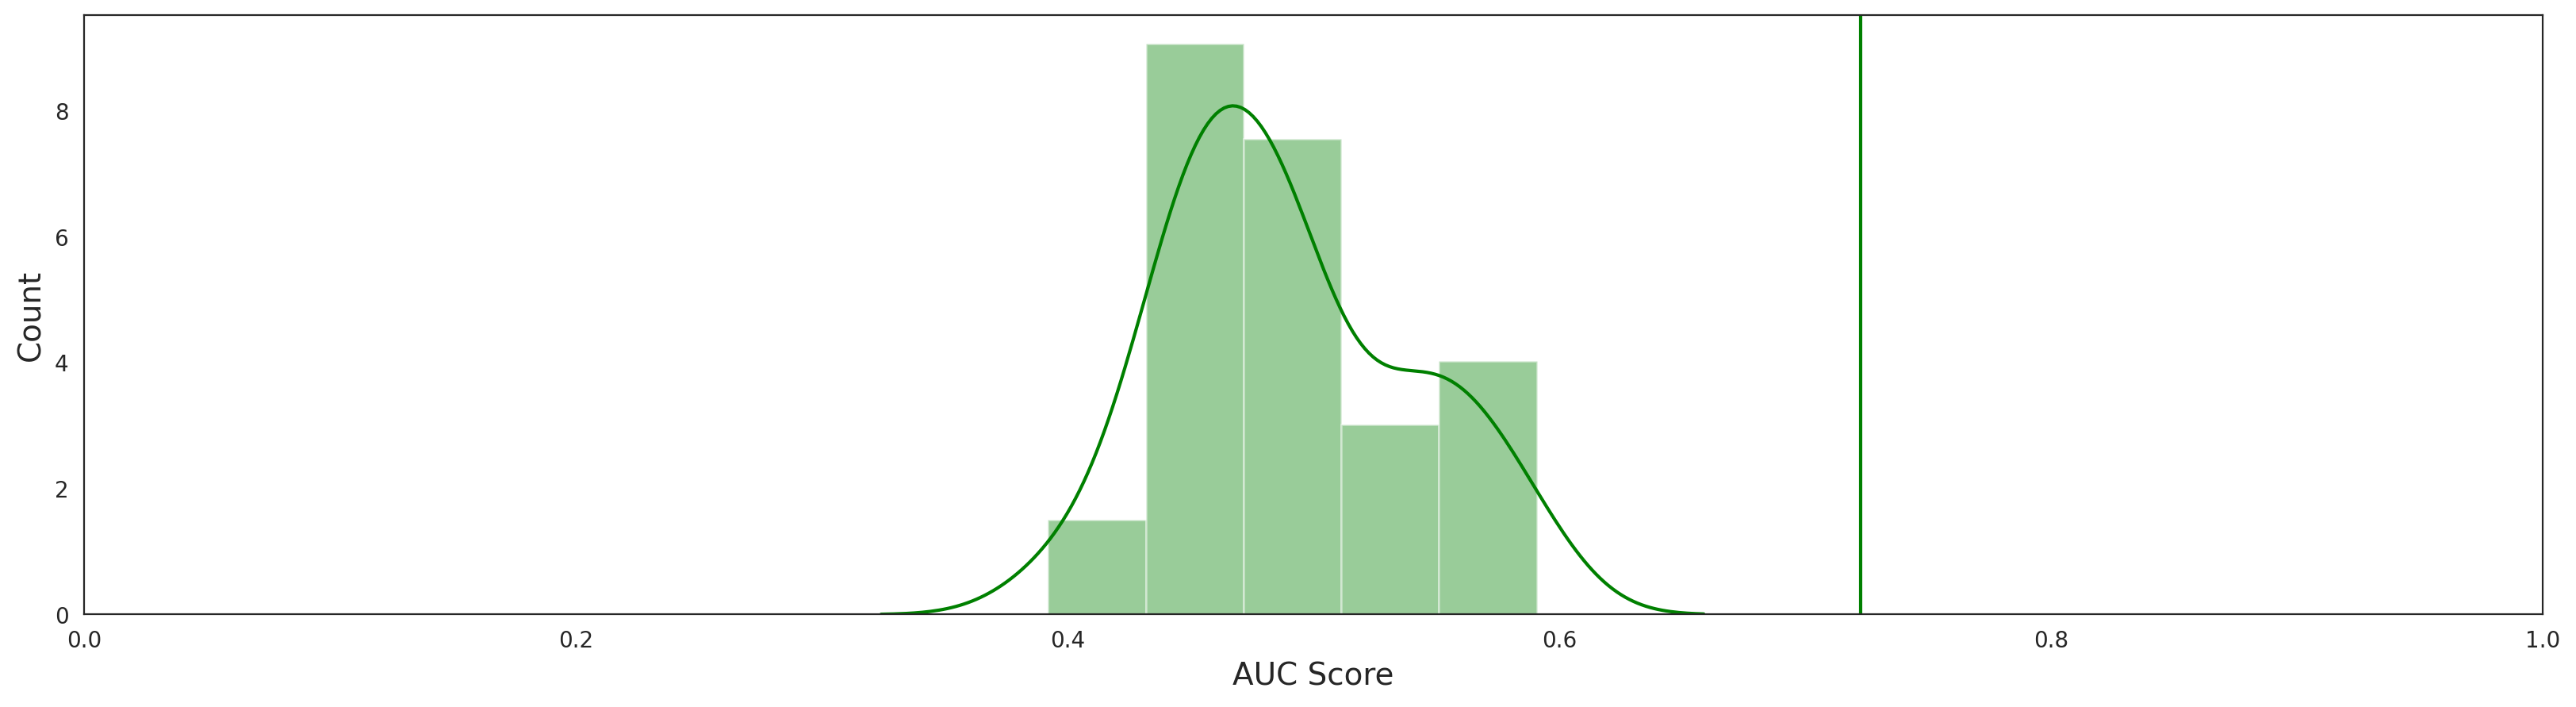

In [30]:
r_auc_score2 = roc_auc_score(Y_v_test_data, scrmb_predictions)
sns.set_style("white")
plt.figure(figsize = (20, 5), dpi=200) 
ax = sns.distplot(accuracy_list, color="green")
plt.axvline(r_auc_score, color="green")
plt.xlabel("AUC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))

/home/acdsd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

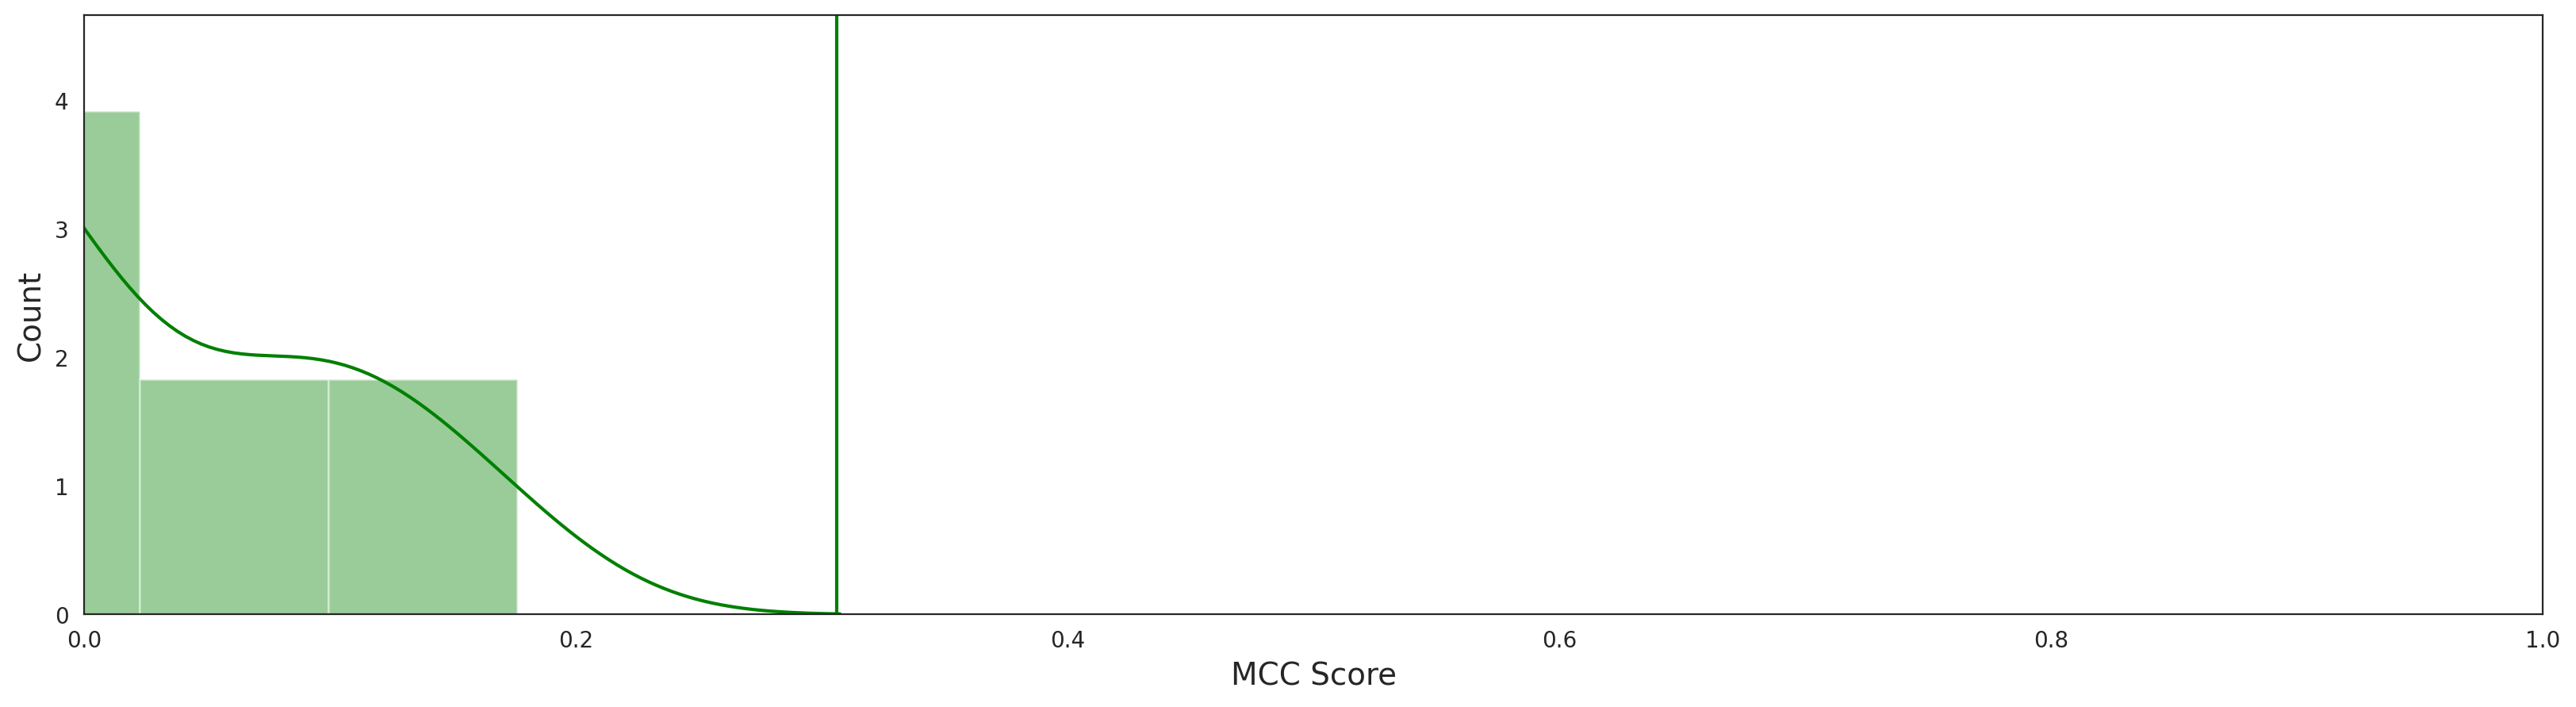

In [31]:
mcc2 = matthews_corrcoef(Y_v_test_data, scrmb_predictions)
sns.set_style("white")
plt.figure(figsize = (20, 5), dpi=200) 
ax = sns.distplot(mcc_list, color="green")
plt.axvline(mcc, color="green")
plt.xlabel("MCC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))

In [2]:
accuracy_list = [0.5498102466793169, 0.5321564109514774, 0.5590437788018433, 0.4577121171049065, 0.4538323393873678, 0.47736513960422877, 0.5022533206831119, 0.5603991596638656, 0.5787137435619408, 0.4654377880184331, 0.4331797235023041, 0.47972011385199237, 0.44376863648685283, 0.40427622661968005, 0.5632454594741122, 0.5904716725399838, 0.46392992680943346, 0.4930028462998103, 0.44913933315261584, 0.4906478720520467, 0.49417186229330445, 0.5519957983193278, 0.4330103008945513, 0.45855923014367034, 0.5284629981024667, 0.44207441040932505, 0.5908105177554893, 0.48576850094876667, 0.4921726755218216, 0.4661154784494443, 0.43284087828679857, 0.5380353754404987, 0.44729262672811054, 0.5735124695039305, 0.49552724315532665, 0.4839217945242613, 0.5410680401192736, 0.5378828950935213, 0.4454459203036053, 0.45972824613716456, 0.4518331526158851, 0.42309907834101385, 0.49888181078883165, 0.5093013011656276, 0.45921997831390615, 0.4802283816752507, 0.39201002981837896, 0.45921997831390615, 0.47367172675521824, 0.4844300623475196]
def Average(lst):
    return sum(lst) / len(lst)
#print(mcc_list)
average = Average(accuracy_list)
  
# Printing average of the list
print("Average of the list =", round(average, 3))

Average of the list = 0.49


In [3]:
mcc_list =[0.09505940556320217, 0.06305413224869451, 0.11598438553776859, -0.08249438005442779, -0.0970759288791357, -0.045904055605202554, 0.004291180902666482, 0.11479399999931778, 0.15055920733743033, -0.06868594674449138, -0.12914580413561486, -0.040649401166612684, -0.10808676034619971, -0.1844897236285306, 0.12401531911716365, 0.17591852549633855, -0.07036479773071985, -0.013627524809688823, -0.10009304132149918, -0.018371127924490173, -0.011708363206030416, 0.09901980594198069, -0.13005482444085356, -0.07917482712955283, 0.05509164737433931, -0.11776620444040627, 0.17502033958388039, -0.028723064560604614, -0.014835728429544816, -0.06588708820087585, -0.13101270934925952, 0.07543441997462358, -0.10299331591843344, 0.13842686584317865, -0.008608764546976453, -0.032156410951477366, 0.07915098939390411, 0.0716824770827759, -0.10591212309042704, -0.07869338217232925, -0.0930936919770672, -0.1476280331676768, -0.002200579855835758, 0.018271284837944032, -0.08104268324215233, -0.03891025290545954, -0.20731021886115267, -0.08104268324215233, -0.05243140005291833, -0.030585265511968242]
def Average(lst):
    return sum(lst) / len(lst)
#print(mcc_list)
average = Average(mcc_list)
  
# Printing average of the list
print("Average of the mcc list =", round(average, 3))

Average of the mcc list = -0.021


In [ ]:
prediction_ext=cb.predict(data_for_screening)
prediction_ext=pd.DataFrame(prediction_ext)
prediction_ext.to_csv("CB_2048_External_Prediction.csv")